<a href="https://colab.research.google.com/github/ThamirisNeves/Mestrado_EEG/blob/main/ICA_EEG_sem_separacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo de teste apenas de dados de EEG para mistura não linear


#Coleta de dados de EEG para teste com o modelo testado para dados simulados
--> Braindecode

In [ ]:
#ver o eixo que estou aplicando (talvez esteja aplicando em cada canal) -- verificar essa etapa
## comentar no código o que é cada dimensão

In [ ]:
#ver o artigo do dataset --> se existe uma mudança drastica no tempo que o individuo fez o teste da obtenção dos dados do ica
# usar apenas uma janela de cada usuario
#olhar o codigo do gustavo --> separar entre classes

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install moabb braindecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.2.0+cu92 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2

Apenas 1 sujeito: Sujeito que estou pegando aqui é o sujeito 3

In [ ]:
from braindecode import datasets
from braindecode.datasets import MOABBDataset

subject_id = 3
dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[subject_id])

print(dataset.description)

/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:54: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  set_config(key, get_config("MNE_DATA"))


Tensorflow not install, you could not use those pipelines
MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 17.5GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 42.3M/42.3M [00:00<00:00, 5.65GB/s]
SHA256 hash of downloaded file: d4229267ec7624fa8bd3af5cbebac17f415f7c722de6cb676748f8cb3b717d97
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
    subject    session    run
0         3  session_T  run_0
1         3  session_T  run_1
2         3  session_T  run_2
3         3  session_T  run_3
4         3  session_T  run_4
5         3  session_T  run_5
6         3  session_E  run_0
7         3  session_E  run_1
8         3  session_E  run_2
9         3  session_E  run_3
10        3  session_E  run_4
11        3  session_E  run_5


Aqui é um print de apenas 1 dataset dentro de 12 datasets (12 rodadas - 6 rodadas de treino e 6 rodadas de teste)

In [ ]:
dataset.datasets[0].raw.to_data_frame()

time         Fz        FC3        FC1        FCz        FC2  \
0        0.000   6.494141  -0.146484   4.736328   3.857422   2.148437   
1        0.004   3.906250  -2.832031   1.269531   0.341797  -1.855469   
2        0.008   9.912109   6.738281   7.226562   7.666016   3.955078   
3        0.012   7.421875   4.003906   4.638672   6.591797   1.025391   
4        0.016  -5.712891  -4.687500  -5.566406  -4.638672  -9.472656   
...        ...        ...        ...        ...        ...        ...   
96730  386.920 -18.261719  -8.789062 -11.669922 -13.525391 -17.480469   
96731  386.924  -8.056641   4.589844   1.562500  -3.759766  -5.419922   
96732  386.928 -14.160156   5.419922  -3.173828  -4.394531 -10.156250   
96733  386.932 -24.707031 -12.402344 -15.869141 -19.970703 -22.265625   
96734  386.936 -15.771484   5.273437  -4.492188  -7.177734 -12.841797   

             FC4         C5         C3         C1  ...        CP2        CP4  \
0      -2.587891  -1.660156  -1.464844   0.488281  ...  -6.884766  -7.910156   
1      -6.396484  -5.810547  -5.419922  -1.171875  ... -11.718750 -13.378906   
2       2.490234   0.976562   3.515625   5.371094  ...  -4.003906  -4.394531   
3       3.564453   2.685547   6.005859   4.541016  ...  -4.931641  -6.152344   
4      -8.105469  -5.810547  -2.343750  -3.369141  ... -13.525391 -15.380859   
...          ...        ...        ...        ...  ...        ...        ...   
96730 -20.947266  -7.177734  -6.933594  -9.375000  ... -23.876953 -28.955078   
96731 -10.986328   5.126953   4.003906   2.099609  ... -14.501953 -19.970703   
96732 -12.353516  -0.292969   3.271484  -3.417969  ... -16.748047 -22.851562   
96733 -30.810547 -13.037109 -14.355469 -15.673828  ... -27.832031 -33.056641   
96734 -16.552734  -0.195312   1.611328  -3.906250  ... -13.134766 -18.603516   

              P1         Pz         P2        POz       EOG1       EOG2  \
0     -14.062500  -9.423828 -13.525391 -18.066406  -3.417969   8.300781   
1     -16.699219 -13.281250 -19.335937 -23.095703   2.441406  10.253906   
2      -8.837891  -4.980469 -10.742188 -13.867187   9.277344  13.671875   
3      -8.251953  -7.226562 -13.623047 -17.675781  10.742188  13.183594   
4     -14.013672 -14.013672 -21.191406 -23.339844  -5.371094   0.000000   
...          ...        ...        ...        ...        ...        ...   
96730 -11.425781 -18.798828 -20.068359 -14.160156  -1.953125 -46.386719   
96731  -2.880859 -10.009766 -11.083984  -4.882812   0.976562 -45.898438   
96732  -5.957031 -12.207031 -13.232422  -7.373047  -1.464844 -50.781250   
96733 -16.503906 -23.193359 -23.095703 -15.771484 -10.253906 -56.152344   
96734  -0.781250  -6.201172  -7.373047   0.341797   0.976562 -42.480469   

            EOG3  stim  
0       5.859375   0.0  
1       0.976562   0.0  
2       6.347656   0.0  
3       5.859375   0.0  
4      -6.347656   0.0  
...          ...   ...  
96730 -12.207031   0.0  
96731 -12.207031   0.0  
96732 -10.742188   0.0  
96733 -20.507812   0.0  
96734 -13.183594   0.0  

[96735 rows x 27 columns]

Pré processamento básico - código retirado do briandecode

In [ ]:
from braindecode.preprocessing import (
    exponential_moving_standardize, preprocess, Preprocessor, scale)

low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000

preprocessors = [
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
    Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                 factor_new=factor_new, init_block_size=init_block_size)
]

# Transform the data
preprocess(dataset, preprocessors)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.1s finished


Criando janela de eventos: dividindo as bases entre treino e teste em épocas

Cada época representa uma classe diferente

Além disso, retiramos o ínicio e o final dos dados (resíduo)

In [ ]:
from braindecode.preprocessing import create_windows_from_events

offset = -0.5

sfreq = dataset.datasets[0].raw.info['sfreq']
assert all([ds.raw.info['sfreq'] == sfreq for ds in dataset.datasets])
# Calcula quando começa de fato a execução do movimento.
trial_start_offset_samples = int(offset * sfreq)
windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples=trial_start_offset_samples,
    trial_stop_offset_samples=0,
    preload=True,
)
#Divide os dados em treino e teste
splitted = windows_dataset.split('session')
train_set = splitted['session_T']
valid_set = splitted['session_E']


Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


Aqui é um print de apenas 1 dataset de treino contendo 48 épocas e 54000 amostras

In [ ]:
train_set.datasets[0].windows.to_data_frame()

time  condition  epoch            Fz           FC3           FC1  \
0      0.000  left_hand      0 -2.172395e+05 -3.356897e+05 -1.547392e+05   
1      0.004  left_hand      0 -1.529343e+05 -6.590405e+05 -3.300484e+05   
2      0.008  left_hand      0  2.026980e+05 -5.462836e+05 -1.454605e+05   
3      0.012  left_hand      0  6.921749e+05 -1.040104e+05  2.780394e+05   
4      0.016  left_hand      0  1.100599e+06  3.882684e+05  6.894982e+05   
...      ...        ...    ...           ...           ...           ...   
53995  4.480     tongue     47  9.079834e+05  1.338487e+05  1.011638e+04   
53996  4.484     tongue     47 -9.776642e+04 -1.105714e+06 -1.210768e+06   
53997  4.488     tongue     47 -9.766005e+05 -2.316571e+06 -2.270032e+06   
53998  4.492     tongue     47 -1.305530e+06 -2.833930e+06 -2.634024e+06   
53999  4.496     tongue     47 -1.050933e+06 -2.449270e+06 -2.220755e+06   

                FCz           FC2           FC4            C5  ...  \
0     -3.112529e+05 -3.869214e+05 -5.252199e+05  1.608167e+05  ...   
1     -3.148636e+05 -2.367157e+05 -4.124697e+05 -4.897971e+05  ...   
2      1.922104e+04  2.609232e+05  7.129143e+04 -6.622778e+05  ...   
3      5.349607e+05  8.742239e+05  7.048575e+05 -4.638181e+05  ...   
4      9.921974e+05  1.321112e+06  1.227607e+06 -2.271576e+05  ...   
...             ...           ...           ...           ...  ...   
53995  4.074944e+05  3.961406e+05  5.693596e+05 -1.922234e+06  ...   
53996 -7.690979e+05 -7.403438e+05 -4.450069e+05 -2.957881e+06  ...   
53997 -1.826936e+06 -1.716285e+06 -1.362421e+06 -3.356828e+06  ...   
53998 -2.249514e+06 -2.064967e+06 -1.722048e+06 -2.866041e+06  ...   
53999 -1.937537e+06 -1.734052e+06 -1.436316e+06 -1.738576e+06  ...   

                  C6           CP3           CP1           CPz           CP2  \
0     -967733.160677  5.587671e+04  1.446084e+05  9.964704e+03 -3.436497e+04   
1     -698397.082870 -3.438858e+05 -5.726611e+04  8.011425e+03  1.317336e+04   
2     -250207.622783 -2.414329e+05  1.749898e+05  3.633730e+05  3.575497e+05   
3      171284.379850  1.666211e+05  6.070518e+05  8.411805e+05  7.857446e+05   
4      469153.821134  5.102128e+05  8.977367e+05  1.157342e+06  1.060378e+06   
...              ...           ...           ...           ...           ...   
53995  307293.890269 -1.928237e+06 -1.377320e+06 -7.454512e+05 -6.672987e+05   
53996 -366937.347695 -3.037941e+06 -2.540576e+06 -1.934270e+06 -1.756737e+06   
53997 -894082.515216 -3.688483e+06 -3.292166e+06 -2.869893e+06 -2.577402e+06   
53998 -946064.642668 -3.445843e+06 -3.202660e+06 -3.043897e+06 -2.672159e+06   
53999 -534632.052179 -2.394032e+06 -2.344565e+06 -2.418238e+06 -2.032302e+06   

                CP4            P1            Pz            P2           POz  
0     -2.761891e+05 -7.395379e+04  1.600318e+05  4.352465e+04  1.251943e+05  
1     -2.713270e+05 -1.314617e+05  1.612326e+05  5.706226e+04  1.600256e+05  
2      3.304852e+03  2.613704e+05  4.920847e+05  3.557394e+05  5.113740e+05  
3      3.487864e+05  8.148939e+05  9.214595e+05  7.259793e+05  9.566913e+05  
4      5.772407e+05  1.162385e+06  1.183110e+06  9.434586e+05  1.221209e+06  
...             ...           ...           ...           ...           ...  
53995 -4.691225e+05 -1.202646e+06 -1.028297e+06 -7.497613e+05 -8.340843e+05  
53996 -1.408837e+06 -2.167347e+06 -2.007117e+06 -1.697638e+06 -1.670022e+06  
53997 -2.130859e+06 -2.785642e+06 -2.675230e+06 -2.364158e+06 -2.214121e+06  
53998 -2.210349e+06 -2.625823e+06 -2.616217e+06 -2.348009e+06 -2.076728e+06  
53999 -1.620566e+06 -1.743878e+06 -1.867059e+06 -1.671839e+06 -1.316147e+06  

[54000 rows x 25 columns]

Aqui não estou usando a separação entre os dados de treino e teste

In [ ]:
#Lista com os datasets de treino e teste de apenas um sujeito
#Totalizando uma lista de 12 (rodadas) posições de tamanho 96735x23 (96735 dados no tempo, 22 canais + 1 coluna que representa o tempo)
dataset_list_all = []

for data in dataset.datasets:
  df_dataset = data.raw.to_data_frame() #copiando cada dataset (dos 12) no formato dataframe para uma variável
  #df_dataset = data.windows.to_data_frame()
  #df_dataset = df_dataset.join(data.description)
  dataset_list_all.append(df_dataset.copy())
#dataset_list_train[1]

In [ ]:
import numpy as np
np.shape(dataset_list_all)

(12, 96735, 23)

In [ ]:
#Lista com os datasets de treino e teste de apenas um sujeito
#Totalizando uma lista de 12 (rodadas) posições de tamanho 96735x23 (96735 dados no tempo, 22 canais + 1 coluna que representa o tempo)
dataset_list = []

for data in train_set.datasets:
  #df_dataset = data.raw.to_data_frame() #copiando cada dataset (dos 12) no formato dataframe para uma variável
  df_dataset = data.windows.to_data_frame()
  #df_dataset = df_dataset.join(data.description)
  dataset_list.append(df_dataset.copy())
#dataset_list_train[1]

In [ ]:
type(dataset_list[0])

pandas.core.frame.DataFrame

O dataset_list é uma lista de datasets e contém 6 datasets (de treino), 54000 amostras no tempo e 25 são features onde 22 são canais, o restante são tempo, classe e época.

In [ ]:
# O dataset_list é uma lista de datasets e contém 6 datasets (de treino)
# 54000 amostras no tempo
# 25 features onde 22 são canais
import numpy as np
np.shape(dataset_list)

(6, 54000, 25)

In [ ]:
dataset_list[0]

time  condition  epoch            Fz           FC3           FC1  \
0      0.000  left_hand      0 -2.172395e+05 -3.356897e+05 -1.547392e+05   
1      0.004  left_hand      0 -1.529343e+05 -6.590405e+05 -3.300484e+05   
2      0.008  left_hand      0  2.026980e+05 -5.462836e+05 -1.454605e+05   
3      0.012  left_hand      0  6.921749e+05 -1.040104e+05  2.780394e+05   
4      0.016  left_hand      0  1.100599e+06  3.882684e+05  6.894982e+05   
...      ...        ...    ...           ...           ...           ...   
53995  4.480     tongue     47  9.079834e+05  1.338487e+05  1.011638e+04   
53996  4.484     tongue     47 -9.776642e+04 -1.105714e+06 -1.210768e+06   
53997  4.488     tongue     47 -9.766005e+05 -2.316571e+06 -2.270032e+06   
53998  4.492     tongue     47 -1.305530e+06 -2.833930e+06 -2.634024e+06   
53999  4.496     tongue     47 -1.050933e+06 -2.449270e+06 -2.220755e+06   

                FCz           FC2           FC4            C5  ...  \
0     -3.112529e+05 -3.869214e+05 -5.252199e+05  1.608167e+05  ...   
1     -3.148636e+05 -2.367157e+05 -4.124697e+05 -4.897971e+05  ...   
2      1.922104e+04  2.609232e+05  7.129143e+04 -6.622778e+05  ...   
3      5.349607e+05  8.742239e+05  7.048575e+05 -4.638181e+05  ...   
4      9.921974e+05  1.321112e+06  1.227607e+06 -2.271576e+05  ...   
...             ...           ...           ...           ...  ...   
53995  4.074944e+05  3.961406e+05  5.693596e+05 -1.922234e+06  ...   
53996 -7.690979e+05 -7.403438e+05 -4.450069e+05 -2.957881e+06  ...   
53997 -1.826936e+06 -1.716285e+06 -1.362421e+06 -3.356828e+06  ...   
53998 -2.249514e+06 -2.064967e+06 -1.722048e+06 -2.866041e+06  ...   
53999 -1.937537e+06 -1.734052e+06 -1.436316e+06 -1.738576e+06  ...   

                  C6           CP3           CP1           CPz           CP2  \
0     -967733.160677  5.587671e+04  1.446084e+05  9.964704e+03 -3.436497e+04   
1     -698397.082870 -3.438858e+05 -5.726611e+04  8.011425e+03  1.317336e+04   
2     -250207.622783 -2.414329e+05  1.749898e+05  3.633730e+05  3.575497e+05   
3      171284.379850  1.666211e+05  6.070518e+05  8.411805e+05  7.857446e+05   
4      469153.821134  5.102128e+05  8.977367e+05  1.157342e+06  1.060378e+06   
...              ...           ...           ...           ...           ...   
53995  307293.890269 -1.928237e+06 -1.377320e+06 -7.454512e+05 -6.672987e+05   
53996 -366937.347695 -3.037941e+06 -2.540576e+06 -1.934270e+06 -1.756737e+06   
53997 -894082.515216 -3.688483e+06 -3.292166e+06 -2.869893e+06 -2.577402e+06   
53998 -946064.642668 -3.445843e+06 -3.202660e+06 -3.043897e+06 -2.672159e+06   
53999 -534632.052179 -2.394032e+06 -2.344565e+06 -2.418238e+06 -2.032302e+06   

                CP4            P1            Pz            P2           POz  
0     -2.761891e+05 -7.395379e+04  1.600318e+05  4.352465e+04  1.251943e+05  
1     -2.713270e+05 -1.314617e+05  1.612326e+05  5.706226e+04  1.600256e+05  
2      3.304852e+03  2.613704e+05  4.920847e+05  3.557394e+05  5.113740e+05  
3      3.487864e+05  8.148939e+05  9.214595e+05  7.259793e+05  9.566913e+05  
4      5.772407e+05  1.162385e+06  1.183110e+06  9.434586e+05  1.221209e+06  
...             ...           ...           ...           ...           ...  
53995 -4.691225e+05 -1.202646e+06 -1.028297e+06 -7.497613e+05 -8.340843e+05  
53996 -1.408837e+06 -2.167347e+06 -2.007117e+06 -1.697638e+06 -1.670022e+06  
53997 -2.130859e+06 -2.785642e+06 -2.675230e+06 -2.364158e+06 -2.214121e+06  
53998 -2.210349e+06 -2.625823e+06 -2.616217e+06 -2.348009e+06 -2.076728e+06  
53999 -1.620566e+06 -1.743878e+06 -1.867059e+06 -1.671839e+06 -1.316147e+06  

[54000 rows x 25 columns]

Agrupando os dados pela classe e por cada época

In [ ]:
import pandas as pd

sensores = dataset.datasets[0].raw.ch_names

df_todos_train = []
df_transf = pd.DataFrame()

# Number of sample points
N = 1125

for data in dataset_list:
  #print(data)
  #break
  for (mov,ep),df_mov in data.groupby(by=['condition','epoch']):
    df_transf=pd.DataFrame([i for i in range(N)],columns=['indice'])
    #print(df_mov)
    #break
    for sensor in sensores:
      df_transf['condition'] = mov
      df_transf['epoch'] = ep
      #print(df_mov[sensor])
      df_transf[sensor]= df_mov[sensor].to_numpy()
      #print(df_transf[sensor])
      #break
        #print(df_transf)
    #break
    df_todos_train.append(df_transf) #uma lista com os valores das transformadas de fourier de cada sensor normalizado para cada movimento e cada época
np.shape(df_todos_train)


(288, 1125, 25)

In [ ]:
df_todos_train[0]

indice condition  epoch            Fz           FC3           FC1  \
0          0      feet      7 -9.936546e+05 -1.157411e+06 -1.408992e+06   
1          1      feet      7 -1.484678e+06 -1.405366e+06 -1.557160e+06   
2          2      feet      7 -2.002787e+06 -1.608402e+06 -1.764345e+06   
3          3      feet      7 -2.192297e+06 -1.482706e+06 -1.751839e+06   
4          4      feet      7 -1.876770e+06 -9.302544e+05 -1.366510e+06   
...      ...       ...    ...           ...           ...           ...   
1120    1120      feet      7  1.745601e+04 -6.362539e+05 -3.992220e+05   
1121    1121      feet      7  1.233732e+05 -8.006969e+05 -4.180308e+05   
1122    1122      feet      7  1.076110e+05 -9.187229e+05 -4.429474e+05   
1123    1123      feet      7 -1.973300e+05 -1.001158e+06 -6.239118e+05   
1124    1124      feet      7 -7.458038e+05 -1.034935e+06 -9.754044e+05   

               FCz           FC2           FC4             C5  ...  \
0    -1.268319e+06 -1.051894e+06 -5.324841e+05 -343234.624372  ...   
1    -1.627997e+06 -1.459349e+06 -1.046486e+06 -648830.975498  ...   
2    -1.945402e+06 -1.911760e+06 -1.604149e+06 -909553.917446  ...   
3    -1.931094e+06 -2.047000e+06 -1.803803e+06 -806609.027885  ...   
4    -1.509054e+06 -1.689254e+06 -1.468454e+06 -247691.557451  ...   
...            ...           ...           ...            ...  ...   
1120  1.661372e+05  5.576469e+05  6.625819e+05 -396275.190464  ...   
1121  4.596019e+04  4.354423e+05  5.737273e+05 -286535.500249  ...   
1122 -1.682829e+05  1.810889e+05  3.014810e+05 -199794.344992  ...   
1123 -5.225556e+05 -3.090238e+05 -1.986089e+05 -338179.121184  ...   
1124 -9.669415e+05 -9.743183e+05 -8.315379e+05 -716906.145387  ...   

                C6           CP3            CP1           CPz           CP2  \
0     2.497962e+04 -2.804173e+05 -542389.379774 -2.344419e+05 -4.180879e+05   
1    -5.241932e+05 -2.718830e+05 -546839.205542 -4.089650e+05 -7.118646e+05   
2    -1.051838e+06 -2.973447e+05 -646577.522615 -6.339530e+05 -1.010220e+06   
3    -1.149223e+06 -1.577873e+05 -635698.051986 -6.960493e+05 -1.046305e+06   
4    -6.868414e+05  1.909269e+05 -398865.415834 -4.983480e+05 -7.117889e+05   
...            ...           ...            ...           ...           ...   
1120  3.329923e+05  2.893740e+05  927478.730533  1.394133e+06  1.354493e+06   
1121  1.469544e+05  1.066558e+05  751120.113437  1.150195e+06  1.144157e+06   
1122  1.501532e+05 -1.270930e+05  473455.556810  7.476808e+05  7.777288e+05   
1123  1.081605e+05 -4.995566e+05  -60912.983287  1.061518e+05  1.350662e+05   
1124 -2.308275e+05 -1.005094e+06 -859657.454743 -7.411661e+05 -7.669812e+05   

               CP4            P1            Pz            P2           POz  
0    -2.122800e+05 -2.282895e+05 -3.556405e+05 -3.449964e+05 -3.819301e+05  
1    -6.107669e+05 -4.136246e+05 -6.180161e+05 -6.561228e+05 -7.024203e+05  
2    -9.956580e+05 -5.855635e+05 -8.623286e+05 -9.155546e+05 -9.478212e+05  
3    -1.051639e+06 -5.398978e+05 -8.667823e+05 -8.792491e+05 -8.558334e+05  
4    -6.509035e+05 -2.172314e+05 -5.555598e+05 -4.689161e+05 -3.653827e+05  
...            ...           ...           ...           ...           ...  
1120  1.055914e+06  1.165329e+06  1.623951e+06  1.361125e+06  1.112723e+06  
1121  9.632959e+05  8.098055e+05  1.308320e+06  1.060999e+06  6.798626e+05  
1122  7.627269e+05  3.165148e+05  8.082921e+05  6.172814e+05  1.108172e+05  
1123  2.712646e+05 -3.998109e+05  4.329457e+04 -6.605279e+04 -6.478300e+05  
1124 -5.418907e+05 -1.293822e+06 -9.262694e+05 -9.653627e+05 -1.537359e+06  

[1125 rows x 25 columns]

In [ ]:
#Aqui estou separando cada classe das bases de treino em 1 variável
#Estão separadas por classe

left_hand = []
right_hand = []
feet = []
tongue = []
for i in df_todos_train:
  if i['condition'].unique() == 'left_hand':
    #for sensor in sensores:
    left_hand.append(i[sensores].to_numpy().T)
  elif i['condition'].unique() == 'right_hand':
    right_hand.append(i[sensores].to_numpy().T)
  elif i['condition'].unique() == 'feet':
    feet.append(i[sensores].to_numpy().T)
  else:
    tongue.append(i[sensores].to_numpy().T)
print(np.shape(left_hand))
print(np.shape(right_hand))
print(np.shape(feet))
print(np.shape(tongue))

(72, 22, 1125)
(72, 22, 1125)
(72, 22, 1125)
(72, 22, 1125)


# Normalizando os dados  

In [ ]:
#Importando Bibliotecas a serem utilizadas no projeto
import pandas as pd

#Biblioteca para plotar dados(Mais bonito)
import seaborn as sns

#converter os campos de horas
from datetime import datetime
import math
import time
from datetime import datetime

#pacote estatístico retorna desvio padrão sem viés pra variância
import statistics as st

from scipy.fft import fft, fftfreq, fftshift

import sklearn.decomposition as skd
from sklearn.preprocessing import normalize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
sensores = dataset.datasets[0].raw.ch_names

dataset_list_normalized=[]

#for database in df_todos_train:
for database in dataset_list:
  aux = []
  for sensor in sensores:
    #verificar eixo de normalização
    #df_dataset = pd.DataFrame(normalize(database[sensores]),columns = sensores).to_numpy()
    df_dataset = database[sensor].to_numpy()
    aux.append(df_dataset)
    #print(sensores)
    #break
    #print(df_dataset.shape)
    #df_dataset = df_dataset+2
    #df_dataset = df_dataset.to_numpy()
  dataset_list_normalized.append(aux)  # e colocando cada dataframe em uma posição da lista dataset_list_train
dataset_list_normalized = np.array(dataset_list_normalized)

In [ ]:
dataset_list_normalized_all= []

for database in dataset_list_all:
  aux = []
  for sensor in sensores:
    #verificar eixo de normalização
    #df_dataset = pd.DataFrame(normalize(database[sensores]),columns = sensores).to_numpy()
    df_dataset = database[sensor].to_numpy()
    aux.append(df_dataset)
    #print(sensores)
    #break
    #print(df_dataset.shape)
    #df_dataset = df_dataset+2
    #df_dataset = df_dataset.to_numpy()
  dataset_list_normalized_all.append(aux)  # e colocando cada dataframe em uma posição da lista dataset_list_train
dataset_list_normalized_all = np.array(dataset_list_normalized_all)

Dataset_list_normalized é uma lista de arrays contendo 6 'datasets' (de treino), 22 canais e 54000 amostras no tempo.

In [ ]:
#Dataset_list_normalized é uma lista de arrays contendo 6 'datasets' (de treino)
#22 canais e 54000 amostras no tempo
np.shape(dataset_list_normalized)

(6, 22, 54000)

In [ ]:
## verificando se existe algum valor nan ou zero no dataset
import math

cont = 0
for k in dataset_list_normalized:
  for j in k:
    for i in j:
      x = math.isnan(i)
      if x == 'True':
        print('ok')
      if i == 0:
        #print(i)
        cont = cont + 1
print(cont)

0


Aqui é a função que normaliza de uma vez todas as amostras

**Precisa olhar aqui !!!**

In [ ]:
from sklearn.preprocessing import StandardScaler

def normaliza_StandardScaler(x):
  aux1 = []
  for dados in x:
    #colocar um for - 1 canal e 1 potencia
    aux = []
    #if np.shape(x)[1]>np.shape(x)[2]:
      #dados = dados.T
    for c in dados:
      #print(c.shape)
      #x1 = np.array(c).astype(np.float64).T
      x1 = np.array(c).astype(np.float64).reshape(1, -1).T
      #print(x1)
      p = StandardScaler()
      p.fit(x1)
      x1 = np.matrix(p.transform(x1)).T
      #print(x1)
      #print(x1.shape)
      aux.append(x1)
    aux1.append(aux)

  res = np.array(aux1)[:,:,0,:]#.reshape(np.shape(x))[:,:,0,:]
  #print(type(res[0][0][0]))
  #print(res.shape)
  return(res)

In [ ]:
normalized = normaliza_StandardScaler(dataset_list_normalized)

In [ ]:
left_hand = normaliza_StandardScaler(left_hand)
right_hand = normaliza_StandardScaler(right_hand)
feet = normaliza_StandardScaler(feet)
tongue = normaliza_StandardScaler(tongue)

In [ ]:
normalized_all_data = normaliza_StandardScaler(dataset_list_normalized_all)

In [ ]:
#with open('left_hand.npy','wb') as f:
  #np.save(f,np.array(left_hand))

normalized é uma lista de arrays contendo 6 'datasets' (de treino), 22 canais e 54000 amostras no tempo
é a variavel 'dataset_list_normalized' normalizada pela função 'normaliza_StandardScaler'

In [ ]:
#normalized é uma lista de arrays contendo 6 'datasets' (de treino),
#22 canais e 54000 amostras no tempo
#é a variavel 'dataset_list_normalized' normalizada pela função 'normaliza_StandardScaler'
np.shape(normalized)

(6, 22, 54000)

#AMUSE


In [ ]:
def off(X):
    off_ = 0
    for x in X:
        off_ += (np.linalg.norm(x,ord='fro')**2 - np.linalg.norm(np.diag(x))**2)
        #off_ += (np.linalg.norm(x)**2 - np.linalg.norm(np.diag(x))**2)

    return off_/np.max(X)

In [ ]:
def AMUSE(X, tau):
  #----------------Whitening data----------------------------------#
  loss_vec = []
  X_T = X.T
  XC = X_T - np.mean(X_T, axis=0)
  #XC = X - np.mean(X, axis=1)
  #deno = np.std(X, axis=1)

  #XC = XC/deno
  XC = X_T.T

  # Calculate Covariance matrix
  # Note: 'rowvar=True' because each row is considered as a feature
  # Note: 'bias=True' to divide the sum of squared variances by 'n' instead of 'n-1'
  xcov = np.cov(XC, rowvar=True, bias=True)
  xcov = (xcov + xcov.T)/2

  # Calculate Eigenvalues and Eigenvectors
  w, e = linalg.eig(xcov) # .eigh()
  #print('w=',w)
  #print('e=',e)

  # Calculate inverse square root of Eigenvalues
  # Optional: Add '.1e5' to avoid division errors if needed
  # Create a diagonal matrix
  diagw = np.diag(w) # or np.diag(1/((w+.1e-5)**0.5))
  diagw = diagw.real #convert to real and round off

  #Calculate whitening
  #print('conta =',np.diag(1/(w.real**0.5)))
  V = np.dot(e,np.dot(np.diag(1/(w.real**0.5)),e.T))

  Xwhite = np.dot(V,XC)

  #--------------------------------------------------------------#

  #TIME LAG -----------------------------------------------------#
  #matriz branqueada com valores sem lag ajustadas para o mesmo tamanho da matriz com lag
  X_nolag = Xwhite[:,tau:]
  #matriz branqueada com valores com lag ajustadas para o mesmo tamanho da matriz com lag

  X_lag = Xwhite[:,:-tau] if tau != 0 else Xwhite[:,:]

  #Matriz de Covariância da
  #faltou dividir por 2 ######### --> aline
  C_z_tau = (1/2)*(1/(Xwhite.shape[1] - tau))*(np.dot(X_nolag,X_lag.T) + (np.dot(X_lag,X_nolag.T)))
  #loss = (np.sum(np.abs(C_z_tau))-np.trace(np.abs(C_z_tau)))
  #loss_vec.append(loss)
  #print('\nloss_ICA =', loss, '\n')

  #Autovalores e autovetores da matriz de covariância usando time lag
  #print('Cz',C_z_tau)
  w1, e1 = linalg.eig(C_z_tau) # .eigh()
  #print('w1=',w1)
  #print('e1=',e1)

  #As linhas da matriz de separação W são dadas pelos autovetores
  W = e1.T

  #matriz W --> Matriz diagonalizada: faz mais sentido calcular a loss aqui --> aline
  #loss = (np.sum(np.abs(W))-np.trace(np.abs(W)))
  #loss_vec.append(loss)
  #print('\nloss_ICA =', loss, '\n')

  #X_RES é o X resultante da multiplicação do x branqueado e a matriz de separação
  X_RES = np.dot(W,Xwhite)

  cov_X = np.matrix(np.cov(X_RES, rowvar=True, bias=True))
  loss = (np.sum(np.abs(cov_X))-np.trace(np.abs(cov_X)))
  loss_vec.append(loss)
  print('\nloss_ICA =', loss, '\n')
  print('loss_ICA_sobi = ', off(cov_X), '\n')

  J = np.matmul(W,V) #????

  return  W, X_RES, Xwhite, J, cov_X

# Funções de manipulação dos dados de entrada

In [ ]:
#Função que retorna a quantidade de potencias definida por b
#(retorna apenas as potencias ímpares) ---->> afim de que as funções sejam monotônicas
#x são os dados (sinais)
#canais é a quatidade de canais que serão passados
#b é a quantidade de potencias
#a quatidade no final será b*canais, ou um tensor com b posições para cada canal
from scipy.special import factorial

def potencias(x, b):
  X_final = []
  canais = np.shape(x)[0]
  #print(canais)
  for data in x:
    cont=1
    aux = 0
    X_list = []
    while (cont%(b+1))!=0:
      #print(aux)
      #X = (1/factorial(cont+aux))*np.power(data,cont+aux)
      X = np.power(data,cont+aux)
      #print(X)
      #print(cont+aux)
      aux = (cont%(b+1))
      cont = cont+1
      X_list.append(X)
      #print(np.shape(X_list))
    X_list = np.reshape(X_list, (b,np.shape(data)[0]))
    X_final.append(X_list)
  X_final = np.reshape(X_final, (canais,b,np.shape(data)[0]))

  #print(X_final)
  #print(np.shape(X_final))
  return np.array(X_final)

In [ ]:
test_eeg = potencias(dataset_list_normalized[0].T,4)

In [ ]:
#Função que retorna o número de constantes(no começo as constantes dão definidas por 1)
#em uma matriz coluna, correspondente a quantidade de pontecias definida pelo usuario
#e tbm corresponde ao numero de canais inicializados.
#Cada constante multiplica 1 linha de um canal, ou seja,
#c1*g11, c2*g12, c3*g21, c4*22
#retorna um tensor (canais,b,c=1) (compativel com o retorno da função potencias)

def constantes_iniciais(x, b, c):
  const = []
  canais = np.shape(x)[0]
  #print(canais)
  for canal in range(0,canais):
    aux = np.matrix(b*[c]).T
    const.append(aux)
  #print(const)
  return const

In [ ]:
#Função que retorna a multiplicação das constantes pelas potencias geradas
def g_x(potencias, c):
  return np.multiply(c,potencias)

In [ ]:
def soma_potencias(x,c):
  z = g_x(x,c)
  s = []
  for pot in z:
    soma = 0
    for data in pot:
      soma = soma + data
    s.append(soma)
  #print(np.shape(s))
  #print(s)
  return np.matrix(s)


In [ ]:
normalized[0].shape

(22, 54000)

Aqui é o teste com os sinais de EEG: gerando 4 potencias para apenas 1 dataset de treino (22,54000) ---> (22, 4, 54000)


22 canais, 4 potencias, 54000 amostras

In [ ]:
import random
def retira_valores(X_dataset):
  aux3 = []
  cont = 0
  for database in X_dataset:
    #print(database.shape)
    aux2 = []
    for data in database.T:
      aux1 = []
      for d in data:
        if d > 1e-4:
          aux1.append(d)
      #aux1 = np.array(aux1)
      #print('1',np.shape(aux1))
      aux2.append(aux1)
      #print(data.shape)
      #print('2',np.shape(aux2))
    aux3.append(aux2)
  #aux3 = np.array(aux3)

  t = []
  re = []
  for i in aux3:
    for j in i:
      #print(np.shape(j))
      t.append(np.shape(j)[0])

  re = [m-np.min(t) for m in t]

  k = 0
  for i in aux3:
      for j in i:
        #print(np.shape(j))
        for rem in range(0,re[k]):
          j.pop(random.randrange(len(j)))
        k=k+1

  return np.array(aux3)

# Atribuição dos valores com manipulação

In [ ]:
# Função não linear


#definindo os valores da expansão em série de taylor: b = 4
#(pegamos somente potencias impar)
#valores sem atraso
#dados gaussianos gerados aleatoriamente (x,b,c), onde c é o valor da constante
#que será multiplicada por cada valor de potencia
from sklearn.preprocessing import MaxAbsScaler

#standard scale ao inves de maxabsscaler

####### t-SNE -> consegue fazer uma representação das matrizes de covariancia do ICA?
# t-SNE é mais usada para visualização

b = 4
aux = normalized
#aux = retira_valores(dataset_list_normalized)

#x1 = dataset_list_normalized[0].T
x1 = aux[0]
#print(x1.shape)
#print(type(x1))

c1 = constantes_iniciais(x1,b,1)
# COMO A PRINCIPIO AS CONSTANTES SAO IGUAIS A 1, GX = CSI NESSE MOMENTO
gx1 = potencias(x1,b)
gx1_2 = normaliza_StandardScaler(gx1)
#print(type(gx1_2))
z1 = soma_potencias(gx1_2,c1)
print(gx1_2.shape)
#print(z1)
print(z1.shape)
#print(type(z1))

#dados de 1 usuario de 1 base de dados de treino de eeg
c2 = constantes_iniciais(normalized[0],b,1)
gx2 = potencias(normalized[0],b)
z2 = soma_potencias(gx2,c2)
print(gx2.shape)
print(z2.shape)


CC1 = np.zeros(np.shape(z1))
CC2 = np.zeros(np.shape(z2))

(22, 4, 54000)
(22, 54000)
(22, 4, 54000)
(22, 54000)


#Funções auxiliares da função mistura não linear

In [ ]:
def cov_lag(x,tau):
  X_lag = x[:,:-tau] if tau != 0 else x[:,:]
  X_nolag = x[:,tau:]
  #calcula matriz de covariancia de atrasos
  cov = (1/(X_lag.shape[1]))*(np.dot(X_nolag,X_lag.T))
  #cov = np.cov(X_lag, rowvar=True, bias=True)

  return cov

In [ ]:
def normaliza_w(w_matriz, ry):
  aux = []
  aux2 = []
  for i in range(0,np.shape(ry)[0]):
    ey = ry[i,i]
    #print(ey)
    w = np.divide(w_matriz[i,:],ey)
    #print(w.shape)
    aux.append(w)
    #print(aux)
  #print(np.shape(aux))
  W = np.array(aux)
  #print('tamanho',W.shape)
  return W


In [ ]:
# Função que retorna a atualização um vetor com a constantes atualizadas
# para multiplicação pela função gx, e em seguida obter z

def atualiza_constante(c,n_canal):
  aux = []
  k = 0
  s = []
  x = []
  X = []
  #X2 =[]
  for linha in c:
    #Seguindo a restricao imposta para as constantes de g(x)
    # A primeira potencia x^1 não pode ser anulada, portanto, suas constantes
    #são fixas em 1
    soma = 0
    linha[0] = 1
    aux.append(linha)
    for valor in linha:
      #print(valor)
      soma = soma + np.abs(valor)
      #print(soma)
    s.append(soma)
  S = np.array(s)
  #print(S)
  C = np.array(aux)

  for i in range(0,n_canal):
    x.append(np.divide(C[i],S[i]))
  #print(x)


  #Transformando matrix canal x pot em vetor canal*pot
  for linha in x:
    linha[0] = 1
    for valor in linha:
      X.append(valor)
  #X2.append(X)
  X = np.array(X)
  return(X)


In [ ]:
def atualiza_constante2(c,n_canal):
  aux = []
  k = 0
  s = []
  x = []
  X = []
  X2 =[]
  for linha in c:
    #Seguindo a restricao imposta para as constantes de g(x)
    # A primeira potencia x^1 não pode ser anulada, portanto, suas constantes
    #são fixas em 1
    soma = 0
    linha[0] = 1
    aux.append(linha)
    for valor in linha:
      #print(valor)
      soma = soma + np.abs(valor)
      #print(soma)
    s.append(soma)
  S = np.array(s)
  #print(S)
  C = np.array(aux)
  #print(C)

  for i in range(0,n_canal):
    x.append(np.divide(C[i],S[i]))
  #print(x)


  #Transformando matrix canal x pot em vetor canal*pot
  for linha in x:
    linha[0] = 1
    X.append(linha)
    #print(X)
    #X2.append(X)
    #print(X2)
  X = np.array(X)
  return(X)

In [ ]:
vec = [[1,1,1,1],[2,2,2,2], [3,3,3,3],[4,4,4,4]]

In [ ]:
# Função que retorna a multiplicação de gx por c
def multiplica_constante(c, gx):
  i = 0
  X_aux = []
  X = []
  tam = np.shape(gx)
  for j in gx:
    #print(j.shape)
    for k in j:
      aux = c[i]*k
      i = i + 1
      X_aux.append(aux)
  X.append(X_aux)
  X = np.array(X)
  print(np.shape(X))
  X = np.reshape(X,tam)
  return(X)


In [ ]:
atualiza_constante2(vec, 4)[0,0]

1.0

In [ ]:
# Função que retorna a multiplicação de gx por c
def multiplica_constante2(c, gx):
  i = 0
  a = 0
  X_aux = []
  X = []
  tam = np.shape(gx)
  for j in gx:
    i=0
    #print(j.shape)
    for k in j:
      aux = c[a,i]*k
      #print(a,i)
      i = i + 1
      X_aux.append(aux)
    #print(np.shape(X_aux))
    a = a + 1
    X.append(X_aux)
    X_aux = []
  X = np.array(X)
  #print(np.shape(X))
  #X = np.reshape(X,tam)
  return(X)


In [ ]:
gx1[0:4,:,0:10]

array([[[-2.26754248e-01, -1.59578901e-01,  2.11926363e-01,
          7.23249998e-01,  1.14990294e+00,  1.31311023e+00,
          1.14849744e+00,  7.29699628e-01,  2.19199049e-01,
         -2.22830490e-01],
        [-1.16591341e-02, -4.06374465e-03,  9.51820285e-03,
          3.78325246e-01,  1.52048995e+00,  2.26414142e+00,
          1.51492136e+00,  3.88536993e-01,  1.05321248e-02,
         -1.10642976e-02],
        [-5.99483403e-04, -1.03484988e-04,  4.27488983e-04,
          1.97898365e-01,  2.01050854e+00,  3.90396501e+00,
          1.99825151e+00,  2.06881009e-01,  5.06049883e-04,
         -5.49380296e-04],
        [-3.08239314e-05, -2.63528926e-06,  1.91997201e-05,
          1.03518766e-01,  2.65844874e+00,  6.73144471e+00,
          2.63578637e+00,  1.10156182e-01,  2.43147977e-05,
         -2.72786147e-05]],

       [[-3.43242629e-01, -6.74830962e-01, -5.59201489e-01,
         -1.05661211e-01,  3.99158662e-01,  6.43894817e-01,
          4.73314431e-01, -1.13210031e-02, -5.2223

In [ ]:
multiplica_constante2(atualiza_constante2(vec, 4), gx1[0:4,:,0:10])

array([[[-2.26754248e-01, -1.59578901e-01,  2.11926363e-01,
          7.23249998e-01,  1.14990294e+00,  1.31311023e+00,
          1.14849744e+00,  7.29699628e-01,  2.19199049e-01,
         -2.22830490e-01],
        [-2.91478353e-03, -1.01593616e-03,  2.37955071e-03,
          9.45813115e-02,  3.80122487e-01,  5.66035355e-01,
          3.78730340e-01,  9.71342483e-02,  2.63303120e-03,
         -2.76607439e-03],
        [-1.49870851e-04, -2.58712469e-05,  1.06872246e-04,
          4.94745912e-02,  5.02627134e-01,  9.75991252e-01,
          4.99562876e-01,  5.17202521e-02,  1.26512471e-04,
         -1.37345074e-04],
        [-7.70598285e-06, -6.58822316e-07,  4.79993003e-06,
          2.58796916e-02,  6.64612184e-01,  1.68286118e+00,
          6.58946593e-01,  2.75390455e-02,  6.07869942e-06,
         -6.81965367e-06]],

       [[-3.43242629e-01, -6.74830962e-01, -5.59201489e-01,
         -1.05661211e-01,  3.99158662e-01,  6.43894817e-01,
          4.73314431e-01, -1.13210031e-02, -5.2223

In [ ]:
#Função que retorna a soma das gx's para encontra z(x), voltando ao tamanho
# original que seria canais x amostras

def soma_teste(x):
  #z = g_x(x,c)
  s = []
  for i in x:
    soma = 0
    for data in i:
      soma = soma + data
    s.append(soma)
  #print(np.shape(s))
  #print(s)
  return np.matrix(s)

# Função de mistura não linear

In [ ]:
z1.shape

(22, 54000)

In [ ]:
def time_lagged_cov(X, num_lags):

    N = X.shape[0]
    L = X.shape[1] - num_lags
    R = np.empty([N,N])

    center = lambda x: x-x.mean(1)[:,None]

    X0 = center(X[:, 0:(0+L)])

    k = num_lags
    #for k in range(num_lags):
    Xk = center(X[:,k:(k+L)])
    R = (1.0/L)*(X0.dot(Xk.T))
    R = 0.5*(R + R.T)

    #print('\n Time lagged conv: R =', R,  '\n')
    return R

In [ ]:
###### FUNCAO MISTURA_NAO_LINEAR TESTE USANDO CSI AO INVES DE Z(X) #######
# TENTATIVA DE AJUSTAR OS COEFICIENTES QUE MULTIPLICAM CSI PARA ENCONTRAR G(X)
# MATRIZ DE COEFICIENTES (CONSTANTE) DEVE TER TAMANHO CANAIS X B (Nº DE POTENCIAS - POT)

from random import random
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm

# Função não linear
# f=x^3, observacao do sinal x

def mistura_nao_linear(z, gx, pot):
  #Nao Linear
  #z é do tamanho canais x amostras
  mu = 100#0.05
  tau = 4
  C_aux = []
  for i in range(0,np.shape(z)[0]):
    c = np.array(pot*[1])
    C_aux.append(c)
  C = np.array(C_aux)
  #print(C.shape)
  n_samples = np.shape(z)[1]

  for b in tqdm(range(4,n_samples)):

    ############### PARTE LINEAR ####################

    #Calculo das matrizes de covariancia com atrasos
    #tau = 1
    W_matriz_1, y1, X_white_1, J1, m_cov = AMUSE(z,1)
    #print(J1.shape)
    #print(type(W_matriz_1))
    #print(y1.shape)
    #print(X_white_1.shape)
    #print(cov1.shape)

    #Matriz de covariancia
    Ry = (1/(y1.shape[1]))*(np.dot(y1,y1.T))
    #print(Ry.shape)
    #print(Ry[0,0])
    #Normalização dos pesos em W
    W = normaliza_w(W_matriz_1,Ry)

    ### verificar se a multplicação np.dot ou *
    y1 = W*np.matrix(X_white_1)
    #print(np.shape(np.matrix(X_white_1)))

    #J1 = normaliza_w(J1,Ry)
    ################## PARTE NAO LINEAR ##################

    #tau = 0
    cov0 = cov_lag(y1,0)
    #tau = 1
    cov1 = cov_lag(y1,1)
    #tau = 2
    cov2 = cov_lag(y1,2)
    #tau = 3
    cov3 = cov_lag(y1,3)

    Ry = np.concatenate([
        np.expand_dims(cov0,axis=2),
        np.expand_dims(cov1,axis=2),
        np.expand_dims(cov2,axis=2),
        np.expand_dims(cov3,axis=2)], axis=2)

    #Ry = time_lagged_cov(y1, 4)

    loss_ry = 0
    for matriz in range(0,np.shape(Ry)[2]):
      #print(Ry[:][:][matriz])
      loss_ry = loss_ry + (np.sum(np.abs(Ry[:,:,matriz]))-np.trace(np.abs(Ry[:,:,matriz])))
    print('loss_Ry = ', loss_ry, '\n')
    print('loss_sobi = ', off(Ry), '\n')

    S = np.zeros([np.shape(z)[0],pot])
    grad = np.zeros([np.shape(z)[0],pot])

    #SOMATORIA DOS ATRASOS
    for t in range(0,tau):
      #a=t-1
      #PARA CADA MISTURA K
      for k in range(0,np.shape(z)[0]):
        #for p in range(0,pot):
        #PARA CADA AMOSTRA
        for i in range(0,np.shape(z)[0]):
          for j in range(0,np.shape(z)[0]):
            if i != j:
              #S = 2*Ry[i,j,t]
              S[k,:]= S[k,:] + (2*Ry[i,j,t]) * (gx[k,:,b]*J1[i,k]*y1[j,(b-t)]
                                              + gx[k,:,(b-t)]*J1[j,k]*y1[i,b])

        #print('S=', S.shape)
      #grad é fora do for do k -----> aline
      grad = grad + S[:,:]
      #print('grad = ', grad.shape)
      #print((mu*grad).shape)

    #fora do for do t     -----> aline
    C = C - mu*(grad)
    #print('C=',C)

    c = atualiza_constante2(C,np.shape(z)[0])
    #print(c)
    gx_c = multiplica_constante2(c, gx)
    #print(gx_c)

    z = soma_teste(gx_c)
    #break
    #CC[:,b]=[C[0,:].T]

    # Recuperacao de Z
    #z_result = z
    #break
  return y1

 #   CC(:,b)=[C(1,:)'];

In [ ]:
def mistura_nao_linear2(z, gx, pot):
  #Nao Linear
  #z é do tamanho canais x amostras
  mu = 10 #0.05
  tau = 4
  C_aux = []
  for i in range(0,np.shape(z)[0]):
    c = np.array(pot*[1])
    C_aux.append(c)
  C = np.array(C_aux)
  #print(C.shape)
  n_samples = np.shape(z)[1]

  for b in tqdm(range(4,n_samples)):

    ############### PARTE LINEAR ####################

    #Calculo das matrizes de covariancia com atrasos
    #tau = 1
    W_matriz_1, y1, X_white_1, J1, cov1 = AMUSE(z,1)
    #print(J1.shape)
    #print(type(W_matriz_1))
    #print(y1.shape)
    #print(X_white_1.shape)
    #print(cov1.shape)

    #Matriz de covariancia
    Ry = (1/(y1.shape[1]))*(np.dot(y1,y1.T))
    #print(Ry.shape)
    #print(Ry[0,0])
    #Normalização dos pesos em W
    W = normaliza_w(W_matriz_1,Ry)

    y1 = W*np.matrix(X_white_1)
    #print(np.shape(np.matrix(X_white_1)))

    #J1 = normaliza_w(J1,Ry)
    ################## PARTE NAO LINEAR ##################

    #tau = 0
    cov0 = cov_lag(y1,0)
    #tau = 1
    cov1 = cov_lag(y1,1)
    #tau = 2
    cov2 = cov_lag(y1,2)
    #tau = 3
    cov3 = cov_lag(y1,3)

    #Ry = np.concatenate([
    #    np.expand_dims(cov0,axis=2),
    #    np.expand_dims(cov1,axis=2),
    #    np.expand_dims(cov2,axis=2),
    #    np.expand_dims(cov3,axis=2)], axis=2)

    Ry = time_lagged_cov(y1, 4)

    loss_ry = 0
    for matriz in range(0,np.shape(Ry)[2]):
      #print(Ry[:][:][matriz])
      loss_ry = loss_ry + (np.sum(np.abs(Ry[:,:,matriz]))-np.trace(np.abs(Ry[:,:,matriz])))
    print('loss_Ry = ', loss_ry, '\n')
    print('loss_sobi = ', off(Ry), '\n')

    S = np.zeros([np.shape(z)[0],pot])
    grad = np.zeros([np.shape(z)[0],pot])

    #SOMATORIA DOS ATRASOS
    for t in range(0,tau):
      #a=t-1
      #PARA CADA MISTURA K
      for k in range(0,np.shape(z)[0]):
        #for p in range(0,pot):
        #PARA CADA AMOSTRA
        for i in range(0,np.shape(z)[0]):
          for j in range(0,np.shape(z)[0]):
            if i != j:
              #S = 2*Ry[i,j,t]
              S[k,:]= S[k,:] + (2*Ry[i,j,t]) * (gx[k,:,b]*J1[i,k]*y1[j,(b-t)]
                                              + gx[k,:,(b-t)]*J1[j,k]*y1[i,b])

        #print('S=', S.shape)
        grad = grad + S[:,:]
        #print('grad = ', grad.shape)
        #print((mu*grad).shape)

      C = C - mu*(grad)
      #print('C=',C)

      c = atualiza_constante2(C,np.shape(z)[0])
      #print(c)
      gx_c = multiplica_constante2(c, gx)
      #print(gx_c)

      z = soma_teste(gx_c)
      #break
        #CC[:,b]=[C[0,:].T]

        # Recuperacao de Z
      z_result = z
    #break
  return y1

 #   CC(:,b)=[C(1,:)'];

#Testando a função

In [ ]:
#valor absoluto da matriz - para saber se ela está convergindo (principalmente dos elementos da diagonal não principal) - como se fosse uma função loss
#testar tanto para a base para apenas uma época quanto misturando as épocas
#ideia - gustavo - tirar o valor medio de cada época

In [ ]:
y1 = mistura_nao_linear(z1, gx1_2, b)

  0%|          | 0/53996 [00:00<?, ?it/s]


loss_ICA = 6.661338147750939e-12 

loss_ICA_sobi =  20.999999999998597 

loss_Ry =  25.065258731163045 

loss_sobi =  36.94588580665108 



  0%|          | 1/53996 [00:01<22:08:37,  1.48s/it]


loss_ICA = 6.959766096770181e-12 

loss_ICA_sobi =  20.99999999999815 

loss_Ry =  22.405388862449243 

loss_sobi =  41.536054113738345 



  0%|          | 2/53996 [00:02<20:58:27,  1.40s/it]


loss_ICA = 1.2704504115390591e-11 

loss_ICA_sobi =  20.99999999999608 

loss_Ry =  20.861443405411684 

loss_sobi =  41.45955175906569 



  0%|          | 3/53996 [00:03<18:12:13,  1.21s/it]


loss_ICA = 4.941824727211497e-12 

loss_ICA_sobi =  20.999999999998185 

loss_Ry =  19.37295126695721 

loss_sobi =  41.40148919935925 



  0%|          | 4/53996 [00:04<16:18:55,  1.09s/it]


loss_ICA = 9.681144774731365e-12 

loss_ICA_sobi =  20.999999999997062 

loss_Ry =  19.233748086270833 

loss_sobi =  40.66258755705244 



  0%|          | 5/53996 [00:05<15:26:23,  1.03s/it]


loss_ICA = 6.071587677070056e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  18.732096209744686 

loss_sobi =  40.83386397491947 



  0%|          | 6/53996 [00:06<15:10:21,  1.01s/it]


loss_ICA = 4.973799150320701e-12 

loss_ICA_sobi =  20.999999999998764 

loss_Ry =  18.151331163593344 

loss_sobi =  40.71821479287621 



  0%|          | 7/53996 [00:07<14:24:37,  1.04it/s]


loss_ICA = 5.837108574269223e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  17.87481527837892 

loss_sobi =  40.21626510144797 



  0%|          | 8/53996 [00:08<14:05:22,  1.06it/s]


loss_ICA = 5.7980287238024175e-12 

loss_ICA_sobi =  20.999999999998934 

loss_Ry =  18.105453252472913 

loss_sobi =  40.04821059017325 



  0%|          | 9/53996 [00:09<13:59:02,  1.07it/s]


loss_ICA = 8.856915201249649e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  18.142392037948362 

loss_sobi =  39.87860838999614 



  0%|          | 10/53996 [00:10<13:46:47,  1.09it/s]


loss_ICA = 6.508571459562518e-12 

loss_ICA_sobi =  20.999999999997318 

loss_Ry =  17.631447387347507 

loss_sobi =  40.470792244822185 



  0%|          | 11/53996 [00:11<13:52:51,  1.08it/s]


loss_ICA = 4.572342504616245e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  17.56468585016909 

loss_sobi =  40.49116071442529 



  0%|          | 12/53996 [00:12<13:57:47,  1.07it/s]


loss_ICA = 8.72191208145523e-12 

loss_ICA_sobi =  20.999999999995104 

loss_Ry =  18.68652595821097 

loss_sobi =  40.54899537863408 



  0%|          | 13/53996 [00:12<13:14:33,  1.13it/s]


loss_ICA = 5.6417093219351955e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  18.24624582562005 

loss_sobi =  40.668657141760384 



  0%|          | 14/53996 [00:13<13:29:37,  1.11it/s]


loss_ICA = 9.546141654936946e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  17.538156766836558 

loss_sobi =  39.98359486234999 



  0%|          | 15/53996 [00:15<15:52:38,  1.06s/it]


loss_ICA = 7.933209644761519e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  18.252204504078094 

loss_sobi =  39.50859486308751 



  0%|          | 16/53996 [00:16<17:15:32,  1.15s/it]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  18.489054808181532 

loss_sobi =  39.84561517096699 



  0%|          | 17/53996 [00:17<18:00:58,  1.20s/it]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  18.85963146490035 

loss_sobi =  40.56865806476202 



  0%|          | 18/53996 [00:18<17:04:37,  1.14s/it]


loss_ICA = 5.289990667733946e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  17.728953792317217 

loss_sobi =  40.79958435777932 



  0%|          | 19/53996 [00:20<19:23:51,  1.29s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  18.11835810066595 

loss_sobi =  40.0986161872879 



  0%|          | 20/53996 [00:22<21:05:51,  1.41s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  17.803725153212728 

loss_sobi =  39.936792281158354 



  0%|          | 21/53996 [00:23<19:21:33,  1.29s/it]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  17.886816894499884 

loss_sobi =  40.102186338296306 



  0%|          | 22/53996 [00:24<17:29:59,  1.17s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  17.62029965806601 

loss_sobi =  40.13576500102424 



  0%|          | 23/53996 [00:25<17:04:03,  1.14s/it]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  18.093734787594357 

loss_sobi =  40.15948680692611 



  0%|          | 24/53996 [00:25<15:41:17,  1.05s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  18.239374247203056 

loss_sobi =  40.23053068367591 



  0%|          | 25/53996 [00:26<15:28:53,  1.03s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  18.201178752052712 

loss_sobi =  40.22155337961431 



  0%|          | 26/53996 [00:28<16:48:21,  1.12s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  18.777758358016595 

loss_sobi =  40.20099565992412 



  0%|          | 27/53996 [00:29<18:00:44,  1.20s/it]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  19.09122271812152 

loss_sobi =  40.025147382878366 



  0%|          | 28/53996 [00:31<18:27:34,  1.23s/it]


loss_ICA = 4.344968829173013e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  21.13766321264343 

loss_sobi =  39.918156413459755 



  0%|          | 29/53996 [00:31<17:14:12,  1.15s/it]


loss_ICA = 4.135358722123783e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  19.267505561648036 

loss_sobi =  39.94770520607306 



  0%|          | 30/53996 [00:33<17:00:25,  1.13s/it]


loss_ICA = 5.612221798401151e-11 

loss_ICA_sobi =  20.999999999965564 

loss_Ry =  18.598859389013384 

loss_sobi =  39.972435218069734 



  0%|          | 31/53996 [00:33<15:40:45,  1.05s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  19.195006318836764 

loss_sobi =  40.14056295576937 



  0%|          | 32/53996 [00:34<15:33:04,  1.04s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  20.1577798479183 

loss_sobi =  40.51638387512539 



  0%|          | 33/53996 [00:35<14:39:31,  1.02it/s]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  20.030095843057712 

loss_sobi =  40.36034234959078 



  0%|          | 34/53996 [00:36<14:47:44,  1.01it/s]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  20.249083157727057 

loss_sobi =  40.504284903768855 



  0%|          | 35/53996 [00:37<14:32:39,  1.03it/s]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  19.98131527718511 

loss_sobi =  40.566536779035836 



  0%|          | 36/53996 [00:38<14:56:13,  1.00it/s]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  19.702895974861477 

loss_sobi =  40.43505844636148 



  0%|          | 37/53996 [00:39<14:35:48,  1.03it/s]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.999999999998913 

loss_Ry =  19.833252562836392 

loss_sobi =  41.04639043051713 



  0%|          | 38/53996 [00:40<13:50:08,  1.08it/s]


loss_ICA = 4.078515303262975e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  19.40481411699617 

loss_sobi =  40.94003933866852 



  0%|          | 39/53996 [00:41<13:56:30,  1.08it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  19.27680069546422 

loss_sobi =  40.92448788684125 



  0%|          | 40/53996 [00:42<15:59:38,  1.07s/it]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  19.997061989999324 

loss_sobi =  41.56593260712857 



  0%|          | 41/53996 [00:44<17:29:43,  1.17s/it]


loss_ICA = 4.295230837669806e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  20.238505092357137 

loss_sobi =  41.11712057853193 



  0%|          | 42/53996 [00:45<17:24:19,  1.16s/it]


loss_ICA = 6.178169087434071e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  19.362971511732916 

loss_sobi =  41.08455441251308 



  0%|          | 43/53996 [00:46<15:47:55,  1.05s/it]


loss_ICA = 6.52278231427772e-12 

loss_ICA_sobi =  20.99999999999886 

loss_Ry =  19.822852047956694 

loss_sobi =  41.264571573005256 



  0%|          | 44/53996 [00:47<15:03:41,  1.00s/it]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  20.097678924578858 

loss_sobi =  40.7791597130361 



  0%|          | 45/53996 [00:48<14:46:57,  1.01it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  20.485954228073616 

loss_sobi =  40.3425006937216 



  0%|          | 46/53996 [00:48<14:22:44,  1.04it/s]


loss_ICA = 3.8689051962137455e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  20.93610069759489 

loss_sobi =  41.111236082484744 



  0%|          | 47/53996 [00:49<13:48:16,  1.09it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  20.51323121150724 

loss_sobi =  41.52233059549928 



  0%|          | 48/53996 [00:50<13:51:00,  1.08it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  21.092758747305552 

loss_sobi =  41.29275176057113 



  0%|          | 49/53996 [00:51<13:33:52,  1.10it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  20.126800548457936 

loss_sobi =  41.092383454721706 



  0%|          | 50/53996 [00:52<13:30:32,  1.11it/s]


loss_ICA = 3.7836400679225335e-12 

loss_ICA_sobi =  20.99999999999986 

loss_Ry =  19.936822153889317 

loss_sobi =  41.0527691476863 



  0%|          | 51/53996 [00:53<13:07:57,  1.14it/s]


loss_ICA = 3.1512570330960443e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  20.822537455538363 

loss_sobi =  41.18276097958157 



  0%|          | 52/53996 [00:54<12:56:18,  1.16it/s]


loss_ICA = 4.774847184307873e-12 

loss_ICA_sobi =  20.999999999998913 

loss_Ry =  20.29366763142022 

loss_sobi =  40.64489112395673 



  0%|          | 53/53996 [00:55<13:59:28,  1.07it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  20.94300254171909 

loss_sobi =  40.461617284770384 



  0%|          | 54/53996 [00:56<15:50:34,  1.06s/it]


loss_ICA = 4.479971948967432e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  21.42395077751228 

loss_sobi =  41.00868553077758 



  0%|          | 55/53996 [00:57<17:21:56,  1.16s/it]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.999999999998675 

loss_Ry =  20.853339920875392 

loss_sobi =  40.96352942623613 



  0%|          | 56/53996 [00:59<17:52:20,  1.19s/it]


loss_ICA = 4.384048679639818e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  21.909867135537468 

loss_sobi =  41.45350284364842 



  0%|          | 57/53996 [01:00<17:00:57,  1.14s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  20.049179481281556 

loss_sobi =  41.07021937406937 



  0%|          | 58/53996 [01:01<16:02:06,  1.07s/it]


loss_ICA = 4.639844064513454e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  20.578863831954408 

loss_sobi =  41.52020035103375 



  0%|          | 59/53996 [01:02<16:08:46,  1.08s/it]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  19.433646735393832 

loss_sobi =  40.31828068669092 



  0%|          | 60/53996 [01:03<15:34:26,  1.04s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  18.65331757129772 

loss_sobi =  41.109214364337305 



  0%|          | 61/53996 [01:04<15:32:26,  1.04s/it]


loss_ICA = 6.128431095930864e-12 

loss_ICA_sobi =  20.99999999999661 

loss_Ry =  18.76113746431659 

loss_sobi =  40.57658917786745 



  0%|          | 62/53996 [01:05<14:58:57,  1.00s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  19.245312479435018 

loss_sobi =  40.97586819975452 



  0%|          | 63/53996 [01:06<15:11:11,  1.01s/it]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  18.78794418626626 

loss_sobi =  40.994425841984025 



  0%|          | 64/53996 [01:07<15:15:42,  1.02s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  19.366515224883354 

loss_sobi =  40.372140533676244 



  0%|          | 65/53996 [01:08<15:30:36,  1.04s/it]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  19.268547014811666 

loss_sobi =  40.468846812599345 



  0%|          | 66/53996 [01:09<15:08:06,  1.01s/it]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  19.404778547611375 

loss_sobi =  40.38074133571993 



  0%|          | 67/53996 [01:10<16:52:13,  1.13s/it]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.99999999999871 

loss_Ry =  19.608801282588075 

loss_sobi =  40.353641969580295 



  0%|          | 68/53996 [01:11<18:06:12,  1.21s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999998785 

loss_Ry =  19.480962804943545 

loss_sobi =  40.318653866317646 



  0%|          | 69/53996 [01:13<18:24:29,  1.23s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  19.540707298915166 

loss_sobi =  40.29091242044623 



  0%|          | 70/53996 [01:14<16:39:37,  1.11s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  19.57333126852148 

loss_sobi =  40.277711870626675 



  0%|          | 71/53996 [01:15<16:13:59,  1.08s/it]


loss_ICA = 4.1175951537297806e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  19.8164751687175 

loss_sobi =  40.293709681923666 



  0%|          | 72/53996 [01:16<15:19:11,  1.02s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  20.392593144827437 

loss_sobi =  40.35592988032948 



  0%|          | 73/53996 [01:16<14:35:27,  1.03it/s]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  20.02603348932861 

loss_sobi =  40.32254009582537 



  0%|          | 74/53996 [01:17<13:52:52,  1.08it/s]


loss_ICA = 4.412470389070222e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  19.518570795080507 

loss_sobi =  40.27329672859321 



  0%|          | 75/53996 [01:18<13:21:23,  1.12it/s]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999998533 

loss_Ry =  19.630602900156873 

loss_sobi =  40.27438701854757 



  0%|          | 76/53996 [01:19<13:03:41,  1.15it/s]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  20.045826909186964 

loss_sobi =  40.30418883262361 



  0%|          | 77/53996 [01:20<13:14:31,  1.13it/s]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999998323 

loss_Ry =  21.034219393460717 

loss_sobi =  40.46402646897209 



  0%|          | 78/53996 [01:21<13:36:17,  1.10it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  20.74424642087512 

loss_sobi =  40.52205252424135 



  0%|          | 79/53996 [01:22<13:38:22,  1.10it/s]


loss_ICA = 5.24735810358834e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  21.090457441907198 

loss_sobi =  40.56243780468362 



  0%|          | 80/53996 [01:23<13:48:48,  1.08it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  21.292005935400784 

loss_sobi =  40.70603761757599 



  0%|          | 81/53996 [01:24<15:23:42,  1.03s/it]


loss_ICA = 4.700240197053063e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  21.081791872920256 

loss_sobi =  40.93709021751118 



  0%|          | 82/53996 [01:25<17:01:51,  1.14s/it]


loss_ICA = 4.426681243785424e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  20.988614405785476 

loss_sobi =  40.78981621851326 



  0%|          | 83/53996 [01:26<17:25:47,  1.16s/it]


loss_ICA = 9.670486633694964e-12 

loss_ICA_sobi =  20.999999999997762 

loss_Ry =  20.910491167337007 

loss_sobi =  40.788088747286565 



  0%|          | 84/53996 [01:27<16:18:31,  1.09s/it]


loss_ICA = 4.259703700881801e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  20.913248781187836 

loss_sobi =  40.80499407537088 



  0%|          | 85/53996 [01:28<16:20:51,  1.09s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999998835 

loss_Ry =  20.90397930077985 

loss_sobi =  40.9594763840382 



  0%|          | 86/53996 [01:29<14:54:26,  1.00it/s]


loss_ICA = 4.483524662646232e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  20.85008534599984 

loss_sobi =  40.77684053014911 



  0%|          | 87/53996 [01:30<15:04:35,  1.01s/it]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.999999999998774 

loss_Ry =  21.040619913686108 

loss_sobi =  40.346105590397705 



  0%|          | 88/53996 [01:31<15:27:38,  1.03s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  21.18320189971783 

loss_sobi =  40.34120001678002 



  0%|          | 89/53996 [01:32<15:18:45,  1.02s/it]


loss_ICA = 4.106937012693379e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  21.244614994420175 

loss_sobi =  40.3557568776371 



  0%|          | 90/53996 [01:33<15:19:09,  1.02s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  21.293627660433295 

loss_sobi =  40.35018720319808 



  0%|          | 91/53996 [01:34<15:10:37,  1.01s/it]


loss_ICA = 4.0110137433657655e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  21.317873581108223 

loss_sobi =  40.33060085120695 



  0%|          | 92/53996 [01:36<15:52:31,  1.06s/it]


loss_ICA = 3.8831160509289475e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  21.301803945490605 

loss_sobi =  40.34343138742171 



  0%|          | 93/53996 [01:36<14:42:01,  1.02it/s]


loss_ICA = 3.907985046680551e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  21.275052097979092 

loss_sobi =  40.37187358265021 



  0%|          | 94/53996 [01:37<15:22:33,  1.03s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  21.155861549581463 

loss_sobi =  40.40832281280034 



  0%|          | 95/53996 [01:39<17:15:27,  1.15s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  21.182728104049986 

loss_sobi =  40.428104166148465 



  0%|          | 96/53996 [01:40<17:55:18,  1.20s/it]


loss_ICA = 6.128431095930864e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  21.207758123469972 

loss_sobi =  40.43087085615879 



  0%|          | 97/53996 [01:41<18:05:18,  1.21s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  21.318780024116393 

loss_sobi =  40.42825794263381 



  0%|          | 98/53996 [01:42<16:38:20,  1.11s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  21.528790877734217 

loss_sobi =  40.408090421234704 



  0%|          | 99/53996 [01:43<16:03:37,  1.07s/it]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  21.88505509274368 

loss_sobi =  40.47623596524539 



  0%|          | 100/53996 [01:44<15:50:31,  1.06s/it]


loss_ICA = 3.765876499528531e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  21.96924148366763 

loss_sobi =  40.605482400921865 



  0%|          | 101/53996 [01:45<15:25:26,  1.03s/it]


loss_ICA = 4.472866521609831e-12 

loss_ICA_sobi =  20.999999999998607 

loss_Ry =  21.439884433495166 

loss_sobi =  40.62253893798575 



  0%|          | 102/53996 [01:46<14:58:26,  1.00s/it]


loss_ICA = 6.821210263296962e-12 

loss_ICA_sobi =  20.999999999998582 

loss_Ry =  20.88307096894807 

loss_sobi =  40.668123803203954 



  0%|          | 103/53996 [01:47<14:45:31,  1.01it/s]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  20.97307301511227 

loss_sobi =  40.62324835579175 



  0%|          | 104/53996 [01:48<14:33:03,  1.03it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  21.012331703097885 

loss_sobi =  40.54859135595953 



  0%|          | 105/53996 [01:49<14:32:11,  1.03it/s]


loss_ICA = 4.945377440890297e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  21.20633339394456 

loss_sobi =  40.60668752872782 



  0%|          | 106/53996 [01:50<14:09:00,  1.06it/s]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  21.319139574689054 

loss_sobi =  40.593646591274116 



  0%|          | 107/53996 [01:51<13:54:52,  1.08it/s]


loss_ICA = 4.707345624410664e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  21.349906294578922 

loss_sobi =  40.64945239583452 



  0%|          | 108/53996 [01:52<15:49:23,  1.06s/it]


loss_ICA = 5.24735810358834e-12 

loss_ICA_sobi =  20.999999999998867 

loss_Ry =  21.285933624662214 

loss_sobi =  40.64706080771039 



  0%|          | 109/53996 [01:54<17:07:59,  1.14s/it]


loss_ICA = 5.201172825763933e-12 

loss_ICA_sobi =  20.999999999998792 

loss_Ry =  21.243700305153936 

loss_sobi =  40.620237760728486 



  0%|          | 110/53996 [01:55<17:22:23,  1.16s/it]


loss_ICA = 6.330935775622493e-12 

loss_ICA_sobi =  20.999999999998536 

loss_Ry =  21.070739651976115 

loss_sobi =  40.59948813742575 



  0%|          | 111/53996 [01:56<17:47:43,  1.19s/it]


loss_ICA = 6.458833468059311e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  21.171415694430728 

loss_sobi =  40.57609511198718 



  0%|          | 112/53996 [01:57<18:30:28,  1.24s/it]


loss_ICA = 5.051958851254312e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  21.168089249694123 

loss_sobi =  40.54416171202356 



  0%|          | 113/53996 [01:59<18:43:32,  1.25s/it]


loss_ICA = 4.1033842990145786e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  21.21052189482802 

loss_sobi =  40.53306978100284 



  0%|          | 114/53996 [02:00<17:29:17,  1.17s/it]


loss_ICA = 4.231281991451397e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  21.152285011897796 

loss_sobi =  40.552363529228465 



  0%|          | 115/53996 [02:01<16:24:08,  1.10s/it]


loss_ICA = 6.245670647331281e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  21.20959627631957 

loss_sobi =  40.61417551670409 



  0%|          | 116/53996 [02:01<15:00:49,  1.00s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  21.36242398304337 

loss_sobi =  40.66251828344091 



  0%|          | 117/53996 [02:02<15:24:47,  1.03s/it]


loss_ICA = 4.021671884402167e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  21.337083053909254 

loss_sobi =  40.63093310271592 



  0%|          | 118/53996 [02:03<15:03:05,  1.01s/it]


loss_ICA = 8.86046791492845e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  21.453134755409646 

loss_sobi =  40.615666610497215 



  0%|          | 119/53996 [02:04<14:22:07,  1.04it/s]


loss_ICA = 5.4853899200679734e-12 

loss_ICA_sobi =  20.99999999999887 

loss_Ry =  21.407303977303123 

loss_sobi =  41.053420769240134 



  0%|          | 120/53996 [02:05<15:21:00,  1.03s/it]


loss_ICA = 1.0459189070388675e-11 

loss_ICA_sobi =  20.999999999998778 

loss_Ry =  21.41989481830786 

loss_sobi =  41.09690551083982 



  0%|          | 121/53996 [02:07<16:41:58,  1.12s/it]


loss_ICA = 5.8548721426632255e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  20.892728979164666 

loss_sobi =  40.62223564658322 



  0%|          | 122/53996 [02:08<17:37:49,  1.18s/it]


loss_ICA = 5.8051341511600185e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  20.603361876474928 

loss_sobi =  40.60668718967749 



  0%|          | 123/53996 [02:09<16:31:44,  1.10s/it]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999998895 

loss_Ry =  20.442154330591567 

loss_sobi =  40.62438237873926 



  0%|          | 124/53996 [02:10<15:24:30,  1.03s/it]


loss_ICA = 5.5280224842135794e-12 

loss_ICA_sobi =  20.9999999999986 

loss_Ry =  20.52037840328812 

loss_sobi =  40.62018900506526 



  0%|          | 125/53996 [02:11<14:36:24,  1.02it/s]


loss_ICA = 6.370015626089298e-12 

loss_ICA_sobi =  20.99999999999815 

loss_Ry =  20.85393519480539 

loss_sobi =  40.64169742751359 



  0%|          | 126/53996 [02:12<15:16:58,  1.02s/it]


loss_ICA = 4.547473508864641e-12 

loss_ICA_sobi =  20.999999999998817 

loss_Ry =  21.047169768740446 

loss_sobi =  41.040728262013594 



  0%|          | 127/53996 [02:13<14:57:20,  1.00it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  19.63504221024505 

loss_sobi =  40.668052118698256 



  0%|          | 128/53996 [02:14<14:58:46,  1.00s/it]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  19.38354749510686 

loss_sobi =  39.83128235624884 



  0%|          | 129/53996 [02:15<14:34:16,  1.03it/s]


loss_ICA = 5.226041821515537e-12 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  19.38375208004969 

loss_sobi =  39.73176550219504 



  0%|          | 130/53996 [02:16<14:54:10,  1.00it/s]


loss_ICA = 4.764189043271472e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  19.04665458599083 

loss_sobi =  39.67127824372381 



  0%|          | 131/53996 [02:17<15:22:18,  1.03s/it]


loss_ICA = 8.746781077206833e-12 

loss_ICA_sobi =  20.99999999999796 

loss_Ry =  19.042924216324174 

loss_sobi =  39.69177566465308 



  0%|          | 132/53996 [02:18<15:04:32,  1.01s/it]


loss_ICA = 7.435829729729448e-12 

loss_ICA_sobi =  20.99999999999876 

loss_Ry =  19.022278418784104 

loss_sobi =  39.70880948529581 



  0%|          | 133/53996 [02:19<15:24:14,  1.03s/it]


loss_ICA = 8.633094239485217e-12 

loss_ICA_sobi =  20.999999999998675 

loss_Ry =  19.064985207478276 

loss_sobi =  39.72109626232921 



  0%|          | 134/53996 [02:20<16:58:46,  1.13s/it]


loss_ICA = 8.277822871605167e-12 

loss_ICA_sobi =  20.999999999998533 

loss_Ry =  19.246533475092733 

loss_sobi =  39.72539319980186 



  0%|          | 135/53996 [02:22<18:13:29,  1.22s/it]


loss_ICA = 4.444444812179427e-12 

loss_ICA_sobi =  20.99999999999871 

loss_Ry =  19.245837016747036 

loss_sobi =  39.73474928601736 



  0%|          | 136/53996 [02:23<18:04:58,  1.21s/it]


loss_ICA = 7.634781695742276e-12 

loss_ICA_sobi =  20.999999999998497 

loss_Ry =  19.21258018590014 

loss_sobi =  39.748417529585176 



  0%|          | 137/53996 [02:24<16:35:47,  1.11s/it]


loss_ICA = 5.8406612879480235e-12 

loss_ICA_sobi =  20.99999999999885 

loss_Ry =  19.21107617373744 

loss_sobi =  39.76375181004467 



  0%|          | 138/53996 [02:25<15:46:35,  1.05s/it]


loss_ICA = 5.7482907322992105e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  19.2035663742137 

loss_sobi =  39.77713085615722 



  0%|          | 139/53996 [02:26<14:57:22,  1.00it/s]


loss_ICA = 8.956391184256063e-12 

loss_ICA_sobi =  20.999999999998153 

loss_Ry =  19.353387494087855 

loss_sobi =  39.796051348173386 



  0%|          | 140/53996 [02:27<14:43:18,  1.02it/s]


loss_ICA = 7.286615755219827e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  19.47024589382366 

loss_sobi =  39.814784259349096 



  0%|          | 141/53996 [02:27<14:37:56,  1.02it/s]


loss_ICA = 6.007638830851647e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  19.47871758158323 

loss_sobi =  39.82132793446018 



  0%|          | 142/53996 [02:29<14:53:32,  1.00it/s]


loss_ICA = 5.286437954055145e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  19.485777749350852 

loss_sobi =  39.82681953104525 



  0%|          | 143/53996 [02:29<14:48:02,  1.01it/s]


loss_ICA = 4.1389114358025836e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  19.465048359429705 

loss_sobi =  39.83002014759632 



  0%|          | 144/53996 [02:30<14:41:10,  1.02it/s]


loss_ICA = 5.279332526697544e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  19.397461029828698 

loss_sobi =  39.834354645757884 



  0%|          | 145/53996 [02:31<14:02:25,  1.07it/s]


loss_ICA = 5.361044941309956e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  19.366863058639034 

loss_sobi =  39.846051236338944 



  0%|          | 146/53996 [02:32<14:20:05,  1.04it/s]


loss_ICA = 5.7625015870144125e-12 

loss_ICA_sobi =  20.999999999998757 

loss_Ry =  19.518548606668084 

loss_sobi =  39.86161809857882 



  0%|          | 147/53996 [02:34<15:36:06,  1.04s/it]


loss_ICA = 8.277822871605167e-12 

loss_ICA_sobi =  20.999999999998344 

loss_Ry =  19.67051129699354 

loss_sobi =  39.877671625962215 



  0%|          | 148/53996 [02:35<17:23:25,  1.16s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  19.767598135013163 

loss_sobi =  39.89305658740889 



  0%|          | 149/53996 [02:36<18:03:32,  1.21s/it]


loss_ICA = 5.243805389909539e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  19.83908255142316 

loss_sobi =  39.90742574794463 



  0%|          | 150/53996 [02:37<17:35:08,  1.18s/it]


loss_ICA = 4.259703700881801e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  19.873898249318312 

loss_sobi =  39.91476365837061 



  0%|          | 151/53996 [02:38<16:53:35,  1.13s/it]


loss_ICA = 4.849454171562684e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  19.781989960507318 

loss_sobi =  39.89005175268619 



  0%|          | 152/53996 [02:39<16:19:30,  1.09s/it]


loss_ICA = 6.256328788367682e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  20.29097857284295 

loss_sobi =  40.633300479845694 



  0%|          | 153/53996 [02:40<15:16:35,  1.02s/it]


loss_ICA = 4.838796030526282e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  19.647210274399292 

loss_sobi =  39.82757222031771 



  0%|          | 154/53996 [02:41<15:20:38,  1.03s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  20.09376837696093 

loss_sobi =  39.72941794253532 



  0%|          | 155/53996 [02:42<14:42:37,  1.02it/s]


loss_ICA = 8.963496611613664e-12 

loss_ICA_sobi =  20.999999999996994 

loss_Ry =  21.13308652345208 

loss_sobi =  40.85969858706285 



  0%|          | 156/53996 [02:43<15:21:51,  1.03s/it]


loss_ICA = 3.886668764607748e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  21.950886270574152 

loss_sobi =  41.14614953486314 



  0%|          | 157/53996 [02:44<15:19:32,  1.02s/it]


loss_ICA = 7.847944516470307e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  22.105424944105067 

loss_sobi =  41.11628234863555 



  0%|          | 158/53996 [02:45<15:14:37,  1.02s/it]


loss_ICA = 1.1596057447604835e-11 

loss_ICA_sobi =  20.999999999997634 

loss_Ry =  21.524050908144602 

loss_sobi =  40.57309572591244 



  0%|          | 159/53996 [02:46<14:35:24,  1.02it/s]


loss_ICA = 4.177991286269389e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  21.140229222609857 

loss_sobi =  41.47169415309948 



  0%|          | 160/53996 [02:47<15:21:10,  1.03s/it]


loss_ICA = 7.94031507211912e-12 

loss_ICA_sobi =  20.99999999999822 

loss_Ry =  21.073205265576483 

loss_sobi =  41.452830282562545 



  0%|          | 161/53996 [02:49<17:18:20,  1.16s/it]


loss_ICA = 3.815614491031738e-12 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  20.9495486125964 

loss_sobi =  41.854579513582415 



  0%|          | 162/53996 [02:50<18:07:52,  1.21s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  20.84752772454658 

loss_sobi =  41.82527010717235 



  0%|          | 163/53996 [02:51<16:40:20,  1.11s/it]


loss_ICA = 3.630873379734112e-12 

loss_ICA_sobi =  20.999999999998415 

loss_Ry =  20.886159459114346 

loss_sobi =  40.820915441824134 



  0%|          | 164/53996 [02:52<15:28:24,  1.03s/it]


loss_ICA = 7.350564601438236e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  20.951939490789428 

loss_sobi =  40.805515814079016 



  0%|          | 165/53996 [02:53<14:31:36,  1.03it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  21.159839044784366 

loss_sobi =  40.79799200454118 



  0%|          | 166/53996 [02:54<14:18:11,  1.05it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999866 

loss_Ry =  21.38716072405083 

loss_sobi =  41.81407796390347 



  0%|          | 167/53996 [02:55<15:27:12,  1.03s/it]


loss_ICA = 5.254463530945941e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  20.960208320995527 

loss_sobi =  41.27814807570151 



  0%|          | 168/53996 [02:56<15:03:13,  1.01s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  20.95147797440339 

loss_sobi =  41.63107987460527 



  0%|          | 169/53996 [02:57<15:05:53,  1.01s/it]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  20.95033762758523 

loss_sobi =  41.58712426260261 



  0%|          | 170/53996 [02:58<15:02:11,  1.01s/it]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  20.903247390851178 

loss_sobi =  41.13781316368801 



  0%|          | 171/53996 [02:59<14:33:47,  1.03it/s]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  20.903682234873724 

loss_sobi =  40.60213668583678 



  0%|          | 172/53996 [03:00<14:56:52,  1.00it/s]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  20.964371187254297 

loss_sobi =  40.606893108368496 



  0%|          | 173/53996 [03:01<14:59:29,  1.00s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  21.113350085896627 

loss_sobi =  40.611500428579774 



  0%|          | 174/53996 [03:02<16:45:34,  1.12s/it]


loss_ICA = 3.986144747614162e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.27059451552201 

loss_sobi =  40.62202592134019 



  0%|          | 175/53996 [03:04<17:53:05,  1.20s/it]


loss_ICA = 5.4996007747831754e-12 

loss_ICA_sobi =  20.99999999999889 

loss_Ry =  21.426600095939527 

loss_sobi =  41.183114379033704 



  0%|          | 176/53996 [03:05<17:43:44,  1.19s/it]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  21.53174252917575 

loss_sobi =  40.60468466845247 



  0%|          | 177/53996 [03:06<17:09:54,  1.15s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  21.00054061157096 

loss_sobi =  40.10288389812564 



  0%|          | 178/53996 [03:07<17:22:06,  1.16s/it]


loss_ICA = 1.3667289522345527e-11 

loss_ICA_sobi =  20.99999999999652 

loss_Ry =  22.23070214908718 

loss_sobi =  40.473384891733616 



  0%|          | 179/53996 [03:08<15:52:45,  1.06s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.16231460377248 

loss_sobi =  40.534590617102225 



  0%|          | 180/53996 [03:09<15:17:33,  1.02s/it]


loss_ICA = 5.073275133327115e-12 

loss_ICA_sobi =  20.9999999999981 

loss_Ry =  22.558293229131852 

loss_sobi =  41.11599647347456 



  0%|          | 181/53996 [03:10<15:05:26,  1.01s/it]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  21.826094746269646 

loss_sobi =  41.27503114555336 



  0%|          | 182/53996 [03:11<15:22:41,  1.03s/it]


loss_ICA = 5.4996007747831754e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  21.19283021770879 

loss_sobi =  40.55826896933009 



  0%|          | 183/53996 [03:12<14:42:52,  1.02it/s]


loss_ICA = 4.781952611665474e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  20.67832180309059 

loss_sobi =  41.10693166623777 



  0%|          | 184/53996 [03:13<14:12:47,  1.05it/s]


loss_ICA = 4.650502205549856e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  20.425291441507817 

loss_sobi =  41.48172100457312 



  0%|          | 185/53996 [03:13<13:31:18,  1.11it/s]


loss_ICA = 5.7198690228688065e-12 

loss_ICA_sobi =  20.999999999998927 

loss_Ry =  20.23467188536937 

loss_sobi =  41.44284378343665 



  0%|          | 186/53996 [03:14<14:19:39,  1.04it/s]


loss_ICA = 3.2578384434600594e-12 

loss_ICA_sobi =  20.99999999999871 

loss_Ry =  20.15345317230438 

loss_sobi =  41.4373070028558 



  0%|          | 187/53996 [03:16<16:25:07,  1.10s/it]


loss_ICA = 4.618527782440651e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  20.1350303751813 

loss_sobi =  41.441647364282524 



  0%|          | 188/53996 [03:17<17:44:40,  1.19s/it]


loss_ICA = 4.0465408801537706e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  20.120715802207464 

loss_sobi =  41.43959343803913 



  0%|          | 189/53996 [03:18<17:54:19,  1.20s/it]


loss_ICA = 5.087485988042317e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  20.12990866297706 

loss_sobi =  41.43775039279242 



  0%|          | 190/53996 [03:19<16:46:00,  1.12s/it]


loss_ICA = 3.9825920339353615e-12 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  20.176078410580885 

loss_sobi =  41.44699193551639 



  0%|          | 191/53996 [03:20<16:00:45,  1.07s/it]


loss_ICA = 4.309441692385008e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  20.24493565308734 

loss_sobi =  41.462238902353015 



  0%|          | 192/53996 [03:21<14:57:02,  1.00s/it]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  20.299287016403504 

loss_sobi =  41.47508923550042 



  0%|          | 193/53996 [03:22<14:33:18,  1.03it/s]


loss_ICA = 6.266986929404084e-12 

loss_ICA_sobi =  20.99999999999886 

loss_Ry =  20.497011221274576 

loss_sobi =  41.47817548306143 



  0%|          | 194/53996 [03:23<13:55:13,  1.07it/s]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  20.606641914587293 

loss_sobi =  40.98915139140102 



  0%|          | 195/53996 [03:24<13:51:05,  1.08it/s]


loss_ICA = 6.767919558114954e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  20.791962777249974 

loss_sobi =  41.50066787221422 



  0%|          | 196/53996 [03:25<13:32:57,  1.10it/s]


loss_ICA = 3.7765346405649325e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  20.811838432107027 

loss_sobi =  41.51347336235478 



  0%|          | 197/53996 [03:26<14:32:07,  1.03it/s]


loss_ICA = 4.799716180059477e-12 

loss_ICA_sobi =  20.99999999999851 

loss_Ry =  20.83905063482429 

loss_sobi =  41.50999177253933 



  0%|          | 198/53996 [03:27<13:56:10,  1.07it/s]


loss_ICA = 5.567102334680385e-12 

loss_ICA_sobi =  20.999999999998398 

loss_Ry =  20.841709817412486 

loss_sobi =  41.50564051411971 



  0%|          | 199/53996 [03:28<13:25:57,  1.11it/s]


loss_ICA = 5.275779813018744e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  20.830062549327863 

loss_sobi =  41.50552425007538 



  0%|          | 200/53996 [03:28<13:20:05,  1.12it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  20.817789307744825 

loss_sobi =  41.50172482144638 



  0%|          | 201/53996 [03:30<15:23:06,  1.03s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  20.758252917698904 

loss_sobi =  41.48057611569023 



  0%|          | 202/53996 [03:31<16:48:14,  1.12s/it]


loss_ICA = 4.241940132487798e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  20.428952410387097 

loss_sobi =  41.36104613511584 



  0%|          | 203/53996 [03:32<17:37:35,  1.18s/it]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  19.951252215049372 

loss_sobi =  40.12620647958453 



  0%|          | 204/53996 [03:33<16:59:06,  1.14s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  21.321147150514086 

loss_sobi =  40.35403577908777 



  0%|          | 205/53996 [03:34<16:29:41,  1.10s/it]


loss_ICA = 5.488942633746774e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  20.38760664924443 

loss_sobi =  41.27504572584028 



  0%|          | 206/53996 [03:35<15:13:53,  1.02s/it]


loss_ICA = 4.817479748453479e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  20.46053446236674 

loss_sobi =  41.26765921470568 



  0%|          | 207/53996 [03:36<14:58:40,  1.00s/it]


loss_ICA = 6.338041202980094e-12 

loss_ICA_sobi =  20.99999999999876 

loss_Ry =  20.53222201804315 

loss_sobi =  41.267460260501956 



  0%|          | 208/53996 [03:37<14:14:37,  1.05it/s]


loss_ICA = 4.241940132487798e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  20.558870064769245 

loss_sobi =  41.270232361536124 



  0%|          | 209/53996 [03:38<14:02:31,  1.06it/s]


loss_ICA = 5.364597654988756e-12 

loss_ICA_sobi =  20.99999999999868 

loss_Ry =  20.569645597089277 

loss_sobi =  41.27500486387749 



  0%|          | 210/53996 [03:39<13:44:04,  1.09it/s]


loss_ICA = 3.765876499528531e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  20.593805812978815 

loss_sobi =  41.289430526600874 



  0%|          | 211/53996 [03:40<13:29:47,  1.11it/s]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  20.562245810627488 

loss_sobi =  41.30906156613249 



  0%|          | 212/53996 [03:41<13:55:22,  1.07it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  20.49568321971516 

loss_sobi =  41.313886432285436 



  0%|          | 213/53996 [03:42<13:49:59,  1.08it/s]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  20.47996533026386 

loss_sobi =  41.315030547461554 



  0%|          | 214/53996 [03:43<14:54:26,  1.00it/s]


loss_ICA = 5.144329406903125e-12 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  20.422859544058735 

loss_sobi =  41.309367977194974 



  0%|          | 215/53996 [03:44<16:43:24,  1.12s/it]


loss_ICA = 6.298961352513288e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  20.370559855334843 

loss_sobi =  41.305099510641874 



  0%|          | 216/53996 [03:46<17:41:54,  1.18s/it]


loss_ICA = 1.1802114840975264e-11 

loss_ICA_sobi =  20.99999999999773 

loss_Ry =  20.37910005684199 

loss_sobi =  41.31184516877391 



  0%|          | 217/53996 [03:47<17:30:34,  1.17s/it]


loss_ICA = 1.1784351272581262e-11 

loss_ICA_sobi =  20.999999999997872 

loss_Ry =  20.384264832104463 

loss_sobi =  41.31646064687036 



  0%|          | 218/53996 [03:48<17:13:12,  1.15s/it]


loss_ICA = 6.401990049198503e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  20.36393691649964 

loss_sobi =  41.31455026398727 



  0%|          | 219/53996 [03:49<15:56:15,  1.07s/it]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  20.363670841858912 

loss_sobi =  41.31658087097391 



  0%|          | 220/53996 [03:50<15:03:33,  1.01s/it]


loss_ICA = 1.4836132322670892e-11 

loss_ICA_sobi =  20.999999999997748 

loss_Ry =  20.378034433669367 

loss_sobi =  41.321103664171645 



  0%|          | 221/53996 [03:50<14:49:24,  1.01it/s]


loss_ICA = 5.311306949806749e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  20.419218950954615 

loss_sobi =  41.32719593816121 



  0%|          | 222/53996 [03:52<15:04:21,  1.01s/it]


loss_ICA = 1.057287590811029e-11 

loss_ICA_sobi =  20.999999999997666 

loss_Ry =  20.49883246977447 

loss_sobi =  41.327718537232876 



  0%|          | 223/53996 [03:53<15:03:37,  1.01s/it]


loss_ICA = 1.2153833495176514e-11 

loss_ICA_sobi =  20.999999999997787 

loss_Ry =  20.59981186403511 

loss_sobi =  41.324863018669355 



  0%|          | 224/53996 [03:54<15:13:52,  1.02s/it]


loss_ICA = 1.4736656339664478e-11 

loss_ICA_sobi =  20.99999999999741 

loss_Ry =  20.736863665803263 

loss_sobi =  41.33154273992294 



  0%|          | 225/53996 [03:54<14:27:04,  1.03it/s]


loss_ICA = 1.0057732424684218e-11 

loss_ICA_sobi =  20.99999999999848 

loss_Ry =  20.78302679828751 

loss_sobi =  41.32535237103996 



  0%|          | 226/53996 [03:55<13:58:11,  1.07it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  20.842895010763442 

loss_sobi =  41.32410444492854 



  0%|          | 227/53996 [03:56<13:41:56,  1.09it/s]


loss_ICA = 1.7831069953899714e-11 

loss_ICA_sobi =  20.99999999999683 

loss_Ry =  21.000256011905428 

loss_sobi =  41.330100170354434 



  0%|          | 228/53996 [03:58<15:35:40,  1.04s/it]


loss_ICA = 9.251266419596504e-12 

loss_ICA_sobi =  20.99999999999857 

loss_Ry =  20.978348814671627 

loss_sobi =  41.31747526268711 



  0%|          | 229/53996 [03:59<17:11:49,  1.15s/it]


loss_ICA = 5.012879000787507e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  20.953953964749594 

loss_sobi =  41.27939102989764 



  0%|          | 230/53996 [04:00<18:00:15,  1.21s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  20.861050307440657 

loss_sobi =  41.239559797926816 



  0%|          | 231/53996 [04:01<16:21:27,  1.10s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  20.841912464863004 

loss_sobi =  41.21611627604614 



  0%|          | 232/53996 [04:02<15:29:46,  1.04s/it]


loss_ICA = 3.3715252811816754e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  20.832782947537567 

loss_sobi =  41.19625049928683 



  0%|          | 233/53996 [04:03<14:53:04,  1.00it/s]


loss_ICA = 4.384048679639818e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  20.944972671972405 

loss_sobi =  41.13606726140413 



  0%|          | 234/53996 [04:04<14:08:32,  1.06it/s]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  20.826830797672123 

loss_sobi =  41.0775316463764 



  0%|          | 235/53996 [04:05<14:35:13,  1.02it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  20.69562774831077 

loss_sobi =  41.0550890481876 



  0%|          | 236/53996 [04:06<14:13:43,  1.05it/s]


loss_ICA = 3.765876499528531e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  20.680796956722325 

loss_sobi =  40.50319163177867 



  0%|          | 237/53996 [04:07<14:06:11,  1.06it/s]


loss_ICA = 3.6699532302009175e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  20.722154775254545 

loss_sobi =  40.50398625197635 



  0%|          | 238/53996 [04:08<14:37:42,  1.02it/s]


loss_ICA = 5.304201522449148e-12 

loss_ICA_sobi =  20.999999999998934 

loss_Ry =  20.79118321595122 

loss_sobi =  40.560649275214956 



  0%|          | 239/53996 [04:09<14:55:06,  1.00it/s]


loss_ICA = 7.961631354191923e-12 

loss_ICA_sobi =  20.999999999998323 

loss_Ry =  21.100880454486386 

loss_sobi =  40.496947621625985 



  0%|          | 240/53996 [04:10<14:56:45,  1.00s/it]


loss_ICA = 4.61142235508305e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  21.20774100773739 

loss_sobi =  40.52206108662272 



  0%|          | 241/53996 [04:11<15:53:15,  1.06s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  21.054459674094197 

loss_sobi =  40.55373861869544 



  0%|          | 242/53996 [04:12<17:34:47,  1.18s/it]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  20.23408523862124 

loss_sobi =  40.988292882260495 



  0%|          | 243/53996 [04:14<18:21:38,  1.23s/it]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  20.509388463910867 

loss_sobi =  41.18087879716645 



  0%|          | 244/53996 [04:15<18:15:19,  1.22s/it]


loss_ICA = 3.8760106235713465e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  19.789062623424353 

loss_sobi =  41.03516798280248 



  0%|          | 245/53996 [04:16<17:18:51,  1.16s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  19.939956716993326 

loss_sobi =  40.753563218548834 



  0%|          | 246/53996 [04:17<16:17:24,  1.09s/it]


loss_ICA = 4.622080496119452e-12 

loss_ICA_sobi =  20.999999999998504 

loss_Ry =  20.52641839804459 

loss_sobi =  40.30286419916341 



  0%|          | 247/53996 [04:18<15:50:36,  1.06s/it]


loss_ICA = 3.6344260934129125e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  20.748397646956672 

loss_sobi =  40.34958117673995 



  0%|          | 248/53996 [04:19<15:00:15,  1.00s/it]


loss_ICA = 4.366285111245816e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  20.910341648970086 

loss_sobi =  40.39278319678943 



  0%|          | 249/53996 [04:20<15:03:04,  1.01s/it]


loss_ICA = 3.808509063674137e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  21.031499904147477 

loss_sobi =  40.37241634143517 



  0%|          | 250/53996 [04:21<15:25:49,  1.03s/it]


loss_ICA = 4.1033842990145786e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  21.040525187776453 

loss_sobi =  40.37113502370608 



  0%|          | 251/53996 [04:22<14:19:13,  1.04it/s]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  21.046349521202444 

loss_sobi =  40.36735800686648 



  0%|          | 252/53996 [04:22<13:52:06,  1.08it/s]


loss_ICA = 3.822719918389339e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  21.052109846481933 

loss_sobi =  40.36445222355849 



  0%|          | 253/53996 [04:24<14:58:35,  1.00s/it]


loss_ICA = 3.552713678800501e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  21.05451699396245 

loss_sobi =  40.36370718765987 



  0%|          | 254/53996 [04:25<15:31:04,  1.04s/it]


loss_ICA = 3.645084234449314e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  21.046572461016527 

loss_sobi =  40.363331872030535 



  0%|          | 255/53996 [04:26<17:13:17,  1.15s/it]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  21.033277413720256 

loss_sobi =  40.363590362231896 



  0%|          | 256/53996 [04:28<17:59:45,  1.21s/it]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  21.02476914205262 

loss_sobi =  40.36490073950812 



  0%|          | 257/53996 [04:28<16:55:18,  1.13s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  21.024279809877164 

loss_sobi =  40.36679586695209 



  0%|          | 258/53996 [04:29<15:57:13,  1.07s/it]


loss_ICA = 4.277467269275803e-12 

loss_ICA_sobi =  20.999999999998288 

loss_Ry =  21.032494428681478 

loss_sobi =  40.36835712160186 



  0%|          | 259/53996 [04:30<15:33:52,  1.04s/it]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  21.04635203025386 

loss_sobi =  40.36701334610368 



  0%|          | 260/53996 [04:31<15:25:14,  1.03s/it]


loss_ICA = 5.091038701721118e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  21.15050059474228 

loss_sobi =  40.37606327211336 



  0%|          | 261/53996 [04:32<14:50:43,  1.01it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  21.294511706599373 

loss_sobi =  40.39144810746702 



  0%|          | 262/53996 [04:33<15:32:57,  1.04s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  21.337105031203834 

loss_sobi =  40.36221010631903 



  0%|          | 263/53996 [04:34<14:50:27,  1.01it/s]


loss_ICA = 6.831868404333363e-12 

loss_ICA_sobi =  20.999999999998394 

loss_Ry =  20.413088560702654 

loss_sobi =  39.71655127400371 



  0%|          | 264/53996 [04:35<14:02:45,  1.06it/s]


loss_ICA = 4.764189043271472e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  20.241562643332337 

loss_sobi =  39.69690735798105 



  0%|          | 265/53996 [04:36<13:30:36,  1.10it/s]


loss_ICA = 5.780265155408415e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  20.179139958909527 

loss_sobi =  39.68922619164599 



  0%|          | 266/53996 [04:37<13:41:42,  1.09it/s]


loss_ICA = 5.208278253121534e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  19.998952601983362 

loss_sobi =  39.70265089429451 



  0%|          | 267/53996 [04:38<14:03:19,  1.06it/s]


loss_ICA = 9.35784782996052e-12 

loss_ICA_sobi =  20.999999999997765 

loss_Ry =  20.007590504363076 

loss_sobi =  39.72614582138598 



  0%|          | 268/53996 [04:39<15:51:18,  1.06s/it]


loss_ICA = 5.4214410738495644e-12 

loss_ICA_sobi =  20.999999999998355 

loss_Ry =  20.040300048475114 

loss_sobi =  39.70586007421722 



  0%|          | 269/53996 [04:41<17:37:55,  1.18s/it]


loss_ICA = 4.149569576838985e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  20.05804882016488 

loss_sobi =  39.71798372374361 



  1%|          | 270/53996 [04:42<18:06:39,  1.21s/it]


loss_ICA = 5.6630256040079985e-12 

loss_ICA_sobi =  20.999999999998657 

loss_Ry =  20.0612575191981 

loss_sobi =  39.69430591204017 



  1%|          | 271/53996 [04:43<16:34:22,  1.11s/it]


loss_ICA = 4.501288231040235e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  20.025469066227526 

loss_sobi =  39.701171160633066 



  1%|          | 272/53996 [04:44<15:25:47,  1.03s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  19.94494246136321 

loss_sobi =  39.709921635608985 



  1%|          | 273/53996 [04:45<14:46:26,  1.01it/s]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  19.87080846028287 

loss_sobi =  39.70799352156294 



  1%|          | 274/53996 [04:46<14:30:59,  1.03it/s]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  19.954493261786077 

loss_sobi =  39.70394029445955 



  1%|          | 275/53996 [04:47<15:05:28,  1.01s/it]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  19.967220871692536 

loss_sobi =  39.68825342768329 



  1%|          | 276/53996 [04:48<15:01:00,  1.01s/it]


loss_ICA = 3.6557423754857155e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  20.220653523123644 

loss_sobi =  40.10204609279166 



  1%|          | 277/53996 [04:49<14:57:16,  1.00s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  20.335725347701636 

loss_sobi =  39.93975227221656 



  1%|          | 278/53996 [04:49<14:19:43,  1.04it/s]


loss_ICA = 3.75877107217093e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  20.119264977949097 

loss_sobi =  39.84514240373371 



  1%|          | 279/53996 [04:51<14:39:18,  1.02it/s]


loss_ICA = 5.130118552187923e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  19.974538238534898 

loss_sobi =  39.66499719349784 



  1%|          | 280/53996 [04:51<14:26:38,  1.03it/s]


loss_ICA = 4.1744385725905886e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  19.92607104456622 

loss_sobi =  39.657588204473484 



  1%|          | 281/53996 [04:53<15:07:15,  1.01s/it]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  20.296971653972996 

loss_sobi =  40.34996078785496 



  1%|          | 282/53996 [04:54<16:41:56,  1.12s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  20.527309411469805 

loss_sobi =  39.91894317908241 



  1%|          | 283/53996 [04:55<17:51:16,  1.20s/it]


loss_ICA = 8.249401162174763e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  20.800725576658543 

loss_sobi =  39.57282959336428 



  1%|          | 284/53996 [04:56<17:21:07,  1.16s/it]


loss_ICA = 5.030642569181509e-12 

loss_ICA_sobi =  20.999999999998927 

loss_Ry =  20.48560739877552 

loss_sobi =  40.06478635356084 



  1%|          | 285/53996 [04:57<16:09:23,  1.08s/it]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  21.703971668352292 

loss_sobi =  41.287275791011346 



  1%|          | 286/53996 [04:58<15:20:03,  1.03s/it]


loss_ICA = 5.929479129918036e-12 

loss_ICA_sobi =  20.9999999999987 

loss_Ry =  21.412281256911164 

loss_sobi =  41.31311422349845 



  1%|          | 287/53996 [04:59<14:33:03,  1.03it/s]


loss_ICA = 6.895817250551772e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  21.623688416145306 

loss_sobi =  41.34572632682669 



  1%|          | 288/53996 [05:00<14:07:46,  1.06it/s]


loss_ICA = 5.4782844927103724e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  20.915168956793913 

loss_sobi =  41.06506260851716 



  1%|          | 289/53996 [05:01<13:49:20,  1.08it/s]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  19.686620871662964 

loss_sobi =  40.42925044968633 



  1%|          | 290/53996 [05:02<14:15:02,  1.05it/s]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999998785 

loss_Ry =  19.4749216072056 

loss_sobi =  40.42040254193942 



  1%|          | 291/53996 [05:03<13:54:15,  1.07it/s]


loss_ICA = 6.52633502795652e-12 

loss_ICA_sobi =  20.99999999999824 

loss_Ry =  19.470008352773235 

loss_sobi =  40.294673375871525 



  1%|          | 292/53996 [05:04<13:40:50,  1.09it/s]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  19.436106132452057 

loss_sobi =  40.40997846768843 



  1%|          | 293/53996 [05:05<14:13:35,  1.05it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  19.37565435364158 

loss_sobi =  40.275258455086735 



  1%|          | 294/53996 [05:05<13:46:09,  1.08it/s]


loss_ICA = 3.6486369481281145e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  19.31492717584514 

loss_sobi =  40.384636782159546 



  1%|          | 295/53996 [05:07<14:36:24,  1.02it/s]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  19.24526224630392 

loss_sobi =  40.37533491108733 



  1%|          | 296/53996 [05:08<16:47:10,  1.13s/it]


loss_ICA = 5.4853899200679734e-12 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  19.18114100268438 

loss_sobi =  40.36348966038283 



  1%|          | 297/53996 [05:09<17:40:23,  1.18s/it]


loss_ICA = 3.701927653310122e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  19.11015459211603 

loss_sobi =  40.32645536603756 



  1%|          | 298/53996 [05:10<16:48:43,  1.13s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  19.481218540668948 

loss_sobi =  40.170665200440595 



  1%|          | 299/53996 [05:11<15:40:29,  1.05s/it]


loss_ICA = 3.5278446830488974e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  19.396734825264698 

loss_sobi =  40.19274608975801 



  1%|          | 300/53996 [05:12<14:39:17,  1.02it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  19.236026600749348 

loss_sobi =  40.3481438678416 



  1%|          | 301/53996 [05:13<14:50:03,  1.01it/s]


loss_ICA = 3.780087354243733e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  19.225271428038276 

loss_sobi =  40.349272042734924 



  1%|          | 302/53996 [05:14<14:39:12,  1.02it/s]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  19.223435364882235 

loss_sobi =  40.308556461521455 



  1%|          | 303/53996 [05:15<14:34:54,  1.02it/s]


loss_ICA = 3.3715252811816754e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  19.76761315510589 

loss_sobi =  40.0393743025957 



  1%|          | 304/53996 [05:16<14:25:22,  1.03it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  20.98875290428875 

loss_sobi =  39.84428627951308 



  1%|          | 305/53996 [05:17<14:52:52,  1.00it/s]


loss_ICA = 4.9631410092843e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  20.45654035167508 

loss_sobi =  39.834145515435424 



  1%|          | 306/53996 [05:18<14:18:19,  1.04it/s]


loss_ICA = 6.252776074688882e-12 

loss_ICA_sobi =  20.99999999999874 

loss_Ry =  20.023904193516387 

loss_sobi =  40.05149362519228 



  1%|          | 307/53996 [05:19<13:46:42,  1.08it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  19.80879240460002 

loss_sobi =  40.07765089745952 



  1%|          | 308/53996 [05:20<15:22:54,  1.03s/it]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  20.49738356112804 

loss_sobi =  40.71623235031021 



  1%|          | 309/53996 [05:21<17:20:17,  1.16s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  20.845943995913167 

loss_sobi =  40.27116151528136 



  1%|          | 310/53996 [05:23<18:48:34,  1.26s/it]


loss_ICA = 5.027089855502709e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  20.345271696630533 

loss_sobi =  40.098633387136566 



  1%|          | 311/53996 [05:25<20:03:15,  1.34s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  20.04399783806778 

loss_sobi =  40.098914775071684 



  1%|          | 312/53996 [05:26<20:47:40,  1.39s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  19.854608129863283 

loss_sobi =  40.092600736048205 



  1%|          | 313/53996 [05:27<18:50:36,  1.26s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  21.2195748124762 

loss_sobi =  40.65975499134996 



  1%|          | 314/53996 [05:28<17:15:38,  1.16s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  21.462980389289616 

loss_sobi =  40.93839402898057 



  1%|          | 315/53996 [05:29<16:32:07,  1.11s/it]


loss_ICA = 3.510081114654895e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  20.936657141100973 

loss_sobi =  40.96086453124722 



  1%|          | 316/53996 [05:30<15:44:33,  1.06s/it]


loss_ICA = 3.929301328753354e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  20.702553603880066 

loss_sobi =  40.311726386655124 



  1%|          | 317/53996 [05:31<15:01:20,  1.01s/it]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  20.617045766613646 

loss_sobi =  40.305311601104115 



  1%|          | 318/53996 [05:32<14:48:02,  1.01it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  20.649985731343563 

loss_sobi =  40.29775668261791 



  1%|          | 319/53996 [05:33<14:23:49,  1.04it/s]


loss_ICA = 4.0962788716569776e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  20.68993992489537 

loss_sobi =  40.29193684782535 



  1%|          | 320/53996 [05:33<13:58:07,  1.07it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  20.69947850389711 

loss_sobi =  40.29323423185763 



  1%|          | 321/53996 [05:35<14:40:32,  1.02it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  20.680923366773442 

loss_sobi =  40.29700661363167 



  1%|          | 322/53996 [05:36<15:02:56,  1.01s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  20.665519020141076 

loss_sobi =  40.297747654188136 



  1%|          | 323/53996 [05:37<14:35:51,  1.02it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  20.668049550784545 

loss_sobi =  40.296900993543176 



  1%|          | 324/53996 [05:38<16:19:54,  1.10s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  20.672770301254637 

loss_sobi =  40.296649979014674 



  1%|          | 325/53996 [05:39<17:53:48,  1.20s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  20.664646926703387 

loss_sobi =  40.297686991343234 



  1%|          | 326/53996 [05:41<18:18:04,  1.23s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  20.640993123086357 

loss_sobi =  40.29941990612883 



  1%|          | 327/53996 [05:42<17:03:28,  1.14s/it]


loss_ICA = 4.348521542851813e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  20.628706114320217 

loss_sobi =  40.29940533998048 



  1%|          | 328/53996 [05:43<17:24:57,  1.17s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  20.628851053227258 

loss_sobi =  40.297524650350745 



  1%|          | 329/53996 [05:44<16:26:30,  1.10s/it]


loss_ICA = 5.4640736379951704e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  20.630412865156117 

loss_sobi =  40.29382973741155 



  1%|          | 330/53996 [05:45<15:56:52,  1.07s/it]


loss_ICA = 4.195754854663392e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  20.647788153269012 

loss_sobi =  40.288008878467984 



  1%|          | 331/53996 [05:46<15:59:15,  1.07s/it]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  20.732029617252927 

loss_sobi =  40.27507003834856 



  1%|          | 332/53996 [05:47<15:19:33,  1.03s/it]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  20.76457166461754 

loss_sobi =  40.27265699151058 



  1%|          | 333/53996 [05:48<14:42:15,  1.01it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  20.76066819153315 

loss_sobi =  40.28865443900725 



  1%|          | 334/53996 [05:48<14:06:33,  1.06it/s]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  20.73373393026469 

loss_sobi =  40.28839941386671 



  1%|          | 335/53996 [05:50<14:36:24,  1.02it/s]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  20.65763038288864 

loss_sobi =  40.275637091892065 



  1%|          | 336/53996 [05:50<13:52:29,  1.07it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  20.640485792096836 

loss_sobi =  40.78192644867123 



  1%|          | 337/53996 [05:52<15:24:46,  1.03s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  20.67206654385828 

loss_sobi =  40.77204456755127 



  1%|          | 338/53996 [05:53<16:57:51,  1.14s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  20.697642192757563 

loss_sobi =  40.76502512730605 



  1%|          | 339/53996 [05:54<17:44:20,  1.19s/it]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  20.684841890504032 

loss_sobi =  40.24718748566107 



  1%|          | 340/53996 [05:56<17:43:39,  1.19s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  20.641175284685787 

loss_sobi =  40.25584192495898 



  1%|          | 341/53996 [05:56<16:21:44,  1.10s/it]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  20.60620908129217 

loss_sobi =  40.262616699353366 



  1%|          | 342/53996 [05:57<16:06:51,  1.08s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  20.589703246729638 

loss_sobi =  40.26341497169361 



  1%|          | 343/53996 [05:58<15:44:09,  1.06s/it]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  20.581307292525153 

loss_sobi =  40.262000140965796 



  1%|          | 344/53996 [05:59<15:12:56,  1.02s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  20.596580383341845 

loss_sobi =  40.26048732684657 



  1%|          | 345/53996 [06:00<14:13:04,  1.05it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  20.626977657091338 

loss_sobi =  40.25911391143416 



  1%|          | 346/53996 [06:01<14:02:07,  1.06it/s]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  20.655146373864838 

loss_sobi =  40.25667406066502 



  1%|          | 347/53996 [06:02<13:26:15,  1.11it/s]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  20.678315860954342 

loss_sobi =  40.254180752226326 



  1%|          | 348/53996 [06:03<13:35:23,  1.10it/s]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  20.70316692869913 

loss_sobi =  40.25208524988427 



  1%|          | 349/53996 [06:04<15:02:18,  1.01s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  20.722304612238716 

loss_sobi =  40.24866848476572 



  1%|          | 350/53996 [06:05<16:20:09,  1.10s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  20.743067722547543 

loss_sobi =  40.243773147004596 



  1%|          | 351/53996 [06:07<18:00:31,  1.21s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  20.77363044702401 

loss_sobi =  40.23892442341175 



  1%|          | 352/53996 [06:08<18:39:07,  1.25s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  20.780115922068525 

loss_sobi =  40.236093607811746 



  1%|          | 353/53996 [06:09<17:46:00,  1.19s/it]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  20.759725135462617 

loss_sobi =  40.23613118429493 



  1%|          | 354/53996 [06:10<16:29:35,  1.11s/it]


loss_ICA = 4.444444812179427e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  20.712091828178785 

loss_sobi =  40.23972665973768 



  1%|          | 355/53996 [06:11<15:19:35,  1.03s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  20.657484178078057 

loss_sobi =  40.245150613163716 



  1%|          | 356/53996 [06:12<14:39:43,  1.02it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  20.61884136815833 

loss_sobi =  40.24870559774001 



  1%|          | 357/53996 [06:13<14:24:24,  1.03it/s]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  20.612795482621845 

loss_sobi =  40.249267035761356 



  1%|          | 358/53996 [06:14<13:58:40,  1.07it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  20.627928934144432 

loss_sobi =  40.24816028750348 



  1%|          | 359/53996 [06:15<14:28:59,  1.03it/s]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  20.64708767888627 

loss_sobi =  40.246023402036926 



  1%|          | 360/53996 [06:16<13:48:11,  1.08it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  20.67631303826467 

loss_sobi =  40.24275259583848 



  1%|          | 361/53996 [06:16<13:31:08,  1.10it/s]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  20.70066515585794 

loss_sobi =  40.23914991548103 



  1%|          | 362/53996 [06:17<13:17:59,  1.12it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  20.69631214810169 

loss_sobi =  39.83612614639063 



  1%|          | 363/53996 [06:18<13:03:30,  1.14it/s]


loss_ICA = 3.517186542012496e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  20.661862707034047 

loss_sobi =  39.83809241780952 



  1%|          | 364/53996 [06:19<14:35:17,  1.02it/s]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  20.637202504909734 

loss_sobi =  40.242046052300196 



  1%|          | 365/53996 [06:21<16:30:50,  1.11s/it]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  20.63416057595571 

loss_sobi =  39.83965327720251 



  1%|          | 366/53996 [06:22<17:45:09,  1.19s/it]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  20.633619225440565 

loss_sobi =  40.2440729049035 



  1%|          | 367/53996 [06:23<17:27:51,  1.17s/it]


loss_ICA = 6.327383061943692e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  20.63233467443405 

loss_sobi =  40.24566023811611 



  1%|          | 368/53996 [06:24<16:44:15,  1.12s/it]


loss_ICA = 4.604316927725449e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  20.626137213595182 

loss_sobi =  40.24752871101068 



  1%|          | 369/53996 [06:25<15:41:19,  1.05s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  20.609575214692875 

loss_sobi =  40.25371750634539 



  1%|          | 370/53996 [06:26<15:13:03,  1.02s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  20.573192696496278 

loss_sobi =  40.26581688748782 



  1%|          | 371/53996 [06:27<14:59:00,  1.01s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  20.54552303424733 

loss_sobi =  40.2765737846187 



  1%|          | 372/53996 [06:28<14:52:50,  1.00it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  20.53464561583167 

loss_sobi =  39.881844887980236 



  1%|          | 373/53996 [06:29<14:12:31,  1.05it/s]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  20.497717083968773 

loss_sobi =  40.80899007403644 



  1%|          | 374/53996 [06:30<14:04:26,  1.06it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  20.556995406561335 

loss_sobi =  40.81748362783111 



  1%|          | 375/53996 [06:31<13:47:04,  1.08it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  20.69726371147049 

loss_sobi =  40.81955033041522 



  1%|          | 376/53996 [06:32<13:30:23,  1.10it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  20.74664758672356 

loss_sobi =  39.899637027901925 



  1%|          | 377/53996 [06:33<14:36:04,  1.02it/s]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  20.726832431057478 

loss_sobi =  40.828794062464425 



  1%|          | 378/53996 [06:34<16:45:51,  1.13s/it]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  20.759262789011103 

loss_sobi =  40.82586515231961 



  1%|          | 379/53996 [06:36<17:51:02,  1.20s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  20.805749638227987 

loss_sobi =  40.82216769028044 



  1%|          | 380/53996 [06:37<17:45:59,  1.19s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  20.811845910344914 

loss_sobi =  39.90152003819551 



  1%|          | 381/53996 [06:38<16:35:38,  1.11s/it]


loss_ICA = 4.718003765447065e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  20.805847745453168 

loss_sobi =  40.82453144601626 



  1%|          | 382/53996 [06:39<15:42:19,  1.05s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  20.803155800632855 

loss_sobi =  39.90208992991738 



  1%|          | 383/53996 [06:40<15:37:13,  1.05s/it]


loss_ICA = 4.0749625895841746e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  20.792264986753633 

loss_sobi =  39.90255397871062 



  1%|          | 384/53996 [06:41<14:52:19,  1.00it/s]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  20.724563674158915 

loss_sobi =  39.90397277593108 



  1%|          | 385/53996 [06:41<14:36:32,  1.02it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  20.58620454519957 

loss_sobi =  39.904732945285524 



  1%|          | 386/53996 [06:43<15:02:51,  1.01s/it]


loss_ICA = 3.1512570330960443e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  20.61850572431295 

loss_sobi =  39.903713522887834 



  1%|          | 387/53996 [06:44<14:56:16,  1.00s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  20.658821441548337 

loss_sobi =  39.90362654768628 



  1%|          | 388/53996 [06:44<14:41:49,  1.01it/s]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  20.61136687728898 

loss_sobi =  40.314517855236495 



  1%|          | 389/53996 [06:45<14:20:45,  1.04it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  20.479877020929145 

loss_sobi =  40.340509505057554 



  1%|          | 390/53996 [06:46<14:12:55,  1.05it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  21.14199279116544 

loss_sobi =  40.47946709358387 



  1%|          | 391/53996 [06:48<15:29:03,  1.04s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  20.432961587426853 

loss_sobi =  40.11667282241486 



  1%|          | 392/53996 [06:49<16:51:31,  1.13s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  20.560764059655106 

loss_sobi =  40.617381265939834 



  1%|          | 393/53996 [06:50<17:41:53,  1.19s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  20.357308892009613 

loss_sobi =  40.331477759767935 



  1%|          | 394/53996 [06:51<17:34:26,  1.18s/it]


loss_ICA = 3.936406756110955e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  20.501285032295595 

loss_sobi =  40.329525210384475 



  1%|          | 395/53996 [06:52<16:46:11,  1.13s/it]


loss_ICA = 7.297273896256229e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  20.81301579658168 

loss_sobi =  40.242039889906316 



  1%|          | 396/53996 [06:53<15:15:10,  1.02s/it]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  20.827323680152006 

loss_sobi =  40.263577680647266 



  1%|          | 397/53996 [06:54<14:24:39,  1.03it/s]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  20.79994282447994 

loss_sobi =  40.394769825604946 



  1%|          | 398/53996 [06:55<14:00:05,  1.06it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  20.77656063735359 

loss_sobi =  40.265748064778435 



  1%|          | 399/53996 [06:56<13:28:04,  1.11it/s]


loss_ICA = 7.631228982063476e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  20.781560216955825 

loss_sobi =  40.38888869571033 



  1%|          | 400/53996 [06:57<14:00:45,  1.06it/s]


loss_ICA = 4.0039083160081645e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  20.78831751539074 

loss_sobi =  40.38522128165039 



  1%|          | 401/53996 [06:58<14:32:48,  1.02it/s]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  20.793240173581644 

loss_sobi =  40.38290230015571 



  1%|          | 402/53996 [06:59<14:20:46,  1.04it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  20.796218218766953 

loss_sobi =  40.38239208461724 



  1%|          | 403/53996 [07:00<14:19:01,  1.04it/s]


loss_ICA = 3.701927653310122e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  20.796999716540185 

loss_sobi =  40.38250588351262 



  1%|          | 404/53996 [07:01<14:30:00,  1.03it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  20.81172074928344 

loss_sobi =  40.38213798857701 



  1%|          | 405/53996 [07:02<16:30:28,  1.11s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.99999999999847 

loss_Ry =  20.81643487143389 

loss_sobi =  40.392712943149 



  1%|          | 406/53996 [07:03<17:42:56,  1.19s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999998952 

loss_Ry =  20.78401628560893 

loss_sobi =  40.4160252985995 



  1%|          | 407/53996 [07:05<17:50:20,  1.20s/it]


loss_ICA = 4.813927034774679e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  20.8102315433313 

loss_sobi =  40.428854777641 



  1%|          | 408/53996 [07:06<16:37:32,  1.12s/it]


loss_ICA = 4.320099833421409e-12 

loss_ICA_sobi =  20.999999999998533 

loss_Ry =  20.842237535600905 

loss_sobi =  40.43788995554728 



  1%|          | 409/53996 [07:07<15:53:59,  1.07s/it]


loss_ICA = 9.29034627006331e-12 

loss_ICA_sobi =  20.99999999999854 

loss_Ry =  20.83281227087537 

loss_sobi =  40.45746769036309 



  1%|          | 410/53996 [07:08<15:26:38,  1.04s/it]


loss_ICA = 7.954525926834322e-12 

loss_ICA_sobi =  20.999999999997353 

loss_Ry =  20.917754513506942 

loss_sobi =  40.31028342190487 



  1%|          | 411/53996 [07:08<14:23:35,  1.03it/s]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  20.997873850703172 

loss_sobi =  40.44377805465037 



  1%|          | 412/53996 [07:09<14:08:16,  1.05it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  21.175340349215308 

loss_sobi =  40.34482831530181 



  1%|          | 413/53996 [07:10<14:10:08,  1.05it/s]


loss_ICA = 3.630873379734112e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  21.064209209155692 

loss_sobi =  40.36397742728032 



  1%|          | 414/53996 [07:11<13:41:34,  1.09it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  20.998510670701698 

loss_sobi =  40.523504633729125 



  1%|          | 415/53996 [07:12<13:46:33,  1.08it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  20.97313460291027 

loss_sobi =  40.53525110321921 



  1%|          | 416/53996 [07:13<13:32:46,  1.10it/s]


loss_ICA = 5.165645688975928e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  20.97722030445632 

loss_sobi =  40.5402325562682 



  1%|          | 417/53996 [07:14<14:27:48,  1.03it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  20.989288284120114 

loss_sobi =  40.42210592268582 



  1%|          | 418/53996 [07:15<14:57:27,  1.01s/it]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  20.986020515683876 

loss_sobi =  40.438568275811555 



  1%|          | 419/53996 [07:16<16:37:16,  1.12s/it]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.002066554776096 

loss_sobi =  40.44983297052618 



  1%|          | 420/53996 [07:18<17:30:49,  1.18s/it]


loss_ICA = 4.867217739956686e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  21.006994930566464 

loss_sobi =  40.454863438748376 



  1%|          | 421/53996 [07:19<16:45:33,  1.13s/it]


loss_ICA = 3.659295089164516e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  21.007090577437246 

loss_sobi =  40.45899056012545 



  1%|          | 422/53996 [07:20<16:11:20,  1.09s/it]


loss_ICA = 3.893774191965349e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  21.009952692917604 

loss_sobi =  40.45999524956647 



  1%|          | 423/53996 [07:21<15:14:49,  1.02s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  21.03555409669493 

loss_sobi =  40.453185375055845 



  1%|          | 424/53996 [07:22<15:09:13,  1.02s/it]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  21.06450855495421 

loss_sobi =  40.43279228151107 



  1%|          | 425/53996 [07:23<14:45:30,  1.01it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  21.0608304928042 

loss_sobi =  40.5476880950965 



  1%|          | 426/53996 [07:24<15:24:40,  1.04s/it]


loss_ICA = 4.320099833421409e-12 

loss_ICA_sobi =  20.99999999999803 

loss_Ry =  21.04404690675681 

loss_sobi =  40.55066514094801 



  1%|          | 427/53996 [07:25<14:54:03,  1.00s/it]


loss_ICA = 4.646949491871055e-12 

loss_ICA_sobi =  20.999999999998305 

loss_Ry =  21.048637431823295 

loss_sobi =  40.55427798607727 



  1%|          | 428/53996 [07:26<14:37:54,  1.02it/s]


loss_ICA = 4.757083615913871e-12 

loss_ICA_sobi =  20.999999999998774 

loss_Ry =  21.056763869422856 

loss_sobi =  40.559146679955155 



  1%|          | 429/53996 [07:27<14:37:27,  1.02it/s]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.9999999999987 

loss_Ry =  21.06752809872131 

loss_sobi =  40.56491673830702 



  1%|          | 430/53996 [07:28<14:55:44,  1.00s/it]


loss_ICA = 6.519229600598919e-12 

loss_ICA_sobi =  20.99999999999806 

loss_Ry =  21.072501867201268 

loss_sobi =  40.56917078521665 



  1%|          | 431/53996 [07:29<15:33:46,  1.05s/it]


loss_ICA = 5.424993787528365e-12 

loss_ICA_sobi =  20.999999999998362 

loss_Ry =  21.071185334066712 

loss_sobi =  40.570204876691584 



  1%|          | 432/53996 [07:30<17:12:04,  1.16s/it]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  21.053504318048734 

loss_sobi =  40.56591086237633 



  1%|          | 433/53996 [07:32<18:23:05,  1.24s/it]


loss_ICA = 4.241940132487798e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  21.006960565370925 

loss_sobi =  40.54895358183493 



  1%|          | 434/53996 [07:33<18:09:41,  1.22s/it]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  20.929234377537007 

loss_sobi =  40.39521369989921 



  1%|          | 435/53996 [07:34<16:48:18,  1.13s/it]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  20.872164221536238 

loss_sobi =  40.39681201194735 



  1%|          | 436/53996 [07:35<16:02:20,  1.08s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  20.945738729538526 

loss_sobi =  40.42548769623047 



  1%|          | 437/53996 [07:36<15:02:37,  1.01s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  21.00156690074711 

loss_sobi =  40.577284400735564 



  1%|          | 438/53996 [07:37<15:04:45,  1.01s/it]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  20.99496544118278 

loss_sobi =  40.58980645674194 



  1%|          | 439/53996 [07:38<15:41:58,  1.06s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  20.987061016514062 

loss_sobi =  40.5967977546498 



  1%|          | 440/53996 [07:39<15:10:43,  1.02s/it]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  20.976183348918614 

loss_sobi =  40.59684982699945 



  1%|          | 441/53996 [07:40<14:34:43,  1.02it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  20.96718886270908 

loss_sobi =  40.59481252183172 



  1%|          | 442/53996 [07:40<14:24:35,  1.03it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  20.94524268749015 

loss_sobi =  40.4576541974705 



  1%|          | 443/53996 [07:41<14:30:50,  1.02it/s]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  20.925462879249746 

loss_sobi =  40.5997528370201 



  1%|          | 444/53996 [07:43<15:47:56,  1.06s/it]


loss_ICA = 4.1815439999481896e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  20.93282768156149 

loss_sobi =  40.61183552550371 



  1%|          | 445/53996 [07:44<17:27:06,  1.17s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  20.931131729100187 

loss_sobi =  40.481681985011264 



  1%|          | 446/53996 [07:45<18:16:55,  1.23s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  20.920374898275064 

loss_sobi =  40.625636694806616 



  1%|          | 447/53996 [07:47<18:24:11,  1.24s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  20.912695103304884 

loss_sobi =  40.63037222779448 



  1%|          | 448/53996 [07:48<17:16:47,  1.16s/it]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  20.912260471618303 

loss_sobi =  40.63186664120839 



  1%|          | 449/53996 [07:49<16:28:20,  1.11s/it]


loss_ICA = 3.0588864774472313e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  20.916500085984847 

loss_sobi =  40.6324057823745 



  1%|          | 450/53996 [07:50<16:19:29,  1.10s/it]


loss_ICA = 1.993072373807081e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  20.919927300815456 

loss_sobi =  40.63230597039614 



  1%|          | 451/53996 [07:51<15:04:38,  1.01s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  20.914271501459318 

loss_sobi =  40.62565768753218 



  1%|          | 452/53996 [07:52<15:33:00,  1.05s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  20.901912124274794 

loss_sobi =  40.61037205157885 



  1%|          | 453/53996 [07:53<15:21:06,  1.03s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  20.88891325476192 

loss_sobi =  40.461692934371264 



  1%|          | 454/53996 [07:54<14:40:01,  1.01it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  20.89916980936211 

loss_sobi =  40.461452505491586 



  1%|          | 455/53996 [07:55<14:19:17,  1.04it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  20.92779365887018 

loss_sobi =  40.465469892803576 



  1%|          | 456/53996 [07:56<14:38:56,  1.02it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  20.934562539360762 

loss_sobi =  40.46074654721584 



  1%|          | 457/53996 [07:56<14:23:56,  1.03it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  20.922023076062175 

loss_sobi =  40.58595358056708 



  1%|          | 458/53996 [07:58<16:01:41,  1.08s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  20.897349588551883 

loss_sobi =  40.434084708197524 



  1%|          | 459/53996 [07:59<17:26:58,  1.17s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  20.848532205879366 

loss_sobi =  40.55661830622814 



  1%|          | 460/53996 [08:00<17:58:04,  1.21s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  20.799055269592948 

loss_sobi =  40.406671572107385 



  1%|          | 461/53996 [08:01<17:00:17,  1.14s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  20.790594718553358 

loss_sobi =  40.5425237306998 



  1%|          | 462/53996 [08:02<16:16:33,  1.09s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  20.835432249738258 

loss_sobi =  40.41357698344282 



  1%|          | 463/53996 [08:03<15:28:59,  1.04s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  20.869821010397395 

loss_sobi =  40.57250840343733 



  1%|          | 464/53996 [08:04<14:43:26,  1.01it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  20.859821641976897 

loss_sobi =  40.612122401217476 



  1%|          | 465/53996 [08:05<14:47:45,  1.00it/s]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  21.27276457274256 

loss_sobi =  40.66055716209842 



  1%|          | 466/53996 [08:06<14:35:00,  1.02it/s]


loss_ICA = 3.886668764607748e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  21.238116077093395 

loss_sobi =  40.68237681626268 



  1%|          | 467/53996 [08:07<14:35:21,  1.02it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  21.254890181799365 

loss_sobi =  40.680626778385616 



  1%|          | 468/53996 [08:08<14:16:02,  1.04it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  21.25645093967098 

loss_sobi =  40.676328355428616 



  1%|          | 469/53996 [08:09<13:51:59,  1.07it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  21.256757844831743 

loss_sobi =  40.674625968731796 



  1%|          | 470/53996 [08:10<13:27:42,  1.10it/s]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  21.26189378254368 

loss_sobi =  40.670666895154326 



  1%|          | 471/53996 [08:11<13:40:13,  1.09it/s]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  21.275398856339088 

loss_sobi =  40.663498611105105 



  1%|          | 472/53996 [08:12<15:45:17,  1.06s/it]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  21.28467403898386 

loss_sobi =  40.660206910923954 



  1%|          | 473/53996 [08:14<17:16:34,  1.16s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  21.0676048989276 

loss_sobi =  40.658943012399256 



  1%|          | 474/53996 [08:15<17:36:07,  1.18s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  20.977469800877927 

loss_sobi =  39.37616727933328 



  1%|          | 475/53996 [08:16<16:05:49,  1.08s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.13318446736071 

loss_sobi =  39.85709066886985 



  1%|          | 476/53996 [08:17<15:45:21,  1.06s/it]


loss_ICA = 5.8122395785176195e-12 

loss_ICA_sobi =  20.999999999998423 

loss_Ry =  21.31800296851373 

loss_sobi =  39.82839602992943 



  1%|          | 477/53996 [08:18<15:42:26,  1.06s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  21.09010814049644 

loss_sobi =  40.04772555755039 



  1%|          | 478/53996 [08:19<14:45:12,  1.01it/s]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.361167104500343 

loss_sobi =  40.053110727997534 



  1%|          | 479/53996 [08:20<14:58:22,  1.01s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999983 

loss_Ry =  22.516634734738414 

loss_sobi =  39.895782784119824 



  1%|          | 480/53996 [08:21<14:46:55,  1.01it/s]


loss_ICA = 3.815614491031738e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.47400229196227 

loss_sobi =  39.834797434515984 



  1%|          | 481/53996 [08:21<14:26:59,  1.03it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.504288785465306 

loss_sobi =  39.81879979189053 



  1%|          | 482/53996 [08:22<14:11:47,  1.05it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.571255924213162 

loss_sobi =  40.32867606334862 



  1%|          | 483/53996 [08:23<14:23:11,  1.03it/s]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  22.60346711598733 

loss_sobi =  39.911077820068165 



  1%|          | 484/53996 [08:24<14:40:15,  1.01it/s]


loss_ICA = 4.1815439999481896e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.63238097860283 

loss_sobi =  39.79993129914129 



  1%|          | 485/53996 [08:26<15:42:44,  1.06s/it]


loss_ICA = 7.595701845275471e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  22.62241902530798 

loss_sobi =  39.790168842573586 



  1%|          | 486/53996 [08:27<17:09:17,  1.15s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.60782044959982 

loss_sobi =  39.79596760817789 



  1%|          | 487/53996 [08:28<17:58:06,  1.21s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.60057243845663 

loss_sobi =  39.80032390325751 



  1%|          | 488/53996 [08:30<17:44:37,  1.19s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.597884455533297 

loss_sobi =  39.800702078924736 



  1%|          | 489/53996 [08:30<16:35:02,  1.12s/it]


loss_ICA = 6.721734280290548e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  22.604726611194963 

loss_sobi =  39.79640399320315 



  1%|          | 490/53996 [08:31<16:11:52,  1.09s/it]


loss_ICA = 5.169198402654729e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  22.611799556153525 

loss_sobi =  39.78690538425487 



  1%|          | 491/53996 [08:32<15:39:02,  1.05s/it]


loss_ICA = 3.2578384434600594e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.617697382744254 

loss_sobi =  39.77692075181237 



  1%|          | 492/53996 [08:33<15:22:30,  1.03s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.622614373482065 

loss_sobi =  39.77300963739637 



  1%|          | 493/53996 [08:34<15:27:41,  1.04s/it]


loss_ICA = 7.783995670251898e-12 

loss_ICA_sobi =  20.99999999999885 

loss_Ry =  22.646277689100298 

loss_sobi =  39.78291437099019 



  1%|          | 494/53996 [08:35<14:40:48,  1.01it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.649961584841368 

loss_sobi =  39.80762575905766 



  1%|          | 495/53996 [08:36<14:14:19,  1.04it/s]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.634707168326912 

loss_sobi =  39.823568661351345 



  1%|          | 496/53996 [08:37<14:16:05,  1.04it/s]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.620402523093215 

loss_sobi =  39.80378008042752 



  1%|          | 497/53996 [08:38<13:36:31,  1.09it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.615739965730665 

loss_sobi =  39.79060990850195 



  1%|          | 498/53996 [08:39<13:30:01,  1.10it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  22.61635123099225 

loss_sobi =  39.78522052738121 



  1%|          | 499/53996 [08:40<15:42:41,  1.06s/it]


loss_ICA = 3.957723038183758e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  22.627845866841298 

loss_sobi =  39.78344618966761 



  1%|          | 500/53996 [08:42<17:04:49,  1.15s/it]


loss_ICA = 4.440892098500626e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.632724212951157 

loss_sobi =  39.78710979198152 



  1%|          | 501/53996 [08:43<17:21:30,  1.17s/it]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.595534813962956 

loss_sobi =  39.80733599300624 



  1%|          | 502/53996 [08:44<16:14:27,  1.09s/it]


loss_ICA = 4.614975068761851e-12 

loss_ICA_sobi =  20.99999999999855 

loss_Ry =  22.572610596288808 

loss_sobi =  39.822029006573544 



  1%|          | 503/53996 [08:45<16:38:58,  1.12s/it]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.57145661025568 

loss_sobi =  39.829044632478364 



  1%|          | 504/53996 [08:46<17:41:23,  1.19s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.597253171448724 

loss_sobi =  40.365906847738174 



  1%|          | 505/53996 [08:48<18:19:12,  1.23s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.623031412184385 

loss_sobi =  40.365364052600384 



  1%|          | 506/53996 [08:49<18:46:38,  1.26s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.6270085955856 

loss_sobi =  40.36580512833121 



  1%|          | 507/53996 [08:50<16:54:59,  1.14s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.61364430486955 

loss_sobi =  40.36794332378378 



  1%|          | 508/53996 [08:51<16:07:36,  1.09s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.58052023301086 

loss_sobi =  40.37219790520305 



  1%|          | 509/53996 [08:52<15:16:35,  1.03s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  22.569792358482484 

loss_sobi =  40.37478420488397 



  1%|          | 510/53996 [08:53<14:56:59,  1.01s/it]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.566280437267523 

loss_sobi =  40.37730957369606 



  1%|          | 511/53996 [08:54<16:13:06,  1.09s/it]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.564877005645734 

loss_sobi =  40.38257972100842 



  1%|          | 512/53996 [08:55<17:26:02,  1.17s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.58927865876153 

loss_sobi =  39.87290820264004 



  1%|          | 513/53996 [08:57<18:11:59,  1.23s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.585045303104444 

loss_sobi =  39.87895206251647 



  1%|          | 514/53996 [08:58<17:19:16,  1.17s/it]


loss_ICA = 4.359179683888215e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.526170655851086 

loss_sobi =  39.87225791433122 



  1%|          | 515/53996 [08:59<16:13:38,  1.09s/it]


loss_ICA = 5.314859663485549e-12 

loss_ICA_sobi =  20.999999999998817 

loss_Ry =  22.502225661532954 

loss_sobi =  40.38138841446129 



  1%|          | 516/53996 [09:00<15:28:43,  1.04s/it]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.470097567445983 

loss_sobi =  39.801861979798545 



  1%|          | 517/53996 [09:01<15:12:21,  1.02s/it]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  22.470119574040254 

loss_sobi =  40.29752636350894 



  1%|          | 518/53996 [09:01<14:45:12,  1.01it/s]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.5446828567718 

loss_sobi =  39.714139191386884 



  1%|          | 519/53996 [09:02<14:29:00,  1.03it/s]


loss_ICA = 5.7198690228688065e-12 

loss_ICA_sobi =  20.999999999997996 

loss_Ry =  22.328608611691536 

loss_sobi =  39.699814677691435 



  1%|          | 520/53996 [09:03<14:35:43,  1.02it/s]


loss_ICA = 1.4342305121317622e-11 

loss_ICA_sobi =  20.99999999999626 

loss_Ry =  22.264764504656164 

loss_sobi =  39.687914810684106 



  1%|          | 521/53996 [09:04<15:07:54,  1.02s/it]


loss_ICA = 1.1016965117960353e-11 

loss_ICA_sobi =  20.999999999996916 

loss_Ry =  22.266273972374144 

loss_sobi =  39.68257420888441 



  1%|          | 522/53996 [09:06<15:23:59,  1.04s/it]


loss_ICA = 6.064482249712455e-12 

loss_ICA_sobi =  20.999999999998664 

loss_Ry =  22.266536021709562 

loss_sobi =  39.681263085126226 



  1%|          | 523/53996 [09:06<14:27:50,  1.03it/s]


loss_ICA = 5.6132876125047915e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  22.265583615457082 

loss_sobi =  39.681272959679376 



  1%|          | 524/53996 [09:08<15:11:14,  1.02s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.263871058262076 

loss_sobi =  39.68220288730477 



  1%|          | 525/53996 [09:09<16:37:26,  1.12s/it]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.26180269894036 

loss_sobi =  39.68478411270998 



  1%|          | 526/53996 [09:10<17:42:08,  1.19s/it]


loss_ICA = 4.444444812179427e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  22.261032700514093 

loss_sobi =  39.687809488364806 



  1%|          | 527/53996 [09:11<17:01:37,  1.15s/it]


loss_ICA = 1.4360068689711625e-11 

loss_ICA_sobi =  20.99999999999708 

loss_Ry =  22.26834628845308 

loss_sobi =  39.68964552742938 



  1%|          | 528/53996 [09:12<15:55:59,  1.07s/it]


loss_ICA = 5.5706550483591855e-12 

loss_ICA_sobi =  20.99999999999836 

loss_Ry =  22.278466954596837 

loss_sobi =  39.6921320681525 



  1%|          | 529/53996 [09:13<15:05:20,  1.02s/it]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.285954236720055 

loss_sobi =  39.69385949419206 



  1%|          | 530/53996 [09:14<14:32:04,  1.02it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  22.293369837813046 

loss_sobi =  39.69367734284284 



  1%|          | 531/53996 [09:15<13:57:08,  1.06it/s]


loss_ICA = 4.519051799434237e-12 

loss_ICA_sobi =  20.99999999999867 

loss_Ry =  22.294960328861464 

loss_sobi =  39.691195844685865 



  1%|          | 532/53996 [09:16<14:14:45,  1.04it/s]


loss_ICA = 4.028777311759768e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  22.302275750153836 

loss_sobi =  40.216369968080365 



  1%|          | 533/53996 [09:17<14:25:03,  1.03it/s]


loss_ICA = 4.867217739956686e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  22.326616170941666 

loss_sobi =  39.67727829281991 



  1%|          | 534/53996 [09:18<15:05:18,  1.02s/it]


loss_ICA = 6.348699344016495e-12 

loss_ICA_sobi =  20.99999999999889 

loss_Ry =  22.31626837198236 

loss_sobi =  39.6718241966305 



  1%|          | 535/53996 [09:19<14:43:45,  1.01it/s]


loss_ICA = 8.217426739065559e-12 

loss_ICA_sobi =  20.999999999998238 

loss_Ry =  22.312902078821253 

loss_sobi =  39.662187007478515 



  1%|          | 536/53996 [09:20<14:42:48,  1.01it/s]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.30652939803218 

loss_sobi =  39.65057890694177 



  1%|          | 537/53996 [09:21<15:22:19,  1.04s/it]


loss_ICA = 4.1531222905177856e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.255807853190518 

loss_sobi =  40.178343477793014 



  1%|          | 538/53996 [09:24<22:35:27,  1.52s/it]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  22.41114163987175 

loss_sobi =  39.65257678303424 



  1%|          | 539/53996 [09:25<24:05:43,  1.62s/it]


loss_ICA = 1.2096990076315706e-11 

loss_ICA_sobi =  20.99999999999711 

loss_Ry =  22.216882799875737 

loss_sobi =  39.6489957400364 



  1%|          | 540/53996 [09:27<22:00:44,  1.48s/it]


loss_ICA = 5.60262947146839e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  22.255848349336382 

loss_sobi =  40.185209432485884 



  1%|          | 541/53996 [09:28<19:56:37,  1.34s/it]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.33578189231338 

loss_sobi =  39.61356197112126 



  1%|          | 542/53996 [09:29<18:19:36,  1.23s/it]


loss_ICA = 5.9614535530272406e-12 

loss_ICA_sobi =  20.99999999999874 

loss_Ry =  22.643642207697965 

loss_sobi =  39.57175300894831 



  1%|          | 543/53996 [09:30<17:22:31,  1.17s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.622605469807134 

loss_sobi =  39.54849920270225 



  1%|          | 544/53996 [09:31<16:39:40,  1.12s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.623142287962374 

loss_sobi =  39.54518827032621 



  1%|          | 545/53996 [09:32<15:58:32,  1.08s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.63518208299497 

loss_sobi =  39.547917786709775 



  1%|          | 546/53996 [09:33<15:47:59,  1.06s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.636704108678856 

loss_sobi =  39.551057215427996 



  1%|          | 547/53996 [09:34<15:17:33,  1.03s/it]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.627447832497648 

loss_sobi =  39.56109207373784 



  1%|          | 548/53996 [09:35<15:25:38,  1.04s/it]


loss_ICA = 7.553069281129865e-12 

loss_ICA_sobi =  20.99999999999854 

loss_Ry =  22.616679424916825 

loss_sobi =  39.581193088304296 



  1%|          | 549/53996 [09:36<15:27:10,  1.04s/it]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  22.56669698813546 

loss_sobi =  39.597125204727 



  1%|          | 550/53996 [09:37<15:16:31,  1.03s/it]


loss_ICA = 4.977351863999502e-12 

loss_ICA_sobi =  20.99999999999888 

loss_Ry =  22.55868158630581 

loss_sobi =  39.60227745698467 



  1%|          | 551/53996 [09:38<16:43:55,  1.13s/it]


loss_ICA = 5.4214410738495644e-12 

loss_ICA_sobi =  20.999999999998753 

loss_Ry =  22.56261800953685 

loss_sobi =  39.60233746173769 



  1%|          | 552/53996 [09:39<17:40:27,  1.19s/it]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.5462694365153 

loss_sobi =  39.6056446241111 



  1%|          | 553/53996 [09:41<17:33:42,  1.18s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.492934469924933 

loss_sobi =  39.61228145482264 



  1%|          | 554/53996 [09:42<16:35:21,  1.12s/it]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  22.498604836426964 

loss_sobi =  39.62165398186186 



  1%|          | 555/53996 [09:43<16:34:45,  1.12s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.50049233977665 

loss_sobi =  39.63269373057071 



  1%|          | 556/53996 [09:44<15:56:34,  1.07s/it]


loss_ICA = 4.1104897263721796e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  22.476358764653874 

loss_sobi =  39.64176248365715 



  1%|          | 557/53996 [09:45<15:09:03,  1.02s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  22.480918088489247 

loss_sobi =  39.64315715536295 



  1%|          | 558/53996 [09:45<14:12:13,  1.05it/s]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.48273357491269 

loss_sobi =  39.643152518336414 



  1%|          | 559/53996 [09:46<14:58:47,  1.01s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  22.491061011935145 

loss_sobi =  39.64065565446485 



  1%|          | 560/53996 [09:47<14:24:14,  1.03it/s]


loss_ICA = 3.2365221613872563e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  22.49451597335808 

loss_sobi =  39.636704535837154 



  1%|          | 561/53996 [09:48<13:42:57,  1.08it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.498370840035136 

loss_sobi =  39.634785808747935 



  1%|          | 562/53996 [09:49<13:38:56,  1.09it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.493242226385348 

loss_sobi =  39.63895844478656 



  1%|          | 563/53996 [09:50<13:20:20,  1.11it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.571423120114112 

loss_sobi =  39.6754768101512 



  1%|          | 564/53996 [09:51<15:09:09,  1.02s/it]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.515663791292774 

loss_sobi =  39.625496547042175 



  1%|          | 565/53996 [09:53<16:57:44,  1.14s/it]


loss_ICA = 6.750155989720952e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  22.52361009904004 

loss_sobi =  39.5677100759192 



  1%|          | 566/53996 [09:54<17:39:03,  1.19s/it]


loss_ICA = 9.85522774499259e-12 

loss_ICA_sobi =  20.99999999999866 

loss_Ry =  22.52092146255479 

loss_sobi =  39.57043361577977 



  1%|          | 567/53996 [09:55<16:04:37,  1.08s/it]


loss_ICA = 4.732214620162267e-12 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  22.557111659547488 

loss_sobi =  39.56653589067816 



  1%|          | 568/53996 [09:56<15:13:51,  1.03s/it]


loss_ICA = 4.387601393318619e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  22.565843119846758 

loss_sobi =  39.56400551953279 



  1%|          | 569/53996 [09:57<14:29:42,  1.02it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.570173982212758 

loss_sobi =  39.56195733489795 



  1%|          | 570/53996 [09:58<14:28:07,  1.03it/s]


loss_ICA = 7.911893362688716e-12 

loss_ICA_sobi =  20.999999999998437 

loss_Ry =  22.590892839050554 

loss_sobi =  39.55922008752714 



  1%|          | 571/53996 [09:59<15:07:05,  1.02s/it]


loss_ICA = 6.071587677070056e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  22.60454508965075 

loss_sobi =  39.561634102333116 



  1%|          | 572/53996 [10:00<14:56:03,  1.01s/it]


loss_ICA = 5.915268275202834e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.60952733627812 

loss_sobi =  39.567431436072205 



  1%|          | 573/53996 [10:00<14:05:27,  1.05it/s]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.60874527981015 

loss_sobi =  39.57739771406451 



  1%|          | 574/53996 [10:02<14:34:48,  1.02it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.61748118288351 

loss_sobi =  39.585575681084265 



  1%|          | 575/53996 [10:02<14:21:35,  1.03it/s]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.609623448089778 

loss_sobi =  39.59017136163771 



  1%|          | 576/53996 [10:03<14:39:47,  1.01it/s]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.57731318636085 

loss_sobi =  39.59165588122217 



  1%|          | 577/53996 [10:04<14:35:48,  1.02it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.534159823208736 

loss_sobi =  39.58040473275639 



  1%|          | 578/53996 [10:06<16:10:47,  1.09s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.49847226605395 

loss_sobi =  39.56274434125179 



  1%|          | 579/53996 [10:07<17:39:50,  1.19s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.471437619224808 

loss_sobi =  39.55710112667627 



  1%|          | 580/53996 [10:08<17:33:32,  1.18s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.460388972876565 

loss_sobi =  39.546832144251574 



  1%|          | 581/53996 [10:09<16:56:01,  1.14s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.452047749385173 

loss_sobi =  39.534775290117295 



  1%|          | 582/53996 [10:11<16:44:19,  1.13s/it]


loss_ICA = 3.5846881019097054e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.43842145578962 

loss_sobi =  39.53231972429019 



  1%|          | 583/53996 [10:11<15:50:44,  1.07s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.39549731971476 

loss_sobi =  39.540488994907385 



  1%|          | 584/53996 [10:13<15:59:13,  1.08s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.291346118826027 

loss_sobi =  39.56245395989328 



  1%|          | 585/53996 [10:13<14:49:56,  1.00it/s]


loss_ICA = 4.1033842990145786e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.26238847627843 

loss_sobi =  39.59753896095392 



  1%|          | 586/53996 [10:14<15:13:17,  1.03s/it]


loss_ICA = 3.566924533515703e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.256018478014017 

loss_sobi =  39.626319455742646 



  1%|          | 587/53996 [10:15<15:17:09,  1.03s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.214979113593472 

loss_sobi =  39.62594348130092 



  1%|          | 588/53996 [10:16<14:58:37,  1.01s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.24327088595691 

loss_sobi =  39.64872760544163 



  1%|          | 589/53996 [10:17<14:11:57,  1.04it/s]


loss_ICA = 3.2223113066720543e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.625950723191714 

loss_sobi =  39.70467102696775 



  1%|          | 590/53996 [10:18<13:50:45,  1.07it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.567968669127453 

loss_sobi =  39.74033848085573 



  1%|          | 591/53996 [10:20<15:44:10,  1.06s/it]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.627618305968223 

loss_sobi =  39.7478755231867 



  1%|          | 592/53996 [10:21<17:17:16,  1.17s/it]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  22.64848483343788 

loss_sobi =  39.74946360134559 



  1%|          | 593/53996 [10:22<17:47:09,  1.20s/it]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.654964000759627 

loss_sobi =  39.749937343104214 



  1%|          | 594/53996 [10:23<16:25:42,  1.11s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.642605402112387 

loss_sobi =  39.75081879594644 



  1%|          | 595/53996 [10:24<15:30:13,  1.05s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.60261183596653 

loss_sobi =  39.7525673079536 



  1%|          | 596/53996 [10:25<14:41:10,  1.01it/s]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.493572250771745 

loss_sobi =  39.75227683623405 



  1%|          | 597/53996 [10:26<14:21:25,  1.03it/s]


loss_ICA = 4.622080496119452e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  22.35217454377473 

loss_sobi =  39.746057957922766 



  1%|          | 598/53996 [10:27<13:47:53,  1.07it/s]


loss_ICA = 1.9880985746567603e-11 

loss_ICA_sobi =  20.999999999995566 

loss_Ry =  22.33040278481007 

loss_sobi =  39.74117556718067 



  1%|          | 599/53996 [10:28<14:06:36,  1.05it/s]


loss_ICA = 1.305267005591304e-11 

loss_ICA_sobi =  20.999999999995744 

loss_Ry =  22.422957757861823 

loss_sobi =  39.740259872849236 



  1%|          | 600/53996 [10:29<14:28:44,  1.02it/s]


loss_ICA = 8.78941364135244e-12 

loss_ICA_sobi =  20.999999999997033 

loss_Ry =  22.675187604119714 

loss_sobi =  39.73920798154342 



  1%|          | 601/53996 [10:30<14:17:48,  1.04it/s]


loss_ICA = 6.696865284538944e-12 

loss_ICA_sobi =  20.999999999998487 

loss_Ry =  22.88578083768131 

loss_sobi =  40.27835596925803 



  1%|          | 602/53996 [10:31<14:09:25,  1.05it/s]


loss_ICA = 5.339728659237153e-12 

loss_ICA_sobi =  20.999999999998643 

loss_Ry =  22.856633498968428 

loss_sobi =  40.27859027354904 



  1%|          | 603/53996 [10:31<13:46:29,  1.08it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.513727226787218 

loss_sobi =  39.74857701124111 



  1%|          | 604/53996 [10:32<14:00:02,  1.06it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.696173684527366 

loss_sobi =  39.870240433197054 



  1%|          | 605/53996 [10:34<16:04:23,  1.08s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  21.924177973257805 

loss_sobi =  39.301972090781675 



  1%|          | 606/53996 [10:35<17:24:48,  1.17s/it]


loss_ICA = 4.0394354527961696e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  21.285434917452058 

loss_sobi =  39.573930433921355 



  1%|          | 607/53996 [10:36<17:29:27,  1.18s/it]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.6771603179059 

loss_sobi =  40.48000031463967 



  1%|          | 608/53996 [10:37<16:17:50,  1.10s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  22.651959680772926 

loss_sobi =  40.11581230352211 



  1%|          | 609/53996 [10:38<16:12:11,  1.09s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.34184472212128 

loss_sobi =  39.943370030419565 



  1%|          | 610/53996 [10:39<15:10:27,  1.02s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.35974876810846 

loss_sobi =  39.94546937074174 



  1%|          | 611/53996 [10:40<14:23:31,  1.03it/s]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.35834492785913 

loss_sobi =  39.945272399366885 



  1%|          | 612/53996 [10:41<13:49:52,  1.07it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.357068707136243 

loss_sobi =  39.94537739543509 



  1%|          | 613/53996 [10:42<13:18:23,  1.11it/s]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.35784744702086 

loss_sobi =  39.94641850767489 



  1%|          | 614/53996 [10:43<13:10:54,  1.12it/s]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.358050537405784 

loss_sobi =  39.947317685275856 



  1%|          | 615/53996 [10:43<13:06:07,  1.13it/s]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.357194876587606 

loss_sobi =  39.94790053258782 



  1%|          | 616/53996 [10:45<14:02:53,  1.06it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.35906340932095 

loss_sobi =  39.948524899203605 



  1%|          | 617/53996 [10:46<14:10:08,  1.05it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.36861964282668 

loss_sobi =  39.94817062794459 



  1%|          | 618/53996 [10:47<14:47:21,  1.00it/s]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.381322559236352 

loss_sobi =  39.9482853945211 



  1%|          | 619/53996 [10:48<16:52:04,  1.14s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.375027660250904 

loss_sobi =  39.948550511678796 



  1%|          | 620/53996 [10:49<17:42:56,  1.19s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.348963588777217 

loss_sobi =  39.95033292901545 



  1%|          | 621/53996 [10:50<17:01:18,  1.15s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.304239808408617 

loss_sobi =  39.948937049737864 



  1%|          | 622/53996 [10:52<16:48:54,  1.13s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.30615734959541 

loss_sobi =  39.944017049105796 



  1%|          | 623/53996 [10:52<15:55:32,  1.07s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  22.378281798209713 

loss_sobi =  39.94455835844107 



  1%|          | 624/53996 [10:53<15:26:34,  1.04s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.456312312313777 

loss_sobi =  39.96015253175544 



  1%|          | 625/53996 [10:54<15:21:45,  1.04s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.5142225104253 

loss_sobi =  39.97482520506738 



  1%|          | 626/53996 [10:55<14:32:24,  1.02it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.66722402915201 

loss_sobi =  39.9708775782299 



  1%|          | 627/53996 [10:56<15:06:43,  1.02s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.815377381445618 

loss_sobi =  39.961568620895754 



  1%|          | 628/53996 [10:57<14:51:46,  1.00s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.094265419236272 

loss_sobi =  39.95382812349242 



  1%|          | 629/53996 [10:58<14:37:07,  1.01it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.31996721800401 

loss_sobi =  39.951024173073726 



  1%|          | 630/53996 [10:59<14:20:57,  1.03it/s]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.315809667173387 

loss_sobi =  39.9537190063835 



  1%|          | 631/53996 [11:00<14:20:52,  1.03it/s]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.308630780102 

loss_sobi =  39.95645254033378 



  1%|          | 632/53996 [11:02<16:27:17,  1.11s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.29861450804217 

loss_sobi =  39.958090962077215 



  1%|          | 633/53996 [11:03<17:34:19,  1.19s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.246478644535856 

loss_sobi =  39.955122161199604 



  1%|          | 634/53996 [11:04<17:39:10,  1.19s/it]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.396054195979595 

loss_sobi =  39.981455090199525 



  1%|          | 635/53996 [11:05<16:43:49,  1.13s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.98719610598817 

loss_sobi =  40.29911949799511 



  1%|          | 636/53996 [11:06<15:24:58,  1.04s/it]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.43777372278056 

loss_sobi =  39.77456327801143 



  1%|          | 637/53996 [11:07<14:25:53,  1.03it/s]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.67033183094189 

loss_sobi =  39.813710120609855 



  1%|          | 638/53996 [11:08<13:56:04,  1.06it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.631711444995503 

loss_sobi =  39.78116554917447 



  1%|          | 639/53996 [11:09<13:43:03,  1.08it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.20253699811824 

loss_sobi =  39.25930953617477 



  1%|          | 640/53996 [11:10<14:00:43,  1.06it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  21.52343496668371 

loss_sobi =  39.34510397036848 



  1%|          | 641/53996 [11:11<13:52:36,  1.07it/s]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.355184060982204 

loss_sobi =  39.697674369903616 



  1%|          | 642/53996 [11:11<13:21:01,  1.11it/s]


loss_ICA = 5.38946665074036e-12 

loss_ICA_sobi =  20.999999999997247 

loss_Ry =  21.256884523767866 

loss_sobi =  39.68667241293671 



  1%|          | 643/53996 [11:12<13:11:26,  1.12it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999998803 

loss_Ry =  22.643489302269337 

loss_sobi =  40.28464113777033 



  1%|          | 644/53996 [11:13<13:14:15,  1.12it/s]


loss_ICA = 3.701927653310122e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  22.98071995444812 

loss_sobi =  40.129259029223945 



  1%|          | 645/53996 [11:14<13:42:28,  1.08it/s]


loss_ICA = 3.723243935382925e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  23.166330748502492 

loss_sobi =  40.181426402153015 



  1%|          | 646/53996 [11:16<16:19:49,  1.10s/it]


loss_ICA = 4.099831585335778e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.199065354840272 

loss_sobi =  40.19258721158197 



  1%|          | 647/53996 [11:17<17:35:02,  1.19s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.216020955386448 

loss_sobi =  40.180708551933506 



  1%|          | 648/53996 [11:18<17:45:05,  1.20s/it]


loss_ICA = 5.6417093219351955e-12 

loss_ICA_sobi =  20.99999999999864 

loss_Ry =  23.239067116583527 

loss_sobi =  40.15628212988021 



  1%|          | 649/53996 [11:19<16:40:04,  1.12s/it]


loss_ICA = 4.021671884402167e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.21197027631917 

loss_sobi =  40.13984526090852 



  1%|          | 650/53996 [11:20<16:07:37,  1.09s/it]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.1877624054085 

loss_sobi =  40.131128101538025 



  1%|          | 651/53996 [11:21<15:53:09,  1.07s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.183728572355314 

loss_sobi =  40.12233552216572 



  1%|          | 652/53996 [11:22<14:38:01,  1.01it/s]


loss_ICA = 5.5351279115711804e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  23.187838747574368 

loss_sobi =  40.11854387410296 



  1%|          | 653/53996 [11:23<14:21:19,  1.03it/s]


loss_ICA = 5.8903992794512305e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  23.219720930031883 

loss_sobi =  40.115042462578266 



  1%|          | 654/53996 [11:24<13:51:47,  1.07it/s]


loss_ICA = 4.74997818855627e-12 

loss_ICA_sobi =  20.99999999999863 

loss_Ry =  23.225833213154203 

loss_sobi =  40.10620663711658 



  1%|          | 655/53996 [11:25<13:34:40,  1.09it/s]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  23.2161987076745 

loss_sobi =  40.09441227343622 



  1%|          | 656/53996 [11:26<14:06:00,  1.05it/s]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.22248122070567 

loss_sobi =  40.08599358255901 



  1%|          | 657/53996 [11:27<14:22:55,  1.03it/s]


loss_ICA = 5.3788085097039584e-12 

loss_ICA_sobi =  20.999999999998696 

loss_Ry =  23.238460280883025 

loss_sobi =  40.086796597651684 



  1%|          | 658/53996 [11:28<15:37:46,  1.05s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.23332367002291 

loss_sobi =  40.08685022410523 



  1%|          | 659/53996 [11:29<16:39:52,  1.12s/it]


loss_ICA = 6.611600156247732e-12 

loss_ICA_sobi =  20.999999999998323 

loss_Ry =  23.21644952414875 

loss_sobi =  41.40638259363638 



  1%|          | 660/53996 [11:31<17:41:32,  1.19s/it]


loss_ICA = 4.9631410092843e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  23.223479043451736 

loss_sobi =  41.39881148272434 



  1%|          | 661/53996 [11:32<18:05:52,  1.22s/it]


loss_ICA = 4.064304448547773e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.33784795513197 

loss_sobi =  40.070593987329005 



  1%|          | 662/53996 [11:33<17:11:50,  1.16s/it]


loss_ICA = 5.24735810358834e-12 

loss_ICA_sobi =  20.999999999998913 

loss_Ry =  23.503410007515498 

loss_sobi =  40.07505032658957 



  1%|          | 663/53996 [11:34<15:46:38,  1.06s/it]


loss_ICA = 3.7836400679225335e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.224348951085492 

loss_sobi =  40.09202214313843 



  1%|          | 664/53996 [11:35<15:20:09,  1.04s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.39701874131879 

loss_sobi =  40.96244053207444 



  1%|          | 665/53996 [11:36<14:41:06,  1.01it/s]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  23.30806729168839 

loss_sobi =  40.14451377365535 



  1%|          | 666/53996 [11:37<15:50:48,  1.07s/it]


loss_ICA = 4.451550239537028e-12 

loss_ICA_sobi =  20.999999999998458 

loss_Ry =  23.197631226604386 

loss_sobi =  40.117913345398975 



  1%|          | 667/53996 [11:38<15:39:24,  1.06s/it]


loss_ICA = 3.7978509226377355e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.1840004650955 

loss_sobi =  40.113788851352105 



  1%|          | 668/53996 [11:39<14:57:49,  1.01s/it]


loss_ICA = 4.494182803682634e-12 

loss_ICA_sobi =  20.999999999998625 

loss_Ry =  23.195668670290342 

loss_sobi =  40.12014065548836 



  1%|          | 669/53996 [11:40<15:14:09,  1.03s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.2064935237421 

loss_sobi =  40.66885561175128 



  1%|          | 670/53996 [11:41<14:35:17,  1.02it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.18833367595226 

loss_sobi =  40.66789638598177 



  1%|          | 671/53996 [11:42<14:48:44,  1.00it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.139861165760998 

loss_sobi =  40.66549566826965 



  1%|          | 672/53996 [11:43<15:18:03,  1.03s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.111344030419545 

loss_sobi =  40.11916229942339 



  1%|          | 673/53996 [11:44<16:28:34,  1.11s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.091702116182823 

loss_sobi =  40.11663475842611 



  1%|          | 674/53996 [11:46<17:19:21,  1.17s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.073487286922624 

loss_sobi =  40.11692278293138 



  1%|▏         | 675/53996 [11:47<17:02:35,  1.15s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.0662885153248 

loss_sobi =  40.11847407006305 



  1%|▏         | 676/53996 [11:48<16:58:13,  1.15s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.07467646273993 

loss_sobi =  40.12073307732814 



  1%|▏         | 677/53996 [11:49<15:52:17,  1.07s/it]


loss_ICA = 3.8333780594257405e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.086474545606436 

loss_sobi =  40.12332406674528 



  1%|▏         | 678/53996 [11:50<15:28:02,  1.04s/it]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.09038241343214 

loss_sobi =  40.12461749694616 



  1%|▏         | 679/53996 [11:51<14:43:49,  1.01it/s]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  23.099296851665052 

loss_sobi =  40.12637680712761 



  1%|▏         | 680/53996 [11:52<15:11:03,  1.03s/it]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.110960687877004 

loss_sobi =  40.12815730611483 



  1%|▏         | 681/53996 [11:52<14:17:37,  1.04it/s]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.117396386627632 

loss_sobi =  40.12899616296557 



  1%|▏         | 682/53996 [11:53<13:53:52,  1.07it/s]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  23.118162921437275 

loss_sobi =  40.12896407713906 



  1%|▏         | 683/53996 [11:54<14:21:27,  1.03it/s]


loss_ICA = 5.595524044110789e-12 

loss_ICA_sobi =  20.999999999998593 

loss_Ry =  23.113704928291824 

loss_sobi =  40.66657121589662 



  1%|▏         | 684/53996 [11:55<14:07:55,  1.05it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.10899262168806 

loss_sobi =  40.127391959502425 



  1%|▏         | 685/53996 [11:56<13:32:32,  1.09it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.109699289643636 

loss_sobi =  40.1268238058506 



  1%|▏         | 686/53996 [11:58<15:43:20,  1.06s/it]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.11479866169504 

loss_sobi =  40.12663803290592 



  1%|▏         | 687/53996 [11:59<16:54:02,  1.14s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.11758219367381 

loss_sobi =  40.12561235055473 



  1%|▏         | 688/53996 [12:00<17:26:20,  1.18s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.11341633463976 

loss_sobi =  40.123233825651056 



  1%|▏         | 689/53996 [12:01<16:32:46,  1.12s/it]


loss_ICA = 4.529709940470639e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  23.109924161287296 

loss_sobi =  40.12158170113538 



  1%|▏         | 690/53996 [12:02<15:53:44,  1.07s/it]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999998977 

loss_Ry =  23.11358432803994 

loss_sobi =  40.121551626647594 



  1%|▏         | 691/53996 [12:03<15:15:54,  1.03s/it]


loss_ICA = 5.7198690228688065e-12 

loss_ICA_sobi =  20.999999999998717 

loss_Ry =  23.118236871700425 

loss_sobi =  40.12143943132506 



  1%|▏         | 692/53996 [12:04<14:57:16,  1.01s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.122061871946514 

loss_sobi =  40.12140092722563 



  1%|▏         | 693/53996 [12:05<14:37:20,  1.01it/s]


loss_ICA = 3.6060043839825084e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.121834577335314 

loss_sobi =  40.12080117778169 



  1%|▏         | 694/53996 [12:06<14:35:14,  1.02it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.118719434175972 

loss_sobi =  40.11963600116847 



  1%|▏         | 695/53996 [12:07<15:18:31,  1.03s/it]


loss_ICA = 5.044853423896711e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  23.112849244076724 

loss_sobi =  40.118723179957094 



  1%|▏         | 696/53996 [12:08<15:23:44,  1.04s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.110869175167288 

loss_sobi =  40.11986199836189 



  1%|▏         | 697/53996 [12:09<16:49:10,  1.14s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999998867 

loss_Ry =  23.113323500325606 

loss_sobi =  40.1211841110654 



  1%|▏         | 698/53996 [12:11<18:45:18,  1.27s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.118149362292115 

loss_sobi =  40.12108153193817 



  1%|▏         | 699/53996 [12:13<19:59:00,  1.35s/it]


loss_ICA = 3.7552183584921295e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.12377107505651 

loss_sobi =  40.12090787260034 



  1%|▏         | 700/53996 [12:14<20:09:58,  1.36s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.12191521232493 

loss_sobi =  40.12035723447457 



  1%|▏         | 701/53996 [12:15<19:45:24,  1.33s/it]


loss_ICA = 5.787370582766016e-12 

loss_ICA_sobi =  20.99999999999847 

loss_Ry =  23.11268606747443 

loss_sobi =  40.118579518419 



  1%|▏         | 702/53996 [12:16<18:03:30,  1.22s/it]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.10672235272657 

loss_sobi =  40.11717406613898 



  1%|▏         | 703/53996 [12:17<17:10:49,  1.16s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.11031300389681 

loss_sobi =  40.11613386849543 



  1%|▏         | 704/53996 [12:18<16:00:06,  1.08s/it]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.115864132496004 

loss_sobi =  40.114100758810444 



  1%|▏         | 705/53996 [12:19<14:37:50,  1.01it/s]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.11814263333448 

loss_sobi =  40.113471632849276 



  1%|▏         | 706/53996 [12:20<14:05:58,  1.05it/s]


loss_ICA = 4.444444812179427e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.114076827077472 

loss_sobi =  40.111941575174264 



  1%|▏         | 707/53996 [12:21<14:20:03,  1.03it/s]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.105076458847556 

loss_sobi =  40.11012835285947 



  1%|▏         | 708/53996 [12:22<13:59:12,  1.06it/s]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.08191316211231 

loss_sobi =  40.10985920112782 



  1%|▏         | 709/53996 [12:23<14:04:12,  1.05it/s]


loss_ICA = 4.68247662865906e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  23.07485745592616 

loss_sobi =  40.51651725726169 



  1%|▏         | 710/53996 [12:24<14:21:10,  1.03it/s]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.075276297154918 

loss_sobi =  40.10556000029336 



  1%|▏         | 711/53996 [12:25<14:46:44,  1.00it/s]


loss_ICA = 3.680611371237319e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.105250162370673 

loss_sobi =  40.514666515686145 



  1%|▏         | 712/53996 [12:26<15:21:19,  1.04s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.12889489588704 

loss_sobi =  40.110282319969066 



  1%|▏         | 713/53996 [12:27<17:19:30,  1.17s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.13688282671533 

loss_sobi =  40.51381248041134 



  1%|▏         | 714/53996 [12:29<18:06:10,  1.22s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.136245603129005 

loss_sobi =  40.107410480323736 



  1%|▏         | 715/53996 [12:30<17:03:19,  1.15s/it]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  23.13217758317756 

loss_sobi =  40.104962424007645 



  1%|▏         | 716/53996 [12:30<15:35:47,  1.05s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.12878842271253 

loss_sobi =  40.10416581676852 



  1%|▏         | 717/53996 [12:31<15:21:16,  1.04s/it]


loss_ICA = 6.199485369506874e-12 

loss_ICA_sobi =  20.9999999999986 

loss_Ry =  23.12586000969685 

loss_sobi =  40.104239642843055 



  1%|▏         | 718/53996 [12:32<15:13:55,  1.03s/it]


loss_ICA = 4.135358722123783e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.125848909301425 

loss_sobi =  40.1047565821289 



  1%|▏         | 719/53996 [12:33<14:33:19,  1.02it/s]


loss_ICA = 3.836930773104541e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  23.127497999511135 

loss_sobi =  40.10548851248608 



  1%|▏         | 720/53996 [12:34<15:01:54,  1.02s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.130037363762085 

loss_sobi =  40.10541947545662 



  1%|▏         | 721/53996 [12:35<14:19:26,  1.03it/s]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.131063826145372 

loss_sobi =  40.1045397388606 



  1%|▏         | 722/53996 [12:36<14:15:44,  1.04it/s]


loss_ICA = 4.0536463075113716e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.12988201210285 

loss_sobi =  40.1035691977547 



  1%|▏         | 723/53996 [12:37<13:40:12,  1.08it/s]


loss_ICA = 6.867395541121368e-12 

loss_ICA_sobi =  20.999999999998177 

loss_Ry =  23.12843151573185 

loss_sobi =  40.103142544177366 



  1%|▏         | 724/53996 [12:38<13:39:33,  1.08it/s]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.12845489269398 

loss_sobi =  40.10329320570796 



  1%|▏         | 725/53996 [12:39<13:44:03,  1.08it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.130357231750885 

loss_sobi =  40.1035251461313 



  1%|▏         | 726/53996 [12:40<15:00:10,  1.01s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.13271959040113 

loss_sobi =  40.10367629460515 



  1%|▏         | 727/53996 [12:42<16:48:29,  1.14s/it]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.134427918239417 

loss_sobi =  40.10367000558544 



  1%|▏         | 728/53996 [12:43<17:36:47,  1.19s/it]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.136811066901238 

loss_sobi =  40.103205389435864 



  1%|▏         | 729/53996 [12:44<16:20:02,  1.10s/it]


loss_ICA = 5.300648808770347e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  23.148830119697127 

loss_sobi =  40.102633093882275 



  1%|▏         | 730/53996 [12:45<16:04:57,  1.09s/it]


loss_ICA = 3.82982534574694e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  23.151696899466288 

loss_sobi =  40.09826416509244 



  1%|▏         | 731/53996 [12:46<15:49:35,  1.07s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.128284177830267 

loss_sobi =  40.10367164596965 



  1%|▏         | 732/53996 [12:47<14:53:49,  1.01s/it]


loss_ICA = 6.007638830851647e-12 

loss_ICA_sobi =  20.99999999999874 

loss_Ry =  23.12228237731138 

loss_sobi =  40.107266675084524 



  1%|▏         | 733/53996 [12:48<14:25:43,  1.03it/s]


loss_ICA = 5.17630383001233e-12 

loss_ICA_sobi =  20.999999999998597 

loss_Ry =  23.120593097719826 

loss_sobi =  40.10933175190316 



  1%|▏         | 734/53996 [12:49<14:26:39,  1.02it/s]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.121277337075185 

loss_sobi =  40.109986834693274 



  1%|▏         | 735/53996 [12:49<14:17:00,  1.04it/s]


loss_ICA = 5.4072302191343624e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.12124589905126 

loss_sobi =  40.11042242958357 



  1%|▏         | 736/53996 [12:51<14:38:05,  1.01it/s]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.12223488515616 

loss_sobi =  40.110909659664905 



  1%|▏         | 737/53996 [12:52<15:15:06,  1.03s/it]


loss_ICA = 5.073275133327115e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  23.124082624568082 

loss_sobi =  40.11148673812049 



  1%|▏         | 738/53996 [12:53<15:08:59,  1.02s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  23.125089779622115 

loss_sobi =  40.11196836896981 



  1%|▏         | 739/53996 [12:54<15:48:47,  1.07s/it]


loss_ICA = 3.8404834867833415e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.125059737526087 

loss_sobi =  40.11227478509916 



  1%|▏         | 740/53996 [12:55<17:17:24,  1.17s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.125374452944165 

loss_sobi =  40.518165282757025 



  1%|▏         | 741/53996 [12:57<18:06:21,  1.22s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.126279369115096 

loss_sobi =  40.518256771193236 



  1%|▏         | 742/53996 [12:58<17:19:33,  1.17s/it]


loss_ICA = 4.9631410092843e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  23.126239276359073 

loss_sobi =  40.518041147375726 



  1%|▏         | 743/53996 [12:58<15:35:55,  1.05s/it]


loss_ICA = 4.2525982735242e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.12002644864735 

loss_sobi =  40.51703849189732 



  1%|▏         | 744/53996 [12:59<15:30:38,  1.05s/it]


loss_ICA = 4.675371201301459e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  23.103505676930357 

loss_sobi =  40.515260001529924 



  1%|▏         | 745/53996 [13:00<14:59:03,  1.01s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.082834650286117 

loss_sobi =  40.51348188600136 



  1%|▏         | 746/53996 [13:01<14:16:02,  1.04it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.082561086007114 

loss_sobi =  40.51145402796384 



  1%|▏         | 747/53996 [13:02<14:15:43,  1.04it/s]


loss_ICA = 4.447997525858227e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.091057850985322 

loss_sobi =  40.10111335740567 



  1%|▏         | 748/53996 [13:03<13:28:33,  1.10it/s]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.097937537521076 

loss_sobi =  40.09208239308537 



  1%|▏         | 749/53996 [13:04<13:30:09,  1.10it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.097305542192732 

loss_sobi =  40.08049848881065 



  1%|▏         | 750/53996 [13:05<13:11:04,  1.12it/s]


loss_ICA = 8.959943897934863e-12 

loss_ICA_sobi =  20.99999999999868 

loss_Ry =  23.03531809417874 

loss_sobi =  40.07175363675467 



  1%|▏         | 751/53996 [13:06<13:09:02,  1.12it/s]


loss_ICA = 4.472866521609831e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.953724341694652 

loss_sobi =  40.06697730175371 



  1%|▏         | 752/53996 [13:07<14:29:17,  1.02it/s]


loss_ICA = 1.7983836642088136e-11 

loss_ICA_sobi =  20.999999999996827 

loss_Ry =  22.931160121934383 

loss_sobi =  40.064645033093235 



  1%|▏         | 753/53996 [13:08<15:06:34,  1.02s/it]


loss_ICA = 2.440003754600184e-11 

loss_ICA_sobi =  20.999999999992568 

loss_Ry =  22.923211440293983 

loss_sobi =  40.063807513698315 



  1%|▏         | 754/53996 [13:09<16:40:11,  1.13s/it]


loss_ICA = 1.4001244608152774e-11 

loss_ICA_sobi =  20.99999999999788 

loss_Ry =  22.921609961911102 

loss_sobi =  40.06288135365026 



  1%|▏         | 755/53996 [13:11<17:34:00,  1.19s/it]


loss_ICA = 8.636646953164018e-12 

loss_ICA_sobi =  20.999999999998288 

loss_Ry =  22.922360851283184 

loss_sobi =  40.06223641399016 



  1%|▏         | 756/53996 [13:12<16:37:53,  1.12s/it]


loss_ICA = 7.172928917498211e-12 

loss_ICA_sobi =  20.9999999999987 

loss_Ry =  22.921793904326027 

loss_sobi =  40.06238589205171 



  1%|▏         | 757/53996 [13:13<15:54:27,  1.08s/it]


loss_ICA = 7.059242079776595e-12 

loss_ICA_sobi =  20.999999999998035 

loss_Ry =  22.912789053678964 

loss_sobi =  40.06152370544115 



  1%|▏         | 758/53996 [13:13<14:53:53,  1.01s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.90095346306047 

loss_sobi =  40.06012624408767 



  1%|▏         | 759/53996 [13:14<14:38:12,  1.01it/s]


loss_ICA = 4.959588295605499e-12 

loss_ICA_sobi =  20.99999999999877 

loss_Ry =  22.894411827204344 

loss_sobi =  40.05938412220025 



  1%|▏         | 760/53996 [13:15<14:49:58,  1.00s/it]


loss_ICA = 3.552713678800501e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.891886514375415 

loss_sobi =  40.059143211753614 



  1%|▏         | 761/53996 [13:16<14:27:08,  1.02it/s]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.89083891609609 

loss_sobi =  40.059042391809456 



  1%|▏         | 762/53996 [13:17<13:49:15,  1.07it/s]


loss_ICA = 4.494182803682634e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  22.89006835273809 

loss_sobi =  40.058646102102195 



  1%|▏         | 763/53996 [13:18<13:25:16,  1.10it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.887841985747205 

loss_sobi =  40.057897219050155 



  1%|▏         | 764/53996 [13:19<13:42:05,  1.08it/s]


loss_ICA = 1.502797886132612e-11 

loss_ICA_sobi =  20.999999999995637 

loss_Ry =  22.879267446668827 

loss_sobi =  40.056214807342485 



  1%|▏         | 765/53996 [13:20<13:34:11,  1.09it/s]


loss_ICA = 6.487255177489715e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  22.869041438011166 

loss_sobi =  40.46368141929547 



  1%|▏         | 766/53996 [13:21<13:56:40,  1.06it/s]


loss_ICA = 5.403677505455562e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  22.864027114368575 

loss_sobi =  40.461524399155614 



  1%|▏         | 767/53996 [13:22<15:09:36,  1.03s/it]


loss_ICA = 3.439382112446765e-11 

loss_ICA_sobi =  20.999999999994078 

loss_Ry =  22.856184221719296 

loss_sobi =  40.045458965470196 



  1%|▏         | 768/53996 [13:23<16:44:34,  1.13s/it]


loss_ICA = 9.897860309138196e-12 

loss_ICA_sobi =  20.999999999997584 

loss_Ry =  22.854132178067644 

loss_sobi =  40.02729715171172 



  1%|▏         | 769/53996 [13:25<17:27:33,  1.18s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.88619632107828 

loss_sobi =  39.98940999209836 



  1%|▏         | 770/53996 [13:26<16:59:07,  1.15s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.983019161030285 

loss_sobi =  39.973034601571136 



  1%|▏         | 771/53996 [13:27<15:50:12,  1.07s/it]


loss_ICA = 5.4072302191343624e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.005574451087874 

loss_sobi =  40.80608830980228 



  1%|▏         | 772/53996 [13:28<15:35:13,  1.05s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.98116206833253 

loss_sobi =  39.96388222421533 



  1%|▏         | 773/53996 [13:29<14:31:08,  1.02it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.947165973381516 

loss_sobi =  39.959086634318844 



  1%|▏         | 774/53996 [13:30<14:26:12,  1.02it/s]


loss_ICA = 4.426681243785424e-12 

loss_ICA_sobi =  20.999999999999016 

loss_Ry =  22.94468670579383 

loss_sobi =  39.957089583686844 



  1%|▏         | 775/53996 [13:31<14:28:43,  1.02it/s]


loss_ICA = 5.6488147492927965e-12 

loss_ICA_sobi =  20.99999999999827 

loss_Ry =  22.94642460133958 

loss_sobi =  39.95609938190615 



  1%|▏         | 776/53996 [13:31<14:02:05,  1.05it/s]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.948167134227976 

loss_sobi =  39.95504346186323 



  1%|▏         | 777/53996 [13:32<14:20:51,  1.03it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.950229805814203 

loss_sobi =  39.95409323676132 



  1%|▏         | 778/53996 [13:33<13:39:47,  1.08it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.952014509150466 

loss_sobi =  39.95370359723522 



  1%|▏         | 779/53996 [13:34<13:29:42,  1.10it/s]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.95435730928199 

loss_sobi =  39.95399295748888 



  1%|▏         | 780/53996 [13:35<13:29:18,  1.10it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.95814129522922 

loss_sobi =  39.954700238370016 



  1%|▏         | 781/53996 [13:36<15:20:23,  1.04s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.961113518182323 

loss_sobi =  39.9553220892925 



  1%|▏         | 782/53996 [13:38<16:47:58,  1.14s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.961200913294846 

loss_sobi =  39.95570878741172 



  1%|▏         | 783/53996 [13:39<17:16:01,  1.17s/it]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.958565361824085 

loss_sobi =  39.95589508824865 



  1%|▏         | 784/53996 [13:40<15:58:13,  1.08s/it]


loss_ICA = 4.952482868247898e-12 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  22.955226128170686 

loss_sobi =  39.9561070191419 



  1%|▏         | 785/53996 [13:41<15:26:59,  1.05s/it]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999998824 

loss_Ry =  22.951204055769974 

loss_sobi =  39.956669397959374 



  1%|▏         | 786/53996 [13:42<15:31:34,  1.05s/it]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  22.945631608511437 

loss_sobi =  39.95822030369883 



  1%|▏         | 787/53996 [13:43<14:53:38,  1.01s/it]


loss_ICA = 4.728661906483467e-12 

loss_ICA_sobi =  20.99999999999875 

loss_Ry =  22.937703551483978 

loss_sobi =  40.80376590084271 



  1%|▏         | 788/53996 [13:44<14:26:16,  1.02it/s]


loss_ICA = 4.1460168631601846e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  22.935265488880084 

loss_sobi =  40.80505023162019 



  1%|▏         | 789/53996 [13:45<14:06:50,  1.05it/s]


loss_ICA = 6.437517185986508e-12 

loss_ICA_sobi =  20.99999999999769 

loss_Ry =  22.9291655431089 

loss_sobi =  40.81071752459459 



  1%|▏         | 790/53996 [13:45<13:41:46,  1.08it/s]


loss_ICA = 4.920508445138694e-12 

loss_ICA_sobi =  20.99999999999855 

loss_Ry =  22.92543516560645 

loss_sobi =  40.81573365223326 



  1%|▏         | 791/53996 [13:46<13:49:45,  1.07it/s]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.91009824097205 

loss_sobi =  39.96482391686549 



  1%|▏         | 792/53996 [13:48<14:45:18,  1.00it/s]


loss_ICA = 4.142464149481384e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  22.8873231926397 

loss_sobi =  40.792433088177376 



  1%|▏         | 793/53996 [13:48<14:27:50,  1.02it/s]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  22.795832663143486 

loss_sobi =  40.78707323829791 



  1%|▏         | 794/53996 [13:50<14:38:22,  1.01it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.006330099650462 

loss_sobi =  39.960380926497756 



  1%|▏         | 795/53996 [13:51<16:45:56,  1.13s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.839746615180417 

loss_sobi =  40.018903142222264 



  1%|▏         | 796/53996 [13:52<17:34:07,  1.19s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.998729874773815 

loss_sobi =  39.998819907894934 



  1%|▏         | 797/53996 [13:53<17:26:54,  1.18s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  23.099058070266686 

loss_sobi =  40.511247300288964 



  1%|▏         | 798/53996 [13:54<16:44:17,  1.13s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.1227971114063 

loss_sobi =  40.36662692670904 



  1%|▏         | 799/53996 [13:56<16:16:17,  1.10s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.127856409239335 

loss_sobi =  40.36588050529103 



  1%|▏         | 800/53996 [13:56<15:17:28,  1.03s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.12491799701045 

loss_sobi =  40.36490566107957 



  1%|▏         | 801/53996 [13:57<14:52:17,  1.01s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.110521411744227 

loss_sobi =  39.95397213612119 



  1%|▏         | 802/53996 [13:58<15:02:21,  1.02s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.087817595562825 

loss_sobi =  39.950453327997145 



  1%|▏         | 803/53996 [13:59<15:04:03,  1.02s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.069568357542348 

loss_sobi =  39.946264595376796 



  1%|▏         | 804/53996 [14:00<14:17:12,  1.03it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.053055676919634 

loss_sobi =  39.93828831995169 



  1%|▏         | 805/53996 [14:01<13:43:23,  1.08it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.036618261295494 

loss_sobi =  39.92967101883279 



  1%|▏         | 806/53996 [14:02<13:24:52,  1.10it/s]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.030991693340248 

loss_sobi =  39.925722148025464 



  1%|▏         | 807/53996 [14:03<13:20:51,  1.11it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.033549869137584 

loss_sobi =  39.92588731228276 



  1%|▏         | 808/53996 [14:04<14:36:59,  1.01it/s]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.034386842581824 

loss_sobi =  39.92641251385233 



  1%|▏         | 809/53996 [14:05<16:20:04,  1.11s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.029825765218455 

loss_sobi =  39.92536758993048 



  2%|▏         | 810/53996 [14:07<17:04:01,  1.16s/it]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.023131704476356 

loss_sobi =  39.92335028794763 



  2%|▏         | 811/53996 [14:08<15:56:33,  1.08s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.019150001046988 

loss_sobi =  39.921875560344944 



  2%|▏         | 812/53996 [14:09<15:26:26,  1.05s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.017733882096003 

loss_sobi =  39.92142258566302 



  2%|▏         | 813/53996 [14:10<15:24:09,  1.04s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.018511721486725 

loss_sobi =  39.92222143610672 



  2%|▏         | 814/53996 [14:11<15:22:04,  1.04s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.021478520765218 

loss_sobi =  39.923771825730185 



  2%|▏         | 815/53996 [14:12<14:58:00,  1.01s/it]


loss_ICA = 3.0588864774472313e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.02392173622084 

loss_sobi =  39.92486251783843 



  2%|▏         | 816/53996 [14:13<14:38:29,  1.01it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.023003450031737 

loss_sobi =  39.92520849889704 



  2%|▏         | 817/53996 [14:13<13:54:38,  1.06it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.02013424796875 

loss_sobi =  39.925332111830635 



  2%|▏         | 818/53996 [14:14<13:59:58,  1.06it/s]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.015365198548793 

loss_sobi =  39.92528081837494 



  2%|▏         | 819/53996 [14:15<13:42:50,  1.08it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.009302564723306 

loss_sobi =  39.92491272955557 



  2%|▏         | 820/53996 [14:16<13:55:51,  1.06it/s]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.008859771331373 

loss_sobi =  39.925246847292755 



  2%|▏         | 821/53996 [14:17<13:31:43,  1.09it/s]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.018608761197058 

loss_sobi =  39.92637098923926 



  2%|▏         | 822/53996 [14:18<15:59:42,  1.08s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.037383177788286 

loss_sobi =  39.927323595343985 



  2%|▏         | 823/53996 [14:20<17:26:15,  1.18s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.04841447068607 

loss_sobi =  39.92652835526864 



  2%|▏         | 824/53996 [14:21<18:00:22,  1.22s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.038152765836223 

loss_sobi =  39.92353700249763 



  2%|▏         | 825/53996 [14:22<16:17:34,  1.10s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.003986068104368 

loss_sobi =  39.919109956819106 



  2%|▏         | 826/53996 [14:23<15:33:46,  1.05s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.957283181451892 

loss_sobi =  39.907873069076906 



  2%|▏         | 827/53996 [14:24<15:04:39,  1.02s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.95671943416764 

loss_sobi =  39.89303715948327 



  2%|▏         | 828/53996 [14:25<15:38:50,  1.06s/it]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.976175592554156 

loss_sobi =  39.88526832113715 



  2%|▏         | 829/53996 [14:26<14:45:55,  1.00it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.974156851238146 

loss_sobi =  39.878385692296284 



  2%|▏         | 830/53996 [14:27<14:21:50,  1.03it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.967677177053705 

loss_sobi =  39.87524088686462 



  2%|▏         | 831/53996 [14:28<14:49:33,  1.00s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  22.966225383962133 

loss_sobi =  39.87450364677156 



  2%|▏         | 832/53996 [14:29<14:16:57,  1.03it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.96560989885189 

loss_sobi =  39.87475736126588 



  2%|▏         | 833/53996 [14:30<14:31:35,  1.02it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.96416270536726 

loss_sobi =  39.87579245000084 



  2%|▏         | 834/53996 [14:31<14:56:34,  1.01s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.96382409020517 

loss_sobi =  39.87641189441577 



  2%|▏         | 835/53996 [14:32<16:20:16,  1.11s/it]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.963272903930715 

loss_sobi =  39.87508223379626 



  2%|▏         | 836/53996 [14:34<17:15:48,  1.17s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.958206829285064 

loss_sobi =  39.871418804029936 



  2%|▏         | 837/53996 [14:35<17:48:23,  1.21s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.961490878323414 

loss_sobi =  39.86925865621577 



  2%|▏         | 838/53996 [14:36<16:37:01,  1.13s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  22.964962618870764 

loss_sobi =  39.86845407222963 



  2%|▏         | 839/53996 [14:37<15:25:10,  1.04s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.966658827235072 

loss_sobi =  39.86740358225165 



  2%|▏         | 840/53996 [14:38<15:20:10,  1.04s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.97057734425549 

loss_sobi =  39.86649151297689 



  2%|▏         | 841/53996 [14:39<14:54:30,  1.01s/it]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.961036160047136 

loss_sobi =  39.86277789344848 



  2%|▏         | 842/53996 [14:39<14:22:07,  1.03it/s]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.954002542833166 

loss_sobi =  39.859394392535705 



  2%|▏         | 843/53996 [14:40<14:13:23,  1.04it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.95391367540065 

loss_sobi =  40.27616988372878 



  2%|▏         | 844/53996 [14:41<13:43:12,  1.08it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.944555540442575 

loss_sobi =  40.27715960129636 



  2%|▏         | 845/53996 [14:42<13:51:05,  1.07it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.90534330683787 

loss_sobi =  40.276644338372826 



  2%|▏         | 846/53996 [14:43<14:03:22,  1.05it/s]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.86455408933225 

loss_sobi =  39.85375027459524 



  2%|▏         | 847/53996 [14:44<13:50:28,  1.07it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.853182889912084 

loss_sobi =  39.852256748872605 



  2%|▏         | 848/53996 [14:45<13:26:01,  1.10it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.855524361680295 

loss_sobi =  39.85173670496091 



  2%|▏         | 849/53996 [14:46<14:46:41,  1.00s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.85669391380344 

loss_sobi =  39.851315771642646 



  2%|▏         | 850/53996 [14:48<16:28:55,  1.12s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.855596782571872 

loss_sobi =  39.85078185591185 



  2%|▏         | 851/53996 [14:49<17:35:19,  1.19s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.849016150991194 

loss_sobi =  39.849446937307725 



  2%|▏         | 852/53996 [14:50<16:25:47,  1.11s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.84887681634715 

loss_sobi =  39.849351226558824 



  2%|▏         | 853/53996 [14:51<15:58:20,  1.08s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.8493458828355 

loss_sobi =  39.84896909547671 



  2%|▏         | 854/53996 [14:52<15:05:27,  1.02s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.850211244597325 

loss_sobi =  39.84836597529962 



  2%|▏         | 855/53996 [14:53<14:40:47,  1.01it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.850960836195547 

loss_sobi =  39.847920402324114 



  2%|▏         | 856/53996 [14:54<14:09:34,  1.04it/s]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.85202111882598 

loss_sobi =  39.84751726315445 



  2%|▏         | 857/53996 [14:54<13:58:46,  1.06it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.85389456332078 

loss_sobi =  39.847647445583895 



  2%|▏         | 858/53996 [14:56<14:33:13,  1.01it/s]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.855216250436673 

loss_sobi =  39.848557683781586 



  2%|▏         | 859/53996 [14:57<14:30:53,  1.02it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.803368562946346 

loss_sobi =  39.86778714082684 



  2%|▏         | 860/53996 [14:58<14:54:46,  1.01s/it]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  22.655406468035096 

loss_sobi =  40.24201986732867 



  2%|▏         | 861/53996 [14:59<14:40:34,  1.01it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.71007509005465 

loss_sobi =  40.26093717843452 



  2%|▏         | 862/53996 [14:59<13:55:06,  1.06it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.790576915324237 

loss_sobi =  39.79786164403297 



  2%|▏         | 863/53996 [15:01<16:12:54,  1.10s/it]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.851910190031692 

loss_sobi =  39.7088098587952 



  2%|▏         | 864/53996 [15:02<17:25:46,  1.18s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.8404039275189 

loss_sobi =  39.67150139170607 



  2%|▏         | 865/53996 [15:04<19:05:46,  1.29s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.843348955182343 

loss_sobi =  39.66654612288689 



  2%|▏         | 866/53996 [15:05<17:31:54,  1.19s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.84588062959584 

loss_sobi =  39.666894546372234 



  2%|▏         | 867/53996 [15:06<16:15:17,  1.10s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.8275411469889 

loss_sobi =  39.66687340263894 



  2%|▏         | 868/53996 [15:07<15:51:56,  1.08s/it]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  22.781207036107844 

loss_sobi =  39.66408005460503 



  2%|▏         | 869/53996 [15:08<15:48:59,  1.07s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  22.75158188732525 

loss_sobi =  39.657256031963676 



  2%|▏         | 870/53996 [15:09<14:49:07,  1.00s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.724963500055885 

loss_sobi =  39.64556495070342 



  2%|▏         | 871/53996 [15:09<14:20:14,  1.03it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.708772459691808 

loss_sobi =  39.63840807228613 



  2%|▏         | 872/53996 [15:10<13:37:15,  1.08it/s]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.70294371052439 

loss_sobi =  39.63639797628974 



  2%|▏         | 873/53996 [15:11<13:14:37,  1.11it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.693964770053384 

loss_sobi =  39.63611237126506 



  2%|▏         | 874/53996 [15:12<13:19:50,  1.11it/s]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.679656694610433 

loss_sobi =  39.63827210603788 



  2%|▏         | 875/53996 [15:13<12:51:02,  1.15it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.66217110294403 

loss_sobi =  39.64400664569396 



  2%|▏         | 876/53996 [15:14<13:16:48,  1.11it/s]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.659289175541957 

loss_sobi =  39.65102224336393 



  2%|▏         | 877/53996 [15:15<15:32:21,  1.05s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.68385539679859 

loss_sobi =  39.65523329868831 



  2%|▏         | 878/53996 [15:17<17:26:13,  1.18s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.73202795104469 

loss_sobi =  39.658093661319754 



  2%|▏         | 879/53996 [15:18<17:54:01,  1.21s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.794758693585912 

loss_sobi =  39.670582880764684 



  2%|▏         | 880/53996 [15:19<16:25:34,  1.11s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  22.823907457726992 

loss_sobi =  39.688026800187934 



  2%|▏         | 881/53996 [15:20<15:47:13,  1.07s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.820733347786103 

loss_sobi =  39.69269893448533 



  2%|▏         | 882/53996 [15:21<15:01:51,  1.02s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.790914094846478 

loss_sobi =  39.68537788683917 



  2%|▏         | 883/53996 [15:22<15:06:11,  1.02s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.76336702212243 

loss_sobi =  39.67991520983873 



  2%|▏         | 884/53996 [15:23<14:43:46,  1.00it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  22.77346734193008 

loss_sobi =  39.68265549807806 



  2%|▏         | 885/53996 [15:24<14:34:20,  1.01it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.808119680051117 

loss_sobi =  39.6893451347795 



  2%|▏         | 886/53996 [15:25<14:47:35,  1.00s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.8330581466564 

loss_sobi =  39.69452026954676 



  2%|▏         | 887/53996 [15:26<14:58:53,  1.02s/it]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.82888094324924 

loss_sobi =  39.69272230922432 



  2%|▏         | 888/53996 [15:27<15:27:44,  1.05s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.778129220729028 

loss_sobi =  39.67597423374681 



  2%|▏         | 889/53996 [15:28<15:03:21,  1.02s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.63440541913146 

loss_sobi =  39.6438695637524 



  2%|▏         | 890/53996 [15:29<16:39:26,  1.13s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.52843186758843 

loss_sobi =  39.60323271880066 



  2%|▏         | 891/53996 [15:31<17:51:03,  1.21s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  22.538368581128584 

loss_sobi =  39.56630934024803 



  2%|▏         | 892/53996 [15:32<18:26:52,  1.25s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.56692086243313 

loss_sobi =  39.54417148502573 



  2%|▏         | 893/53996 [15:33<17:31:20,  1.19s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.559885679435517 

loss_sobi =  39.54715458056162 



  2%|▏         | 894/53996 [15:34<15:58:38,  1.08s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.55097664052791 

loss_sobi =  39.5529236762378 



  2%|▏         | 895/53996 [15:35<15:23:38,  1.04s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.54623576356355 

loss_sobi =  39.553884909042296 



  2%|▏         | 896/53996 [15:36<15:37:25,  1.06s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.54661729516984 

loss_sobi =  39.553835924246656 



  2%|▏         | 897/53996 [15:37<14:46:21,  1.00s/it]


loss_ICA = 2.035704937952687e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.55395454378307 

loss_sobi =  39.53662684244249 



  2%|▏         | 898/53996 [15:38<14:23:08,  1.03it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.395298766102115 

loss_sobi =  39.47315450949372 



  2%|▏         | 899/53996 [15:39<14:09:12,  1.04it/s]


loss_ICA = 1.8545165403338615e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.29978745969825 

loss_sobi =  39.44101932691865 



  2%|▏         | 900/53996 [15:39<13:59:32,  1.05it/s]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.291125543888462 

loss_sobi =  39.85845917511277 



  2%|▏         | 901/53996 [15:40<13:35:57,  1.08it/s]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.296637195790822 

loss_sobi =  39.8636195554639 



  2%|▏         | 902/53996 [15:41<14:10:52,  1.04it/s]


loss_ICA = 1.9682033780554775e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.299202347100024 

loss_sobi =  39.86381250729728 



  2%|▏         | 903/53996 [15:42<14:24:43,  1.02it/s]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.298060087528057 

loss_sobi =  39.8615689283003 



  2%|▏         | 904/53996 [15:44<16:29:28,  1.12s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.29917516140652 

loss_sobi =  39.86150968233558 



  2%|▏         | 905/53996 [15:45<17:43:40,  1.20s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.301512974143307 

loss_sobi =  39.43514966837238 



  2%|▏         | 906/53996 [15:46<17:40:11,  1.20s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.302964104844275 

loss_sobi =  39.43585081131148 



  2%|▏         | 907/53996 [15:48<17:51:14,  1.21s/it]


loss_ICA = 1.815436689867056e-12 

loss_ICA_sobi =  20.999999999999858 

loss_Ry =  22.301263648648934 

loss_sobi =  39.435068583399485 



  2%|▏         | 908/53996 [15:49<16:32:09,  1.12s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  22.30381420549306 

loss_sobi =  39.43338253881488 



  2%|▏         | 909/53996 [15:50<16:21:59,  1.11s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.331576415096144 

loss_sobi =  39.863949229792404 



  2%|▏         | 910/53996 [15:51<16:19:49,  1.11s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.350949083657188 

loss_sobi =  39.43608516916584 



  2%|▏         | 911/53996 [15:52<15:20:39,  1.04s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.361891782148163 

loss_sobi =  39.43328334196977 



  2%|▏         | 912/53996 [15:53<15:28:22,  1.05s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.35702557518043 

loss_sobi =  39.441491548855105 



  2%|▏         | 913/53996 [15:54<14:50:31,  1.01s/it]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.351462451381593 

loss_sobi =  39.444766502943516 



  2%|▏         | 914/53996 [15:55<14:25:28,  1.02it/s]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.350869877181985 

loss_sobi =  39.442854110302974 



  2%|▏         | 915/53996 [15:56<14:26:59,  1.02it/s]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.351031963868785 

loss_sobi =  39.44060980743264 



  2%|▏         | 916/53996 [15:57<14:49:58,  1.01s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.348111563236003 

loss_sobi =  39.438258603811484 



  2%|▏         | 917/53996 [15:58<16:35:33,  1.13s/it]


loss_ICA = 1.801225835151854e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.336687007998194 

loss_sobi =  39.43706238029265 



  2%|▏         | 918/53996 [15:59<17:26:18,  1.18s/it]


loss_ICA = 1.8545165403338615e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.3185477197472 

loss_sobi =  39.436687116439046 



  2%|▏         | 919/53996 [16:00<16:59:27,  1.15s/it]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.298339765982966 

loss_sobi =  39.43566991295479 



  2%|▏         | 920/53996 [16:01<16:31:32,  1.12s/it]


loss_ICA = 1.7124079931818414e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.279528715534354 

loss_sobi =  39.435471453397376 



  2%|▏         | 921/53996 [16:02<15:19:42,  1.04s/it]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.275908472520126 

loss_sobi =  39.43933629698468 



  2%|▏         | 922/53996 [16:03<15:34:43,  1.06s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.30962030987191 

loss_sobi =  39.45441812196779 



  2%|▏         | 923/53996 [16:04<15:37:47,  1.06s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.37526579398418 

loss_sobi =  39.487091816119396 



  2%|▏         | 924/53996 [16:05<15:12:56,  1.03s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.4329041706321 

loss_sobi =  40.43319765979046 



  2%|▏         | 925/53996 [16:07<15:28:51,  1.05s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.442160254785666 

loss_sobi =  39.474107400475184 



  2%|▏         | 926/53996 [16:07<14:30:05,  1.02it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.495592818727054 

loss_sobi =  39.86770569965943 



  2%|▏         | 927/53996 [16:08<14:17:56,  1.03it/s]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.525549941108345 

loss_sobi =  39.43866632247406 



  2%|▏         | 928/53996 [16:09<14:14:37,  1.03it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  22.526113114569075 

loss_sobi =  39.44584455739826 



  2%|▏         | 929/53996 [16:10<14:19:43,  1.03it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.5080442509321 

loss_sobi =  39.45384195513231 



  2%|▏         | 930/53996 [16:12<16:33:35,  1.12s/it]


loss_ICA = 4.362732397567015e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.528179384788004 

loss_sobi =  39.45772337452414 



  2%|▏         | 931/53996 [16:13<17:54:58,  1.22s/it]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.577908410270943 

loss_sobi =  39.42523295596588 



  2%|▏         | 932/53996 [16:14<18:07:21,  1.23s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  22.552559425187383 

loss_sobi =  39.38107440233015 



  2%|▏         | 933/53996 [16:16<17:49:40,  1.21s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.532119293957855 

loss_sobi =  39.801794039496585 



  2%|▏         | 934/53996 [16:17<17:34:47,  1.19s/it]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.554269638883603 

loss_sobi =  39.80985060811771 



  2%|▏         | 935/53996 [16:18<16:42:34,  1.13s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.549023572986442 

loss_sobi =  39.80879953905039 



  2%|▏         | 936/53996 [16:19<15:47:44,  1.07s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.53628428777774 

loss_sobi =  39.806868351201246 



  2%|▏         | 937/53996 [16:20<15:20:39,  1.04s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.516836981418436 

loss_sobi =  39.8130602495052 



  2%|▏         | 938/53996 [16:21<15:20:59,  1.04s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.49019988030995 

loss_sobi =  39.39380997585551 



  2%|▏         | 939/53996 [16:22<15:17:42,  1.04s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.497356575201945 

loss_sobi =  39.82921113382606 



  2%|▏         | 940/53996 [16:23<14:26:36,  1.02it/s]


loss_ICA = 1.850963826655061e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.515489146179704 

loss_sobi =  39.83328015431838 



  2%|▏         | 941/53996 [16:24<15:06:07,  1.02s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.538005838927504 

loss_sobi =  39.834871887247964 



  2%|▏         | 942/53996 [16:25<15:46:10,  1.07s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.542791605390597 

loss_sobi =  39.8398329358663 



  2%|▏         | 943/53996 [16:26<17:42:37,  1.20s/it]


loss_ICA = 3.2578384434600594e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.532165441834866 

loss_sobi =  39.424948153555924 



  2%|▏         | 944/53996 [16:28<18:13:19,  1.24s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.57036225351041 

loss_sobi =  39.435516031329584 



  2%|▏         | 945/53996 [16:29<17:07:12,  1.16s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.602763246524635 

loss_sobi =  39.49361636995829 



  2%|▏         | 946/53996 [16:30<16:14:11,  1.10s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.705012151895694 

loss_sobi =  39.62874436064517 



  2%|▏         | 947/53996 [16:31<15:47:33,  1.07s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.976810390519255 

loss_sobi =  39.69948133404148 



  2%|▏         | 948/53996 [16:32<15:19:24,  1.04s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.14560774678908 

loss_sobi =  39.73152959735161 



  2%|▏         | 949/53996 [16:33<15:12:48,  1.03s/it]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  23.223835834105053 

loss_sobi =  39.72893820413217 



  2%|▏         | 950/53996 [16:34<15:02:55,  1.02s/it]


loss_ICA = 5.087485988042317e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.916759316550177 

loss_sobi =  39.69188840367224 



  2%|▏         | 951/53996 [16:35<15:28:44,  1.05s/it]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.71276822976887 

loss_sobi =  39.63617519333812 



  2%|▏         | 952/53996 [16:36<15:35:46,  1.06s/it]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.704764130650144 

loss_sobi =  39.608532825178365 



  2%|▏         | 953/53996 [16:37<14:57:05,  1.01s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.912405690033726 

loss_sobi =  39.605366965468995 



  2%|▏         | 954/53996 [16:38<14:47:21,  1.00s/it]


loss_ICA = 3.1512570330960443e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.07399572682892 

loss_sobi =  39.58446365329475 



  2%|▏         | 955/53996 [16:39<15:26:11,  1.05s/it]


loss_ICA = 4.455102953215828e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.799268481914233 

loss_sobi =  39.60001532732622 



  2%|▏         | 956/53996 [16:40<16:43:57,  1.14s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.762466940456434 

loss_sobi =  39.592680256175875 



  2%|▏         | 957/53996 [16:41<17:28:24,  1.19s/it]


loss_ICA = 3.652189661806915e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  22.776280200028246 

loss_sobi =  39.60180555860409 



  2%|▏         | 958/53996 [16:43<17:12:27,  1.17s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.796709726923893 

loss_sobi =  39.60106772752634 



  2%|▏         | 959/53996 [16:44<16:38:46,  1.13s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.815005030010532 

loss_sobi =  39.60161875075661 



  2%|▏         | 960/53996 [16:45<15:42:18,  1.07s/it]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.814934881642074 

loss_sobi =  39.600379220764296 



  2%|▏         | 961/53996 [16:45<15:09:39,  1.03s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.801305005349285 

loss_sobi =  39.5975747910612 



  2%|▏         | 962/53996 [16:46<14:33:47,  1.01it/s]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.805478578365868 

loss_sobi =  39.59145671234665 



  2%|▏         | 963/53996 [16:48<15:21:52,  1.04s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.78790325462103 

loss_sobi =  39.60171718079584 



  2%|▏         | 964/53996 [16:49<15:08:59,  1.03s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.778766011451115 

loss_sobi =  39.6043151983889 



  2%|▏         | 965/53996 [16:49<14:08:32,  1.04it/s]


loss_ICA = 4.035882739117369e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.79165770472603 

loss_sobi =  39.60181668585973 



  2%|▏         | 966/53996 [16:50<14:03:13,  1.05it/s]


loss_ICA = 4.249045559845399e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  22.810549283267413 

loss_sobi =  39.59846174270079 



  2%|▏         | 967/53996 [16:51<13:33:37,  1.09it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.85164018812202 

loss_sobi =  39.60340306504888 



  2%|▏         | 968/53996 [16:52<13:46:36,  1.07it/s]


loss_ICA = 4.636291350834654e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  22.87985413761095 

loss_sobi =  39.59969184960182 



  2%|▏         | 969/53996 [16:54<15:56:23,  1.08s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  22.9020743206625 

loss_sobi =  39.59855786476494 



  2%|▏         | 970/53996 [16:55<17:18:44,  1.18s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.010158428009504 

loss_sobi =  39.63630526880901 



  2%|▏         | 971/53996 [16:56<17:32:44,  1.19s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.830769233525118 

loss_sobi =  39.69388332304287 



  2%|▏         | 972/53996 [16:57<16:18:00,  1.11s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.764869834870833 

loss_sobi =  39.618050246732665 



  2%|▏         | 973/53996 [16:58<15:25:44,  1.05s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.57341309467344 

loss_sobi =  39.47040580969747 



  2%|▏         | 974/53996 [16:59<14:34:30,  1.01it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.509399751680647 

loss_sobi =  39.46572685021907 



  2%|▏         | 975/53996 [17:00<14:14:22,  1.03it/s]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.56054502487261 

loss_sobi =  39.489657259107915 



  2%|▏         | 976/53996 [17:01<13:48:41,  1.07it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  22.561188768147474 

loss_sobi =  39.49531034860952 



  2%|▏         | 977/53996 [17:02<13:47:55,  1.07it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.551692260109014 

loss_sobi =  39.4950750492649 



  2%|▏         | 978/53996 [17:02<13:42:09,  1.07it/s]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.53693146212524 

loss_sobi =  39.49460166033312 



  2%|▏         | 979/53996 [17:03<13:07:22,  1.12it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.518833355340504 

loss_sobi =  39.4942028212448 



  2%|▏         | 980/53996 [17:04<14:05:54,  1.04it/s]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.510543397306286 

loss_sobi =  39.494268290198576 



  2%|▏         | 981/53996 [17:05<14:17:19,  1.03it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.508610741854262 

loss_sobi =  39.49479049718415 



  2%|▏         | 982/53996 [17:06<14:46:04,  1.00s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.50949231054191 

loss_sobi =  39.4956662968289 



  2%|▏         | 983/53996 [17:08<16:30:03,  1.12s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.50994360126318 

loss_sobi =  39.495655325463176 



  2%|▏         | 984/53996 [17:09<17:36:35,  1.20s/it]


loss_ICA = 4.270361841918202e-12 

loss_ICA_sobi =  20.999999999998675 

loss_Ry =  22.50789183859778 

loss_sobi =  39.49511480276326 



  2%|▏         | 985/53996 [17:10<17:40:41,  1.20s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.505503729642385 

loss_sobi =  39.49473752578046 



  2%|▏         | 986/53996 [17:12<17:19:24,  1.18s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.51016154901817 

loss_sobi =  39.492511820621594 



  2%|▏         | 987/53996 [17:12<15:43:13,  1.07s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.520116947028075 

loss_sobi =  39.488469465516026 



  2%|▏         | 988/53996 [17:13<15:39:20,  1.06s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.99999999999891 

loss_Ry =  22.516249243316995 

loss_sobi =  39.48462233614706 



  2%|▏         | 989/53996 [17:14<15:42:40,  1.07s/it]


loss_ICA = 4.508393658397836e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.49530227702684 

loss_sobi =  39.48355369874837 



  2%|▏         | 990/53996 [17:16<15:39:58,  1.06s/it]


loss_ICA = 3.4852121189032914e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.489254845775537 

loss_sobi =  39.48338258696167 



  2%|▏         | 991/53996 [17:17<15:24:02,  1.05s/it]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.50245697823864 

loss_sobi =  39.899829655490734 



  2%|▏         | 992/53996 [17:18<15:30:22,  1.05s/it]


loss_ICA = 4.121147867408581e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.517332211834887 

loss_sobi =  39.48465497229525 



  2%|▏         | 993/53996 [17:19<14:58:06,  1.02s/it]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.53408202222424 

loss_sobi =  39.48549063808173 



  2%|▏         | 994/53996 [17:20<14:44:47,  1.00s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  22.54897035969919 

loss_sobi =  39.48563341630814 



  2%|▏         | 995/53996 [17:21<15:15:59,  1.04s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  22.557765906144834 

loss_sobi =  39.4855513408455 



  2%|▏         | 996/53996 [17:22<17:05:57,  1.16s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.558411862408178 

loss_sobi =  39.484321779238975 



  2%|▏         | 997/53996 [17:23<18:01:25,  1.22s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.551524511049603 

loss_sobi =  39.48228632819483 



  2%|▏         | 998/53996 [17:25<17:23:05,  1.18s/it]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.54289266779633 

loss_sobi =  39.48113921135302 



  2%|▏         | 999/53996 [17:25<16:17:36,  1.11s/it]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.54206964933717 

loss_sobi =  39.48096486703888 



  2%|▏         | 1000/53996 [17:26<15:38:14,  1.06s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.545854544918903 

loss_sobi =  39.481330132303725 



  2%|▏         | 1001/53996 [17:27<15:09:21,  1.03s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.54806793645472 

loss_sobi =  39.48119560345787 



  2%|▏         | 1002/53996 [17:28<14:54:21,  1.01s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.547375956662215 

loss_sobi =  39.48027847104971 



  2%|▏         | 1003/53996 [17:29<14:51:56,  1.01s/it]


loss_ICA = 4.561684363579843e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.546722634491026 

loss_sobi =  39.47967083979394 



  2%|▏         | 1004/53996 [17:30<14:29:13,  1.02it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.54781691011498 

loss_sobi =  39.480348304176914 



  2%|▏         | 1005/53996 [17:31<14:31:38,  1.01it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.54613404883201 

loss_sobi =  39.481386961906345 



  2%|▏         | 1006/53996 [17:32<15:10:28,  1.03s/it]


loss_ICA = 3.424815986363683e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.541229006116062 

loss_sobi =  39.48267031634585 



  2%|▏         | 1007/53996 [17:33<14:55:44,  1.01s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.537180774054363 

loss_sobi =  39.484420733562736 



  2%|▏         | 1008/53996 [17:35<15:35:00,  1.06s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.534102135869304 

loss_sobi =  39.48408892869248 



  2%|▏         | 1009/53996 [17:36<17:06:54,  1.16s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  22.531364332898892 

loss_sobi =  39.483700988612576 



  2%|▏         | 1010/53996 [17:37<18:25:00,  1.25s/it]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.526360019923157 

loss_sobi =  39.484360008094484 



  2%|▏         | 1011/53996 [17:39<17:54:26,  1.22s/it]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.53268304756621 

loss_sobi =  39.48539654182367 



  2%|▏         | 1012/53996 [17:40<18:16:20,  1.24s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.53849241802492 

loss_sobi =  39.48613472573308 



  2%|▏         | 1013/53996 [17:41<17:11:36,  1.17s/it]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.548843897636168 

loss_sobi =  39.48599752458866 



  2%|▏         | 1014/53996 [17:42<15:58:15,  1.09s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.550392754381797 

loss_sobi =  39.48545358084459 



  2%|▏         | 1015/53996 [17:43<15:05:20,  1.03s/it]


loss_ICA = 4.600764214046649e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.545188689934456 

loss_sobi =  39.485687904708946 



  2%|▏         | 1016/53996 [17:44<15:54:12,  1.08s/it]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.548510612784064 

loss_sobi =  39.48691378538931 



  2%|▏         | 1017/53996 [17:45<15:47:09,  1.07s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.55096229455662 

loss_sobi =  39.48835127194773 



  2%|▏         | 1018/53996 [17:46<15:19:49,  1.04s/it]


loss_ICA = 4.629185923477053e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  22.551787924703557 

loss_sobi =  39.48998042638426 



  2%|▏         | 1019/53996 [17:47<14:37:47,  1.01it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  22.555691660863246 

loss_sobi =  39.48895236081027 



  2%|▏         | 1020/53996 [17:48<14:50:40,  1.01s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  22.552762110235562 

loss_sobi =  39.48720884446336 



  2%|▏         | 1021/53996 [17:49<15:37:09,  1.06s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  22.53624039747365 

loss_sobi =  39.48711802269198 



  2%|▏         | 1022/53996 [17:50<17:10:36,  1.17s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.515046847103623 

loss_sobi =  39.48694883228755 



  2%|▏         | 1023/53996 [17:52<17:49:21,  1.21s/it]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.49576199533918 

loss_sobi =  39.48688619746195 



  2%|▏         | 1024/53996 [17:53<17:22:55,  1.18s/it]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.484359153749896 

loss_sobi =  39.48776659864099 



  2%|▏         | 1025/53996 [17:54<15:59:59,  1.09s/it]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.47074095921114 

loss_sobi =  39.48989009676119 



  2%|▏         | 1026/53996 [17:55<15:19:52,  1.04s/it]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.451534973703005 

loss_sobi =  39.49137180235597 



  2%|▏         | 1027/53996 [17:55<14:33:25,  1.01it/s]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.435937375260007 

loss_sobi =  39.489226660459146 



  2%|▏         | 1028/53996 [17:57<15:02:16,  1.02s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.4288682414319 

loss_sobi =  39.48607675649072 



  2%|▏         | 1029/53996 [17:57<14:38:54,  1.00it/s]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.42016311398733 

loss_sobi =  39.485686988307506 



  2%|▏         | 1030/53996 [17:58<14:26:10,  1.02it/s]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.411684241930942 

loss_sobi =  39.48611701290678 



  2%|▏         | 1031/53996 [17:59<13:57:30,  1.05it/s]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.40436125113559 

loss_sobi =  39.48603584285369 



  2%|▏         | 1032/53996 [18:00<14:53:52,  1.01s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.401441420836203 

loss_sobi =  39.48566490800943 



  2%|▏         | 1033/53996 [18:01<14:16:02,  1.03it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.39969413527259 

loss_sobi =  39.48520255429306 



  2%|▏         | 1034/53996 [18:02<14:03:29,  1.05it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.399097937549087 

loss_sobi =  39.48533355072832 



  2%|▏         | 1035/53996 [18:04<16:38:10,  1.13s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.39664212386717 

loss_sobi =  39.48570442762325 



  2%|▏         | 1036/53996 [18:05<18:38:40,  1.27s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.389384255521744 

loss_sobi =  39.48482235790415 



  2%|▏         | 1037/53996 [18:07<20:38:20,  1.40s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  22.381667501330234 

loss_sobi =  39.483891582624715 



  2%|▏         | 1038/53996 [18:09<20:54:38,  1.42s/it]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.375598113473195 

loss_sobi =  39.48332106383903 



  2%|▏         | 1039/53996 [18:10<20:06:44,  1.37s/it]


loss_ICA = 3.82982534574694e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  22.369606488015762 

loss_sobi =  39.482760731328426 



  2%|▏         | 1040/53996 [18:11<17:53:20,  1.22s/it]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.367800223321805 

loss_sobi =  39.4821995053257 



  2%|▏         | 1041/53996 [18:12<18:10:06,  1.24s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.367860475510618 

loss_sobi =  39.481979628773054 



  2%|▏         | 1042/53996 [18:13<16:17:40,  1.11s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.371590369282004 

loss_sobi =  39.483208611231085 



  2%|▏         | 1043/53996 [18:14<15:05:43,  1.03s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.378093857324068 

loss_sobi =  39.48498701456065 



  2%|▏         | 1044/53996 [18:15<14:39:47,  1.00it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.380167105693623 

loss_sobi =  39.485908194561866 



  2%|▏         | 1045/53996 [18:16<14:41:02,  1.00it/s]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.385021671263477 

loss_sobi =  39.487847882934204 



  2%|▏         | 1046/53996 [18:17<14:42:30,  1.00s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.394309611617267 

loss_sobi =  39.49106503358597 



  2%|▏         | 1047/53996 [18:17<14:15:08,  1.03it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.38750870123347 

loss_sobi =  39.49031149470424 



  2%|▏         | 1048/53996 [18:18<13:45:51,  1.07it/s]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.368839125453093 

loss_sobi =  39.483753088854996 



  2%|▏         | 1049/53996 [18:19<13:57:44,  1.05it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.355284973895948 

loss_sobi =  39.476325797830064 



  2%|▏         | 1050/53996 [18:21<15:53:39,  1.08s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.351954057981057 

loss_sobi =  39.47297067581035 



  2%|▏         | 1051/53996 [18:22<17:15:20,  1.17s/it]


loss_ICA = 5.7056581681536045e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.35918583556867 

loss_sobi =  39.472099975846795 



  2%|▏         | 1052/53996 [18:23<17:47:11,  1.21s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.374541355598133 

loss_sobi =  39.47144515969243 



  2%|▏         | 1053/53996 [18:24<16:22:22,  1.11s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.39110205053326 

loss_sobi =  39.47121076120506 



  2%|▏         | 1054/53996 [18:25<15:29:43,  1.05s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.37859278230856 

loss_sobi =  39.47189098898554 



  2%|▏         | 1055/53996 [18:26<15:01:46,  1.02s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.3513578848187 

loss_sobi =  39.47343052109043 



  2%|▏         | 1056/53996 [18:27<14:23:21,  1.02it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.320328108218213 

loss_sobi =  39.47474768436323 



  2%|▏         | 1057/53996 [18:28<13:55:48,  1.06it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.30102987891669 

loss_sobi =  39.47529264237973 



  2%|▏         | 1058/53996 [18:29<13:35:06,  1.08it/s]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.301284527568058 

loss_sobi =  39.475206640728324 



  2%|▏         | 1059/53996 [18:30<13:37:45,  1.08it/s]


loss_ICA = 4.430233957464225e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  22.299645114294563 

loss_sobi =  39.47399269964293 



  2%|▏         | 1060/53996 [18:31<13:20:33,  1.10it/s]


loss_ICA = 4.625633209798252e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.291410909357907 

loss_sobi =  39.47053315715624 



  2%|▏         | 1061/53996 [18:31<13:15:54,  1.11it/s]


loss_ICA = 3.936406756110955e-12 

loss_ICA_sobi =  20.99999999999882 

loss_Ry =  22.280141023961985 

loss_sobi =  39.46416850397104 



  2%|▏         | 1062/53996 [18:32<12:52:03,  1.14it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.270680717442037 

loss_sobi =  39.457148252397424 



  2%|▏         | 1063/53996 [18:33<13:26:17,  1.09it/s]


loss_ICA = 3.645084234449314e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.261146193543176 

loss_sobi =  39.4510455309684 



  2%|▏         | 1064/53996 [18:35<15:16:33,  1.04s/it]


loss_ICA = 4.771294470629073e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.260770107734203 

loss_sobi =  39.44690975033067 



  2%|▏         | 1065/53996 [18:36<16:48:19,  1.14s/it]


loss_ICA = 3.4923175462608924e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.265685217138643 

loss_sobi =  39.44708550926164 



  2%|▏         | 1066/53996 [18:37<17:46:34,  1.21s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.276874273123074 

loss_sobi =  39.453379701010405 



  2%|▏         | 1067/53996 [18:39<17:47:21,  1.21s/it]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.341848647644447 

loss_sobi =  39.46200577426583 



  2%|▏         | 1068/53996 [18:40<17:23:32,  1.18s/it]


loss_ICA = 4.334310688136611e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.456513935491046 

loss_sobi =  39.46329092874425 



  2%|▏         | 1069/53996 [18:41<16:43:41,  1.14s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.46183302980078 

loss_sobi =  39.457391511254905 



  2%|▏         | 1070/53996 [18:42<16:27:01,  1.12s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.415822626519954 

loss_sobi =  39.453795361489 



  2%|▏         | 1071/53996 [18:43<15:35:28,  1.06s/it]


loss_ICA = 3.7125857943465235e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  22.46235331507894 

loss_sobi =  39.451170328549445 



  2%|▏         | 1072/53996 [18:44<15:49:05,  1.08s/it]


loss_ICA = 3.5988989566249074e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.50426332534579 

loss_sobi =  39.45271284247676 



  2%|▏         | 1073/53996 [18:45<15:05:12,  1.03s/it]


loss_ICA = 3.9470648971473565e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.3830640880473 

loss_sobi =  39.43523107582894 



  2%|▏         | 1074/53996 [18:46<14:41:47,  1.00it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.229520107874933 

loss_sobi =  39.411863829891324 



  2%|▏         | 1075/53996 [18:46<13:54:11,  1.06it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.211815262888376 

loss_sobi =  39.39640061792311 



  2%|▏         | 1076/53996 [18:47<13:23:08,  1.10it/s]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.17616624449183 

loss_sobi =  39.38800164386488 



  2%|▏         | 1077/53996 [18:48<14:37:45,  1.00it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.15662873498876 

loss_sobi =  39.364628792528414 



  2%|▏         | 1078/53996 [18:50<16:44:41,  1.14s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  22.22815692097072 

loss_sobi =  39.39489713850898 



  2%|▏         | 1079/53996 [18:51<17:36:25,  1.20s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.14466509569249 

loss_sobi =  39.460407715590094 



  2%|▏         | 1080/53996 [18:52<17:34:11,  1.20s/it]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.130213159882118 

loss_sobi =  39.85787638229768 



  2%|▏         | 1081/53996 [18:53<16:47:41,  1.14s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.132194720843557 

loss_sobi =  39.45565826426029 



  2%|▏         | 1082/53996 [18:54<15:32:10,  1.06s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.12422908764425 

loss_sobi =  39.45040817159351 



  2%|▏         | 1083/53996 [18:55<15:26:39,  1.05s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  22.123661276874394 

loss_sobi =  39.867190963042646 



  2%|▏         | 1084/53996 [18:56<14:46:44,  1.01s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.133765609722005 

loss_sobi =  39.86529377854669 



  2%|▏         | 1085/53996 [18:57<13:54:06,  1.06it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.13496467684181 

loss_sobi =  39.860373319490435 



  2%|▏         | 1086/53996 [18:58<13:12:16,  1.11it/s]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.145554590844 

loss_sobi =  39.467578186143356 



  2%|▏         | 1087/53996 [18:59<13:21:29,  1.10it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.99999999999983 

loss_Ry =  22.149976004464456 

loss_sobi =  39.42667089141164 



  2%|▏         | 1088/53996 [19:00<13:19:55,  1.10it/s]


loss_ICA = 4.064304448547773e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.102237847235653 

loss_sobi =  39.42118729609637 



  2%|▏         | 1089/53996 [19:01<14:02:41,  1.05it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  22.20920211694738 

loss_sobi =  39.44556269027969 



  2%|▏         | 1090/53996 [19:02<14:45:38,  1.00s/it]


loss_ICA = 3.851141627819743e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.23081352066691 

loss_sobi =  39.8895082035863 



  2%|▏         | 1091/53996 [19:03<16:38:06,  1.13s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.22405014162803 

loss_sobi =  39.87870694028804 



  2%|▏         | 1092/53996 [19:05<17:53:06,  1.22s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.159145827345025 

loss_sobi =  39.563813293800884 



  2%|▏         | 1093/53996 [19:06<17:40:20,  1.20s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.114408453718827 

loss_sobi =  39.77126064192394 



  2%|▏         | 1094/53996 [19:07<16:13:48,  1.10s/it]


loss_ICA = 4.234834705130197e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  22.188787053266644 

loss_sobi =  39.86537255827454 



  2%|▏         | 1095/53996 [19:08<15:42:31,  1.07s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.269209103099925 

loss_sobi =  39.89316878514204 



  2%|▏         | 1096/53996 [19:09<15:04:55,  1.03s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.270584103440356 

loss_sobi =  40.32045454815118 



  2%|▏         | 1097/53996 [19:10<14:55:52,  1.02s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.267100825236433 

loss_sobi =  39.89013352141723 



  2%|▏         | 1098/53996 [19:11<15:28:38,  1.05s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.26069115930325 

loss_sobi =  40.312133226903114 



  2%|▏         | 1099/53996 [19:12<15:10:46,  1.03s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999833 

loss_Ry =  22.246319319877287 

loss_sobi =  40.30636301511883 



  2%|▏         | 1100/53996 [19:13<15:20:57,  1.04s/it]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.226053306457512 

loss_sobi =  40.3011971720894 



  2%|▏         | 1101/53996 [19:14<15:11:47,  1.03s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.239986722599653 

loss_sobi =  40.326633302295264 



  2%|▏         | 1102/53996 [19:15<15:08:17,  1.03s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.01706155450055 

loss_sobi =  40.00042005049025 



  2%|▏         | 1103/53996 [19:16<14:58:43,  1.02s/it]


loss_ICA = 3.68771679859492e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.227559611365198 

loss_sobi =  40.0467004721801 



  2%|▏         | 1104/53996 [19:17<16:46:16,  1.14s/it]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.377352876448953 

loss_sobi =  40.9689448326983 



  2%|▏         | 1105/53996 [19:19<17:59:49,  1.22s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.362229454836246 

loss_sobi =  40.953556293047484 



  2%|▏         | 1106/53996 [19:20<18:12:32,  1.24s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.283587741353546 

loss_sobi =  40.94506421225812 



  2%|▏         | 1107/53996 [19:21<16:59:50,  1.16s/it]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.28119514178926 

loss_sobi =  40.94447850682695 



  2%|▏         | 1108/53996 [19:22<15:39:34,  1.07s/it]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.288040802875443 

loss_sobi =  40.944062074367686 



  2%|▏         | 1109/53996 [19:23<14:47:45,  1.01s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.289253951948332 

loss_sobi =  40.94407762056259 



  2%|▏         | 1110/53996 [19:24<15:00:26,  1.02s/it]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.288836138392895 

loss_sobi =  40.944877398165644 



  2%|▏         | 1111/53996 [19:25<14:53:04,  1.01s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  22.289820226010143 

loss_sobi =  40.94611565747741 



  2%|▏         | 1112/53996 [19:26<14:42:39,  1.00s/it]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.29064455355053 

loss_sobi =  40.94684212765127 



  2%|▏         | 1113/53996 [19:27<15:01:33,  1.02s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  22.293928811089444 

loss_sobi =  40.94679556077151 



  2%|▏         | 1114/53996 [19:28<15:52:58,  1.08s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.308767610752184 

loss_sobi =  40.947472947076086 



  2%|▏         | 1115/53996 [19:29<15:24:26,  1.05s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.34240270122546 

loss_sobi =  40.949660140842916 



  2%|▏         | 1116/53996 [19:30<16:21:51,  1.11s/it]


loss_ICA = 4.057199021190172e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  22.373514886170582 

loss_sobi =  40.95255858545795 



  2%|▏         | 1117/53996 [19:32<19:35:06,  1.33s/it]


loss_ICA = 4.511946372076636e-12 

loss_ICA_sobi =  20.99999999999875 

loss_Ry =  22.389074466185615 

loss_sobi =  40.95534078274668 



  2%|▏         | 1118/53996 [19:35<24:11:16,  1.65s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  22.406836831976058 

loss_sobi =  40.9598101546931 



  2%|▏         | 1119/53996 [19:36<22:19:04,  1.52s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.426580759275588 

loss_sobi =  40.96374123949265 



  2%|▏         | 1120/53996 [19:37<19:36:57,  1.34s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.413619406248465 

loss_sobi =  40.96236649821424 



  2%|▏         | 1121/53996 [19:38<18:46:40,  1.28s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.40635729012176 

loss_sobi =  40.96121740083795 



  2%|▏         | 1122/53996 [19:39<17:33:45,  1.20s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.381079015379413 

loss_sobi =  40.96483915093241 



  2%|▏         | 1123/53996 [19:40<16:35:27,  1.13s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.37899718406775 

loss_sobi =  40.96527606149288 



  2%|▏         | 1124/53996 [19:41<16:31:55,  1.13s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.389765083347598 

loss_sobi =  40.96688759254708 



  2%|▏         | 1125/53996 [19:42<15:27:12,  1.05s/it]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.39502637694747 

loss_sobi =  40.967445193273804 



  2%|▏         | 1126/53996 [19:43<15:21:10,  1.05s/it]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.356731617768016 

loss_sobi =  40.95535771734233 



  2%|▏         | 1127/53996 [19:44<14:54:51,  1.02s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.25454182885773 

loss_sobi =  40.92502560901668 



  2%|▏         | 1128/53996 [19:45<14:52:42,  1.01s/it]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  22.153657137324032 

loss_sobi =  40.912415863828656 



  2%|▏         | 1129/53996 [19:46<16:06:50,  1.10s/it]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.162413925956297 

loss_sobi =  40.91487537177844 



  2%|▏         | 1130/53996 [19:47<17:21:27,  1.18s/it]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.212637238223202 

loss_sobi =  40.918717738495005 



  2%|▏         | 1131/53996 [19:49<17:55:11,  1.22s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.22500059487748 

loss_sobi =  40.91882278863613 



  2%|▏         | 1132/53996 [19:50<17:11:02,  1.17s/it]


loss_ICA = 3.6770586575585185e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.206999754089473 

loss_sobi =  40.91712140299924 



  2%|▏         | 1133/53996 [19:51<17:09:18,  1.17s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.205760682497726 

loss_sobi =  39.97716499607094 



  2%|▏         | 1134/53996 [19:52<16:05:16,  1.10s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.213477912833433 

loss_sobi =  39.978487166370414 



  2%|▏         | 1135/53996 [19:53<15:05:55,  1.03s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.21619495475511 

loss_sobi =  39.979410325390745 



  2%|▏         | 1136/53996 [19:54<14:29:14,  1.01it/s]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.21846539747316 

loss_sobi =  40.920903358579245 



  2%|▏         | 1137/53996 [19:55<14:32:31,  1.01it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.216515093801625 

loss_sobi =  40.92115115677196 



  2%|▏         | 1138/53996 [19:56<14:43:36,  1.00s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.212275000584956 

loss_sobi =  40.92089618591361 



  2%|▏         | 1139/53996 [19:57<15:15:08,  1.04s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.212977016143526 

loss_sobi =  40.920738642472706 



  2%|▏         | 1140/53996 [19:58<14:52:44,  1.01s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  22.218609453265575 

loss_sobi =  40.921053935245375 



  2%|▏         | 1141/53996 [19:59<14:59:01,  1.02s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.22157539249928 

loss_sobi =  40.921323699304004 



  2%|▏         | 1142/53996 [20:00<15:45:58,  1.07s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.21428405256963 

loss_sobi =  39.97994785807916 



  2%|▏         | 1143/53996 [20:01<17:06:12,  1.16s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.205009127910976 

loss_sobi =  39.97911471078202 



  2%|▏         | 1144/53996 [20:03<17:41:57,  1.21s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.202185329349362 

loss_sobi =  39.97840328423944 



  2%|▏         | 1145/53996 [20:04<17:32:37,  1.20s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.200250937110873 

loss_sobi =  40.918333570788825 



  2%|▏         | 1146/53996 [20:05<16:41:40,  1.14s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.205244725400114 

loss_sobi =  39.97997390199811 



  2%|▏         | 1147/53996 [20:06<15:29:12,  1.05s/it]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.206810418237886 

loss_sobi =  39.98271359086128 



  2%|▏         | 1148/53996 [20:07<15:29:39,  1.06s/it]


loss_ICA = 4.789058039023075e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.214381312435012 

loss_sobi =  39.984765171513466 



  2%|▏         | 1149/53996 [20:08<14:40:21,  1.00it/s]


loss_ICA = 3.6912695122737205e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.220248961069665 

loss_sobi =  40.92657765386349 



  2%|▏         | 1150/53996 [20:09<15:17:43,  1.04s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.22153917124298 

loss_sobi =  39.98545865404162 



  2%|▏         | 1151/53996 [20:10<14:17:32,  1.03it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.220290650818527 

loss_sobi =  39.98439953125712 



  2%|▏         | 1152/53996 [20:10<13:57:37,  1.05it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.219862600609538 

loss_sobi =  40.92417886467681 



  2%|▏         | 1153/53996 [20:11<14:09:55,  1.04it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.219049216139403 

loss_sobi =  40.92309932485601 



  2%|▏         | 1154/53996 [20:12<13:52:35,  1.06it/s]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.217798782524696 

loss_sobi =  40.92171798011122 



  2%|▏         | 1155/53996 [20:13<13:36:40,  1.08it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  22.218167197164107 

loss_sobi =  40.921175480517405 



  2%|▏         | 1156/53996 [20:15<15:39:40,  1.07s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  22.218463932531765 

loss_sobi =  40.92119770600427 



  2%|▏         | 1157/53996 [20:16<17:17:02,  1.18s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.215130814023127 

loss_sobi =  40.92122176263106 



  2%|▏         | 1158/53996 [20:17<17:49:01,  1.21s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.2111037740495 

loss_sobi =  40.92125903994956 



  2%|▏         | 1159/53996 [20:18<16:41:17,  1.14s/it]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.20871740723996 

loss_sobi =  40.92132551513948 



  2%|▏         | 1160/53996 [20:19<15:28:47,  1.05s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.20721163838246 

loss_sobi =  40.92135946960134 



  2%|▏         | 1161/53996 [20:20<14:44:42,  1.00s/it]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  22.205802442935287 

loss_sobi =  40.92111574300734 



  2%|▏         | 1162/53996 [20:21<14:25:03,  1.02it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.205212971035728 

loss_sobi =  40.92081010015357 



  2%|▏         | 1163/53996 [20:22<13:46:53,  1.06it/s]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.209023601360794 

loss_sobi =  40.9214312582262 



  2%|▏         | 1164/53996 [20:23<13:27:51,  1.09it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  22.21558864657685 

loss_sobi =  40.922843109573364 



  2%|▏         | 1165/53996 [20:24<13:14:51,  1.11it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.218950004763688 

loss_sobi =  40.923975208855296 



  2%|▏         | 1166/53996 [20:25<14:13:50,  1.03it/s]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.217187905274145 

loss_sobi =  39.98381838804668 



  2%|▏         | 1167/53996 [20:26<14:05:16,  1.04it/s]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.21590164110536 

loss_sobi =  39.984563766280885 



  2%|▏         | 1168/53996 [20:27<14:47:42,  1.01s/it]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.215226751868308 

loss_sobi =  39.985296550886915 



  2%|▏         | 1169/53996 [20:28<15:50:37,  1.08s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.21456358768662 

loss_sobi =  40.927120829703256 



  2%|▏         | 1170/53996 [20:29<17:34:48,  1.20s/it]


loss_ICA = 4.312994406063808e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.21445751451836 

loss_sobi =  39.98715063880145 



  2%|▏         | 1171/53996 [20:31<18:18:12,  1.25s/it]


loss_ICA = 4.0110137433657655e-12 

loss_ICA_sobi =  20.999999999998504 

loss_Ry =  22.213680071394673 

loss_sobi =  39.987607786147876 



  2%|▏         | 1172/53996 [20:32<17:35:01,  1.20s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.214922383138273 

loss_sobi =  39.98881414077439 



  2%|▏         | 1173/53996 [20:33<16:15:53,  1.11s/it]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.227851045793233 

loss_sobi =  39.99254693285518 



  2%|▏         | 1174/53996 [20:34<15:14:33,  1.04s/it]


loss_ICA = 4.177991286269389e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.234523318070377 

loss_sobi =  40.93815611037258 



  2%|▏         | 1175/53996 [20:35<14:14:52,  1.03it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.23272697868147 

loss_sobi =  39.99307360082587 



  2%|▏         | 1176/53996 [20:36<14:19:55,  1.02it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.210058235805278 

loss_sobi =  40.92611252362209 



  2%|▏         | 1177/53996 [20:36<13:42:25,  1.07it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.24436881970408 

loss_sobi =  40.9332090658828 



  2%|▏         | 1178/53996 [20:37<13:29:23,  1.09it/s]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.297131265358118 

loss_sobi =  40.94655255611788 



  2%|▏         | 1179/53996 [20:38<13:42:49,  1.07it/s]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.333760520772344 

loss_sobi =  40.95522248073056 



  2%|▏         | 1180/53996 [20:39<14:05:04,  1.04it/s]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.351641228957398 

loss_sobi =  40.95947558355055 



  2%|▏         | 1181/53996 [20:40<14:08:40,  1.04it/s]


loss_ICA = 4.884981308350689e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  22.36566924221556 

loss_sobi =  40.96315078556504 



  2%|▏         | 1182/53996 [20:41<13:51:25,  1.06it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.372941485959167 

loss_sobi =  40.96477541876688 



  2%|▏         | 1183/53996 [20:42<15:02:12,  1.02s/it]


loss_ICA = 4.281019982954604e-12 

loss_ICA_sobi =  20.999999999998685 

loss_Ry =  22.368844326137303 

loss_sobi =  40.96323274976546 



  2%|▏         | 1184/53996 [20:44<16:25:51,  1.12s/it]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.366103985697933 

loss_sobi =  40.962775906732304 



  2%|▏         | 1185/53996 [20:45<17:18:25,  1.18s/it]


loss_ICA = 3.652189661806915e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.367679460700316 

loss_sobi =  40.96392225158497 



  2%|▏         | 1186/53996 [20:46<17:03:12,  1.16s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.36063860081119 

loss_sobi =  40.96398247040784 



  2%|▏         | 1187/53996 [20:47<16:06:28,  1.10s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.35264903895642 

loss_sobi =  40.963627560017564 



  2%|▏         | 1188/53996 [20:48<14:50:14,  1.01s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.350908721940442 

loss_sobi =  40.963458790120136 



  2%|▏         | 1189/53996 [20:49<14:08:03,  1.04it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.3655675415799 

loss_sobi =  40.96429301957572 



  2%|▏         | 1190/53996 [20:50<13:28:29,  1.09it/s]


loss_ICA = 4.405364961712621e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.42348887623213 

loss_sobi =  40.977366344478746 



  2%|▏         | 1191/53996 [20:50<13:30:18,  1.09it/s]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.79309244228121 

loss_sobi =  41.22663307386741 



  2%|▏         | 1192/53996 [20:51<13:37:21,  1.08it/s]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  22.775828527703958 

loss_sobi =  39.74936065056492 



  2%|▏         | 1193/53996 [20:52<13:14:27,  1.11it/s]


loss_ICA = 5.143263592799485e-11 

loss_ICA_sobi =  20.999999999989125 

loss_Ry =  23.314423168622078 

loss_sobi =  40.888975531710784 



  2%|▏         | 1194/53996 [20:53<13:41:52,  1.07it/s]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  21.2977598175701 

loss_sobi =  40.63967049451695 



  2%|▏         | 1195/53996 [20:54<13:54:45,  1.05it/s]


loss_ICA = 4.583000645652646e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  20.42148699833656 

loss_sobi =  41.02652551663003 



  2%|▏         | 1196/53996 [20:55<13:42:04,  1.07it/s]


loss_ICA = 4.437339384821826e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  20.561458715684616 

loss_sobi =  41.04386291965948 



  2%|▏         | 1197/53996 [20:56<14:47:51,  1.01s/it]


loss_ICA = 4.135358722123783e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  20.610206926991054 

loss_sobi =  41.02067822337479 



  2%|▏         | 1198/53996 [20:58<16:45:26,  1.14s/it]


loss_ICA = 4.664713060265058e-12 

loss_ICA_sobi =  20.999999999998725 

loss_Ry =  20.627064455346364 

loss_sobi =  41.014216107996695 



  2%|▏         | 1199/53996 [20:59<17:43:17,  1.21s/it]


loss_ICA = 5.17630383001233e-12 

loss_ICA_sobi =  20.999999999998227 

loss_Ry =  20.62715941298419 

loss_sobi =  41.01226962531387 



  2%|▏         | 1200/53996 [21:00<17:10:50,  1.17s/it]


loss_ICA = 3.7836400679225335e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  20.625033432085296 

loss_sobi =  41.012560319263876 



  2%|▏         | 1201/53996 [21:01<16:18:36,  1.11s/it]


loss_ICA = 3.82982534574694e-12 

loss_ICA_sobi =  20.999999999998234 

loss_Ry =  20.624873536872848 

loss_sobi =  40.795330791411246 



  2%|▏         | 1202/53996 [21:02<15:14:15,  1.04s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  20.626395075931647 

loss_sobi =  41.010247815758525 



  2%|▏         | 1203/53996 [21:03<14:36:49,  1.00it/s]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  20.629704824644786 

loss_sobi =  40.97966538118297 



  2%|▏         | 1204/53996 [21:04<14:37:57,  1.00it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  20.911846043361585 

loss_sobi =  40.938347780889806 



  2%|▏         | 1205/53996 [21:05<14:01:34,  1.05it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  20.8980326946645 

loss_sobi =  40.94292107091924 



  2%|▏         | 1206/53996 [21:06<13:46:15,  1.06it/s]


loss_ICA = 1.0299316954842652e-11 

loss_ICA_sobi =  20.999999999998202 

loss_Ry =  20.8870896938826 

loss_sobi =  40.992067161188466 



  2%|▏         | 1207/53996 [21:07<13:57:35,  1.05it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  20.827242551019435 

loss_sobi =  41.033411996770866 



  2%|▏         | 1208/53996 [21:08<13:58:17,  1.05it/s]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  20.528264321400776 

loss_sobi =  41.04190852444241 



  2%|▏         | 1209/53996 [21:09<13:53:29,  1.06it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  20.53853816443673 

loss_sobi =  41.031495011407216 



  2%|▏         | 1210/53996 [21:09<13:46:35,  1.06it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  20.486282660698933 

loss_sobi =  40.995343238153914 



  2%|▏         | 1211/53996 [21:11<15:19:26,  1.05s/it]


loss_ICA = 4.426681243785424e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  20.331893053904246 

loss_sobi =  40.95702261183056 



  2%|▏         | 1212/53996 [21:12<16:45:55,  1.14s/it]


loss_ICA = 3.6415315207705135e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  20.8906710998846 

loss_sobi =  40.76299380287675 



  2%|▏         | 1213/53996 [21:13<17:21:28,  1.18s/it]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  21.222782719498085 

loss_sobi =  40.99884003873882 



  2%|▏         | 1214/53996 [21:15<17:05:23,  1.17s/it]


loss_ICA = 4.007461029686965e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  20.96590188388452 

loss_sobi =  40.96420492914639 



  2%|▏         | 1215/53996 [21:16<16:30:09,  1.13s/it]


loss_ICA = 5.183409257369931e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  21.38742906704119 

loss_sobi =  40.98329404346562 



  2%|▏         | 1216/53996 [21:17<15:36:28,  1.06s/it]


loss_ICA = 4.614975068761851e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  22.797406723593163 

loss_sobi =  40.594390302440864 



  2%|▏         | 1217/53996 [21:17<14:57:51,  1.02s/it]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.680572874313633 

loss_sobi =  40.72676682758167 



  2%|▏         | 1218/53996 [21:18<14:52:21,  1.01s/it]


loss_ICA = 3.2223113066720543e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.551135022335494 

loss_sobi =  40.74541144661937 



  2%|▏         | 1219/53996 [21:20<15:24:48,  1.05s/it]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.411718206187178 

loss_sobi =  40.744551171185044 



  2%|▏         | 1220/53996 [21:21<14:55:59,  1.02s/it]


loss_ICA = 5.325517804521951e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  22.247699384970886 

loss_sobi =  40.751015318618116 



  2%|▏         | 1221/53996 [21:22<15:01:05,  1.02s/it]


loss_ICA = 5.10524955643632e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  22.10096474835685 

loss_sobi =  40.76024759791505 



  2%|▏         | 1222/53996 [21:23<16:23:29,  1.12s/it]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  22.044564932861313 

loss_sobi =  40.76707638650244 



  2%|▏         | 1223/53996 [21:24<18:08:24,  1.24s/it]


loss_ICA = 5.258016244624741e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  22.031684908576835 

loss_sobi =  40.76930706763334 



  2%|▏         | 1224/53996 [21:26<19:46:44,  1.35s/it]


loss_ICA = 1.0135892125617829e-11 

loss_ICA_sobi =  20.99999999999755 

loss_Ry =  22.02922803035111 

loss_sobi =  40.76836859231689 



  2%|▏         | 1225/53996 [21:28<20:42:33,  1.41s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  22.028385563913453 

loss_sobi =  40.76593285187799 



  2%|▏         | 1226/53996 [21:29<20:22:39,  1.39s/it]


loss_ICA = 5.236699962551938e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.033162726460237 

loss_sobi =  40.76400230456089 



  2%|▏         | 1227/53996 [21:30<19:40:21,  1.34s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.039094108697757 

loss_sobi =  40.76309816461778 



  2%|▏         | 1228/53996 [21:31<17:44:22,  1.21s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  22.051100718912178 

loss_sobi =  40.761299007687605 



  2%|▏         | 1229/53996 [21:32<16:10:29,  1.10s/it]


loss_ICA = 6.210143510543276e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  22.12881825339928 

loss_sobi =  40.75355795727341 



  2%|▏         | 1230/53996 [21:33<15:20:33,  1.05s/it]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.581259278564374 

loss_sobi =  40.71898126504283 



  2%|▏         | 1231/53996 [21:34<14:43:05,  1.00s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.122987860985248 

loss_sobi =  40.65842797098259 



  2%|▏         | 1232/53996 [21:35<14:16:01,  1.03it/s]


loss_ICA = 4.1602277178753866e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.01771232821507 

loss_sobi =  40.61545023144494 



  2%|▏         | 1233/53996 [21:36<14:24:22,  1.02it/s]


loss_ICA = 3.7196912217041245e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.83557963493383 

loss_sobi =  40.594002449976976 



  2%|▏         | 1234/53996 [21:37<14:49:30,  1.01s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.790619170118546 

loss_sobi =  40.56859154343344 



  2%|▏         | 1235/53996 [21:38<14:26:00,  1.02it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.828662491020005 

loss_sobi =  40.52639327411381 



  2%|▏         | 1236/53996 [21:39<15:06:19,  1.03s/it]


loss_ICA = 4.135358722123783e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.82264538506329 

loss_sobi =  40.50662327263652 



  2%|▏         | 1237/53996 [21:40<15:22:26,  1.05s/it]


loss_ICA = 6.565414878423326e-12 

loss_ICA_sobi =  20.999999999998334 

loss_Ry =  22.648194081061476 

loss_sobi =  40.54642711155991 



  2%|▏         | 1238/53996 [21:41<17:05:23,  1.17s/it]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999998426 

loss_Ry =  22.402339652391547 

loss_sobi =  40.554981107415216 



  2%|▏         | 1239/53996 [21:43<18:00:40,  1.23s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.480327654430262 

loss_sobi =  40.62988247669696 



  2%|▏         | 1240/53996 [21:44<17:08:57,  1.17s/it]


loss_ICA = 3.630873379734112e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  22.864459670844212 

loss_sobi =  40.78546227165505 



  2%|▏         | 1241/53996 [21:45<16:28:54,  1.12s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.23499974471012 

loss_sobi =  40.83135557693947 



  2%|▏         | 1242/53996 [21:46<15:18:21,  1.04s/it]


loss_ICA = 7.087663789206999e-12 

loss_ICA_sobi =  20.999999999998874 

loss_Ry =  23.442482759913016 

loss_sobi =  40.845899457006404 



  2%|▏         | 1243/53996 [21:47<15:14:14,  1.04s/it]


loss_ICA = 4.909850304102292e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.557859837062196 

loss_sobi =  40.865679939772384 



  2%|▏         | 1244/53996 [21:47<14:30:42,  1.01it/s]


loss_ICA = 3.9470648971473565e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.59120344221449 

loss_sobi =  40.87758723248607 



  2%|▏         | 1245/53996 [21:49<14:51:33,  1.01s/it]


loss_ICA = 5.24735810358834e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  23.58349621013751 

loss_sobi =  40.877241691836915 



  2%|▏         | 1246/53996 [21:50<15:22:51,  1.05s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.585623219501507 

loss_sobi =  40.87427992076929 



  2%|▏         | 1247/53996 [21:51<15:11:38,  1.04s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.587505387986226 

loss_sobi =  40.87335211873636 



  2%|▏         | 1248/53996 [21:52<14:43:32,  1.01s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.588039940738177 

loss_sobi =  40.87363382511844 



  2%|▏         | 1249/53996 [21:53<15:04:58,  1.03s/it]


loss_ICA = 4.1744385725905886e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.588397047857576 

loss_sobi =  40.87426902427326 



  2%|▏         | 1250/53996 [21:54<15:12:16,  1.04s/it]


loss_ICA = 3.787192781601334e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  23.589194384788602 

loss_sobi =  40.874948498035714 



  2%|▏         | 1251/53996 [21:55<17:00:16,  1.16s/it]


loss_ICA = 4.860112312599085e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.590144602166983 

loss_sobi =  40.87518001581123 



  2%|▏         | 1252/53996 [21:57<17:44:33,  1.21s/it]


loss_ICA = 4.888534022029489e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.594032973156512 

loss_sobi =  40.876025457016645 



  2%|▏         | 1253/53996 [21:58<17:32:57,  1.20s/it]


loss_ICA = 5.638156608256395e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.602602528348413 

loss_sobi =  40.87864930924362 



  2%|▏         | 1254/53996 [21:59<17:42:07,  1.21s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.614323555769342 

loss_sobi =  40.87940725201919 



  2%|▏         | 1255/53996 [22:00<16:41:51,  1.14s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.62696774277253 

loss_sobi =  40.87388370476 



  2%|▏         | 1256/53996 [22:01<15:57:40,  1.09s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  23.653469608084386 

loss_sobi =  40.8626193879125 



  2%|▏         | 1257/53996 [22:02<16:05:43,  1.10s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.678119196315286 

loss_sobi =  40.85349734544322 



  2%|▏         | 1258/53996 [22:03<16:22:42,  1.12s/it]


loss_ICA = 3.68771679859492e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  23.688734824157287 

loss_sobi =  40.84949991031807 



  2%|▏         | 1259/53996 [22:04<15:02:18,  1.03s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.687091293914783 

loss_sobi =  40.849162145883525 



  2%|▏         | 1260/53996 [22:05<14:58:38,  1.02s/it]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  23.68397789395545 

loss_sobi =  40.438388278543485 



  2%|▏         | 1261/53996 [22:06<14:35:05,  1.00it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.68103550198263 

loss_sobi =  40.84916248551627 



  2%|▏         | 1262/53996 [22:07<14:55:32,  1.02s/it]


loss_ICA = 4.021671884402167e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.66949224549513 

loss_sobi =  40.84924878672949 



  2%|▏         | 1263/53996 [22:08<15:21:45,  1.05s/it]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  23.65814978591609 

loss_sobi =  40.849153566650166 



  2%|▏         | 1264/53996 [22:09<16:36:37,  1.13s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  23.657701571692368 

loss_sobi =  40.848964465412685 



  2%|▏         | 1265/53996 [22:11<17:25:38,  1.19s/it]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.654287762720397 

loss_sobi =  40.84637266757314 



  2%|▏         | 1266/53996 [22:12<16:43:40,  1.14s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  23.65634222906677 

loss_sobi =  40.83312444382578 



  2%|▏         | 1267/53996 [22:13<15:36:41,  1.07s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.68936909063926 

loss_sobi =  40.78342572233141 



  2%|▏         | 1268/53996 [22:14<15:07:36,  1.03s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.975480517761255 

loss_sobi =  40.21618669340465 



  2%|▏         | 1269/53996 [22:15<15:04:25,  1.03s/it]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999998778 

loss_Ry =  23.994437740084116 

loss_sobi =  40.08828902149024 



  2%|▏         | 1270/53996 [22:16<15:07:33,  1.03s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.74306188848786 

loss_sobi =  41.03465710551709 



  2%|▏         | 1271/53996 [22:17<14:54:58,  1.02s/it]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.058854262140503 

loss_sobi =  40.99341215450356 



  2%|▏         | 1272/53996 [22:18<14:09:41,  1.03it/s]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  22.962682717122576 

loss_sobi =  40.9799695207547 



  2%|▏         | 1273/53996 [22:18<13:55:41,  1.05it/s]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.171998095843747 

loss_sobi =  40.97874902247108 



  2%|▏         | 1274/53996 [22:20<14:51:29,  1.01s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.213826071511583 

loss_sobi =  40.97839452104245 



  2%|▏         | 1275/53996 [22:21<15:15:06,  1.04s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  23.218499982143477 

loss_sobi =  40.97519407370688 



  2%|▏         | 1276/53996 [22:22<14:58:54,  1.02s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.262454348469955 

loss_sobi =  40.96827862112399 



  2%|▏         | 1277/53996 [22:23<16:46:25,  1.15s/it]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  23.273173210744734 

loss_sobi =  40.00142066023681 



  2%|▏         | 1278/53996 [22:24<17:42:34,  1.21s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.260182932601182 

loss_sobi =  40.966995034390344 



  2%|▏         | 1279/53996 [22:26<17:24:43,  1.19s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.252906936820466 

loss_sobi =  40.96740733496994 



  2%|▏         | 1280/53996 [22:27<16:24:02,  1.12s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.25049574299382 

loss_sobi =  40.96733629010889 



  2%|▏         | 1281/53996 [22:28<15:41:49,  1.07s/it]


loss_ICA = 4.980904577678302e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  23.249457400475663 

loss_sobi =  40.96733800355487 



  2%|▏         | 1282/53996 [22:29<15:38:18,  1.07s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.248583002988312 

loss_sobi =  40.96744633888476 



  2%|▏         | 1283/53996 [22:30<15:17:27,  1.04s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.24635060050636 

loss_sobi =  40.96767304582748 



  2%|▏         | 1284/53996 [22:31<15:35:57,  1.07s/it]


loss_ICA = 3.8475889141409425e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.243094169223664 

loss_sobi =  40.96812866228308 



  2%|▏         | 1285/53996 [22:32<14:38:23,  1.00it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.24399271244586 

loss_sobi =  40.968277946566886 



  2%|▏         | 1286/53996 [22:33<14:53:09,  1.02s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.241951391240264 

loss_sobi =  40.96406815403732 



  2%|▏         | 1287/53996 [22:34<14:28:42,  1.01it/s]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.210514512704332 

loss_sobi =  40.94974991873616 



  2%|▏         | 1288/53996 [22:34<13:57:36,  1.05it/s]


loss_ICA = 3.7765346405649325e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.221587236431404 

loss_sobi =  39.980096848127296 



  2%|▏         | 1289/53996 [22:35<14:13:17,  1.03it/s]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  23.217640829042008 

loss_sobi =  40.95027597620317 



  2%|▏         | 1290/53996 [22:37<15:46:30,  1.08s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.22945208222942 

loss_sobi =  40.95349021532956 



  2%|▏         | 1291/53996 [22:38<17:18:09,  1.18s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.223965933184303 

loss_sobi =  40.95287237736949 



  2%|▏         | 1292/53996 [22:39<17:40:30,  1.21s/it]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  23.061342578089544 

loss_sobi =  40.94937776410176 



  2%|▏         | 1293/53996 [22:41<17:15:02,  1.18s/it]


loss_ICA = 7.769784815536696e-12 

loss_ICA_sobi =  20.999999999997534 

loss_Ry =  23.7495745555458 

loss_sobi =  39.70877373160628 



  2%|▏         | 1294/53996 [22:42<17:20:08,  1.18s/it]


loss_ICA = 3.517186542012496e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.50957230635097 

loss_sobi =  41.07321190485841 



  2%|▏         | 1295/53996 [22:43<16:26:19,  1.12s/it]


loss_ICA = 3.7836400679225335e-12 

loss_ICA_sobi =  20.999999999998302 

loss_Ry =  24.59070382535893 

loss_sobi =  39.910668828058775 



  2%|▏         | 1296/53996 [22:44<15:35:04,  1.06s/it]


loss_ICA = 7.538858426414663e-12 

loss_ICA_sobi =  20.99999999999866 

loss_Ry =  23.94495291519616 

loss_sobi =  39.88587989489738 



  2%|▏         | 1297/53996 [22:45<15:03:00,  1.03s/it]


loss_ICA = 4.593658786689048e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  24.595475036733305 

loss_sobi =  39.93734665473224 



  2%|▏         | 1298/53996 [22:46<15:02:23,  1.03s/it]


loss_ICA = 5.062616992290714e-12 

loss_ICA_sobi =  20.999999999998913 

loss_Ry =  24.282084363386467 

loss_sobi =  40.07417686179621 



  2%|▏         | 1299/53996 [22:47<14:47:19,  1.01s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  25.232291144173086 

loss_sobi =  41.50443474797896 



  2%|▏         | 1300/53996 [22:48<14:58:56,  1.02s/it]


loss_ICA = 4.39470682067622e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  25.505055591625474 

loss_sobi =  40.6258712087859 



  2%|▏         | 1301/53996 [22:49<14:50:34,  1.01s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  25.59165059583259 

loss_sobi =  40.61865661178377 



  2%|▏         | 1302/53996 [22:50<14:29:40,  1.01it/s]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  25.65006538750351 

loss_sobi =  41.50739599663062 



  2%|▏         | 1303/53996 [22:51<16:07:26,  1.10s/it]


loss_ICA = 3.2862601528904634e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  25.648544064417788 

loss_sobi =  41.5068958161576 



  2%|▏         | 1304/53996 [22:52<17:19:19,  1.18s/it]


loss_ICA = 5.240252676230739e-12 

loss_ICA_sobi =  20.999999999998895 

loss_Ry =  25.555272288785062 

loss_sobi =  40.61497378549486 



  2%|▏         | 1305/53996 [22:54<17:21:17,  1.19s/it]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  25.65954593315457 

loss_sobi =  41.539656509932755 



  2%|▏         | 1306/53996 [22:54<16:18:04,  1.11s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  25.592135687655787 

loss_sobi =  40.212314254564724 



  2%|▏         | 1307/53996 [22:56<16:14:06,  1.11s/it]


loss_ICA = 4.192202140984591e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  25.45391452580548 

loss_sobi =  40.84882249588403 



  2%|▏         | 1308/53996 [22:56<15:07:29,  1.03s/it]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.9999999999983 

loss_Ry =  25.50540535519796 

loss_sobi =  41.6407326817727 



  2%|▏         | 1309/53996 [22:57<15:08:18,  1.03s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  25.231502036860952 

loss_sobi =  40.94258628004411 



  2%|▏         | 1310/53996 [22:58<15:11:30,  1.04s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.35748190206323 

loss_sobi =  40.116316405169 



  2%|▏         | 1311/53996 [22:59<15:01:54,  1.03s/it]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.215522930546292 

loss_sobi =  39.7747172884647 



  2%|▏         | 1312/53996 [23:01<15:15:36,  1.04s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  24.062775167522986 

loss_sobi =  39.695284336430454 



  2%|▏         | 1313/53996 [23:02<15:30:19,  1.06s/it]


loss_ICA = 4.0039083160081645e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.042988186032108 

loss_sobi =  39.633945547664936 



  2%|▏         | 1314/53996 [23:03<14:51:43,  1.02s/it]


loss_ICA = 7.414513447656645e-12 

loss_ICA_sobi =  20.999999999998362 

loss_Ry =  24.57388455789463 

loss_sobi =  39.6720292492676 



  2%|▏         | 1315/53996 [23:03<13:58:22,  1.05it/s]


loss_ICA = 6.30961949354969e-12 

loss_ICA_sobi =  20.999999999998625 

loss_Ry =  24.4589092412347 

loss_sobi =  39.66458632781212 



  2%|▏         | 1316/53996 [23:05<15:41:37,  1.07s/it]


loss_ICA = 4.803268893738277e-12 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  24.35853778235952 

loss_sobi =  39.65977323882782 



  2%|▏         | 1317/53996 [23:06<17:17:42,  1.18s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  24.34781313536034 

loss_sobi =  39.65380606484784 



  2%|▏         | 1318/53996 [23:08<18:07:56,  1.24s/it]


loss_ICA = 6.551204023708124e-12 

loss_ICA_sobi =  20.999999999998597 

loss_Ry =  24.29596395738406 

loss_sobi =  39.60870784416416 



  2%|▏         | 1319/53996 [23:09<16:52:00,  1.15s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  25.190553221893623 

loss_sobi =  39.94752801853814 



  2%|▏         | 1320/53996 [23:09<15:45:58,  1.08s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  25.08540797154054 

loss_sobi =  39.948763202270705 



  2%|▏         | 1321/53996 [23:10<15:28:22,  1.06s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  25.07425400885842 

loss_sobi =  39.94816655008251 



  2%|▏         | 1322/53996 [23:11<15:32:32,  1.06s/it]


loss_ICA = 3.4567904094728874e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  25.07041392746867 

loss_sobi =  39.948112589048804 



  2%|▏         | 1323/53996 [23:12<14:55:36,  1.02s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  25.0601830324796 

loss_sobi =  39.948285273510976 



  2%|▏         | 1324/53996 [23:13<14:50:13,  1.01s/it]


loss_ICA = 4.234834705130197e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  25.049674114364237 

loss_sobi =  39.94878917173885 



  2%|▏         | 1325/53996 [23:14<14:50:25,  1.01s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  25.054124095935258 

loss_sobi =  39.9487692016899 



  2%|▏         | 1326/53996 [23:15<14:13:34,  1.03it/s]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  25.06660706156299 

loss_sobi =  39.94735874606923 



  2%|▏         | 1327/53996 [23:16<14:21:08,  1.02it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  25.071893143498436 

loss_sobi =  40.37504286557348 



  2%|▏         | 1328/53996 [23:17<13:54:25,  1.05it/s]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  25.07377278653398 

loss_sobi =  39.94608727259916 



  2%|▏         | 1329/53996 [23:18<15:08:44,  1.04s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  25.07458348799431 

loss_sobi =  39.9463479742852 



  2%|▏         | 1330/53996 [23:20<16:52:46,  1.15s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  25.0736650729746 

loss_sobi =  40.37516894184636 



  2%|▏         | 1331/53996 [23:21<17:41:56,  1.21s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  25.072254605705837 

loss_sobi =  40.374837248578736 



  2%|▏         | 1332/53996 [23:22<17:29:03,  1.20s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  25.070623066612832 

loss_sobi =  39.94534821014222 



  2%|▏         | 1333/53996 [23:23<16:40:40,  1.14s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  25.069534700373094 

loss_sobi =  39.94462039631939 



  2%|▏         | 1334/53996 [23:24<15:42:34,  1.07s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  25.070273179395954 

loss_sobi =  39.944003581387186 



  2%|▏         | 1335/53996 [23:25<15:48:48,  1.08s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  25.07125453292277 

loss_sobi =  39.943438274479874 



  2%|▏         | 1336/53996 [23:26<15:23:36,  1.05s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  25.070757978673463 

loss_sobi =  39.94301751066361 



  2%|▏         | 1337/53996 [23:27<14:24:47,  1.01it/s]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  25.069731874079615 

loss_sobi =  40.37171176048785 



  2%|▏         | 1338/53996 [23:28<14:24:53,  1.01it/s]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  25.069638443824427 

loss_sobi =  39.94280178012887 



  2%|▏         | 1339/53996 [23:29<14:00:17,  1.04it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  25.069473098974612 

loss_sobi =  39.942769698493215 



  2%|▏         | 1340/53996 [23:30<13:57:44,  1.05it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  25.069332059256446 

loss_sobi =  39.9427451429461 



  2%|▏         | 1341/53996 [23:31<13:42:31,  1.07it/s]


loss_ICA = 2.9558577807620168e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  25.06958252333193 

loss_sobi =  39.94276675730404 



  2%|▏         | 1342/53996 [23:32<13:32:16,  1.08it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  25.06997557867158 

loss_sobi =  39.94279748258816 



  2%|▏         | 1343/53996 [23:33<16:08:36,  1.10s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  25.070269726872734 

loss_sobi =  39.942822962443586 



  2%|▏         | 1344/53996 [23:35<17:21:16,  1.19s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  25.07012947610812 

loss_sobi =  39.942793081830374 



  2%|▏         | 1345/53996 [23:36<17:27:17,  1.19s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  25.069565192047406 

loss_sobi =  39.94276009968717 



  2%|▏         | 1346/53996 [23:37<15:59:04,  1.09s/it]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  25.06885665608687 

loss_sobi =  39.94264051647376 



  2%|▏         | 1347/53996 [23:38<15:32:03,  1.06s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  25.068450088629 

loss_sobi =  39.94240688529677 



  2%|▏         | 1348/53996 [23:39<15:31:28,  1.06s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  25.068296683510685 

loss_sobi =  39.94222228479919 



  2%|▏         | 1349/53996 [23:40<14:35:14,  1.00it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  25.06840305638721 

loss_sobi =  39.942152374039 



  3%|▎         | 1350/53996 [23:41<15:24:07,  1.05s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  25.06842786790063 

loss_sobi =  39.94214198766918 



  3%|▎         | 1351/53996 [23:42<14:47:42,  1.01s/it]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  25.068134263832377 

loss_sobi =  39.94213033217488 



  3%|▎         | 1352/53996 [23:43<14:19:16,  1.02it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  25.066617742604073 

loss_sobi =  39.94201895606966 



  3%|▎         | 1353/53996 [23:44<14:03:36,  1.04it/s]


loss_ICA = 2.0250467969162855e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  25.063262498785573 

loss_sobi =  39.94174063283215 



  3%|▎         | 1354/53996 [23:44<13:33:17,  1.08it/s]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  25.060396562698024 

loss_sobi =  39.94141920922947 



  3%|▎         | 1355/53996 [23:45<13:20:19,  1.10it/s]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  25.06031004023542 

loss_sobi =  39.94130569820623 



  3%|▎         | 1356/53996 [23:47<14:39:11,  1.00s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  25.061494722531393 

loss_sobi =  39.94138021473769 



  3%|▎         | 1357/53996 [23:48<16:20:31,  1.12s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  25.062086726738976 

loss_sobi =  39.94147369530687 



  3%|▎         | 1358/53996 [23:49<17:25:35,  1.19s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  25.06170818401366 

loss_sobi =  39.94145729736383 



  3%|▎         | 1359/53996 [23:50<17:18:20,  1.18s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  25.061501309986724 

loss_sobi =  39.94138908052126 



  3%|▎         | 1360/53996 [23:51<16:22:19,  1.12s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  25.061822800496138 

loss_sobi =  39.941344898955684 



  3%|▎         | 1361/53996 [23:52<15:34:52,  1.07s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  25.062098335993802 

loss_sobi =  39.94126744298389 



  3%|▎         | 1362/53996 [23:53<14:21:04,  1.02it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  25.061804821138573 

loss_sobi =  39.94113423491041 



  3%|▎         | 1363/53996 [23:54<14:20:13,  1.02it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  25.06032441238476 

loss_sobi =  39.94095980735762 



  3%|▎         | 1364/53996 [23:55<13:42:23,  1.07it/s]


loss_ICA = 4.220623850414995e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  25.058131993966846 

loss_sobi =  39.94071326252104 



  3%|▎         | 1365/53996 [23:56<13:11:04,  1.11it/s]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  25.056696427956513 

loss_sobi =  40.36946354680721 



  3%|▎         | 1366/53996 [23:57<13:34:59,  1.08it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  25.056470511694503 

loss_sobi =  39.940448137306085 



  3%|▎         | 1367/53996 [23:58<13:56:52,  1.05it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  25.056399688776736 

loss_sobi =  39.940469966633174 



  3%|▎         | 1368/53996 [23:59<14:20:10,  1.02it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  25.05625793235357 

loss_sobi =  40.36945463534083 



  3%|▎         | 1369/53996 [24:00<14:15:07,  1.03it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  25.056009562491255 

loss_sobi =  40.36947701863026 



  3%|▎         | 1370/53996 [24:01<16:00:06,  1.09s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  25.055274246927 

loss_sobi =  39.940582659932616 



  3%|▎         | 1371/53996 [24:03<17:34:05,  1.20s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  25.053184405740442 

loss_sobi =  39.94081699435833 



  3%|▎         | 1372/53996 [24:04<18:04:28,  1.24s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  25.0498936526442 

loss_sobi =  39.94121840996515 



  3%|▎         | 1373/53996 [24:05<16:24:13,  1.12s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  25.04743997758193 

loss_sobi =  39.94148959856582 



  3%|▎         | 1374/53996 [24:06<15:42:58,  1.08s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  25.046012846441904 

loss_sobi =  39.9414074597879 



  3%|▎         | 1375/53996 [24:07<14:52:10,  1.02s/it]


loss_ICA = 3.4425795547576854e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  25.04416099716674 

loss_sobi =  39.9411986447948 



  3%|▎         | 1376/53996 [24:07<14:05:16,  1.04it/s]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.99999999999983 

loss_Ry =  25.042502569669303 

loss_sobi =  39.9410684686575 



  3%|▎         | 1377/53996 [24:09<14:28:43,  1.01it/s]


loss_ICA = 4.142464149481384e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  25.04227616011307 

loss_sobi =  39.940944338267826 



  3%|▎         | 1378/53996 [24:10<15:05:03,  1.03s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  25.042823321337423 

loss_sobi =  39.94080905682985 



  3%|▎         | 1379/53996 [24:11<14:34:13,  1.00it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  25.04316284612092 

loss_sobi =  39.94091395044778 



  3%|▎         | 1380/53996 [24:12<15:03:54,  1.03s/it]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  25.04402409872135 

loss_sobi =  39.94119548470519 



  3%|▎         | 1381/53996 [24:13<14:26:42,  1.01it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  25.04193198681002 

loss_sobi =  39.94143609405751 



  3%|▎         | 1382/53996 [24:13<13:58:53,  1.05it/s]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  25.038242443197547 

loss_sobi =  39.941634116150794 



  3%|▎         | 1383/53996 [24:15<14:42:57,  1.01s/it]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  25.03635718662418 

loss_sobi =  39.941507367475964 



  3%|▎         | 1384/53996 [24:16<16:30:57,  1.13s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  25.034595610803542 

loss_sobi =  39.941315783044836 



  3%|▎         | 1385/53996 [24:17<17:32:38,  1.20s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  25.03256719150339 

loss_sobi =  39.941127596037205 



  3%|▎         | 1386/53996 [24:19<18:21:11,  1.26s/it]


loss_ICA = 4.0749625895841746e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  25.03182026614312 

loss_sobi =  39.94115794788958 



  3%|▎         | 1387/53996 [24:20<17:59:48,  1.23s/it]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  25.029569539922555 

loss_sobi =  39.94159866178513 



  3%|▎         | 1388/53996 [24:21<16:29:16,  1.13s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  25.028417807002366 

loss_sobi =  40.372836014672565 



  3%|▎         | 1389/53996 [24:22<15:34:21,  1.07s/it]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  25.018583836734308 

loss_sobi =  39.945023266775074 



  3%|▎         | 1390/53996 [24:23<15:11:29,  1.04s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  25.02431133371224 

loss_sobi =  40.36888151700177 



  3%|▎         | 1391/53996 [24:24<14:44:42,  1.01s/it]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  25.013379608246353 

loss_sobi =  39.93610320394116 



  3%|▎         | 1392/53996 [24:25<14:44:40,  1.01s/it]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  25.008064183807324 

loss_sobi =  39.934651259197736 



  3%|▎         | 1393/53996 [24:26<14:50:53,  1.02s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  25.00892853759212 

loss_sobi =  40.364584920729925 



  3%|▎         | 1394/53996 [24:27<14:19:53,  1.02it/s]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  25.009269403946547 

loss_sobi =  39.934146562457684 



  3%|▎         | 1395/53996 [24:28<14:58:50,  1.03s/it]


loss_ICA = 3.609557097661309e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  25.00931376050086 

loss_sobi =  39.93408245520855 



  3%|▎         | 1396/53996 [24:29<15:29:12,  1.06s/it]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  25.00937736755567 

loss_sobi =  39.934047780561954 



  3%|▎         | 1397/53996 [24:30<16:38:52,  1.14s/it]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  25.009400944610753 

loss_sobi =  40.36427646243163 



  3%|▎         | 1398/53996 [24:32<17:34:19,  1.20s/it]


loss_ICA = 6.831868404333363e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  25.009581830699197 

loss_sobi =  39.93400484806719 



  3%|▎         | 1399/53996 [24:33<17:13:06,  1.18s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  25.009799118580123 

loss_sobi =  40.36427224116291 



  3%|▎         | 1400/53996 [24:34<16:05:37,  1.10s/it]


loss_ICA = 4.9631410092843e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  25.009899250637076 

loss_sobi =  39.93401202742101 



  3%|▎         | 1401/53996 [24:35<15:45:41,  1.08s/it]


loss_ICA = 2.9558577807620168e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  25.009870866843073 

loss_sobi =  39.93400372606571 



  3%|▎         | 1402/53996 [24:36<15:39:55,  1.07s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  25.00951186033887 

loss_sobi =  39.93396618650893 



  3%|▎         | 1403/53996 [24:37<15:44:04,  1.08s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  25.00898773875638 

loss_sobi =  39.933903728767 



  3%|▎         | 1404/53996 [24:38<15:53:24,  1.09s/it]


loss_ICA = 5.236699962551938e-12 

loss_ICA_sobi =  20.99999999999888 

loss_Ry =  25.008728566667365 

loss_sobi =  39.93382459672452 



  3%|▎         | 1405/53996 [24:39<15:02:01,  1.03s/it]


loss_ICA = 4.980904577678302e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  25.00854492274421 

loss_sobi =  39.933751644708664 



  3%|▎         | 1406/53996 [24:40<15:47:35,  1.08s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  25.007788218103133 

loss_sobi =  39.93373365030871 



  3%|▎         | 1407/53996 [24:41<17:18:36,  1.18s/it]


loss_ICA = 3.7694292132073315e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  25.00697337691516 

loss_sobi =  39.93373746112062 



  3%|▎         | 1408/53996 [24:43<18:20:23,  1.26s/it]


loss_ICA = 6.295408638834488e-12 

loss_ICA_sobi =  20.99999999999872 

loss_Ry =  25.00665660907039 

loss_sobi =  40.36407430612534 



  3%|▎         | 1409/53996 [24:44<19:19:56,  1.32s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  25.006601770267388 

loss_sobi =  39.93372821353599 



  3%|▎         | 1410/53996 [24:46<20:54:56,  1.43s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  25.00671716279978 

loss_sobi =  40.364022262290966 



  3%|▎         | 1411/53996 [24:47<20:23:51,  1.40s/it]


loss_ICA = 3.609557097661309e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  25.006792478909396 

loss_sobi =  39.933671121598245 



  3%|▎         | 1412/53996 [24:48<19:16:14,  1.32s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  25.00551187166587 

loss_sobi =  40.36396701787891 



  3%|▎         | 1413/53996 [24:50<18:24:17,  1.26s/it]


loss_ICA = 5.830003146911622e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  25.003123144773333 

loss_sobi =  39.93347641202328 



  3%|▎         | 1414/53996 [24:51<17:35:22,  1.20s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  25.000719775181423 

loss_sobi =  40.363283672927885 



  3%|▎         | 1415/53996 [24:51<16:02:20,  1.10s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.997334195889866 

loss_sobi =  39.933057243546784 



  3%|▎         | 1416/53996 [24:52<15:01:34,  1.03s/it]


loss_ICA = 4.860112312599085e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  24.99510896378085 

loss_sobi =  39.93318541138454 



  3%|▎         | 1417/53996 [24:53<14:29:45,  1.01it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.99506004696117 

loss_sobi =  39.93312703541597 



  3%|▎         | 1418/53996 [24:54<14:49:20,  1.01s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  24.996725914255414 

loss_sobi =  40.363464787682595 



  3%|▎         | 1419/53996 [24:55<15:14:57,  1.04s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.9981749575903 

loss_sobi =  40.363569813087864 



  3%|▎         | 1420/53996 [24:56<14:53:59,  1.02s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.998357438572057 

loss_sobi =  39.93337705135604 



  3%|▎         | 1421/53996 [24:57<14:45:48,  1.01s/it]


loss_ICA = 6.195932655828074e-12 

loss_ICA_sobi =  20.999999999998803 

loss_Ry =  24.998063044005 

loss_sobi =  40.3636044779964 



  3%|▎         | 1422/53996 [24:59<15:43:48,  1.08s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.997768650446233 

loss_sobi =  39.93335717209367 



  3%|▎         | 1423/53996 [25:00<17:35:59,  1.21s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.99762154781357 

loss_sobi =  39.93334028817673 



  3%|▎         | 1424/53996 [25:01<18:15:32,  1.25s/it]


loss_ICA = 3.5278446830488974e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  24.99765456493023 

loss_sobi =  39.933326206038835 



  3%|▎         | 1425/53996 [25:02<17:11:23,  1.18s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.99781000150937 

loss_sobi =  39.93334393711975 



  3%|▎         | 1426/53996 [25:03<16:12:06,  1.11s/it]


loss_ICA = 5.695000027117203e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  24.99872174293624 

loss_sobi =  40.36363579173926 



  3%|▎         | 1427/53996 [25:04<15:50:21,  1.08s/it]


loss_ICA = 4.874323167314287e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  25.00088544645233 

loss_sobi =  40.363745829366074 



  3%|▎         | 1428/53996 [25:05<14:59:19,  1.03s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  25.002727594345313 

loss_sobi =  39.933588453591575 



  3%|▎         | 1429/53996 [25:06<13:57:19,  1.05it/s]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  25.00335246313787 

loss_sobi =  40.36387267002694 



  3%|▎         | 1430/53996 [25:07<13:55:12,  1.05it/s]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  25.003093813708034 

loss_sobi =  39.93363775465801 



  3%|▎         | 1431/53996 [25:08<13:33:10,  1.08it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  25.0028015693202 

loss_sobi =  39.93363502367079 



  3%|▎         | 1432/53996 [25:09<13:15:44,  1.10it/s]


loss_ICA = 4.504840944719035e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  25.002789529690418 

loss_sobi =  39.933621531695614 



  3%|▎         | 1433/53996 [25:10<13:14:57,  1.10it/s]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  25.00295199082189 

loss_sobi =  40.36377919614763 



  3%|▎         | 1434/53996 [25:11<13:19:41,  1.10it/s]


loss_ICA = 5.645262035613996e-12 

loss_ICA_sobi =  20.99999999999885 

loss_Ry =  25.003095922467928 

loss_sobi =  39.933461796588034 



  3%|▎         | 1435/53996 [25:12<13:25:06,  1.09it/s]


loss_ICA = 7.410960733977845e-12 

loss_ICA_sobi =  20.999999999998476 

loss_Ry =  25.003163623418885 

loss_sobi =  39.93341051659945 



  3%|▎         | 1436/53996 [25:13<15:10:23,  1.04s/it]


loss_ICA = 3.552713678800501e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  25.00345238870827 

loss_sobi =  39.933324681285974 



  3%|▎         | 1437/53996 [25:14<16:59:44,  1.16s/it]


loss_ICA = 3.609557097661309e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  25.003131863293753 

loss_sobi =  40.36351645653243 



  3%|▎         | 1438/53996 [25:16<17:37:31,  1.21s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  25.002420758943664 

loss_sobi =  39.93322222724607 



  3%|▎         | 1439/53996 [25:17<16:12:33,  1.11s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  25.002642366743373 

loss_sobi =  39.93329085220643 



  3%|▎         | 1440/53996 [25:18<15:58:48,  1.09s/it]


loss_ICA = 5.446310069601168e-12 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  25.00399310855519 

loss_sobi =  39.933458574033715 



  3%|▎         | 1441/53996 [25:18<14:53:37,  1.02s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  25.005658149830253 

loss_sobi =  40.36392073042908 



  3%|▎         | 1442/53996 [25:19<14:47:01,  1.01s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  25.007091915868823 

loss_sobi =  40.364005466900444 



  3%|▎         | 1443/53996 [25:21<14:58:12,  1.03s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  25.008193193154064 

loss_sobi =  39.93371282353933 



  3%|▎         | 1444/53996 [25:21<14:29:51,  1.01it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  25.00868782042639 

loss_sobi =  39.93370465993636 



  3%|▎         | 1445/53996 [25:22<13:45:45,  1.06it/s]


loss_ICA = 3.851141627819743e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  25.008190154686872 

loss_sobi =  40.36401327850273 



  3%|▎         | 1446/53996 [25:23<13:31:07,  1.08it/s]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  25.007487417198362 

loss_sobi =  40.364031830791056 



  3%|▎         | 1447/53996 [25:24<13:13:45,  1.10it/s]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  25.00691170815927 

loss_sobi =  40.364037125175614 



  3%|▎         | 1448/53996 [25:25<13:23:53,  1.09it/s]


loss_ICA = 3.979039320256561e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  25.006353412144016 

loss_sobi =  40.3640257134361 



  3%|▎         | 1449/53996 [25:26<13:14:17,  1.10it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  25.005866476632754 

loss_sobi =  39.93369461367656 



  3%|▎         | 1450/53996 [25:27<15:01:06,  1.03s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  25.004663604086666 

loss_sobi =  39.93360005023713 



  3%|▎         | 1451/53996 [25:29<16:31:20,  1.13s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  25.001284848353407 

loss_sobi =  39.9333755739633 



  3%|▎         | 1452/53996 [25:30<17:10:39,  1.18s/it]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.99597265868062 

loss_sobi =  40.36343182723053 



  3%|▎         | 1453/53996 [25:31<16:12:50,  1.11s/it]


loss_ICA = 4.433786671143025e-12 

loss_ICA_sobi =  20.99999999999876 

loss_Ry =  24.992391172640872 

loss_sobi =  39.93310665285649 



  3%|▎         | 1454/53996 [25:32<15:35:42,  1.07s/it]


loss_ICA = 5.645262035613996e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  24.993554667766908 

loss_sobi =  39.93317167456727 



  3%|▎         | 1455/53996 [25:33<15:14:42,  1.04s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.996898273863494 

loss_sobi =  40.36355084516959 



  3%|▎         | 1456/53996 [25:34<15:38:06,  1.07s/it]


loss_ICA = 5.6274984672199935e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.999745768962853 

loss_sobi =  39.933383938478634 



  3%|▎         | 1457/53996 [25:35<15:31:22,  1.06s/it]


loss_ICA = 7.549516567451064e-12 

loss_ICA_sobi =  20.999999999998778 

loss_Ry =  25.001296322015556 

loss_sobi =  39.9335144852862 



  3%|▎         | 1458/53996 [25:36<14:57:07,  1.02s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  25.00291630660199 

loss_sobi =  39.9336083084416 



  3%|▎         | 1459/53996 [25:37<14:26:54,  1.01it/s]


loss_ICA = 5.8690829973784275e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  25.004891633350724 

loss_sobi =  39.933641385682435 



  3%|▎         | 1460/53996 [25:38<14:35:01,  1.00it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  25.006177384469666 

loss_sobi =  39.93361014592545 



  3%|▎         | 1461/53996 [25:39<14:13:30,  1.03it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  25.007029700849046 

loss_sobi =  39.93356838155276 



  3%|▎         | 1462/53996 [25:39<13:33:15,  1.08it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  25.00739603721825 

loss_sobi =  39.933835885834675 



  3%|▎         | 1463/53996 [25:41<14:21:47,  1.02it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  25.00839077222315 

loss_sobi =  39.93425495631858 



  3%|▎         | 1464/53996 [25:42<16:14:26,  1.11s/it]


loss_ICA = 3.8689051962137455e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  25.01049502136148 

loss_sobi =  39.934666884449996 



  3%|▎         | 1465/53996 [25:43<17:09:25,  1.18s/it]


loss_ICA = 5.059064278611913e-12 

loss_ICA_sobi =  20.999999999998636 

loss_Ry =  25.01140573315039 

loss_sobi =  40.365519632370656 



  3%|▎         | 1466/53996 [25:44<16:56:45,  1.16s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  25.012897967378404 

loss_sobi =  40.36593591928941 



  3%|▎         | 1467/53996 [25:45<16:17:14,  1.12s/it]


loss_ICA = 4.220623850414995e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  25.01436394176546 

loss_sobi =  39.9354967772662 



  3%|▎         | 1468/53996 [25:46<15:26:46,  1.06s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  25.015015811844314 

loss_sobi =  39.935656849673315 



  3%|▎         | 1469/53996 [25:48<15:48:57,  1.08s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  25.01531155815508 

loss_sobi =  39.935749280210686 



  3%|▎         | 1470/53996 [25:48<15:12:39,  1.04s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  25.01576511145307 

loss_sobi =  40.3664408147126 



  3%|▎         | 1471/53996 [25:49<14:40:14,  1.01s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  25.01643261465776 

loss_sobi =  39.93547732314348 



  3%|▎         | 1472/53996 [25:50<14:26:25,  1.01it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  25.01662677365006 

loss_sobi =  39.93537168096825 



  3%|▎         | 1473/53996 [25:51<14:11:44,  1.03it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  25.016877739432314 

loss_sobi =  39.935083823051734 



  3%|▎         | 1474/53996 [25:52<14:14:41,  1.02it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  25.016938253833274 

loss_sobi =  39.934723990450976 



  3%|▎         | 1475/53996 [25:53<14:05:02,  1.04it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  25.01696613535329 

loss_sobi =  39.934441672469696 



  3%|▎         | 1476/53996 [25:54<14:19:57,  1.02it/s]


loss_ICA = 6.0396132539608516e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  25.01815230061667 

loss_sobi =  39.934371762983645 



  3%|▎         | 1477/53996 [25:56<16:00:39,  1.10s/it]


loss_ICA = 3.5988989566249074e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  25.019904650418553 

loss_sobi =  39.93447201308509 



  3%|▎         | 1478/53996 [25:57<17:18:51,  1.19s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  25.020950224527695 

loss_sobi =  39.934560857288595 



  3%|▎         | 1479/53996 [25:58<17:20:27,  1.19s/it]


loss_ICA = 3.659295089164516e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  25.021164391219724 

loss_sobi =  39.934574622750375 



  3%|▎         | 1480/53996 [25:59<16:01:45,  1.10s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  25.02105773325414 

loss_sobi =  40.36526664378258 



  3%|▎         | 1481/53996 [26:00<15:13:10,  1.04s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  25.020709581801924 

loss_sobi =  39.93462588260744 



  3%|▎         | 1482/53996 [26:01<14:33:33,  1.00it/s]


loss_ICA = 3.723243935382925e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  25.020376653780325 

loss_sobi =  40.36524097084814 



  3%|▎         | 1483/53996 [26:02<13:56:02,  1.05it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  25.019438675327983 

loss_sobi =  40.36522317871904 



  3%|▎         | 1484/53996 [26:03<13:55:45,  1.05it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  25.019206342592256 

loss_sobi =  39.934603620334194 



  3%|▎         | 1485/53996 [26:04<13:47:18,  1.06it/s]


loss_ICA = 3.2365221613872563e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  25.017795956175647 

loss_sobi =  39.93450263715958 



  3%|▎         | 1486/53996 [26:05<13:37:27,  1.07it/s]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  25.01844864033524 

loss_sobi =  39.93456227291799 



  3%|▎         | 1487/53996 [26:06<14:17:30,  1.02it/s]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  25.019943071284963 

loss_sobi =  39.93475025427996 



  3%|▎         | 1488/53996 [26:06<13:39:13,  1.07it/s]


loss_ICA = 4.68247662865906e-12 

loss_ICA_sobi =  20.999999999999016 

loss_Ry =  25.020889981797872 

loss_sobi =  39.93487327576668 



  3%|▎         | 1489/53996 [26:07<13:44:43,  1.06it/s]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  25.02116892281056 

loss_sobi =  39.93490794926043 



  3%|▎         | 1490/53996 [26:08<13:39:17,  1.07it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  25.02144180637429 

loss_sobi =  39.93496072150963 



  3%|▎         | 1491/53996 [26:10<15:46:26,  1.08s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  25.02163838122125 

loss_sobi =  39.935078551511246 



  3%|▎         | 1492/53996 [26:11<17:11:34,  1.18s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  25.021686957354504 

loss_sobi =  39.9351722002787 



  3%|▎         | 1493/53996 [26:12<17:22:24,  1.19s/it]


loss_ICA = 3.836930773104541e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  25.021735772031022 

loss_sobi =  39.9351839512577 



  3%|▎         | 1494/53996 [26:13<16:00:25,  1.10s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  25.02176499365467 

loss_sobi =  39.93515389436371 



  3%|▎         | 1495/53996 [26:14<15:02:34,  1.03s/it]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  25.021636887776893 

loss_sobi =  40.365669044448296 



  3%|▎         | 1496/53996 [26:15<14:42:24,  1.01s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  25.021757206266884 

loss_sobi =  39.93518117895453 



  3%|▎         | 1497/53996 [26:16<14:22:15,  1.01it/s]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  25.023464436516434 

loss_sobi =  40.36596403846064 



  3%|▎         | 1498/53996 [26:17<14:45:11,  1.01s/it]


loss_ICA = 3.2578384434600594e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  25.025382420243226 

loss_sobi =  39.93563323402661 



  3%|▎         | 1499/53996 [26:18<13:57:28,  1.04it/s]


loss_ICA = 3.858247055177344e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  25.025490707828983 

loss_sobi =  40.36624324814319 



  3%|▎         | 1500/53996 [26:19<13:28:46,  1.08it/s]


loss_ICA = 4.614975068761851e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  25.02547669317449 

loss_sobi =  39.935859604624945 



  3%|▎         | 1501/53996 [26:20<13:21:06,  1.09it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  25.02579546295077 

loss_sobi =  40.366440081074884 



  3%|▎         | 1502/53996 [26:21<13:08:29,  1.11it/s]


loss_ICA = 4.277467269275803e-12 

loss_ICA_sobi =  20.999999999998977 

loss_Ry =  25.025679049423804 

loss_sobi =  39.935961301325264 



  3%|▎         | 1503/53996 [26:21<13:01:18,  1.12it/s]


loss_ICA = 3.4070524179696804e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  25.02535107443228 

loss_sobi =  40.36643493581985 



  3%|▎         | 1504/53996 [26:22<13:33:12,  1.08it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  25.025238460861218 

loss_sobi =  40.36641147790202 



  3%|▎         | 1505/53996 [26:24<15:38:59,  1.07s/it]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  25.02516101297914 

loss_sobi =  39.9358982176649 



  3%|▎         | 1506/53996 [26:25<17:22:40,  1.19s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  25.02505310452827 

loss_sobi =  39.93586304909287 



  3%|▎         | 1507/53996 [26:27<17:25:44,  1.20s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  25.02494653549062 

loss_sobi =  39.935818135665116 



  3%|▎         | 1508/53996 [26:27<16:21:36,  1.12s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  25.024910322973682 

loss_sobi =  39.935777839969255 



  3%|▎         | 1509/53996 [26:28<15:33:23,  1.07s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  25.025054456467096 

loss_sobi =  39.93575869088511 



  3%|▎         | 1510/53996 [26:29<14:54:40,  1.02s/it]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  25.02527294838017 

loss_sobi =  39.93575943848453 



  3%|▎         | 1511/53996 [26:30<15:03:00,  1.03s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  25.025314727600826 

loss_sobi =  40.36624170380329 



  3%|▎         | 1512/53996 [26:31<14:55:53,  1.02s/it]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  25.025355025716976 

loss_sobi =  39.935752617447754 



  3%|▎         | 1513/53996 [26:32<15:15:18,  1.05s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  25.025431838860282 

loss_sobi =  39.93573376072915 



  3%|▎         | 1514/53996 [26:33<15:06:38,  1.04s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  25.02537937195285 

loss_sobi =  40.366194077514 



  3%|▎         | 1515/53996 [26:35<15:35:45,  1.07s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  25.02558112321298 

loss_sobi =  39.93569538068361 



  3%|▎         | 1516/53996 [26:36<14:44:52,  1.01s/it]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  25.025839910041356 

loss_sobi =  39.93569368360249 



  3%|▎         | 1517/53996 [26:37<15:35:13,  1.07s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  25.02619208896784 

loss_sobi =  40.36618345565411 



  3%|▎         | 1518/53996 [26:38<17:04:58,  1.17s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  25.02640421856244 

loss_sobi =  39.93571002733355 



  3%|▎         | 1519/53996 [26:40<18:02:27,  1.24s/it]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  25.026247651271355 

loss_sobi =  39.93572264412203 



  3%|▎         | 1520/53996 [26:41<17:33:41,  1.20s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999844 

loss_Ry =  25.025861528553897 

loss_sobi =  40.36621107002237 



  3%|▎         | 1521/53996 [26:42<17:35:40,  1.21s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  25.025566446538065 

loss_sobi =  39.93573834251081 



  3%|▎         | 1522/53996 [26:43<16:29:48,  1.13s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  25.025254404075795 

loss_sobi =  39.93574649931304 



  3%|▎         | 1523/53996 [26:44<15:37:44,  1.07s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  25.0241074393465 

loss_sobi =  39.935708469700664 



  3%|▎         | 1524/53996 [26:45<15:29:37,  1.06s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  25.020198828250166 

loss_sobi =  39.93581839817716 



  3%|▎         | 1525/53996 [26:46<14:45:55,  1.01s/it]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  25.014522848166482 

loss_sobi =  39.935838347472085 



  3%|▎         | 1526/53996 [26:47<14:18:43,  1.02it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  25.00964960272733 

loss_sobi =  40.36584954102789 



  3%|▎         | 1527/53996 [26:48<14:21:11,  1.02it/s]


loss_ICA = 4.650502205549856e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  25.00235242977238 

loss_sobi =  39.934676859700026 



  3%|▎         | 1528/53996 [26:49<14:05:24,  1.03it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.98851802427089 

loss_sobi =  40.36375464310534 



  3%|▎         | 1529/53996 [26:50<14:27:39,  1.01it/s]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.9606842425778 

loss_sobi =  40.36231933779355 



  3%|▎         | 1530/53996 [26:51<14:39:33,  1.01s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.92473544762689 

loss_sobi =  40.3626857971954 



  3%|▎         | 1531/53996 [26:52<16:45:12,  1.15s/it]


loss_ICA = 3.6344260934129125e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.901160156215436 

loss_sobi =  40.363174592066656 



  3%|▎         | 1532/53996 [26:53<17:36:38,  1.21s/it]


loss_ICA = 3.8760106235713465e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.89469375226721 

loss_sobi =  40.36332672869437 



  3%|▎         | 1533/53996 [26:55<17:41:30,  1.21s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.896041921121103 

loss_sobi =  40.363428799080715 



  3%|▎         | 1534/53996 [26:56<16:16:50,  1.12s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.89762245932717 

loss_sobi =  40.36348630124634 



  3%|▎         | 1535/53996 [26:57<15:35:05,  1.07s/it]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.89797779789503 

loss_sobi =  40.363506949998985 



  3%|▎         | 1536/53996 [26:58<15:28:35,  1.06s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.89812845919981 

loss_sobi =  40.36351573501119 



  3%|▎         | 1537/53996 [26:58<14:47:56,  1.02s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  24.898407607961985 

loss_sobi =  40.363524124736955 



  3%|▎         | 1538/53996 [27:00<15:12:45,  1.04s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.898676259928287 

loss_sobi =  40.363528244671116 



  3%|▎         | 1539/53996 [27:01<14:58:46,  1.03s/it]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.89874646946081 

loss_sobi =  40.36352850161446 



  3%|▎         | 1540/53996 [27:02<14:38:07,  1.00s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.898575652737716 

loss_sobi =  40.36353399188373 



  3%|▎         | 1541/53996 [27:02<14:29:07,  1.01it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.89816975540245 

loss_sobi =  40.363517514150885 



  3%|▎         | 1542/53996 [27:03<14:14:37,  1.02it/s]


loss_ICA = 5.304201522449148e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  24.897358469299178 

loss_sobi =  40.3634076715189 



  3%|▎         | 1543/53996 [27:04<13:27:35,  1.08it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.896459070445427 

loss_sobi =  40.36320730796737 



  3%|▎         | 1544/53996 [27:05<14:49:19,  1.02s/it]


loss_ICA = 5.5848659030743875e-12 

loss_ICA_sobi =  20.999999999998444 

loss_Ry =  24.896005701993854 

loss_sobi =  40.36309889635131 



  3%|▎         | 1545/53996 [27:07<16:24:18,  1.13s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  24.895185915973126 

loss_sobi =  40.36315477208415 



  3%|▎         | 1546/53996 [27:08<17:14:30,  1.18s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.893906376679332 

loss_sobi =  40.36326951095057 



  3%|▎         | 1547/53996 [27:09<16:14:44,  1.12s/it]


loss_ICA = 3.47455397786689e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  24.893076234399047 

loss_sobi =  40.36335747766451 



  3%|▎         | 1548/53996 [27:10<15:21:14,  1.05s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.89271937323945 

loss_sobi =  40.363318513599815 



  3%|▎         | 1549/53996 [27:11<14:29:20,  1.01it/s]


loss_ICA = 3.772981926886132e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.89121475969829 

loss_sobi =  40.363210517523946 



  3%|▎         | 1550/53996 [27:12<14:12:48,  1.02it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.888389006878455 

loss_sobi =  40.36328607766283 



  3%|▎         | 1551/53996 [27:13<14:37:24,  1.00s/it]


loss_ICA = 3.7694292132073315e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.884030070280772 

loss_sobi =  40.36352592151128 



  3%|▎         | 1552/53996 [27:14<14:16:13,  1.02it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.879322820565847 

loss_sobi =  40.363301076589124 



  3%|▎         | 1553/53996 [27:15<14:00:54,  1.04it/s]


loss_ICA = 5.60262947146839e-12 

loss_ICA_sobi =  20.99999999999835 

loss_Ry =  24.875738444545384 

loss_sobi =  40.36243619814343 



  3%|▎         | 1554/53996 [27:16<13:54:22,  1.05it/s]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  24.8734000166109 

loss_sobi =  40.36145309066816 



  3%|▎         | 1555/53996 [27:17<13:36:58,  1.07it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  24.87374964624139 

loss_sobi =  40.3607850480336 



  3%|▎         | 1556/53996 [27:18<15:06:25,  1.04s/it]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.871224559161327 

loss_sobi =  40.36064356945857 



  3%|▎         | 1557/53996 [27:19<15:45:04,  1.08s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.860065988294163 

loss_sobi =  40.361138407040464 



  3%|▎         | 1558/53996 [27:20<17:06:39,  1.17s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  24.841623036390693 

loss_sobi =  40.36077021892628 



  3%|▎         | 1559/53996 [27:22<18:03:13,  1.24s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  24.83441456093494 

loss_sobi =  40.483856737290004 



  3%|▎         | 1560/53996 [27:23<17:20:15,  1.19s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.847238283324536 

loss_sobi =  40.35800746494029 



  3%|▎         | 1561/53996 [27:24<16:03:10,  1.10s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.99999999999889 

loss_Ry =  24.851654660127807 

loss_sobi =  40.35783640110089 



  3%|▎         | 1562/53996 [27:25<15:20:35,  1.05s/it]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.852426302990867 

loss_sobi =  40.482844867571906 



  3%|▎         | 1563/53996 [27:26<14:47:53,  1.02s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.853307900570137 

loss_sobi =  40.35811638019093 



  3%|▎         | 1564/53996 [27:27<14:37:59,  1.00s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.853803481686086 

loss_sobi =  40.482966637272575 



  3%|▎         | 1565/53996 [27:28<14:27:51,  1.01it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.854027539260738 

loss_sobi =  40.48293472023306 



  3%|▎         | 1566/53996 [27:29<14:50:08,  1.02s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.853942839530486 

loss_sobi =  40.482888568741366 



  3%|▎         | 1567/53996 [27:30<14:09:56,  1.03it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.853923235615397 

loss_sobi =  40.48288224457725 



  3%|▎         | 1568/53996 [27:30<14:12:40,  1.02it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.854263260215752 

loss_sobi =  40.35806537608984 



  3%|▎         | 1569/53996 [27:31<14:18:08,  1.02it/s]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  24.854496510754686 

loss_sobi =  40.358099941301056 



  3%|▎         | 1570/53996 [27:33<14:45:42,  1.01s/it]


loss_ICA = 3.5846881019097054e-12 

loss_ICA_sobi =  20.99999999999881 

loss_Ry =  24.854612152311553 

loss_sobi =  40.48294506948423 



  3%|▎         | 1571/53996 [27:34<16:26:34,  1.13s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.854941395143474 

loss_sobi =  40.48292093855038 



  3%|▎         | 1572/53996 [27:35<18:05:15,  1.24s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.85561195307589 

loss_sobi =  40.482896116106446 



  3%|▎         | 1573/53996 [27:37<18:15:52,  1.25s/it]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.856134527373214 

loss_sobi =  40.357988228183665 



  3%|▎         | 1574/53996 [27:38<16:59:44,  1.17s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.856281193870267 

loss_sobi =  40.48275460440004 



  3%|▎         | 1575/53996 [27:39<16:45:32,  1.15s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  24.856450198347197 

loss_sobi =  40.482717717971624 



  3%|▎         | 1576/53996 [27:40<15:37:58,  1.07s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  24.855508454174355 

loss_sobi =  40.48261814205028 



  3%|▎         | 1577/53996 [27:41<15:13:05,  1.05s/it]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.854525857590662 

loss_sobi =  40.357546723273465 



  3%|▎         | 1578/53996 [27:42<14:21:54,  1.01it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  24.855718585318222 

loss_sobi =  40.482269068091234 



  3%|▎         | 1579/53996 [27:43<14:54:26,  1.02s/it]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  24.8563441231646 

loss_sobi =  40.48213093005976 



  3%|▎         | 1580/53996 [27:44<14:39:25,  1.01s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  24.85570665115919 

loss_sobi =  40.48196779469693 



  3%|▎         | 1581/53996 [27:45<14:49:53,  1.02s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.853382649172044 

loss_sobi =  40.35687601741913 



  3%|▎         | 1582/53996 [27:46<14:32:11,  1.00it/s]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.850892192437314 

loss_sobi =  39.92815509798946 



  3%|▎         | 1583/53996 [27:47<14:09:10,  1.03it/s]


loss_ICA = 3.7552183584921295e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.850475068056717 

loss_sobi =  39.927990233547085 



  3%|▎         | 1584/53996 [27:48<15:37:33,  1.07s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.850874868951273 

loss_sobi =  39.928081259498946 



  3%|▎         | 1585/53996 [27:49<17:13:41,  1.18s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.85105601344445 

loss_sobi =  39.928214845489684 



  3%|▎         | 1586/53996 [27:51<17:49:35,  1.22s/it]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.850926147393473 

loss_sobi =  39.92824541859349 



  3%|▎         | 1587/53996 [27:52<16:52:24,  1.16s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.850668017645262 

loss_sobi =  39.92819898168402 



  3%|▎         | 1588/53996 [27:53<16:13:55,  1.12s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  24.850636872237 

loss_sobi =  39.928176024890995 



  3%|▎         | 1589/53996 [27:53<15:06:48,  1.04s/it]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.850413229855096 

loss_sobi =  39.92813405465755 



  3%|▎         | 1590/53996 [27:55<15:15:18,  1.05s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.84992002511288 

loss_sobi =  39.92806142820814 



  3%|▎         | 1591/53996 [27:56<15:00:00,  1.03s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  24.849808088815806 

loss_sobi =  39.92801367779733 



  3%|▎         | 1592/53996 [27:57<14:53:18,  1.02s/it]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.850058751395768 

loss_sobi =  39.92797888187391 



  3%|▎         | 1593/53996 [27:58<14:58:12,  1.03s/it]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  24.850294248741598 

loss_sobi =  39.927950881656024 



  3%|▎         | 1594/53996 [27:59<16:41:43,  1.15s/it]


loss_ICA = 4.078515303262975e-12 

loss_ICA_sobi =  20.99999999999865 

loss_Ry =  24.85044788642548 

loss_sobi =  39.92793791246728 



  3%|▎         | 1595/53996 [28:00<17:36:02,  1.21s/it]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  24.850777165306006 

loss_sobi =  39.92791553556298 



  3%|▎         | 1596/53996 [28:02<18:47:36,  1.29s/it]


loss_ICA = 6.803446694902959e-12 

loss_ICA_sobi =  20.99999999999851 

loss_Ry =  24.851295561421118 

loss_sobi =  39.92787033488695 



  3%|▎         | 1597/53996 [28:03<19:16:04,  1.32s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  24.851329329637785 

loss_sobi =  39.92788816542276 



  3%|▎         | 1598/53996 [28:05<19:22:23,  1.33s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  24.850655070319764 

loss_sobi =  39.92795644196044 



  3%|▎         | 1599/53996 [28:06<18:26:36,  1.27s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  24.85008305292274 

loss_sobi =  39.92793112485062 



  3%|▎         | 1600/53996 [28:07<16:55:52,  1.16s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.84984661797046 

loss_sobi =  39.92786364316112 



  3%|▎         | 1601/53996 [28:08<15:56:17,  1.10s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.84900277635394 

loss_sobi =  39.92788945270686 



  3%|▎         | 1602/53996 [28:09<15:10:13,  1.04s/it]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.84575364144473 

loss_sobi =  39.92814965423587 



  3%|▎         | 1603/53996 [28:10<15:01:55,  1.03s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.840172511307898 

loss_sobi =  39.928685149329816 



  3%|▎         | 1604/53996 [28:11<14:56:31,  1.03s/it]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  24.836906169417873 

loss_sobi =  39.92895540747852 



  3%|▎         | 1605/53996 [28:11<14:32:04,  1.00it/s]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.834996325585735 

loss_sobi =  39.92868298927393 



  3%|▎         | 1606/53996 [28:12<14:28:44,  1.01it/s]


loss_ICA = 3.993250174971763e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  24.832443176659933 

loss_sobi =  39.92858493987063 



  3%|▎         | 1607/53996 [28:13<14:39:27,  1.01s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.831149407371594 

loss_sobi =  39.92879107604822 



  3%|▎         | 1608/53996 [28:14<14:16:53,  1.02it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.830522983253413 

loss_sobi =  39.92888207091707 



  3%|▎         | 1609/53996 [28:15<13:43:33,  1.06it/s]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  24.83035881617964 

loss_sobi =  39.928909648459026 



  3%|▎         | 1610/53996 [28:17<15:44:46,  1.08s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  24.830588589130684 

loss_sobi =  39.928892359149216 



  3%|▎         | 1611/53996 [28:18<17:19:51,  1.19s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.83109321794498 

loss_sobi =  39.92885701411028 



  3%|▎         | 1612/53996 [28:19<18:11:24,  1.25s/it]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.82102149675788 

loss_sobi =  39.92933710640561 



  3%|▎         | 1613/53996 [28:20<16:35:15,  1.14s/it]


loss_ICA = 3.5846881019097054e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.802398903167784 

loss_sobi =  39.93243108726786 



  3%|▎         | 1614/53996 [28:21<16:06:52,  1.11s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.811153430668384 

loss_sobi =  39.934658875428106 



  3%|▎         | 1615/53996 [28:22<15:10:15,  1.04s/it]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.840355565037076 

loss_sobi =  39.931180374978524 



  3%|▎         | 1616/53996 [28:23<14:26:47,  1.01it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.850965519306158 

loss_sobi =  39.92934624679338 



  3%|▎         | 1617/53996 [28:24<14:36:23,  1.00s/it]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.85152352021979 

loss_sobi =  39.92859698935743 



  3%|▎         | 1618/53996 [28:25<14:18:55,  1.02it/s]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.850527492666053 

loss_sobi =  39.92867195232665 



  3%|▎         | 1619/53996 [28:26<14:00:14,  1.04it/s]


loss_ICA = 3.517186542012496e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.84819938831794 

loss_sobi =  39.92864547913148 



  3%|▎         | 1620/53996 [28:27<14:12:12,  1.02it/s]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.845287759822355 

loss_sobi =  39.928531759553366 



  3%|▎         | 1621/53996 [28:28<13:41:27,  1.06it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.84180677169887 

loss_sobi =  39.928595546903274 



  3%|▎         | 1622/53996 [28:29<13:31:47,  1.08it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.83796246189486 

loss_sobi =  39.928842887453804 



  3%|▎         | 1623/53996 [28:30<14:21:59,  1.01it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.83778806989031 

loss_sobi =  39.9288479263338 



  3%|▎         | 1624/53996 [28:31<16:18:10,  1.12s/it]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.83629049277043 

loss_sobi =  39.92892614853648 



  3%|▎         | 1625/53996 [28:33<17:23:28,  1.20s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.83493454150147 

loss_sobi =  39.9294756312994 



  3%|▎         | 1626/53996 [28:34<16:53:30,  1.16s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  24.829176105194975 

loss_sobi =  39.92966866833643 



  3%|▎         | 1627/53996 [28:35<15:52:27,  1.09s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.825151104014708 

loss_sobi =  39.92887876488461 



  3%|▎         | 1628/53996 [28:36<15:04:48,  1.04s/it]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.826639185477934 

loss_sobi =  39.92801674383812 



  3%|▎         | 1629/53996 [28:37<14:24:42,  1.01it/s]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.828430392604435 

loss_sobi =  40.47988669312142 



  3%|▎         | 1630/53996 [28:37<14:02:44,  1.04it/s]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.829178879915617 

loss_sobi =  39.927579589399215 



  3%|▎         | 1631/53996 [28:39<15:06:50,  1.04s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  24.82958152016576 

loss_sobi =  39.92756017652418 



  3%|▎         | 1632/53996 [28:39<14:10:25,  1.03it/s]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.83008883455328 

loss_sobi =  39.92749611846797 



  3%|▎         | 1633/53996 [28:40<13:34:23,  1.07it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.830877609360762 

loss_sobi =  39.927426096031766 



  3%|▎         | 1634/53996 [28:42<14:59:10,  1.03s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.831264521433845 

loss_sobi =  39.92738033394818 



  3%|▎         | 1635/53996 [28:43<14:51:21,  1.02s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.83118627029856 

loss_sobi =  39.927248627229844 



  3%|▎         | 1636/53996 [28:44<15:38:24,  1.08s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  24.831174175184188 

loss_sobi =  40.47937338613937 



  3%|▎         | 1637/53996 [28:45<17:25:13,  1.20s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.831165943927473 

loss_sobi =  39.92701663070292 



  3%|▎         | 1638/53996 [28:47<17:57:17,  1.23s/it]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.831135471451685 

loss_sobi =  39.926972237980834 



  3%|▎         | 1639/53996 [28:48<17:26:57,  1.20s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.831067069188617 

loss_sobi =  39.926962499831674 



  3%|▎         | 1640/53996 [28:49<17:26:27,  1.20s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.830958876672902 

loss_sobi =  39.92692443902318 



  3%|▎         | 1641/53996 [28:50<16:20:54,  1.12s/it]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.830908009285984 

loss_sobi =  39.92655145827205 



  3%|▎         | 1642/53996 [28:51<15:52:36,  1.09s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  24.836750658836976 

loss_sobi =  39.929987817418734 



  3%|▎         | 1643/53996 [28:52<15:09:19,  1.04s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.85174284697675 

loss_sobi =  39.95007493035678 



  3%|▎         | 1644/53996 [28:53<15:23:36,  1.06s/it]


loss_ICA = 4.661160346586257e-12 

loss_ICA_sobi =  20.999999999998572 

loss_Ry =  24.78267419969975 

loss_sobi =  39.954627572516344 



  3%|▎         | 1645/53996 [28:54<15:08:24,  1.04s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  24.756436282341618 

loss_sobi =  39.951264292924265 



  3%|▎         | 1646/53996 [28:55<14:24:31,  1.01it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.748218114636508 

loss_sobi =  39.95210771758086 



  3%|▎         | 1647/53996 [28:56<13:58:01,  1.04it/s]


loss_ICA = 4.849454171562684e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.746841065327576 

loss_sobi =  39.953313802654904 



  3%|▎         | 1648/53996 [28:57<13:58:30,  1.04it/s]


loss_ICA = 1.9610979506978765e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.746252628930527 

loss_sobi =  39.95313205205963 



  3%|▎         | 1649/53996 [28:58<14:21:21,  1.01it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.746385460094263 

loss_sobi =  39.95252241715638 



  3%|▎         | 1650/53996 [28:59<16:08:47,  1.11s/it]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.747095343621773 

loss_sobi =  39.95177702090585 



  3%|▎         | 1651/53996 [29:00<17:25:19,  1.20s/it]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.747702213487973 

loss_sobi =  39.9516351454459 



  3%|▎         | 1652/53996 [29:02<17:31:51,  1.21s/it]


loss_ICA = 4.1531222905177856e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  24.748420968679454 

loss_sobi =  39.95232973185225 



  3%|▎         | 1653/53996 [29:03<16:43:09,  1.15s/it]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  24.74901150538321 

loss_sobi =  39.953013951424964 



  3%|▎         | 1654/53996 [29:04<15:44:13,  1.08s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.747509684791353 

loss_sobi =  39.95337450706415 



  3%|▎         | 1655/53996 [29:05<15:13:46,  1.05s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  24.742186371722532 

loss_sobi =  39.953344684387254 



  3%|▎         | 1656/53996 [29:06<15:35:54,  1.07s/it]


loss_ICA = 4.60786964140425e-12 

loss_ICA_sobi =  20.999999999998533 

loss_Ry =  24.73937345347977 

loss_sobi =  39.95368657460115 



  3%|▎         | 1657/53996 [29:07<14:36:55,  1.01s/it]


loss_ICA = 4.764189043271472e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  24.74262411682908 

loss_sobi =  39.95370870171999 



  3%|▎         | 1658/53996 [29:08<15:00:18,  1.03s/it]


loss_ICA = 1.8971491044794675e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.745160154389602 

loss_sobi =  39.95345086354456 



  3%|▎         | 1659/53996 [29:09<14:38:58,  1.01s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.745506814518656 

loss_sobi =  39.95350422115724 



  3%|▎         | 1660/53996 [29:10<14:14:42,  1.02it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  24.745510712499545 

loss_sobi =  39.953571874698405 



  3%|▎         | 1661/53996 [29:10<13:52:09,  1.05it/s]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.746066030421893 

loss_sobi =  39.953313055200525 



  3%|▎         | 1662/53996 [29:12<14:18:26,  1.02it/s]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.746743756700567 

loss_sobi =  39.95290161328096 



  3%|▎         | 1663/53996 [29:13<16:02:42,  1.10s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.746626641171282 

loss_sobi =  39.952731267989144 



  3%|▎         | 1664/53996 [29:14<17:48:53,  1.23s/it]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.745807348904865 

loss_sobi =  39.95279233697502 



  3%|▎         | 1665/53996 [29:16<18:03:17,  1.24s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  24.74488413521302 

loss_sobi =  39.95280919004167 



  3%|▎         | 1666/53996 [29:17<16:54:15,  1.16s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.744289735965367 

loss_sobi =  39.95268077047723 



  3%|▎         | 1667/53996 [29:18<16:56:34,  1.17s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.743826682076495 

loss_sobi =  39.95256359424246 



  3%|▎         | 1668/53996 [29:19<15:39:43,  1.08s/it]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.743002946934435 

loss_sobi =  39.95240260228202 



  3%|▎         | 1669/53996 [29:20<14:44:15,  1.01s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  24.74279501718659 

loss_sobi =  39.95228218497576 



  3%|▎         | 1670/53996 [29:21<14:36:25,  1.00s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.741172898727452 

loss_sobi =  39.95202510193423 



  3%|▎         | 1671/53996 [29:21<14:01:24,  1.04it/s]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.73571240646878 

loss_sobi =  39.95179363479803 



  3%|▎         | 1672/53996 [29:22<14:01:03,  1.04it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.730880261576665 

loss_sobi =  39.95163840327589 



  3%|▎         | 1673/53996 [29:23<14:04:00,  1.03it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.734604273012096 

loss_sobi =  39.95027849370463 



  3%|▎         | 1674/53996 [29:24<14:48:56,  1.02s/it]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.741922402932335 

loss_sobi =  39.94819266921835 



  3%|▎         | 1675/53996 [29:25<14:39:05,  1.01s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.748647195259664 

loss_sobi =  39.946146667591 



  3%|▎         | 1676/53996 [29:27<16:08:39,  1.11s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.7528014132782 

loss_sobi =  39.94450021834531 



  3%|▎         | 1677/53996 [29:28<17:24:37,  1.20s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.753867613852996 

loss_sobi =  39.94384090417838 



  3%|▎         | 1678/53996 [29:30<17:58:43,  1.24s/it]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  24.75174856903178 

loss_sobi =  39.944941892378175 



  3%|▎         | 1679/53996 [29:31<16:45:49,  1.15s/it]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.748481693258118 

loss_sobi =  39.94602414934552 



  3%|▎         | 1680/53996 [29:31<16:00:41,  1.10s/it]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.74696459033767 

loss_sobi =  39.946058162877144 



  3%|▎         | 1681/53996 [29:32<15:15:51,  1.05s/it]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.747303285624508 

loss_sobi =  39.945801026765864 



  3%|▎         | 1682/53996 [29:34<15:26:35,  1.06s/it]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  24.747268566531474 

loss_sobi =  39.94574014970761 



  3%|▎         | 1683/53996 [29:34<14:17:56,  1.02it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.746909179985842 

loss_sobi =  39.94584028240239 



  3%|▎         | 1684/53996 [29:35<14:38:49,  1.01s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.74692139863591 

loss_sobi =  39.94584276994013 



  3%|▎         | 1685/53996 [29:36<14:21:30,  1.01it/s]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.74754342689333 

loss_sobi =  39.945517798686296 



  3%|▎         | 1686/53996 [29:37<13:42:50,  1.06it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.74798249347893 

loss_sobi =  39.94518732290118 



  3%|▎         | 1687/53996 [29:38<13:57:11,  1.04it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.748303482943506 

loss_sobi =  39.9450000399813 



  3%|▎         | 1688/53996 [29:39<13:40:31,  1.06it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.74882360833707 

loss_sobi =  39.94494260204876 



  3%|▎         | 1689/53996 [29:40<13:35:05,  1.07it/s]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.749322216272603 

loss_sobi =  39.94477800458809 



  3%|▎         | 1690/53996 [29:41<15:44:19,  1.08s/it]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.74953659437193 

loss_sobi =  39.94456311763737 



  3%|▎         | 1691/53996 [29:43<16:54:54,  1.16s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.74967289928148 

loss_sobi =  39.94448807510013 



  3%|▎         | 1692/53996 [29:44<17:20:01,  1.19s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.750400260494686 

loss_sobi =  39.94442451851751 



  3%|▎         | 1693/53996 [29:45<16:34:23,  1.14s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.75197042231196 

loss_sobi =  39.944158949669415 



  3%|▎         | 1694/53996 [29:46<15:42:23,  1.08s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.75278531900178 

loss_sobi =  39.94402799404546 



  3%|▎         | 1695/53996 [29:47<15:12:00,  1.05s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.752699785120214 

loss_sobi =  39.94418247073938 



  3%|▎         | 1696/53996 [29:48<14:25:55,  1.01it/s]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.753349110531367 

loss_sobi =  39.94392632209878 



  3%|▎         | 1697/53996 [29:49<14:10:06,  1.03it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.761116700041455 

loss_sobi =  39.9412950700384 



  3%|▎         | 1698/53996 [29:50<13:49:16,  1.05it/s]


loss_ICA = 3.2365221613872563e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.769181138844466 

loss_sobi =  40.3683453667295 



  3%|▎         | 1699/53996 [29:51<14:09:39,  1.03it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.751039879915318 

loss_sobi =  39.9455427737235 



  3%|▎         | 1700/53996 [29:52<14:29:16,  1.00it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  24.74411900009815 

loss_sobi =  39.95102221722478 



  3%|▎         | 1701/53996 [29:53<14:38:51,  1.01s/it]


loss_ICA = 3.47455397786689e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.749017859409268 

loss_sobi =  39.95348595153074 



  3%|▎         | 1702/53996 [29:54<15:23:30,  1.06s/it]


loss_ICA = 3.2862601528904634e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.750195884110788 

loss_sobi =  39.95388255842221 



  3%|▎         | 1703/53996 [29:55<17:20:27,  1.19s/it]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.75015219951322 

loss_sobi =  39.95392464381416 



  3%|▎         | 1704/53996 [29:57<18:30:53,  1.27s/it]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  24.75004789014665 

loss_sobi =  39.95394147727807 



  3%|▎         | 1705/53996 [29:58<18:32:44,  1.28s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  24.74757962219302 

loss_sobi =  39.95419813078561 



  3%|▎         | 1706/53996 [29:59<17:14:49,  1.19s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.743043542538196 

loss_sobi =  39.95466803861353 



  3%|▎         | 1707/53996 [30:00<16:06:25,  1.11s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.74118741587172 

loss_sobi =  39.95477022591358 



  3%|▎         | 1708/53996 [30:01<15:05:54,  1.04s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.743384612257774 

loss_sobi =  39.954332816134986 



  3%|▎         | 1709/53996 [30:02<14:09:56,  1.03it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  24.74547384212672 

loss_sobi =  39.9537628872532 



  3%|▎         | 1710/53996 [30:03<13:47:47,  1.05it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  24.74674380343712 

loss_sobi =  39.95323480561806 



  3%|▎         | 1711/53996 [30:04<14:58:46,  1.03s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  24.747821123645924 

loss_sobi =  39.95303371636231 



  3%|▎         | 1712/53996 [30:05<15:19:42,  1.06s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.74849255469759 

loss_sobi =  39.9529906869204 



  3%|▎         | 1713/53996 [30:06<15:33:10,  1.07s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.74853508027096 

loss_sobi =  39.952946159501764 



  3%|▎         | 1714/53996 [30:07<15:52:34,  1.09s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.748232247535846 

loss_sobi =  39.95282165162673 



  3%|▎         | 1715/53996 [30:08<15:51:27,  1.09s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.747915164456575 

loss_sobi =  39.95270811342885 



  3%|▎         | 1716/53996 [30:10<17:04:31,  1.18s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.74793753544101 

loss_sobi =  39.95270051864124 



  3%|▎         | 1717/53996 [30:11<18:23:15,  1.27s/it]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.748350432780217 

loss_sobi =  39.952692659420535 



  3%|▎         | 1718/53996 [30:12<18:11:40,  1.25s/it]


loss_ICA = 3.7196912217041245e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  24.74900019383294 

loss_sobi =  39.95261033341587 



  3%|▎         | 1719/53996 [30:13<16:38:24,  1.15s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.749932927210292 

loss_sobi =  39.952403946112106 



  3%|▎         | 1720/53996 [30:14<15:38:01,  1.08s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  24.751403947747217 

loss_sobi =  39.95202322650251 



  3%|▎         | 1721/53996 [30:15<15:42:37,  1.08s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  24.7537182672966 

loss_sobi =  39.95156629436813 



  3%|▎         | 1722/53996 [30:16<14:47:35,  1.02s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.755812683214813 

loss_sobi =  39.950946477163676 



  3%|▎         | 1723/53996 [30:17<14:06:09,  1.03it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.757077082127665 

loss_sobi =  39.950618566395995 



  3%|▎         | 1724/53996 [30:18<13:27:34,  1.08it/s]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.75789519293548 

loss_sobi =  39.95059821403426 



  3%|▎         | 1725/53996 [30:19<13:25:49,  1.08it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.75791888906618 

loss_sobi =  39.950629375697964 



  3%|▎         | 1726/53996 [30:20<13:26:16,  1.08it/s]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  24.757906872388084 

loss_sobi =  39.95073981488782 



  3%|▎         | 1727/53996 [30:21<13:56:26,  1.04it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.757771709519623 

loss_sobi =  39.950678840479 



  3%|▎         | 1728/53996 [30:22<14:00:28,  1.04it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  24.75778768227633 

loss_sobi =  39.95064503479735 



  3%|▎         | 1729/53996 [30:23<14:45:45,  1.02s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.757136323650887 

loss_sobi =  39.95023804352087 



  3%|▎         | 1730/53996 [30:24<16:11:51,  1.12s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.756323221797544 

loss_sobi =  39.94940094602577 



  3%|▎         | 1731/53996 [30:26<17:16:06,  1.19s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.755660808958787 

loss_sobi =  39.945139883604085 



  3%|▎         | 1732/53996 [30:27<16:46:20,  1.16s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.76323204373363 

loss_sobi =  39.93926407159635 



  3%|▎         | 1733/53996 [30:28<15:31:17,  1.07s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.766248715834383 

loss_sobi =  39.93814593742163 



  3%|▎         | 1734/53996 [30:28<14:37:54,  1.01s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.76465888379851 

loss_sobi =  39.93950127687269 



  3%|▎         | 1735/53996 [30:29<13:57:42,  1.04it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.764617010337663 

loss_sobi =  39.940267460322914 



  3%|▎         | 1736/53996 [30:30<13:43:21,  1.06it/s]


loss_ICA = 3.936406756110955e-12 

loss_ICA_sobi =  20.999999999998924 

loss_Ry =  24.764175797652516 

loss_sobi =  39.94042325620307 



  3%|▎         | 1737/53996 [30:31<13:25:20,  1.08it/s]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.76499408682968 

loss_sobi =  39.93914479062984 



  3%|▎         | 1738/53996 [30:32<12:47:50,  1.13it/s]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.76413980945067 

loss_sobi =  39.93883172834919 



  3%|▎         | 1739/53996 [30:33<13:00:00,  1.12it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.758681223741842 

loss_sobi =  39.93940663333755 



  3%|▎         | 1740/53996 [30:34<12:54:27,  1.12it/s]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.74959079654802 

loss_sobi =  39.94009654968911 



  3%|▎         | 1741/53996 [30:35<13:17:46,  1.09it/s]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.738206126212177 

loss_sobi =  39.94090220878756 



  3%|▎         | 1742/53996 [30:36<13:50:01,  1.05it/s]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.72988208843902 

loss_sobi =  39.941545250634206 



  3%|▎         | 1743/53996 [30:37<13:34:53,  1.07it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.725648128329112 

loss_sobi =  39.94196790697717 



  3%|▎         | 1744/53996 [30:38<15:56:09,  1.10s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.72424967570911 

loss_sobi =  39.94219660820132 



  3%|▎         | 1745/53996 [30:39<17:19:02,  1.19s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  24.724020051222595 

loss_sobi =  39.94227413335126 



  3%|▎         | 1746/53996 [30:41<17:37:17,  1.21s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.723945910453438 

loss_sobi =  39.94231626224666 



  3%|▎         | 1747/53996 [30:42<15:54:33,  1.10s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.723865857771187 

loss_sobi =  39.942338184467886 



  3%|▎         | 1748/53996 [30:43<15:39:47,  1.08s/it]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.723773376584987 

loss_sobi =  39.942350325951196 



  3%|▎         | 1749/53996 [30:44<15:35:07,  1.07s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.72360056851388 

loss_sobi =  39.942379234488236 



  3%|▎         | 1750/53996 [30:44<14:41:49,  1.01s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.723178166927255 

loss_sobi =  39.942430754313946 



  3%|▎         | 1751/53996 [30:45<14:12:47,  1.02it/s]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.722936749362024 

loss_sobi =  39.94247307230187 



  3%|▎         | 1752/53996 [30:46<14:31:02,  1.00s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.722853915859922 

loss_sobi =  39.94245729238565 



  3%|▎         | 1753/53996 [30:47<14:17:44,  1.02it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  24.723765778703324 

loss_sobi =  39.942394995042356 



  3%|▎         | 1754/53996 [30:48<13:58:12,  1.04it/s]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  24.72468319194386 

loss_sobi =  39.94215586290597 



  3%|▎         | 1755/53996 [30:49<14:03:56,  1.03it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  24.725351207960742 

loss_sobi =  39.942038043752504 



  3%|▎         | 1756/53996 [30:50<13:39:24,  1.06it/s]


loss_ICA = 1.886490963443066e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  24.72621817966071 

loss_sobi =  39.941929280762885 



  3%|▎         | 1757/53996 [30:51<14:33:55,  1.00s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.730029442690597 

loss_sobi =  39.94157138248409 



  3%|▎         | 1758/53996 [30:53<16:13:08,  1.12s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.733723185144857 

loss_sobi =  39.94128580795479 



  3%|▎         | 1759/53996 [30:54<17:02:14,  1.17s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.735610568954804 

loss_sobi =  39.9412614089941 



  3%|▎         | 1760/53996 [30:55<17:31:05,  1.21s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.73638893659876 

loss_sobi =  39.94127637245588 



  3%|▎         | 1761/53996 [30:56<16:28:41,  1.14s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.736654635648982 

loss_sobi =  39.94124238563645 



  3%|▎         | 1762/53996 [30:57<16:26:40,  1.13s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.736633050360552 

loss_sobi =  39.94123049914166 



  3%|▎         | 1763/53996 [30:58<15:24:51,  1.06s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.736465623583147 

loss_sobi =  40.36982542990754 



  3%|▎         | 1764/53996 [30:59<14:33:30,  1.00s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  24.736288921803382 

loss_sobi =  39.94130181665493 



  3%|▎         | 1765/53996 [31:00<14:23:03,  1.01it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.736138371547078 

loss_sobi =  39.94129179909203 



  3%|▎         | 1766/53996 [31:01<14:13:41,  1.02it/s]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.736075419685086 

loss_sobi =  39.941268958609704 



  3%|▎         | 1767/53996 [31:02<14:18:37,  1.01it/s]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  24.736189761122517 

loss_sobi =  39.941273434618495 



  3%|▎         | 1768/53996 [31:03<14:11:42,  1.02it/s]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.736479941781496 

loss_sobi =  39.94130798091326 



  3%|▎         | 1769/53996 [31:04<15:18:02,  1.05s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.736859704173902 

loss_sobi =  39.94134250970205 



  3%|▎         | 1770/53996 [31:06<16:18:08,  1.12s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.737169102815997 

loss_sobi =  39.94134118524176 



  3%|▎         | 1771/53996 [31:07<17:44:30,  1.22s/it]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.737371694787186 

loss_sobi =  39.941326556140424 



  3%|▎         | 1772/53996 [31:08<18:07:25,  1.25s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  24.737635056207044 

loss_sobi =  39.94133694822894 



  3%|▎         | 1773/53996 [31:10<17:55:30,  1.24s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.738184382391914 

loss_sobi =  39.94133673006758 



  3%|▎         | 1774/53996 [31:11<16:52:48,  1.16s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.738887619281947 

loss_sobi =  39.94129123974012 



  3%|▎         | 1775/53996 [31:11<16:05:39,  1.11s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.739174989566507 

loss_sobi =  39.94119113458477 



  3%|▎         | 1776/53996 [31:12<14:57:58,  1.03s/it]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.739756667117064 

loss_sobi =  39.94100474075969 



  3%|▎         | 1777/53996 [31:14<15:33:25,  1.07s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.740664882302422 

loss_sobi =  39.94098224208693 



  3%|▎         | 1778/53996 [31:15<17:04:30,  1.18s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.740095639310297 

loss_sobi =  40.369663755629155 



  3%|▎         | 1779/53996 [31:16<17:50:31,  1.23s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.740141371786514 

loss_sobi =  39.941094457653485 



  3%|▎         | 1780/53996 [31:17<17:17:17,  1.19s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.740418427125732 

loss_sobi =  39.94095888456127 



  3%|▎         | 1781/53996 [31:19<17:26:33,  1.20s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  24.740549262279714 

loss_sobi =  39.94087203316505 



  3%|▎         | 1782/53996 [31:20<17:25:54,  1.20s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  24.739863616459402 

loss_sobi =  39.94079784508295 



  3%|▎         | 1783/53996 [31:21<18:02:09,  1.24s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.739285483469992 

loss_sobi =  39.940769104956104 



  3%|▎         | 1784/53996 [31:23<18:37:36,  1.28s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.739037890274503 

loss_sobi =  39.94083975632609 



  3%|▎         | 1785/53996 [31:24<17:52:16,  1.23s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.739116265428933 

loss_sobi =  39.94095346258443 



  3%|▎         | 1786/53996 [31:25<16:25:58,  1.13s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.739153306815453 

loss_sobi =  39.94130689466492 



  3%|▎         | 1787/53996 [31:26<16:01:08,  1.10s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.738136919492753 

loss_sobi =  39.941298425924195 



  3%|▎         | 1788/53996 [31:27<16:39:15,  1.15s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.736621219381323 

loss_sobi =  39.94122737493872 



  3%|▎         | 1789/53996 [31:28<15:57:43,  1.10s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  24.73624699653695 

loss_sobi =  39.941356010151615 



  3%|▎         | 1790/53996 [31:29<14:56:22,  1.03s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  24.735804267437302 

loss_sobi =  39.94141565729604 



  3%|▎         | 1791/53996 [31:30<14:25:51,  1.00it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.735447622633167 

loss_sobi =  39.94138606462209 



  3%|▎         | 1792/53996 [31:31<14:05:26,  1.03it/s]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.73529301813365 

loss_sobi =  39.94133176976611 



  3%|▎         | 1793/53996 [31:32<14:10:39,  1.02it/s]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.735164787031792 

loss_sobi =  39.941292795846344 



  3%|▎         | 1794/53996 [31:33<14:23:18,  1.01it/s]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.735073544280734 

loss_sobi =  39.941285121472504 



  3%|▎         | 1795/53996 [31:34<14:45:43,  1.02s/it]


loss_ICA = 3.744560217455728e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.734653120362765 

loss_sobi =  39.94142765789097 



  3%|▎         | 1796/53996 [31:35<16:24:36,  1.13s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.734312324398154 

loss_sobi =  39.94173894069822 



  3%|▎         | 1797/53996 [31:36<17:17:25,  1.19s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.74271641032736 

loss_sobi =  39.940973928491815 



  3%|▎         | 1798/53996 [31:38<17:11:12,  1.19s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  24.755157543565538 

loss_sobi =  39.938405710804965 



  3%|▎         | 1799/53996 [31:38<16:03:12,  1.11s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.759759169218874 

loss_sobi =  39.93711152029811 



  3%|▎         | 1800/53996 [31:39<15:48:39,  1.09s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.759849154745865 

loss_sobi =  39.93641132279542 



  3%|▎         | 1801/53996 [31:40<14:55:59,  1.03s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  24.75928391868395 

loss_sobi =  39.935998472320804 



  3%|▎         | 1802/53996 [31:41<14:26:02,  1.00it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.758802445092925 

loss_sobi =  39.936012733271355 



  3%|▎         | 1803/53996 [31:42<13:33:21,  1.07it/s]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  24.758563337539222 

loss_sobi =  39.936072517224126 



  3%|▎         | 1804/53996 [31:43<13:30:40,  1.07it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.758543866727074 

loss_sobi =  39.93611536083998 



  3%|▎         | 1805/53996 [31:44<13:17:34,  1.09it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.758608954547903 

loss_sobi =  39.93614024399527 



  3%|▎         | 1806/53996 [31:45<12:47:53,  1.13it/s]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.758555938148344 

loss_sobi =  39.93611647988692 



  3%|▎         | 1807/53996 [31:46<12:36:11,  1.15it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.758502304657767 

loss_sobi =  39.93613750207309 



  3%|▎         | 1808/53996 [31:47<13:21:43,  1.08it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.758379490857138 

loss_sobi =  39.93617518104998 



  3%|▎         | 1809/53996 [31:48<14:01:16,  1.03it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.7570496451749 

loss_sobi =  39.93627054503177 



  3%|▎         | 1810/53996 [31:49<15:50:38,  1.09s/it]


loss_ICA = 3.75877107217093e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.753236856371934 

loss_sobi =  39.93649650706547 



  3%|▎         | 1811/53996 [31:50<16:52:53,  1.16s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.7484101447778 

loss_sobi =  39.93693745313891 



  3%|▎         | 1812/53996 [31:52<17:18:46,  1.19s/it]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.744541963006423 

loss_sobi =  39.937459883599296 



  3%|▎         | 1813/53996 [31:53<16:38:59,  1.15s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  24.741412762449215 

loss_sobi =  39.937963972131755 



  3%|▎         | 1814/53996 [31:54<15:34:08,  1.07s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.738118322046766 

loss_sobi =  39.93838536933905 



  3%|▎         | 1815/53996 [31:55<16:29:37,  1.14s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.736870612109588 

loss_sobi =  39.93848394369574 



  3%|▎         | 1816/53996 [31:56<15:34:50,  1.07s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.736922045201034 

loss_sobi =  39.93845650205891 



  3%|▎         | 1817/53996 [31:57<16:19:54,  1.13s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  24.737147177373394 

loss_sobi =  39.93835074168653 



  3%|▎         | 1818/53996 [31:58<15:11:38,  1.05s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.735300172796713 

loss_sobi =  39.93804754889807 



  3%|▎         | 1819/53996 [31:59<15:19:16,  1.06s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  24.732338243206467 

loss_sobi =  39.938355429712956 



  3%|▎         | 1820/53996 [32:00<14:59:08,  1.03s/it]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.732078945844336 

loss_sobi =  39.9384042735045 



  3%|▎         | 1821/53996 [32:01<14:51:36,  1.03s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.732134171817123 

loss_sobi =  39.93899327371616 



  3%|▎         | 1822/53996 [32:02<15:44:36,  1.09s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.73248765120724 

loss_sobi =  39.93971475248076 



  3%|▎         | 1823/53996 [32:04<17:00:21,  1.17s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  24.73330706158403 

loss_sobi =  39.939830775876636 



  3%|▎         | 1824/53996 [32:05<17:33:47,  1.21s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  24.734094405165738 

loss_sobi =  39.93962894020776 



  3%|▎         | 1825/53996 [32:06<17:32:46,  1.21s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  24.73540255687248 

loss_sobi =  39.93923310104836 



  3%|▎         | 1826/53996 [32:07<15:57:27,  1.10s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.73681749813892 

loss_sobi =  39.93884241643327 



  3%|▎         | 1827/53996 [32:08<14:51:50,  1.03s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.73824223918548 

loss_sobi =  39.93851290674746 



  3%|▎         | 1828/53996 [32:09<14:06:16,  1.03it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.73938657458598 

loss_sobi =  39.93817216701006 



  3%|▎         | 1829/53996 [32:10<14:11:07,  1.02it/s]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.740210644464064 

loss_sobi =  39.937752627638865 



  3%|▎         | 1830/53996 [32:11<14:02:51,  1.03it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.74127589713965 

loss_sobi =  39.937165216407635 



  3%|▎         | 1831/53996 [32:11<13:39:41,  1.06it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.742451813865735 

loss_sobi =  39.937155037377266 



  3%|▎         | 1832/53996 [32:13<14:23:52,  1.01it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.74427555684486 

loss_sobi =  39.93742671649522 



  3%|▎         | 1833/53996 [32:14<14:09:14,  1.02it/s]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.7474945279924 

loss_sobi =  39.93772877280502 



  3%|▎         | 1834/53996 [32:14<14:00:00,  1.03it/s]


loss_ICA = 3.7765346405649325e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.749976690118128 

loss_sobi =  39.93805107021174 



  3%|▎         | 1835/53996 [32:15<14:06:58,  1.03it/s]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.7486549062345 

loss_sobi =  39.93817221199128 



  3%|▎         | 1836/53996 [32:17<16:16:55,  1.12s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.745592761774454 

loss_sobi =  39.938115434382176 



  3%|▎         | 1837/53996 [32:18<17:41:11,  1.22s/it]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.74494967000427 

loss_sobi =  39.938000284593215 



  3%|▎         | 1838/53996 [32:20<18:04:01,  1.25s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.745658117380913 

loss_sobi =  39.93804844812262 



  3%|▎         | 1839/53996 [32:21<16:31:24,  1.14s/it]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.7446400103846 

loss_sobi =  39.93841325129196 



  3%|▎         | 1840/53996 [32:22<16:33:26,  1.14s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.75169081654398 

loss_sobi =  39.938971194509705 



  3%|▎         | 1841/53996 [32:23<16:05:04,  1.11s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.857286420538852 

loss_sobi =  39.93727537440393 



  3%|▎         | 1842/53996 [32:24<14:58:07,  1.03s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.894735053875763 

loss_sobi =  39.88255575916328 



  3%|▎         | 1843/53996 [32:25<14:30:50,  1.00s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  25.052512691147445 

loss_sobi =  39.87348752717863 



  3%|▎         | 1844/53996 [32:26<15:01:53,  1.04s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.997044501499012 

loss_sobi =  39.89446109515174 



  3%|▎         | 1845/53996 [32:27<14:54:30,  1.03s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.906312425532334 

loss_sobi =  39.90024710850502 



  3%|▎         | 1846/53996 [32:28<14:11:55,  1.02it/s]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.90204674851048 

loss_sobi =  39.9003275910258 



  3%|▎         | 1847/53996 [32:29<14:12:43,  1.02it/s]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.858477148393703 

loss_sobi =  39.901997861774866 



  3%|▎         | 1848/53996 [32:30<14:27:24,  1.00it/s]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.670015770183635 

loss_sobi =  39.91816640710477 



  3%|▎         | 1849/53996 [32:31<15:44:37,  1.09s/it]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.653264958344472 

loss_sobi =  39.92204153549663 



  3%|▎         | 1850/53996 [32:32<17:08:57,  1.18s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.647666286175344 

loss_sobi =  39.92265773923826 



  3%|▎         | 1851/53996 [32:34<17:39:07,  1.22s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.64623533966112 

loss_sobi =  39.92282067726686 



  3%|▎         | 1852/53996 [32:35<16:54:15,  1.17s/it]


loss_ICA = 3.2365221613872563e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.643420901081214 

loss_sobi =  39.92226923388825 



  3%|▎         | 1853/53996 [32:35<15:40:24,  1.08s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.642586693844326 

loss_sobi =  39.92208074722673 



  3%|▎         | 1854/53996 [32:36<14:53:15,  1.03s/it]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.642936368713244 

loss_sobi =  39.9221293053647 



  3%|▎         | 1855/53996 [32:37<14:34:04,  1.01s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.6440780956001 

loss_sobi =  39.92225532081922 



  3%|▎         | 1856/53996 [32:38<14:22:59,  1.01it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  24.645929738768643 

loss_sobi =  39.92246486108463 



  3%|▎         | 1857/53996 [32:39<13:53:30,  1.04it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.647048662704723 

loss_sobi =  39.9225976175208 



  3%|▎         | 1858/53996 [32:40<13:41:56,  1.06it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.646741323427513 

loss_sobi =  39.92255822740229 



  3%|▎         | 1859/53996 [32:41<13:29:53,  1.07it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.646248498412987 

loss_sobi =  39.92252910745566 



  3%|▎         | 1860/53996 [32:42<13:56:56,  1.04it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.646143521037512 

loss_sobi =  39.922559916031204 



  3%|▎         | 1861/53996 [32:43<13:34:32,  1.07it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.645561165816034 

loss_sobi =  39.92245999994892 



  3%|▎         | 1862/53996 [32:44<13:20:33,  1.09it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  24.643645385734086 

loss_sobi =  39.92209284762377 



  3%|▎         | 1863/53996 [32:45<15:33:14,  1.07s/it]


loss_ICA = 3.737454790098127e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.643434297075558 

loss_sobi =  39.92207451302308 



  3%|▎         | 1864/53996 [32:47<17:00:11,  1.17s/it]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.647349988353227 

loss_sobi =  39.922674605833386 



  3%|▎         | 1865/53996 [32:48<17:29:51,  1.21s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  24.651404714156158 

loss_sobi =  39.92312916055861 



  3%|▎         | 1866/53996 [32:49<16:33:59,  1.14s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.652297011038243 

loss_sobi =  39.92296268293923 



  3%|▎         | 1867/53996 [32:50<15:15:18,  1.05s/it]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.652379598908947 

loss_sobi =  39.922721720155266 



  3%|▎         | 1868/53996 [32:51<14:58:14,  1.03s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  24.651853815601484 

loss_sobi =  39.92273744462816 



  3%|▎         | 1869/53996 [32:52<14:45:43,  1.02s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.649689984036364 

loss_sobi =  39.92239551783614 



  3%|▎         | 1870/53996 [32:53<14:27:16,  1.00it/s]


loss_ICA = 1.858069254012662e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  24.647886396121205 

loss_sobi =  39.92245698930735 



  3%|▎         | 1871/53996 [32:54<13:56:17,  1.04it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.646956087374527 

loss_sobi =  39.92239585917781 



  3%|▎         | 1872/53996 [32:54<13:28:24,  1.07it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  24.646361475479928 

loss_sobi =  39.92226778764637 



  3%|▎         | 1873/53996 [32:55<14:00:09,  1.03it/s]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.64633837953469 

loss_sobi =  39.92223376432354 



  3%|▎         | 1874/53996 [32:56<13:53:21,  1.04it/s]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.646538138924274 

loss_sobi =  39.9222538863686 



  3%|▎         | 1875/53996 [32:57<13:47:05,  1.05it/s]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.64670946635224 

loss_sobi =  39.92228198005594 



  3%|▎         | 1876/53996 [32:58<14:14:55,  1.02it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.647403501877758 

loss_sobi =  39.922319042827276 



  3%|▎         | 1877/53996 [33:00<16:12:46,  1.12s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  24.652510726704385 

loss_sobi =  39.92351307948279 



  3%|▎         | 1878/53996 [33:01<17:40:59,  1.22s/it]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.672365924131974 

loss_sobi =  39.9290331409433 



  3%|▎         | 1879/53996 [33:02<17:09:00,  1.18s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  24.71035495160762 

loss_sobi =  39.93988207528987 



  3%|▎         | 1880/53996 [33:03<16:24:10,  1.13s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  24.736954297892083 

loss_sobi =  39.949770220602076 



  3%|▎         | 1881/53996 [33:04<15:45:38,  1.09s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.718605359508175 

loss_sobi =  39.95437891143502 



  3%|▎         | 1882/53996 [33:05<15:47:19,  1.09s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  24.655295581816453 

loss_sobi =  39.9551503344934 



  3%|▎         | 1883/53996 [33:06<14:57:37,  1.03s/it]


loss_ICA = 6.24211793365248e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.525877302802115 

loss_sobi =  39.9443263247645 



  3%|▎         | 1884/53996 [33:07<14:19:34,  1.01it/s]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.634394237643285 

loss_sobi =  39.819841616564396 



  3%|▎         | 1885/53996 [33:08<14:27:51,  1.00it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.804738451509863 

loss_sobi =  39.53201663008062 



  3%|▎         | 1886/53996 [33:09<13:42:29,  1.06it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.47313663911634 

loss_sobi =  39.68666966947424 



  3%|▎         | 1887/53996 [33:10<13:12:26,  1.10it/s]


loss_ICA = 5.922373702560435e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  24.223473339074395 

loss_sobi =  39.70492224104476 



  3%|▎         | 1888/53996 [33:11<13:09:08,  1.10it/s]


loss_ICA = 5.009326287108706e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  24.174384560582748 

loss_sobi =  39.71717299876235 



  3%|▎         | 1889/53996 [33:12<13:08:09,  1.10it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.171010134434376 

loss_sobi =  39.72128030446913 



  4%|▎         | 1890/53996 [33:13<14:35:10,  1.01s/it]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.17025465942773 

loss_sobi =  39.72168884256832 



  4%|▎         | 1891/53996 [33:14<16:12:47,  1.12s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.168670641213037 

loss_sobi =  39.72061428871825 



  4%|▎         | 1892/53996 [33:16<17:04:48,  1.18s/it]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.16173723447725 

loss_sobi =  39.721000702746636 



  4%|▎         | 1893/53996 [33:17<16:09:40,  1.12s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  24.228396280668886 

loss_sobi =  39.73710517135453 



  4%|▎         | 1894/53996 [33:18<15:11:17,  1.05s/it]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.567940952159546 

loss_sobi =  39.73691829943386 



  4%|▎         | 1895/53996 [33:18<14:42:03,  1.02s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.388668362123795 

loss_sobi =  39.50029895489877 



  4%|▎         | 1896/53996 [33:20<14:53:44,  1.03s/it]


loss_ICA = 5.4640736379951704e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.554193159453913 

loss_sobi =  39.31901275289385 



  4%|▎         | 1897/53996 [33:20<14:22:32,  1.01it/s]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.921833973799384 

loss_sobi =  39.38453967959158 



  4%|▎         | 1898/53996 [33:21<14:22:11,  1.01it/s]


loss_ICA = 4.0820680169417756e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  24.965578338634074 

loss_sobi =  39.40030056704426 



  4%|▎         | 1899/53996 [33:22<13:52:17,  1.04it/s]


loss_ICA = 1.6225243371081888e-11 

loss_ICA_sobi =  20.999999999996295 

loss_Ry =  24.96306853263819 

loss_sobi =  39.4044417510983 



  4%|▎         | 1900/53996 [33:23<14:31:52,  1.00s/it]


loss_ICA = 2.808420163091796e-11 

loss_ICA_sobi =  20.999999999994166 

loss_Ry =  24.964911758929738 

loss_sobi =  39.40643562252483 



  4%|▎         | 1901/53996 [33:25<15:12:40,  1.05s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.967973225068327 

loss_sobi =  39.40650246454341 



  4%|▎         | 1902/53996 [33:26<14:53:39,  1.03s/it]


loss_ICA = 1.3269385590319871e-11 

loss_ICA_sobi =  20.99999999999696 

loss_Ry =  24.9682454400914 

loss_sobi =  39.40636415997369 



  4%|▎         | 1903/53996 [33:27<15:25:02,  1.07s/it]


loss_ICA = 6.3806737671257e-12 

loss_ICA_sobi =  20.99999999999892 

loss_Ry =  24.966833925409134 

loss_sobi =  39.406269798776776 



  4%|▎         | 1904/53996 [33:28<17:12:49,  1.19s/it]


loss_ICA = 4.494182803682634e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  24.962088120207913 

loss_sobi =  39.40621145214617 



  4%|▎         | 1905/53996 [33:30<17:49:54,  1.23s/it]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.95616529873582 

loss_sobi =  39.406162778974505 



  4%|▎         | 1906/53996 [33:31<17:45:26,  1.23s/it]


loss_ICA = 4.721556479125866e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  24.950103032612933 

loss_sobi =  39.406228225866286 



  4%|▎         | 1907/53996 [33:32<16:55:35,  1.17s/it]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.943858543820774 

loss_sobi =  39.4062445931374 



  4%|▎         | 1908/53996 [33:33<16:07:58,  1.11s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.93977362285535 

loss_sobi =  39.40603746658241 



  4%|▎         | 1909/53996 [33:34<15:50:38,  1.10s/it]


loss_ICA = 7.929656931082718e-12 

loss_ICA_sobi =  20.999999999998767 

loss_Ry =  24.934885314370923 

loss_sobi =  39.4063025045085 



  4%|▎         | 1910/53996 [33:35<15:12:06,  1.05s/it]


loss_ICA = 1.4097167877480388e-11 

loss_ICA_sobi =  20.999999999997502 

loss_Ry =  24.92496684838303 

loss_sobi =  39.40755851862745 



  4%|▎         | 1911/53996 [33:36<15:26:49,  1.07s/it]


loss_ICA = 7.965184067870723e-12 

loss_ICA_sobi =  20.999999999998593 

loss_Ry =  24.916783786971443 

loss_sobi =  39.40899672883558 



  4%|▎         | 1912/53996 [33:37<15:23:04,  1.06s/it]


loss_ICA = 1.0459189070388675e-11 

loss_ICA_sobi =  20.999999999998348 

loss_Ry =  24.912867561103944 

loss_sobi =  39.40961724132784 



  4%|▎         | 1913/53996 [33:38<15:02:24,  1.04s/it]


loss_ICA = 7.581490990560269e-12 

loss_ICA_sobi =  20.999999999998792 

loss_Ry =  24.911899117939342 

loss_sobi =  39.409741926945344 



  4%|▎         | 1914/53996 [33:39<14:53:21,  1.03s/it]


loss_ICA = 1.3994139180795173e-11 

loss_ICA_sobi =  20.99999999999779 

loss_Ry =  24.911731063473496 

loss_sobi =  39.40974527779277 



  4%|▎         | 1915/53996 [33:40<15:12:53,  1.05s/it]


loss_ICA = 2.0083490426259232e-11 

loss_ICA_sobi =  20.9999999999964 

loss_Ry =  24.911529671782567 

loss_sobi =  39.409742325827466 



  4%|▎         | 1916/53996 [33:41<16:24:27,  1.13s/it]


loss_ICA = 1.1400658195270807e-11 

loss_ICA_sobi =  20.999999999997947 

loss_Ry =  24.910700428780956 

loss_sobi =  39.40981676177582 



  4%|▎         | 1917/53996 [33:43<17:31:08,  1.21s/it]


loss_ICA = 4.664713060265058e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.90881922356042 

loss_sobi =  39.40992249642386 



  4%|▎         | 1918/53996 [33:44<18:06:35,  1.25s/it]


loss_ICA = 1.3418599564829492e-11 

loss_ICA_sobi =  20.999999999997765 

loss_Ry =  24.907983809210585 

loss_sobi =  39.409856551388785 



  4%|▎         | 1919/53996 [33:45<17:17:53,  1.20s/it]


loss_ICA = 8.736122936170432e-12 

loss_ICA_sobi =  20.999999999998316 

loss_Ry =  24.908934397400497 

loss_sobi =  39.409720016597845 



  4%|▎         | 1920/53996 [33:46<16:31:14,  1.14s/it]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.910575177930887 

loss_sobi =  39.40950017872849 



  4%|▎         | 1921/53996 [33:47<15:12:06,  1.05s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.91201149608195 

loss_sobi =  39.40922543239233 



  4%|▎         | 1922/53996 [33:48<14:30:05,  1.00s/it]


loss_ICA = 1.06332720406499e-11 

loss_ICA_sobi =  20.999999999998185 

loss_Ry =  24.913078036309553 

loss_sobi =  39.40906301910608 



  4%|▎         | 1923/53996 [33:49<14:08:39,  1.02it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  24.914257671285583 

loss_sobi =  39.40892355698706 



  4%|▎         | 1924/53996 [33:50<13:49:30,  1.05it/s]


loss_ICA = 1.7273293906328036e-11 

loss_ICA_sobi =  20.999999999996337 

loss_Ry =  24.914816384491974 

loss_sobi =  39.40888818312581 



  4%|▎         | 1925/53996 [33:51<13:21:31,  1.08it/s]


loss_ICA = 1.759303813742008e-11 

loss_ICA_sobi =  20.9999999999963 

loss_Ry =  24.91512930294639 

loss_sobi =  39.408871750818335 



  4%|▎         | 1926/53996 [33:51<13:18:14,  1.09it/s]


loss_ICA = 1.793765136426373e-11 

loss_ICA_sobi =  20.999999999996323 

loss_Ry =  24.914990303755012 

loss_sobi =  39.40883238354263 



  4%|▎         | 1927/53996 [33:52<13:26:00,  1.08it/s]


loss_ICA = 1.4278356275099213e-11 

loss_ICA_sobi =  20.999999999997655 

loss_Ry =  24.913507906040593 

loss_sobi =  39.4088238598965 



  4%|▎         | 1928/53996 [33:53<13:10:05,  1.10it/s]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  24.90817894936804 

loss_sobi =  39.40896700369187 



  4%|▎         | 1929/53996 [33:54<13:21:58,  1.08it/s]


loss_ICA = 1.1226575225009583e-11 

loss_ICA_sobi =  20.999999999997595 

loss_Ry =  24.90476722208409 

loss_sobi =  39.40895135397505 



  4%|▎         | 1930/53996 [33:56<15:02:55,  1.04s/it]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.931323766957018 

loss_sobi =  39.40842339840041 



  4%|▎         | 1931/53996 [33:57<16:51:26,  1.17s/it]


loss_ICA = 1.7024603948812e-11 

loss_ICA_sobi =  20.999999999996465 

loss_Ry =  24.93704905179517 

loss_sobi =  39.40960422140644 



  4%|▎         | 1932/53996 [33:58<17:39:59,  1.22s/it]


loss_ICA = 6.590283874174929e-12 

loss_ICA_sobi =  20.999999999998625 

loss_Ry =  24.924242589836563 

loss_sobi =  39.410203588528965 



  4%|▎         | 1933/53996 [33:59<16:38:20,  1.15s/it]


loss_ICA = 2.69508859673806e-11 

loss_ICA_sobi =  20.999999999995534 

loss_Ry =  24.917787755678546 

loss_sobi =  39.410637566712055 



  4%|▎         | 1934/53996 [34:00<15:53:51,  1.10s/it]


loss_ICA = 4.007461029686965e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.916775190454814 

loss_sobi =  39.41078574025157 



  4%|▎         | 1935/53996 [34:01<15:27:12,  1.07s/it]


loss_ICA = 1.5731416169728618e-11 

loss_ICA_sobi =  20.999999999997133 

loss_Ry =  24.915190490023626 

loss_sobi =  39.41077491345219 



  4%|▎         | 1936/53996 [34:02<14:52:46,  1.03s/it]


loss_ICA = 7.787548383930698e-12 

loss_ICA_sobi =  20.999999999998717 

loss_Ry =  24.914730006141244 

loss_sobi =  39.4107455227489 



  4%|▎         | 1937/53996 [34:03<14:35:52,  1.01s/it]


loss_ICA = 8.498091119690798e-12 

loss_ICA_sobi =  20.99999999999841 

loss_Ry =  24.915627902785033 

loss_sobi =  39.41077921341879 



  4%|▎         | 1938/53996 [34:04<14:17:54,  1.01it/s]


loss_ICA = 5.4782844927103724e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  24.91517660243701 

loss_sobi =  39.41101537283655 



  4%|▎         | 1939/53996 [34:05<13:41:03,  1.06it/s]


loss_ICA = 4.359179683888215e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  24.913154692010863 

loss_sobi =  39.41123788889599 



  4%|▎         | 1940/53996 [34:06<13:17:59,  1.09it/s]


loss_ICA = 9.325873406851315e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  24.910689819021115 

loss_sobi =  39.41131811958018 



  4%|▎         | 1941/53996 [34:07<13:16:16,  1.09it/s]


loss_ICA = 9.961809155356605e-12 

loss_ICA_sobi =  20.999999999998288 

loss_Ry =  24.909525704246576 

loss_sobi =  39.41134995806176 



  4%|▎         | 1942/53996 [34:08<13:18:37,  1.09it/s]


loss_ICA = 1.134381477641e-11 

loss_ICA_sobi =  20.99999999999811 

loss_Ry =  24.909063231459903 

loss_sobi =  39.41141666859688 



  4%|▎         | 1943/53996 [34:09<14:52:19,  1.03s/it]


loss_ICA = 4.671818487622659e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.904842883723052 

loss_sobi =  39.41170741101529 



  4%|▎         | 1944/53996 [34:11<16:55:14,  1.17s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  24.891996794070458 

loss_sobi =  39.41235540534885 



  4%|▎         | 1945/53996 [34:12<18:00:04,  1.25s/it]


loss_ICA = 8.025580200410332e-12 

loss_ICA_sobi =  20.99999999999884 

loss_Ry =  24.880997528742334 

loss_sobi =  39.41180756635813 



  4%|▎         | 1946/53996 [34:13<17:48:16,  1.23s/it]


loss_ICA = 4.391154106997419e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.894029112872904 

loss_sobi =  39.407006982963836 



  4%|▎         | 1947/53996 [34:14<17:20:01,  1.20s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.927995508542494 

loss_sobi =  39.39949455066785 



  4%|▎         | 1948/53996 [34:15<16:09:06,  1.12s/it]


loss_ICA = 6.188827228470473e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  24.958467323070863 

loss_sobi =  39.3936074889063 



  4%|▎         | 1949/53996 [34:16<15:15:38,  1.06s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.965328343179188 

loss_sobi =  39.39037783799169 



  4%|▎         | 1950/53996 [34:17<14:39:59,  1.01s/it]


loss_ICA = 1.2811085525754606e-11 

loss_ICA_sobi =  20.999999999997595 

loss_Ry =  24.979083030910008 

loss_sobi =  39.38900746779751 



  4%|▎         | 1951/53996 [34:18<13:53:46,  1.04it/s]


loss_ICA = 5.8406612879480235e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.98563547748238 

loss_sobi =  39.388674526957935 



  4%|▎         | 1952/53996 [34:19<13:38:00,  1.06it/s]


loss_ICA = 9.034550885189674e-12 

loss_ICA_sobi =  20.99999999999784 

loss_Ry =  24.98560884808193 

loss_sobi =  39.38866710034217 



  4%|▎         | 1953/53996 [34:20<13:29:51,  1.07it/s]


loss_ICA = 6.707523425575346e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  24.98429307115153 

loss_sobi =  39.38870858948602 



  4%|▎         | 1954/53996 [34:21<14:47:27,  1.02s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.98276738581952 

loss_sobi =  39.388775177765744 



  4%|▎         | 1955/53996 [34:22<14:14:08,  1.02it/s]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.98209078599807 

loss_sobi =  39.38885355293655 



  4%|▎         | 1956/53996 [34:23<13:54:29,  1.04it/s]


loss_ICA = 7.052136652418994e-12 

loss_ICA_sobi =  20.999999999998348 

loss_Ry =  24.9816157305886 

loss_sobi =  39.388865695109516 



  4%|▎         | 1957/53996 [34:24<15:40:23,  1.08s/it]


loss_ICA = 1.3670842236024328e-11 

loss_ICA_sobi =  20.999999999996895 

loss_Ry =  24.978683695276175 

loss_sobi =  39.388832950623794 



  4%|▎         | 1958/53996 [34:25<17:05:24,  1.18s/it]


loss_ICA = 8.08952904662874e-12 

loss_ICA_sobi =  20.999999999997957 

loss_Ry =  24.964013164911986 

loss_sobi =  39.38886709107764 



  4%|▎         | 1959/53996 [34:27<17:41:18,  1.22s/it]


loss_ICA = 8.263612016889965e-12 

loss_ICA_sobi =  20.999999999998042 

loss_Ry =  24.935815116834778 

loss_sobi =  39.38892583821608 



  4%|▎         | 1960/53996 [34:28<16:26:46,  1.14s/it]


loss_ICA = 5.8832938520936295e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  24.88252123683454 

loss_sobi =  39.388963155392034 



  4%|▎         | 1961/53996 [34:29<15:29:18,  1.07s/it]


loss_ICA = 6.235012506294879e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  24.843022462494694 

loss_sobi =  39.38901518082382 



  4%|▎         | 1962/53996 [34:30<15:19:43,  1.06s/it]


loss_ICA = 5.616840326183592e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.827178762479768 

loss_sobi =  39.389181361351234 



  4%|▎         | 1963/53996 [34:31<16:27:02,  1.14s/it]


loss_ICA = 1.1361578344804002e-11 

loss_ICA_sobi =  20.99999999999794 

loss_Ry =  24.8053945824716 

loss_sobi =  39.38945970483752 



  4%|▎         | 1964/53996 [34:32<17:30:58,  1.21s/it]


loss_ICA = 1.2036593943776097e-11 

loss_ICA_sobi =  20.999999999998288 

loss_Ry =  24.78893019791782 

loss_sobi =  39.38968475536956 



  4%|▎         | 1965/53996 [34:34<17:32:59,  1.21s/it]


loss_ICA = 5.17985654369113e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.791594959203483 

loss_sobi =  39.39025662016706 



  4%|▎         | 1966/53996 [34:35<16:19:40,  1.13s/it]


loss_ICA = 9.052314453583676e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  24.796296401650977 

loss_sobi =  39.39456179926658 



  4%|▎         | 1967/53996 [34:36<16:38:11,  1.15s/it]


loss_ICA = 5.6914473134384025e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  24.82118004474217 

loss_sobi =  39.40154057979302 



  4%|▎         | 1968/53996 [34:37<15:42:14,  1.09s/it]


loss_ICA = 7.048583938740194e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  24.842665327862406 

loss_sobi =  39.4072074905486 



  4%|▎         | 1969/53996 [34:38<16:27:07,  1.14s/it]


loss_ICA = 1.1780798558902461e-11 

loss_ICA_sobi =  20.99999999999758 

loss_Ry =  24.86308636842226 

loss_sobi =  39.40164354720791 



  4%|▎         | 1970/53996 [34:39<17:40:58,  1.22s/it]


loss_ICA = 7.325695605686633e-12 

loss_ICA_sobi =  20.999999999998636 

loss_Ry =  24.844540966875776 

loss_sobi =  39.3856336267569 



  4%|▎         | 1971/53996 [34:41<18:11:00,  1.26s/it]


loss_ICA = 8.910205906431656e-12 

loss_ICA_sobi =  20.999999999997982 

loss_Ry =  25.06218084608225 

loss_sobi =  39.37655873548421 



  4%|▎         | 1972/53996 [34:42<17:09:33,  1.19s/it]


loss_ICA = 1.1102230246251565e-11 

loss_ICA_sobi =  20.999999999997982 

loss_Ry =  25.087301023622626 

loss_sobi =  39.37729807605587 



  4%|▎         | 1973/53996 [34:43<15:45:33,  1.09s/it]


loss_ICA = 8.629541525806417e-12 

loss_ICA_sobi =  20.99999999999875 

loss_Ry =  25.090022023509725 

loss_sobi =  39.384279932717384 



  4%|▎         | 1974/53996 [34:44<15:38:15,  1.08s/it]


loss_ICA = 3.75877107217093e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  25.025609076061972 

loss_sobi =  39.39162119810566 



  4%|▎         | 1975/53996 [34:45<16:01:30,  1.11s/it]


loss_ICA = 4.575895218295045e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  24.978742931065888 

loss_sobi =  39.39425044714563 



  4%|▎         | 1976/53996 [34:46<15:18:24,  1.06s/it]


loss_ICA = 7.677414259887883e-12 

loss_ICA_sobi =  20.999999999998284 

loss_Ry =  24.972170633367053 

loss_sobi =  39.394123111521495 



  4%|▎         | 1977/53996 [34:47<15:49:19,  1.09s/it]


loss_ICA = 4.497735517361434e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.97547284766643 

loss_sobi =  39.39364629769165 



  4%|▎         | 1978/53996 [34:48<14:42:43,  1.02s/it]


loss_ICA = 6.622258297284134e-12 

loss_ICA_sobi =  20.999999999998547 

loss_Ry =  24.977540336061224 

loss_sobi =  39.39341448789571 



  4%|▎         | 1979/53996 [34:49<14:37:51,  1.01s/it]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.977577931702832 

loss_sobi =  39.393367921051436 



  4%|▎         | 1980/53996 [34:50<14:27:04,  1.00s/it]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.977299052502204 

loss_sobi =  39.39336409007794 



  4%|▎         | 1981/53996 [34:51<14:14:56,  1.01it/s]


loss_ICA = 5.6488147492927965e-12 

loss_ICA_sobi =  20.999999999998153 

loss_Ry =  24.97675637750813 

loss_sobi =  39.39337281835897 



  4%|▎         | 1982/53996 [34:52<15:08:10,  1.05s/it]


loss_ICA = 5.204725539442734e-12 

loss_ICA_sobi =  20.99999999999875 

loss_Ry =  24.97606737811065 

loss_sobi =  39.3934167216553 



  4%|▎         | 1983/53996 [34:53<16:49:06,  1.16s/it]


loss_ICA = 6.274092356761685e-12 

loss_ICA_sobi =  20.99999999999834 

loss_Ry =  24.976665167273282 

loss_sobi =  39.39348317779084 



  4%|▎         | 1984/53996 [34:55<17:42:59,  1.23s/it]


loss_ICA = 8.558487252230407e-12 

loss_ICA_sobi =  20.999999999998188 

loss_Ry =  24.979303391203057 

loss_sobi =  39.39348577773262 



  4%|▎         | 1985/53996 [34:56<16:36:41,  1.15s/it]


loss_ICA = 4.565237077258644e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  24.981417742880936 

loss_sobi =  39.39341502561201 



  4%|▎         | 1986/53996 [34:57<17:07:16,  1.19s/it]


loss_ICA = 6.938449814697378e-12 

loss_ICA_sobi =  20.999999999998657 

loss_Ry =  24.982524935369817 

loss_sobi =  39.39332968441436 



  4%|▎         | 1987/53996 [34:58<16:46:06,  1.16s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.981168298928644 

loss_sobi =  39.393306549092756 



  4%|▎         | 1988/53996 [34:59<16:05:51,  1.11s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.968810396400244 

loss_sobi =  39.39371773503651 



  4%|▎         | 1989/53996 [35:00<15:32:04,  1.08s/it]


loss_ICA = 5.7980287238024175e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  24.942071492532527 

loss_sobi =  39.39555333058579 



  4%|▎         | 1990/53996 [35:01<14:38:10,  1.01s/it]


loss_ICA = 6.586731160496129e-12 

loss_ICA_sobi =  20.99999999999838 

loss_Ry =  24.915338129388978 

loss_sobi =  39.39748521822615 



  4%|▎         | 1991/53996 [35:02<15:10:18,  1.05s/it]


loss_ICA = 3.7694292132073315e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.907555301762446 

loss_sobi =  39.39758210905994 



  4%|▎         | 1992/53996 [35:03<14:39:02,  1.01s/it]


loss_ICA = 6.984635092521785e-12 

loss_ICA_sobi =  20.999999999998767 

loss_Ry =  24.901726433127507 

loss_sobi =  39.39766132489626 



  4%|▎         | 1993/53996 [35:04<15:04:03,  1.04s/it]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.899988317172955 

loss_sobi =  39.39771137760022 



  4%|▎         | 1994/53996 [35:05<14:57:51,  1.04s/it]


loss_ICA = 4.0039083160081645e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  24.901066060304178 

loss_sobi =  39.39765202589881 



  4%|▎         | 1995/53996 [35:07<16:42:10,  1.16s/it]


loss_ICA = 1.1684875289574848e-11 

loss_ICA_sobi =  20.999999999997243 

loss_Ry =  24.902401884676088 

loss_sobi =  39.397630794198115 



  4%|▎         | 1996/53996 [35:08<17:53:39,  1.24s/it]


loss_ICA = 5.030642569181509e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.90388328456649 

loss_sobi =  39.39765777183048 



  4%|▎         | 1997/53996 [35:09<18:16:21,  1.27s/it]


loss_ICA = 7.648992550457479e-12 

loss_ICA_sobi =  20.99999999999833 

loss_Ry =  24.90566682940981 

loss_sobi =  39.39763623786521 



  4%|▎         | 1998/53996 [35:11<18:05:16,  1.25s/it]


loss_ICA = 4.796163466380676e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  24.907247512248535 

loss_sobi =  39.397578511240745 



  4%|▎         | 1999/53996 [35:12<17:12:59,  1.19s/it]


loss_ICA = 9.226397423844901e-12 

loss_ICA_sobi =  20.999999999997492 

loss_Ry =  24.90747181927976 

loss_sobi =  39.39756772036371 



  4%|▎         | 2000/53996 [35:13<16:20:59,  1.13s/it]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  24.90733860653961 

loss_sobi =  39.3975878906921 



  4%|▎         | 2001/53996 [35:14<15:58:53,  1.11s/it]


loss_ICA = 6.0822458181064576e-12 

loss_ICA_sobi =  20.99999999999843 

loss_Ry =  24.90684181383607 

loss_sobi =  39.397607489284894 



  4%|▎         | 2002/53996 [35:15<16:05:00,  1.11s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.903172996676645 

loss_sobi =  39.39751293591429 



  4%|▎         | 2003/53996 [35:16<15:55:15,  1.10s/it]


loss_ICA = 6.675549002466141e-12 

loss_ICA_sobi =  20.999999999998835 

loss_Ry =  24.88741919763948 

loss_sobi =  39.398501480800824 



  4%|▎         | 2004/53996 [35:17<16:01:33,  1.11s/it]


loss_ICA = 8.490985692333197e-12 

loss_ICA_sobi =  20.999999999998153 

loss_Ry =  24.882026464233864 

loss_sobi =  39.399384245610015 



  4%|▎         | 2005/53996 [35:18<15:19:00,  1.06s/it]


loss_ICA = 5.4001247917767614e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  24.88383703242814 

loss_sobi =  39.40014421122152 



  4%|▎         | 2006/53996 [35:19<15:03:37,  1.04s/it]


loss_ICA = 4.437339384821826e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.886616876289473 

loss_sobi =  39.40100283442848 



  4%|▎         | 2007/53996 [35:20<14:59:26,  1.04s/it]


loss_ICA = 4.46576109425223e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.887191571061287 

loss_sobi =  39.401329054016955 



  4%|▎         | 2008/53996 [35:21<16:45:50,  1.16s/it]


loss_ICA = 5.950795411990839e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.886566935066405 

loss_sobi =  39.40134203442674 



  4%|▎         | 2009/53996 [35:23<17:28:37,  1.21s/it]


loss_ICA = 6.675549002466141e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.886123629751502 

loss_sobi =  39.401335288105095 



  4%|▎         | 2010/53996 [35:24<17:15:49,  1.20s/it]


loss_ICA = 5.659472890329198e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.886532859309213 

loss_sobi =  39.4013843908843 



  4%|▎         | 2011/53996 [35:25<16:08:47,  1.12s/it]


loss_ICA = 1.2512657576735364e-11 

loss_ICA_sobi =  20.999999999997154 

loss_Ry =  24.887076461537674 

loss_sobi =  39.40136190453861 



  4%|▎         | 2012/53996 [35:26<15:03:34,  1.04s/it]


loss_ICA = 4.312994406063808e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  24.888043804317142 

loss_sobi =  39.40133695249478 



  4%|▎         | 2013/53996 [35:27<14:58:02,  1.04s/it]


loss_ICA = 4.501288231040235e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.88871760111593 

loss_sobi =  39.40131962194787 



  4%|▎         | 2014/53996 [35:28<14:34:12,  1.01s/it]


loss_ICA = 3.765876499528531e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  24.88847485393175 

loss_sobi =  39.40132524289006 



  4%|▎         | 2015/53996 [35:29<14:41:59,  1.02s/it]


loss_ICA = 4.195754854663392e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.88780701523338 

loss_sobi =  39.401318634978104 



  4%|▎         | 2016/53996 [35:30<14:05:37,  1.02it/s]


loss_ICA = 4.259703700881801e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.88709648513324 

loss_sobi =  39.40129501865741 



  4%|▎         | 2017/53996 [35:31<14:27:09,  1.00s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.886304438047198 

loss_sobi =  39.40125627198662 



  4%|▎         | 2018/53996 [35:32<14:06:16,  1.02it/s]


loss_ICA = 6.387779194483301e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  24.88527501989076 

loss_sobi =  39.40121015677963 



  4%|▎         | 2019/53996 [35:32<14:01:10,  1.03it/s]


loss_ICA = 6.23856521997368e-12 

loss_ICA_sobi =  20.999999999998582 

loss_Ry =  24.88417039556731 

loss_sobi =  39.40117244268558 



  4%|▎         | 2020/53996 [35:34<14:23:34,  1.00it/s]


loss_ICA = 3.9825920339353615e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.882769212756916 

loss_sobi =  39.40114440622805 



  4%|▎         | 2021/53996 [35:35<15:39:44,  1.08s/it]


loss_ICA = 3.8973269056441495e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  24.881110691544475 

loss_sobi =  39.40111525381428 



  4%|▎         | 2022/53996 [35:36<16:38:10,  1.15s/it]


loss_ICA = 4.391154106997419e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.87949781709233 

loss_sobi =  39.4010424490808 



  4%|▎         | 2023/53996 [35:37<17:12:03,  1.19s/it]


loss_ICA = 4.423128530106624e-12 

loss_ICA_sobi =  20.999999999998597 

loss_Ry =  24.878266232449413 

loss_sobi =  39.40093600220883 



  4%|▎         | 2024/53996 [35:38<16:28:34,  1.14s/it]


loss_ICA = 6.824762976975762e-12 

loss_ICA_sobi =  20.999999999998398 

loss_Ry =  24.87811979030795 

loss_sobi =  39.40081474189461 



  4%|▍         | 2025/53996 [35:40<16:16:14,  1.13s/it]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  24.879773568234317 

loss_sobi =  39.40077530500023 



  4%|▍         | 2026/53996 [35:41<15:33:13,  1.08s/it]


loss_ICA = 4.405364961712621e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.886161100048188 

loss_sobi =  39.401125710663194 



  4%|▍         | 2027/53996 [35:41<14:55:30,  1.03s/it]


loss_ICA = 8.828493491819245e-12 

loss_ICA_sobi =  20.99999999999846 

loss_Ry =  24.910174913974586 

loss_sobi =  39.39975703824809 



  4%|▍         | 2028/53996 [35:43<15:16:41,  1.06s/it]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  25.057032229055178 

loss_sobi =  39.38059076446863 



  4%|▍         | 2029/53996 [35:43<14:48:28,  1.03s/it]


loss_ICA = 4.288125410312205e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.917099661784086 

loss_sobi =  39.34359133139822 



  4%|▍         | 2030/53996 [35:44<14:32:12,  1.01s/it]


loss_ICA = 3.8120617773529375e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.969899571207236 

loss_sobi =  39.326737697013094 



  4%|▍         | 2031/53996 [35:46<14:47:20,  1.02s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  25.07324811064295 

loss_sobi =  39.37220468788775 



  4%|▍         | 2032/53996 [35:47<15:14:28,  1.06s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  25.160254368230337 

loss_sobi =  39.380062639215566 



  4%|▍         | 2033/53996 [35:48<15:13:39,  1.05s/it]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  25.15012315727884 

loss_sobi =  39.38091539804101 



  4%|▍         | 2034/53996 [35:49<16:29:18,  1.14s/it]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  25.136208983577006 

loss_sobi =  39.381569600467905 



  4%|▍         | 2035/53996 [35:50<17:32:26,  1.22s/it]


loss_ICA = 5.716316309190006e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  25.11307114271253 

loss_sobi =  39.38197873250799 



  4%|▍         | 2036/53996 [35:52<17:51:02,  1.24s/it]


loss_ICA = 7.553069281129865e-12 

loss_ICA_sobi =  20.99999999999886 

loss_Ry =  25.095570572872845 

loss_sobi =  39.38218341545262 



  4%|▍         | 2037/53996 [35:53<16:30:27,  1.14s/it]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  25.124629432710847 

loss_sobi =  39.38221168538089 



  4%|▍         | 2038/53996 [35:54<15:43:58,  1.09s/it]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  25.14687743291545 

loss_sobi =  39.38175362756615 



  4%|▍         | 2039/53996 [35:55<14:57:31,  1.04s/it]


loss_ICA = 4.334310688136611e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  25.148566393792606 

loss_sobi =  39.38082587436366 



  4%|▍         | 2040/53996 [35:56<15:01:45,  1.04s/it]


loss_ICA = 5.4356519285647664e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  25.13785019034592 

loss_sobi =  39.379854650005 



  4%|▍         | 2041/53996 [35:57<15:25:20,  1.07s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  25.128822772607123 

loss_sobi =  39.37947329558282 



  4%|▍         | 2042/53996 [35:58<15:20:35,  1.06s/it]


loss_ICA = 4.057199021190172e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  25.12789825355148 

loss_sobi =  39.37949271127455 



  4%|▍         | 2043/53996 [35:59<14:45:10,  1.02s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  25.129120910512952 

loss_sobi =  39.37942840560883 



  4%|▍         | 2044/53996 [36:00<14:17:16,  1.01it/s]


loss_ICA = 4.945377440890297e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  25.130780258657524 

loss_sobi =  39.37924005490111 



  4%|▍         | 2045/53996 [36:00<13:43:49,  1.05it/s]


loss_ICA = 5.17985654369113e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  25.13168786707555 

loss_sobi =  39.37903836391359 



  4%|▍         | 2046/53996 [36:02<14:28:30,  1.00s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  25.127164378988006 

loss_sobi =  39.378903884169866 



  4%|▍         | 2047/53996 [36:03<15:40:33,  1.09s/it]


loss_ICA = 5.8406612879480235e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  25.111673099100624 

loss_sobi =  39.37906589598953 



  4%|▍         | 2048/53996 [36:04<16:38:02,  1.15s/it]


loss_ICA = 4.980904577678302e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.95386312769706 

loss_sobi =  39.37954750204391 



  4%|▍         | 2049/53996 [36:06<17:28:10,  1.21s/it]


loss_ICA = 7.052136652418994e-12 

loss_ICA_sobi =  20.999999999998693 

loss_Ry =  25.117964396226725 

loss_sobi =  39.381062163965225 



  4%|▍         | 2050/53996 [36:07<17:11:56,  1.19s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  25.135781316560625 

loss_sobi =  39.38463001666026 



  4%|▍         | 2051/53996 [36:08<15:57:43,  1.11s/it]


loss_ICA = 4.874323167314287e-12 

loss_ICA_sobi =  20.999999999998547 

loss_Ry =  25.11409593948276 

loss_sobi =  39.38695107176202 



  4%|▍         | 2052/53996 [36:09<15:47:43,  1.09s/it]


loss_ICA = 1.319477860306506e-11 

loss_ICA_sobi =  20.99999999999754 

loss_Ry =  25.144859707546033 

loss_sobi =  39.3874470136237 



  4%|▍         | 2053/53996 [36:10<15:02:20,  1.04s/it]


loss_ICA = 6.0893512454640586e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  25.137068088584826 

loss_sobi =  39.38707386205984 



  4%|▍         | 2054/53996 [36:11<14:48:22,  1.03s/it]


loss_ICA = 6.640021865678136e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  25.121249175256196 

loss_sobi =  39.38697064287038 



  4%|▍         | 2055/53996 [36:11<14:10:08,  1.02it/s]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  25.115635177200403 

loss_sobi =  39.387023842901165 



  4%|▍         | 2056/53996 [36:13<14:43:58,  1.02s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  25.119974253478492 

loss_sobi =  39.386997217194526 



  4%|▍         | 2057/53996 [36:13<14:24:27,  1.00it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  25.123368800016586 

loss_sobi =  39.386949738631934 



  4%|▍         | 2058/53996 [36:15<14:53:54,  1.03s/it]


loss_ICA = 1.0182077403442236e-11 

loss_ICA_sobi =  20.999999999998415 

loss_Ry =  25.12524725184888 

loss_sobi =  39.38695702734068 



  4%|▍         | 2059/53996 [36:16<15:20:29,  1.06s/it]


loss_ICA = 6.181721801112872e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  25.12537500557939 

loss_sobi =  39.38693404017851 



  4%|▍         | 2060/53996 [36:17<16:25:58,  1.14s/it]


loss_ICA = 5.9472426983120386e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  25.12471852179695 

loss_sobi =  39.386867020313254 



  4%|▍         | 2061/53996 [36:18<17:35:30,  1.22s/it]


loss_ICA = 7.37543359718984e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  25.124027259597185 

loss_sobi =  39.38682970799807 



  4%|▍         | 2062/53996 [36:20<17:58:04,  1.25s/it]


loss_ICA = 3.751665644813329e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  25.124566202112995 

loss_sobi =  39.386805850134756 



  4%|▍         | 2063/53996 [36:21<17:20:56,  1.20s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  25.12495685424973 

loss_sobi =  39.38685874468388 



  4%|▍         | 2064/53996 [36:22<17:18:02,  1.20s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  25.121867871851094 

loss_sobi =  39.386915151419096 



  4%|▍         | 2065/53996 [36:23<16:54:23,  1.17s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  25.118739406616406 

loss_sobi =  39.386756673574894 



  4%|▍         | 2066/53996 [36:24<16:23:23,  1.14s/it]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  25.141937986440887 

loss_sobi =  39.38791810792417 



  4%|▍         | 2067/53996 [36:25<15:43:08,  1.09s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  25.191573046791035 

loss_sobi =  39.39260762091808 



  4%|▍         | 2068/53996 [36:26<15:04:01,  1.04s/it]


loss_ICA = 5.012879000787507e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  25.217392162837783 

loss_sobi =  39.397065507365575 



  4%|▍         | 2069/53996 [36:27<15:53:13,  1.10s/it]


loss_ICA = 4.735767333841068e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  25.22652339834631 

loss_sobi =  39.399073234368394 



  4%|▍         | 2070/53996 [36:28<15:38:52,  1.08s/it]


loss_ICA = 4.334310688136611e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  25.23255752446817 

loss_sobi =  39.400878514265294 



  4%|▍         | 2071/53996 [36:30<15:35:39,  1.08s/it]


loss_ICA = 4.355626970209414e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  25.232327685591173 

loss_sobi =  39.40184319629115 



  4%|▍         | 2072/53996 [36:31<15:29:14,  1.07s/it]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  25.229852862413686 

loss_sobi =  39.401874078825514 



  4%|▍         | 2073/53996 [36:32<17:22:30,  1.20s/it]


loss_ICA = 1.1588952020247234e-11 

loss_ICA_sobi =  20.99999999999814 

loss_Ry =  25.22018574928075 

loss_sobi =  39.400389216413785 



  4%|▍         | 2074/53996 [36:33<18:03:34,  1.25s/it]


loss_ICA = 5.265121671982342e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  25.19117330305472 

loss_sobi =  39.39744205418261 



  4%|▍         | 2075/53996 [36:35<17:27:08,  1.21s/it]


loss_ICA = 1.27613475342514e-11 

loss_ICA_sobi =  20.999999999997826 

loss_Ry =  25.156793904499423 

loss_sobi =  39.39358468693792 



  4%|▍         | 2076/53996 [36:35<16:13:17,  1.12s/it]


loss_ICA = 8.022027486731531e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  25.14586352519602 

loss_sobi =  39.39146293742617 



  4%|▍         | 2077/53996 [36:37<16:26:25,  1.14s/it]


loss_ICA = 4.54036808150704e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  25.170991518441266 

loss_sobi =  39.391838517143434 



  4%|▍         | 2078/53996 [36:38<15:31:59,  1.08s/it]


loss_ICA = 4.67892391498026e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  25.181677418330004 

loss_sobi =  39.393231793107525 



  4%|▍         | 2079/53996 [36:39<15:11:01,  1.05s/it]


loss_ICA = 4.1531222905177856e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  25.17891288644706 

loss_sobi =  39.39400437092791 



  4%|▍         | 2080/53996 [36:40<14:47:01,  1.03s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  25.175167833437868 

loss_sobi =  39.39434374673675 



  4%|▍         | 2081/53996 [36:41<15:00:04,  1.04s/it]


loss_ICA = 4.156675004196586e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  25.170328961902804 

loss_sobi =  39.3946526684816 



  4%|▍         | 2082/53996 [36:42<15:18:12,  1.06s/it]


loss_ICA = 4.703792910731863e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  25.16613290364336 

loss_sobi =  39.39507435258873 



  4%|▍         | 2083/53996 [36:43<14:56:45,  1.04s/it]


loss_ICA = 5.6132876125047915e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  25.162740978525328 

loss_sobi =  39.39547998162101 



  4%|▍         | 2084/53996 [36:44<14:34:30,  1.01s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  25.15880292493774 

loss_sobi =  39.3957192171482 



  4%|▍         | 2085/53996 [36:45<14:56:15,  1.04s/it]


loss_ICA = 3.9754866065777605e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  25.155104761172616 

loss_sobi =  39.39553659785761 



  4%|▍         | 2086/53996 [36:46<16:25:28,  1.14s/it]


loss_ICA = 4.643396778192255e-12 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  25.154265201437603 

loss_sobi =  39.39550896274078 



  4%|▍         | 2087/53996 [36:48<17:38:16,  1.22s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  25.153471580130194 

loss_sobi =  39.39580230992484 



  4%|▍         | 2088/53996 [36:49<17:46:08,  1.23s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  25.152310092747403 

loss_sobi =  39.39663371240484 



  4%|▍         | 2089/53996 [36:50<16:47:04,  1.16s/it]


loss_ICA = 5.9898752624576446e-12 

loss_ICA_sobi =  20.999999999998618 

loss_Ry =  25.15595580129925 

loss_sobi =  39.39780996127002 



  4%|▍         | 2090/53996 [36:51<15:44:34,  1.09s/it]


loss_ICA = 5.6701310313655995e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  25.146002886837564 

loss_sobi =  39.40108514633649 



  4%|▍         | 2091/53996 [36:52<15:12:19,  1.05s/it]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  25.07487215371961 

loss_sobi =  39.40886490657597 



  4%|▍         | 2092/53996 [36:53<15:17:03,  1.06s/it]


loss_ICA = 4.746425474877469e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.96711300174642 

loss_sobi =  39.41029585603882 



  4%|▍         | 2093/53996 [36:54<14:53:05,  1.03s/it]


loss_ICA = 4.597211500367848e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.897088806883197 

loss_sobi =  39.41572908717235 



  4%|▍         | 2094/53996 [36:55<15:16:22,  1.06s/it]


loss_ICA = 3.936406756110955e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  24.895635186303778 

loss_sobi =  39.4263835784894 



  4%|▍         | 2095/53996 [36:56<14:21:38,  1.00it/s]


loss_ICA = 3.82982534574694e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  24.89042625107056 

loss_sobi =  39.43053118540558 



  4%|▍         | 2096/53996 [36:57<13:39:53,  1.06it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.889869619672872 

loss_sobi =  39.43111619387617 



  4%|▍         | 2097/53996 [36:57<13:31:50,  1.07it/s]


loss_ICA = 4.426681243785424e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.890838874673655 

loss_sobi =  39.43124346693465 



  4%|▍         | 2098/53996 [36:58<13:24:24,  1.08it/s]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.892254859221282 

loss_sobi =  39.431614642581955 



  4%|▍         | 2099/53996 [37:00<15:16:51,  1.06s/it]


loss_ICA = 4.099831585335778e-12 

loss_ICA_sobi =  20.99999999999887 

loss_Ry =  24.89226992625913 

loss_sobi =  39.43210973674584 



  4%|▍         | 2100/53996 [37:01<16:33:19,  1.15s/it]


loss_ICA = 4.352074256530614e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  24.891613298376235 

loss_sobi =  39.43231205498166 



  4%|▍         | 2101/53996 [37:02<16:06:16,  1.12s/it]


loss_ICA = 6.302514066192089e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  24.890920242548486 

loss_sobi =  39.43231784943225 



  4%|▍         | 2102/53996 [37:03<14:51:03,  1.03s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  24.89037595467962 

loss_sobi =  39.432281961449064 



  4%|▍         | 2103/53996 [37:04<14:05:43,  1.02it/s]


loss_ICA = 3.915090474038152e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.890009625437163 

loss_sobi =  39.43228486259367 



  4%|▍         | 2104/53996 [37:05<13:40:35,  1.05it/s]


loss_ICA = 5.559996907322784e-12 

loss_ICA_sobi =  20.99999999999866 

loss_Ry =  24.88977758546668 

loss_sobi =  39.432290591136315 



  4%|▍         | 2105/53996 [37:06<13:12:33,  1.09it/s]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.889901494309886 

loss_sobi =  39.432232683015215 



  4%|▍         | 2106/53996 [37:06<12:56:36,  1.11it/s]


loss_ICA = 5.112354983793921e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.890901278153976 

loss_sobi =  39.432375358082275 



  4%|▍         | 2107/53996 [37:07<12:47:40,  1.13it/s]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  24.892199435499364 

loss_sobi =  39.43322788801876 



  4%|▍         | 2108/53996 [37:08<12:47:03,  1.13it/s]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.891218614931034 

loss_sobi =  39.43426029647006 



  4%|▍         | 2109/53996 [37:09<13:20:04,  1.08it/s]


loss_ICA = 3.510081114654895e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.890847594628625 

loss_sobi =  39.43463698955283 



  4%|▍         | 2110/53996 [37:10<13:16:49,  1.09it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  24.891681264474443 

loss_sobi =  39.43427744207689 



  4%|▍         | 2111/53996 [37:11<13:06:33,  1.10it/s]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  24.893641402529077 

loss_sobi =  39.433402683298546 



  4%|▍         | 2112/53996 [37:12<13:15:22,  1.09it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.910739791812702 

loss_sobi =  39.429329600347444 



  4%|▍         | 2113/53996 [37:13<15:30:53,  1.08s/it]


loss_ICA = 5.709210881832405e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.956090213603744 

loss_sobi =  39.41718635992855 



  4%|▍         | 2114/53996 [37:15<16:39:24,  1.16s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  25.08423758037011 

loss_sobi =  39.37337278666233 



  4%|▍         | 2115/53996 [37:16<15:50:12,  1.10s/it]


loss_ICA = 4.1602277178753866e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  24.837488690571206 

loss_sobi =  39.307784245794835 



  4%|▍         | 2116/53996 [37:17<15:06:13,  1.05s/it]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.783665349669803 

loss_sobi =  39.28990631681943 



  4%|▍         | 2117/53996 [37:17<14:11:35,  1.02it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.845356585336326 

loss_sobi =  39.30053070164702 



  4%|▍         | 2118/53996 [37:18<13:34:28,  1.06it/s]


loss_ICA = 5.023537141823908e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  24.893990807992544 

loss_sobi =  39.30764371732939 



  4%|▍         | 2119/53996 [37:19<13:28:09,  1.07it/s]


loss_ICA = 5.559996907322784e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  24.91306105972099 

loss_sobi =  39.311308907105534 



  4%|▍         | 2120/53996 [37:20<13:00:03,  1.11it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.92450288248638 

loss_sobi =  39.31365684418638 



  4%|▍         | 2121/53996 [37:21<12:39:23,  1.14it/s]


loss_ICA = 3.9399594697897555e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.929907424364764 

loss_sobi =  39.31466629085927 



  4%|▍         | 2122/53996 [37:22<12:25:40,  1.16it/s]


loss_ICA = 3.9399594697897555e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.931925052237577 

loss_sobi =  39.31489507403985 



  4%|▍         | 2123/53996 [37:23<12:32:20,  1.15it/s]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.93202333034392 

loss_sobi =  39.31501470780338 



  4%|▍         | 2124/53996 [37:23<12:29:30,  1.15it/s]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.930914220220693 

loss_sobi =  39.31569829812512 



  4%|▍         | 2125/53996 [37:24<13:21:07,  1.08it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.92787681016821 

loss_sobi =  39.31560845101274 



  4%|▍         | 2126/53996 [37:26<14:30:51,  1.01s/it]


loss_ICA = 4.661160346586257e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.92710783126944 

loss_sobi =  39.31459913714984 



  4%|▍         | 2127/53996 [37:27<15:56:59,  1.11s/it]


loss_ICA = 4.0820680169417756e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.93076744240073 

loss_sobi =  39.31368808988276 



  4%|▍         | 2128/53996 [37:28<16:03:06,  1.11s/it]


loss_ICA = 4.170885858911788e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.937601002303147 

loss_sobi =  39.313481958958704 



  4%|▍         | 2129/53996 [37:29<15:31:40,  1.08s/it]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.942601671064402 

loss_sobi =  39.31390008877024 



  4%|▍         | 2130/53996 [37:30<14:59:00,  1.04s/it]


loss_ICA = 5.4569682106375694e-12 

loss_ICA_sobi =  20.999999999998614 

loss_Ry =  24.945269597345188 

loss_sobi =  39.314397814490015 



  4%|▍         | 2131/53996 [37:31<14:09:09,  1.02it/s]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.94608407182385 

loss_sobi =  39.31464779274151 



  4%|▍         | 2132/53996 [37:32<13:42:14,  1.05it/s]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.94614336411025 

loss_sobi =  39.31474272978874 



  4%|▍         | 2133/53996 [37:33<13:06:03,  1.10it/s]


loss_ICA = 5.844214001626824e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  24.946159295798076 

loss_sobi =  39.314760386800955 



  4%|▍         | 2134/53996 [37:33<12:50:19,  1.12it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.946096762352667 

loss_sobi =  39.31473099542573 



  4%|▍         | 2135/53996 [37:34<12:50:47,  1.12it/s]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.945817991682077 

loss_sobi =  39.31468250140478 



  4%|▍         | 2136/53996 [37:35<12:50:28,  1.12it/s]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.945391093233198 

loss_sobi =  39.314621728403445 



  4%|▍         | 2137/53996 [37:36<12:36:02,  1.14it/s]


loss_ICA = 3.744560217455728e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  24.945101238196386 

loss_sobi =  39.314553984646125 



  4%|▍         | 2138/53996 [37:37<12:33:58,  1.15it/s]


loss_ICA = 3.652189661806915e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.945010940932043 

loss_sobi =  39.31450132910269 



  4%|▍         | 2139/53996 [37:38<12:37:24,  1.14it/s]


loss_ICA = 5.9756644077424426e-12 

loss_ICA_sobi =  20.999999999998813 

loss_Ry =  24.944867132604326 

loss_sobi =  39.31448794740632 



  4%|▍         | 2140/53996 [37:39<14:32:52,  1.01s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  24.94446929036812 

loss_sobi =  39.31451148974751 



  4%|▍         | 2141/53996 [37:40<15:55:05,  1.11s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.94436529387609 

loss_sobi =  39.31465137071183 



  4%|▍         | 2142/53996 [37:42<15:38:03,  1.09s/it]


loss_ICA = 5.773159728050814e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.945249510314518 

loss_sobi =  39.31507249380004 



  4%|▍         | 2143/53996 [37:42<14:54:28,  1.04s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.945244476143706 

loss_sobi =  39.31508758453445 



  4%|▍         | 2144/53996 [37:43<14:05:53,  1.02it/s]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.942516128379545 

loss_sobi =  39.3143585917336 



  4%|▍         | 2145/53996 [37:45<15:57:12,  1.11s/it]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.9421516187658 

loss_sobi =  39.314087586382165 



  4%|▍         | 2146/53996 [37:46<17:03:24,  1.18s/it]


loss_ICA = 4.0252245980809676e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.94406401854311 

loss_sobi =  39.31481616469249 



  4%|▍         | 2147/53996 [37:47<16:22:06,  1.14s/it]


loss_ICA = 4.057199021190172e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.943772201597945 

loss_sobi =  39.31550629815165 



  4%|▍         | 2148/53996 [37:48<15:26:41,  1.07s/it]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  24.941091956345325 

loss_sobi =  39.315576890592325 



  4%|▍         | 2149/53996 [37:49<14:43:09,  1.02s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.938738296940198 

loss_sobi =  39.315418897019136 



  4%|▍         | 2150/53996 [37:50<14:13:01,  1.01it/s]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  24.937842354482946 

loss_sobi =  39.3154294194732 



  4%|▍         | 2151/53996 [37:51<14:03:58,  1.02it/s]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.93767750821716 

loss_sobi =  39.31547293683248 



  4%|▍         | 2152/53996 [37:52<15:10:53,  1.05s/it]


loss_ICA = 3.68771679859492e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.937244903437332 

loss_sobi =  39.315453753528146 



  4%|▍         | 2153/53996 [37:53<16:41:19,  1.16s/it]


loss_ICA = 4.227729277772596e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.93675479487633 

loss_sobi =  39.31539278937324 



  4%|▍         | 2154/53996 [37:55<16:27:52,  1.14s/it]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.936090834905848 

loss_sobi =  39.31515084911011 



  4%|▍         | 2155/53996 [37:55<15:34:54,  1.08s/it]


loss_ICA = 4.444444812179427e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.93234221981616 

loss_sobi =  39.31347600892538 



  4%|▍         | 2156/53996 [37:56<14:43:38,  1.02s/it]


loss_ICA = 6.338041202980094e-12 

loss_ICA_sobi =  20.99999999999874 

loss_Ry =  24.91855904515853 

loss_sobi =  39.30828139150232 



  4%|▍         | 2157/53996 [37:57<13:52:48,  1.04it/s]


loss_ICA = 4.376943252282217e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  24.88426475319161 

loss_sobi =  39.299471235295435 



  4%|▍         | 2158/53996 [37:58<13:21:53,  1.08it/s]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.89313146677175 

loss_sobi =  39.302634259993454 



  4%|▍         | 2159/53996 [37:59<13:23:58,  1.07it/s]


loss_ICA = 6.036060540282051e-12 

loss_ICA_sobi =  20.999999999998636 

loss_Ry =  24.920421943090318 

loss_sobi =  39.3098236621642 



  4%|▍         | 2160/53996 [38:00<13:21:37,  1.08it/s]


loss_ICA = 8.004263918337529e-12 

loss_ICA_sobi =  20.999999999998757 

loss_Ry =  24.915920311935484 

loss_sobi =  39.31040760523554 



  4%|▍         | 2161/53996 [38:01<13:06:00,  1.10it/s]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.91920054376036 

loss_sobi =  39.31004228727202 



  4%|▍         | 2162/53996 [38:02<12:44:24,  1.13it/s]


loss_ICA = 5.240252676230739e-12 

loss_ICA_sobi =  20.999999999998813 

loss_Ry =  24.9192292124982 

loss_sobi =  39.31016859908369 



  4%|▍         | 2163/53996 [38:02<12:56:09,  1.11it/s]


loss_ICA = 4.703792910731863e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  24.919370073118177 

loss_sobi =  39.31021479177495 



  4%|▍         | 2164/53996 [38:03<12:55:27,  1.11it/s]


loss_ICA = 5.069722419648315e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  24.919443821063723 

loss_sobi =  39.31026387989075 



  4%|▍         | 2165/53996 [38:04<12:59:08,  1.11it/s]


loss_ICA = 7.059242079776595e-12 

loss_ICA_sobi =  20.999999999998575 

loss_Ry =  24.91943808759931 

loss_sobi =  39.31036705621725 



  4%|▍         | 2166/53996 [38:06<14:57:23,  1.04s/it]


loss_ICA = 3.9968028886505635e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.91939849686383 

loss_sobi =  39.31047787536112 



  4%|▍         | 2167/53996 [38:07<15:57:34,  1.11s/it]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.919343571535773 

loss_sobi =  39.31054307839365 



  4%|▍         | 2168/53996 [38:08<15:22:08,  1.07s/it]


loss_ICA = 6.462386181738111e-12 

loss_ICA_sobi =  20.999999999998703 

loss_Ry =  24.91922751748504 

loss_sobi =  39.31057600997944 



  4%|▍         | 2169/53996 [38:09<14:22:15,  1.00it/s]


loss_ICA = 7.510436716984259e-12 

loss_ICA_sobi =  20.999999999998707 

loss_Ry =  24.919047375081313 

loss_sobi =  39.31059535442511 



  4%|▍         | 2170/53996 [38:10<13:59:20,  1.03it/s]


loss_ICA = 1.1183942660863977e-11 

loss_ICA_sobi =  20.99999999999828 

loss_Ry =  24.918927701981993 

loss_sobi =  39.31061077633778 



  4%|▍         | 2171/53996 [38:11<13:39:33,  1.05it/s]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  24.918951326228086 

loss_sobi =  39.310621818062636 



  4%|▍         | 2172/53996 [38:11<13:11:32,  1.09it/s]


loss_ICA = 4.884981308350689e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  24.919105828229043 

loss_sobi =  39.31063155643392 



  4%|▍         | 2173/53996 [38:12<12:55:37,  1.11it/s]


loss_ICA = 4.67892391498026e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.919315602989766 

loss_sobi =  39.310634020787965 



  4%|▍         | 2174/53996 [38:13<12:44:08,  1.13it/s]


loss_ICA = 4.337863401815412e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.919546754658754 

loss_sobi =  39.3106401111305 



  4%|▍         | 2175/53996 [38:14<12:49:41,  1.12it/s]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.91971587178554 

loss_sobi =  39.31062069282451 



  4%|▍         | 2176/53996 [38:15<12:50:22,  1.12it/s]


loss_ICA = 5.130118552187923e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  24.919782568598958 

loss_sobi =  39.310581007120554 



  4%|▍         | 2177/53996 [38:16<12:35:16,  1.14it/s]


loss_ICA = 4.149569576838985e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  24.919687895665273 

loss_sobi =  39.31054181122929 



  4%|▍         | 2178/53996 [38:17<12:51:09,  1.12it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.91942608086349 

loss_sobi =  39.31046811505657 



  4%|▍         | 2179/53996 [38:18<13:51:03,  1.04it/s]


loss_ICA = 5.048406137575512e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  24.91887478285874 

loss_sobi =  39.31033838338698 



  4%|▍         | 2180/53996 [38:19<15:42:56,  1.09s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  24.917751113219033 

loss_sobi =  39.310057508101316 



  4%|▍         | 2181/53996 [38:20<16:09:22,  1.12s/it]


loss_ICA = 7.243983191074221e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  24.91693116771072 

loss_sobi =  39.30991663905933 



  4%|▍         | 2182/53996 [38:21<15:14:09,  1.06s/it]


loss_ICA = 6.441069899665308e-12 

loss_ICA_sobi =  20.999999999998867 

loss_Ry =  24.916485519808003 

loss_sobi =  39.30992814751098 



  4%|▍         | 2183/53996 [38:22<14:21:50,  1.00it/s]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.999999999998654 

loss_Ry =  24.916974320578493 

loss_sobi =  39.31022466977724 



  4%|▍         | 2184/53996 [38:23<13:37:15,  1.06it/s]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  24.917628670305284 

loss_sobi =  39.31086079502498 



  4%|▍         | 2185/53996 [38:24<13:12:26,  1.09it/s]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.917023246305853 

loss_sobi =  39.31094416284437 



  4%|▍         | 2186/53996 [38:25<13:13:05,  1.09it/s]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.91599758394741 

loss_sobi =  39.310474588062064 



  4%|▍         | 2187/53996 [38:26<13:03:51,  1.10it/s]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.914609769723594 

loss_sobi =  39.309888442164485 



  4%|▍         | 2188/53996 [38:27<13:20:31,  1.08it/s]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  24.913576215997534 

loss_sobi =  39.309741598267905 



  4%|▍         | 2189/53996 [38:27<12:59:55,  1.11it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.912919790435268 

loss_sobi =  39.31031916402075 



  4%|▍         | 2190/53996 [38:28<12:39:37,  1.14it/s]


loss_ICA = 5.808686864838819e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.911492452154846 

loss_sobi =  39.311105675537966 



  4%|▍         | 2191/53996 [38:29<13:15:59,  1.08it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.909630705943293 

loss_sobi =  39.31089832639168 



  4%|▍         | 2192/53996 [38:30<13:12:17,  1.09it/s]


loss_ICA = 4.565237077258644e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.909348108293152 

loss_sobi =  39.31037725720105 



  4%|▍         | 2193/53996 [38:32<15:04:21,  1.05s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.90923730392926 

loss_sobi =  39.310354756558304 



  4%|▍         | 2194/53996 [38:33<16:19:07,  1.13s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  24.90914487675567 

loss_sobi =  39.31040708520478 



  4%|▍         | 2195/53996 [38:34<15:51:52,  1.10s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  24.909268413948034 

loss_sobi =  39.31044193417005 



  4%|▍         | 2196/53996 [38:35<15:10:25,  1.05s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.908552664347802 

loss_sobi =  39.310343281928 



  4%|▍         | 2197/53996 [38:36<14:09:39,  1.02it/s]


loss_ICA = 4.416023102749023e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.90720110199779 

loss_sobi =  39.310120540378165 



  4%|▍         | 2198/53996 [38:37<13:40:40,  1.05it/s]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  24.906091152168244 

loss_sobi =  39.30994681614929 



  4%|▍         | 2199/53996 [38:37<13:31:46,  1.06it/s]


loss_ICA = 6.391331908162101e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.905724976699034 

loss_sobi =  39.30991347538677 



  4%|▍         | 2200/53996 [38:38<13:11:56,  1.09it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.905210175112302 

loss_sobi =  39.309710454945986 



  4%|▍         | 2201/53996 [38:39<13:16:46,  1.08it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.90438047252578 

loss_sobi =  39.30888134270514 



  4%|▍         | 2202/53996 [38:40<13:00:25,  1.11it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.903098816569138 

loss_sobi =  39.30765297380957 



  4%|▍         | 2203/53996 [38:41<12:33:53,  1.15it/s]


loss_ICA = 4.547473508864641e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.901533451346694 

loss_sobi =  39.30679042740952 



  4%|▍         | 2204/53996 [38:42<12:40:36,  1.13it/s]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  24.900573346530653 

loss_sobi =  39.30696710118539 



  4%|▍         | 2205/53996 [38:43<12:37:05,  1.14it/s]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.900366087332042 

loss_sobi =  39.30711761102817 



  4%|▍         | 2206/53996 [38:44<13:34:25,  1.06it/s]


loss_ICA = 4.0891734442993766e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.900064335734413 

loss_sobi =  39.30722541884921 



  4%|▍         | 2207/53996 [38:45<15:17:33,  1.06s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  24.899680882448425 

loss_sobi =  39.3074309782099 



  4%|▍         | 2208/53996 [38:46<16:15:02,  1.13s/it]


loss_ICA = 5.346834086594754e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.899464103128643 

loss_sobi =  39.30755297082927 



  4%|▍         | 2209/53996 [38:47<15:27:07,  1.07s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.899556325517025 

loss_sobi =  39.30754668673481 



  4%|▍         | 2210/53996 [38:48<14:45:20,  1.03s/it]


loss_ICA = 7.528200285378261e-12 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  24.89984369417141 

loss_sobi =  39.307487098484366 



  4%|▍         | 2211/53996 [38:49<14:05:55,  1.02it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999844 

loss_Ry =  24.900344198312894 

loss_sobi =  39.30737086951059 



  4%|▍         | 2212/53996 [38:50<13:42:39,  1.05it/s]


loss_ICA = 5.094591415399918e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.9007496738479 

loss_sobi =  39.307283017470645 



  4%|▍         | 2213/53996 [38:51<13:11:18,  1.09it/s]


loss_ICA = 4.725109192804666e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.90075330110458 

loss_sobi =  39.30712255908975 



  4%|▍         | 2214/53996 [38:52<13:12:44,  1.09it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.900577136422726 

loss_sobi =  39.30698876964443 



  4%|▍         | 2215/53996 [38:53<13:05:53,  1.10it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  24.900623223179743 

loss_sobi =  39.30700438915833 



  4%|▍         | 2216/53996 [38:53<12:40:59,  1.13it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.900783354013853 

loss_sobi =  39.30697263494164 



  4%|▍         | 2217/53996 [38:54<12:33:04,  1.15it/s]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.90092296052197 

loss_sobi =  39.30691856817655 



  4%|▍         | 2218/53996 [38:55<12:31:38,  1.15it/s]


loss_ICA = 3.6912695122737205e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  24.900907431793964 

loss_sobi =  39.306855343929556 



  4%|▍         | 2219/53996 [38:56<12:29:24,  1.15it/s]


loss_ICA = 4.458655666894629e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.90093805903315 

loss_sobi =  39.30680905266 



  4%|▍         | 2220/53996 [38:57<14:05:48,  1.02it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  24.900997733811632 

loss_sobi =  39.306838564343735 



  4%|▍         | 2221/53996 [38:59<15:25:29,  1.07s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.90094118234549 

loss_sobi =  39.306883924417434 



  4%|▍         | 2222/53996 [39:00<15:39:21,  1.09s/it]


loss_ICA = 3.922195901395753e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.90083297683535 

loss_sobi =  39.306941886510764 



  4%|▍         | 2223/53996 [39:01<15:08:15,  1.05s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.900568895388126 

loss_sobi =  39.30702166758303 



  4%|▍         | 2224/53996 [39:02<14:31:30,  1.01s/it]


loss_ICA = 3.8546943414985435e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.89984350090035 

loss_sobi =  39.30714296437478 



  4%|▍         | 2225/53996 [39:02<13:59:29,  1.03it/s]


loss_ICA = 4.46931380793103e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  24.899039516193724 

loss_sobi =  39.30727072932318 



  4%|▍         | 2226/53996 [39:03<13:29:06,  1.07it/s]


loss_ICA = 4.195754854663392e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.898765363673682 

loss_sobi =  39.307327564057154 



  4%|▍         | 2227/53996 [39:04<13:08:38,  1.09it/s]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.898631556249818 

loss_sobi =  39.30725404769312 



  4%|▍         | 2228/53996 [39:05<13:10:07,  1.09it/s]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.89811813330102 

loss_sobi =  39.30718689709233 



  4%|▍         | 2229/53996 [39:06<13:00:17,  1.11it/s]


loss_ICA = 3.8120617773529375e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.896745520557374 

loss_sobi =  39.30741683032335 



  4%|▍         | 2230/53996 [39:07<12:55:21,  1.11it/s]


loss_ICA = 3.723243935382925e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  24.892823144819843 

loss_sobi =  39.30843785797761 



  4%|▍         | 2231/53996 [39:08<13:05:44,  1.10it/s]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.888967878571506 

loss_sobi =  39.30930358833515 



  4%|▍         | 2232/53996 [39:09<13:00:11,  1.11it/s]


loss_ICA = 7.212008767965017e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  24.888321850957254 

loss_sobi =  39.309308464868714 



  4%|▍         | 2233/53996 [39:10<12:41:04,  1.13it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.89072024412571 

loss_sobi =  39.3084462629852 



  4%|▍         | 2234/53996 [39:11<14:43:05,  1.02s/it]


loss_ICA = 4.298783551348606e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.893717379744626 

loss_sobi =  39.30737018354989 



  4%|▍         | 2235/53996 [39:12<15:53:42,  1.11s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.895656782816616 

loss_sobi =  39.30644990197644 



  4%|▍         | 2236/53996 [39:13<15:40:16,  1.09s/it]


loss_ICA = 6.30961949354969e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  24.895877652921477 

loss_sobi =  39.305509719039804 



  4%|▍         | 2237/53996 [39:14<14:43:55,  1.02s/it]


loss_ICA = 8.856915201249649e-12 

loss_ICA_sobi =  20.99999999999824 

loss_Ry =  24.895180561283418 

loss_sobi =  39.304783403046194 



  4%|▍         | 2238/53996 [39:15<14:08:04,  1.02it/s]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.89494686710511 

loss_sobi =  39.304475194908434 



  4%|▍         | 2239/53996 [39:16<14:05:42,  1.02it/s]


loss_ICA = 5.4640736379951704e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  24.89465856555138 

loss_sobi =  39.304360048757545 



  4%|▍         | 2240/53996 [39:17<13:52:48,  1.04it/s]


loss_ICA = 4.149569576838985e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.894229611490292 

loss_sobi =  39.30436837668606 



  4%|▍         | 2241/53996 [39:18<13:40:13,  1.05it/s]


loss_ICA = 5.3930193644191604e-12 

loss_ICA_sobi =  20.99999999999885 

loss_Ry =  24.893900562171652 

loss_sobi =  39.30448388372427 



  4%|▍         | 2242/53996 [39:19<14:10:40,  1.01it/s]


loss_ICA = 3.4923175462608924e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.893684475115556 

loss_sobi =  39.30461706221169 



  4%|▍         | 2243/53996 [39:20<13:57:00,  1.03it/s]


loss_ICA = 4.352074256530614e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  24.893672390267987 

loss_sobi =  39.30470830731013 



  4%|▍         | 2244/53996 [39:21<13:42:04,  1.05it/s]


loss_ICA = 3.851141627819743e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.893958356789 

loss_sobi =  39.30473225679913 



  4%|▍         | 2245/53996 [39:22<13:23:26,  1.07it/s]


loss_ICA = 5.275779813018744e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  24.894638005503765 

loss_sobi =  39.30455226591961 



  4%|▍         | 2246/53996 [39:22<12:52:00,  1.12it/s]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.895789390432707 

loss_sobi =  39.3041299541457 



  4%|▍         | 2247/53996 [39:24<14:21:38,  1.00it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.893971247512958 

loss_sobi =  39.30513133317094 



  4%|▍         | 2248/53996 [39:25<15:50:54,  1.10s/it]


loss_ICA = 8.139267038131948e-12 

loss_ICA_sobi =  20.999999999998302 

loss_Ry =  24.892580948112602 

loss_sobi =  39.305326248516266 



  4%|▍         | 2249/53996 [39:26<15:46:17,  1.10s/it]


loss_ICA = 5.581313189395587e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  24.892132983592976 

loss_sobi =  39.30520281891281 



  4%|▍         | 2250/53996 [39:27<14:37:26,  1.02s/it]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.893489529357517 

loss_sobi =  39.30515265698221 



  4%|▍         | 2251/53996 [39:28<14:17:00,  1.01it/s]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.894565274562943 

loss_sobi =  39.30509113989102 



  4%|▍         | 2252/53996 [39:29<13:52:30,  1.04it/s]


loss_ICA = 3.7978509226377355e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.894897165852782 

loss_sobi =  39.30514073256665 



  4%|▍         | 2253/53996 [39:30<13:03:54,  1.10it/s]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.894816683536547 

loss_sobi =  39.30520186178909 



  4%|▍         | 2254/53996 [39:30<12:47:45,  1.12it/s]


loss_ICA = 5.062616992290714e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.894940119400296 

loss_sobi =  39.30522993940245 



  4%|▍         | 2255/53996 [39:31<12:32:43,  1.15it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.89497629399017 

loss_sobi =  39.30519024919908 



  4%|▍         | 2256/53996 [39:32<12:38:11,  1.14it/s]


loss_ICA = 4.177991286269389e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.895093048042707 

loss_sobi =  39.305080797496835 



  4%|▍         | 2257/53996 [39:33<12:30:52,  1.15it/s]


loss_ICA = 5.062616992290714e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  24.8952991898163 

loss_sobi =  39.30494705469053 



  4%|▍         | 2258/53996 [39:34<12:20:52,  1.16it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.896795854154483 

loss_sobi =  39.304229050404665 



  4%|▍         | 2259/53996 [39:35<12:29:32,  1.15it/s]


loss_ICA = 5.03419528286031e-12 

loss_ICA_sobi =  20.999999999998927 

loss_Ry =  24.90043812506838 

loss_sobi =  39.30309862879823 



  4%|▍         | 2260/53996 [39:36<12:38:09,  1.14it/s]


loss_ICA = 4.1886494273057906e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  24.900382157515267 

loss_sobi =  39.3046678344725 



  4%|▍         | 2261/53996 [39:37<14:16:08,  1.01it/s]


loss_ICA = 4.561684363579843e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.9008636058047 

loss_sobi =  39.30600581515374 



  4%|▍         | 2262/53996 [39:38<15:32:23,  1.08s/it]


loss_ICA = 4.295230837669806e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.905986001701862 

loss_sobi =  39.30500589090612 



  4%|▍         | 2263/53996 [39:39<15:51:39,  1.10s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.910662200410748 

loss_sobi =  39.30360598944226 



  4%|▍         | 2264/53996 [39:40<15:02:07,  1.05s/it]


loss_ICA = 5.4782844927103724e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  24.913439429796895 

loss_sobi =  39.3036056773596 



  4%|▍         | 2265/53996 [39:41<14:18:30,  1.00it/s]


loss_ICA = 3.645084234449314e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.914333448078203 

loss_sobi =  39.30355456966598 



  4%|▍         | 2266/53996 [39:42<13:41:50,  1.05it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  24.914671594649572 

loss_sobi =  39.303472713828256 



  4%|▍         | 2267/53996 [39:43<13:22:43,  1.07it/s]


loss_ICA = 4.266809128239402e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  24.914708701480905 

loss_sobi =  39.30347219830753 



  4%|▍         | 2268/53996 [39:44<13:33:32,  1.06it/s]


loss_ICA = 7.037925797703792e-12 

loss_ICA_sobi =  20.999999999998682 

loss_Ry =  24.91451012048357 

loss_sobi =  39.30353009841751 



  4%|▍         | 2269/53996 [39:45<13:05:32,  1.10it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.914398121920925 

loss_sobi =  39.30359243927947 



  4%|▍         | 2270/53996 [39:45<12:35:21,  1.14it/s]


loss_ICA = 1.0029310715253814e-11 

loss_ICA_sobi =  20.99999999999829 

loss_Ry =  24.91440662057734 

loss_sobi =  39.30362562184407 



  4%|▍         | 2271/53996 [39:46<12:32:20,  1.15it/s]


loss_ICA = 3.915090474038152e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.91441680549661 

loss_sobi =  39.30361061637476 



  4%|▍         | 2272/53996 [39:47<12:24:36,  1.16it/s]


loss_ICA = 4.359179683888215e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.914260647798248 

loss_sobi =  39.30355020520581 



  4%|▍         | 2273/53996 [39:48<12:26:49,  1.15it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.914235226932 

loss_sobi =  39.30351321029974 



  4%|▍         | 2274/53996 [39:49<12:52:16,  1.12it/s]


loss_ICA = 5.4711790653527714e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  24.91422239103663 

loss_sobi =  39.30350421574333 



  4%|▍         | 2275/53996 [39:50<14:52:56,  1.04s/it]


loss_ICA = 5.144329406903125e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  24.91407448783205 

loss_sobi =  39.30347815069426 



  4%|▍         | 2276/53996 [39:52<15:56:10,  1.11s/it]


loss_ICA = 4.561684363579843e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  24.911375856177223 

loss_sobi =  39.30374718299448 



  4%|▍         | 2277/53996 [39:53<15:09:20,  1.05s/it]


loss_ICA = 5.46052092431637e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  24.905574064021188 

loss_sobi =  39.306119902673174 



  4%|▍         | 2278/53996 [39:53<14:15:02,  1.01it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.904119183424555 

loss_sobi =  39.306788526177286 



  4%|▍         | 2279/53996 [39:54<14:30:50,  1.01s/it]


loss_ICA = 9.841016890277388e-12 

loss_ICA_sobi =  20.999999999997296 

loss_Ry =  24.902728745746963 

loss_sobi =  39.30722018986459 



  4%|▍         | 2280/53996 [39:55<13:34:22,  1.06it/s]


loss_ICA = 4.632738637155853e-12 

loss_ICA_sobi =  20.99999999999892 

loss_Ry =  24.901418253741028 

loss_sobi =  39.30776937888233 



  4%|▍         | 2281/53996 [39:56<12:57:00,  1.11it/s]


loss_ICA = 4.0394354527961696e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.90090403284247 

loss_sobi =  39.307858967120666 



  4%|▍         | 2282/53996 [39:57<12:28:16,  1.15it/s]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  24.900224953726006 

loss_sobi =  39.307753412327955 



  4%|▍         | 2283/53996 [39:58<12:26:31,  1.15it/s]


loss_ICA = 4.710898338089464e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  24.898881786994597 

loss_sobi =  39.30782978735653 



  4%|▍         | 2284/53996 [39:59<12:21:54,  1.16it/s]


loss_ICA = 5.766054300693213e-12 

loss_ICA_sobi =  20.99999999999872 

loss_Ry =  24.898393705923063 

loss_sobi =  39.308037954278234 



  4%|▍         | 2285/53996 [39:59<12:25:31,  1.16it/s]


loss_ICA = 5.016431714466307e-12 

loss_ICA_sobi =  20.999999999998913 

loss_Ry =  24.89844051613195 

loss_sobi =  39.30815672161637 



  4%|▍         | 2286/53996 [40:00<12:19:08,  1.17it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.899198851973825 

loss_sobi =  39.30806430040083 



  4%|▍         | 2287/53996 [40:01<12:12:13,  1.18it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  24.90104768404907 

loss_sobi =  39.30822029360666 



  4%|▍         | 2288/53996 [40:02<12:09:07,  1.18it/s]


loss_ICA = 4.288125410312205e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.902796418438754 

loss_sobi =  39.30892770674744 



  4%|▍         | 2289/53996 [40:03<14:12:50,  1.01it/s]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999998998 

loss_Ry =  24.902611520035833 

loss_sobi =  39.30905351139876 



  4%|▍         | 2290/53996 [40:05<15:50:00,  1.10s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  24.899909297897516 

loss_sobi =  39.30821080719339 



  4%|▍         | 2291/53996 [40:06<15:24:20,  1.07s/it]


loss_ICA = 6.849631972727366e-12 

loss_ICA_sobi =  20.99999999999857 

loss_Ry =  24.896333742590922 

loss_sobi =  39.30637956189277 



  4%|▍         | 2292/53996 [40:07<15:13:11,  1.06s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  24.88856635088492 

loss_sobi =  39.303177352934696 



  4%|▍         | 2293/53996 [40:07<14:15:35,  1.01it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.88541094575298 

loss_sobi =  39.30019199446879 



  4%|▍         | 2294/53996 [40:08<13:51:23,  1.04it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.88368753217593 

loss_sobi =  39.29903509923949 



  4%|▍         | 2295/53996 [40:09<13:24:47,  1.07it/s]


loss_ICA = 3.858247055177344e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  24.881320220930142 

loss_sobi =  39.2990653969051 



  4%|▍         | 2296/53996 [40:10<13:36:31,  1.06it/s]


loss_ICA = 5.8335558605904225e-12 

loss_ICA_sobi =  20.999999999998934 

loss_Ry =  24.879838352363194 

loss_sobi =  39.29944691254274 



  4%|▍         | 2297/53996 [40:11<13:04:56,  1.10it/s]


loss_ICA = 5.016431714466307e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  24.88216182261761 

loss_sobi =  39.299647220447085 



  4%|▍         | 2298/53996 [40:12<13:09:02,  1.09it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  24.8898847397628 

loss_sobi =  39.298012226124136 



  4%|▍         | 2299/53996 [40:13<13:01:02,  1.10it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  24.896844156752955 

loss_sobi =  39.29391254203257 



  4%|▍         | 2300/53996 [40:14<12:45:47,  1.13it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.905948350171613 

loss_sobi =  39.29098156315803 



  4%|▍         | 2301/53996 [40:15<12:52:10,  1.12it/s]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.91027291086704 

loss_sobi =  39.2900853014915 



  4%|▍         | 2302/53996 [40:16<13:58:24,  1.03it/s]


loss_ICA = 3.9541703245049575e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.910581190492397 

loss_sobi =  39.28962555939592 



  4%|▍         | 2303/53996 [40:17<15:42:13,  1.09s/it]


loss_ICA = 6.917133532624575e-12 

loss_ICA_sobi =  20.999999999998877 

loss_Ry =  24.910955124428114 

loss_sobi =  39.289140361673475 



  4%|▍         | 2304/53996 [40:18<16:08:50,  1.12s/it]


loss_ICA = 4.312994406063808e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  24.91109646085995 

loss_sobi =  39.2889524762813 



  4%|▍         | 2305/53996 [40:19<14:52:22,  1.04s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  24.911058489530575 

loss_sobi =  39.28895325057165 



  4%|▍         | 2306/53996 [40:20<14:30:57,  1.01s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.909933068597798 

loss_sobi =  39.28930647541507 



  4%|▍         | 2307/53996 [40:21<14:14:25,  1.01it/s]


loss_ICA = 5.780265155408415e-12 

loss_ICA_sobi =  20.99999999999884 

loss_Ry =  24.904470205925932 

loss_sobi =  39.29216062177187 



  4%|▍         | 2308/53996 [40:22<13:54:37,  1.03it/s]


loss_ICA = 4.227729277772596e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.885307869208305 

loss_sobi =  39.297989121278235 



  4%|▍         | 2309/53996 [40:23<13:44:32,  1.04it/s]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  24.863109368788642 

loss_sobi =  39.291292216802375 



  4%|▍         | 2310/53996 [40:24<13:33:50,  1.06it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  24.842519162769072 

loss_sobi =  39.280918163228606 



  4%|▍         | 2311/53996 [40:25<13:24:20,  1.07it/s]


loss_ICA = 7.343459174080635e-12 

loss_ICA_sobi =  20.9999999999985 

loss_Ry =  24.831315707297776 

loss_sobi =  39.281480191474124 



  4%|▍         | 2312/53996 [40:26<13:08:26,  1.09it/s]


loss_ICA = 3.993250174971763e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  24.81688599151643 

loss_sobi =  39.282509758080984 



  4%|▍         | 2313/53996 [40:27<13:37:18,  1.05it/s]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.813191256089524 

loss_sobi =  39.28254787120323 



  4%|▍         | 2314/53996 [40:28<13:25:02,  1.07it/s]


loss_ICA = 8.899547765395255e-12 

loss_ICA_sobi =  20.99999999999824 

loss_Ry =  24.812892426054155 

loss_sobi =  39.28261191848684 



  4%|▍         | 2315/53996 [40:29<13:59:07,  1.03it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.814003889218746 

loss_sobi =  39.282438826831715 



  4%|▍         | 2316/53996 [40:30<15:45:24,  1.10s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  24.81671881075991 

loss_sobi =  39.281593946550316 



  4%|▍         | 2317/53996 [40:31<16:25:57,  1.14s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.81735877356136 

loss_sobi =  39.281403947350924 



  4%|▍         | 2318/53996 [40:32<15:12:02,  1.06s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.81741544921202 

loss_sobi =  39.281407601978486 



  4%|▍         | 2319/53996 [40:33<14:12:46,  1.01it/s]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.817700418109403 

loss_sobi =  39.281361216621946 



  4%|▍         | 2320/53996 [40:34<13:37:36,  1.05it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  24.817753328711404 

loss_sobi =  39.281328794600036 



  4%|▍         | 2321/53996 [40:35<13:08:15,  1.09it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.817483883102604 

loss_sobi =  39.28131694366225 



  4%|▍         | 2322/53996 [40:36<13:06:34,  1.09it/s]


loss_ICA = 5.265121671982342e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.81696570337762 

loss_sobi =  39.28135489763022 



  4%|▍         | 2323/53996 [40:36<12:54:39,  1.11it/s]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.816442939726905 

loss_sobi =  39.28137537361554 



  4%|▍         | 2324/53996 [40:37<13:15:17,  1.08it/s]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  24.81666579825879 

loss_sobi =  39.28122697737348 



  4%|▍         | 2325/53996 [40:38<12:53:28,  1.11it/s]


loss_ICA = 8.476774837617995e-12 

loss_ICA_sobi =  20.999999999998344 

loss_Ry =  24.81734101721718 

loss_sobi =  39.281116434657015 



  4%|▍         | 2326/53996 [40:39<12:41:00,  1.13it/s]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.817836640843467 

loss_sobi =  39.281093296092926 



  4%|▍         | 2327/53996 [40:40<12:40:08,  1.13it/s]


loss_ICA = 5.8406612879480235e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.81807387342045 

loss_sobi =  39.281041127534564 



  4%|▍         | 2328/53996 [40:41<12:45:22,  1.13it/s]


loss_ICA = 5.488942633746774e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  24.81910351358293 

loss_sobi =  39.28054316506957 



  4%|▍         | 2329/53996 [40:42<14:08:01,  1.02it/s]


loss_ICA = 7.51754214434186e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  24.824257894053712 

loss_sobi =  39.27917925887023 



  4%|▍         | 2330/53996 [40:43<15:57:54,  1.11s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  24.83715702536108 

loss_sobi =  39.27907696291933 



  4%|▍         | 2331/53996 [40:45<16:03:42,  1.12s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.834798515566536 

loss_sobi =  39.28047498783919 



  4%|▍         | 2332/53996 [40:45<15:01:07,  1.05s/it]


loss_ICA = 4.281019982954604e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.813887592832195 

loss_sobi =  39.280576032527286 



  4%|▍         | 2333/53996 [40:46<14:28:26,  1.01s/it]


loss_ICA = 4.75353090223507e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.81397394609587 

loss_sobi =  39.2805609815496 



  4%|▍         | 2334/53996 [40:47<13:38:43,  1.05it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.816353488591353 

loss_sobi =  39.28161737533506 



  4%|▍         | 2335/53996 [40:48<13:26:02,  1.07it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  24.814758965253567 

loss_sobi =  39.28189467388222 



  4%|▍         | 2336/53996 [40:49<13:21:05,  1.07it/s]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.807092638240146 

loss_sobi =  39.28136877285309 



  4%|▍         | 2337/53996 [40:50<13:14:48,  1.08it/s]


loss_ICA = 4.462208380573429e-12 

loss_ICA_sobi =  20.999999999998856 

loss_Ry =  24.799469396879047 

loss_sobi =  39.280127440300745 



  4%|▍         | 2338/53996 [40:51<13:13:00,  1.09it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  24.797912283913384 

loss_sobi =  39.27855698956309 



  4%|▍         | 2339/53996 [40:52<13:26:53,  1.07it/s]


loss_ICA = 5.4640736379951704e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.798239865102488 

loss_sobi =  39.27882941420584 



  4%|▍         | 2340/53996 [40:53<13:27:31,  1.07it/s]


loss_ICA = 8.110845328701544e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  24.79906064489144 

loss_sobi =  39.27947275778834 



  4%|▍         | 2341/53996 [40:54<13:16:21,  1.08it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  24.79960518548041 

loss_sobi =  39.27974956019053 



  4%|▍         | 2342/53996 [40:55<14:35:36,  1.02s/it]


loss_ICA = 4.177991286269389e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.80024774931933 

loss_sobi =  39.27994893834858 



  4%|▍         | 2343/53996 [40:56<16:16:16,  1.13s/it]


loss_ICA = 3.7196912217041245e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  24.798454770768224 

loss_sobi =  39.27965328441497 



  4%|▍         | 2344/53996 [40:58<18:31:11,  1.29s/it]


loss_ICA = 9.947598300641403e-12 

loss_ICA_sobi =  20.999999999998273 

loss_Ry =  24.796105851993786 

loss_sobi =  39.27833973530063 



  4%|▍         | 2345/53996 [40:59<18:45:57,  1.31s/it]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.79464704240595 

loss_sobi =  39.276594420539986 



  4%|▍         | 2346/53996 [41:00<18:01:02,  1.26s/it]


loss_ICA = 5.844214001626824e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.79487573292718 

loss_sobi =  39.27654906654208 



  4%|▍         | 2347/53996 [41:01<16:42:34,  1.16s/it]


loss_ICA = 4.249045559845399e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.795371270505683 

loss_sobi =  39.27768151054174 



  4%|▍         | 2348/53996 [41:02<15:46:07,  1.10s/it]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  24.795195739886964 

loss_sobi =  39.27815834985612 



  4%|▍         | 2349/53996 [41:03<15:11:30,  1.06s/it]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.795336135925417 

loss_sobi =  39.27839960476221 



  4%|▍         | 2350/53996 [41:04<14:30:54,  1.01s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.794780474369475 

loss_sobi =  39.27902257768543 



  4%|▍         | 2351/53996 [41:05<14:15:13,  1.01it/s]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  24.79419033136145 

loss_sobi =  39.280926839521655 



  4%|▍         | 2352/53996 [41:06<13:50:50,  1.04it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.802374818333014 

loss_sobi =  39.273701021068916 



  4%|▍         | 2353/53996 [41:07<13:35:34,  1.06it/s]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.800535739409433 

loss_sobi =  39.26344879527845 



  4%|▍         | 2354/53996 [41:08<13:14:48,  1.08it/s]


loss_ICA = 6.256328788367682e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  24.805148155438978 

loss_sobi =  39.2604401352915 



  4%|▍         | 2355/53996 [41:09<15:34:05,  1.09s/it]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.807374506383148 

loss_sobi =  39.25983193878278 



  4%|▍         | 2356/53996 [41:11<16:26:07,  1.15s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.806417726924266 

loss_sobi =  39.25973662665406 



  4%|▍         | 2357/53996 [41:12<16:14:57,  1.13s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.805263526275155 

loss_sobi =  39.25979939514067 



  4%|▍         | 2358/53996 [41:13<15:07:09,  1.05s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.80506358536762 

loss_sobi =  39.259837907300174 



  4%|▍         | 2359/53996 [41:13<14:30:08,  1.01s/it]


loss_ICA = 4.1175951537297806e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.804700972716333 

loss_sobi =  39.25998618122559 



  4%|▍         | 2360/53996 [41:14<13:59:22,  1.03it/s]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  24.8042577471954 

loss_sobi =  39.260310286247766 



  4%|▍         | 2361/53996 [41:15<13:31:16,  1.06it/s]


loss_ICA = 3.6557423754857155e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.804156903723165 

loss_sobi =  39.26058222995666 



  4%|▍         | 2362/53996 [41:16<13:12:32,  1.09it/s]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  24.804226440005788 

loss_sobi =  39.260641133294286 



  4%|▍         | 2363/53996 [41:17<13:16:41,  1.08it/s]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.804412284440794 

loss_sobi =  39.26053627067816 



  4%|▍         | 2364/53996 [41:18<13:08:10,  1.09it/s]


loss_ICA = 3.737454790098127e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.80452500259227 

loss_sobi =  39.260406739775036 



  4%|▍         | 2365/53996 [41:19<12:54:52,  1.11it/s]


loss_ICA = 4.671818487622659e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  24.804659116826656 

loss_sobi =  39.260204114725894 



  4%|▍         | 2366/53996 [41:20<12:45:54,  1.12it/s]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.804807565695096 

loss_sobi =  39.26007516151288 



  4%|▍         | 2367/53996 [41:20<12:33:02,  1.14it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.804626400934787 

loss_sobi =  39.26018966145289 



  4%|▍         | 2368/53996 [41:22<13:58:53,  1.03it/s]


loss_ICA = 3.815614491031738e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.803532675804 

loss_sobi =  39.260568029481036 



  4%|▍         | 2369/53996 [41:23<15:37:31,  1.09s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  24.80039491042877 

loss_sobi =  39.26129879378779 



  4%|▍         | 2370/53996 [41:24<16:02:13,  1.12s/it]


loss_ICA = 4.575895218295045e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.79199296353863 

loss_sobi =  39.2632588169549 



  4%|▍         | 2371/53996 [41:25<15:01:00,  1.05s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  24.754333523806864 

loss_sobi =  39.27540045331832 



  4%|▍         | 2372/53996 [41:26<14:28:16,  1.01s/it]


loss_ICA = 7.251088618431822e-12 

loss_ICA_sobi =  20.999999999998114 

loss_Ry =  24.701339436758076 

loss_sobi =  39.28809095135355 



  4%|▍         | 2373/53996 [41:27<13:56:56,  1.03it/s]


loss_ICA = 8.235190307459561e-12 

loss_ICA_sobi =  20.999999999998064 

loss_Ry =  24.715855799850853 

loss_sobi =  39.294363251997694 



  4%|▍         | 2374/53996 [41:28<13:43:52,  1.04it/s]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  24.723383762746515 

loss_sobi =  39.295031781009655 



  4%|▍         | 2375/53996 [41:29<13:40:08,  1.05it/s]


loss_ICA = 7.762679388179095e-12 

loss_ICA_sobi =  20.999999999997506 

loss_Ry =  24.723112668196194 

loss_sobi =  39.294814883614855 



  4%|▍         | 2376/53996 [41:30<13:08:18,  1.09it/s]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.722439844591246 

loss_sobi =  39.294795020402134 



  4%|▍         | 2377/53996 [41:31<12:57:12,  1.11it/s]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.722787456835608 

loss_sobi =  39.29488410866694 



  4%|▍         | 2378/53996 [41:31<12:48:03,  1.12it/s]


loss_ICA = 4.32720526077901e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.723046348192916 

loss_sobi =  39.29482953566189 



  4%|▍         | 2379/53996 [41:32<12:58:53,  1.10it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  24.723246301959335 

loss_sobi =  39.294556688338155 



  4%|▍         | 2380/53996 [41:33<13:05:18,  1.10it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.722681933498944 

loss_sobi =  39.29441686928008 



  4%|▍         | 2381/53996 [41:34<13:26:48,  1.07it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.721661481253683 

loss_sobi =  39.294613774358794 



  4%|▍         | 2382/53996 [41:36<15:11:16,  1.06s/it]


loss_ICA = 5.297096095091547e-12 

loss_ICA_sobi =  20.999999999998337 

loss_Ry =  24.720431383887863 

loss_sobi =  39.29498927644091 



  4%|▍         | 2383/53996 [41:37<16:21:12,  1.14s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.719368400450275 

loss_sobi =  39.29531027982456 



  4%|▍         | 2384/53996 [41:38<15:16:40,  1.07s/it]


loss_ICA = 3.680611371237319e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  24.71846069749351 

loss_sobi =  39.29532786763071 



  4%|▍         | 2385/53996 [41:39<14:41:55,  1.03s/it]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.99999999999891 

loss_Ry =  24.716727099839975 

loss_sobi =  39.29488766394019 



  4%|▍         | 2386/53996 [41:40<14:11:42,  1.01it/s]


loss_ICA = 5.6843418860808015e-12 

loss_ICA_sobi =  20.999999999998607 

loss_Ry =  24.714453154966073 

loss_sobi =  39.2941261406608 



  4%|▍         | 2387/53996 [41:41<13:43:19,  1.04it/s]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.712396364741032 

loss_sobi =  39.29386955748787 



  4%|▍         | 2388/53996 [41:41<13:33:32,  1.06it/s]


loss_ICA = 4.249045559845399e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  24.71037718260089 

loss_sobi =  39.2943593085344 



  4%|▍         | 2389/53996 [41:42<13:29:36,  1.06it/s]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.710053762564865 

loss_sobi =  39.2953206903731 



  4%|▍         | 2390/53996 [41:43<13:21:21,  1.07it/s]


loss_ICA = 4.330757974457811e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.70734816657766 

loss_sobi =  39.29629391486671 



  4%|▍         | 2391/53996 [41:44<12:54:59,  1.11it/s]


loss_ICA = 9.809042467168183e-12 

loss_ICA_sobi =  20.999999999997627 

loss_Ry =  24.699058906822405 

loss_sobi =  39.30147790993233 



  4%|▍         | 2392/53996 [41:45<12:46:07,  1.12it/s]


loss_ICA = 1.6338930208803504e-11 

loss_ICA_sobi =  20.999999999995346 

loss_Ry =  24.69360927934821 

loss_sobi =  39.308341881648296 



  4%|▍         | 2393/53996 [41:46<12:40:08,  1.13it/s]


loss_ICA = 5.631051180898794e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  24.678456044128723 

loss_sobi =  39.30586174560284 



  4%|▍         | 2394/53996 [41:47<12:26:57,  1.15it/s]


loss_ICA = 1.2562395568238571e-11 

loss_ICA_sobi =  20.999999999996135 

loss_Ry =  24.677363728072553 

loss_sobi =  39.305056409776505 



  4%|▍         | 2395/53996 [41:48<13:54:50,  1.03it/s]


loss_ICA = 5.6132876125047915e-12 

loss_ICA_sobi =  20.999999999998717 

loss_Ry =  24.677999573913517 

loss_sobi =  39.30526108621712 



  4%|▍         | 2396/53996 [41:49<15:31:05,  1.08s/it]


loss_ICA = 7.37543359718984e-12 

loss_ICA_sobi =  20.999999999998636 

loss_Ry =  24.677800951903173 

loss_sobi =  39.30539150998028 



  4%|▍         | 2397/53996 [41:50<16:14:08,  1.13s/it]


loss_ICA = 4.366285111245816e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  24.677469837918757 

loss_sobi =  39.305458596432274 



  4%|▍         | 2398/53996 [41:51<15:07:18,  1.06s/it]


loss_ICA = 3.8191672047105385e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.67716578264313 

loss_sobi =  39.3054678288163 



  4%|▍         | 2399/53996 [41:52<14:28:32,  1.01s/it]


loss_ICA = 7.009504088273388e-12 

loss_ICA_sobi =  20.999999999998476 

loss_Ry =  24.676622097937255 

loss_sobi =  39.305246409096924 



  4%|▍         | 2400/53996 [41:53<13:53:14,  1.03it/s]


loss_ICA = 7.652545264136279e-12 

loss_ICA_sobi =  20.99999999999846 

loss_Ry =  24.6745526167997 

loss_sobi =  39.30419150775288 



  4%|▍         | 2401/53996 [41:54<13:36:47,  1.05it/s]


loss_ICA = 1.4633627642979263e-11 

loss_ICA_sobi =  20.999999999996643 

loss_Ry =  24.668845147756528 

loss_sobi =  39.302877009642074 



  4%|▍         | 2402/53996 [41:55<13:40:18,  1.05it/s]


loss_ICA = 1.4122036873231991e-11 

loss_ICA_sobi =  20.99999999999664 

loss_Ry =  24.684773321664508 

loss_sobi =  39.30572528915606 



  4%|▍         | 2403/53996 [41:56<13:13:57,  1.08it/s]


loss_ICA = 4.757083615913871e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.707876300136974 

loss_sobi =  39.308949651402806 



  4%|▍         | 2404/53996 [41:57<13:22:49,  1.07it/s]


loss_ICA = 6.281197784119286e-12 

loss_ICA_sobi =  20.999999999998003 

loss_Ry =  24.71263781814308 

loss_sobi =  39.3095468021458 



  4%|▍         | 2405/53996 [41:58<13:18:10,  1.08it/s]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.71119981533098 

loss_sobi =  39.30930730239182 



  4%|▍         | 2406/53996 [41:59<12:49:30,  1.12it/s]


loss_ICA = 7.44648787076585e-12 

loss_ICA_sobi =  20.999999999997925 

loss_Ry =  24.710892968793384 

loss_sobi =  39.3091853856104 



  4%|▍         | 2407/53996 [41:59<12:29:23,  1.15it/s]


loss_ICA = 4.984457291357103e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.710864116310457 

loss_sobi =  39.309194624731724 



  4%|▍         | 2408/53996 [42:00<12:31:18,  1.14it/s]


loss_ICA = 1.049826892085548e-11 

loss_ICA_sobi =  20.99999999999673 

loss_Ry =  24.71114781543195 

loss_sobi =  39.30934115597623 



  4%|▍         | 2409/53996 [42:02<15:06:27,  1.05s/it]


loss_ICA = 3.7765346405649325e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.71165820811396 

loss_sobi =  39.309726659333016 



  4%|▍         | 2410/53996 [42:03<16:20:03,  1.14s/it]


loss_ICA = 4.572342504616245e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  24.71264252840004 

loss_sobi =  39.31059855836311 



  4%|▍         | 2411/53996 [42:04<15:29:04,  1.08s/it]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.715073114904193 

loss_sobi =  39.31287407322918 



  4%|▍         | 2412/53996 [42:05<14:22:49,  1.00s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.721717405122803 

loss_sobi =  39.317339014482904 



  4%|▍         | 2413/53996 [42:06<13:55:05,  1.03it/s]


loss_ICA = 4.973799150320701e-12 

loss_ICA_sobi =  20.999999999998785 

loss_Ry =  24.741172012887127 

loss_sobi =  39.32141981357073 



  4%|▍         | 2414/53996 [42:07<13:30:51,  1.06it/s]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.756335465286114 

loss_sobi =  39.31324465797721 



  4%|▍         | 2415/53996 [42:07<13:10:34,  1.09it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.705568504613588 

loss_sobi =  39.25837244070279 



  4%|▍         | 2416/53996 [42:08<12:51:06,  1.11it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.873474279715143 

loss_sobi =  39.26397476665071 



  4%|▍         | 2417/53996 [42:09<12:44:58,  1.12it/s]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  24.41685771151552 

loss_sobi =  39.35644159501465 



  4%|▍         | 2418/53996 [42:10<12:45:00,  1.12it/s]


loss_ICA = 6.480149750132114e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  24.44065995764104 

loss_sobi =  39.372964360028604 



  4%|▍         | 2419/53996 [42:11<12:59:44,  1.10it/s]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.20369586290582 

loss_sobi =  39.36453976192117 



  4%|▍         | 2420/53996 [42:12<13:06:43,  1.09it/s]


loss_ICA = 4.877875880993088e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  24.224786133571882 

loss_sobi =  39.35917508271473 



  4%|▍         | 2421/53996 [42:13<12:49:31,  1.12it/s]


loss_ICA = 3.8546943414985435e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.242637987725267 

loss_sobi =  39.35622577092914 



  4%|▍         | 2422/53996 [42:14<13:02:34,  1.10it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.254377092382715 

loss_sobi =  39.353915579002745 



  4%|▍         | 2423/53996 [42:15<15:05:39,  1.05s/it]


loss_ICA = 7.034373084024992e-12 

loss_ICA_sobi =  20.999999999998522 

loss_Ry =  24.274030003448893 

loss_sobi =  39.35175909365978 



  4%|▍         | 2424/53996 [42:16<16:24:01,  1.14s/it]


loss_ICA = 4.455102953215828e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.284766611363985 

loss_sobi =  39.349198973344784 



  4%|▍         | 2425/53996 [42:17<15:14:57,  1.06s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  24.285988617752103 

loss_sobi =  39.347906331271616 



  4%|▍         | 2426/53996 [42:18<14:36:51,  1.02s/it]


loss_ICA = 4.099831585335778e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.28553881529963 

loss_sobi =  39.347818507060985 



  4%|▍         | 2427/53996 [42:19<13:51:22,  1.03it/s]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.28420242066575 

loss_sobi =  39.34761584087775 



  4%|▍         | 2428/53996 [42:20<13:32:13,  1.06it/s]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.284792270339317 

loss_sobi =  39.34691285059603 



  4%|▍         | 2429/53996 [42:21<13:03:21,  1.10it/s]


loss_ICA = 4.490630090003833e-12 

loss_ICA_sobi =  20.99999999999847 

loss_Ry =  24.28509483289448 

loss_sobi =  39.346157093910584 



  5%|▍         | 2430/53996 [42:22<12:50:21,  1.12it/s]


loss_ICA = 5.112354983793921e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.285346807755964 

loss_sobi =  39.34582794644851 



  5%|▍         | 2431/53996 [42:23<12:41:03,  1.13it/s]


loss_ICA = 5.8051341511600185e-12 

loss_ICA_sobi =  20.999999999998163 

loss_Ry =  24.285612509874696 

loss_sobi =  39.34583216555321 



  5%|▍         | 2432/53996 [42:24<13:00:26,  1.10it/s]


loss_ICA = 4.927613872496295e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  24.285002168440453 

loss_sobi =  39.34593901702635 



  5%|▍         | 2433/53996 [42:24<12:43:14,  1.13it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.284946045346803 

loss_sobi =  39.3459520026558 



  5%|▍         | 2434/53996 [42:25<12:43:35,  1.13it/s]


loss_ICA = 7.261746759468224e-12 

loss_ICA_sobi =  20.99999999999768 

loss_Ry =  24.285436184549255 

loss_sobi =  39.34589516306158 



  5%|▍         | 2435/53996 [42:26<12:34:17,  1.14it/s]


loss_ICA = 7.478462293875054e-12 

loss_ICA_sobi =  20.999999999997566 

loss_Ry =  24.285860104530293 

loss_sobi =  39.34573056123527 



  5%|▍         | 2436/53996 [42:27<13:56:34,  1.03it/s]


loss_ICA = 3.794298208958935e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.285473711970162 

loss_sobi =  39.34552818012973 



  5%|▍         | 2437/53996 [42:29<15:50:20,  1.11s/it]


loss_ICA = 5.645262035613996e-12 

loss_ICA_sobi =  20.999999999998792 

loss_Ry =  24.28331050603672 

loss_sobi =  39.34554061484701 



  5%|▍         | 2438/53996 [42:30<16:02:38,  1.12s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.28164845629289 

loss_sobi =  39.34568062764502 



  5%|▍         | 2439/53996 [42:31<14:53:34,  1.04s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.281587366055 

loss_sobi =  39.34590913183359 



  5%|▍         | 2440/53996 [42:32<14:12:50,  1.01it/s]


loss_ICA = 6.52278231427772e-12 

loss_ICA_sobi =  20.999999999997755 

loss_Ry =  24.281142119884613 

loss_sobi =  39.34583071645883 



  5%|▍         | 2441/53996 [42:32<13:37:02,  1.05it/s]


loss_ICA = 6.910028105266974e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  24.280178088060143 

loss_sobi =  39.345427007879394 



  5%|▍         | 2442/53996 [42:33<13:42:06,  1.05it/s]


loss_ICA = 5.091038701721118e-12 

loss_ICA_sobi =  20.99999999999858 

loss_Ry =  24.278941984625973 

loss_sobi =  39.34435408782127 



  5%|▍         | 2443/53996 [42:34<13:07:49,  1.09it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.27951198473203 

loss_sobi =  39.3417592016387 



  5%|▍         | 2444/53996 [42:35<13:02:58,  1.10it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.284717385345395 

loss_sobi =  39.33723545450504 



  5%|▍         | 2445/53996 [42:36<12:55:49,  1.11it/s]


loss_ICA = 4.387601393318619e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.289379657249405 

loss_sobi =  39.334174457575344 



  5%|▍         | 2446/53996 [42:37<12:42:10,  1.13it/s]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.28815071708263 

loss_sobi =  39.33748737458931 



  5%|▍         | 2447/53996 [42:38<12:36:31,  1.14it/s]


loss_ICA = 5.503153488461976e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.28421798251759 

loss_sobi =  39.34437580849809 



  5%|▍         | 2448/53996 [42:39<12:40:53,  1.13it/s]


loss_ICA = 7.013056801952189e-12 

loss_ICA_sobi =  20.999999999998114 

loss_Ry =  24.263253265772867 

loss_sobi =  39.35126243654844 



  5%|▍         | 2449/53996 [42:40<12:36:20,  1.14it/s]


loss_ICA = 5.6346038945775945e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.256569291448777 

loss_sobi =  39.35805360510145 



  5%|▍         | 2450/53996 [42:41<14:25:44,  1.01s/it]


loss_ICA = 5.986322548778844e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  24.243752609523817 

loss_sobi =  39.363791853996915 



  5%|▍         | 2451/53996 [42:42<15:44:49,  1.10s/it]


loss_ICA = 5.240252676230739e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  24.227656735890434 

loss_sobi =  39.36749911776713 



  5%|▍         | 2452/53996 [42:43<15:40:18,  1.09s/it]


loss_ICA = 4.781952611665474e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  24.21756077069221 

loss_sobi =  39.36834699802208 



  5%|▍         | 2453/53996 [42:44<14:57:22,  1.04s/it]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.20645053202311 

loss_sobi =  39.36728920307802 



  5%|▍         | 2454/53996 [42:45<14:10:16,  1.01it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  24.194533874937083 

loss_sobi =  39.365449713559045 



  5%|▍         | 2455/53996 [42:46<13:58:46,  1.02it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.186841474509972 

loss_sobi =  39.36406198779995 



  5%|▍         | 2456/53996 [42:47<13:59:29,  1.02it/s]


loss_ICA = 5.101696842757519e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  24.182430214443052 

loss_sobi =  39.363697302119625 



  5%|▍         | 2457/53996 [42:48<13:40:39,  1.05it/s]


loss_ICA = 4.728661906483467e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.18023871159334 

loss_sobi =  39.36371766838146 



  5%|▍         | 2458/53996 [42:49<13:38:57,  1.05it/s]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  24.181813152464116 

loss_sobi =  39.362770822868555 



  5%|▍         | 2459/53996 [42:50<13:28:40,  1.06it/s]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.183608354768513 

loss_sobi =  39.36133820656103 



  5%|▍         | 2460/53996 [42:51<13:03:07,  1.10it/s]


loss_ICA = 4.330757974457811e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.18425813364511 

loss_sobi =  39.360866043256884 



  5%|▍         | 2461/53996 [42:51<13:10:43,  1.09it/s]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.184463036821896 

loss_sobi =  39.36124164548398 



  5%|▍         | 2462/53996 [42:52<12:52:27,  1.11it/s]


loss_ICA = 3.8191672047105385e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.1840937837782 

loss_sobi =  39.361501269048254 



  5%|▍         | 2463/53996 [42:53<13:57:58,  1.02it/s]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.18381671380905 

loss_sobi =  39.361543584106535 



  5%|▍         | 2464/53996 [42:55<15:55:54,  1.11s/it]


loss_ICA = 6.156852805361268e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.18418366129107 

loss_sobi =  39.36159804949776 



  5%|▍         | 2465/53996 [42:56<16:26:33,  1.15s/it]


loss_ICA = 3.865352482534945e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.18480990251092 

loss_sobi =  39.36161202048435 



  5%|▍         | 2466/53996 [42:57<15:28:33,  1.08s/it]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.185031384732174 

loss_sobi =  39.36168817684325 



  5%|▍         | 2467/53996 [42:58<14:32:17,  1.02s/it]


loss_ICA = 6.87805368215777e-12 

loss_ICA_sobi =  20.99999999999818 

loss_Ry =  24.184684043581036 

loss_sobi =  39.3618051721152 



  5%|▍         | 2468/53996 [42:59<14:07:37,  1.01it/s]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.183958285079445 

loss_sobi =  39.3618525296357 



  5%|▍         | 2469/53996 [43:00<13:39:21,  1.05it/s]


loss_ICA = 3.922195901395753e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.183019477095343 

loss_sobi =  39.36187851802964 



  5%|▍         | 2470/53996 [43:01<13:21:17,  1.07it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.18229081166634 

loss_sobi =  39.36196982800742 



  5%|▍         | 2471/53996 [43:02<13:31:17,  1.06it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.182365346724495 

loss_sobi =  39.36217428846684 



  5%|▍         | 2472/53996 [43:02<13:06:56,  1.09it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.184622177314104 

loss_sobi =  39.36250061397212 



  5%|▍         | 2473/53996 [43:03<13:16:51,  1.08it/s]


loss_ICA = 9.183764859699295e-12 

loss_ICA_sobi =  20.99999999999768 

loss_Ry =  24.18900339907045 

loss_sobi =  39.36264338374829 



  5%|▍         | 2474/53996 [43:04<13:23:58,  1.07it/s]


loss_ICA = 4.341416115494212e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  24.191889857996028 

loss_sobi =  39.362404912970966 



  5%|▍         | 2475/53996 [43:05<12:54:02,  1.11it/s]


loss_ICA = 4.671818487622659e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  24.191872368034524 

loss_sobi =  39.36191148920054 



  5%|▍         | 2476/53996 [43:06<13:09:54,  1.09it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  24.190510022803196 

loss_sobi =  39.36169062462018 



  5%|▍         | 2477/53996 [43:08<15:02:57,  1.05s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  24.18852507767078 

loss_sobi =  39.36185371741519 



  5%|▍         | 2478/53996 [43:09<15:57:49,  1.12s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.186867205319555 

loss_sobi =  39.36201096004726 



  5%|▍         | 2479/53996 [43:10<15:54:50,  1.11s/it]


loss_ICA = 4.60786964140425e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  24.185686995226185 

loss_sobi =  39.3619745515671 



  5%|▍         | 2480/53996 [43:11<14:55:18,  1.04s/it]


loss_ICA = 3.3715252811816754e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.184699358253226 

loss_sobi =  39.361799080748575 



  5%|▍         | 2481/53996 [43:12<14:14:06,  1.01it/s]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.184494461908468 

loss_sobi =  39.3615940044443 



  5%|▍         | 2482/53996 [43:13<13:49:20,  1.04it/s]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.186250697166013 

loss_sobi =  39.36116038745064 



  5%|▍         | 2483/53996 [43:13<13:27:52,  1.06it/s]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.188753218862495 

loss_sobi =  39.3601753068392 



  5%|▍         | 2484/53996 [43:14<13:23:15,  1.07it/s]


loss_ICA = 4.725109192804666e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.183365986470427 

loss_sobi =  39.35903217501618 



  5%|▍         | 2485/53996 [43:15<12:57:19,  1.10it/s]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.191072093398247 

loss_sobi =  39.35566726791825 



  5%|▍         | 2486/53996 [43:16<12:56:08,  1.11it/s]


loss_ICA = 5.979217121421243e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.1787835675259 

loss_sobi =  39.35216051473687 



  5%|▍         | 2487/53996 [43:17<12:54:08,  1.11it/s]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.164042066849934 

loss_sobi =  39.35036564800767 



  5%|▍         | 2488/53996 [43:18<12:40:37,  1.13it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.162934041968636 

loss_sobi =  39.350045975892534 



  5%|▍         | 2489/53996 [43:19<12:41:12,  1.13it/s]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.16463498915252 

loss_sobi =  39.35020354834278 



  5%|▍         | 2490/53996 [43:20<14:14:41,  1.00it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.164971471526258 

loss_sobi =  39.3502613814391 



  5%|▍         | 2491/53996 [43:21<15:41:24,  1.10s/it]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.164948376546796 

loss_sobi =  39.35024007836875 



  5%|▍         | 2492/53996 [43:22<16:09:10,  1.13s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.164744045618697 

loss_sobi =  39.35015599099524 



  5%|▍         | 2493/53996 [43:23<14:55:55,  1.04s/it]


loss_ICA = 7.414513447656645e-12 

loss_ICA_sobi =  20.99999999999842 

loss_Ry =  24.16454138908435 

loss_sobi =  39.34993439404471 



  5%|▍         | 2494/53996 [43:24<14:18:59,  1.00s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.164726055999203 

loss_sobi =  39.34953953132229 



  5%|▍         | 2495/53996 [43:25<13:44:51,  1.04it/s]


loss_ICA = 5.4711790653527714e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  24.165510788911565 

loss_sobi =  39.3490486100476 



  5%|▍         | 2496/53996 [43:26<13:15:24,  1.08it/s]


loss_ICA = 3.659295089164516e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  24.166046907323647 

loss_sobi =  39.34869378744248 



  5%|▍         | 2497/53996 [43:27<12:55:15,  1.11it/s]


loss_ICA = 5.524469770534779e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.16561158139391 

loss_sobi =  39.34864871773139 



  5%|▍         | 2498/53996 [43:28<12:41:31,  1.13it/s]


loss_ICA = 6.0467186813184526e-12 

loss_ICA_sobi =  20.999999999998703 

loss_Ry =  24.164674819907468 

loss_sobi =  39.34877274705634 



  5%|▍         | 2499/53996 [43:28<12:29:14,  1.15it/s]


loss_ICA = 4.54036808150704e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.163850713730035 

loss_sobi =  39.348777645905045 



  5%|▍         | 2500/53996 [43:29<12:13:14,  1.17it/s]


loss_ICA = 4.405364961712621e-12 

loss_ICA_sobi =  20.999999999998874 

loss_Ry =  24.162925170654507 

loss_sobi =  39.34862744753934 



  5%|▍         | 2501/53996 [43:30<12:35:51,  1.14it/s]


loss_ICA = 3.2223113066720543e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.162389281196333 

loss_sobi =  39.348472496619 



  5%|▍         | 2502/53996 [43:31<12:23:37,  1.15it/s]


loss_ICA = 4.281019982954604e-12 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  24.162441811408243 

loss_sobi =  39.34818823434185 



  5%|▍         | 2503/53996 [43:32<12:16:53,  1.16it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  24.163449772109352 

loss_sobi =  39.347845226409724 



  5%|▍         | 2504/53996 [43:33<14:00:35,  1.02it/s]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  24.164918884524702 

loss_sobi =  39.3472453992498 



  5%|▍         | 2505/53996 [43:35<15:31:20,  1.09s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.16619988533199 

loss_sobi =  39.34652306549681 



  5%|▍         | 2506/53996 [43:36<15:33:03,  1.09s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.166871338832635 

loss_sobi =  39.34633093671322 



  5%|▍         | 2507/53996 [43:36<14:41:06,  1.03s/it]


loss_ICA = 5.6132876125047915e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  24.167015031579922 

loss_sobi =  39.34642976103205 



  5%|▍         | 2508/53996 [43:37<14:20:33,  1.00s/it]


loss_ICA = 5.4853899200679734e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.16728493917936 

loss_sobi =  39.34651163737449 



  5%|▍         | 2509/53996 [43:38<13:49:32,  1.03it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.16775338152034 

loss_sobi =  39.34627812418925 



  5%|▍         | 2510/53996 [43:39<13:36:57,  1.05it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.169537690794208 

loss_sobi =  39.34572176848587 



  5%|▍         | 2511/53996 [43:40<13:08:50,  1.09it/s]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  24.171431127037962 

loss_sobi =  39.345104581589936 



  5%|▍         | 2512/53996 [43:41<12:53:57,  1.11it/s]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.17243115900697 

loss_sobi =  39.344745494832864 



  5%|▍         | 2513/53996 [43:42<12:52:16,  1.11it/s]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.172727742624716 

loss_sobi =  39.34456844613229 



  5%|▍         | 2514/53996 [43:43<13:01:06,  1.10it/s]


loss_ICA = 4.0039083160081645e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  24.171754710595003 

loss_sobi =  39.34460629307181 



  5%|▍         | 2515/53996 [43:44<12:43:56,  1.12it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.171222221289504 

loss_sobi =  39.344679030824395 



  5%|▍         | 2516/53996 [43:45<12:52:37,  1.11it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.17197451994604 

loss_sobi =  39.3446751376062 



  5%|▍         | 2517/53996 [43:46<13:25:03,  1.07it/s]


loss_ICA = 3.851141627819743e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.17330937622299 

loss_sobi =  39.34452339427983 



  5%|▍         | 2518/53996 [43:47<15:21:08,  1.07s/it]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  24.17457686906348 

loss_sobi =  39.343790981878705 



  5%|▍         | 2519/53996 [43:48<16:26:44,  1.15s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.175538033622107 

loss_sobi =  39.34260049825683 



  5%|▍         | 2520/53996 [43:49<15:09:01,  1.06s/it]


loss_ICA = 4.938272013532696e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  24.175968510121933 

loss_sobi =  39.34181992873056 



  5%|▍         | 2521/53996 [43:50<14:26:16,  1.01s/it]


loss_ICA = 4.742872761198669e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  24.176533275890904 

loss_sobi =  39.341638211625664 



  5%|▍         | 2522/53996 [43:51<13:59:09,  1.02it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.177927675861497 

loss_sobi =  39.34194853446327 



  5%|▍         | 2523/53996 [43:52<13:26:34,  1.06it/s]


loss_ICA = 5.467626351673971e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.182089211005906 

loss_sobi =  39.34242595308698 



  5%|▍         | 2524/53996 [43:53<13:30:56,  1.06it/s]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  24.185774556636588 

loss_sobi =  39.34270214159805 



  5%|▍         | 2525/53996 [43:54<13:28:49,  1.06it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.18502609402467 

loss_sobi =  39.342319357844815 



  5%|▍         | 2526/53996 [43:55<13:17:59,  1.07it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.17889259770847 

loss_sobi =  39.341539651136365 



  5%|▍         | 2527/53996 [43:55<13:12:23,  1.08it/s]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.178134930496455 

loss_sobi =  39.34148471373468 



  5%|▍         | 2528/53996 [43:56<13:23:26,  1.07it/s]


loss_ICA = 5.165645688975928e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  24.177983062888167 

loss_sobi =  39.34130598195896 



  5%|▍         | 2529/53996 [43:57<13:43:42,  1.04it/s]


loss_ICA = 4.973799150320701e-12 

loss_ICA_sobi =  20.999999999998675 

loss_Ry =  24.178096072596425 

loss_sobi =  39.34117859301565 



  5%|▍         | 2530/53996 [43:59<14:09:14,  1.01it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.17793632608737 

loss_sobi =  39.34114746043665 



  5%|▍         | 2531/53996 [44:00<15:35:16,  1.09s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.177756684332316 

loss_sobi =  39.34117407725266 



  5%|▍         | 2532/53996 [44:01<16:38:27,  1.16s/it]


loss_ICA = 5.03419528286031e-12 

loss_ICA_sobi =  20.99999999999877 

loss_Ry =  24.177413622465533 

loss_sobi =  39.34122818437691 



  5%|▍         | 2533/53996 [44:02<15:47:59,  1.11s/it]


loss_ICA = 6.153300091682468e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  24.177910705969907 

loss_sobi =  39.341310784298926 



  5%|▍         | 2534/53996 [44:03<15:09:41,  1.06s/it]


loss_ICA = 5.6132876125047915e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  24.179319195416028 

loss_sobi =  39.34121747515477 



  5%|▍         | 2535/53996 [44:04<14:42:55,  1.03s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.1802936414155 

loss_sobi =  39.3409544266916 



  5%|▍         | 2536/53996 [44:05<14:10:50,  1.01it/s]


loss_ICA = 4.1673331452329876e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.180903561618248 

loss_sobi =  39.340782711883776 



  5%|▍         | 2537/53996 [44:06<13:37:56,  1.05it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.181558122988438 

loss_sobi =  39.34073096019689 



  5%|▍         | 2538/53996 [44:07<13:29:44,  1.06it/s]


loss_ICA = 4.533262654149439e-12 

loss_ICA_sobi =  20.9999999999988 

loss_Ry =  24.181808059899822 

loss_sobi =  39.34079793436929 



  5%|▍         | 2539/53996 [44:08<13:01:13,  1.10it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.18163493090386 

loss_sobi =  39.341045622915246 



  5%|▍         | 2540/53996 [44:08<12:48:45,  1.12it/s]


loss_ICA = 4.234834705130197e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.181559333716244 

loss_sobi =  39.34142850650733 



  5%|▍         | 2541/53996 [44:09<13:12:39,  1.08it/s]


loss_ICA = 5.950795411990839e-12 

loss_ICA_sobi =  20.99999999999846 

loss_Ry =  24.18163786446583 

loss_sobi =  39.341694181535175 



  5%|▍         | 2542/53996 [44:11<15:17:58,  1.07s/it]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.182595685419706 

loss_sobi =  39.34175399462543 



  5%|▍         | 2543/53996 [44:12<17:17:17,  1.21s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  24.18424355459561 

loss_sobi =  39.3417149973952 



  5%|▍         | 2544/53996 [44:14<18:22:53,  1.29s/it]


loss_ICA = 4.192202140984591e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  24.185468804127538 

loss_sobi =  39.341846296053326 



  5%|▍         | 2545/53996 [44:15<18:40:56,  1.31s/it]


loss_ICA = 4.057199021190172e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  24.183999518461977 

loss_sobi =  39.342949072089176 



  5%|▍         | 2546/53996 [44:16<16:52:38,  1.18s/it]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.181587836590854 

loss_sobi =  39.344444069514836 



  5%|▍         | 2547/53996 [44:17<15:34:12,  1.09s/it]


loss_ICA = 4.835243316847482e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  24.17946710933122 

loss_sobi =  39.34493943835571 



  5%|▍         | 2548/53996 [44:18<14:50:48,  1.04s/it]


loss_ICA = 5.9330318435968366e-12 

loss_ICA_sobi =  20.99999999999822 

loss_Ry =  24.17612470869708 

loss_sobi =  39.3451466545084 



  5%|▍         | 2549/53996 [44:19<14:03:36,  1.02it/s]


loss_ICA = 4.956035581926699e-12 

loss_ICA_sobi =  20.999999999998813 

loss_Ry =  24.173818191085505 

loss_sobi =  39.34552311834686 



  5%|▍         | 2550/53996 [44:20<13:48:22,  1.04it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.17304208672948 

loss_sobi =  39.34563757110618 



  5%|▍         | 2551/53996 [44:21<13:21:30,  1.07it/s]


loss_ICA = 4.408917675391422e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  24.17303210878624 

loss_sobi =  39.34530492840932 



  5%|▍         | 2552/53996 [44:21<13:20:22,  1.07it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.171867244625517 

loss_sobi =  39.343790125458774 



  5%|▍         | 2553/53996 [44:22<13:16:23,  1.08it/s]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.169866110909936 

loss_sobi =  39.34240604372161 



  5%|▍         | 2554/53996 [44:23<12:47:37,  1.12it/s]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  24.16850808491096 

loss_sobi =  39.34205712875851 



  5%|▍         | 2555/53996 [44:24<12:28:20,  1.15it/s]


loss_ICA = 4.590106073010247e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.16773195582698 

loss_sobi =  39.34194353653799 



  5%|▍         | 2556/53996 [44:25<12:52:20,  1.11it/s]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.162611094916272 

loss_sobi =  39.34203260862417 



  5%|▍         | 2557/53996 [44:26<15:01:20,  1.05s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  24.13025392465691 

loss_sobi =  39.340438510879224 



  5%|▍         | 2558/53996 [44:28<16:15:05,  1.14s/it]


loss_ICA = 5.293543381412746e-12 

loss_ICA_sobi =  20.999999999998252 

loss_Ry =  24.113934969367676 

loss_sobi =  39.34018130356683 



  5%|▍         | 2559/53996 [44:29<16:01:20,  1.12s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.109166859278844 

loss_sobi =  39.34131725622196 



  5%|▍         | 2560/53996 [44:30<14:59:06,  1.05s/it]


loss_ICA = 3.9968028886505635e-12 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  24.09818590860278 

loss_sobi =  39.340904644538696 



  5%|▍         | 2561/53996 [44:31<14:18:01,  1.00s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  24.091947159845773 

loss_sobi =  39.34102152223191 



  5%|▍         | 2562/53996 [44:31<13:47:29,  1.04it/s]


loss_ICA = 4.888534022029489e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.095753143764213 

loss_sobi =  39.34122664415944 



  5%|▍         | 2563/53996 [44:32<13:38:39,  1.05it/s]


loss_ICA = 3.9683811792201595e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.100572328151472 

loss_sobi =  39.341081100423004 



  5%|▍         | 2564/53996 [44:33<13:11:18,  1.08it/s]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.101518375149084 

loss_sobi =  39.34057506613752 



  5%|▍         | 2565/53996 [44:34<12:45:23,  1.12it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.103747254163686 

loss_sobi =  39.340286909927976 



  5%|▍         | 2566/53996 [44:35<12:38:49,  1.13it/s]


loss_ICA = 4.384048679639818e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  24.107023448812086 

loss_sobi =  39.340394971997156 



  5%|▍         | 2567/53996 [44:36<12:26:06,  1.15it/s]


loss_ICA = 5.03419528286031e-12 

loss_ICA_sobi =  20.99999999999882 

loss_Ry =  24.109202295472432 

loss_sobi =  39.3405172591785 



  5%|▍         | 2568/53996 [44:37<12:19:17,  1.16it/s]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.111032778759963 

loss_sobi =  39.340664073003566 



  5%|▍         | 2569/53996 [44:38<12:32:23,  1.14it/s]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.112789963147115 

loss_sobi =  39.340783026948905 



  5%|▍         | 2570/53996 [44:39<13:18:07,  1.07it/s]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.113883681919397 

loss_sobi =  39.34079705105341 



  5%|▍         | 2571/53996 [44:40<15:10:41,  1.06s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  24.114912256077847 

loss_sobi =  39.34073926593844 



  5%|▍         | 2572/53996 [44:41<16:09:47,  1.13s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  24.11585174324587 

loss_sobi =  39.34063771906108 



  5%|▍         | 2573/53996 [44:42<15:34:44,  1.09s/it]


loss_ICA = 5.10524955643632e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.11621043161763 

loss_sobi =  39.34074063070163 



  5%|▍         | 2574/53996 [44:43<14:37:52,  1.02s/it]


loss_ICA = 3.659295089164516e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.116092085822398 

loss_sobi =  39.340853730105955 



  5%|▍         | 2575/53996 [44:44<14:31:58,  1.02s/it]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  24.11597041798727 

loss_sobi =  39.34097262483675 



  5%|▍         | 2576/53996 [44:45<14:10:12,  1.01it/s]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.11520451793074 

loss_sobi =  39.34107661786296 



  5%|▍         | 2577/53996 [44:46<13:34:19,  1.05it/s]


loss_ICA = 6.050271394997253e-12 

loss_ICA_sobi =  20.999999999998312 

loss_Ry =  24.105625991859597 

loss_sobi =  39.34184877445118 



  5%|▍         | 2578/53996 [44:47<13:27:44,  1.06it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.058468927970296 

loss_sobi =  39.343692709424374 



  5%|▍         | 2579/53996 [44:48<12:59:44,  1.10it/s]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  24.019857320791708 

loss_sobi =  39.34107711320084 



  5%|▍         | 2580/53996 [44:48<12:32:16,  1.14it/s]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.02075478006725 

loss_sobi =  39.33756504777127 



  5%|▍         | 2581/53996 [44:49<12:27:43,  1.15it/s]


loss_ICA = 3.4567904094728874e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.025539022982457 

loss_sobi =  39.3369560607699 



  5%|▍         | 2582/53996 [44:50<12:50:05,  1.11it/s]


loss_ICA = 5.3859139370615594e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  24.030143348783042 

loss_sobi =  39.33753724195423 



  5%|▍         | 2583/53996 [44:51<12:28:35,  1.14it/s]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  24.031813347888768 

loss_sobi =  39.33796281113361 



  5%|▍         | 2584/53996 [44:52<14:18:09,  1.00s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.031554633493847 

loss_sobi =  39.337974777898424 



  5%|▍         | 2585/53996 [44:54<15:56:54,  1.12s/it]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.032035531481675 

loss_sobi =  39.33787549287375 



  5%|▍         | 2586/53996 [44:55<15:58:02,  1.12s/it]


loss_ICA = 3.1512570330960443e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.042812180538867 

loss_sobi =  39.33799192208652 



  5%|▍         | 2587/53996 [44:56<15:24:07,  1.08s/it]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  24.061651732724577 

loss_sobi =  39.336500014631106 



  5%|▍         | 2588/53996 [44:57<14:59:51,  1.05s/it]


loss_ICA = 4.376943252282217e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  24.10735906883671 

loss_sobi =  39.33516767694607 



  5%|▍         | 2589/53996 [44:58<14:09:44,  1.01it/s]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.197511016636835 

loss_sobi =  39.336043891993164 



  5%|▍         | 2590/53996 [44:59<13:31:29,  1.06it/s]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.246475482316 

loss_sobi =  39.335603371448734 



  5%|▍         | 2591/53996 [44:59<13:23:19,  1.07it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  24.248226856414146 

loss_sobi =  39.3370478188656 



  5%|▍         | 2592/53996 [45:01<13:45:12,  1.04it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.24454150216213 

loss_sobi =  39.338622268149024 



  5%|▍         | 2593/53996 [45:02<13:53:29,  1.03it/s]


loss_ICA = 5.258016244624741e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  24.24618310191525 

loss_sobi =  39.33957002091109 



  5%|▍         | 2594/53996 [45:02<13:21:52,  1.07it/s]


loss_ICA = 3.6415315207705135e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  24.247765726540997 

loss_sobi =  39.34002876995004 



  5%|▍         | 2595/53996 [45:03<13:03:45,  1.09it/s]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.247793448053038 

loss_sobi =  39.3401648065557 



  5%|▍         | 2596/53996 [45:04<12:50:45,  1.11it/s]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  24.247576429219308 

loss_sobi =  39.34017927107408 



  5%|▍         | 2597/53996 [45:05<14:01:40,  1.02it/s]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.247483303175834 

loss_sobi =  39.340160745985386 



  5%|▍         | 2598/53996 [45:07<15:42:51,  1.10s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  24.247417169251484 

loss_sobi =  39.34015696833286 



  5%|▍         | 2599/53996 [45:08<16:07:11,  1.13s/it]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  24.247356613294457 

loss_sobi =  39.34020707008053 



  5%|▍         | 2600/53996 [45:09<14:39:09,  1.03s/it]


loss_ICA = 5.350386800273554e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.247212934590603 

loss_sobi =  39.340383126972256 



  5%|▍         | 2601/53996 [45:10<14:05:20,  1.01it/s]


loss_ICA = 4.479971948967432e-12 

loss_ICA_sobi =  20.999999999998554 

loss_Ry =  24.246236587691627 

loss_sobi =  39.34075220509982 



  5%|▍         | 2602/53996 [45:11<14:11:09,  1.01it/s]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.2456433370268 

loss_sobi =  39.34094074883057 



  5%|▍         | 2603/53996 [45:11<13:37:31,  1.05it/s]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.24560635934099 

loss_sobi =  39.34089099125343 



  5%|▍         | 2604/53996 [45:12<13:26:37,  1.06it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.245722942912415 

loss_sobi =  39.340809568609686 



  5%|▍         | 2605/53996 [45:13<13:42:41,  1.04it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.245806295365163 

loss_sobi =  39.340764409047054 



  5%|▍         | 2606/53996 [45:14<13:17:06,  1.07it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  24.246163589826224 

loss_sobi =  39.34073863525305 



  5%|▍         | 2607/53996 [45:15<13:02:14,  1.09it/s]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  24.246641226909446 

loss_sobi =  39.34066874576219 



  5%|▍         | 2608/53996 [45:16<13:05:46,  1.09it/s]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  24.24669212394765 

loss_sobi =  39.340620789984335 



  5%|▍         | 2609/53996 [45:17<13:01:41,  1.10it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.246579252131205 

loss_sobi =  39.34061824031504 



  5%|▍         | 2610/53996 [45:18<13:21:54,  1.07it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.246368657585514 

loss_sobi =  39.34059359995537 



  5%|▍         | 2611/53996 [45:19<15:14:46,  1.07s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.246307610470318 

loss_sobi =  39.34060301290812 



  5%|▍         | 2612/53996 [45:21<16:11:32,  1.13s/it]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.246470541773363 

loss_sobi =  39.34066385108657 



  5%|▍         | 2613/53996 [45:21<15:14:50,  1.07s/it]


loss_ICA = 4.661160346586257e-12 

loss_ICA_sobi =  20.99999999999881 

loss_Ry =  24.246678416441334 

loss_sobi =  39.34072871689801 



  5%|▍         | 2614/53996 [45:22<14:23:57,  1.01s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.24674364566988 

loss_sobi =  39.34073951568721 



  5%|▍         | 2615/53996 [45:23<14:06:35,  1.01it/s]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.246789353453927 

loss_sobi =  39.3407031649339 



  5%|▍         | 2616/53996 [45:24<13:28:17,  1.06it/s]


loss_ICA = 5.559996907322784e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.246826420681938 

loss_sobi =  39.340639379131865 



  5%|▍         | 2617/53996 [45:25<13:06:44,  1.09it/s]


loss_ICA = 3.3715252811816754e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.246646721390896 

loss_sobi =  39.34047782597741 



  5%|▍         | 2618/53996 [45:26<12:52:40,  1.11it/s]


loss_ICA = 4.302336265027407e-12 

loss_ICA_sobi =  20.999999999998632 

loss_Ry =  24.246169828787842 

loss_sobi =  39.34021667998517 



  5%|▍         | 2619/53996 [45:27<12:53:26,  1.11it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.246098497606347 

loss_sobi =  39.33996401849289 



  5%|▍         | 2620/53996 [45:28<12:32:37,  1.14it/s]


loss_ICA = 3.6344260934129125e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.246630169654402 

loss_sobi =  39.3397241999582 



  5%|▍         | 2621/53996 [45:28<12:26:57,  1.15it/s]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.2470120923903 

loss_sobi =  39.339484816014185 



  5%|▍         | 2622/53996 [45:29<12:38:09,  1.13it/s]


loss_ICA = 4.1673331452329876e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  24.246596042331838 

loss_sobi =  39.33881666562877 



  5%|▍         | 2623/53996 [45:30<12:42:47,  1.12it/s]


loss_ICA = 4.217071136736195e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.24679847224732 

loss_sobi =  39.33738845423767 



  5%|▍         | 2624/53996 [45:31<13:41:34,  1.04it/s]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.248296192524016 

loss_sobi =  39.33554860537622 



  5%|▍         | 2625/53996 [45:33<15:28:18,  1.08s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.25148709289816 

loss_sobi =  39.33434089286076 



  5%|▍         | 2626/53996 [45:34<16:08:23,  1.13s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.253301977586432 

loss_sobi =  39.33433835465533 



  5%|▍         | 2627/53996 [45:35<15:26:33,  1.08s/it]


loss_ICA = 4.071409875905374e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  24.25256495659194 

loss_sobi =  39.334901733400905 



  5%|▍         | 2628/53996 [45:36<14:27:59,  1.01s/it]


loss_ICA = 4.458655666894629e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.248390544821902 

loss_sobi =  39.335193595023526 



  5%|▍         | 2629/53996 [45:37<13:50:12,  1.03it/s]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.245320555101067 

loss_sobi =  39.33515788534362 



  5%|▍         | 2630/53996 [45:37<13:17:38,  1.07it/s]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  24.244522546748723 

loss_sobi =  39.33492923109121 



  5%|▍         | 2631/53996 [45:38<12:54:16,  1.11it/s]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.244845174011203 

loss_sobi =  39.334503955434194 



  5%|▍         | 2632/53996 [45:39<12:37:48,  1.13it/s]


loss_ICA = 4.199307568342192e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.2450532122675 

loss_sobi =  39.334023410578475 



  5%|▍         | 2633/53996 [45:40<12:43:00,  1.12it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.244885058142614 

loss_sobi =  39.333677629351975 



  5%|▍         | 2634/53996 [45:41<12:47:30,  1.12it/s]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.245269590759577 

loss_sobi =  39.33342391382677 



  5%|▍         | 2635/53996 [45:42<12:28:02,  1.14it/s]


loss_ICA = 3.7836400679225335e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  24.24679659193999 

loss_sobi =  39.33307599969579 



  5%|▍         | 2636/53996 [45:43<12:43:33,  1.12it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.248890601412192 

loss_sobi =  39.332823969294864 



  5%|▍         | 2637/53996 [45:44<12:34:48,  1.13it/s]


loss_ICA = 2.9558577807620168e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.250694024848475 

loss_sobi =  39.33282474020102 



  5%|▍         | 2638/53996 [45:45<14:08:46,  1.01it/s]


loss_ICA = 5.446310069601168e-12 

loss_ICA_sobi =  20.99999999999825 

loss_Ry =  24.251305391172608 

loss_sobi =  39.33278680125311 



  5%|▍         | 2639/53996 [45:46<15:45:04,  1.10s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.25171026315666 

loss_sobi =  39.33266094697853 



  5%|▍         | 2640/53996 [45:47<15:27:36,  1.08s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.25248757179282 

loss_sobi =  39.33255580139732 



  5%|▍         | 2641/53996 [45:48<14:34:02,  1.02s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.253083693247934 

loss_sobi =  39.33243544701653 



  5%|▍         | 2642/53996 [45:49<14:09:17,  1.01it/s]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.253426559948373 

loss_sobi =  39.332335284382175 



  5%|▍         | 2643/53996 [45:50<14:02:42,  1.02it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.253464859587616 

loss_sobi =  39.332527588522304 



  5%|▍         | 2644/53996 [45:51<13:46:46,  1.04it/s]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.253659094617873 

loss_sobi =  39.332990813473074 



  5%|▍         | 2645/53996 [45:52<13:12:05,  1.08it/s]


loss_ICA = 4.856559598920285e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.253600879273336 

loss_sobi =  39.33330732249527 



  5%|▍         | 2646/53996 [45:53<13:16:27,  1.07it/s]


loss_ICA = 3.4425795547576854e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.25312281682838 

loss_sobi =  39.33351730860888 



  5%|▍         | 2647/53996 [45:54<13:13:29,  1.08it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.2525887992107 

loss_sobi =  39.333620770305686 



  5%|▍         | 2648/53996 [45:54<12:44:52,  1.12it/s]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  24.252049088766086 

loss_sobi =  39.33364072816941 



  5%|▍         | 2649/53996 [45:55<12:49:34,  1.11it/s]


loss_ICA = 4.792610752701876e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  24.251472756949923 

loss_sobi =  39.33357068753612 



  5%|▍         | 2650/53996 [45:56<12:50:25,  1.11it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  24.25136815961432 

loss_sobi =  39.33349749971844 



  5%|▍         | 2651/53996 [45:57<12:54:52,  1.10it/s]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.251312874688075 

loss_sobi =  39.33340535909731 



  5%|▍         | 2652/53996 [45:59<15:35:02,  1.09s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  24.25134068851635 

loss_sobi =  39.33334772151425 



  5%|▍         | 2653/53996 [46:00<16:31:26,  1.16s/it]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.251131959010074 

loss_sobi =  39.33329788202388 



  5%|▍         | 2654/53996 [46:01<15:38:56,  1.10s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.250618094518565 

loss_sobi =  39.33318579146062 



  5%|▍         | 2655/53996 [46:02<14:35:30,  1.02s/it]


loss_ICA = 3.822719918389339e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.25046197657575 

loss_sobi =  39.33294149105167 



  5%|▍         | 2656/53996 [46:03<13:45:08,  1.04it/s]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.251407846138278 

loss_sobi =  39.332745801236356 



  5%|▍         | 2657/53996 [46:04<13:21:37,  1.07it/s]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.253185818941787 

loss_sobi =  39.33261831463895 



  5%|▍         | 2658/53996 [46:04<13:20:55,  1.07it/s]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.254799022900613 

loss_sobi =  39.33247679555214 



  5%|▍         | 2659/53996 [46:05<12:56:02,  1.10it/s]


loss_ICA = 4.543920795185841e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.25552894245712 

loss_sobi =  39.332397925584786 



  5%|▍         | 2660/53996 [46:06<12:58:26,  1.10it/s]


loss_ICA = 4.590106073010247e-12 

loss_ICA_sobi =  20.999999999998803 

loss_Ry =  24.255602896709018 

loss_sobi =  39.33239611436163 



  5%|▍         | 2661/53996 [46:07<13:12:25,  1.08it/s]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.255865018661314 

loss_sobi =  39.332364718880925 



  5%|▍         | 2662/53996 [46:08<12:54:18,  1.10it/s]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.257202368273543 

loss_sobi =  39.33204378798537 



  5%|▍         | 2663/53996 [46:09<12:57:57,  1.10it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.25955700079721 

loss_sobi =  39.33134105853246 



  5%|▍         | 2664/53996 [46:10<12:54:18,  1.10it/s]


loss_ICA = 4.714451051768265e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.262690616484363 

loss_sobi =  39.330829710409866 



  5%|▍         | 2665/53996 [46:11<14:50:51,  1.04s/it]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.267457059805054 

loss_sobi =  39.33114359862697 



  5%|▍         | 2666/53996 [46:13<16:08:59,  1.13s/it]


loss_ICA = 4.689582056016661e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.273330239925592 

loss_sobi =  39.33176861377117 



  5%|▍         | 2667/53996 [46:14<15:50:00,  1.11s/it]


loss_ICA = 4.04298816647497e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  24.276992368224995 

loss_sobi =  39.33206393308123 



  5%|▍         | 2668/53996 [46:14<14:31:18,  1.02s/it]


loss_ICA = 3.922195901395753e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.278701702061227 

loss_sobi =  39.332032784042504 



  5%|▍         | 2669/53996 [46:15<13:40:12,  1.04it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.279745037541034 

loss_sobi =  39.3318515124364 



  5%|▍         | 2670/53996 [46:16<13:20:20,  1.07it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  24.28059590541205 

loss_sobi =  39.331661851330814 



  5%|▍         | 2671/53996 [46:17<12:57:00,  1.10it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.281098503436127 

loss_sobi =  39.33155993340308 



  5%|▍         | 2672/53996 [46:18<13:05:34,  1.09it/s]


loss_ICA = 3.5207392556912964e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  24.279509277142957 

loss_sobi =  39.33146803213619 



  5%|▍         | 2673/53996 [46:19<12:59:13,  1.10it/s]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.27634266761246 

loss_sobi =  39.33159413619189 



  5%|▍         | 2674/53996 [46:20<13:05:04,  1.09it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.272847233855835 

loss_sobi =  39.33156793492643 



  5%|▍         | 2675/53996 [46:21<13:01:28,  1.09it/s]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  24.284719615779615 

loss_sobi =  39.331770815969875 



  5%|▍         | 2676/53996 [46:22<13:30:58,  1.05it/s]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.28435392833486 

loss_sobi =  39.335084273550876 



  5%|▍         | 2677/53996 [46:23<13:14:43,  1.08it/s]


loss_ICA = 3.822719918389339e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.277596978206837 

loss_sobi =  39.340088113180784 



  5%|▍         | 2678/53996 [46:24<14:01:07,  1.02it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.272311063655497 

loss_sobi =  39.34236330556787 



  5%|▍         | 2679/53996 [46:25<15:31:41,  1.09s/it]


loss_ICA = 1.744382416291046e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  24.26791383887574 

loss_sobi =  39.34305214267876 



  5%|▍         | 2680/53996 [46:26<16:18:28,  1.14s/it]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.26660187682532 

loss_sobi =  39.343368028824564 



  5%|▍         | 2681/53996 [46:27<15:03:58,  1.06s/it]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.26640420695872 

loss_sobi =  39.343432005474924 



  5%|▍         | 2682/53996 [46:28<14:40:58,  1.03s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.266704388913837 

loss_sobi =  39.34307986485603 



  5%|▍         | 2683/53996 [46:29<14:22:16,  1.01s/it]


loss_ICA = 3.588240815588506e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.25805266800192 

loss_sobi =  39.34077453971811 



  5%|▍         | 2684/53996 [46:30<13:33:16,  1.05it/s]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  24.22414860614854 

loss_sobi =  39.33591610951956 



  5%|▍         | 2685/53996 [46:31<13:36:55,  1.05it/s]


loss_ICA = 9.244160992238903e-12 

loss_ICA_sobi =  20.999999999998426 

loss_Ry =  24.27997858041759 

loss_sobi =  39.3459155931623 



  5%|▍         | 2686/53996 [46:32<13:16:05,  1.07it/s]


loss_ICA = 4.533262654149439e-12 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  24.357442380003526 

loss_sobi =  39.35456936917034 



  5%|▍         | 2687/53996 [46:33<13:06:58,  1.09it/s]


loss_ICA = 3.75877107217093e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.401372047456178 

loss_sobi =  39.35891942185486 



  5%|▍         | 2688/53996 [46:34<13:22:32,  1.07it/s]


loss_ICA = 3.4070524179696804e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.458792977698316 

loss_sobi =  39.36500384699647 



  5%|▍         | 2689/53996 [46:34<13:13:34,  1.08it/s]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.487546221111334 

loss_sobi =  39.36732678997601 



  5%|▍         | 2690/53996 [46:35<12:53:42,  1.11it/s]


loss_ICA = 3.9541703245049575e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  24.49254924060078 

loss_sobi =  39.36770104843159 



  5%|▍         | 2691/53996 [46:36<13:02:47,  1.09it/s]


loss_ICA = 8.260059303211165e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  24.49051736077388 

loss_sobi =  39.36724458232262 



  5%|▍         | 2692/53996 [46:38<15:08:42,  1.06s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.48603050620553 

loss_sobi =  39.365638734438676 



  5%|▍         | 2693/53996 [46:39<16:09:01,  1.13s/it]


loss_ICA = 7.069900220812997e-12 

loss_ICA_sobi =  20.99999999999807 

loss_Ry =  24.48123065990113 

loss_sobi =  39.3646831508029 



  5%|▍         | 2694/53996 [46:40<15:47:06,  1.11s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.47605579086209 

loss_sobi =  39.365283070285294 



  5%|▍         | 2695/53996 [46:41<14:58:46,  1.05s/it]


loss_ICA = 4.121147867408581e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.47185616356078 

loss_sobi =  39.36570859073418 



  5%|▍         | 2696/53996 [46:42<14:19:45,  1.01s/it]


loss_ICA = 3.886668764607748e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.46779447182128 

loss_sobi =  39.365692519861376 



  5%|▍         | 2697/53996 [46:43<13:48:46,  1.03it/s]


loss_ICA = 5.5209170568559784e-12 

loss_ICA_sobi =  20.9999999999985 

loss_Ry =  24.46749050242225 

loss_sobi =  39.36585023855832 



  5%|▍         | 2698/53996 [46:44<13:23:29,  1.06it/s]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.469011980667823 

loss_sobi =  39.365973071507256 



  5%|▍         | 2699/53996 [46:45<13:18:59,  1.07it/s]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.47034851917695 

loss_sobi =  39.36572046847693 



  5%|▌         | 2700/53996 [46:45<12:48:15,  1.11it/s]


loss_ICA = 3.8760106235713465e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.468457372647748 

loss_sobi =  39.365099569889495 



  5%|▌         | 2701/53996 [46:46<12:26:49,  1.14it/s]


loss_ICA = 5.808686864838819e-12 

loss_ICA_sobi =  20.999999999998572 

loss_Ry =  24.4654516561773 

loss_sobi =  39.364625917696486 



  5%|▌         | 2702/53996 [46:47<13:00:35,  1.10it/s]


loss_ICA = 6.45528075438051e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.467127397877864 

loss_sobi =  39.364639986904024 



  5%|▌         | 2703/53996 [46:48<13:20:43,  1.07it/s]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.468635355492335 

loss_sobi =  39.36489198897044 



  5%|▌         | 2704/53996 [46:49<13:12:06,  1.08it/s]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.46385001365615 

loss_sobi =  39.36499476738231 



  5%|▌         | 2705/53996 [46:50<13:55:10,  1.02it/s]


loss_ICA = 4.82103246213228e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.45891092877907 

loss_sobi =  39.36486262889315 



  5%|▌         | 2706/53996 [46:51<15:21:08,  1.08s/it]


loss_ICA = 5.9614535530272406e-12 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  24.456236868145176 

loss_sobi =  39.36481355536523 



  5%|▌         | 2707/53996 [46:53<15:57:38,  1.12s/it]


loss_ICA = 5.130118552187923e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  24.454980137111598 

loss_sobi =  39.36482580311491 



  5%|▌         | 2708/53996 [46:53<14:39:45,  1.03s/it]


loss_ICA = 4.106937012693379e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.45794900432483 

loss_sobi =  39.36482861398133 



  5%|▌         | 2709/53996 [46:54<14:10:41,  1.00it/s]


loss_ICA = 8.416378705078387e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  24.465984690622648 

loss_sobi =  39.36472154910024 



  5%|▌         | 2710/53996 [46:55<13:55:55,  1.02it/s]


loss_ICA = 5.375255796025158e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.47681050231069 

loss_sobi =  39.36442773664954 



  5%|▌         | 2711/53996 [46:56<13:31:58,  1.05it/s]


loss_ICA = 3.979039320256561e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.485021851483012 

loss_sobi =  39.36404775129035 



  5%|▌         | 2712/53996 [46:57<13:05:35,  1.09it/s]


loss_ICA = 4.842348744205083e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  24.48905234772405 

loss_sobi =  39.36393778283046 



  5%|▌         | 2713/53996 [46:58<13:04:55,  1.09it/s]


loss_ICA = 3.8404834867833415e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.489646264425716 

loss_sobi =  39.36403406314894 



  5%|▌         | 2714/53996 [46:59<13:13:11,  1.08it/s]


loss_ICA = 3.794298208958935e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.488781468562564 

loss_sobi =  39.364060149747324 



  5%|▌         | 2715/53996 [47:00<13:18:20,  1.07it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.48760563020102 

loss_sobi =  39.363932822760496 



  5%|▌         | 2716/53996 [47:01<12:56:26,  1.10it/s]


loss_ICA = 4.46931380793103e-12 

loss_ICA_sobi =  20.999999999998753 

loss_Ry =  24.486891517549296 

loss_sobi =  39.3639303388882 



  5%|▌         | 2717/53996 [47:02<12:36:33,  1.13it/s]


loss_ICA = 4.224176564093796e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.486386063126233 

loss_sobi =  39.3640992779091 



  5%|▌         | 2718/53996 [47:02<12:34:53,  1.13it/s]


loss_ICA = 3.893774191965349e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.485091645559258 

loss_sobi =  39.364089255752155 



  5%|▌         | 2719/53996 [47:04<14:17:10,  1.00s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.484253250395756 

loss_sobi =  39.364112245909325 



  5%|▌         | 2720/53996 [47:05<15:37:25,  1.10s/it]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.484225207783233 

loss_sobi =  39.36416695465358 



  5%|▌         | 2721/53996 [47:06<15:24:03,  1.08s/it]


loss_ICA = 4.849454171562684e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.48332887923532 

loss_sobi =  39.36422392255604 



  5%|▌         | 2722/53996 [47:07<14:34:08,  1.02s/it]


loss_ICA = 5.144329406903125e-12 

loss_ICA_sobi =  20.999999999998778 

loss_Ry =  24.48268140070608 

loss_sobi =  39.36415965843951 



  5%|▌         | 2723/53996 [47:08<14:11:07,  1.00it/s]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.481865192893387 

loss_sobi =  39.36427894756972 



  5%|▌         | 2724/53996 [47:09<13:39:54,  1.04it/s]


loss_ICA = 4.0536463075113716e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.47877763423051 

loss_sobi =  39.365384706028784 



  5%|▌         | 2725/53996 [47:10<13:50:20,  1.03it/s]


loss_ICA = 3.822719918389339e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  24.47783504745461 

loss_sobi =  39.3663211383799 



  5%|▌         | 2726/53996 [47:11<13:24:12,  1.06it/s]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.47899617668554 

loss_sobi =  39.36634225599639 



  5%|▌         | 2727/53996 [47:12<13:09:26,  1.08it/s]


loss_ICA = 3.6060043839825084e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  24.480238370375574 

loss_sobi =  39.36580802085974 



  5%|▌         | 2728/53996 [47:12<12:36:20,  1.13it/s]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.480419062680017 

loss_sobi =  39.36538142435721 



  5%|▌         | 2729/53996 [47:13<13:08:06,  1.08it/s]


loss_ICA = 4.220623850414995e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.48346833159774 

loss_sobi =  39.36525670271842 



  5%|▌         | 2730/53996 [47:14<12:57:15,  1.10it/s]


loss_ICA = 5.4924953474255744e-12 

loss_ICA_sobi =  20.9999999999986 

loss_Ry =  24.48800942084987 

loss_sobi =  39.36518486909791 



  5%|▌         | 2731/53996 [47:15<12:45:31,  1.12it/s]


loss_ICA = 5.051958851254312e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.492334630348928 

loss_sobi =  39.364845867318635 



  5%|▌         | 2732/53996 [47:16<13:27:13,  1.06it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.483606863973286 

loss_sobi =  39.36429661503961 



  5%|▌         | 2733/53996 [47:18<15:42:51,  1.10s/it]


loss_ICA = 5.751843445978011e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  24.473010776409467 

loss_sobi =  39.36391967918836 



  5%|▌         | 2734/53996 [47:19<16:11:03,  1.14s/it]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.4711333785109 

loss_sobi =  39.36428687232966 



  5%|▌         | 2735/53996 [47:20<15:20:08,  1.08s/it]


loss_ICA = 3.5207392556912964e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.469416622769817 

loss_sobi =  39.36436745436931 



  5%|▌         | 2736/53996 [47:21<14:29:01,  1.02s/it]


loss_ICA = 3.9257486150745535e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  24.46878216744859 

loss_sobi =  39.36429362850283 



  5%|▌         | 2737/53996 [47:22<13:48:02,  1.03it/s]


loss_ICA = 5.4924953474255744e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  24.46921714983099 

loss_sobi =  39.3642180149174 



  5%|▌         | 2738/53996 [47:23<14:24:07,  1.01s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.470434708126724 

loss_sobi =  39.36408968576009 



  5%|▌         | 2739/53996 [47:24<16:02:32,  1.13s/it]


loss_ICA = 5.6843418860808015e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.47294950286736 

loss_sobi =  39.36397166699014 



  5%|▌         | 2740/53996 [47:25<16:26:08,  1.15s/it]


loss_ICA = 4.906297590423492e-12 

loss_ICA_sobi =  20.999999999998685 

loss_Ry =  24.476643004301152 

loss_sobi =  39.363946547480275 



  5%|▌         | 2741/53996 [47:26<15:22:44,  1.08s/it]


loss_ICA = 5.353939513952355e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  24.480569834476032 

loss_sobi =  39.36384200160539 



  5%|▌         | 2742/53996 [47:27<14:32:28,  1.02s/it]


loss_ICA = 4.774847184307873e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  24.48335951347846 

loss_sobi =  39.363315639098374 



  5%|▌         | 2743/53996 [47:28<13:57:17,  1.02it/s]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.48457085053129 

loss_sobi =  39.36241085480693 



  5%|▌         | 2744/53996 [47:29<14:05:56,  1.01it/s]


loss_ICA = 3.822719918389339e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.493955079499152 

loss_sobi =  39.36190045559822 



  5%|▌         | 2745/53996 [47:30<15:35:02,  1.09s/it]


loss_ICA = 5.055511564933113e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  24.523315801435604 

loss_sobi =  39.36282417147346 



  5%|▌         | 2746/53996 [47:32<16:38:50,  1.17s/it]


loss_ICA = 4.064304448547773e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.55392101007351 

loss_sobi =  39.364933787740455 



  5%|▌         | 2747/53996 [47:33<15:47:06,  1.11s/it]


loss_ICA = 4.0678571622265736e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.567701179142716 

loss_sobi =  39.36513934500304 



  5%|▌         | 2748/53996 [47:34<15:01:29,  1.06s/it]


loss_ICA = 3.9541703245049575e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.560282081018023 

loss_sobi =  39.36382641322213 



  5%|▌         | 2749/53996 [47:34<14:13:43,  1.00it/s]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.557913146751247 

loss_sobi =  39.36347706494215 



  5%|▌         | 2750/53996 [47:35<14:10:24,  1.00it/s]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.561686364018307 

loss_sobi =  39.36362039408639 



  5%|▌         | 2751/53996 [47:36<13:40:51,  1.04it/s]


loss_ICA = 7.759126674500294e-12 

loss_ICA_sobi =  20.99999999999807 

loss_Ry =  24.564454372704525 

loss_sobi =  39.363695619654706 



  5%|▌         | 2752/53996 [47:37<13:14:39,  1.07it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.56529805564938 

loss_sobi =  39.36357767822749 



  5%|▌         | 2753/53996 [47:38<13:18:03,  1.07it/s]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.5654379799926 

loss_sobi =  39.36333816276864 



  5%|▌         | 2754/53996 [47:39<13:00:31,  1.09it/s]


loss_ICA = 5.282885240376345e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.56553161026772 

loss_sobi =  39.3631075727951 



  5%|▌         | 2755/53996 [47:40<13:16:49,  1.07it/s]


loss_ICA = 3.82982534574694e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.56523925623751 

loss_sobi =  39.362956175970936 



  5%|▌         | 2756/53996 [47:41<13:09:41,  1.08it/s]


loss_ICA = 3.2578384434600594e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  24.565012936178142 

loss_sobi =  39.3629044081807 



  5%|▌         | 2757/53996 [47:42<13:03:16,  1.09it/s]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.56500445143166 

loss_sobi =  39.362882790020656 



  5%|▌         | 2758/53996 [47:43<14:35:38,  1.03s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.56487812348663 

loss_sobi =  39.362868279298596 



  5%|▌         | 2759/53996 [47:44<15:47:54,  1.11s/it]


loss_ICA = 6.515676886920119e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.564471090500714 

loss_sobi =  39.36286642662658 



  5%|▌         | 2760/53996 [47:45<16:00:37,  1.12s/it]


loss_ICA = 4.998668146072305e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  24.563820634980146 

loss_sobi =  39.36287171203275 



  5%|▌         | 2761/53996 [47:46<14:50:15,  1.04s/it]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  24.562695688246883 

loss_sobi =  39.36283489097414 



  5%|▌         | 2762/53996 [47:47<14:29:06,  1.02s/it]


loss_ICA = 3.9186431877169525e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.561564652679774 

loss_sobi =  39.362699693902364 



  5%|▌         | 2763/53996 [47:48<13:57:25,  1.02it/s]


loss_ICA = 8.274270157926367e-12 

loss_ICA_sobi =  20.999999999998824 

loss_Ry =  24.565963947063352 

loss_sobi =  39.363235004566064 



  5%|▌         | 2764/53996 [47:49<13:36:46,  1.05it/s]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.573086891753277 

loss_sobi =  39.36428658372237 



  5%|▌         | 2765/53996 [47:50<13:43:05,  1.04it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.571548624634957 

loss_sobi =  39.36368735962279 



  5%|▌         | 2766/53996 [47:51<13:09:23,  1.08it/s]


loss_ICA = 4.256150987203e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.56093286417578 

loss_sobi =  39.362546092175144 



  5%|▌         | 2767/53996 [47:52<12:51:22,  1.11it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.55336187373623 

loss_sobi =  39.36179484127519 



  5%|▌         | 2768/53996 [47:53<12:46:57,  1.11it/s]


loss_ICA = 3.6628478028433165e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.551681338049754 

loss_sobi =  39.36160422533226 



  5%|▌         | 2769/53996 [47:53<12:45:59,  1.11it/s]


loss_ICA = 4.007461029686965e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.55177410872436 

loss_sobi =  39.36164591028738 



  5%|▌         | 2770/53996 [47:54<12:54:24,  1.10it/s]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.551915438208948 

loss_sobi =  39.3616972047236 



  5%|▌         | 2771/53996 [47:56<13:48:24,  1.03it/s]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  24.55199177992875 

loss_sobi =  39.36173648203269 



  5%|▌         | 2772/53996 [47:57<15:20:39,  1.08s/it]


loss_ICA = 3.723243935382925e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.5519103476934 

loss_sobi =  39.36175820945223 



  5%|▌         | 2773/53996 [47:58<16:26:16,  1.16s/it]


loss_ICA = 4.522604513113038e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  24.551863555737942 

loss_sobi =  39.361759566426734 



  5%|▌         | 2774/53996 [47:59<15:17:13,  1.07s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.552291170993986 

loss_sobi =  39.361761845090435 



  5%|▌         | 2775/53996 [48:00<14:29:05,  1.02s/it]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.552728849301978 

loss_sobi =  39.361736688056126 



  5%|▌         | 2776/53996 [48:01<14:17:05,  1.00s/it]


loss_ICA = 4.980904577678302e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.548855317856614 

loss_sobi =  39.36140017337441 



  5%|▌         | 2777/53996 [48:02<13:46:46,  1.03it/s]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.544792579763623 

loss_sobi =  39.3608162723062 



  5%|▌         | 2778/53996 [48:03<13:30:19,  1.05it/s]


loss_ICA = 4.224176564093796e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  24.539052168868384 

loss_sobi =  39.36082072619184 



  5%|▌         | 2779/53996 [48:04<13:10:34,  1.08it/s]


loss_ICA = 5.165645688975928e-12 

loss_ICA_sobi =  20.999999999998824 

loss_Ry =  24.532530447392837 

loss_sobi =  39.36129109540987 



  5%|▌         | 2780/53996 [48:05<13:10:33,  1.08it/s]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  24.531278152378178 

loss_sobi =  39.361812846549604 



  5%|▌         | 2781/53996 [48:05<12:46:10,  1.11it/s]


loss_ICA = 4.014566457044566e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.53159948710834 

loss_sobi =  39.36207204551808 



  5%|▌         | 2782/53996 [48:06<12:53:57,  1.10it/s]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  24.530799702892608 

loss_sobi =  39.362043998707456 



  5%|▌         | 2783/53996 [48:07<12:37:07,  1.13it/s]


loss_ICA = 3.47455397786689e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.531749807914245 

loss_sobi =  39.361984232220465 



  5%|▌         | 2784/53996 [48:08<12:54:57,  1.10it/s]


loss_ICA = 5.7411853049416095e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.541585731480314 

loss_sobi =  39.36237929830527 



  5%|▌         | 2785/53996 [48:10<15:24:28,  1.08s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.55719778934565 

loss_sobi =  39.36316240595451 



  5%|▌         | 2786/53996 [48:11<16:38:52,  1.17s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.565249556722488 

loss_sobi =  39.363675134268966 



  5%|▌         | 2787/53996 [48:12<15:47:07,  1.11s/it]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.56912271476296 

loss_sobi =  39.363950037833874 



  5%|▌         | 2788/53996 [48:13<14:47:37,  1.04s/it]


loss_ICA = 4.217071136736195e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.57045824974675 

loss_sobi =  39.36418634073146 



  5%|▌         | 2789/53996 [48:14<14:02:49,  1.01it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  24.571771906364013 

loss_sobi =  39.364589816145696 



  5%|▌         | 2790/53996 [48:15<13:29:50,  1.05it/s]


loss_ICA = 5.279332526697544e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  24.57660503599775 

loss_sobi =  39.365312006536044 



  5%|▌         | 2791/53996 [48:15<13:33:59,  1.05it/s]


loss_ICA = 7.652545264136279e-12 

loss_ICA_sobi =  20.999999999998295 

loss_Ry =  24.582158660373764 

loss_sobi =  39.36609757077436 



  5%|▌         | 2792/53996 [48:16<13:27:37,  1.06it/s]


loss_ICA = 4.661160346586257e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.585966545444847 

loss_sobi =  39.36662925153609 



  5%|▌         | 2793/53996 [48:17<13:30:52,  1.05it/s]


loss_ICA = 4.1175951537297806e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  24.586158806448537 

loss_sobi =  39.36677826160653 



  5%|▌         | 2794/53996 [48:18<13:50:03,  1.03it/s]


loss_ICA = 9.443112958251731e-12 

loss_ICA_sobi =  20.999999999998415 

loss_Ry =  24.57925225348174 

loss_sobi =  39.36623207427128 



  5%|▌         | 2795/53996 [48:19<13:54:51,  1.02it/s]


loss_ICA = 5.03419528286031e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.568482368863947 

loss_sobi =  39.36528576483214 



  5%|▌         | 2796/53996 [48:20<13:32:37,  1.05it/s]


loss_ICA = 4.60786964140425e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  24.564487508679647 

loss_sobi =  39.36514075460852 



  5%|▌         | 2797/53996 [48:21<13:30:54,  1.05it/s]


loss_ICA = 4.700240197053063e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  24.560183168356595 

loss_sobi =  39.36518540864835 



  5%|▌         | 2798/53996 [48:23<14:53:22,  1.05s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  24.553035202120885 

loss_sobi =  39.364851320252775 



  5%|▌         | 2799/53996 [48:24<16:17:32,  1.15s/it]


loss_ICA = 3.7765346405649325e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.548979926355052 

loss_sobi =  39.364459968418785 



  5%|▌         | 2800/53996 [48:25<15:51:22,  1.11s/it]


loss_ICA = 4.991562718714704e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  24.54958735035294 

loss_sobi =  39.3641424091025 



  5%|▌         | 2801/53996 [48:26<15:02:14,  1.06s/it]


loss_ICA = 6.366462912410498e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  24.550138443268963 

loss_sobi =  39.36386536831692 



  5%|▌         | 2802/53996 [48:27<14:14:40,  1.00s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.550541811610525 

loss_sobi =  39.363749399785604 



  5%|▌         | 2803/53996 [48:28<14:04:09,  1.01it/s]


loss_ICA = 4.476419235288631e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  24.55170067466291 

loss_sobi =  39.363761020765686 



  5%|▌         | 2804/53996 [48:29<13:50:16,  1.03it/s]


loss_ICA = 5.9117155615240335e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  24.552317953621447 

loss_sobi =  39.3639239697784 



  5%|▌         | 2805/53996 [48:29<13:23:39,  1.06it/s]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.55676192749366 

loss_sobi =  39.364607652024766 



  5%|▌         | 2806/53996 [48:30<13:09:51,  1.08it/s]


loss_ICA = 5.31841237716435e-12 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  24.55901576748912 

loss_sobi =  39.36518732915373 



  5%|▌         | 2807/53996 [48:31<12:55:47,  1.10it/s]


loss_ICA = 4.273914555597003e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.562486694660983 

loss_sobi =  39.36499383341488 



  5%|▌         | 2808/53996 [48:32<12:45:07,  1.12it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.566100316880767 

loss_sobi =  39.364187855911005 



  5%|▌         | 2809/53996 [48:33<13:01:26,  1.09it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.56526967075758 

loss_sobi =  39.36348050014554 



  5%|▌         | 2810/53996 [48:34<13:14:03,  1.07it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  24.56502842954984 

loss_sobi =  39.36330149258183 



  5%|▌         | 2811/53996 [48:35<14:29:00,  1.02s/it]


loss_ICA = 4.74997818855627e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.565943934138154 

loss_sobi =  39.363307923639226 



  5%|▌         | 2812/53996 [48:37<16:04:53,  1.13s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.56725005839699 

loss_sobi =  39.363377301671285 



  5%|▌         | 2813/53996 [48:38<16:25:27,  1.16s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  24.568637835758835 

loss_sobi =  39.3634538732567 



  5%|▌         | 2814/53996 [48:39<15:01:43,  1.06s/it]


loss_ICA = 5.467626351673971e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.569596408413133 

loss_sobi =  39.363478421052974 



  5%|▌         | 2815/53996 [48:40<14:28:44,  1.02s/it]


loss_ICA = 4.604316927725449e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  24.57111067120274 

loss_sobi =  39.36352074394105 



  5%|▌         | 2816/53996 [48:41<14:06:45,  1.01it/s]


loss_ICA = 3.82982534574694e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.57385105519174 

loss_sobi =  39.36361197475156 



  5%|▌         | 2817/53996 [48:42<14:00:16,  1.02it/s]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.57609519475323 

loss_sobi =  39.363689965586936 



  5%|▌         | 2818/53996 [48:42<13:37:39,  1.04it/s]


loss_ICA = 7.926104217403918e-12 

loss_ICA_sobi =  20.999999999998202 

loss_Ry =  24.57705877335819 

loss_sobi =  39.36376284320116 



  5%|▌         | 2819/53996 [48:43<13:36:45,  1.04it/s]


loss_ICA = 5.258016244624741e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  24.57729408535241 

loss_sobi =  39.36384467055394 



  5%|▌         | 2820/53996 [48:44<13:08:39,  1.08it/s]


loss_ICA = 6.288303211476887e-12 

loss_ICA_sobi =  20.999999999998735 

loss_Ry =  24.577656712742396 

loss_sobi =  39.36395936519779 



  5%|▌         | 2821/53996 [48:45<12:59:27,  1.09it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.577789877063395 

loss_sobi =  39.36402233776417 



  5%|▌         | 2822/53996 [48:46<12:49:59,  1.11it/s]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  24.576908723686188 

loss_sobi =  39.36400426676276 



  5%|▌         | 2823/53996 [48:47<12:47:25,  1.11it/s]


loss_ICA = 3.737454790098127e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.57676999759707 

loss_sobi =  39.363979697346245 



  5%|▌         | 2824/53996 [48:48<12:57:59,  1.10it/s]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  24.57732414239961 

loss_sobi =  39.36395797211256 



  5%|▌         | 2825/53996 [48:49<15:06:58,  1.06s/it]


loss_ICA = 5.773159728050814e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.577720969297303 

loss_sobi =  39.36392886277372 



  5%|▌         | 2826/53996 [48:51<16:15:25,  1.14s/it]


loss_ICA = 5.8975047068088315e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  24.577409551489005 

loss_sobi =  39.363920571064 



  5%|▌         | 2827/53996 [48:52<15:28:59,  1.09s/it]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.575866751508478 

loss_sobi =  39.36388026666572 



  5%|▌         | 2828/53996 [48:52<14:56:48,  1.05s/it]


loss_ICA = 4.46576109425223e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.574102977599175 

loss_sobi =  39.36393098765465 



  5%|▌         | 2829/53996 [48:53<14:07:00,  1.01it/s]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.564919620097704 

loss_sobi =  39.363842545044115 



  5%|▌         | 2830/53996 [48:54<13:42:08,  1.04it/s]


loss_ICA = 6.59383658785373e-12 

loss_ICA_sobi =  20.99999999999854 

loss_Ry =  24.54818679973335 

loss_sobi =  39.36386780776379 



  5%|▌         | 2831/53996 [48:55<13:26:46,  1.06it/s]


loss_ICA = 4.000355602329364e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  24.542389920433017 

loss_sobi =  39.364818360219694 



  5%|▌         | 2832/53996 [48:56<13:08:47,  1.08it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.4977668204536 

loss_sobi =  39.36315157240244 



  5%|▌         | 2833/53996 [48:57<13:08:40,  1.08it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  24.463743001286154 

loss_sobi =  39.36136480164692 



  5%|▌         | 2834/53996 [48:58<13:07:23,  1.08it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.456277106916588 

loss_sobi =  39.36082624190033 



  5%|▌         | 2835/53996 [48:59<13:15:21,  1.07it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  24.45584438790315 

loss_sobi =  39.3608052212895 



  5%|▌         | 2836/53996 [49:00<13:18:45,  1.07it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  24.460355639910603 

loss_sobi =  39.360786134249885 



  5%|▌         | 2837/53996 [49:01<12:53:58,  1.10it/s]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  24.4808604373463 

loss_sobi =  39.35956849317978 



  5%|▌         | 2838/53996 [49:02<14:27:14,  1.02s/it]


loss_ICA = 6.330935775622493e-12 

loss_ICA_sobi =  20.999999999998618 

loss_Ry =  24.484794468429776 

loss_sobi =  39.35798934130116 



  5%|▌         | 2839/53996 [49:03<15:46:01,  1.11s/it]


loss_ICA = 4.519051799434237e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.47248117014935 

loss_sobi =  39.35706124839683 



  5%|▌         | 2840/53996 [49:04<15:35:51,  1.10s/it]


loss_ICA = 4.0039083160081645e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.465613608878783 

loss_sobi =  39.35691606594425 



  5%|▌         | 2841/53996 [49:05<14:25:40,  1.02s/it]


loss_ICA = 4.82103246213228e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.4678133567449 

loss_sobi =  39.3568255905546 



  5%|▌         | 2842/53996 [49:06<13:40:02,  1.04it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.4713065585077 

loss_sobi =  39.356378214985796 



  5%|▌         | 2843/53996 [49:07<13:13:26,  1.07it/s]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.47696863648237 

loss_sobi =  39.35642019086688 



  5%|▌         | 2844/53996 [49:08<13:16:01,  1.07it/s]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  24.480340844416833 

loss_sobi =  39.356640546366904 



  5%|▌         | 2845/53996 [49:09<13:00:32,  1.09it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.480999449593273 

loss_sobi =  39.356709208059144 



  5%|▌         | 2846/53996 [49:10<12:57:06,  1.10it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.481028711198448 

loss_sobi =  39.35662556391982 



  5%|▌         | 2847/53996 [49:11<13:16:20,  1.07it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.481085943113868 

loss_sobi =  39.356640618424684 



  5%|▌         | 2848/53996 [49:11<12:54:36,  1.10it/s]


loss_ICA = 3.7125857943465235e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.48090894629081 

loss_sobi =  39.35669615624714 



  5%|▌         | 2849/53996 [49:12<12:49:33,  1.11it/s]


loss_ICA = 4.82458517581108e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  24.48215387649865 

loss_sobi =  39.35666695706696 



  5%|▌         | 2850/53996 [49:13<12:32:56,  1.13it/s]


loss_ICA = 6.206590796864475e-12 

loss_ICA_sobi =  20.999999999998785 

loss_Ry =  24.482642138280692 

loss_sobi =  39.356644876604406 



  5%|▌         | 2851/53996 [49:14<12:14:21,  1.16it/s]


loss_ICA = 5.3859139370615594e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  24.48155827777338 

loss_sobi =  39.35668997878574 



  5%|▌         | 2852/53996 [49:15<14:22:19,  1.01s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.482008776733103 

loss_sobi =  39.35670436995117 



  5%|▌         | 2853/53996 [49:17<15:57:49,  1.12s/it]


loss_ICA = 3.993250174971763e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.485336787952036 

loss_sobi =  39.35673613524029 



  5%|▌         | 2854/53996 [49:18<15:48:13,  1.11s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.488786347021772 

loss_sobi =  39.35682248263435 



  5%|▌         | 2855/53996 [49:19<14:53:23,  1.05s/it]


loss_ICA = 3.588240815588506e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  24.489004105834645 

loss_sobi =  39.35687096632941 



  5%|▌         | 2856/53996 [49:20<14:10:00,  1.00it/s]


loss_ICA = 5.32196509084315e-12 

loss_ICA_sobi =  20.99999999999867 

loss_Ry =  24.48654914408752 

loss_sobi =  39.35684483563303 



  5%|▌         | 2857/53996 [49:20<13:36:51,  1.04it/s]


loss_ICA = 4.369837824924616e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.485765920457723 

loss_sobi =  39.35681792486797 



  5%|▌         | 2858/53996 [49:21<13:14:20,  1.07it/s]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.48626281387825 

loss_sobi =  39.35655679002173 



  5%|▌         | 2859/53996 [49:22<12:50:56,  1.11it/s]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.486258932647548 

loss_sobi =  39.356267329648226 



  5%|▌         | 2860/53996 [49:23<12:39:55,  1.12it/s]


loss_ICA = 6.433964472307707e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  24.486325871167267 

loss_sobi =  39.35613304244195 



  5%|▌         | 2861/53996 [49:24<12:35:40,  1.13it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  24.48645134904201 

loss_sobi =  39.356040108676055 



  5%|▌         | 2862/53996 [49:25<12:35:13,  1.13it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.485944152695364 

loss_sobi =  39.35591510895629 



  5%|▌         | 2863/53996 [49:26<12:25:34,  1.14it/s]


loss_ICA = 3.851141627819743e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.48499288639926 

loss_sobi =  39.355761317373826 



  5%|▌         | 2864/53996 [49:26<12:31:14,  1.13it/s]


loss_ICA = 5.439204642243567e-12 

loss_ICA_sobi =  20.999999999998717 

loss_Ry =  24.483814987577027 

loss_sobi =  39.35561921556804 



  5%|▌         | 2865/53996 [49:27<12:58:48,  1.09it/s]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  24.48232944626843 

loss_sobi =  39.3554969659032 



  5%|▌         | 2866/53996 [49:29<14:52:33,  1.05s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.480231750591408 

loss_sobi =  39.35534895092586 



  5%|▌         | 2867/53996 [49:30<15:57:56,  1.12s/it]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.479192041763895 

loss_sobi =  39.355232774752764 



  5%|▌         | 2868/53996 [49:31<15:10:34,  1.07s/it]


loss_ICA = 5.9188209888816345e-12 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  24.47968435792024 

loss_sobi =  39.35524619671874 



  5%|▌         | 2869/53996 [49:32<14:12:26,  1.00s/it]


loss_ICA = 4.281019982954604e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  24.48063820301007 

loss_sobi =  39.355346839506666 



  5%|▌         | 2870/53996 [49:33<13:36:50,  1.04it/s]


loss_ICA = 4.156675004196586e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.481088608679862 

loss_sobi =  39.3554233340852 



  5%|▌         | 2871/53996 [49:34<13:15:42,  1.07it/s]


loss_ICA = 6.675549002466141e-12 

loss_ICA_sobi =  20.99999999999845 

loss_Ry =  24.481152865138355 

loss_sobi =  39.355411743521714 



  5%|▌         | 2872/53996 [49:35<13:04:29,  1.09it/s]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.48112311778204 

loss_sobi =  39.35536757867367 



  5%|▌         | 2873/53996 [49:36<13:24:03,  1.06it/s]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.481075641175174 

loss_sobi =  39.35533177109783 



  5%|▌         | 2874/53996 [49:36<13:02:38,  1.09it/s]


loss_ICA = 4.1318060084449826e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.48103367613615 

loss_sobi =  39.35528990519777 



  5%|▌         | 2875/53996 [49:37<12:59:08,  1.09it/s]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  24.480664646694557 

loss_sobi =  39.35520120762684 



  5%|▌         | 2876/53996 [49:38<12:48:13,  1.11it/s]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.479335289957852 

loss_sobi =  39.35514381270762 



  5%|▌         | 2877/53996 [49:39<12:37:48,  1.12it/s]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.477785165881407 

loss_sobi =  39.35528921826195 



  5%|▌         | 2878/53996 [49:40<12:48:38,  1.11it/s]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  24.477883277401126 

loss_sobi =  39.35547859245645 



  5%|▌         | 2879/53996 [49:41<13:33:52,  1.05it/s]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.47995680625683 

loss_sobi =  39.35534861006015 



  5%|▌         | 2880/53996 [49:42<15:14:58,  1.07s/it]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.483580814908567 

loss_sobi =  39.355311310656134 



  5%|▌         | 2881/53996 [49:44<16:00:29,  1.13s/it]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.487443526846214 

loss_sobi =  39.35541747167828 



  5%|▌         | 2882/53996 [49:45<15:04:35,  1.06s/it]


loss_ICA = 5.4924953474255744e-12 

loss_ICA_sobi =  20.999999999998764 

loss_Ry =  24.489388823167268 

loss_sobi =  39.35553293973454 



  5%|▌         | 2883/53996 [49:45<14:13:04,  1.00s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.489950148366496 

loss_sobi =  39.35557851259415 



  5%|▌         | 2884/53996 [49:46<13:43:06,  1.03it/s]


loss_ICA = 4.643396778192255e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.490026529543997 

loss_sobi =  39.3555948082064 



  5%|▌         | 2885/53996 [49:47<13:26:02,  1.06it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.489866859932935 

loss_sobi =  39.355602583078166 



  5%|▌         | 2886/53996 [49:48<13:37:36,  1.04it/s]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.489712044428252 

loss_sobi =  39.35560484089966 



  5%|▌         | 2887/53996 [49:49<13:30:08,  1.05it/s]


loss_ICA = 3.8475889141409425e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  24.489705228801597 

loss_sobi =  39.355531895277636 



  5%|▌         | 2888/53996 [49:50<13:09:37,  1.08it/s]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.488129661148996 

loss_sobi =  39.35484407445492 



  5%|▌         | 2889/53996 [49:51<13:05:45,  1.08it/s]


loss_ICA = 5.858424856342026e-12 

loss_ICA_sobi =  20.99999999999875 

loss_Ry =  24.485980720047664 

loss_sobi =  39.353046263596966 



  5%|▌         | 2890/53996 [49:52<12:56:49,  1.10it/s]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.489876310968462 

loss_sobi =  39.35135592698188 



  5%|▌         | 2891/53996 [49:53<12:39:22,  1.12it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.494595231356982 

loss_sobi =  39.34917081671929 



  5%|▌         | 2892/53996 [49:53<12:22:41,  1.15it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.473844703330208 

loss_sobi =  39.347429169782984 



  5%|▌         | 2893/53996 [49:55<14:47:59,  1.04s/it]


loss_ICA = 4.121147867408581e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  24.472713453820646 

loss_sobi =  39.34685132861137 



  5%|▌         | 2894/53996 [49:56<16:04:20,  1.13s/it]


loss_ICA = 4.526157226791838e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  24.472269074583668 

loss_sobi =  39.346795926214796 



  5%|▌         | 2895/53996 [49:57<15:28:03,  1.09s/it]


loss_ICA = 4.913403017781093e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.471827877744378 

loss_sobi =  39.34681090427916 



  5%|▌         | 2896/53996 [49:58<14:57:11,  1.05s/it]


loss_ICA = 3.9257486150745535e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.472398910358436 

loss_sobi =  39.346882188283345 



  5%|▌         | 2897/53996 [49:59<14:24:49,  1.02s/it]


loss_ICA = 6.988187806200585e-12 

loss_ICA_sobi =  20.999999999998487 

loss_Ry =  24.473991218915636 

loss_sobi =  39.346987586577114 



  5%|▌         | 2898/53996 [50:00<14:07:21,  1.01it/s]


loss_ICA = 4.586553359331447e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  24.474784920589634 

loss_sobi =  39.34702561659292 



  5%|▌         | 2899/53996 [50:01<14:03:05,  1.01it/s]


loss_ICA = 3.5278446830488974e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.47413674354842 

loss_sobi =  39.346824931840324 



  5%|▌         | 2900/53996 [50:02<13:40:02,  1.04it/s]


loss_ICA = 5.8051341511600185e-12 

loss_ICA_sobi =  20.99999999999878 

loss_Ry =  24.475284046607378 

loss_sobi =  39.34641556050563 



  5%|▌         | 2901/53996 [50:03<13:21:02,  1.06it/s]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.47749395429126 

loss_sobi =  39.34618922418224 



  5%|▌         | 2902/53996 [50:04<13:21:02,  1.06it/s]


loss_ICA = 5.282885240376345e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.482437559301978 

loss_sobi =  39.346106653636056 



  5%|▌         | 2903/53996 [50:05<13:22:58,  1.06it/s]


loss_ICA = 3.566924533515703e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.48724121053384 

loss_sobi =  39.346108274919004 



  5%|▌         | 2904/53996 [50:06<12:51:16,  1.10it/s]


loss_ICA = 4.742872761198669e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.488902696203766 

loss_sobi =  39.34616200699052 



  5%|▌         | 2905/53996 [50:06<12:46:41,  1.11it/s]


loss_ICA = 4.302336265027407e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.489441564607247 

loss_sobi =  39.34620544188706 



  5%|▌         | 2906/53996 [50:08<14:08:24,  1.00it/s]


loss_ICA = 4.330757974457811e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.489881072413624 

loss_sobi =  39.3462316504147 



  5%|▌         | 2907/53996 [50:09<15:43:54,  1.11s/it]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.490584247693256 

loss_sobi =  39.346250920392116 



  5%|▌         | 2908/53996 [50:10<15:59:23,  1.13s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.492001661886476 

loss_sobi =  39.34627286407765 



  5%|▌         | 2909/53996 [50:11<15:07:09,  1.07s/it]


loss_ICA = 4.405364961712621e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.49446732559377 

loss_sobi =  39.346347493769734 



  5%|▌         | 2910/53996 [50:12<14:08:41,  1.00it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  24.49706155755151 

loss_sobi =  39.34646783416536 



  5%|▌         | 2911/53996 [50:13<13:39:01,  1.04it/s]


loss_ICA = 5.9401372709544376e-12 

loss_ICA_sobi =  20.999999999998874 

loss_Ry =  24.49807014904153 

loss_sobi =  39.34651493715416 



  5%|▌         | 2912/53996 [50:14<13:15:54,  1.07it/s]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.49808961316141 

loss_sobi =  39.34654566244422 



  5%|▌         | 2913/53996 [50:15<13:08:55,  1.08it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  24.506541613187984 

loss_sobi =  39.346389921167166 



  5%|▌         | 2914/53996 [50:15<13:01:39,  1.09it/s]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  24.514113736012114 

loss_sobi =  39.346355020411934 



  5%|▌         | 2915/53996 [50:16<13:14:54,  1.07it/s]


loss_ICA = 5.5777604757167865e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.504654955724916 

loss_sobi =  39.34672753181418 



  5%|▌         | 2916/53996 [50:17<13:19:16,  1.07it/s]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  24.48920016917792 

loss_sobi =  39.34710094043596 



  5%|▌         | 2917/53996 [50:18<13:06:35,  1.08it/s]


loss_ICA = 4.0962788716569776e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.48120657395075 

loss_sobi =  39.347227852901234 



  5%|▌         | 2918/53996 [50:19<12:55:15,  1.10it/s]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  24.47941371011276 

loss_sobi =  39.34731620187507 



  5%|▌         | 2919/53996 [50:20<13:20:44,  1.06it/s]


loss_ICA = 4.064304448547773e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.476631866997288 

loss_sobi =  39.34718697713116 



  5%|▌         | 2920/53996 [50:22<15:21:02,  1.08s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  24.47532202481325 

loss_sobi =  39.346997121750135 



  5%|▌         | 2921/53996 [50:23<16:14:59,  1.15s/it]


loss_ICA = 5.4356519285647664e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.475069658974025 

loss_sobi =  39.347155593356945 



  5%|▌         | 2922/53996 [50:24<15:29:55,  1.09s/it]


loss_ICA = 5.009326287108706e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  24.475546415758135 

loss_sobi =  39.347183851217736 



  5%|▌         | 2923/53996 [50:25<14:54:22,  1.05s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.475781282178474 

loss_sobi =  39.34708727893605 



  5%|▌         | 2924/53996 [50:26<14:14:42,  1.00s/it]


loss_ICA = 3.6628478028433165e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.475675456706185 

loss_sobi =  39.34700441788878 



  5%|▌         | 2925/53996 [50:27<13:45:11,  1.03it/s]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.475720777730984 

loss_sobi =  39.34680089780518 



  5%|▌         | 2926/53996 [50:27<13:26:09,  1.06it/s]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  24.47738832881054 

loss_sobi =  39.346615114214224 



  5%|▌         | 2927/53996 [50:28<13:26:42,  1.06it/s]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.476935872854177 

loss_sobi =  39.346721647789614 



  5%|▌         | 2928/53996 [50:29<13:03:44,  1.09it/s]


loss_ICA = 6.448175327022909e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  24.483327228998228 

loss_sobi =  39.347089997945034 



  5%|▌         | 2929/53996 [50:30<13:06:38,  1.08it/s]


loss_ICA = 4.238387418808998e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.49109533172072 

loss_sobi =  39.34763293228751 



  5%|▌         | 2930/53996 [50:31<13:10:18,  1.08it/s]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.501494869552804 

loss_sobi =  39.348158195804096 



  5%|▌         | 2931/53996 [50:32<13:22:21,  1.06it/s]


loss_ICA = 4.515499085755437e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.505445871843897 

loss_sobi =  39.34863490152074 



  5%|▌         | 2932/53996 [50:33<13:57:32,  1.02it/s]


loss_ICA = 7.041478511382593e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  24.505912915071022 

loss_sobi =  39.34870252708857 



  5%|▌         | 2933/53996 [50:35<16:40:17,  1.18s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.503608515476778 

loss_sobi =  39.348486630439034 



  5%|▌         | 2934/53996 [50:36<18:15:27,  1.29s/it]


loss_ICA = 3.9968028886505635e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.503193234110682 

loss_sobi =  39.34834202075793 



  5%|▌         | 2935/53996 [50:38<18:46:34,  1.32s/it]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.506645669171114 

loss_sobi =  39.348513197421326 



  5%|▌         | 2936/53996 [50:39<17:42:28,  1.25s/it]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  24.509783522732533 

loss_sobi =  39.34898649503315 



  5%|▌         | 2937/53996 [50:40<16:00:47,  1.13s/it]


loss_ICA = 4.732214620162267e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  24.510377990728394 

loss_sobi =  39.34950531452574 



  5%|▌         | 2938/53996 [50:41<14:51:49,  1.05s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.512424704535686 

loss_sobi =  39.349810777374074 



  5%|▌         | 2939/53996 [50:41<14:09:19,  1.00it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  24.514115792647168 

loss_sobi =  39.34985206733224 



  5%|▌         | 2940/53996 [50:42<13:35:55,  1.04it/s]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.516518556776546 

loss_sobi =  39.34987492661255 



  5%|▌         | 2941/53996 [50:43<13:13:05,  1.07it/s]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.51922540691809 

loss_sobi =  39.3499436287179 



  5%|▌         | 2942/53996 [50:44<12:57:06,  1.09it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.520855402676656 

loss_sobi =  39.349938104685926 



  5%|▌         | 2943/53996 [50:45<12:56:35,  1.10it/s]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.521318584962003 

loss_sobi =  39.34987853604331 



  5%|▌         | 2944/53996 [50:46<13:12:34,  1.07it/s]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.521933442499957 

loss_sobi =  39.349828795065726 



  5%|▌         | 2945/53996 [50:47<13:19:57,  1.06it/s]


loss_ICA = 4.497735517361434e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.523328582122936 

loss_sobi =  39.34979859984046 



  5%|▌         | 2946/53996 [50:48<13:06:28,  1.08it/s]


loss_ICA = 3.0588864774472313e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.525208713335463 

loss_sobi =  39.349784589311675 



  5%|▌         | 2947/53996 [50:49<14:03:05,  1.01it/s]


loss_ICA = 3.8973269056441495e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.5266147896643 

loss_sobi =  39.3497701308634 



  5%|▌         | 2948/53996 [50:50<15:27:27,  1.09s/it]


loss_ICA = 4.842348744205083e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.527905488152168 

loss_sobi =  39.34971752754259 



  5%|▌         | 2949/53996 [50:52<16:15:16,  1.15s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.530689603204785 

loss_sobi =  39.34974401587253 



  5%|▌         | 2950/53996 [50:52<15:09:40,  1.07s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.53452544803796 

loss_sobi =  39.34992351673815 



  5%|▌         | 2951/53996 [50:53<14:38:46,  1.03s/it]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.53742189191734 

loss_sobi =  39.35011961538561 



  5%|▌         | 2952/53996 [50:54<14:21:39,  1.01s/it]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  24.538946657037393 

loss_sobi =  39.35022080061068 



  5%|▌         | 2953/53996 [50:55<14:17:32,  1.01s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  24.53912365153593 

loss_sobi =  39.35027364793213 



  5%|▌         | 2954/53996 [50:56<13:52:26,  1.02it/s]


loss_ICA = 4.39470682067622e-12 

loss_ICA_sobi =  20.9999999999988 

loss_Ry =  24.539808902054787 

loss_sobi =  39.35020261504725 



  5%|▌         | 2955/53996 [50:57<13:21:17,  1.06it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.545067274753485 

loss_sobi =  39.349500386903365 



  5%|▌         | 2956/53996 [50:58<13:03:58,  1.09it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.54390202254761 

loss_sobi =  39.349075316399926 



  5%|▌         | 2957/53996 [50:59<13:12:41,  1.07it/s]


loss_ICA = 4.803268893738277e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  24.54186487938394 

loss_sobi =  39.34926856825568 



  5%|▌         | 2958/53996 [51:00<12:52:12,  1.10it/s]


loss_ICA = 5.623945753541193e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.5326534295069 

loss_sobi =  39.34985744814881 



  5%|▌         | 2959/53996 [51:01<12:53:50,  1.10it/s]


loss_ICA = 3.8546943414985435e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.531744491040605 

loss_sobi =  39.350103206313314 



  5%|▌         | 2960/53996 [51:02<12:59:47,  1.09it/s]


loss_ICA = 5.559996907322784e-12 

loss_ICA_sobi =  20.999999999998742 

loss_Ry =  24.529618257050434 

loss_sobi =  39.35014417000853 



  5%|▌         | 2961/53996 [51:03<14:58:17,  1.06s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.526306357578775 

loss_sobi =  39.350205578076306 



  5%|▌         | 2962/53996 [51:04<16:11:20,  1.14s/it]


loss_ICA = 4.366285111245816e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.52581440707111 

loss_sobi =  39.35073192181962 



  5%|▌         | 2963/53996 [51:05<15:51:30,  1.12s/it]


loss_ICA = 6.529887741635321e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  24.54401029849754 

loss_sobi =  39.35236803466946 



  5%|▌         | 2964/53996 [51:06<14:43:12,  1.04s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.559253542150444 

loss_sobi =  39.353726222186964 



  5%|▌         | 2965/53996 [51:07<13:53:31,  1.02it/s]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  24.544522264874985 

loss_sobi =  39.35307704037504 



  5%|▌         | 2966/53996 [51:08<13:14:54,  1.07it/s]


loss_ICA = 5.517364343177178e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  24.537185129526456 

loss_sobi =  39.35240316739413 



  5%|▌         | 2967/53996 [51:09<12:55:10,  1.10it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.54129984231757 

loss_sobi =  39.35272071811398 



  5%|▌         | 2968/53996 [51:10<12:54:25,  1.10it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  24.545585149453274 

loss_sobi =  39.353053137805695 



  5%|▌         | 2969/53996 [51:11<12:42:18,  1.12it/s]


loss_ICA = 3.6770586575585185e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.546598256452167 

loss_sobi =  39.3532287523014 



  6%|▌         | 2970/53996 [51:11<12:40:13,  1.12it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.547168260951736 

loss_sobi =  39.35340328322667 



  6%|▌         | 2971/53996 [51:12<12:55:59,  1.10it/s]


loss_ICA = 3.97193389289896e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.546944617950754 

loss_sobi =  39.35351268186228 



  6%|▌         | 2972/53996 [51:13<13:00:43,  1.09it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.54526084308143 

loss_sobi =  39.353444105154075 



  6%|▌         | 2973/53996 [51:14<13:03:32,  1.09it/s]


loss_ICA = 3.659295089164516e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.543766163299296 

loss_sobi =  39.35328341593954 



  6%|▌         | 2974/53996 [51:16<14:18:09,  1.01s/it]


loss_ICA = 4.696687483374262e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.54230817967218 

loss_sobi =  39.35331191522983 



  6%|▌         | 2975/53996 [51:17<15:37:12,  1.10s/it]


loss_ICA = 3.424815986363683e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.539053403296524 

loss_sobi =  39.35356302407163 



  6%|▌         | 2976/53996 [51:18<16:08:55,  1.14s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.53900715152797 

loss_sobi =  39.353946532107095 



  6%|▌         | 2977/53996 [51:19<14:50:59,  1.05s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.541559790834917 

loss_sobi =  39.35433450703924 



  6%|▌         | 2978/53996 [51:20<14:08:53,  1.00it/s]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.54332042631004 

loss_sobi =  39.3544995243112 



  6%|▌         | 2979/53996 [51:21<13:42:45,  1.03it/s]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  24.542948639466303 

loss_sobi =  39.354477441946 



  6%|▌         | 2980/53996 [51:22<13:30:10,  1.05it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.54264465550284 

loss_sobi =  39.3544807669444 



  6%|▌         | 2981/53996 [51:23<13:20:19,  1.06it/s]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  24.542973705178603 

loss_sobi =  39.3545425185864 



  6%|▌         | 2982/53996 [51:23<13:07:02,  1.08it/s]


loss_ICA = 4.654054919228656e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.543304713600392 

loss_sobi =  39.35462685359868 



  6%|▌         | 2983/53996 [51:24<13:04:16,  1.08it/s]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.543443128231306 

loss_sobi =  39.35469123488733 



  6%|▌         | 2984/53996 [51:25<12:51:41,  1.10it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.543640514207596 

loss_sobi =  39.35472283471136 



  6%|▌         | 2985/53996 [51:26<12:50:54,  1.10it/s]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.54404409399652 

loss_sobi =  39.35473994327784 



  6%|▌         | 2986/53996 [51:27<12:36:13,  1.12it/s]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  24.543741463358717 

loss_sobi =  39.354722368741 



  6%|▌         | 2987/53996 [51:28<12:24:53,  1.14it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.54261825962096 

loss_sobi =  39.35468073719112 



  6%|▌         | 2988/53996 [51:29<14:42:05,  1.04s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.542029034389316 

loss_sobi =  39.354686667973795 



  6%|▌         | 2989/53996 [51:30<15:50:53,  1.12s/it]


loss_ICA = 4.686029342337861e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.54183851475157 

loss_sobi =  39.35472543529086 



  6%|▌         | 2990/53996 [51:32<15:46:20,  1.11s/it]


loss_ICA = 4.149569576838985e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  24.54263506686017 

loss_sobi =  39.35482872697957 



  6%|▌         | 2991/53996 [51:32<14:40:49,  1.04s/it]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.55285984651643 

loss_sobi =  39.3552704470492 



  6%|▌         | 2992/53996 [51:33<14:08:00,  1.00it/s]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  24.572807168814087 

loss_sobi =  39.35725343065592 



  6%|▌         | 2993/53996 [51:34<13:42:03,  1.03it/s]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.634434171563193 

loss_sobi =  39.364834899550104 



  6%|▌         | 2994/53996 [51:35<13:32:11,  1.05it/s]


loss_ICA = 4.273914555597003e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.683809298888583 

loss_sobi =  39.37241838592363 



  6%|▌         | 2995/53996 [51:36<13:09:53,  1.08it/s]


loss_ICA = 5.261568958303542e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  24.64926831337346 

loss_sobi =  39.368828614664665 



  6%|▌         | 2996/53996 [51:37<12:54:43,  1.10it/s]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  24.61191687683913 

loss_sobi =  39.36567278876929 



  6%|▌         | 2997/53996 [51:38<12:47:47,  1.11it/s]


loss_ICA = 4.803268893738277e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  24.598758986495554 

loss_sobi =  39.36402242778148 



  6%|▌         | 2998/53996 [51:39<12:52:24,  1.10it/s]


loss_ICA = 5.545786052607582e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.59581575168857 

loss_sobi =  39.36367618684135 



  6%|▌         | 2999/53996 [51:40<12:50:40,  1.10it/s]


loss_ICA = 4.0536463075113716e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.596359236688926 

loss_sobi =  39.364239549077716 



  6%|▌         | 3000/53996 [51:41<12:55:15,  1.10it/s]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.59635519469107 

loss_sobi =  39.364870684587004 



  6%|▌         | 3001/53996 [51:42<14:16:15,  1.01s/it]


loss_ICA = 5.808686864838819e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  24.596668154406032 

loss_sobi =  39.365019591899326 



  6%|▌         | 3002/53996 [51:43<15:41:31,  1.11s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.59757298615486 

loss_sobi =  39.36499843555698 



  6%|▌         | 3003/53996 [51:44<16:10:07,  1.14s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.598009539450768 

loss_sobi =  39.364896984619584 



  6%|▌         | 3004/53996 [51:45<15:08:23,  1.07s/it]


loss_ICA = 5.695000027117203e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  24.59759420603349 

loss_sobi =  39.36472682605208 



  6%|▌         | 3005/53996 [51:46<14:17:44,  1.01s/it]


loss_ICA = 6.270539643082884e-12 

loss_ICA_sobi =  20.999999999998764 

loss_Ry =  24.599441878219658 

loss_sobi =  39.36465336199633 



  6%|▌         | 3006/53996 [51:47<14:09:32,  1.00it/s]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.60572928693401 

loss_sobi =  39.36474019688055 



  6%|▌         | 3007/53996 [51:48<13:34:34,  1.04it/s]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.605954405973726 

loss_sobi =  39.3646991024018 



  6%|▌         | 3008/53996 [51:49<13:33:29,  1.04it/s]


loss_ICA = 5.943689984633238e-12 

loss_ICA_sobi =  20.999999999998835 

loss_Ry =  24.590013464293584 

loss_sobi =  39.3640729293864 



  6%|▌         | 3009/53996 [51:50<13:18:53,  1.06it/s]


loss_ICA = 5.346834086594754e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  24.57294683029566 

loss_sobi =  39.36302285993827 



  6%|▌         | 3010/53996 [51:51<13:25:45,  1.05it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  24.564953471549643 

loss_sobi =  39.36269120000755 



  6%|▌         | 3011/53996 [51:52<13:01:42,  1.09it/s]


loss_ICA = 3.8617997688561445e-12 

loss_ICA_sobi =  20.999999999998998 

loss_Ry =  24.563593458118163 

loss_sobi =  39.36281027049106 



  6%|▌         | 3012/53996 [51:53<12:54:47,  1.10it/s]


loss_ICA = 3.9754866065777605e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  24.563982927473422 

loss_sobi =  39.362661432156465 



  6%|▌         | 3013/53996 [51:53<12:52:28,  1.10it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.564824321494733 

loss_sobi =  39.3623404816703 



  6%|▌         | 3014/53996 [51:54<12:54:42,  1.10it/s]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.565253810747723 

loss_sobi =  39.36218704910663 



  6%|▌         | 3015/53996 [51:56<14:42:48,  1.04s/it]


loss_ICA = 6.490807891168515e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  24.565442711905888 

loss_sobi =  39.362542430314555 



  6%|▌         | 3016/53996 [51:57<15:39:15,  1.11s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  24.565404510155158 

loss_sobi =  39.363585790732834 



  6%|▌         | 3017/53996 [51:58<15:07:33,  1.07s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.569675356744646 

loss_sobi =  39.36357327771602 



  6%|▌         | 3018/53996 [51:59<14:18:47,  1.01s/it]


loss_ICA = 7.52109485802066e-12 

loss_ICA_sobi =  20.999999999998344 

loss_Ry =  24.574003256208492 

loss_sobi =  39.36310135408224 



  6%|▌         | 3019/53996 [52:00<13:50:52,  1.02it/s]


loss_ICA = 3.8831160509289475e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.576103405084602 

loss_sobi =  39.3628775538432 



  6%|▌         | 3020/53996 [52:01<13:46:38,  1.03it/s]


loss_ICA = 6.213696224222076e-12 

loss_ICA_sobi =  20.999999999998646 

loss_Ry =  24.580136329517305 

loss_sobi =  39.36332427312558 



  6%|▌         | 3021/53996 [52:02<13:26:58,  1.05it/s]


loss_ICA = 4.412470389070222e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  24.594746941543104 

loss_sobi =  39.363447698569736 



  6%|▌         | 3022/53996 [52:02<13:01:46,  1.09it/s]


loss_ICA = 5.6488147492927965e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  24.6072827008845 

loss_sobi =  39.36422765321383 



  6%|▌         | 3023/53996 [52:03<13:04:54,  1.08it/s]


loss_ICA = 4.106937012693379e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.60604539142129 

loss_sobi =  39.365384836345974 



  6%|▌         | 3024/53996 [52:04<12:47:11,  1.11it/s]


loss_ICA = 5.7696070143720135e-12 

loss_ICA_sobi =  20.999999999998398 

loss_Ry =  24.60311074081814 

loss_sobi =  39.36579971515258 



  6%|▌         | 3025/53996 [52:05<12:26:40,  1.14it/s]


loss_ICA = 4.1744385725905886e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  24.60277476386593 

loss_sobi =  39.36590205067019 



  6%|▌         | 3026/53996 [52:06<12:26:23,  1.14it/s]


loss_ICA = 5.197620112085133e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  24.60322389314424 

loss_sobi =  39.365895182461635 



  6%|▌         | 3027/53996 [52:07<12:53:48,  1.10it/s]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.604527380053643 

loss_sobi =  39.36601729177332 



  6%|▌         | 3028/53996 [52:08<13:57:45,  1.01it/s]


loss_ICA = 6.316724920907291e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  24.60563253090478 

loss_sobi =  39.366156345528054 



  6%|▌         | 3029/53996 [52:09<15:50:42,  1.12s/it]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.605178843458198 

loss_sobi =  39.36619888501002 



  6%|▌         | 3030/53996 [52:11<15:40:43,  1.11s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  24.60281636027691 

loss_sobi =  39.366049079568256 



  6%|▌         | 3031/53996 [52:11<14:41:11,  1.04s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.599851869742757 

loss_sobi =  39.36578258046436 



  6%|▌         | 3032/53996 [52:12<14:18:15,  1.01s/it]


loss_ICA = 6.629363724641735e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.597797043069 

loss_sobi =  39.36562782092751 



  6%|▌         | 3033/53996 [52:13<13:44:29,  1.03it/s]


loss_ICA = 5.186961971048731e-12 

loss_ICA_sobi =  20.9999999999986 

loss_Ry =  24.59713898469191 

loss_sobi =  39.36580498465577 



  6%|▌         | 3034/53996 [52:14<13:30:05,  1.05it/s]


loss_ICA = 1.0725642596298712e-11 

loss_ICA_sobi =  20.999999999998604 

loss_Ry =  24.598453640319605 

loss_sobi =  39.36628560215599 



  6%|▌         | 3035/53996 [52:15<13:19:32,  1.06it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.60071320454319 

loss_sobi =  39.3660483728556 



  6%|▌         | 3036/53996 [52:16<12:56:55,  1.09it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  24.60422352886365 

loss_sobi =  39.36438633772723 



  6%|▌         | 3037/53996 [52:17<12:44:52,  1.11it/s]


loss_ICA = 5.403677505455562e-12 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  24.606750433165438 

loss_sobi =  39.36308539634014 



  6%|▌         | 3038/53996 [52:18<12:41:21,  1.12it/s]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  24.60752822691777 

loss_sobi =  39.36297546704957 



  6%|▌         | 3039/53996 [52:19<12:31:51,  1.13it/s]


loss_ICA = 3.8831160509289475e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  24.60736529490316 

loss_sobi =  39.36314444141637 



  6%|▌         | 3040/53996 [52:19<12:22:21,  1.14it/s]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  24.608474377991307 

loss_sobi =  39.36335917749381 



  6%|▌         | 3041/53996 [52:20<12:16:07,  1.15it/s]


loss_ICA = 5.609734898825991e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  24.61095612245228 

loss_sobi =  39.36390243498293 



  6%|▌         | 3042/53996 [52:22<14:24:07,  1.02s/it]


loss_ICA = 3.8404834867833415e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  24.613098285902748 

loss_sobi =  39.36436587139646 



  6%|▌         | 3043/53996 [52:23<15:32:47,  1.10s/it]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.61490596479313 

loss_sobi =  39.36411516224946 



  6%|▌         | 3044/53996 [52:24<15:13:38,  1.08s/it]


loss_ICA = 5.186961971048731e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.61607574471767 

loss_sobi =  39.3624499933052 



  6%|▌         | 3045/53996 [52:25<14:09:31,  1.00s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  24.60588242670464 

loss_sobi =  39.35868029227497 



  6%|▌         | 3046/53996 [52:26<13:59:53,  1.01it/s]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.5278920538993 

loss_sobi =  39.35691229912526 



  6%|▌         | 3047/53996 [52:27<13:36:37,  1.04it/s]


loss_ICA = 4.408917675391422e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  24.391626380331886 

loss_sobi =  39.36108002569184 



  6%|▌         | 3048/53996 [52:27<13:14:21,  1.07it/s]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.373172312350988 

loss_sobi =  39.36573366438222 



  6%|▌         | 3049/53996 [52:28<13:06:55,  1.08it/s]


loss_ICA = 5.680789172402001e-12 

loss_ICA_sobi =  20.99999999999852 

loss_Ry =  24.36836222703623 

loss_sobi =  39.3654328100061 



  6%|▌         | 3050/53996 [52:29<13:22:37,  1.06it/s]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  24.359345429808428 

loss_sobi =  39.36498725848197 



  6%|▌         | 3051/53996 [52:30<13:53:53,  1.02it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.35120231903118 

loss_sobi =  39.364674426453405 



  6%|▌         | 3052/53996 [52:31<13:58:44,  1.01it/s]


loss_ICA = 5.254463530945941e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.3493904976336 

loss_sobi =  39.36467917322939 



  6%|▌         | 3053/53996 [52:32<13:36:34,  1.04it/s]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  24.348551984871726 

loss_sobi =  39.36448613609168 



  6%|▌         | 3054/53996 [52:33<13:37:26,  1.04it/s]


loss_ICA = 3.8404834867833415e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  24.34625813045905 

loss_sobi =  39.36428435626568 



  6%|▌         | 3055/53996 [52:35<15:18:57,  1.08s/it]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.34605108231986 

loss_sobi =  39.36429183649413 



  6%|▌         | 3056/53996 [52:36<16:35:26,  1.17s/it]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.34610917239844 

loss_sobi =  39.36432659576036 



  6%|▌         | 3057/53996 [52:37<16:06:50,  1.14s/it]


loss_ICA = 3.5988989566249074e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  24.347125563069582 

loss_sobi =  39.364447801574705 



  6%|▌         | 3058/53996 [52:38<15:08:14,  1.07s/it]


loss_ICA = 6.789235840187757e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  24.3468991985196 

loss_sobi =  39.364719899068845 



  6%|▌         | 3059/53996 [52:39<14:09:05,  1.00s/it]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.343278175804613 

loss_sobi =  39.36514250634327 



  6%|▌         | 3060/53996 [52:40<13:53:07,  1.02it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.33820602769036 

loss_sobi =  39.36634355153776 



  6%|▌         | 3061/53996 [52:41<13:40:16,  1.03it/s]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.33486385873409 

loss_sobi =  39.36862638323892 



  6%|▌         | 3062/53996 [52:42<13:35:15,  1.04it/s]


loss_ICA = 4.980904577678302e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  24.314112430293676 

loss_sobi =  39.369394498131314 



  6%|▌         | 3063/53996 [52:43<13:24:39,  1.05it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.257772605976506 

loss_sobi =  39.36282225499957 



  6%|▌         | 3064/53996 [52:44<13:20:40,  1.06it/s]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.23318429882857 

loss_sobi =  39.35488765761367 



  6%|▌         | 3065/53996 [52:44<12:56:32,  1.09it/s]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.2942056766161 

loss_sobi =  39.35004929504775 



  6%|▌         | 3066/53996 [52:45<12:42:18,  1.11it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.362873690960285 

loss_sobi =  39.346685724300094 



  6%|▌         | 3067/53996 [52:46<12:44:03,  1.11it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.396292532322988 

loss_sobi =  39.34528088468229 



  6%|▌         | 3068/53996 [52:47<13:49:18,  1.02it/s]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.402899824893993 

loss_sobi =  39.344996754427946 



  6%|▌         | 3069/53996 [52:49<15:35:50,  1.10s/it]


loss_ICA = 3.986144747614162e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.406858349335394 

loss_sobi =  39.34582164013091 



  6%|▌         | 3070/53996 [52:50<16:02:18,  1.13s/it]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.427193382630193 

loss_sobi =  39.34792961795872 



  6%|▌         | 3071/53996 [52:51<15:03:17,  1.06s/it]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.460397436391553 

loss_sobi =  39.35120969396405 



  6%|▌         | 3072/53996 [52:52<14:16:49,  1.01s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  24.480054904727552 

loss_sobi =  39.35507428062975 



  6%|▌         | 3073/53996 [52:53<13:46:21,  1.03it/s]


loss_ICA = 5.5564441936439835e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  24.472009380850857 

loss_sobi =  39.35712657605498 



  6%|▌         | 3074/53996 [52:53<13:22:27,  1.06it/s]


loss_ICA = 6.696865284538944e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  24.470117344005786 

loss_sobi =  39.358126448066194 



  6%|▌         | 3075/53996 [52:54<13:09:37,  1.07it/s]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.474802207664972 

loss_sobi =  39.35882627474138 



  6%|▌         | 3076/53996 [52:55<13:08:41,  1.08it/s]


loss_ICA = 4.281019982954604e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  24.482817160791022 

loss_sobi =  39.35918458367795 



  6%|▌         | 3077/53996 [52:56<12:56:32,  1.09it/s]


loss_ICA = 5.7980287238024175e-12 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  24.485989510596234 

loss_sobi =  39.35923535306006 



  6%|▌         | 3078/53996 [52:57<12:55:33,  1.09it/s]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.487142042086337 

loss_sobi =  39.35913472135546 



  6%|▌         | 3079/53996 [52:58<12:56:38,  1.09it/s]


loss_ICA = 5.066169705969514e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  24.488255615236064 

loss_sobi =  39.35902735690241 



  6%|▌         | 3080/53996 [52:59<12:47:59,  1.10it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.48959589800835 

loss_sobi =  39.35889932332519 



  6%|▌         | 3081/53996 [53:00<12:37:38,  1.12it/s]


loss_ICA = 5.638156608256395e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  24.49065672585514 

loss_sobi =  39.35875087855532 



  6%|▌         | 3082/53996 [53:01<14:47:07,  1.05s/it]


loss_ICA = 5.027089855502709e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  24.490992739319402 

loss_sobi =  39.35868071413874 



  6%|▌         | 3083/53996 [53:02<15:56:59,  1.13s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.491055198121536 

loss_sobi =  39.3586819520344 



  6%|▌         | 3084/53996 [53:03<15:17:48,  1.08s/it]


loss_ICA = 4.789058039023075e-12 

loss_ICA_sobi =  20.999999999998764 

loss_Ry =  24.490853062202014 

loss_sobi =  39.35868469377762 



  6%|▌         | 3085/53996 [53:04<14:29:29,  1.02s/it]


loss_ICA = 5.616840326183592e-12 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  24.490257168372928 

loss_sobi =  39.358689738907884 



  6%|▌         | 3086/53996 [53:05<13:53:32,  1.02it/s]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.489922355824007 

loss_sobi =  39.35869742520258 



  6%|▌         | 3087/53996 [53:06<13:22:27,  1.06it/s]


loss_ICA = 6.743050562363351e-12 

loss_ICA_sobi =  20.99999999999887 

loss_Ry =  24.49071443112538 

loss_sobi =  39.35874882284861 



  6%|▌         | 3088/53996 [53:07<13:17:27,  1.06it/s]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  24.49009466696711 

loss_sobi =  39.35876375868015 



  6%|▌         | 3089/53996 [53:08<13:11:56,  1.07it/s]


loss_ICA = 4.600764214046649e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  24.489861051656003 

loss_sobi =  39.358769287550764 



  6%|▌         | 3090/53996 [53:09<13:07:40,  1.08it/s]


loss_ICA = 4.479971948967432e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.490255681410225 

loss_sobi =  39.358798243832794 



  6%|▌         | 3091/53996 [53:10<12:49:38,  1.10it/s]


loss_ICA = 4.192202140984591e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.490725360167847 

loss_sobi =  39.35884721576125 



  6%|▌         | 3092/53996 [53:11<12:37:26,  1.12it/s]


loss_ICA = 5.066169705969514e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  24.491583365298972 

loss_sobi =  39.358873788395 



  6%|▌         | 3093/53996 [53:11<12:33:05,  1.13it/s]


loss_ICA = 5.275779813018744e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  24.49184117413987 

loss_sobi =  39.3588650628437 



  6%|▌         | 3094/53996 [53:12<12:34:20,  1.12it/s]


loss_ICA = 5.403677505455562e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.49184091379543 

loss_sobi =  39.35885684860875 



  6%|▌         | 3095/53996 [53:13<12:30:47,  1.13it/s]


loss_ICA = 4.135358722123783e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.49177079580657 

loss_sobi =  39.35885026275282 



  6%|▌         | 3096/53996 [53:14<14:15:55,  1.01s/it]


loss_ICA = 7.634781695742276e-12 

loss_ICA_sobi =  20.999999999998575 

loss_Ry =  24.491754722375234 

loss_sobi =  39.35882687632466 



  6%|▌         | 3097/53996 [53:16<15:23:59,  1.09s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  24.491680935603426 

loss_sobi =  39.35881955210576 



  6%|▌         | 3098/53996 [53:17<15:23:14,  1.09s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.49191567081879 

loss_sobi =  39.35887267224541 



  6%|▌         | 3099/53996 [53:18<14:28:39,  1.02s/it]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.49212051314478 

loss_sobi =  39.35894649960871 



  6%|▌         | 3100/53996 [53:19<14:14:01,  1.01s/it]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  24.49229724097784 

loss_sobi =  39.35902372114886 



  6%|▌         | 3101/53996 [53:20<13:37:24,  1.04it/s]


loss_ICA = 4.050093593832571e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.493222750868668 

loss_sobi =  39.35909287383535 



  6%|▌         | 3102/53996 [53:21<13:43:43,  1.03it/s]


loss_ICA = 6.689759857181343e-12 

loss_ICA_sobi =  20.999999999998717 

loss_Ry =  24.498082762652473 

loss_sobi =  39.359320400883384 



  6%|▌         | 3103/53996 [53:21<13:11:18,  1.07it/s]


loss_ICA = 4.526157226791838e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.50245466099945 

loss_sobi =  39.35951918557598 



  6%|▌         | 3104/53996 [53:22<12:50:51,  1.10it/s]


loss_ICA = 4.806821607417078e-12 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  24.502652392835586 

loss_sobi =  39.35932589679653 



  6%|▌         | 3105/53996 [53:23<12:36:40,  1.12it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  24.49892042121736 

loss_sobi =  39.35892737880576 



  6%|▌         | 3106/53996 [53:24<12:34:58,  1.12it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  24.494818202024145 

loss_sobi =  39.35848630545531 



  6%|▌         | 3107/53996 [53:25<13:02:16,  1.08it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.4926807414417 

loss_sobi =  39.35808691755769 



  6%|▌         | 3108/53996 [53:26<13:12:22,  1.07it/s]


loss_ICA = 8.007816632016329e-12 

loss_ICA_sobi =  20.99999999999884 

loss_Ry =  24.491400233462286 

loss_sobi =  39.35793009034358 



  6%|▌         | 3109/53996 [53:27<14:28:13,  1.02s/it]


loss_ICA = 4.302336265027407e-12 

loss_ICA_sobi =  20.999999999998998 

loss_Ry =  24.490606116886806 

loss_sobi =  39.357972618884226 



  6%|▌         | 3110/53996 [53:29<15:48:48,  1.12s/it]


loss_ICA = 7.929656931082718e-12 

loss_ICA_sobi =  20.999999999998366 

loss_Ry =  24.490100223479708 

loss_sobi =  39.358038882629394 



  6%|▌         | 3111/53996 [53:30<15:57:31,  1.13s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.487501859079156 

loss_sobi =  39.358115313599725 



  6%|▌         | 3112/53996 [53:31<14:51:46,  1.05s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.471167243788322 

loss_sobi =  39.35882479200958 



  6%|▌         | 3113/53996 [53:31<14:03:41,  1.01it/s]


loss_ICA = 6.654232720393338e-12 

loss_ICA_sobi =  20.99999999999886 

loss_Ry =  24.455499830056432 

loss_sobi =  39.359469387480026 



  6%|▌         | 3114/53996 [53:32<13:45:39,  1.03it/s]


loss_ICA = 7.364775456153438e-12 

loss_ICA_sobi =  20.999999999998433 

loss_Ry =  24.452092139557116 

loss_sobi =  39.35965569950705 



  6%|▌         | 3115/53996 [53:33<13:34:57,  1.04it/s]


loss_ICA = 7.435829729729448e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  24.464602224926484 

loss_sobi =  39.36028373944614 



  6%|▌         | 3116/53996 [53:34<13:20:57,  1.06it/s]


loss_ICA = 5.38946665074036e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  24.475146952655784 

loss_sobi =  39.36098808465542 



  6%|▌         | 3117/53996 [53:35<12:58:55,  1.09it/s]


loss_ICA = 3.4923175462608924e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.475849499145617 

loss_sobi =  39.36121974966646 



  6%|▌         | 3118/53996 [53:36<12:51:16,  1.10it/s]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  24.475220040490925 

loss_sobi =  39.36111881151738 



  6%|▌         | 3119/53996 [53:37<12:32:58,  1.13it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.472581991939574 

loss_sobi =  39.360789635013155 



  6%|▌         | 3120/53996 [53:38<12:22:36,  1.14it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.467454924546963 

loss_sobi =  39.360298033847364 



  6%|▌         | 3121/53996 [53:39<12:49:01,  1.10it/s]


loss_ICA = 4.938272013532696e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.46044093858025 

loss_sobi =  39.35987170753711 



  6%|▌         | 3122/53996 [53:40<13:00:07,  1.09it/s]


loss_ICA = 4.522604513113038e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.45589910406398 

loss_sobi =  39.35947548800987 



  6%|▌         | 3123/53996 [53:41<15:07:56,  1.07s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  24.455739078007586 

loss_sobi =  39.35921222540392 



  6%|▌         | 3124/53996 [53:42<16:00:28,  1.13s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.460269046976755 

loss_sobi =  39.359376747918354 



  6%|▌         | 3125/53996 [53:43<15:22:41,  1.09s/it]


loss_ICA = 4.234834705130197e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.465066442183126 

loss_sobi =  39.35969055823483 



  6%|▌         | 3126/53996 [53:44<14:13:02,  1.01s/it]


loss_ICA = 4.778399897986674e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  24.466986857041306 

loss_sobi =  39.35982040924771 



  6%|▌         | 3127/53996 [53:45<15:18:36,  1.08s/it]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  24.46937183983036 

loss_sobi =  39.35995374151064 



  6%|▌         | 3128/53996 [53:47<16:31:47,  1.17s/it]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.47201481309714 

loss_sobi =  39.36025768210781 



  6%|▌         | 3129/53996 [53:48<16:06:28,  1.14s/it]


loss_ICA = 7.066347507134196e-12 

loss_ICA_sobi =  20.99999999999858 

loss_Ry =  24.476328279689376 

loss_sobi =  39.360611715223286 



  6%|▌         | 3130/53996 [53:49<15:09:43,  1.07s/it]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.483360539862225 

loss_sobi =  39.36098260272685 



  6%|▌         | 3131/53996 [53:50<14:33:53,  1.03s/it]


loss_ICA = 4.320099833421409e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  24.496780156228198 

loss_sobi =  39.36231582760501 



  6%|▌         | 3132/53996 [53:51<14:11:58,  1.00s/it]


loss_ICA = 4.863665026277886e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.531809169651588 

loss_sobi =  39.36682576910048 



  6%|▌         | 3133/53996 [53:51<13:54:35,  1.02it/s]


loss_ICA = 5.048406137575512e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  24.64787363599896 

loss_sobi =  39.35991834228287 



  6%|▌         | 3134/53996 [53:52<13:27:02,  1.05it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  24.518750966370003 

loss_sobi =  39.329400044487016 



  6%|▌         | 3135/53996 [53:54<14:45:45,  1.04s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.49783633241846 

loss_sobi =  39.32701596824285 



  6%|▌         | 3136/53996 [53:55<16:15:00,  1.15s/it]


loss_ICA = 4.941824727211497e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.4986727475451 

loss_sobi =  39.32774683019144 



  6%|▌         | 3137/53996 [53:56<16:23:07,  1.16s/it]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.502615388993476 

loss_sobi =  39.328857155943865 



  6%|▌         | 3138/53996 [53:57<15:11:43,  1.08s/it]


loss_ICA = 5.016431714466307e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  24.50135958062577 

loss_sobi =  39.32935922903082 



  6%|▌         | 3139/53996 [53:58<14:19:36,  1.01s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.49368168273272 

loss_sobi =  39.329593500606464 



  6%|▌         | 3140/53996 [53:59<13:27:55,  1.05it/s]


loss_ICA = 4.295230837669806e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.488863058670944 

loss_sobi =  39.32994184572644 



  6%|▌         | 3141/53996 [54:00<13:13:16,  1.07it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.48984411547537 

loss_sobi =  39.330030137549656 



  6%|▌         | 3142/53996 [54:01<13:43:38,  1.03it/s]


loss_ICA = 4.128253294766182e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.49258919846652 

loss_sobi =  39.32994579182085 



  6%|▌         | 3143/53996 [54:02<13:32:36,  1.04it/s]


loss_ICA = 4.362732397567015e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  24.49441995117923 

loss_sobi =  39.32977061348535 



  6%|▌         | 3144/53996 [54:03<13:32:56,  1.04it/s]


loss_ICA = 4.369837824924616e-12 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  24.493994464055696 

loss_sobi =  39.329641720608514 



  6%|▌         | 3145/53996 [54:04<13:34:51,  1.04it/s]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  24.48861577283874 

loss_sobi =  39.3297530170381 



  6%|▌         | 3146/53996 [54:04<13:27:00,  1.05it/s]


loss_ICA = 4.739320047519868e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.483586141616982 

loss_sobi =  39.3297183800987 



  6%|▌         | 3147/53996 [54:05<13:27:00,  1.05it/s]


loss_ICA = 5.4498627832799684e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  24.487088421822747 

loss_sobi =  39.32914195968775 



  6%|▌         | 3148/53996 [54:07<14:43:17,  1.04s/it]


loss_ICA = 5.03419528286031e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.49027278575737 

loss_sobi =  39.32871851432 



  6%|▌         | 3149/53996 [54:08<15:52:38,  1.12s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  24.496147358434513 

loss_sobi =  39.328829524754646 



  6%|▌         | 3150/53996 [54:09<15:53:10,  1.12s/it]


loss_ICA = 3.7196912217041245e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.499125196968286 

loss_sobi =  39.3292117433751 



  6%|▌         | 3151/53996 [54:10<14:49:35,  1.05s/it]


loss_ICA = 4.199307568342192e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.496569701752147 

loss_sobi =  39.329560675753314 



  6%|▌         | 3152/53996 [54:11<14:19:41,  1.01s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.49068755169168 

loss_sobi =  39.32990256569092 



  6%|▌         | 3153/53996 [54:12<13:42:06,  1.03it/s]


loss_ICA = 8.942180329540861e-12 

loss_ICA_sobi =  20.999999999998046 

loss_Ry =  24.4851946482469 

loss_sobi =  39.33007914075427 



  6%|▌         | 3154/53996 [54:13<13:36:20,  1.04it/s]


loss_ICA = 6.213696224222076e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.48284849058014 

loss_sobi =  39.33012987938711 



  6%|▌         | 3155/53996 [54:14<13:23:27,  1.05it/s]


loss_ICA = 4.266809128239402e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.482462958655788 

loss_sobi =  39.330247035223536 



  6%|▌         | 3156/53996 [54:14<12:56:01,  1.09it/s]


loss_ICA = 7.680966973566683e-12 

loss_ICA_sobi =  20.999999999998778 

loss_Ry =  24.482711135002873 

loss_sobi =  39.33046897577856 



  6%|▌         | 3157/53996 [54:15<12:47:49,  1.10it/s]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.483057546457847 

loss_sobi =  39.33062737347536 



  6%|▌         | 3158/53996 [54:16<12:58:17,  1.09it/s]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.483235794622978 

loss_sobi =  39.33067970637848 



  6%|▌         | 3159/53996 [54:17<13:31:30,  1.04it/s]


loss_ICA = 4.561684363579843e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  24.483147759115056 

loss_sobi =  39.33070380210818 



  6%|▌         | 3160/53996 [54:18<13:06:55,  1.08it/s]


loss_ICA = 5.872635711057228e-12 

loss_ICA_sobi =  20.999999999999044 

loss_Ry =  24.481885121875802 

loss_sobi =  39.330846758969834 



  6%|▌         | 3161/53996 [54:19<14:05:21,  1.00it/s]


loss_ICA = 6.330935775622493e-12 

loss_ICA_sobi =  20.999999999998614 

loss_Ry =  24.480014549355246 

loss_sobi =  39.33106353532476 



  6%|▌         | 3162/53996 [54:21<15:40:14,  1.11s/it]


loss_ICA = 4.696687483374262e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.47827536547432 

loss_sobi =  39.33124590412055 



  6%|▌         | 3163/53996 [54:22<16:07:57,  1.14s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  24.475557778099805 

loss_sobi =  39.33153122563139 



  6%|▌         | 3164/53996 [54:23<14:48:51,  1.05s/it]


loss_ICA = 3.4425795547576854e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.4739560581532 

loss_sobi =  39.33168524368037 



  6%|▌         | 3165/53996 [54:24<14:10:36,  1.00s/it]


loss_ICA = 4.547473508864641e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  24.47394581732498 

loss_sobi =  39.33170147059422 



  6%|▌         | 3166/53996 [54:25<13:31:55,  1.04it/s]


loss_ICA = 4.362732397567015e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.475790426208544 

loss_sobi =  39.331734635251884 



  6%|▌         | 3167/53996 [54:25<13:01:37,  1.08it/s]


loss_ICA = 3.780087354243733e-12 

loss_ICA_sobi =  20.999999999998774 

loss_Ry =  24.476585485394637 

loss_sobi =  39.3314064419324 



  6%|▌         | 3168/53996 [54:26<13:04:27,  1.08it/s]


loss_ICA = 5.4072302191343624e-12 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  24.450395457583767 

loss_sobi =  39.33088083218916 



  6%|▌         | 3169/53996 [54:27<13:07:56,  1.08it/s]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.42575235912517 

loss_sobi =  39.33104902745458 



  6%|▌         | 3170/53996 [54:28<13:04:24,  1.08it/s]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.417191831901626 

loss_sobi =  39.330696338952045 



  6%|▌         | 3171/53996 [54:29<12:52:59,  1.10it/s]


loss_ICA = 6.412648190234904e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.41358496886121 

loss_sobi =  39.32996548430652 



  6%|▌         | 3172/53996 [54:30<12:57:13,  1.09it/s]


loss_ICA = 6.014744258209248e-12 

loss_ICA_sobi =  20.999999999998934 

loss_Ry =  24.42038179170169 

loss_sobi =  39.32959945461757 



  6%|▌         | 3173/53996 [54:31<12:49:33,  1.10it/s]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.42692874213776 

loss_sobi =  39.329534828663895 



  6%|▌         | 3174/53996 [54:32<13:06:25,  1.08it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  24.429053996349957 

loss_sobi =  39.329521759115444 



  6%|▌         | 3175/53996 [54:33<15:21:14,  1.09s/it]


loss_ICA = 6.377121053446899e-12 

loss_ICA_sobi =  20.999999999998778 

loss_Ry =  24.429542120020535 

loss_sobi =  39.32947540300789 



  6%|▌         | 3176/53996 [54:35<16:17:59,  1.15s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.429512568760437 

loss_sobi =  39.32944201447301 



  6%|▌         | 3177/53996 [54:36<15:21:26,  1.09s/it]


loss_ICA = 5.7980287238024175e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  24.4293059513267 

loss_sobi =  39.329416642864246 



  6%|▌         | 3178/53996 [54:36<14:38:53,  1.04s/it]


loss_ICA = 3.950617610826157e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  24.429212988375475 

loss_sobi =  39.329412775919074 



  6%|▌         | 3179/53996 [54:37<13:43:47,  1.03it/s]


loss_ICA = 6.540545882671722e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  24.42929674712724 

loss_sobi =  39.32939333634576 



  6%|▌         | 3180/53996 [54:38<13:19:46,  1.06it/s]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.42925128438421 

loss_sobi =  39.329372975958336 



  6%|▌         | 3181/53996 [54:39<12:49:23,  1.10it/s]


loss_ICA = 4.387601393318619e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  24.42914394808122 

loss_sobi =  39.329342146896266 



  6%|▌         | 3182/53996 [54:40<12:40:18,  1.11it/s]


loss_ICA = 3.9683811792201595e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  24.429116220250677 

loss_sobi =  39.32932712796978 



  6%|▌         | 3183/53996 [54:41<12:25:43,  1.14it/s]


loss_ICA = 5.7553961596568115e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.42898756255118 

loss_sobi =  39.3293265832111 



  6%|▌         | 3184/53996 [54:42<12:39:38,  1.11it/s]


loss_ICA = 6.700417998217745e-12 

loss_ICA_sobi =  20.99999999999844 

loss_Ry =  24.429074570990117 

loss_sobi =  39.3292932114651 



  6%|▌         | 3185/53996 [54:43<12:32:19,  1.13it/s]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.42946276736474 

loss_sobi =  39.32916987324672 



  6%|▌         | 3186/53996 [54:43<12:40:08,  1.11it/s]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.43035964925295 

loss_sobi =  39.32895393582961 



  6%|▌         | 3187/53996 [54:44<12:51:29,  1.10it/s]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  24.429518331746856 

loss_sobi =  39.32899747779036 



  6%|▌         | 3188/53996 [54:46<14:08:51,  1.00s/it]


loss_ICA = 4.629185923477053e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.42823121666895 

loss_sobi =  39.32905841583492 



  6%|▌         | 3189/53996 [54:47<15:32:31,  1.10s/it]


loss_ICA = 6.24211793365248e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  24.430491542730003 

loss_sobi =  39.32886684692542 



  6%|▌         | 3190/53996 [54:48<15:51:25,  1.12s/it]


loss_ICA = 4.426681243785424e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  24.43529757429889 

loss_sobi =  39.328523121533195 



  6%|▌         | 3191/53996 [54:49<14:39:26,  1.04s/it]


loss_ICA = 6.373568339768099e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  24.43889510071076 

loss_sobi =  39.32823652878614 



  6%|▌         | 3192/53996 [54:50<13:54:43,  1.01it/s]


loss_ICA = 4.586553359331447e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.439705616684932 

loss_sobi =  39.32824536416573 



  6%|▌         | 3193/53996 [54:51<13:24:08,  1.05it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.432904056000844 

loss_sobi =  39.32915338739401 



  6%|▌         | 3194/53996 [54:52<13:17:00,  1.06it/s]


loss_ICA = 4.551026222543442e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.40969282726202 

loss_sobi =  39.33101116293378 



  6%|▌         | 3195/53996 [54:53<13:14:01,  1.07it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.38623172337781 

loss_sobi =  39.33092213262484 



  6%|▌         | 3196/53996 [54:54<13:25:21,  1.05it/s]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.385981255764165 

loss_sobi =  39.32916938583529 



  6%|▌         | 3197/53996 [54:54<13:12:48,  1.07it/s]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.378567134248136 

loss_sobi =  39.32872896477541 



  6%|▌         | 3198/53996 [54:55<13:08:18,  1.07it/s]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.3712130979807 

loss_sobi =  39.32865140405085 



  6%|▌         | 3199/53996 [54:56<13:21:49,  1.06it/s]


loss_ICA = 3.630873379734112e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.36928651440855 

loss_sobi =  39.32849068212711 



  6%|▌         | 3200/53996 [54:57<13:00:08,  1.09it/s]


loss_ICA = 5.3930193644191604e-12 

loss_ICA_sobi =  20.99999999999857 

loss_Ry =  24.368116637825644 

loss_sobi =  39.32801647397533 



  6%|▌         | 3201/53996 [54:58<13:04:18,  1.08it/s]


loss_ICA = 5.716316309190006e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  24.364879952042195 

loss_sobi =  39.32796044012986 



  6%|▌         | 3202/53996 [55:00<15:10:54,  1.08s/it]


loss_ICA = 4.82103246213228e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  24.36172717118145 

loss_sobi =  39.32810305361025 



  6%|▌         | 3203/53996 [55:01<16:05:16,  1.14s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.361028245628496 

loss_sobi =  39.328115304536816 



  6%|▌         | 3204/53996 [55:02<15:21:42,  1.09s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.360798392997488 

loss_sobi =  39.32803307434054 



  6%|▌         | 3205/53996 [55:03<14:44:07,  1.04s/it]


loss_ICA = 5.581313189395587e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  24.36045192932353 

loss_sobi =  39.327838998387584 



  6%|▌         | 3206/53996 [55:04<14:12:50,  1.01s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  24.36504455288968 

loss_sobi =  39.327220578977865 



  6%|▌         | 3207/53996 [55:05<14:05:35,  1.00it/s]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.370737812357476 

loss_sobi =  39.326750225914154 



  6%|▌         | 3208/53996 [55:06<13:39:46,  1.03it/s]


loss_ICA = 4.508393658397836e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  24.372173179931004 

loss_sobi =  39.3265103088517 



  6%|▌         | 3209/53996 [55:06<12:59:01,  1.09it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.371958435177362 

loss_sobi =  39.326485920219135 



  6%|▌         | 3210/53996 [55:07<13:13:23,  1.07it/s]


loss_ICA = 4.735767333841068e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  24.372351873837395 

loss_sobi =  39.32638627970177 



  6%|▌         | 3211/53996 [55:08<13:11:09,  1.07it/s]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.375679298779822 

loss_sobi =  39.3260304574512 



  6%|▌         | 3212/53996 [55:09<12:57:17,  1.09it/s]


loss_ICA = 5.7909232964448165e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  24.361589522964273 

loss_sobi =  39.324922556853544 



  6%|▌         | 3213/53996 [55:10<13:01:17,  1.08it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.301756353689452 

loss_sobi =  39.323682737762816 



  6%|▌         | 3214/53996 [55:11<13:30:39,  1.04it/s]


loss_ICA = 4.028777311759768e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.25788143875547 

loss_sobi =  39.32335198516023 



  6%|▌         | 3215/53996 [55:13<15:43:02,  1.11s/it]


loss_ICA = 3.517186542012496e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  24.24501462003976 

loss_sobi =  39.32302311812506 



  6%|▌         | 3216/53996 [55:14<16:22:40,  1.16s/it]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.248938432559935 

loss_sobi =  39.32287178165373 



  6%|▌         | 3217/53996 [55:15<15:55:35,  1.13s/it]


loss_ICA = 4.46931380793103e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.251733830430638 

loss_sobi =  39.32285671883326 



  6%|▌         | 3218/53996 [55:16<15:05:05,  1.07s/it]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  24.254674454524846 

loss_sobi =  39.3225678925654 



  6%|▌         | 3219/53996 [55:17<14:20:55,  1.02s/it]


loss_ICA = 8.775202786637237e-12 

loss_ICA_sobi =  20.999999999998742 

loss_Ry =  24.258287346397687 

loss_sobi =  39.32195144093511 



  6%|▌         | 3220/53996 [55:18<14:02:33,  1.00it/s]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  24.259162773169916 

loss_sobi =  39.32184439000926 



  6%|▌         | 3221/53996 [55:19<13:38:38,  1.03it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.256010233460856 

loss_sobi =  39.322454962423265 



  6%|▌         | 3222/53996 [55:20<13:26:47,  1.05it/s]


loss_ICA = 4.707345624410664e-12 

loss_ICA_sobi =  20.999999999998696 

loss_Ry =  24.258216430421236 

loss_sobi =  39.32332100718349 



  6%|▌         | 3223/53996 [55:20<13:31:07,  1.04it/s]


loss_ICA = 4.849454171562684e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.278979664246258 

loss_sobi =  39.32429028960543 



  6%|▌         | 3224/53996 [55:21<12:59:13,  1.09it/s]


loss_ICA = 6.281197784119286e-12 

loss_ICA_sobi =  20.99999999999865 

loss_Ry =  24.303774279844582 

loss_sobi =  39.32475150225493 



  6%|▌         | 3225/53996 [55:22<13:12:46,  1.07it/s]


loss_ICA = 4.721556479125866e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  24.3175713560356 

loss_sobi =  39.32493197743238 



  6%|▌         | 3226/53996 [55:23<12:45:19,  1.11it/s]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  24.314279294488895 

loss_sobi =  39.32492639916045 



  6%|▌         | 3227/53996 [55:24<12:45:41,  1.11it/s]


loss_ICA = 4.625633209798252e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.315810912123617 

loss_sobi =  39.32489307749556 



  6%|▌         | 3228/53996 [55:25<14:38:09,  1.04s/it]


loss_ICA = 1.0405898365206667e-11 

loss_ICA_sobi =  20.999999999997872 

loss_Ry =  24.31676800672797 

loss_sobi =  39.32481343377362 



  6%|▌         | 3229/53996 [55:27<15:51:13,  1.12s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  24.314615516076856 

loss_sobi =  39.324754469095566 



  6%|▌         | 3230/53996 [55:28<15:24:14,  1.09s/it]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  24.31062294073298 

loss_sobi =  39.32460838456262 



  6%|▌         | 3231/53996 [55:29<14:27:28,  1.03s/it]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.305812358093927 

loss_sobi =  39.32438194224465 



  6%|▌         | 3232/53996 [55:30<14:08:21,  1.00s/it]


loss_ICA = 1.0373923942097463e-11 

loss_ICA_sobi =  20.999999999998213 

loss_Ry =  24.30364175128208 

loss_sobi =  39.324261018098305 



  6%|▌         | 3233/53996 [55:30<13:46:17,  1.02it/s]


loss_ICA = 6.554756737386924e-12 

loss_ICA_sobi =  20.999999999998877 

loss_Ry =  24.30415366775997 

loss_sobi =  39.32425583193721 



  6%|▌         | 3234/53996 [55:31<13:43:23,  1.03it/s]


loss_ICA = 3.8760106235713465e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  24.324297365234553 

loss_sobi =  39.323969530404526 



  6%|▌         | 3235/53996 [55:32<13:54:08,  1.01it/s]


loss_ICA = 5.9046101341664325e-12 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  24.37788398284755 

loss_sobi =  39.32270176255117 



  6%|▌         | 3236/53996 [55:33<13:47:48,  1.02it/s]


loss_ICA = 3.6699532302009175e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  24.4170760961077 

loss_sobi =  39.320665539436824 



  6%|▌         | 3237/53996 [55:34<13:20:34,  1.06it/s]


loss_ICA = 5.631051180898794e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.44371984704555 

loss_sobi =  39.31897702307087 



  6%|▌         | 3238/53996 [55:35<13:22:12,  1.05it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.462572338776617 

loss_sobi =  39.318547416033 



  6%|▌         | 3239/53996 [55:36<13:01:08,  1.08it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.46806571109572 

loss_sobi =  39.3189559558971 



  6%|▌         | 3240/53996 [55:37<12:48:59,  1.10it/s]


loss_ICA = 4.479971948967432e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.468243674089614 

loss_sobi =  39.319132312480015 



  6%|▌         | 3241/53996 [55:38<14:37:18,  1.04s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  24.468002837187903 

loss_sobi =  39.31913076335687 



  6%|▌         | 3242/53996 [55:40<15:55:43,  1.13s/it]


loss_ICA = 5.488942633746774e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  24.467728792423863 

loss_sobi =  39.319111521492204 



  6%|▌         | 3243/53996 [55:41<15:33:52,  1.10s/it]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.46760102952938 

loss_sobi =  39.31910867409833 



  6%|▌         | 3244/53996 [55:41<14:21:12,  1.02s/it]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.46959595172212 

loss_sobi =  39.319198956733835 



  6%|▌         | 3245/53996 [55:42<14:03:28,  1.00it/s]


loss_ICA = 5.002220859751105e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.478680136856795 

loss_sobi =  39.31926767062071 



  6%|▌         | 3246/53996 [55:43<13:46:51,  1.02it/s]


loss_ICA = 5.7056581681536045e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  24.48650121880638 

loss_sobi =  39.31889766950147 



  6%|▌         | 3247/53996 [55:44<13:38:26,  1.03it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  24.49099177570632 

loss_sobi =  39.31835469858076 



  6%|▌         | 3248/53996 [55:45<13:29:33,  1.04it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  24.49147777088964 

loss_sobi =  39.318218901425794 



  6%|▌         | 3249/53996 [55:46<12:55:00,  1.09it/s]


loss_ICA = 5.6559201766503975e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.491110026340245 

loss_sobi =  39.318270103128704 



  6%|▌         | 3250/53996 [55:47<12:52:30,  1.09it/s]


loss_ICA = 4.771294470629073e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.490659851192362 

loss_sobi =  39.31826519252952 



  6%|▌         | 3251/53996 [55:48<12:43:02,  1.11it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  24.490549794613468 

loss_sobi =  39.31825745690087 



  6%|▌         | 3252/53996 [55:49<12:31:56,  1.12it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.49027839781664 

loss_sobi =  39.31810395896655 



  6%|▌         | 3253/53996 [55:50<12:44:11,  1.11it/s]


loss_ICA = 7.489120434911456e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  24.49004165551976 

loss_sobi =  39.31767719541165 



  6%|▌         | 3254/53996 [55:51<13:36:27,  1.04it/s]


loss_ICA = 6.185274514791672e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  24.491085987414884 

loss_sobi =  39.317401572669084 



  6%|▌         | 3255/53996 [55:52<15:27:00,  1.10s/it]


loss_ICA = 5.588418616753188e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  24.49524534651765 

loss_sobi =  39.317596446371475 



  6%|▌         | 3256/53996 [55:53<16:08:54,  1.15s/it]


loss_ICA = 6.95266066941258e-12 

loss_ICA_sobi =  20.999999999998792 

loss_Ry =  24.497792419394834 

loss_sobi =  39.3178999600273 



  6%|▌         | 3257/53996 [55:54<15:00:14,  1.06s/it]


loss_ICA = 4.835243316847482e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  24.49874931156191 

loss_sobi =  39.317952862216956 



  6%|▌         | 3258/53996 [55:55<14:32:31,  1.03s/it]


loss_ICA = 3.9541703245049575e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  24.49945707868102 

loss_sobi =  39.31792987548324 



  6%|▌         | 3259/53996 [55:56<14:01:36,  1.00it/s]


loss_ICA = 5.9472426983120386e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  24.499086101330818 

loss_sobi =  39.3179267009586 



  6%|▌         | 3260/53996 [55:57<13:27:33,  1.05it/s]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.498320033175588 

loss_sobi =  39.317960112420025 



  6%|▌         | 3261/53996 [55:58<13:10:12,  1.07it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.498074813616558 

loss_sobi =  39.31805978437049 



  6%|▌         | 3262/53996 [55:59<12:51:50,  1.10it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  24.498228257366556 

loss_sobi =  39.31820593333522 



  6%|▌         | 3263/53996 [56:00<12:54:51,  1.09it/s]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.498483503119388 

loss_sobi =  39.31831624156192 



  6%|▌         | 3264/53996 [56:01<12:33:30,  1.12it/s]


loss_ICA = 3.780087354243733e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.49922807031586 

loss_sobi =  39.31838419433993 



  6%|▌         | 3265/53996 [56:01<12:26:58,  1.13it/s]


loss_ICA = 9.531930800221744e-12 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  24.501479663200623 

loss_sobi =  39.318520649554884 



  6%|▌         | 3266/53996 [56:02<12:04:02,  1.17it/s]


loss_ICA = 4.636291350834654e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.504978793936218 

loss_sobi =  39.31877620458742 



  6%|▌         | 3267/53996 [56:03<12:07:52,  1.16it/s]


loss_ICA = 7.812417379682302e-12 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  24.501514797992122 

loss_sobi =  39.31868275383409 



  6%|▌         | 3268/53996 [56:04<14:02:44,  1.00it/s]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  24.496425070654624 

loss_sobi =  39.318242736998904 



  6%|▌         | 3269/53996 [56:06<15:26:20,  1.10s/it]


loss_ICA = 7.364775456153438e-12 

loss_ICA_sobi =  20.99999999999868 

loss_Ry =  24.4925213679306 

loss_sobi =  39.318070018513595 



  6%|▌         | 3270/53996 [56:07<15:38:07,  1.11s/it]


loss_ICA = 5.186961971048731e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.486716580860218 

loss_sobi =  39.318139729177524 



  6%|▌         | 3271/53996 [56:08<14:39:19,  1.04s/it]


loss_ICA = 5.080380560684716e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.486806264279267 

loss_sobi =  39.31794539640756 



  6%|▌         | 3272/53996 [56:09<13:42:53,  1.03it/s]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  24.489724463924993 

loss_sobi =  39.317844892797844 



  6%|▌         | 3273/53996 [56:09<13:08:37,  1.07it/s]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  24.49111209150069 

loss_sobi =  39.31811062084147 



  6%|▌         | 3274/53996 [56:10<13:01:27,  1.08it/s]


loss_ICA = 3.915090474038152e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  24.491197071091293 

loss_sobi =  39.31829329445258 



  6%|▌         | 3275/53996 [56:11<13:01:01,  1.08it/s]


loss_ICA = 3.0588864774472313e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.491146501508723 

loss_sobi =  39.318331900276824 



  6%|▌         | 3276/53996 [56:12<12:53:20,  1.09it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  24.490978030092535 

loss_sobi =  39.31831413256298 



  6%|▌         | 3277/53996 [56:13<12:41:45,  1.11it/s]


loss_ICA = 4.707345624410664e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.49109712800943 

loss_sobi =  39.318315742641296 



  6%|▌         | 3278/53996 [56:14<12:31:07,  1.13it/s]


loss_ICA = 5.151434834260726e-12 

loss_ICA_sobi =  20.999999999998725 

loss_Ry =  24.49510174500653 

loss_sobi =  39.31826870923512 



  6%|▌         | 3279/53996 [56:15<12:22:06,  1.14it/s]


loss_ICA = 4.256150987203e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.501742459080102 

loss_sobi =  39.31812824929166 



  6%|▌         | 3280/53996 [56:16<12:20:30,  1.14it/s]


loss_ICA = 4.128253294766182e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.503444554857758 

loss_sobi =  39.318340862613084 



  6%|▌         | 3281/53996 [56:16<12:32:17,  1.12it/s]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.499345484386044 

loss_sobi =  39.31864891861376 



  6%|▌         | 3282/53996 [56:18<14:48:55,  1.05s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  24.49511468954084 

loss_sobi =  39.31866517864974 



  6%|▌         | 3283/53996 [56:19<15:59:54,  1.14s/it]


loss_ICA = 4.586553359331447e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  24.493035327009004 

loss_sobi =  39.31860122135676 



  6%|▌         | 3284/53996 [56:20<15:38:46,  1.11s/it]


loss_ICA = 4.355626970209414e-12 

loss_ICA_sobi =  20.999999999998927 

loss_Ry =  24.492200652157983 

loss_sobi =  39.318626560120016 



  6%|▌         | 3285/53996 [56:21<14:33:04,  1.03s/it]


loss_ICA = 4.710898338089464e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  24.492001610502733 

loss_sobi =  39.318636159286754 



  6%|▌         | 3286/53996 [56:22<14:20:47,  1.02s/it]


loss_ICA = 6.185274514791672e-12 

loss_ICA_sobi =  20.999999999998682 

loss_Ry =  24.491830720497433 

loss_sobi =  39.31859679155106 



  6%|▌         | 3287/53996 [56:23<14:16:14,  1.01s/it]


loss_ICA = 4.9631410092843e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  24.490891459291596 

loss_sobi =  39.318555135228074 



  6%|▌         | 3288/53996 [56:24<14:08:26,  1.00s/it]


loss_ICA = 4.291678123991005e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  24.490082173513837 

loss_sobi =  39.31861317979512 



  6%|▌         | 3289/53996 [56:25<13:57:01,  1.01it/s]


loss_ICA = 3.588240815588506e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  24.490427263739466 

loss_sobi =  39.31864727407256 



  6%|▌         | 3290/53996 [56:26<13:22:13,  1.05it/s]


loss_ICA = 4.298783551348606e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  24.492034170575124 

loss_sobi =  39.3185497530514 



  6%|▌         | 3291/53996 [56:27<13:29:39,  1.04it/s]


loss_ICA = 3.645084234449314e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.497218034093066 

loss_sobi =  39.318257253685694 



  6%|▌         | 3292/53996 [56:28<13:00:07,  1.08it/s]


loss_ICA = 5.31841237716435e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  24.501495595474672 

loss_sobi =  39.31783675021799 



  6%|▌         | 3293/53996 [56:29<12:51:14,  1.10it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  24.509166788715564 

loss_sobi =  39.3165674989242 



  6%|▌         | 3294/53996 [56:30<13:29:28,  1.04it/s]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  24.52517810359852 

loss_sobi =  39.3150464140503 



  6%|▌         | 3295/53996 [56:31<15:31:56,  1.10s/it]


loss_ICA = 3.858247055177344e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  24.538334960619576 

loss_sobi =  39.31397738255332 



  6%|▌         | 3296/53996 [56:32<16:18:24,  1.16s/it]


loss_ICA = 3.794298208958935e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  24.541556897766583 

loss_sobi =  39.313377815070595 



  6%|▌         | 3297/53996 [56:34<16:12:21,  1.15s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.538408993506934 

loss_sobi =  39.31291058147682 



  6%|▌         | 3298/53996 [56:34<15:16:55,  1.09s/it]


loss_ICA = 8.984812893686467e-12 

loss_ICA_sobi =  20.999999999998597 

loss_Ry =  24.533546785069095 

loss_sobi =  39.31271992321219 



  6%|▌         | 3299/53996 [56:35<14:28:06,  1.03s/it]


loss_ICA = 7.240430477395421e-12 

loss_ICA_sobi =  20.999999999998536 

loss_Ry =  24.527228792379464 

loss_sobi =  39.312526315282724 



  6%|▌         | 3300/53996 [56:36<14:31:38,  1.03s/it]


loss_ICA = 3.943512183468556e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  24.5229723174236 

loss_sobi =  39.31239021877324 



  6%|▌         | 3301/53996 [56:37<13:57:18,  1.01it/s]


loss_ICA = 5.03419528286031e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  24.523075460062884 

loss_sobi =  39.312441810220754 



  6%|▌         | 3302/53996 [56:38<13:15:41,  1.06it/s]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  24.521623749432067 

loss_sobi =  39.312263673421796 



  6%|▌         | 3303/53996 [56:39<12:51:02,  1.10it/s]


loss_ICA = 6.0111915445304476e-12 

loss_ICA_sobi =  20.999999999998376 

loss_Ry =  24.520940649200895 

loss_sobi =  39.31217129945469 



  6%|▌         | 3304/53996 [56:40<12:48:45,  1.10it/s]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.52008107376294 

loss_sobi =  39.31209897190114 



  6%|▌         | 3305/53996 [56:41<13:10:19,  1.07it/s]


loss_ICA = 4.867217739956686e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  24.518404734233897 

loss_sobi =  39.31202197928528 



  6%|▌         | 3306/53996 [56:42<12:56:06,  1.09it/s]


loss_ICA = 7.343459174080635e-12 

loss_ICA_sobi =  20.999999999998774 

loss_Ry =  24.517076057840804 

loss_sobi =  39.31198815978991 



  6%|▌         | 3307/53996 [56:43<12:55:59,  1.09it/s]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  24.516716694177447 

loss_sobi =  39.31189978159565 



  6%|▌         | 3308/53996 [56:44<14:19:25,  1.02s/it]


loss_ICA = 5.609734898825991e-12 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  24.517335804962688 

loss_sobi =  39.31197366673707 



  6%|▌         | 3309/53996 [56:45<15:29:51,  1.10s/it]


loss_ICA = 4.742872761198669e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  24.51875500214014 

loss_sobi =  39.31212637275169 



  6%|▌         | 3310/53996 [56:46<15:39:50,  1.11s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  24.51911212174107 

loss_sobi =  39.31212064461856 



  6%|▌         | 3311/53996 [56:47<15:17:52,  1.09s/it]


loss_ICA = 4.202860282020993e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.519107002813136 

loss_sobi =  39.31207593313057 



  6%|▌         | 3312/53996 [56:48<15:01:09,  1.07s/it]


loss_ICA = 4.501288231040235e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  24.51928233440129 

loss_sobi =  39.312080274324146 



  6%|▌         | 3313/53996 [56:49<14:19:53,  1.02s/it]


loss_ICA = 6.412648190234904e-12 

loss_ICA_sobi =  20.99999999999845 

loss_Ry =  24.520575669023152 

loss_sobi =  39.31216525307446 



  6%|▌         | 3314/53996 [56:50<13:35:22,  1.04it/s]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  24.532497585164542 

loss_sobi =  39.31305703427898 



  6%|▌         | 3315/53996 [56:51<13:16:09,  1.06it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.559739939293827 

loss_sobi =  39.3150645716913 



  6%|▌         | 3316/53996 [56:52<12:47:48,  1.10it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  24.57198396010188 

loss_sobi =  39.316111724941386 



  6%|▌         | 3317/53996 [56:53<13:24:01,  1.05it/s]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.561590512161363 

loss_sobi =  39.31600132896505 



  6%|▌         | 3318/53996 [56:54<15:20:33,  1.09s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  24.537878929013843 

loss_sobi =  39.31530585857602 



  6%|▌         | 3319/53996 [56:56<16:15:56,  1.16s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.52719567133407 

loss_sobi =  39.31505265205571 



  6%|▌         | 3320/53996 [56:57<16:46:52,  1.19s/it]


loss_ICA = 3.858247055177344e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.527466044036586 

loss_sobi =  39.31516527919078 



  6%|▌         | 3321/53996 [56:58<17:20:47,  1.23s/it]


loss_ICA = 3.2862601528904634e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.52895809799669 

loss_sobi =  39.315278288643434 



  6%|▌         | 3322/53996 [56:59<16:52:24,  1.20s/it]


loss_ICA = 4.163780431554187e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  24.53012026354856 

loss_sobi =  39.315326528871054 



  6%|▌         | 3323/53996 [57:00<15:59:53,  1.14s/it]


loss_ICA = 3.7125857943465235e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.530551035999455 

loss_sobi =  39.315338082768605 



  6%|▌         | 3324/53996 [57:01<15:00:43,  1.07s/it]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  24.53124990757016 

loss_sobi =  39.31534551739563 



  6%|▌         | 3325/53996 [57:02<14:20:13,  1.02s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  24.536579591559278 

loss_sobi =  39.3152885508034 



  6%|▌         | 3326/53996 [57:03<13:51:14,  1.02it/s]


loss_ICA = 5.74473801862041e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  24.556864805984176 

loss_sobi =  39.31528854830273 



  6%|▌         | 3327/53996 [57:04<13:26:13,  1.05it/s]


loss_ICA = 3.5846881019097054e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.60665561373642 

loss_sobi =  39.316571696637 



  6%|▌         | 3328/53996 [57:05<13:29:16,  1.04it/s]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  24.66735814420238 

loss_sobi =  39.319093976121955 



  6%|▌         | 3329/53996 [57:06<13:20:30,  1.05it/s]


loss_ICA = 3.986144747614162e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  24.724817775773452 

loss_sobi =  39.32233657019045 



  6%|▌         | 3330/53996 [57:07<13:00:39,  1.08it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  24.787355260310537 

loss_sobi =  39.32991646073943 



  6%|▌         | 3331/53996 [57:08<12:43:50,  1.11it/s]


loss_ICA = 3.4852121189032914e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  24.828328962079 

loss_sobi =  39.337676965865086 



  6%|▌         | 3332/53996 [57:08<12:27:01,  1.13it/s]


loss_ICA = 3.9399594697897555e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.838045775058724 

loss_sobi =  39.339554488900134 



  6%|▌         | 3333/53996 [57:09<13:05:51,  1.07it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  24.837381105179276 

loss_sobi =  39.339955827737285 



  6%|▌         | 3334/53996 [57:11<15:02:51,  1.07s/it]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  24.846479806381133 

loss_sobi =  39.34114459401594 



  6%|▌         | 3335/53996 [57:12<16:14:26,  1.15s/it]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.85458026141071 

loss_sobi =  39.342112580935535 



  6%|▌         | 3336/53996 [57:13<15:34:38,  1.11s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.85774741450861 

loss_sobi =  39.342489684165194 



  6%|▌         | 3337/53996 [57:14<14:52:31,  1.06s/it]


loss_ICA = 4.249045559845399e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.85836738758453 

loss_sobi =  39.34255254384833 



  6%|▌         | 3338/53996 [57:15<14:09:36,  1.01s/it]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.857345597330216 

loss_sobi =  39.34255020028991 



  6%|▌         | 3339/53996 [57:16<13:23:59,  1.05it/s]


loss_ICA = 4.337863401815412e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  24.854717261216287 

loss_sobi =  39.342858907728846 



  6%|▌         | 3340/53996 [57:17<13:13:23,  1.06it/s]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  24.854837925667518 

loss_sobi =  39.343402490778395 



  6%|▌         | 3341/53996 [57:18<13:10:04,  1.07it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.85556432444507 

loss_sobi =  39.343599491665486 



  6%|▌         | 3342/53996 [57:19<12:50:02,  1.10it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.854674727045683 

loss_sobi =  39.34351141097076 



  6%|▌         | 3343/53996 [57:19<12:43:24,  1.11it/s]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.85381294840795 

loss_sobi =  39.34341399990206 



  6%|▌         | 3344/53996 [57:20<12:53:39,  1.09it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  24.85343312593068 

loss_sobi =  39.3433927364375 



  6%|▌         | 3345/53996 [57:21<12:55:00,  1.09it/s]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  24.85309264168241 

loss_sobi =  39.34340751217909 



  6%|▌         | 3346/53996 [57:22<12:48:19,  1.10it/s]


loss_ICA = 4.423128530106624e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.85227366757968 

loss_sobi =  39.343369834957976 



  6%|▌         | 3347/53996 [57:24<14:54:14,  1.06s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  24.850112415663148 

loss_sobi =  39.34316804228583 



  6%|▌         | 3348/53996 [57:25<16:13:20,  1.15s/it]


loss_ICA = 4.149569576838985e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.846723155884252 

loss_sobi =  39.34310187412888 



  6%|▌         | 3349/53996 [57:26<15:31:31,  1.10s/it]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  24.841989085226118 

loss_sobi =  39.34406806197687 



  6%|▌         | 3350/53996 [57:27<14:52:34,  1.06s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  24.838303880761288 

loss_sobi =  39.34563000668289 



  6%|▌         | 3351/53996 [57:28<14:29:45,  1.03s/it]


loss_ICA = 2.9558577807620168e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.83459657542975 

loss_sobi =  39.34633238774206 



  6%|▌         | 3352/53996 [57:29<14:22:15,  1.02s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  24.830199796819947 

loss_sobi =  39.346441765534124 



  6%|▌         | 3353/53996 [57:30<13:43:36,  1.02it/s]


loss_ICA = 3.893774191965349e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  24.827661142237496 

loss_sobi =  39.346388056354066 



  6%|▌         | 3354/53996 [57:31<13:22:56,  1.05it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.82644722763201 

loss_sobi =  39.34606795596119 



  6%|▌         | 3355/53996 [57:32<13:36:26,  1.03it/s]


loss_ICA = 4.384048679639818e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.825790251538336 

loss_sobi =  39.34576174925923 



  6%|▌         | 3356/53996 [57:33<13:31:06,  1.04it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.825468697269127 

loss_sobi =  39.34560036133096 



  6%|▌         | 3357/53996 [57:34<13:20:00,  1.05it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.825374929895226 

loss_sobi =  39.345500617431505 



  6%|▌         | 3358/53996 [57:34<13:03:54,  1.08it/s]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  24.82564428592227 

loss_sobi =  39.34548265030489 



  6%|▌         | 3359/53996 [57:35<13:07:20,  1.07it/s]


loss_ICA = 4.288125410312205e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  24.82556864748738 

loss_sobi =  39.34548294968738 



  6%|▌         | 3360/53996 [57:37<14:48:01,  1.05s/it]


loss_ICA = 4.0110137433657655e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.825288410649797 

loss_sobi =  39.34544915413921 



  6%|▌         | 3361/53996 [57:38<16:01:05,  1.14s/it]


loss_ICA = 3.68771679859492e-12 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  24.82510484483955 

loss_sobi =  39.34536610920467 



  6%|▌         | 3362/53996 [57:39<15:37:49,  1.11s/it]


loss_ICA = 4.714451051768265e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.82445353839301 

loss_sobi =  39.34522733813685 



  6%|▌         | 3363/53996 [57:40<14:21:51,  1.02s/it]


loss_ICA = 1.91491267287347e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  24.82325778983398 

loss_sobi =  39.345070236081966 



  6%|▌         | 3364/53996 [57:41<13:42:52,  1.03it/s]


loss_ICA = 4.128253294766182e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  24.822295768587104 

loss_sobi =  39.344962953383735 



  6%|▌         | 3365/53996 [57:42<13:18:00,  1.06it/s]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  24.822179111002292 

loss_sobi =  39.34498804168919 



  6%|▌         | 3366/53996 [57:43<13:10:40,  1.07it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  24.824847786809563 

loss_sobi =  39.34530299394301 



  6%|▌         | 3367/53996 [57:43<13:09:36,  1.07it/s]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  24.836269624052328 

loss_sobi =  39.346290738336506 



  6%|▌         | 3368/53996 [57:44<13:03:07,  1.08it/s]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.85290621598986 

loss_sobi =  39.348138204407896 



  6%|▌         | 3369/53996 [57:45<13:02:09,  1.08it/s]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  24.87261836918905 

loss_sobi =  39.34790617536411 



  6%|▌         | 3370/53996 [57:46<12:48:57,  1.10it/s]


loss_ICA = 3.652189661806915e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  24.896888537178633 

loss_sobi =  39.342578089213895 



  6%|▌         | 3371/53996 [57:47<12:30:31,  1.12it/s]


loss_ICA = 3.652189661806915e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  25.03530550012882 

loss_sobi =  39.33413863899432 



  6%|▌         | 3372/53996 [57:48<13:04:33,  1.08it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  25.230692340479166 

loss_sobi =  39.386984955955754 



  6%|▌         | 3373/53996 [57:49<13:45:20,  1.02it/s]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  25.193363428170045 

loss_sobi =  39.37518620704832 



  6%|▌         | 3374/53996 [57:51<15:44:21,  1.12s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  25.19461723680243 

loss_sobi =  39.36656153492347 



  6%|▋         | 3375/53996 [57:52<16:28:35,  1.17s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  25.128442209755924 

loss_sobi =  39.3634002681158 



  6%|▋         | 3376/53996 [57:53<15:16:11,  1.09s/it]


loss_ICA = 8.430589559793589e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  25.179919571656896 

loss_sobi =  39.360313571199455 



  6%|▋         | 3377/53996 [57:54<14:45:56,  1.05s/it]


loss_ICA = 4.884981308350689e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  25.20306422278864 

loss_sobi =  39.358608489761124 



  6%|▋         | 3378/53996 [57:55<14:20:48,  1.02s/it]


loss_ICA = 5.538680625249981e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  25.162108429328974 

loss_sobi =  39.3582641393635 



  6%|▋         | 3379/53996 [57:56<13:44:41,  1.02it/s]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  25.151802937303287 

loss_sobi =  39.35766180012112 



  6%|▋         | 3380/53996 [57:57<13:37:13,  1.03it/s]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  25.14427699204481 

loss_sobi =  39.356780027924366 



  6%|▋         | 3381/53996 [57:57<13:23:27,  1.05it/s]


loss_ICA = 3.886668764607748e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  25.138248202445887 

loss_sobi =  39.357424923887855 



  6%|▋         | 3382/53996 [57:58<13:00:32,  1.08it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  25.166028007061158 

loss_sobi =  39.35585149037816 



  6%|▋         | 3383/53996 [57:59<13:31:52,  1.04it/s]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  25.193108725314367 

loss_sobi =  39.3537471386788 



  6%|▋         | 3384/53996 [58:00<13:09:09,  1.07it/s]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  25.2042690885122 

loss_sobi =  39.35280819705736 



  6%|▋         | 3385/53996 [58:01<12:57:42,  1.08it/s]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  25.209139382111434 

loss_sobi =  39.35241435404861 



  6%|▋         | 3386/53996 [58:02<13:25:21,  1.05it/s]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  25.19719783924917 

loss_sobi =  39.35323568067163 



  6%|▋         | 3387/53996 [58:04<15:27:33,  1.10s/it]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  25.181478869526508 

loss_sobi =  39.35878612722288 



  6%|▋         | 3388/53996 [58:05<16:38:32,  1.18s/it]


loss_ICA = 6.0680349633912556e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  25.276136307667976 

loss_sobi =  39.381946705615796 



  6%|▋         | 3389/53996 [58:06<15:30:51,  1.10s/it]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  25.31366480610255 

loss_sobi =  39.42048894348573 



  6%|▋         | 3390/53996 [58:07<14:25:29,  1.03s/it]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  25.41945215902338 

loss_sobi =  39.44998978246081 



  6%|▋         | 3391/53996 [58:08<13:56:47,  1.01it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  25.451778203778247 

loss_sobi =  39.46490946888259 



  6%|▋         | 3392/53996 [58:09<13:41:22,  1.03it/s]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  25.45297549052783 

loss_sobi =  39.470042342829174 



  6%|▋         | 3393/53996 [58:09<13:22:51,  1.05it/s]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  25.45265299683461 

loss_sobi =  39.470254488287075 



  6%|▋         | 3394/53996 [58:10<13:06:01,  1.07it/s]


loss_ICA = 5.080380560684716e-12 

loss_ICA_sobi =  20.99999999999814 

loss_Ry =  25.452726880336808 

loss_sobi =  39.4702531999405 



  6%|▋         | 3395/53996 [58:11<12:57:42,  1.08it/s]


loss_ICA = 4.312994406063808e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  25.452479528439664 

loss_sobi =  39.470418836951474 



  6%|▋         | 3396/53996 [58:12<12:44:40,  1.10it/s]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  25.45106898715523 

loss_sobi =  39.47052921930631 



  6%|▋         | 3397/53996 [58:13<12:48:19,  1.10it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  25.446361240192374 

loss_sobi =  39.47058966459626 



  6%|▋         | 3398/53996 [58:14<12:59:07,  1.08it/s]


loss_ICA = 4.128253294766182e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  25.44235745392593 

loss_sobi =  39.47045318719884 



  6%|▋         | 3399/53996 [58:15<13:25:15,  1.05it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  25.43906950826757 

loss_sobi =  39.47023967444618 



  6%|▋         | 3400/53996 [58:16<15:22:29,  1.09s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  25.43297035672486 

loss_sobi =  39.47029453897732 



  6%|▋         | 3401/53996 [58:18<16:24:39,  1.17s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  25.42668178915344 

loss_sobi =  39.470335772032776 



  6%|▋         | 3402/53996 [58:19<15:20:01,  1.09s/it]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  25.41900041529331 

loss_sobi =  39.47015780642822 



  6%|▋         | 3403/53996 [58:20<14:39:51,  1.04s/it]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  25.407736391685326 

loss_sobi =  39.47077786191102 



  6%|▋         | 3404/53996 [58:20<14:00:44,  1.00it/s]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  25.401938046675532 

loss_sobi =  39.47228095477127 



  6%|▋         | 3405/53996 [58:21<13:31:08,  1.04it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  25.405892261293296 

loss_sobi =  39.47267803635031 



  6%|▋         | 3406/53996 [58:22<13:39:16,  1.03it/s]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  25.412934234452262 

loss_sobi =  39.47244915041962 



  6%|▋         | 3407/53996 [58:23<13:11:55,  1.06it/s]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  25.418300427560467 

loss_sobi =  39.47202908731402 



  6%|▋         | 3408/53996 [58:24<13:13:59,  1.06it/s]


loss_ICA = 5.4924953474255744e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  25.423609284140674 

loss_sobi =  39.47174283167913 



  6%|▋         | 3409/53996 [58:25<13:11:34,  1.07it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  25.431825713149614 

loss_sobi =  39.472305763570326 



  6%|▋         | 3410/53996 [58:26<13:11:15,  1.07it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  25.435303708301973 

loss_sobi =  39.474004792836155 



  6%|▋         | 3411/53996 [58:27<12:47:13,  1.10it/s]


loss_ICA = 4.884981308350689e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  25.44632979843154 

loss_sobi =  39.475400844929105 



  6%|▋         | 3412/53996 [58:28<13:00:50,  1.08it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  25.470935437826505 

loss_sobi =  39.47546136676017 



  6%|▋         | 3413/53996 [58:29<15:11:36,  1.08s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  25.451665685892202 

loss_sobi =  39.47274238898604 



  6%|▋         | 3414/53996 [58:31<15:59:13,  1.14s/it]


loss_ICA = 6.473044322774513e-12 

loss_ICA_sobi =  20.9999999999966 

loss_Ry =  25.34513626560559 

loss_sobi =  39.4620193073247 



  6%|▋         | 3415/53996 [58:32<15:29:05,  1.10s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  25.15743786258126 

loss_sobi =  39.431200309023794 



  6%|▋         | 3416/53996 [58:33<14:43:32,  1.05s/it]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  25.250971774869967 

loss_sobi =  39.39815416542101 



  6%|▋         | 3417/53996 [58:33<13:50:32,  1.01it/s]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  25.28276075604504 

loss_sobi =  39.418530754548414 



  6%|▋         | 3418/53996 [58:34<13:21:05,  1.05it/s]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  25.230664351236705 

loss_sobi =  39.42417157547732 



  6%|▋         | 3419/53996 [58:35<13:13:36,  1.06it/s]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  25.27063136640968 

loss_sobi =  39.42313691375847 



  6%|▋         | 3420/53996 [58:36<13:06:10,  1.07it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  25.29000921720189 

loss_sobi =  39.42090889163508 



  6%|▋         | 3421/53996 [58:37<12:56:17,  1.09it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  25.294288797874113 

loss_sobi =  39.42017082813011 



  6%|▋         | 3422/53996 [58:38<12:57:20,  1.08it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  25.294780908220567 

loss_sobi =  39.41996944188097 



  6%|▋         | 3423/53996 [58:39<13:19:58,  1.05it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  25.294859873968008 

loss_sobi =  39.41991413466267 



  6%|▋         | 3424/53996 [58:40<13:04:31,  1.07it/s]


loss_ICA = 4.04298816647497e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  25.295020555017835 

loss_sobi =  39.41989679785071 



  6%|▋         | 3425/53996 [58:41<12:51:14,  1.09it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  25.29508742021658 

loss_sobi =  39.419898860889255 



  6%|▋         | 3426/53996 [58:42<14:13:11,  1.01s/it]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  25.295365764678436 

loss_sobi =  39.41993362606709 



  6%|▋         | 3427/53996 [58:43<15:40:28,  1.12s/it]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  25.29560831203092 

loss_sobi =  39.41996837586705 



  6%|▋         | 3428/53996 [58:44<15:49:28,  1.13s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  25.29499193046895 

loss_sobi =  39.42002116714027 



  6%|▋         | 3429/53996 [58:45<14:49:31,  1.06s/it]


loss_ICA = 3.2862601528904634e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  25.294038025142157 

loss_sobi =  39.42006769283698 



  6%|▋         | 3430/53996 [58:46<13:57:07,  1.01it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  25.293349187477162 

loss_sobi =  39.41973419079174 



  6%|▋         | 3431/53996 [58:47<13:40:31,  1.03it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  25.291956230878924 

loss_sobi =  39.41895440364285 



  6%|▋         | 3432/53996 [58:48<13:16:57,  1.06it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  25.291857793598908 

loss_sobi =  39.417830341051456 



  6%|▋         | 3433/53996 [58:49<13:18:13,  1.06it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  25.292507643108603 

loss_sobi =  39.41674388771576 



  6%|▋         | 3434/53996 [58:50<12:59:23,  1.08it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  25.292720584960996 

loss_sobi =  39.41607436047974 



  6%|▋         | 3435/53996 [58:51<12:52:01,  1.09it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  25.292960467753154 

loss_sobi =  39.415754160207676 



  6%|▋         | 3436/53996 [58:52<12:49:07,  1.10it/s]


loss_ICA = 3.3715252811816754e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  25.29395237551944 

loss_sobi =  39.41559314369929 



  6%|▋         | 3437/53996 [58:53<12:56:11,  1.09it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  25.295684076621995 

loss_sobi =  39.415903120795384 



  6%|▋         | 3438/53996 [58:53<12:52:53,  1.09it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  25.298046804440865 

loss_sobi =  39.41650094214094 



  6%|▋         | 3439/53996 [58:54<13:34:41,  1.03it/s]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  25.30328729550728 

loss_sobi =  39.41696625519326 



  6%|▋         | 3440/53996 [58:56<15:27:09,  1.10s/it]


loss_ICA = 3.957723038183758e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  25.311576093670844 

loss_sobi =  39.418339306828535 



  6%|▋         | 3441/53996 [58:57<16:25:38,  1.17s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  25.31805700079079 

loss_sobi =  39.419313118245725 



  6%|▋         | 3442/53996 [58:58<15:22:55,  1.10s/it]


loss_ICA = 3.886668764607748e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  25.28677298680983 

loss_sobi =  39.41948236463969 



  6%|▋         | 3443/53996 [58:59<14:34:30,  1.04s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  25.171675733191734 

loss_sobi =  39.42092631062158 



  6%|▋         | 3444/53996 [59:00<14:21:00,  1.02s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  25.153419035054082 

loss_sobi =  39.417229214706445 



  6%|▋         | 3445/53996 [59:01<13:58:14,  1.01it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  25.117247743134808 

loss_sobi =  39.40422172378053 



  6%|▋         | 3446/53996 [59:02<13:26:45,  1.04it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  25.056033342095624 

loss_sobi =  39.39200532753163 



  6%|▋         | 3447/53996 [59:03<13:01:46,  1.08it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  25.01806548218761 

loss_sobi =  39.386081126178084 



  6%|▋         | 3448/53996 [59:04<13:00:58,  1.08it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  24.991353277082098 

loss_sobi =  39.38151290969556 



  6%|▋         | 3449/53996 [59:05<13:21:23,  1.05it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  24.96854186475081 

loss_sobi =  39.377188199636656 



  6%|▋         | 3450/53996 [59:06<13:07:07,  1.07it/s]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  24.955839342769092 

loss_sobi =  39.37467526823821 



  6%|▋         | 3451/53996 [59:06<13:07:45,  1.07it/s]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  24.952040045375668 

loss_sobi =  39.37401447853149 



  6%|▋         | 3452/53996 [59:07<13:02:15,  1.08it/s]


loss_ICA = 5.03774799653911e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  24.9515886056005 

loss_sobi =  39.374187017712835 



  6%|▋         | 3453/53996 [59:09<15:21:36,  1.09s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  24.95213458027419 

loss_sobi =  39.37451484889673 



  6%|▋         | 3454/53996 [59:10<16:18:57,  1.16s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  24.95240915774751 

loss_sobi =  39.374714978898886 



  6%|▋         | 3455/53996 [59:11<15:18:48,  1.09s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  24.946757462264713 

loss_sobi =  39.79113149461881 



  6%|▋         | 3456/53996 [59:12<14:35:35,  1.04s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  24.91885860489385 

loss_sobi =  39.372962542763254 



  6%|▋         | 3457/53996 [59:13<13:57:08,  1.01it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  24.867054535118335 

loss_sobi =  39.36982689035506 



  6%|▋         | 3458/53996 [59:14<13:40:25,  1.03it/s]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.802117923553347 

loss_sobi =  39.36549119963634 



  6%|▋         | 3459/53996 [59:15<13:58:01,  1.01it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  24.736928891940316 

loss_sobi =  39.361024452741546 



  6%|▋         | 3460/53996 [59:16<13:26:17,  1.04it/s]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  24.701674940529543 

loss_sobi =  39.358637076778635 



  6%|▋         | 3461/53996 [59:17<13:05:11,  1.07it/s]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  24.69391284077542 

loss_sobi =  39.35813134914244 



  6%|▋         | 3462/53996 [59:18<13:10:56,  1.06it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.692991928219698 

loss_sobi =  39.35797088160526 



  6%|▋         | 3463/53996 [59:18<12:59:57,  1.08it/s]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  24.691056769035473 

loss_sobi =  39.35780803907862 



  6%|▋         | 3464/53996 [59:19<12:55:39,  1.09it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  24.683882871704878 

loss_sobi =  39.357436621944046 



  6%|▋         | 3465/53996 [59:20<12:56:18,  1.08it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.657154012914113 

loss_sobi =  39.35630471493033 



  6%|▋         | 3466/53996 [59:22<14:18:41,  1.02s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  24.602217472564668 

loss_sobi =  39.35415714472099 



  6%|▋         | 3467/53996 [59:23<15:42:57,  1.12s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.54635198722174 

loss_sobi =  39.35021638666847 



  6%|▋         | 3468/53996 [59:24<15:37:55,  1.11s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.52093131790758 

loss_sobi =  39.34488571022377 



  6%|▋         | 3469/53996 [59:25<14:29:37,  1.03s/it]


loss_ICA = 1.8971491044794675e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  24.514381028419592 

loss_sobi =  39.3417833139805 



  6%|▋         | 3470/53996 [59:26<14:11:13,  1.01s/it]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  24.507134639816023 

loss_sobi =  39.340866813082535 



  6%|▋         | 3471/53996 [59:27<13:35:07,  1.03it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  24.498907737651656 

loss_sobi =  39.34056874975346 



  6%|▋         | 3472/53996 [59:28<13:18:24,  1.05it/s]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  24.4950989780013 

loss_sobi =  39.34034413055205 



  6%|▋         | 3473/53996 [59:29<13:18:31,  1.05it/s]


loss_ICA = 3.5207392556912964e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.492080394736252 

loss_sobi =  39.34025501600952 



  6%|▋         | 3474/53996 [59:30<13:23:49,  1.05it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  24.488288492436133 

loss_sobi =  39.77018809709283 



  6%|▋         | 3475/53996 [59:30<13:28:13,  1.04it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  24.480648027998846 

loss_sobi =  39.3404731042155 



  6%|▋         | 3476/53996 [59:31<13:36:23,  1.03it/s]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  24.42568385614922 

loss_sobi =  39.337464820643845 



  6%|▋         | 3477/53996 [59:32<13:24:21,  1.05it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  24.204991274289135 

loss_sobi =  39.326559773038866 



  6%|▋         | 3478/53996 [59:33<13:28:48,  1.04it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.77737484009013 

loss_sobi =  39.736042613829646 



  6%|▋         | 3479/53996 [59:35<15:02:02,  1.07s/it]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.665845083994583 

loss_sobi =  39.72180800520758 



  6%|▋         | 3480/53996 [59:36<16:16:20,  1.16s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.763227509859625 

loss_sobi =  39.30802006296012 



  6%|▋         | 3481/53996 [59:37<16:21:50,  1.17s/it]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.818103153946122 

loss_sobi =  39.31710831791555 



  6%|▋         | 3482/53996 [59:38<15:27:55,  1.10s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.825686346353052 

loss_sobi =  39.31898287966683 



  6%|▋         | 3483/53996 [59:39<14:36:36,  1.04s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.825189853957866 

loss_sobi =  39.319187633290234 



  6%|▋         | 3484/53996 [59:40<13:59:50,  1.00it/s]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.824675802155028 

loss_sobi =  39.319247231902644 



  6%|▋         | 3485/53996 [59:41<13:52:00,  1.01it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.824765156297786 

loss_sobi =  39.319338389348594 



  6%|▋         | 3486/53996 [59:42<14:25:09,  1.03s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.82524291288623 

loss_sobi =  39.31949391397639 



  6%|▋         | 3487/53996 [59:43<13:52:30,  1.01it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.82598911387587 

loss_sobi =  39.319679701587624 



  6%|▋         | 3488/53996 [59:44<13:20:25,  1.05it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.826878242903245 

loss_sobi =  39.319896840478656 



  6%|▋         | 3489/53996 [59:45<13:09:40,  1.07it/s]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.827702490169177 

loss_sobi =  39.32008778364609 



  6%|▋         | 3490/53996 [59:46<13:07:14,  1.07it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999833 

loss_Ry =  23.828568075510802 

loss_sobi =  39.320265582646634 



  6%|▋         | 3491/53996 [59:47<13:06:29,  1.07it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.829006018396022 

loss_sobi =  39.320358781974114 



  6%|▋         | 3492/53996 [59:48<14:35:40,  1.04s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.830150210805144 

loss_sobi =  39.320429208311594 



  6%|▋         | 3493/53996 [59:49<15:39:53,  1.12s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.842247906154398 

loss_sobi =  39.321648314372496 



  6%|▋         | 3494/53996 [59:50<15:39:35,  1.12s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.877458843463906 

loss_sobi =  39.327717109717064 



  6%|▋         | 3495/53996 [59:51<14:34:58,  1.04s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.89114593059529 

loss_sobi =  39.32225888575033 



  6%|▋         | 3496/53996 [59:52<14:03:05,  1.00s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.82788562031822 

loss_sobi =  39.29064719596834 



  6%|▋         | 3497/53996 [59:53<13:39:30,  1.03it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.651709366518578 

loss_sobi =  39.246807923810856 



  6%|▋         | 3498/53996 [59:54<13:18:24,  1.05it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.475075786954278 

loss_sobi =  39.651469323915144 



  6%|▋         | 3499/53996 [59:55<13:10:24,  1.06it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.648885665144256 

loss_sobi =  39.650934834023694 



  6%|▋         | 3500/53996 [59:56<12:55:49,  1.08it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.62524407100246 

loss_sobi =  39.64738701201977 



  6%|▋         | 3501/53996 [59:57<12:55:47,  1.08it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999833 

loss_Ry =  23.569948497296576 

loss_sobi =  39.63843698238498 



  6%|▋         | 3502/53996 [59:58<13:21:42,  1.05it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.56310794812176 

loss_sobi =  39.19701614639269 



  6%|▋         | 3503/53996 [59:59<13:08:48,  1.07it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.559993977211306 

loss_sobi =  39.63803342350054 



  6%|▋         | 3504/53996 [59:59<12:51:22,  1.09it/s]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.55167566627849 

loss_sobi =  39.638197080449146 



  6%|▋         | 3505/53996 [1:00:01<13:44:14,  1.02it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.542177341547927 

loss_sobi =  39.6379868158724 



  6%|▋         | 3506/53996 [1:00:02<15:29:57,  1.11s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.536743104334295 

loss_sobi =  39.63710793819039 



  6%|▋         | 3507/53996 [1:00:03<16:08:51,  1.15s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.531868564939778 

loss_sobi =  39.63648915809167 



  6%|▋         | 3508/53996 [1:00:04<15:15:46,  1.09s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  23.52813712733197 

loss_sobi =  39.63615786401174 



  6%|▋         | 3509/53996 [1:00:06<17:18:46,  1.23s/it]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.52620362463159 

loss_sobi =  39.635792724471514 



  7%|▋         | 3510/53996 [1:00:07<17:40:40,  1.26s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.52507184727169 

loss_sobi =  39.63512169228631 



  7%|▋         | 3511/53996 [1:00:08<16:08:25,  1.15s/it]


loss_ICA = 1.730171561575844e-12 

loss_ICA_sobi =  20.999999999999865 

loss_Ry =  23.52498788971974 

loss_sobi =  39.634502137325676 



  7%|▋         | 3512/53996 [1:00:09<15:06:30,  1.08s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.530760130428213 

loss_sobi =  39.6344484512398 



  7%|▋         | 3513/53996 [1:00:10<14:18:13,  1.02s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.535614512793757 

loss_sobi =  39.63415697532897 



  7%|▋         | 3514/53996 [1:00:11<13:52:53,  1.01it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.5372071169815 

loss_sobi =  39.633848014431955 



  7%|▋         | 3515/53996 [1:00:12<13:37:01,  1.03it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.534479407555153 

loss_sobi =  39.633627865097225 



  7%|▋         | 3516/53996 [1:00:13<13:35:20,  1.03it/s]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.528604355509863 

loss_sobi =  39.63351552208228 



  7%|▋         | 3517/53996 [1:00:13<13:35:22,  1.03it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.51533394999644 

loss_sobi =  39.63374821145984 



  7%|▋         | 3518/53996 [1:00:15<15:25:43,  1.10s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.50061554729171 

loss_sobi =  39.63344684788177 



  7%|▋         | 3519/53996 [1:00:16<16:16:31,  1.16s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.49675549534676 

loss_sobi =  39.632875823272244 



  7%|▋         | 3520/53996 [1:00:17<15:29:28,  1.10s/it]


loss_ICA = 1.822542117224657e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.497830024293535 

loss_sobi =  39.63245585273966 



  7%|▋         | 3521/53996 [1:00:18<14:32:15,  1.04s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.49957734233338 

loss_sobi =  39.63220622038629 



  7%|▋         | 3522/53996 [1:00:19<14:09:00,  1.01s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.50081966938434 

loss_sobi =  39.6321225354511 



  7%|▋         | 3523/53996 [1:00:20<13:50:58,  1.01it/s]


loss_ICA = 1.8047785488306545e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.501303370804784 

loss_sobi =  39.6322396628291 



  7%|▋         | 3524/53996 [1:00:21<13:22:43,  1.05it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.501332450390507 

loss_sobi =  39.63245692320611 



  7%|▋         | 3525/53996 [1:00:22<13:15:01,  1.06it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.501329825729684 

loss_sobi =  39.6326480312297 



  7%|▋         | 3526/53996 [1:00:23<13:09:03,  1.07it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.501529215999025 

loss_sobi =  39.6327753838002 



  7%|▋         | 3527/53996 [1:00:24<13:00:28,  1.08it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.501958122291878 

loss_sobi =  39.63287626724019 



  7%|▋         | 3528/53996 [1:00:24<12:58:58,  1.08it/s]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  23.502584439617983 

loss_sobi =  39.63300044236174 



  7%|▋         | 3529/53996 [1:00:25<12:52:50,  1.09it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.503118686781207 

loss_sobi =  39.63311979379406 



  7%|▋         | 3530/53996 [1:00:26<13:06:19,  1.07it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.503573215953246 

loss_sobi =  39.63322911876034 



  7%|▋         | 3531/53996 [1:00:28<15:10:00,  1.08s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.504150501606006 

loss_sobi =  39.63335102946792 



  7%|▋         | 3532/53996 [1:00:29<16:14:25,  1.16s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.50461916739799 

loss_sobi =  39.633453429102616 



  7%|▋         | 3533/53996 [1:00:30<15:53:11,  1.13s/it]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.50407759261055 

loss_sobi =  39.63352864263187 



  7%|▋         | 3534/53996 [1:00:31<15:05:41,  1.08s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.502551323061724 

loss_sobi =  39.19693277440985 



  7%|▋         | 3535/53996 [1:00:32<14:25:57,  1.03s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.50241815568533 

loss_sobi =  39.19728192245719 



  7%|▋         | 3536/53996 [1:00:33<13:43:29,  1.02it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.511660875422717 

loss_sobi =  39.63629516232474 



  7%|▋         | 3537/53996 [1:00:34<13:13:08,  1.06it/s]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.537181347160466 

loss_sobi =  39.20923434586114 



  7%|▋         | 3538/53996 [1:00:35<13:03:30,  1.07it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.62065978933591 

loss_sobi =  39.64028668641134 



  7%|▋         | 3539/53996 [1:00:36<12:38:02,  1.11it/s]


loss_ICA = 1.8332002582610585e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  24.191314074265357 

loss_sobi =  39.24346285921273 



  7%|▋         | 3540/53996 [1:00:36<12:24:02,  1.13it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  24.322924991993762 

loss_sobi =  39.248580422874035 



  7%|▋         | 3541/53996 [1:00:37<12:25:38,  1.13it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.30651222824296 

loss_sobi =  39.242976699375916 



  7%|▋         | 3542/53996 [1:00:38<12:42:15,  1.10it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999877 

loss_Ry =  24.31982775387123 

loss_sobi =  39.67288297902599 



  7%|▋         | 3543/53996 [1:00:39<12:57:59,  1.08it/s]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  24.33522866151614 

loss_sobi =  39.67445650831221 



  7%|▋         | 3544/53996 [1:00:40<13:54:33,  1.01it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  24.33806138120096 

loss_sobi =  39.24605944798524 



  7%|▋         | 3545/53996 [1:00:42<15:15:08,  1.09s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  24.338216105523315 

loss_sobi =  39.246190267197385 



  7%|▋         | 3546/53996 [1:00:43<15:59:51,  1.14s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  24.338625614475912 

loss_sobi =  39.2462941674905 



  7%|▋         | 3547/53996 [1:00:44<14:56:07,  1.07s/it]


loss_ICA = 2.021494083237485e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  24.33905296286617 

loss_sobi =  39.24635334551094 



  7%|▋         | 3548/53996 [1:00:45<14:12:25,  1.01s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  24.33867302900892 

loss_sobi =  39.24628722105741 



  7%|▋         | 3549/53996 [1:00:46<13:50:27,  1.01it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  24.337402186753316 

loss_sobi =  39.674912821244554 



  7%|▋         | 3550/53996 [1:00:47<13:31:32,  1.04it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  24.336046818857266 

loss_sobi =  39.2461998268673 



  7%|▋         | 3551/53996 [1:00:47<13:31:52,  1.04it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  24.33457990913275 

loss_sobi =  39.24624363385446 



  7%|▋         | 3552/53996 [1:00:48<13:28:33,  1.04it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  24.333125894686084 

loss_sobi =  39.246232999228674 



  7%|▋         | 3553/53996 [1:00:49<13:15:53,  1.06it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.332246628179014 

loss_sobi =  39.2461759858674 



  7%|▋         | 3554/53996 [1:00:50<13:11:58,  1.06it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  24.33194300995429 

loss_sobi =  39.24617248780222 



  7%|▋         | 3555/53996 [1:00:51<12:50:56,  1.09it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  24.332080829536892 

loss_sobi =  39.24617845110694 



  7%|▋         | 3556/53996 [1:00:52<12:36:35,  1.11it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  24.328865014181634 

loss_sobi =  39.24591904119565 



  7%|▋         | 3557/53996 [1:00:53<12:39:54,  1.11it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  24.313299142255225 

loss_sobi =  39.244452780839204 



  7%|▋         | 3558/53996 [1:00:54<15:09:32,  1.08s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.28336720799674 

loss_sobi =  39.241445138332416 



  7%|▋         | 3559/53996 [1:00:56<16:20:43,  1.17s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  24.233418041569145 

loss_sobi =  39.23702599350532 



  7%|▋         | 3560/53996 [1:00:57<15:13:58,  1.09s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  24.1616274323081 

loss_sobi =  39.23191136639134 



  7%|▋         | 3561/53996 [1:00:58<14:31:51,  1.04s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  24.118379746594925 

loss_sobi =  39.229344532218285 



  7%|▋         | 3562/53996 [1:00:58<13:49:30,  1.01it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  24.10798647629148 

loss_sobi =  39.228786689159705 



  7%|▋         | 3563/53996 [1:00:59<13:30:11,  1.04it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  24.10661436037502 

loss_sobi =  39.22874161513825 



  7%|▋         | 3564/53996 [1:01:00<13:17:53,  1.05it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  24.105414693641677 

loss_sobi =  39.22892978954716 



  7%|▋         | 3565/53996 [1:01:01<13:08:11,  1.07it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  24.102838997073594 

loss_sobi =  39.229167521570744 



  7%|▋         | 3566/53996 [1:01:02<13:09:30,  1.06it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  24.098367143792515 

loss_sobi =  39.22928927717417 



  7%|▋         | 3567/53996 [1:01:03<13:25:19,  1.04it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.092855453142 

loss_sobi =  39.22933943576108 



  7%|▋         | 3568/53996 [1:01:04<13:28:58,  1.04it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  24.086247182799838 

loss_sobi =  39.229498066350494 



  7%|▋         | 3569/53996 [1:01:05<13:02:09,  1.07it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  24.073936925825826 

loss_sobi =  39.229412031120596 



  7%|▋         | 3570/53996 [1:01:06<13:02:34,  1.07it/s]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  24.053348141358896 

loss_sobi =  39.22883375760973 



  7%|▋         | 3571/53996 [1:01:07<14:47:22,  1.06s/it]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  24.03169492903395 

loss_sobi =  39.22794679136803 



  7%|▋         | 3572/53996 [1:01:09<15:58:27,  1.14s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  24.02169517548294 

loss_sobi =  39.2271874614016 



  7%|▋         | 3573/53996 [1:01:10<15:56:34,  1.14s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  24.06140793189618 

loss_sobi =  39.22523758902044 



  7%|▋         | 3574/53996 [1:01:11<14:39:42,  1.05s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  24.347244487824394 

loss_sobi =  39.20263721938716 



  7%|▋         | 3575/53996 [1:01:11<13:46:57,  1.02it/s]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  24.66735673805048 

loss_sobi =  39.08602552926524 



  7%|▋         | 3576/53996 [1:01:12<13:27:02,  1.04it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.516401363361176 

loss_sobi =  38.893823418604015 



  7%|▋         | 3577/53996 [1:01:13<13:09:26,  1.06it/s]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.59248727285211 

loss_sobi =  38.888092447253975 



  7%|▋         | 3578/53996 [1:01:14<12:56:14,  1.08it/s]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  23.619747448561885 

loss_sobi =  38.890168022882634 



  7%|▋         | 3579/53996 [1:01:15<12:54:06,  1.09it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.617998391339135 

loss_sobi =  38.89186039314865 



  7%|▋         | 3580/53996 [1:01:16<13:06:41,  1.07it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.607518727776764 

loss_sobi =  38.89081013007531 



  7%|▋         | 3581/53996 [1:01:17<13:07:18,  1.07it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.59560127735646 

loss_sobi =  38.88887401618051 



  7%|▋         | 3582/53996 [1:01:18<12:50:05,  1.09it/s]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.58747568876127 

loss_sobi =  38.88749895255024 



  7%|▋         | 3583/53996 [1:01:19<13:04:26,  1.07it/s]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.58078114224842 

loss_sobi =  38.88608124823366 



  7%|▋         | 3584/53996 [1:01:20<14:01:00,  1.00s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.57434739854461 

loss_sobi =  38.884377781593024 



  7%|▋         | 3585/53996 [1:01:21<15:43:46,  1.12s/it]


loss_ICA = 3.3359981443936704e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.556577905742934 

loss_sobi =  38.88189527833144 



  7%|▋         | 3586/53996 [1:01:23<16:15:48,  1.16s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.49464300538098 

loss_sobi =  38.87475003637318 



  7%|▋         | 3587/53996 [1:01:23<15:10:59,  1.08s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.464169827191107 

loss_sobi =  38.856764957438486 



  7%|▋         | 3588/53996 [1:01:24<14:12:01,  1.01s/it]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.495264730321708 

loss_sobi =  38.82757186884399 



  7%|▋         | 3589/53996 [1:01:25<13:28:46,  1.04it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.531180324513887 

loss_sobi =  38.79902354270149 



  7%|▋         | 3590/53996 [1:01:26<13:01:12,  1.08it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.53914468412176 

loss_sobi =  38.79707255892461 



  7%|▋         | 3591/53996 [1:01:27<12:49:54,  1.09it/s]


loss_ICA = 3.8049563499953365e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.539437778278845 

loss_sobi =  38.79270392783277 



  7%|▋         | 3592/53996 [1:01:28<12:50:03,  1.09it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.53739142910207 

loss_sobi =  38.79178537546189 



  7%|▋         | 3593/53996 [1:01:29<12:52:52,  1.09it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.532054858639178 

loss_sobi =  38.86913677481 



  7%|▋         | 3594/53996 [1:01:30<12:49:52,  1.09it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.526784044176445 

loss_sobi =  38.8688048702781 



  7%|▋         | 3595/53996 [1:01:31<12:44:31,  1.10it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.528132063146543 

loss_sobi =  38.79116557082985 



  7%|▋         | 3596/53996 [1:01:31<12:40:06,  1.11it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.53406132501474 

loss_sobi =  38.79172109961485 



  7%|▋         | 3597/53996 [1:01:32<12:48:01,  1.09it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.53721595204647 

loss_sobi =  38.79167557241665 



  7%|▋         | 3598/53996 [1:01:34<15:00:06,  1.07s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.52874009490485 

loss_sobi =  38.790495628294536 



  7%|▋         | 3599/53996 [1:01:35<16:12:52,  1.16s/it]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.515426066264702 

loss_sobi =  38.78918893787125 



  7%|▋         | 3600/53996 [1:01:36<15:52:18,  1.13s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.508609042246672 

loss_sobi =  38.788447858796076 



  7%|▋         | 3601/53996 [1:01:37<14:41:53,  1.05s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  23.49941646473211 

loss_sobi =  38.787661759214295 



  7%|▋         | 3602/53996 [1:01:38<13:58:40,  1.00it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.490215032574554 

loss_sobi =  38.786628772627296 



  7%|▋         | 3603/53996 [1:01:39<13:26:14,  1.04it/s]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.48724030031625 

loss_sobi =  38.78590687591803 



  7%|▋         | 3604/53996 [1:01:40<13:07:29,  1.07it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.487167635663784 

loss_sobi =  38.78546631251746 



  7%|▋         | 3605/53996 [1:01:41<13:13:50,  1.06it/s]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.48333740793249 

loss_sobi =  38.784869084319546 



  7%|▋         | 3606/53996 [1:01:42<13:23:34,  1.05it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.47744124575714 

loss_sobi =  38.784364212877136 



  7%|▋         | 3607/53996 [1:01:43<13:19:57,  1.05it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.46948213906659 

loss_sobi =  38.78254180410639 



  7%|▋         | 3608/53996 [1:01:44<13:19:20,  1.05it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.467690970044742 

loss_sobi =  38.78079065540371 



  7%|▋         | 3609/53996 [1:01:45<13:14:47,  1.06it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.469038055273465 

loss_sobi =  38.77997091836435 



  7%|▋         | 3610/53996 [1:01:46<13:43:43,  1.02it/s]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.4696019322633 

loss_sobi =  38.779655317203535 



  7%|▋         | 3611/53996 [1:01:47<15:03:32,  1.08s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.469493105023766 

loss_sobi =  38.77954723230293 



  7%|▋         | 3612/53996 [1:01:48<16:03:37,  1.15s/it]


loss_ICA = 1.993072373807081e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.46914893761555 

loss_sobi =  38.779564623346786 



  7%|▋         | 3613/53996 [1:01:49<15:43:52,  1.12s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.468771165025903 

loss_sobi =  38.779571882731865 



  7%|▋         | 3614/53996 [1:01:50<14:39:07,  1.05s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.46301941446135 

loss_sobi =  38.77953005687308 



  7%|▋         | 3615/53996 [1:01:51<14:01:39,  1.00s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999854 

loss_Ry =  23.437787286404863 

loss_sobi =  38.78111067287942 



  7%|▋         | 3616/53996 [1:01:52<13:56:57,  1.00it/s]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.416397391355616 

loss_sobi =  38.782463017757976 



  7%|▋         | 3617/53996 [1:01:53<13:30:31,  1.04it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.40217898741801 

loss_sobi =  38.777152939029556 



  7%|▋         | 3618/53996 [1:01:54<13:34:03,  1.03it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.437816667807635 

loss_sobi =  38.77191894816532 



  7%|▋         | 3619/53996 [1:01:55<13:37:30,  1.03it/s]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.459084726474 

loss_sobi =  38.76990754726753 



  7%|▋         | 3620/53996 [1:01:56<13:29:35,  1.04it/s]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.470658421399698 

loss_sobi =  38.76960552908882 



  7%|▋         | 3621/53996 [1:01:57<13:25:17,  1.04it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.472337726480397 

loss_sobi =  38.76954723370634 



  7%|▋         | 3622/53996 [1:01:58<13:29:20,  1.04it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.46429725196503 

loss_sobi =  38.76954005609883 



  7%|▋         | 3623/53996 [1:01:59<13:14:37,  1.06it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.45527124344369 

loss_sobi =  38.76943016658713 



  7%|▋         | 3624/53996 [1:02:00<14:50:39,  1.06s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.45253993908991 

loss_sobi =  38.769249960137756 



  7%|▋         | 3625/53996 [1:02:01<15:52:48,  1.13s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.450141605386904 

loss_sobi =  38.76916913885912 



  7%|▋         | 3626/53996 [1:02:02<16:09:00,  1.15s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.445212097098256 

loss_sobi =  38.768981122656285 



  7%|▋         | 3627/53996 [1:02:03<15:11:12,  1.09s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.44293860297425 

loss_sobi =  38.76885415768934 



  7%|▋         | 3628/53996 [1:02:04<14:43:43,  1.05s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.44388068440677 

loss_sobi =  38.76883993814953 



  7%|▋         | 3629/53996 [1:02:05<14:02:54,  1.00s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.44600073553225 

loss_sobi =  38.76859805890256 



  7%|▋         | 3630/53996 [1:02:06<13:46:35,  1.02it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.448512193533503 

loss_sobi =  38.768086869619275 



  7%|▋         | 3631/53996 [1:02:07<13:24:57,  1.04it/s]


loss_ICA = 1.950439809661475e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.45015995890294 

loss_sobi =  38.76777945825247 



  7%|▋         | 3632/53996 [1:02:08<13:39:18,  1.02it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.450966544556902 

loss_sobi =  38.76787630054492 



  7%|▋         | 3633/53996 [1:02:09<13:14:20,  1.06it/s]


loss_ICA = 1.9468870959826745e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.450842254948704 

loss_sobi =  38.76814166346179 



  7%|▋         | 3634/53996 [1:02:10<12:59:49,  1.08it/s]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.450649901930742 

loss_sobi =  38.76805196480217 



  7%|▋         | 3635/53996 [1:02:11<13:16:35,  1.05it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.450855694902007 

loss_sobi =  38.76786230332293 



  7%|▋         | 3636/53996 [1:02:12<13:12:34,  1.06it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.451053365433655 

loss_sobi =  38.767890857193976 



  7%|▋         | 3637/53996 [1:02:13<14:51:45,  1.06s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.449956243456654 

loss_sobi =  38.76801033687421 



  7%|▋         | 3638/53996 [1:02:14<16:03:24,  1.15s/it]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.448835297643296 

loss_sobi =  38.768037476641645 



  7%|▋         | 3639/53996 [1:02:16<16:18:20,  1.17s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.44861556795613 

loss_sobi =  38.76800269032468 



  7%|▋         | 3640/53996 [1:02:17<15:07:42,  1.08s/it]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.44860563413513 

loss_sobi =  38.767999608496346 



  7%|▋         | 3641/53996 [1:02:17<14:21:33,  1.03s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.448823209972375 

loss_sobi =  38.768001021999844 



  7%|▋         | 3642/53996 [1:02:18<13:41:10,  1.02it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.4484802967721 

loss_sobi =  38.768029740292974 



  7%|▋         | 3643/53996 [1:02:19<13:18:05,  1.05it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.44636273894835 

loss_sobi =  38.76774625222806 



  7%|▋         | 3644/53996 [1:02:20<12:55:30,  1.08it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.44976917290623 

loss_sobi =  38.76544324987465 



  7%|▋         | 3645/53996 [1:02:21<13:03:27,  1.07it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.45600923851132 

loss_sobi =  38.759508477784465 



  7%|▋         | 3646/53996 [1:02:22<13:07:37,  1.07it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  23.47505021796154 

loss_sobi =  38.76233327032337 



  7%|▋         | 3647/53996 [1:02:23<13:04:52,  1.07it/s]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.50363248721859 

loss_sobi =  38.7693308170821 



  7%|▋         | 3648/53996 [1:02:24<12:48:50,  1.09it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.51194580920535 

loss_sobi =  38.77127391751108 



  7%|▋         | 3649/53996 [1:02:25<13:04:40,  1.07it/s]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.513547513895087 

loss_sobi =  38.77118634061195 



  7%|▋         | 3650/53996 [1:02:26<13:40:16,  1.02it/s]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.51343977520618 

loss_sobi =  38.77082436657489 



  7%|▋         | 3651/53996 [1:02:27<15:30:03,  1.11s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  23.513125674407235 

loss_sobi =  38.770887984987624 



  7%|▋         | 3652/53996 [1:02:29<16:18:36,  1.17s/it]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.512943587563463 

loss_sobi =  38.77134113998355 



  7%|▋         | 3653/53996 [1:02:30<15:28:08,  1.11s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.512782246963532 

loss_sobi =  38.771722774229644 



  7%|▋         | 3654/53996 [1:02:30<14:39:16,  1.05s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.51250100200313 

loss_sobi =  38.77192789806042 



  7%|▋         | 3655/53996 [1:02:31<13:54:06,  1.01it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.512159220411867 

loss_sobi =  38.77190019873271 



  7%|▋         | 3656/53996 [1:02:32<13:43:03,  1.02it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.51165937419833 

loss_sobi =  38.771796238125965 



  7%|▋         | 3657/53996 [1:02:33<13:28:56,  1.04it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.511421240916015 

loss_sobi =  38.771739741865034 



  7%|▋         | 3658/53996 [1:02:34<13:43:17,  1.02it/s]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.511619325759426 

loss_sobi =  38.77178001626889 



  7%|▋         | 3659/53996 [1:02:35<13:36:32,  1.03it/s]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.512051541693832 

loss_sobi =  38.77184988505501 



  7%|▋         | 3660/53996 [1:02:36<13:26:13,  1.04it/s]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.512440261089935 

loss_sobi =  38.77189083604862 



  7%|▋         | 3661/53996 [1:02:37<13:19:32,  1.05it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  23.513908556251906 

loss_sobi =  38.771546929994344 



  7%|▋         | 3662/53996 [1:02:38<13:07:24,  1.07it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  23.51595994112204 

loss_sobi =  38.77079884834142 



  7%|▋         | 3663/53996 [1:02:39<14:19:07,  1.02s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.517220554258657 

loss_sobi =  38.770419904554274 



  7%|▋         | 3664/53996 [1:02:41<15:44:15,  1.13s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.52010674553057 

loss_sobi =  38.7698865837776 



  7%|▋         | 3665/53996 [1:02:42<16:19:54,  1.17s/it]


loss_ICA = 1.9966250874858815e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.520830613555905 

loss_sobi =  38.76872670385447 



  7%|▋         | 3666/53996 [1:02:43<15:22:35,  1.10s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.517198937565738 

loss_sobi =  38.76744589058728 



  7%|▋         | 3667/53996 [1:02:44<14:41:45,  1.05s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.51419645445632 

loss_sobi =  38.76671864682588 



  7%|▋         | 3668/53996 [1:02:45<14:03:01,  1.01s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.51289340529179 

loss_sobi =  38.766706909377056 



  7%|▋         | 3669/53996 [1:02:46<14:02:56,  1.00s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.511925420835276 

loss_sobi =  38.766994865663435 



  7%|▋         | 3670/53996 [1:02:46<13:22:15,  1.05it/s]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.510136446866397 

loss_sobi =  38.76729650191457 



  7%|▋         | 3671/53996 [1:02:47<13:07:31,  1.07it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.507747736856928 

loss_sobi =  38.76743825360728 



  7%|▋         | 3672/53996 [1:02:48<13:17:25,  1.05it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.50631483415838 

loss_sobi =  38.76749135255057 



  7%|▋         | 3673/53996 [1:02:49<13:09:49,  1.06it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.50606222700128 

loss_sobi =  38.767564246711515 



  7%|▋         | 3674/53996 [1:02:50<12:43:54,  1.10it/s]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.506506037904916 

loss_sobi =  38.76762417722237 



  7%|▋         | 3675/53996 [1:02:51<12:39:45,  1.10it/s]


loss_ICA = 1.9468870959826745e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.50715071329615 

loss_sobi =  38.76758875590732 



  7%|▋         | 3676/53996 [1:02:52<13:23:53,  1.04it/s]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.507713250791337 

loss_sobi =  38.767476074877656 



  7%|▋         | 3677/53996 [1:02:53<15:07:16,  1.08s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.508257576800034 

loss_sobi =  38.76733260474628 



  7%|▋         | 3678/53996 [1:02:55<15:56:01,  1.14s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.508557961349357 

loss_sobi =  38.76731293678071 



  7%|▋         | 3679/53996 [1:02:56<15:10:58,  1.09s/it]


loss_ICA = 1.9042545318370685e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.509327546331072 

loss_sobi =  38.76743484874509 



  7%|▋         | 3680/53996 [1:02:57<14:30:39,  1.04s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.51063771284175 

loss_sobi =  38.76741591591761 



  7%|▋         | 3681/53996 [1:02:58<14:19:05,  1.02s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.512000373466986 

loss_sobi =  38.76717227466684 



  7%|▋         | 3682/53996 [1:02:58<13:57:38,  1.00it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.513524924562187 

loss_sobi =  38.76696021168612 



  7%|▋         | 3683/53996 [1:02:59<13:44:01,  1.02it/s]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.514594752774713 

loss_sobi =  38.76684186312665 



  7%|▋         | 3684/53996 [1:03:00<13:11:48,  1.06it/s]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.515677711264644 

loss_sobi =  38.766715664431764 



  7%|▋         | 3685/53996 [1:03:01<12:51:48,  1.09it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.517968163824765 

loss_sobi =  38.76663008453636 



  7%|▋         | 3686/53996 [1:03:02<13:03:54,  1.07it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.518755279262635 

loss_sobi =  38.76686316452212 



  7%|▋         | 3687/53996 [1:03:03<13:03:39,  1.07it/s]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.520284107240574 

loss_sobi =  38.76653173771891 



  7%|▋         | 3688/53996 [1:03:04<13:03:41,  1.07it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.52542091069216 

loss_sobi =  38.76583126893253 



  7%|▋         | 3689/53996 [1:03:05<13:18:05,  1.05it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.530359278140963 

loss_sobi =  38.76586299707751 



  7%|▋         | 3690/53996 [1:03:06<14:56:06,  1.07s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.53038388725465 

loss_sobi =  38.7661270105732 



  7%|▋         | 3691/53996 [1:03:08<16:01:49,  1.15s/it]


loss_ICA = 1.929123527588672e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.527378956751452 

loss_sobi =  38.76608406172949 



  7%|▋         | 3692/53996 [1:03:09<15:00:42,  1.07s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.53016264146146 

loss_sobi =  38.766151649118655 



  7%|▋         | 3693/53996 [1:03:09<14:02:46,  1.01s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.543121832658017 

loss_sobi =  38.76632069257869 



  7%|▋         | 3694/53996 [1:03:10<13:59:47,  1.00s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.55515441509863 

loss_sobi =  38.76624595742118 



  7%|▋         | 3695/53996 [1:03:11<14:21:37,  1.03s/it]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.550263874127907 

loss_sobi =  38.84608765595598 



  7%|▋         | 3696/53996 [1:03:13<16:09:33,  1.16s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.538917997634407 

loss_sobi =  38.76724987710181 



  7%|▋         | 3697/53996 [1:03:14<16:51:35,  1.21s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.532453097119934 

loss_sobi =  38.76720477376596 



  7%|▋         | 3698/53996 [1:03:15<15:46:45,  1.13s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.532343125383374 

loss_sobi =  38.76646906659435 



  7%|▋         | 3699/53996 [1:03:16<14:33:07,  1.04s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.53161090132526 

loss_sobi =  38.76608934453645 



  7%|▋         | 3700/53996 [1:03:17<14:08:18,  1.01s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.53172249166681 

loss_sobi =  38.76613367049989 



  7%|▋         | 3701/53996 [1:03:18<13:47:07,  1.01it/s]


loss_ICA = 3.8617997688561445e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.533343403419188 

loss_sobi =  38.76625732637548 



  7%|▋         | 3702/53996 [1:03:19<15:46:23,  1.13s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.535156883560646 

loss_sobi =  38.76640719870673 



  7%|▋         | 3703/53996 [1:03:21<16:39:36,  1.19s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.5379070903849 

loss_sobi =  38.76671007811145 



  7%|▋         | 3704/53996 [1:03:22<15:50:28,  1.13s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.54077079518308 

loss_sobi =  38.76711863271167 



  7%|▋         | 3705/53996 [1:03:23<14:59:19,  1.07s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.541103450738895 

loss_sobi =  38.767071834317576 



  7%|▋         | 3706/53996 [1:03:24<14:20:48,  1.03s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.543497396816626 

loss_sobi =  38.76671528563755 



  7%|▋         | 3707/53996 [1:03:24<13:38:41,  1.02it/s]


loss_ICA = 1.8189894035458565e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.545993826116725 

loss_sobi =  38.76682919961773 



  7%|▋         | 3708/53996 [1:03:25<13:30:40,  1.03it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.54780023727244 

loss_sobi =  38.76668906486535 



  7%|▋         | 3709/53996 [1:03:26<13:43:32,  1.02it/s]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.54923889571625 

loss_sobi =  38.76662438009967 



  7%|▋         | 3710/53996 [1:03:27<13:14:52,  1.05it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.549087709205637 

loss_sobi =  38.76670081891122 



  7%|▋         | 3711/53996 [1:03:28<13:03:56,  1.07it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.547744549101054 

loss_sobi =  38.766924976369566 



  7%|▋         | 3712/53996 [1:03:29<12:54:07,  1.08it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.54693371625536 

loss_sobi =  38.76699284331913 



  7%|▋         | 3713/53996 [1:03:30<12:58:07,  1.08it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.54666858267393 

loss_sobi =  38.767017118085235 



  7%|▋         | 3714/53996 [1:03:31<12:39:50,  1.10it/s]


loss_ICA = 1.993072373807081e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.54647519637944 

loss_sobi =  38.76693527548814 



  7%|▋         | 3715/53996 [1:03:32<14:23:10,  1.03s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.545073544199223 

loss_sobi =  38.76718603163597 



  7%|▋         | 3716/53996 [1:03:34<15:53:48,  1.14s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.543909009277375 

loss_sobi =  38.76718691986248 



  7%|▋         | 3717/53996 [1:03:35<15:50:40,  1.13s/it]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.543727291946283 

loss_sobi =  38.76722732282112 



  7%|▋         | 3718/53996 [1:03:36<14:58:12,  1.07s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.54347668148776 

loss_sobi =  38.7671639255555 



  7%|▋         | 3719/53996 [1:03:37<14:19:05,  1.03s/it]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.54346281613101 

loss_sobi =  38.766981331480395 



  7%|▋         | 3720/53996 [1:03:37<13:44:04,  1.02it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.54383654670539 

loss_sobi =  38.766993724856974 



  7%|▋         | 3721/53996 [1:03:38<13:28:38,  1.04it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.544031602800384 

loss_sobi =  38.76720057835603 



  7%|▋         | 3722/53996 [1:03:39<13:18:16,  1.05it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.54440249847068 

loss_sobi =  38.76733187341973 



  7%|▋         | 3723/53996 [1:03:40<13:22:12,  1.04it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.54481135422882 

loss_sobi =  38.767322808071754 



  7%|▋         | 3724/53996 [1:03:41<12:52:49,  1.08it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.5449315699813 

loss_sobi =  38.767254178995216 



  7%|▋         | 3725/53996 [1:03:42<13:01:05,  1.07it/s]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.544817520955988 

loss_sobi =  38.767182732880926 



  7%|▋         | 3726/53996 [1:03:43<12:37:59,  1.11it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.5444512753944 

loss_sobi =  38.76709452218781 



  7%|▋         | 3727/53996 [1:03:44<12:43:03,  1.10it/s]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.544246230761097 

loss_sobi =  38.76704514488038 



  7%|▋         | 3728/53996 [1:03:45<14:12:50,  1.02s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.54397734330746 

loss_sobi =  38.76709115235969 



  7%|▋         | 3729/53996 [1:03:46<15:35:47,  1.12s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.543190355645866 

loss_sobi =  38.76708622466072 



  7%|▋         | 3730/53996 [1:03:48<16:10:56,  1.16s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.54189945555524 

loss_sobi =  38.76698131272562 



  7%|▋         | 3731/53996 [1:03:49<15:22:03,  1.10s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.540478646892364 

loss_sobi =  38.76685219420525 



  7%|▋         | 3732/53996 [1:03:50<14:40:03,  1.05s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.539344550065657 

loss_sobi =  38.76671624945756 



  7%|▋         | 3733/53996 [1:03:51<14:10:16,  1.01s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.5385221111106 

loss_sobi =  38.76597177439984 



  7%|▋         | 3734/53996 [1:03:51<13:41:08,  1.02it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.534314480789156 

loss_sobi =  38.763631425538954 



  7%|▋         | 3735/53996 [1:03:52<13:39:03,  1.02it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.526024555934928 

loss_sobi =  38.76420738450779 



  7%|▋         | 3736/53996 [1:03:53<13:15:27,  1.05it/s]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.521871179241273 

loss_sobi =  38.76764445726662 



  7%|▋         | 3737/53996 [1:03:54<12:56:09,  1.08it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.519613827587932 

loss_sobi =  38.766557755183 



  7%|▋         | 3738/53996 [1:03:55<12:39:26,  1.10it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.51671429231976 

loss_sobi =  38.765708167696005 



  7%|▋         | 3739/53996 [1:03:56<12:44:31,  1.10it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.515673784472867 

loss_sobi =  38.765728911326676 



  7%|▋         | 3740/53996 [1:03:57<12:30:26,  1.12it/s]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.515429671830866 

loss_sobi =  38.76573949392888 



  7%|▋         | 3741/53996 [1:03:58<12:34:28,  1.11it/s]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  23.51511213600945 

loss_sobi =  38.76568254653207 



  7%|▋         | 3742/53996 [1:03:59<14:39:54,  1.05s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.51466207037286 

loss_sobi =  38.76557598759786 



  7%|▋         | 3743/53996 [1:04:00<15:50:44,  1.14s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.514634541063476 

loss_sobi =  38.76549532001638 



  7%|▋         | 3744/53996 [1:04:01<15:22:59,  1.10s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.515053682517355 

loss_sobi =  38.765477742794964 



  7%|▋         | 3745/53996 [1:04:02<14:57:04,  1.07s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.515796514536895 

loss_sobi =  38.76547746422571 



  7%|▋         | 3746/53996 [1:04:03<14:34:30,  1.04s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  23.516642262618138 

loss_sobi =  38.765569488250016 



  7%|▋         | 3747/53996 [1:04:04<14:06:20,  1.01s/it]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.51746729326208 

loss_sobi =  38.76574093049369 



  7%|▋         | 3748/53996 [1:04:05<14:21:03,  1.03s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.518139410770797 

loss_sobi =  38.765949440910795 



  7%|▋         | 3749/53996 [1:04:06<13:39:14,  1.02it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.518458467096927 

loss_sobi =  38.76615204360877 



  7%|▋         | 3750/53996 [1:04:07<13:12:46,  1.06it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.518213863612722 

loss_sobi =  38.766327900777334 



  7%|▋         | 3751/53996 [1:04:08<13:35:31,  1.03it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  23.517867834324857 

loss_sobi =  38.766454219798064 



  7%|▋         | 3752/53996 [1:04:09<13:28:51,  1.04it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.518278781331063 

loss_sobi =  38.766493101814625 



  7%|▋         | 3753/53996 [1:04:10<13:09:48,  1.06it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.518662772416597 

loss_sobi =  38.76648275757048 



  7%|▋         | 3754/53996 [1:04:11<12:49:56,  1.09it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.514341246914462 

loss_sobi =  38.766386833718975 



  7%|▋         | 3755/53996 [1:04:12<14:31:23,  1.04s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.504865610649404 

loss_sobi =  38.76696630354489 



  7%|▋         | 3756/53996 [1:04:14<15:48:27,  1.13s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.49976096167343 

loss_sobi =  38.76752373587016 



  7%|▋         | 3757/53996 [1:04:15<15:47:18,  1.13s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.505170401274135 

loss_sobi =  38.76753999509763 



  7%|▋         | 3758/53996 [1:04:16<14:25:34,  1.03s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.515205951004734 

loss_sobi =  38.76807195755365 



  7%|▋         | 3759/53996 [1:04:16<14:04:58,  1.01s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.52156959022808 

loss_sobi =  38.76880307194799 



  7%|▋         | 3760/53996 [1:04:17<13:49:01,  1.01it/s]


loss_ICA = 1.794120407794253e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.523903547241304 

loss_sobi =  38.75724276806982 



  7%|▋         | 3761/53996 [1:04:18<13:27:45,  1.04it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.52507957488166 

loss_sobi =  38.769375294329386 



  7%|▋         | 3762/53996 [1:04:19<13:15:25,  1.05it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.525544067387514 

loss_sobi =  38.76942856802962 



  7%|▋         | 3763/53996 [1:04:20<13:35:30,  1.03it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  23.52609231456895 

loss_sobi =  38.76890770844921 



  7%|▋         | 3764/53996 [1:04:21<13:14:31,  1.05it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.52308364734529 

loss_sobi =  38.765278522825085 



  7%|▋         | 3765/53996 [1:04:22<13:06:01,  1.07it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.511686082681074 

loss_sobi =  38.76227052239877 



  7%|▋         | 3766/53996 [1:04:23<12:50:32,  1.09it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.502208539648628 

loss_sobi =  38.762842058137 



  7%|▋         | 3767/53996 [1:04:24<12:56:51,  1.08it/s]


loss_ICA = 1.8047785488306545e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  23.498797758575492 

loss_sobi =  38.76346000050353 



  7%|▋         | 3768/53996 [1:04:25<14:00:30,  1.00s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.498675660838792 

loss_sobi =  38.76388418014386 



  7%|▋         | 3769/53996 [1:04:26<15:40:27,  1.12s/it]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.500601477280824 

loss_sobi =  38.76413252252178 



  7%|▋         | 3770/53996 [1:04:28<15:58:20,  1.14s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.502159725197668 

loss_sobi =  38.76399899788955 



  7%|▋         | 3771/53996 [1:04:29<15:11:04,  1.09s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.503004121340787 

loss_sobi =  38.76363713307343 



  7%|▋         | 3772/53996 [1:04:30<14:38:40,  1.05s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.504038274373006 

loss_sobi =  38.763511846904116 



  7%|▋         | 3773/53996 [1:04:30<13:58:33,  1.00s/it]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.505274902412772 

loss_sobi =  38.763717427133585 



  7%|▋         | 3774/53996 [1:04:31<13:32:30,  1.03it/s]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.505538074173508 

loss_sobi =  38.75266304287743 



  7%|▋         | 3775/53996 [1:04:32<13:14:27,  1.05it/s]


loss_ICA = 1.943334382303874e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.504992889589467 

loss_sobi =  38.764230491114695 



  7%|▋         | 3776/53996 [1:04:33<12:59:31,  1.07it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.504233128738925 

loss_sobi =  38.76421990981795 



  7%|▋         | 3777/53996 [1:04:34<13:01:17,  1.07it/s]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.50330667482954 

loss_sobi =  38.76406537726773 



  7%|▋         | 3778/53996 [1:04:35<12:46:28,  1.09it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.502489113932917 

loss_sobi =  38.7638746232576 



  7%|▋         | 3779/53996 [1:04:36<12:54:21,  1.08it/s]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.50073341817953 

loss_sobi =  38.763680742220934 



  7%|▋         | 3780/53996 [1:04:37<12:53:22,  1.08it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.495549157487382 

loss_sobi =  38.76305281141525 



  7%|▋         | 3781/53996 [1:04:38<13:45:04,  1.01it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.491497599851137 

loss_sobi =  38.761414095310364 



  7%|▋         | 3782/53996 [1:04:39<15:18:54,  1.10s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.491136557937686 

loss_sobi =  38.75986832699338 



  7%|▋         | 3783/53996 [1:04:41<16:04:23,  1.15s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.488149889304616 

loss_sobi =  38.759022663005894 



  7%|▋         | 3784/53996 [1:04:42<15:05:04,  1.08s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999998753 

loss_Ry =  23.48284886375977 

loss_sobi =  38.75883388785734 



  7%|▋         | 3785/53996 [1:04:42<14:28:58,  1.04s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.479541987205828 

loss_sobi =  38.74737504546663 



  7%|▋         | 3786/53996 [1:04:43<13:49:03,  1.01it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.470840272975618 

loss_sobi =  38.747635252893616 



  7%|▋         | 3787/53996 [1:04:44<13:38:25,  1.02it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.462987103386745 

loss_sobi =  38.75766444114603 



  7%|▋         | 3788/53996 [1:04:45<13:23:53,  1.04it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.474096646316674 

loss_sobi =  38.755540367645764 



  7%|▋         | 3789/53996 [1:04:46<13:34:04,  1.03it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.486520492104496 

loss_sobi =  38.7609787999249 



  7%|▋         | 3790/53996 [1:04:47<13:55:26,  1.00it/s]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.4591101821322 

loss_sobi =  38.7680043835668 



  7%|▋         | 3791/53996 [1:04:48<13:38:36,  1.02it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.448467163419057 

loss_sobi =  38.76906747601244 



  7%|▋         | 3792/53996 [1:04:49<13:14:45,  1.05it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.447280489988493 

loss_sobi =  38.7684532681716 



  7%|▋         | 3793/53996 [1:04:50<13:02:09,  1.07it/s]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.447185082920868 

loss_sobi =  38.76825336594802 



  7%|▋         | 3794/53996 [1:04:51<14:17:35,  1.02s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.447075611842877 

loss_sobi =  38.76819783589175 



  7%|▋         | 3795/53996 [1:04:53<15:48:34,  1.13s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.447035900967474 

loss_sobi =  38.7683139651634 



  7%|▋         | 3796/53996 [1:04:54<15:52:59,  1.14s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.4471655706547 

loss_sobi =  38.76839898727875 



  7%|▋         | 3797/53996 [1:04:55<14:34:19,  1.05s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.445490642673192 

loss_sobi =  38.76851342878363 



  7%|▋         | 3798/53996 [1:04:55<13:52:31,  1.00it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.443264392540996 

loss_sobi =  38.768454260178096 



  7%|▋         | 3799/53996 [1:04:56<13:15:32,  1.05it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.443352548111733 

loss_sobi =  38.76810579815648 



  7%|▋         | 3800/53996 [1:04:57<13:11:49,  1.06it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.444374722776764 

loss_sobi =  38.76775159703132 



  7%|▋         | 3801/53996 [1:04:58<12:53:27,  1.08it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.445427527646665 

loss_sobi =  38.76757476317373 



  7%|▋         | 3802/53996 [1:04:59<12:47:11,  1.09it/s]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.44532991079339 

loss_sobi =  38.767517321208565 



  7%|▋         | 3803/53996 [1:05:00<12:48:53,  1.09it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.445123091305025 

loss_sobi =  38.76741797340657 



  7%|▋         | 3804/53996 [1:05:01<12:39:18,  1.10it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.444860787527446 

loss_sobi =  38.767252495263314 



  7%|▋         | 3805/53996 [1:05:02<12:46:38,  1.09it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.4358767363019 

loss_sobi =  38.769155938575146 



  7%|▋         | 3806/53996 [1:05:03<13:01:38,  1.07it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.419745658182688 

loss_sobi =  38.773645044967196 



  7%|▋         | 3807/53996 [1:05:04<13:45:08,  1.01it/s]


loss_ICA = 1.8474111129762605e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.445854211190365 

loss_sobi =  38.758459004141784 



  7%|▋         | 3808/53996 [1:05:05<15:24:54,  1.11s/it]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.441682218008957 

loss_sobi =  38.7453685397121 



  7%|▋         | 3809/53996 [1:05:07<16:16:22,  1.17s/it]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.438340249453127 

loss_sobi =  38.74629069073328 



  7%|▋         | 3810/53996 [1:05:07<15:05:05,  1.08s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.433275042023013 

loss_sobi =  38.74737930253344 



  7%|▋         | 3811/53996 [1:05:08<14:25:26,  1.03s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.432447038210757 

loss_sobi =  38.74746606187715 



  7%|▋         | 3812/53996 [1:05:09<13:33:51,  1.03it/s]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.432953800153733 

loss_sobi =  38.747347593579256 



  7%|▋         | 3813/53996 [1:05:10<13:21:52,  1.04it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.435372569651804 

loss_sobi =  38.74731860686167 



  7%|▋         | 3814/53996 [1:05:11<13:01:22,  1.07it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.436386401062393 

loss_sobi =  38.747202102510954 



  7%|▋         | 3815/53996 [1:05:12<13:12:56,  1.05it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.435195809202057 

loss_sobi =  38.74718306786753 



  7%|▋         | 3816/53996 [1:05:13<13:02:29,  1.07it/s]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.43380350804732 

loss_sobi =  38.74720841359664 



  7%|▋         | 3817/53996 [1:05:14<12:51:40,  1.08it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.43257605324589 

loss_sobi =  38.74737036600861 



  7%|▋         | 3818/53996 [1:05:15<12:50:20,  1.09it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.431672030303965 

loss_sobi =  38.747579888219946 



  7%|▋         | 3819/53996 [1:05:16<12:52:18,  1.08it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.43112711389694 

loss_sobi =  38.74772427760296 



  7%|▋         | 3820/53996 [1:05:16<12:41:09,  1.10it/s]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.43046902070607 

loss_sobi =  38.74774171832594 



  7%|▋         | 3821/53996 [1:05:18<14:12:55,  1.02s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.432275011490972 

loss_sobi =  38.74723429915361 



  7%|▋         | 3822/53996 [1:05:19<15:47:18,  1.13s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.434223800936763 

loss_sobi =  38.75802048495442 



  7%|▋         | 3823/53996 [1:05:20<15:45:44,  1.13s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.435222190751283 

loss_sobi =  38.75784055844046 



  7%|▋         | 3824/53996 [1:05:21<14:56:46,  1.07s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.43833263399941 

loss_sobi =  38.757593327445605 



  7%|▋         | 3825/53996 [1:05:22<14:18:06,  1.03s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.44035173048845 

loss_sobi =  38.757467412065964 



  7%|▋         | 3826/53996 [1:05:23<13:33:08,  1.03it/s]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.439893890897352 

loss_sobi =  38.75745410524882 



  7%|▋         | 3827/53996 [1:05:24<13:32:25,  1.03it/s]


loss_ICA = 1.9682033780554775e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.439301765253028 

loss_sobi =  38.757442171933846 



  7%|▋         | 3828/53996 [1:05:25<13:04:58,  1.07it/s]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.440002093734627 

loss_sobi =  38.75742547096541 



  7%|▋         | 3829/53996 [1:05:26<13:03:22,  1.07it/s]


loss_ICA = 1.9397816686250735e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.442105228329616 

loss_sobi =  38.75746028685603 



  7%|▋         | 3830/53996 [1:05:27<13:10:02,  1.06it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.444628338690556 

loss_sobi =  38.74628190860474 



  7%|▋         | 3831/53996 [1:05:28<13:08:31,  1.06it/s]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.446940403081364 

loss_sobi =  38.74620385037942 



  7%|▋         | 3832/53996 [1:05:29<12:53:04,  1.08it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.44870035750417 

loss_sobi =  38.75710494766918 



  7%|▋         | 3833/53996 [1:05:29<12:54:26,  1.08it/s]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  23.448851509374713 

loss_sobi =  38.75712345528821 



  7%|▋         | 3834/53996 [1:05:31<14:00:29,  1.01s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  23.44808347540404 

loss_sobi =  38.74640657639942 



  7%|▋         | 3835/53996 [1:05:32<15:38:42,  1.12s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.44844816924887 

loss_sobi =  38.746873807259945 



  7%|▋         | 3836/53996 [1:05:33<16:21:03,  1.17s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.44923373590442 

loss_sobi =  38.747029988347634 



  7%|▋         | 3837/53996 [1:05:34<15:22:50,  1.10s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  23.44922327418569 

loss_sobi =  38.747130116823215 



  7%|▋         | 3838/53996 [1:05:35<14:37:09,  1.05s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.447548334342905 

loss_sobi =  38.7472387479421 



  7%|▋         | 3839/53996 [1:05:36<13:57:45,  1.00s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.444417404024108 

loss_sobi =  38.747403122524524 



  7%|▋         | 3840/53996 [1:05:37<13:53:03,  1.00it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.445082821075182 

loss_sobi =  38.74728541824298 



  7%|▋         | 3841/53996 [1:05:38<13:27:00,  1.04it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  23.446083543680963 

loss_sobi =  38.7472363554937 



  7%|▋         | 3842/53996 [1:05:39<13:06:36,  1.06it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  23.44502019682551 

loss_sobi =  38.747358426313674 



  7%|▋         | 3843/53996 [1:05:40<12:51:46,  1.08it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.444874833875666 

loss_sobi =  38.74743406567594 



  7%|▋         | 3844/53996 [1:05:41<12:48:25,  1.09it/s]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  23.445319765153716 

loss_sobi =  38.747790311165986 



  7%|▋         | 3845/53996 [1:05:41<12:25:24,  1.12it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.446093137457737 

loss_sobi =  38.74804556188314 



  7%|▋         | 3846/53996 [1:05:42<12:32:38,  1.11it/s]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.446460540337885 

loss_sobi =  38.748051640679975 



  7%|▋         | 3847/53996 [1:05:43<12:59:20,  1.07it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.44636160272676 

loss_sobi =  38.74791272614573 



  7%|▋         | 3848/53996 [1:05:45<15:04:03,  1.08s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.446051410735233 

loss_sobi =  38.7477645940509 



  7%|▋         | 3849/53996 [1:05:46<16:08:04,  1.16s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.44550521275668 

loss_sobi =  38.74763275677272 



  7%|▋         | 3850/53996 [1:05:47<15:22:54,  1.10s/it]


loss_ICA = 1.77280412572145e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.44508054171531 

loss_sobi =  38.747503004514684 



  7%|▋         | 3851/53996 [1:05:48<14:37:14,  1.05s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.4449863626549 

loss_sobi =  38.747383058251565 



  7%|▋         | 3852/53996 [1:05:49<14:15:18,  1.02s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.44511219313432 

loss_sobi =  38.747033033616276 



  7%|▋         | 3853/53996 [1:05:50<13:39:57,  1.02it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  23.44504468413063 

loss_sobi =  38.74586408986249 



  7%|▋         | 3854/53996 [1:05:51<13:22:41,  1.04it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.443301027793 

loss_sobi =  38.75688412544304 



  7%|▋         | 3855/53996 [1:05:52<12:55:57,  1.08it/s]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.44067895407075 

loss_sobi =  38.74641607626894 



  7%|▋         | 3856/53996 [1:05:53<12:44:27,  1.09it/s]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.43889069369441 

loss_sobi =  38.7468931834298 



  7%|▋         | 3857/53996 [1:05:54<13:29:08,  1.03it/s]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.43664103211761 

loss_sobi =  38.747579211221556 



  7%|▋         | 3858/53996 [1:05:55<13:01:10,  1.07it/s]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.434274575889194 

loss_sobi =  38.74795710199495 



  7%|▋         | 3859/53996 [1:05:55<12:58:35,  1.07it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.43224091240642 

loss_sobi =  38.74794348718891 



  7%|▋         | 3860/53996 [1:05:56<13:20:14,  1.04it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.43072728474408 

loss_sobi =  38.748252263279674 



  7%|▋         | 3861/53996 [1:05:58<15:18:12,  1.10s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.429616962008684 

loss_sobi =  38.748997052598824 



  7%|▋         | 3862/53996 [1:05:59<16:25:36,  1.18s/it]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.430300508894135 

loss_sobi =  38.749462757256154 



  7%|▋         | 3863/53996 [1:06:00<15:26:34,  1.11s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.432065635047987 

loss_sobi =  38.74957409923402 



  7%|▋         | 3864/53996 [1:06:01<14:17:47,  1.03s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.432983992813 

loss_sobi =  38.76179788688867 



  7%|▋         | 3865/53996 [1:06:02<13:41:12,  1.02it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.43262713815247 

loss_sobi =  38.76316418587651 



  7%|▋         | 3866/53996 [1:06:03<13:18:37,  1.05it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.43316784615585 

loss_sobi =  38.75293449288534 



  7%|▋         | 3867/53996 [1:06:04<13:04:41,  1.06it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.432988463222536 

loss_sobi =  38.75317003519772 



  7%|▋         | 3868/53996 [1:06:05<13:00:35,  1.07it/s]


loss_ICA = 1.7621459846850485e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  23.43234371969519 

loss_sobi =  38.75312619458907 



  7%|▋         | 3869/53996 [1:06:06<13:12:47,  1.05it/s]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.431594683867814 

loss_sobi =  38.763845354673236 



  7%|▋         | 3870/53996 [1:06:07<13:04:20,  1.07it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.432137054470566 

loss_sobi =  38.76363370981233 



  7%|▋         | 3871/53996 [1:06:08<13:23:13,  1.04it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.431361819497965 

loss_sobi =  38.764115957256685 



  7%|▋         | 3872/53996 [1:06:08<12:53:46,  1.08it/s]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  23.423036857047848 

loss_sobi =  38.75350767432057 



  7%|▋         | 3873/53996 [1:06:09<12:58:20,  1.07it/s]


loss_ICA = 1.8474111129762605e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.413131251590137 

loss_sobi =  38.753498568138866 



  7%|▋         | 3874/53996 [1:06:11<14:12:32,  1.02s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.40510808943236 

loss_sobi =  38.76509088636683 



  7%|▋         | 3875/53996 [1:06:12<15:53:17,  1.14s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.405712220408457 

loss_sobi =  38.76441768318168 



  7%|▋         | 3876/53996 [1:06:13<15:55:59,  1.14s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.413676522519044 

loss_sobi =  38.75215731180162 



  7%|▋         | 3877/53996 [1:06:14<14:41:07,  1.05s/it]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.41810375302094 

loss_sobi =  38.763452167919645 



  7%|▋         | 3878/53996 [1:06:15<14:11:05,  1.02s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.41658421677903 

loss_sobi =  38.763301421335775 



  7%|▋         | 3879/53996 [1:06:16<13:32:06,  1.03it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.417610748044517 

loss_sobi =  38.7511279155812 



  7%|▋         | 3880/53996 [1:06:17<14:30:18,  1.04s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.42047091290687 

loss_sobi =  38.75038700649543 



  7%|▋         | 3881/53996 [1:06:18<15:52:39,  1.14s/it]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.42081868901687 

loss_sobi =  38.75032458671251 



  7%|▋         | 3882/53996 [1:06:20<16:34:39,  1.19s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.420997662691388 

loss_sobi =  38.750388373917566 



  7%|▋         | 3883/53996 [1:06:21<15:36:38,  1.12s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.421617619400237 

loss_sobi =  38.750442340773894 



  7%|▋         | 3884/53996 [1:06:22<15:00:18,  1.08s/it]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.421502001975355 

loss_sobi =  38.76226574904914 



  7%|▋         | 3885/53996 [1:06:22<14:09:52,  1.02s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.42317561762277 

loss_sobi =  38.763776025115924 



  7%|▋         | 3886/53996 [1:06:24<14:59:39,  1.08s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.427647689870323 

loss_sobi =  38.75551982915419 



  7%|▋         | 3887/53996 [1:06:25<16:34:15,  1.19s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.430778721116646 

loss_sobi =  38.770141537576905 



  7%|▋         | 3888/53996 [1:06:26<16:31:01,  1.19s/it]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.4356013209203 

loss_sobi =  38.76998154247053 



  7%|▋         | 3889/53996 [1:06:27<15:15:28,  1.10s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.442464283499614 

loss_sobi =  38.767949012248394 



  7%|▋         | 3890/53996 [1:06:28<14:47:42,  1.06s/it]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.446481097834933 

loss_sobi =  38.76710461289121 



  7%|▋         | 3891/53996 [1:06:29<14:02:37,  1.01s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.44382234611233 

loss_sobi =  38.76842644721913 



  7%|▋         | 3892/53996 [1:06:30<13:39:20,  1.02it/s]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.437855133663774 

loss_sobi =  38.75860739293693 



  7%|▋         | 3893/53996 [1:06:31<13:27:08,  1.03it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.442034018849128 

loss_sobi =  38.768618032116684 



  7%|▋         | 3894/53996 [1:06:32<13:31:07,  1.03it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.44282020087174 

loss_sobi =  38.770744431534794 



  7%|▋         | 3895/53996 [1:06:33<13:09:42,  1.06it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.442637952160187 

loss_sobi =  38.770345281946476 



  7%|▋         | 3896/53996 [1:06:34<13:15:32,  1.05it/s]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.444046363952182 

loss_sobi =  38.76871223066019 



  7%|▋         | 3897/53996 [1:06:35<12:57:38,  1.07it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.444225779084 

loss_sobi =  38.768739359606556 



  7%|▋         | 3898/53996 [1:06:36<13:01:58,  1.07it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.44454777224759 

loss_sobi =  38.76891497259148 



  7%|▋         | 3899/53996 [1:06:37<14:10:10,  1.02s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.444948260454375 

loss_sobi =  38.768957236638016 



  7%|▋         | 3900/53996 [1:06:38<15:41:39,  1.13s/it]


loss_ICA = 1.70174985214544e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.445298406692423 

loss_sobi =  38.7688658072488 



  7%|▋         | 3901/53996 [1:06:39<15:57:05,  1.15s/it]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.445348623788306 

loss_sobi =  38.76883614273146 



  7%|▋         | 3902/53996 [1:06:40<14:46:07,  1.06s/it]


loss_ICA = 1.9824142327706795e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.44507919752503 

loss_sobi =  38.76890589754784 



  7%|▋         | 3903/53996 [1:06:41<13:54:11,  1.00it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.444708020818297 

loss_sobi =  38.76900339325378 



  7%|▋         | 3904/53996 [1:06:42<13:39:44,  1.02it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.444420180208787 

loss_sobi =  38.76908868058295 



  7%|▋         | 3905/53996 [1:06:43<13:23:43,  1.04it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.444274567386024 

loss_sobi =  38.76913554473666 



  7%|▋         | 3906/53996 [1:06:44<13:05:26,  1.06it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.4444039897898 

loss_sobi =  38.769177691001225 



  7%|▋         | 3907/53996 [1:06:45<13:22:00,  1.04it/s]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  23.44510385016764 

loss_sobi =  38.769263437082834 



  7%|▋         | 3908/53996 [1:06:46<13:13:21,  1.05it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.446300319418366 

loss_sobi =  38.76929346262386 



  7%|▋         | 3909/53996 [1:06:47<13:25:44,  1.04it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  23.449610747053285 

loss_sobi =  38.76930395697676 



  7%|▋         | 3910/53996 [1:06:48<13:32:23,  1.03it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.453850786070362 

loss_sobi =  38.76940342453255 



  7%|▋         | 3911/53996 [1:06:49<13:00:17,  1.07it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.455969064227105 

loss_sobi =  38.769411438366085 



  7%|▋         | 3912/53996 [1:06:50<13:51:15,  1.00it/s]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.45636522823337 

loss_sobi =  38.76925886495321 



  7%|▋         | 3913/53996 [1:06:51<15:41:14,  1.13s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.456658314780878 

loss_sobi =  38.768994200884926 



  7%|▋         | 3914/53996 [1:06:52<16:13:50,  1.17s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999826 

loss_Ry =  23.45692056610298 

loss_sobi =  38.76867324498508 



  7%|▋         | 3915/53996 [1:06:53<14:58:21,  1.08s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.457261314389246 

loss_sobi =  38.768264144516955 



  7%|▋         | 3916/53996 [1:06:54<14:09:44,  1.02s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.45819402552048 

loss_sobi =  38.767599851903974 



  7%|▋         | 3917/53996 [1:06:55<13:35:15,  1.02it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.460525358102323 

loss_sobi =  38.76571495883288 



  7%|▋         | 3918/53996 [1:06:56<13:46:42,  1.01it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.46101977808037 

loss_sobi =  38.760065430772265 



  7%|▋         | 3919/53996 [1:06:57<13:39:29,  1.02it/s]


loss_ICA = 1.652011860642233e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  23.436751115784006 

loss_sobi =  38.75317518317312 



  7%|▋         | 3920/53996 [1:06:58<14:03:12,  1.01s/it]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  23.393165594659784 

loss_sobi =  38.753775070572296 



  7%|▋         | 3921/53996 [1:06:59<13:36:30,  1.02it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.375885234815115 

loss_sobi =  38.754022393236745 



  7%|▋         | 3922/53996 [1:07:00<13:10:32,  1.06it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.36950980287461 

loss_sobi =  38.7523854069518 



  7%|▋         | 3923/53996 [1:07:01<13:08:25,  1.06it/s]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999998742 

loss_Ry =  23.365537380962067 

loss_sobi =  38.75066570956065 



  7%|▋         | 3924/53996 [1:07:02<12:55:59,  1.08it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999891 

loss_Ry =  23.364062690942717 

loss_sobi =  38.749879590383294 



  7%|▋         | 3925/53996 [1:07:03<13:50:08,  1.01it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.36336486594317 

loss_sobi =  38.749645540579024 



  7%|▋         | 3926/53996 [1:07:04<15:29:06,  1.11s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.362954711974147 

loss_sobi =  38.749469897519326 



  7%|▋         | 3927/53996 [1:07:06<16:00:47,  1.15s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  23.362336503128894 

loss_sobi =  38.74924527527451 



  7%|▋         | 3928/53996 [1:07:07<15:21:56,  1.10s/it]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  23.36073465481712 

loss_sobi =  38.74914497045942 



  7%|▋         | 3929/53996 [1:07:08<14:52:19,  1.07s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  23.360249238172035 

loss_sobi =  38.749175611186864 



  7%|▋         | 3930/53996 [1:07:08<13:58:15,  1.00s/it]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.36085108870487 

loss_sobi =  38.749328047913124 



  7%|▋         | 3931/53996 [1:07:09<13:28:11,  1.03it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.359700588726767 

loss_sobi =  38.74946366161826 



  7%|▋         | 3932/53996 [1:07:10<12:54:25,  1.08it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.35759507980287 

loss_sobi =  38.74953445478346 



  7%|▋         | 3933/53996 [1:07:11<12:41:08,  1.10it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.35772181211379 

loss_sobi =  38.749730853456974 



  7%|▋         | 3934/53996 [1:07:12<12:34:56,  1.11it/s]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.358671029225196 

loss_sobi =  38.74995119120408 



  7%|▋         | 3935/53996 [1:07:13<12:37:44,  1.10it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.35882947400441 

loss_sobi =  38.75001203748252 



  7%|▋         | 3936/53996 [1:07:14<12:47:19,  1.09it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.359284611929997 

loss_sobi =  38.74993789464334 



  7%|▋         | 3937/53996 [1:07:15<12:35:02,  1.10it/s]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.359542239432393 

loss_sobi =  38.749802142232475 



  7%|▋         | 3938/53996 [1:07:16<12:42:30,  1.09it/s]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.35990119347266 

loss_sobi =  38.749647421140075 



  7%|▋         | 3939/53996 [1:07:17<14:49:36,  1.07s/it]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.360395355089718 

loss_sobi =  38.749615102096676 



  7%|▋         | 3940/53996 [1:07:18<15:56:41,  1.15s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.360709108572646 

loss_sobi =  38.749738855889525 



  7%|▋         | 3941/53996 [1:07:19<15:01:09,  1.08s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.362071294766793 

loss_sobi =  38.74966060387895 



  7%|▋         | 3942/53996 [1:07:20<14:19:50,  1.03s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.363453000119684 

loss_sobi =  38.74945057984016 



  7%|▋         | 3943/53996 [1:07:21<13:49:07,  1.01it/s]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.36315952025469 

loss_sobi =  38.749398734893745 



  7%|▋         | 3944/53996 [1:07:22<13:35:19,  1.02it/s]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.362742908565146 

loss_sobi =  38.7493197535251 



  7%|▋         | 3945/53996 [1:07:23<13:04:04,  1.06it/s]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.362662950792807 

loss_sobi =  38.74922155571331 



  7%|▋         | 3946/53996 [1:07:24<12:34:49,  1.11it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.362825213173778 

loss_sobi =  38.74910689548787 



  7%|▋         | 3947/53996 [1:07:25<12:36:08,  1.10it/s]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.362978052230197 

loss_sobi =  38.748974123158085 



  7%|▋         | 3948/53996 [1:07:25<12:35:06,  1.10it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.363029792104896 

loss_sobi =  38.748935506203786 



  7%|▋         | 3949/53996 [1:07:26<12:32:53,  1.11it/s]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  23.3627526284988 

loss_sobi =  38.749084267269104 



  7%|▋         | 3950/53996 [1:07:27<12:39:26,  1.10it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999998824 

loss_Ry =  23.362329278243358 

loss_sobi =  38.749353132849244 



  7%|▋         | 3951/53996 [1:07:28<12:45:20,  1.09it/s]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  23.361918741008743 

loss_sobi =  38.74958043648952 



  7%|▋         | 3952/53996 [1:07:29<14:00:31,  1.01s/it]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.360682416600365 

loss_sobi =  38.749701758129 



  7%|▋         | 3953/53996 [1:07:31<15:32:20,  1.12s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.35805443316608 

loss_sobi =  38.75018784998329 



  7%|▋         | 3954/53996 [1:07:32<16:08:13,  1.16s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.355558951409222 

loss_sobi =  38.75087660697597 



  7%|▋         | 3955/53996 [1:07:33<15:09:46,  1.09s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.35514494979553 

loss_sobi =  38.75146500093585 



  7%|▋         | 3956/53996 [1:07:34<14:34:32,  1.05s/it]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  23.354786369013613 

loss_sobi =  38.75162124350625 



  7%|▋         | 3957/53996 [1:07:35<13:51:43,  1.00it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.354621342071823 

loss_sobi =  38.751443798313865 



  7%|▋         | 3958/53996 [1:07:36<13:45:43,  1.01it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.35525667667916 

loss_sobi =  38.75145022123739 



  7%|▋         | 3959/53996 [1:07:37<13:28:16,  1.03it/s]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.356011160866878 

loss_sobi =  38.75153409201256 



  7%|▋         | 3960/53996 [1:07:38<12:59:07,  1.07it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.356299544356627 

loss_sobi =  38.751586108740696 



  7%|▋         | 3961/53996 [1:07:38<13:00:07,  1.07it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.35605273742834 

loss_sobi =  38.75169887791386 



  7%|▋         | 3962/53996 [1:07:39<12:43:37,  1.09it/s]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.35592465045875 

loss_sobi =  38.752041483191974 



  7%|▋         | 3963/53996 [1:07:40<12:49:09,  1.08it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.356803686738026 

loss_sobi =  38.752603368169126 



  7%|▋         | 3964/53996 [1:07:41<12:52:08,  1.08it/s]


loss_ICA = 3.6060043839825084e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.35773010894852 

loss_sobi =  38.75310992903469 



  7%|▋         | 3965/53996 [1:07:42<13:22:35,  1.04it/s]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.357973300406343 

loss_sobi =  38.74152346927996 



  7%|▋         | 3966/53996 [1:07:44<15:06:32,  1.09s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.357364030681474 

loss_sobi =  38.75334335765778 



  7%|▋         | 3967/53996 [1:07:45<16:15:51,  1.17s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.35674897182541 

loss_sobi =  38.741220549941744 



  7%|▋         | 3968/53996 [1:07:46<15:19:19,  1.10s/it]


loss_ICA = 2.0250467969162855e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.356624477319723 

loss_sobi =  38.75294246776682 



  7%|▋         | 3969/53996 [1:07:47<14:35:32,  1.05s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.356779385241616 

loss_sobi =  38.752886491945155 



  7%|▋         | 3970/53996 [1:07:48<13:44:41,  1.01it/s]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.35720683103112 

loss_sobi =  38.75283806217508 



  7%|▋         | 3971/53996 [1:07:49<13:15:31,  1.05it/s]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.357464884579073 

loss_sobi =  38.752744985438675 



  7%|▋         | 3972/53996 [1:07:49<12:55:16,  1.08it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.35766530466779 

loss_sobi =  38.752548220968535 



  7%|▋         | 3973/53996 [1:07:50<12:49:20,  1.08it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.3580031240444 

loss_sobi =  38.752315126128224 



  7%|▋         | 3974/53996 [1:07:51<12:50:04,  1.08it/s]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.358182317848247 

loss_sobi =  38.75216525479126 



  7%|▋         | 3975/53996 [1:07:52<12:44:56,  1.09it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.35881701622882 

loss_sobi =  38.752110484705234 



  7%|▋         | 3976/53996 [1:07:53<12:50:18,  1.08it/s]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  23.35924982286128 

loss_sobi =  38.7522429542777 



  7%|▋         | 3977/53996 [1:07:54<13:00:36,  1.07it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.35958579215587 

loss_sobi =  38.7524831713634 



  7%|▋         | 3978/53996 [1:07:55<12:54:21,  1.08it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.35979378948913 

loss_sobi =  38.75230853052856 



  7%|▋         | 3979/53996 [1:07:56<14:45:43,  1.06s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.35915470661419 

loss_sobi =  38.752090883495484 



  7%|▋         | 3980/53996 [1:07:58<16:10:52,  1.16s/it]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.359800662906274 

loss_sobi =  38.75135175389589 



  7%|▋         | 3981/53996 [1:07:59<15:52:36,  1.14s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.36103174248811 

loss_sobi =  38.749892547511095 



  7%|▋         | 3982/53996 [1:08:00<14:50:36,  1.07s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.361279263890957 

loss_sobi =  38.74935437144035 



  7%|▋         | 3983/53996 [1:08:01<14:29:13,  1.04s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.361576472367346 

loss_sobi =  38.7490889818849 



  7%|▋         | 3984/53996 [1:08:02<13:41:20,  1.01it/s]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.361610680011232 

loss_sobi =  38.748971455706744 



  7%|▋         | 3985/53996 [1:08:03<13:22:53,  1.04it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.36162006952873 

loss_sobi =  38.74883769202178 



  7%|▋         | 3986/53996 [1:08:03<13:07:25,  1.06it/s]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.361781828079977 

loss_sobi =  38.748451335415794 



  7%|▋         | 3987/53996 [1:08:04<13:00:16,  1.07it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.361655846738568 

loss_sobi =  38.748111533598156 



  7%|▋         | 3988/53996 [1:08:05<12:44:23,  1.09it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.362011424217183 

loss_sobi =  38.74806480317816 



  7%|▋         | 3989/53996 [1:08:06<12:32:31,  1.11it/s]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.362772663786195 

loss_sobi =  38.74780030295464 



  7%|▋         | 3990/53996 [1:08:07<12:53:37,  1.08it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.36249802191794 

loss_sobi =  38.746942765799865 



  7%|▋         | 3991/53996 [1:08:08<12:33:47,  1.11it/s]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.361398940651497 

loss_sobi =  38.74582710080417 



  7%|▋         | 3992/53996 [1:08:09<13:54:38,  1.00s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.360900971280543 

loss_sobi =  38.74511256991667 



  7%|▋         | 3993/53996 [1:08:11<15:37:03,  1.12s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.36059700593908 

loss_sobi =  38.74491216475516 



  7%|▋         | 3994/53996 [1:08:12<15:59:55,  1.15s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.360558192798877 

loss_sobi =  38.74497959958561 



  7%|▋         | 3995/53996 [1:08:13<14:59:36,  1.08s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.360464151251342 

loss_sobi =  38.74495264372996 



  7%|▋         | 3996/53996 [1:08:14<14:20:41,  1.03s/it]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  23.360038166990797 

loss_sobi =  38.74467284041038 



  7%|▋         | 3997/53996 [1:08:15<14:05:09,  1.01s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.359248947013008 

loss_sobi =  38.74425891753275 



  7%|▋         | 3998/53996 [1:08:16<13:35:48,  1.02it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.358456289975393 

loss_sobi =  38.74394747971784 



  7%|▋         | 3999/53996 [1:08:16<13:20:58,  1.04it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.357947953432124 

loss_sobi =  38.743686178427986 



  7%|▋         | 4000/53996 [1:08:17<13:15:57,  1.05it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.357768485393883 

loss_sobi =  38.74304709396203 



  7%|▋         | 4001/53996 [1:08:18<13:01:43,  1.07it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.35752444236563 

loss_sobi =  38.742632205495376 



  7%|▋         | 4002/53996 [1:08:19<12:40:54,  1.10it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.357426843001093 

loss_sobi =  38.742590245269845 



  7%|▋         | 4003/53996 [1:08:20<12:32:58,  1.11it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.357436095918324 

loss_sobi =  38.74252084716778 



  7%|▋         | 4004/53996 [1:08:21<13:10:14,  1.05it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.357418467007147 

loss_sobi =  38.74240951140393 



  7%|▋         | 4005/53996 [1:08:22<14:25:42,  1.04s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.357500475921913 

loss_sobi =  38.74232506191335 



  7%|▋         | 4006/53996 [1:08:24<15:57:51,  1.15s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.357662920596272 

loss_sobi =  38.742278508386185 



  7%|▋         | 4007/53996 [1:08:25<16:13:41,  1.17s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  23.35770699740461 

loss_sobi =  38.742263499424446 



  7%|▋         | 4008/53996 [1:08:26<15:00:24,  1.08s/it]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  23.357501872708728 

loss_sobi =  38.742267385570614 



  7%|▋         | 4009/53996 [1:08:27<14:12:47,  1.02s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.357178892368974 

loss_sobi =  38.742273627088366 



  7%|▋         | 4010/53996 [1:08:28<13:56:19,  1.00s/it]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.35699817262161 

loss_sobi =  38.74225923994451 



  7%|▋         | 4011/53996 [1:08:29<13:36:39,  1.02it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.35720847046442 

loss_sobi =  38.74220023591612 



  7%|▋         | 4012/53996 [1:08:29<13:10:30,  1.05it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.35784317684086 

loss_sobi =  38.74207510759551 



  7%|▋         | 4013/53996 [1:08:30<13:06:23,  1.06it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.358529295691625 

loss_sobi =  38.74193632721542 



  7%|▋         | 4014/53996 [1:08:31<12:58:33,  1.07it/s]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.358850940166846 

loss_sobi =  38.741874061686126 



  7%|▋         | 4015/53996 [1:08:32<12:50:41,  1.08it/s]


loss_ICA = 3.6060043839825084e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.358743184555543 

loss_sobi =  38.741886964348595 



  7%|▋         | 4016/53996 [1:08:33<12:45:47,  1.09it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.358427704227594 

loss_sobi =  38.74194468361418 



  7%|▋         | 4017/53996 [1:08:34<12:35:36,  1.10it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.358234545704335 

loss_sobi =  38.742036124906456 



  7%|▋         | 4018/53996 [1:08:35<13:12:59,  1.05it/s]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.35841523997957 

loss_sobi =  38.74216069081653 



  7%|▋         | 4019/53996 [1:08:36<15:12:24,  1.10s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.35884105364997 

loss_sobi =  38.74229480232267 



  7%|▋         | 4020/53996 [1:08:38<16:22:43,  1.18s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.359207463158654 

loss_sobi =  38.742487734136255 



  7%|▋         | 4021/53996 [1:08:39<15:18:53,  1.10s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.359409746511247 

loss_sobi =  38.74270665011083 



  7%|▋         | 4022/53996 [1:08:40<14:24:54,  1.04s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.359169685955546 

loss_sobi =  38.742856336462204 



  7%|▋         | 4023/53996 [1:08:41<14:01:22,  1.01s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.358561285094886 

loss_sobi =  38.74291097733458 



  7%|▋         | 4024/53996 [1:08:41<13:21:01,  1.04it/s]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.35800177847561 

loss_sobi =  38.74286725128905 



  7%|▋         | 4025/53996 [1:08:42<13:22:28,  1.04it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.357699502011137 

loss_sobi =  38.7427554639194 



  7%|▋         | 4026/53996 [1:08:43<13:11:10,  1.05it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.358074062006402 

loss_sobi =  38.74259542022399 



  7%|▋         | 4027/53996 [1:08:44<13:12:23,  1.05it/s]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.35887943182601 

loss_sobi =  38.742468023392824 



  7%|▋         | 4028/53996 [1:08:45<12:47:58,  1.08it/s]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.360081200681115 

loss_sobi =  38.742363694401256 



  7%|▋         | 4029/53996 [1:08:46<12:57:47,  1.07it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.361023128583415 

loss_sobi =  38.742393510702456 



  7%|▋         | 4030/53996 [1:08:47<12:35:21,  1.10it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.361307405256195 

loss_sobi =  38.74244007494222 



  7%|▋         | 4031/53996 [1:08:48<12:16:15,  1.13it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.361101445382822 

loss_sobi =  38.74237885989968 



  7%|▋         | 4032/53996 [1:08:49<13:47:49,  1.01it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.360168861495815 

loss_sobi =  38.74223552798323 



  7%|▋         | 4033/53996 [1:08:50<15:18:44,  1.10s/it]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.358876013571884 

loss_sobi =  38.742086450147184 



  7%|▋         | 4034/53996 [1:08:52<15:34:18,  1.12s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.357363861702915 

loss_sobi =  38.74186204694559 



  7%|▋         | 4035/53996 [1:08:53<14:59:45,  1.08s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.355534972522896 

loss_sobi =  38.74164770774102 



  7%|▋         | 4036/53996 [1:08:53<14:03:12,  1.01s/it]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.999999999998856 

loss_Ry =  23.353958576902446 

loss_sobi =  38.74150386731365 



  7%|▋         | 4037/53996 [1:08:54<13:50:16,  1.00it/s]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  23.35292006668005 

loss_sobi =  38.741149616016635 



  7%|▋         | 4038/53996 [1:08:55<13:08:28,  1.06it/s]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.352033243765426 

loss_sobi =  38.74096361611958 



  7%|▋         | 4039/53996 [1:08:56<13:00:33,  1.07it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.351120943737754 

loss_sobi =  38.741413498165066 



  7%|▋         | 4040/53996 [1:08:57<12:55:43,  1.07it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.35038754067704 

loss_sobi =  38.74189695056834 



  7%|▋         | 4041/53996 [1:08:58<13:18:07,  1.04it/s]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.350112402798253 

loss_sobi =  38.74216107812861 



  7%|▋         | 4042/53996 [1:08:59<13:08:32,  1.06it/s]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.349629285605417 

loss_sobi =  38.74253008946033 



  7%|▋         | 4043/53996 [1:09:00<13:43:34,  1.01it/s]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.350822520721472 

loss_sobi =  38.74263749964558 



  7%|▋         | 4044/53996 [1:09:01<13:30:59,  1.03it/s]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.353925923285964 

loss_sobi =  38.74261439196378 



  7%|▋         | 4045/53996 [1:09:02<15:06:08,  1.09s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.357769500462297 

loss_sobi =  38.74232964827506 



  7%|▋         | 4046/53996 [1:09:04<16:07:49,  1.16s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.35941148436683 

loss_sobi =  38.742120323603864 



  7%|▋         | 4047/53996 [1:09:05<15:45:38,  1.14s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.359492947641098 

loss_sobi =  38.742020146615275 



  7%|▋         | 4048/53996 [1:09:06<14:37:43,  1.05s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  23.35951642090714 

loss_sobi =  38.7417329064291 



  7%|▋         | 4049/53996 [1:09:07<13:57:40,  1.01s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  23.35956751633801 

loss_sobi =  38.74137933165763 



  8%|▊         | 4050/53996 [1:09:07<13:48:08,  1.01it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  23.359859097323863 

loss_sobi =  38.741148910221895 



  8%|▊         | 4051/53996 [1:09:08<13:19:19,  1.04it/s]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.3603990484889 

loss_sobi =  38.74099708945885 



  8%|▊         | 4052/53996 [1:09:09<13:09:11,  1.05it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.360584615684342 

loss_sobi =  38.740894668090526 



  8%|▊         | 4053/53996 [1:09:10<13:04:50,  1.06it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.360900001652773 

loss_sobi =  38.740815770011274 



  8%|▊         | 4054/53996 [1:09:11<12:57:08,  1.07it/s]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.361237719462814 

loss_sobi =  38.74075043828356 



  8%|▊         | 4055/53996 [1:09:12<12:50:20,  1.08it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.36124606210582 

loss_sobi =  38.740775969564915 



  8%|▊         | 4056/53996 [1:09:13<12:45:08,  1.09it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.36127416411125 

loss_sobi =  38.740826236982 



  8%|▊         | 4057/53996 [1:09:14<13:01:09,  1.07it/s]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  23.361345867027794 

loss_sobi =  38.740833416850116 



  8%|▊         | 4058/53996 [1:09:15<13:37:17,  1.02it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.361687444557994 

loss_sobi =  38.740798760513144 



  8%|▊         | 4059/53996 [1:09:16<15:11:38,  1.10s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.36219700275933 

loss_sobi =  38.74075852172403 



  8%|▊         | 4060/53996 [1:09:18<16:15:49,  1.17s/it]


loss_ICA = 1.8900436771218665e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.362543840189897 

loss_sobi =  38.74076118503587 



  8%|▊         | 4061/53996 [1:09:19<14:59:20,  1.08s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.363006243297285 

loss_sobi =  38.74095428919252 



  8%|▊         | 4062/53996 [1:09:19<14:01:39,  1.01s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.363363654102244 

loss_sobi =  38.74126931015557 



  8%|▊         | 4063/53996 [1:09:20<14:04:20,  1.01s/it]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.363919860381664 

loss_sobi =  38.741176344301735 



  8%|▊         | 4064/53996 [1:09:22<15:02:28,  1.08s/it]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.36626131728508 

loss_sobi =  38.74127460671475 



  8%|▊         | 4065/53996 [1:09:23<15:54:05,  1.15s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.368105338959936 

loss_sobi =  38.742311223730304 



  8%|▊         | 4066/53996 [1:09:24<15:52:23,  1.14s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.36822923099197 

loss_sobi =  38.742964696397976 



  8%|▊         | 4067/53996 [1:09:25<14:55:23,  1.08s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.368287102047837 

loss_sobi =  38.74309974504072 



  8%|▊         | 4068/53996 [1:09:26<14:07:03,  1.02s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.367503983946236 

loss_sobi =  38.74311769353829 



  8%|▊         | 4069/53996 [1:09:27<14:02:50,  1.01s/it]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.366698221181153 

loss_sobi =  38.74306013935873 



  8%|▊         | 4070/53996 [1:09:28<14:02:23,  1.01s/it]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.366085054892167 

loss_sobi =  38.74299547795653 



  8%|▊         | 4071/53996 [1:09:29<15:36:22,  1.13s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.365531546469477 

loss_sobi =  38.74297637613414 



  8%|▊         | 4072/53996 [1:09:31<16:18:02,  1.18s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.36543389317599 

loss_sobi =  38.743098295306204 



  8%|▊         | 4073/53996 [1:09:32<15:35:05,  1.12s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.36550017022683 

loss_sobi =  38.743178973732164 



  8%|▊         | 4074/53996 [1:09:33<14:49:31,  1.07s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.365354965596147 

loss_sobi =  38.74300428121305 



  8%|▊         | 4075/53996 [1:09:33<13:47:37,  1.01it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999984 

loss_Ry =  23.364540535349256 

loss_sobi =  38.74286190490411 



  8%|▊         | 4076/53996 [1:09:34<13:23:39,  1.04it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.362297072849042 

loss_sobi =  38.7428018015665 



  8%|▊         | 4077/53996 [1:09:35<12:48:11,  1.08it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.36060454716278 

loss_sobi =  38.74279991656527 



  8%|▊         | 4078/53996 [1:09:36<12:29:25,  1.11it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.36047151846687 

loss_sobi =  38.74281955711722 



  8%|▊         | 4079/53996 [1:09:37<12:18:16,  1.13it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.35991075795176 

loss_sobi =  38.74298394503467 



  8%|▊         | 4080/53996 [1:09:38<12:18:28,  1.13it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.360289052616643 

loss_sobi =  38.74294889439119 



  8%|▊         | 4081/53996 [1:09:39<12:13:57,  1.13it/s]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.362044766234973 

loss_sobi =  38.74273598714698 



  8%|▊         | 4082/53996 [1:09:39<12:20:56,  1.12it/s]


loss_ICA = 1.98596694644948e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.36422098565979 

loss_sobi =  38.74273373468513 



  8%|▊         | 4083/53996 [1:09:40<12:33:56,  1.10it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  23.36684758979681 

loss_sobi =  38.74359228096768 



  8%|▊         | 4084/53996 [1:09:42<13:18:18,  1.04it/s]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.36759780856568 

loss_sobi =  38.744472430966084 



  8%|▊         | 4085/53996 [1:09:43<15:10:01,  1.09s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.367969100002433 

loss_sobi =  38.744730120889756 



  8%|▊         | 4086/53996 [1:09:44<16:04:54,  1.16s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.369246639083897 

loss_sobi =  38.744901820805055 



  8%|▊         | 4087/53996 [1:09:45<14:49:27,  1.07s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.370314013847203 

loss_sobi =  38.74519453234709 



  8%|▊         | 4088/53996 [1:09:46<14:22:01,  1.04s/it]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.371573263984214 

loss_sobi =  38.745778948550765 



  8%|▊         | 4089/53996 [1:09:47<13:48:59,  1.00it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.37207638396898 

loss_sobi =  38.74646322093204 



  8%|▊         | 4090/53996 [1:09:48<13:12:32,  1.05it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  23.372195704947547 

loss_sobi =  38.74644925390662 



  8%|▊         | 4091/53996 [1:09:49<13:04:16,  1.06it/s]


loss_ICA = 2.064126647383091e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.372381097621556 

loss_sobi =  38.746531417256364 



  8%|▊         | 4092/53996 [1:09:50<12:57:01,  1.07it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.99999999999984 

loss_Ry =  23.374661191478836 

loss_sobi =  38.746368980360195 



  8%|▊         | 4093/53996 [1:09:50<12:35:47,  1.10it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.377733415926528 

loss_sobi =  38.74638492299351 



  8%|▊         | 4094/53996 [1:09:51<12:33:53,  1.10it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.375423732852035 

loss_sobi =  38.74661962371664 



  8%|▊         | 4095/53996 [1:09:52<12:27:54,  1.11it/s]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  23.372479715988792 

loss_sobi =  38.74688345724204 



  8%|▊         | 4096/53996 [1:09:53<12:10:59,  1.14it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.37139056754701 

loss_sobi =  38.74718883770534 



  8%|▊         | 4097/53996 [1:09:54<12:17:28,  1.13it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  23.36994569389259 

loss_sobi =  38.74749966264437 



  8%|▊         | 4098/53996 [1:09:55<13:55:06,  1.00s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.366201334207766 

loss_sobi =  38.74817606720609 



  8%|▊         | 4099/53996 [1:09:57<15:20:51,  1.11s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.356864798907758 

loss_sobi =  38.749826903330934 



  8%|▊         | 4100/53996 [1:09:58<15:27:32,  1.12s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.344750123942624 

loss_sobi =  38.75127134410101 



  8%|▊         | 4101/53996 [1:09:59<14:20:05,  1.03s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.335908777312724 

loss_sobi =  38.751140841390075 



  8%|▊         | 4102/53996 [1:09:59<13:32:49,  1.02it/s]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.33216367523432 

loss_sobi =  38.750369400886925 



  8%|▊         | 4103/53996 [1:10:00<13:14:54,  1.05it/s]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.33446993532531 

loss_sobi =  38.74978304251316 



  8%|▊         | 4104/53996 [1:10:01<13:29:48,  1.03it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.339898315485733 

loss_sobi =  38.74922952286679 



  8%|▊         | 4105/53996 [1:10:02<12:59:03,  1.07it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.3442367433088 

loss_sobi =  38.748654965799744 



  8%|▊         | 4106/53996 [1:10:03<13:01:50,  1.06it/s]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.34636211228228 

loss_sobi =  38.7482557607476 



  8%|▊         | 4107/53996 [1:10:04<12:36:37,  1.10it/s]


loss_ICA = 1.9255708139098715e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.347675129215695 

loss_sobi =  38.74812887043718 



  8%|▊         | 4108/53996 [1:10:05<13:00:24,  1.07it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.349692296000384 

loss_sobi =  38.74818405886565 



  8%|▊         | 4109/53996 [1:10:06<13:00:03,  1.07it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.351394234360797 

loss_sobi =  38.7484033125662 



  8%|▊         | 4110/53996 [1:10:07<12:51:12,  1.08it/s]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.351689471707985 

loss_sobi =  38.74846450083389 



  8%|▊         | 4111/53996 [1:10:08<13:28:12,  1.03it/s]


loss_ICA = 2.064126647383091e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.351274023223667 

loss_sobi =  38.748388574208036 



  8%|▊         | 4112/53996 [1:10:09<15:26:51,  1.11s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.34939010916126 

loss_sobi =  38.748787251537735 



  8%|▊         | 4113/53996 [1:10:11<16:23:56,  1.18s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.346733839139162 

loss_sobi =  38.75050130224498 



  8%|▊         | 4114/53996 [1:10:12<15:24:25,  1.11s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.349285132110126 

loss_sobi =  38.7537278335048 



  8%|▊         | 4115/53996 [1:10:13<14:18:05,  1.03s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.3427134151701 

loss_sobi =  38.770957980218185 



  8%|▊         | 4116/53996 [1:10:13<13:47:56,  1.00it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.386389944315262 

loss_sobi =  38.78388228493329 



  8%|▊         | 4117/53996 [1:10:14<13:18:00,  1.04it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.351584797759095 

loss_sobi =  38.77922236987518 



  8%|▊         | 4118/53996 [1:10:15<13:10:19,  1.05it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.308205280291563 

loss_sobi =  38.77910870451732 



  8%|▊         | 4119/53996 [1:10:16<12:54:15,  1.07it/s]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.289676456391494 

loss_sobi =  38.780122343622025 



  8%|▊         | 4120/53996 [1:10:17<12:29:49,  1.11it/s]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.285981341355257 

loss_sobi =  38.78025509767313 



  8%|▊         | 4121/53996 [1:10:18<12:32:19,  1.10it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.28497563130584 

loss_sobi =  38.78021847712953 



  8%|▊         | 4122/53996 [1:10:19<12:31:43,  1.11it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.284165776654447 

loss_sobi =  38.78032673775565 



  8%|▊         | 4123/53996 [1:10:20<12:41:11,  1.09it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.283935541400865 

loss_sobi =  38.780489286868686 



  8%|▊         | 4124/53996 [1:10:21<12:44:00,  1.09it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.28424180938523 

loss_sobi =  38.78060741941532 



  8%|▊         | 4125/53996 [1:10:22<14:53:45,  1.08s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.285080622281345 

loss_sobi =  38.780714409495914 



  8%|▊         | 4126/53996 [1:10:23<16:12:54,  1.17s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.285652679828182 

loss_sobi =  38.78078502796218 



  8%|▊         | 4127/53996 [1:10:25<15:42:10,  1.13s/it]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.285775214344287 

loss_sobi =  38.780815845310414 



  8%|▊         | 4128/53996 [1:10:25<14:40:26,  1.06s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.285809316280464 

loss_sobi =  38.78074947729844 



  8%|▊         | 4129/53996 [1:10:26<14:33:48,  1.05s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.288221584616238 

loss_sobi =  38.780750626373546 



  8%|▊         | 4130/53996 [1:10:27<14:09:40,  1.02s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.291523976121344 

loss_sobi =  38.78061960495721 



  8%|▊         | 4131/53996 [1:10:28<13:41:21,  1.01it/s]


loss_ICA = 1.9966250874858815e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.293075561300185 

loss_sobi =  38.78046104928988 



  8%|▊         | 4132/53996 [1:10:29<13:11:41,  1.05it/s]


loss_ICA = 1.98596694644948e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.294508595700933 

loss_sobi =  38.780062376807194 



  8%|▊         | 4133/53996 [1:10:30<12:48:40,  1.08it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.295226139905274 

loss_sobi =  38.77951807871529 



  8%|▊         | 4134/53996 [1:10:31<12:44:40,  1.09it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.291880457188903 

loss_sobi =  38.779251709747655 



  8%|▊         | 4135/53996 [1:10:32<12:31:37,  1.11it/s]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  23.28312867620508 

loss_sobi =  38.779706519983286 



  8%|▊         | 4136/53996 [1:10:33<12:42:17,  1.09it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.272274877545957 

loss_sobi =  38.780425504407525 



  8%|▊         | 4137/53996 [1:10:34<12:36:49,  1.10it/s]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.26239047280575 

loss_sobi =  38.78082246669468 



  8%|▊         | 4138/53996 [1:10:35<14:24:18,  1.04s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.256528284193863 

loss_sobi =  38.78088822381431 



  8%|▊         | 4139/53996 [1:10:36<15:43:08,  1.14s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.254192968913927 

loss_sobi =  38.78077336001836 



  8%|▊         | 4140/53996 [1:10:38<15:49:48,  1.14s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.253978175808598 

loss_sobi =  38.78063451439224 



  8%|▊         | 4141/53996 [1:10:38<15:08:56,  1.09s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.254571695163655 

loss_sobi =  38.780594720373635 



  8%|▊         | 4142/53996 [1:10:39<14:32:36,  1.05s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.259937607718697 

loss_sobi =  38.781043648732464 



  8%|▊         | 4143/53996 [1:10:40<14:21:20,  1.04s/it]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.275835965702274 

loss_sobi =  38.78338218652838 



  8%|▊         | 4144/53996 [1:10:41<13:57:58,  1.01s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.294829199944182 

loss_sobi =  38.78720360698751 



  8%|▊         | 4145/53996 [1:10:42<13:13:18,  1.05it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.286181981658164 

loss_sobi =  38.78879448311332 



  8%|▊         | 4146/53996 [1:10:43<13:01:02,  1.06it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.273606139312346 

loss_sobi =  38.78780572602635 



  8%|▊         | 4147/53996 [1:10:44<12:50:50,  1.08it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.257689436265387 

loss_sobi =  38.786596391826606 



  8%|▊         | 4148/53996 [1:10:45<13:12:39,  1.05it/s]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.24933190150803 

loss_sobi =  38.78567033541503 



  8%|▊         | 4149/53996 [1:10:46<12:57:26,  1.07it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.248729938624955 

loss_sobi =  38.78515681008139 



  8%|▊         | 4150/53996 [1:10:47<13:10:36,  1.05it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.246054241912788 

loss_sobi =  38.784848524684406 



  8%|▊         | 4151/53996 [1:10:48<14:31:56,  1.05s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.242693770669725 

loss_sobi =  38.78423975011962 



  8%|▊         | 4152/53996 [1:10:50<15:41:20,  1.13s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.240812644587947 

loss_sobi =  38.78358767296242 



  8%|▊         | 4153/53996 [1:10:51<15:50:48,  1.14s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.245205826892658 

loss_sobi =  38.78340471212474 



  8%|▊         | 4154/53996 [1:10:52<15:05:14,  1.09s/it]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.260179511198125 

loss_sobi =  38.78382360637954 



  8%|▊         | 4155/53996 [1:10:53<14:25:27,  1.04s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.28596167994443 

loss_sobi =  38.78472448477987 



  8%|▊         | 4156/53996 [1:10:53<13:51:15,  1.00s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.301483205768385 

loss_sobi =  38.785613680105364 



  8%|▊         | 4157/53996 [1:10:54<13:32:09,  1.02it/s]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.306178375483128 

loss_sobi =  38.78614629316567 



  8%|▊         | 4158/53996 [1:10:55<13:06:04,  1.06it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.308289072830704 

loss_sobi =  38.78638431866166 



  8%|▊         | 4159/53996 [1:10:56<12:58:52,  1.07it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.310812080172965 

loss_sobi =  38.785158163734536 



  8%|▊         | 4160/53996 [1:10:57<12:43:04,  1.09it/s]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.312534055283173 

loss_sobi =  38.7825595469876 



  8%|▊         | 4161/53996 [1:10:58<13:08:49,  1.05it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.314347161106845 

loss_sobi =  38.78070685443132 



  8%|▊         | 4162/53996 [1:10:59<12:52:33,  1.08it/s]


loss_ICA = 1.850963826655061e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.319611626836632 

loss_sobi =  38.77916735492222 



  8%|▊         | 4163/53996 [1:11:00<12:46:57,  1.08it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.32317340611739 

loss_sobi =  38.778163301337884 



  8%|▊         | 4164/53996 [1:11:01<13:30:42,  1.02it/s]


loss_ICA = 1.8900436771218665e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.323390905871605 

loss_sobi =  38.777849352768975 



  8%|▊         | 4165/53996 [1:11:02<14:52:24,  1.07s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.322334084702412 

loss_sobi =  38.777504196886994 



  8%|▊         | 4166/53996 [1:11:04<15:49:13,  1.14s/it]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.32133417211429 

loss_sobi =  38.77651319124999 



  8%|▊         | 4167/53996 [1:11:04<14:39:15,  1.06s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.32154208915768 

loss_sobi =  38.775350837021804 



  8%|▊         | 4168/53996 [1:11:05<14:05:09,  1.02s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.324514360117895 

loss_sobi =  38.77445158477191 



  8%|▊         | 4169/53996 [1:11:06<13:45:44,  1.01it/s]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.332247730311224 

loss_sobi =  38.77370371406771 



  8%|▊         | 4170/53996 [1:11:07<13:23:48,  1.03it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.34078945918975 

loss_sobi =  38.77352443626304 



  8%|▊         | 4171/53996 [1:11:08<13:14:13,  1.05it/s]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.34450376938028 

loss_sobi =  38.77363501159247 



  8%|▊         | 4172/53996 [1:11:09<13:00:55,  1.06it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.344601579194677 

loss_sobi =  38.77368561944384 



  8%|▊         | 4173/53996 [1:11:10<13:03:16,  1.06it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.344889085386484 

loss_sobi =  38.77397672912999 



  8%|▊         | 4174/53996 [1:11:11<13:07:43,  1.05it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.344046039468456 

loss_sobi =  38.77426568135063 



  8%|▊         | 4175/53996 [1:11:12<12:43:50,  1.09it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.34325943388465 

loss_sobi =  38.77436870129855 



  8%|▊         | 4176/53996 [1:11:13<12:50:50,  1.08it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.34148643796805 

loss_sobi =  38.77429975202725 



  8%|▊         | 4177/53996 [1:11:14<13:10:00,  1.05it/s]


loss_ICA = 1.91491267287347e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.33505448300895 

loss_sobi =  38.774077722821396 



  8%|▊         | 4178/53996 [1:11:15<15:05:37,  1.09s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.323291101773926 

loss_sobi =  38.77373512551434 



  8%|▊         | 4179/53996 [1:11:16<15:52:02,  1.15s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.31368242250611 

loss_sobi =  38.77286921208436 



  8%|▊         | 4180/53996 [1:11:17<15:09:25,  1.10s/it]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.31360578843846 

loss_sobi =  38.77141964377274 



  8%|▊         | 4181/53996 [1:11:18<14:21:57,  1.04s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.32152482896468 

loss_sobi =  38.76997028711093 



  8%|▊         | 4182/53996 [1:11:19<13:52:37,  1.00s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.32649094029915 

loss_sobi =  38.76859844949384 



  8%|▊         | 4183/53996 [1:11:20<13:21:23,  1.04it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.327646827847083 

loss_sobi =  38.76767941854368 



  8%|▊         | 4184/53996 [1:11:21<13:01:38,  1.06it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.33443874147264 

loss_sobi =  38.76758265416214 



  8%|▊         | 4185/53996 [1:11:22<13:20:37,  1.04it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.3423843412924 

loss_sobi =  38.76786529987207 



  8%|▊         | 4186/53996 [1:11:23<13:48:00,  1.00it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.34400476735214 

loss_sobi =  38.767742233536595 



  8%|▊         | 4187/53996 [1:11:24<13:04:08,  1.06it/s]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.348644813778833 

loss_sobi =  38.76722499815606 



  8%|▊         | 4188/53996 [1:11:25<12:51:02,  1.08it/s]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.35081675353861 

loss_sobi =  38.766482990333145 



  8%|▊         | 4189/53996 [1:11:26<12:42:22,  1.09it/s]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.347410825037223 

loss_sobi =  38.76648114245902 



  8%|▊         | 4190/53996 [1:11:27<12:35:55,  1.10it/s]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.336836887585967 

loss_sobi =  38.76530571751085 



  8%|▊         | 4191/53996 [1:11:28<14:12:26,  1.03s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  23.320194815119002 

loss_sobi =  38.76335626846948 



  8%|▊         | 4192/53996 [1:11:29<15:43:56,  1.14s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.310913954236682 

loss_sobi =  38.76221063017782 



  8%|▊         | 4193/53996 [1:11:31<15:58:10,  1.15s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.316517569052213 

loss_sobi =  38.76117810247368 



  8%|▊         | 4194/53996 [1:11:31<15:03:54,  1.09s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.330336448418517 

loss_sobi =  38.759623874632226 



  8%|▊         | 4195/53996 [1:11:32<14:30:32,  1.05s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.32102423816371 

loss_sobi =  38.760982727930426 



  8%|▊         | 4196/53996 [1:11:33<14:04:48,  1.02s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.31437590553808 

loss_sobi =  38.76148104097979 



  8%|▊         | 4197/53996 [1:11:34<13:43:25,  1.01it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.325512352863875 

loss_sobi =  38.758747927695055 



  8%|▊         | 4198/53996 [1:11:35<13:26:53,  1.03it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.34545463402532 

loss_sobi =  38.757855161964066 



  8%|▊         | 4199/53996 [1:11:36<13:28:34,  1.03it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.366892835438406 

loss_sobi =  38.75739202138205 



  8%|▊         | 4200/53996 [1:11:37<12:55:37,  1.07it/s]


loss_ICA = 1.9326762412674725e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.3730073943161 

loss_sobi =  38.75599923958787 



  8%|▊         | 4201/53996 [1:11:38<12:58:21,  1.07it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.365836787921324 

loss_sobi =  38.75282349826913 



  8%|▊         | 4202/53996 [1:11:39<12:45:12,  1.08it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.35144402842542 

loss_sobi =  38.748111760110746 



  8%|▊         | 4203/53996 [1:11:40<12:36:41,  1.10it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.31743463157015 

loss_sobi =  38.74336675816376 



  8%|▊         | 4204/53996 [1:11:41<14:02:26,  1.02s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.270302772944046 

loss_sobi =  38.73957389042849 



  8%|▊         | 4205/53996 [1:11:42<15:30:17,  1.12s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  23.272265745404905 

loss_sobi =  38.742231317034474 



  8%|▊         | 4206/53996 [1:11:43<15:29:51,  1.12s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.284558190708488 

loss_sobi =  38.744491053570364 



  8%|▊         | 4207/53996 [1:11:45<15:01:04,  1.09s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.285656088378893 

loss_sobi =  38.745211651837245 



  8%|▊         | 4208/53996 [1:11:45<13:56:01,  1.01s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.285843976826992 

loss_sobi =  38.74532284967153 



  8%|▊         | 4209/53996 [1:11:46<13:29:11,  1.03it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.286092478954124 

loss_sobi =  38.745272804282145 



  8%|▊         | 4210/53996 [1:11:47<13:05:11,  1.06it/s]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.28636174826071 

loss_sobi =  38.745170757587104 



  8%|▊         | 4211/53996 [1:11:48<12:49:40,  1.08it/s]


loss_ICA = 1.950439809661475e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.286572234958427 

loss_sobi =  38.74508077613657 



  8%|▊         | 4212/53996 [1:11:49<12:49:35,  1.08it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.28645221629118 

loss_sobi =  38.74509906023193 



  8%|▊         | 4213/53996 [1:11:50<12:47:41,  1.08it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.283218970055884 

loss_sobi =  38.7451355420973 



  8%|▊         | 4214/53996 [1:11:51<12:59:44,  1.06it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.27859167058929 

loss_sobi =  38.745000944303015 



  8%|▊         | 4215/53996 [1:11:52<13:22:16,  1.03it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.277561353089716 

loss_sobi =  38.74502867086931 



  8%|▊         | 4216/53996 [1:11:53<12:51:23,  1.08it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.27711442089945 

loss_sobi =  38.74508820726946 



  8%|▊         | 4217/53996 [1:11:54<13:52:47,  1.00s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.277356085851643 

loss_sobi =  38.7451262029915 



  8%|▊         | 4218/53996 [1:11:55<15:13:07,  1.10s/it]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.999999999999847 

loss_Ry =  23.27829577539041 

loss_sobi =  38.74498898624022 



  8%|▊         | 4219/53996 [1:11:56<16:05:05,  1.16s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.280183691539463 

loss_sobi =  38.745783216275726 



  8%|▊         | 4220/53996 [1:11:57<15:04:10,  1.09s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.99999999999986 

loss_Ry =  23.281899868807198 

loss_sobi =  38.750920220898564 



  8%|▊         | 4221/53996 [1:11:58<14:35:03,  1.05s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.271151047992614 

loss_sobi =  38.757420022162435 



  8%|▊         | 4222/53996 [1:11:59<13:53:03,  1.00s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.272509798280137 

loss_sobi =  38.76222408788343 



  8%|▊         | 4223/53996 [1:12:00<13:33:22,  1.02it/s]


loss_ICA = 1.708855279503041e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.315565870975476 

loss_sobi =  38.76903368929014 



  8%|▊         | 4224/53996 [1:12:01<13:05:11,  1.06it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.364761266551938 

loss_sobi =  38.77441588364185 



  8%|▊         | 4225/53996 [1:12:02<12:45:10,  1.08it/s]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.320663733656644 

loss_sobi =  38.77169789882447 



  8%|▊         | 4226/53996 [1:12:03<12:27:14,  1.11it/s]


loss_ICA = 1.815436689867056e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.391868892592434 

loss_sobi =  38.72419143074169 



  8%|▊         | 4227/53996 [1:12:04<12:48:13,  1.08it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.497898709014166 

loss_sobi =  38.71134329872136 



  8%|▊         | 4228/53996 [1:12:05<12:20:51,  1.12it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.556706894065503 

loss_sobi =  38.70351054738098 



  8%|▊         | 4229/53996 [1:12:05<12:13:33,  1.13it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.556311508384006 

loss_sobi =  38.694858834235724 



  8%|▊         | 4230/53996 [1:12:06<12:36:02,  1.10it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.562360020740105 

loss_sobi =  38.691522387750425 



  8%|▊         | 4231/53996 [1:12:08<14:46:08,  1.07s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.562899223910208 

loss_sobi =  38.691030085144554 



  8%|▊         | 4232/53996 [1:12:09<15:58:24,  1.16s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.561850935842536 

loss_sobi =  38.691090169156986 



  8%|▊         | 4233/53996 [1:12:10<15:20:00,  1.11s/it]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.557744229640853 

loss_sobi =  38.69062328534301 



  8%|▊         | 4234/53996 [1:12:11<14:28:52,  1.05s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.549345534329184 

loss_sobi =  38.689541242802584 



  8%|▊         | 4235/53996 [1:12:12<13:46:26,  1.00it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.539592498329945 

loss_sobi =  38.68879506291324 



  8%|▊         | 4236/53996 [1:12:13<13:18:47,  1.04it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.530191650776686 

loss_sobi =  38.68875585269244 



  8%|▊         | 4237/53996 [1:12:14<12:47:38,  1.08it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.520066453784636 

loss_sobi =  38.68867446108962 



  8%|▊         | 4238/53996 [1:12:15<12:47:15,  1.08it/s]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.51912772303656 

loss_sobi =  38.68830821428258 



  8%|▊         | 4239/53996 [1:12:16<12:58:28,  1.07it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.534559938862493 

loss_sobi =  38.686839438018296 



  8%|▊         | 4240/53996 [1:12:16<12:29:58,  1.11it/s]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.538124609115158 

loss_sobi =  38.685540443350206 



  8%|▊         | 4241/53996 [1:12:17<12:51:04,  1.08it/s]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.528416030761427 

loss_sobi =  38.68586208681036 



  8%|▊         | 4242/53996 [1:12:18<13:01:40,  1.06it/s]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.525779584261997 

loss_sobi =  38.68622564456275 



  8%|▊         | 4243/53996 [1:12:19<13:08:22,  1.05it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.52653403760403 

loss_sobi =  38.68601951892834 



  8%|▊         | 4244/53996 [1:12:21<14:26:28,  1.04s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.525893887884287 

loss_sobi =  38.68593777772588 



  8%|▊         | 4245/53996 [1:12:22<15:39:06,  1.13s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.522497119515048 

loss_sobi =  38.686272615904564 



  8%|▊         | 4246/53996 [1:12:23<15:39:58,  1.13s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.516285377219344 

loss_sobi =  38.686348891702 



  8%|▊         | 4247/53996 [1:12:24<14:22:51,  1.04s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.5131104900563 

loss_sobi =  38.6861410541621 



  8%|▊         | 4248/53996 [1:12:25<13:37:11,  1.01it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.512749947007556 

loss_sobi =  38.68634252277284 



  8%|▊         | 4249/53996 [1:12:26<13:39:20,  1.01it/s]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.512097917998908 

loss_sobi =  38.68670724771799 



  8%|▊         | 4250/53996 [1:12:27<14:30:57,  1.05s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.509776279351197 

loss_sobi =  38.68755128219948 



  8%|▊         | 4251/53996 [1:12:28<15:58:26,  1.16s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.50669536949907 

loss_sobi =  38.688005862106365 



  8%|▊         | 4252/53996 [1:12:30<16:43:32,  1.21s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.49662237104095 

loss_sobi =  38.68857911495584 



  8%|▊         | 4253/53996 [1:12:31<15:29:29,  1.12s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.462574415191767 

loss_sobi =  38.69616910109667 



  8%|▊         | 4254/53996 [1:12:32<14:44:00,  1.07s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.384746165921335 

loss_sobi =  38.70972580153877 



  8%|▊         | 4255/53996 [1:12:33<14:09:49,  1.03s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.33769080780729 

loss_sobi =  38.72171806684554 



  8%|▊         | 4256/53996 [1:12:34<15:03:57,  1.09s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.306736407105944 

loss_sobi =  38.73787957141884 



  8%|▊         | 4257/53996 [1:12:35<16:18:16,  1.18s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.290855918092184 

loss_sobi =  38.72727548431212 



  8%|▊         | 4258/53996 [1:12:36<16:33:16,  1.20s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.32068052820056 

loss_sobi =  38.72716705584542 



  8%|▊         | 4259/53996 [1:12:37<15:29:56,  1.12s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.37026561927342 

loss_sobi =  38.732304505312754 



  8%|▊         | 4260/53996 [1:12:38<14:55:29,  1.08s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.40828342944681 

loss_sobi =  38.753668486511835 



  8%|▊         | 4261/53996 [1:12:39<14:17:33,  1.03s/it]


loss_ICA = 3.47455397786689e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  23.366510695928547 

loss_sobi =  38.783703868317 



  8%|▊         | 4262/53996 [1:12:40<13:40:21,  1.01it/s]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.3240929644452 

loss_sobi =  38.783951561424686 



  8%|▊         | 4263/53996 [1:12:41<13:26:20,  1.03it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.28089133887839 

loss_sobi =  38.77382298734377 



  8%|▊         | 4264/53996 [1:12:42<13:28:48,  1.02it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.28461276639785 

loss_sobi =  38.77005032091162 



  8%|▊         | 4265/53996 [1:12:43<13:01:05,  1.06it/s]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.30303420606559 

loss_sobi =  38.76968922723253 



  8%|▊         | 4266/53996 [1:12:44<12:42:03,  1.09it/s]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.310824745457833 

loss_sobi =  38.765175939907614 



  8%|▊         | 4267/53996 [1:12:45<12:36:22,  1.10it/s]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.336264030685655 

loss_sobi =  38.76219447411182 



  8%|▊         | 4268/53996 [1:12:45<12:17:33,  1.12it/s]


loss_ICA = 5.6559201766503975e-12 

loss_ICA_sobi =  20.99999999999871 

loss_Ry =  23.362994319681974 

loss_sobi =  38.76309572148968 



  8%|▊         | 4269/53996 [1:12:47<12:45:58,  1.08it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.361227689197893 

loss_sobi =  38.76492484746263 



  8%|▊         | 4270/53996 [1:12:48<14:46:17,  1.07s/it]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.39237437712704 

loss_sobi =  38.77052657478937 



  8%|▊         | 4271/53996 [1:12:49<15:48:44,  1.14s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.44245438081434 

loss_sobi =  38.78561073505748 



  8%|▊         | 4272/53996 [1:12:50<15:20:29,  1.11s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.46153464067753 

loss_sobi =  38.7755269600886 



  8%|▊         | 4273/53996 [1:12:51<14:24:18,  1.04s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.467691865040557 

loss_sobi =  38.77428198160394 



  8%|▊         | 4274/53996 [1:12:52<14:09:28,  1.03s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.47232240636059 

loss_sobi =  38.77383878750383 



  8%|▊         | 4275/53996 [1:12:53<13:35:36,  1.02it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.474924308568465 

loss_sobi =  38.77346542654227 



  8%|▊         | 4276/53996 [1:12:54<12:55:27,  1.07it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.476306098512907 

loss_sobi =  38.773159111674275 



  8%|▊         | 4277/53996 [1:12:55<12:43:19,  1.09it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.477981246613734 

loss_sobi =  38.77285401434573 



  8%|▊         | 4278/53996 [1:12:56<12:29:27,  1.11it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.479026693504508 

loss_sobi =  38.772186705515935 



  8%|▊         | 4279/53996 [1:12:57<12:45:16,  1.08it/s]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  23.47886498166064 

loss_sobi =  38.771913367765414 



  8%|▊         | 4280/53996 [1:12:57<12:31:40,  1.10it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.47821850784473 

loss_sobi =  38.77247319044899 



  8%|▊         | 4281/53996 [1:12:58<12:21:33,  1.12it/s]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  23.478038941262106 

loss_sobi =  38.772986967702145 



  8%|▊         | 4282/53996 [1:12:59<12:14:24,  1.13it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.4785183631438 

loss_sobi =  38.773168755015604 



  8%|▊         | 4283/53996 [1:13:00<14:01:20,  1.02s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  23.480199833325344 

loss_sobi =  38.773314006607485 



  8%|▊         | 4284/53996 [1:13:02<15:30:52,  1.12s/it]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.48191618397381 

loss_sobi =  38.77338730189562 



  8%|▊         | 4285/53996 [1:13:03<15:13:09,  1.10s/it]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  23.48288218034339 

loss_sobi =  38.77304346706029 



  8%|▊         | 4286/53996 [1:13:04<14:23:54,  1.04s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.48298156010197 

loss_sobi =  38.77207533488106 



  8%|▊         | 4287/53996 [1:13:05<13:40:34,  1.01it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.48351151317233 

loss_sobi =  38.7702530191072 



  8%|▊         | 4288/53996 [1:13:06<13:36:14,  1.01it/s]


loss_ICA = 3.424815986363683e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.485046132389016 

loss_sobi =  38.76875087961767 



  8%|▊         | 4289/53996 [1:13:07<13:13:31,  1.04it/s]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.49302311853225 

loss_sobi =  38.768587260683155 



  8%|▊         | 4290/53996 [1:13:08<13:21:30,  1.03it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.501144465923815 

loss_sobi =  38.769398613500506 



  8%|▊         | 4291/53996 [1:13:08<12:53:37,  1.07it/s]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  23.501675897165008 

loss_sobi =  38.76991425065567 



  8%|▊         | 4292/53996 [1:13:09<12:49:14,  1.08it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.500495683214634 

loss_sobi =  38.769995225768945 



  8%|▊         | 4293/53996 [1:13:10<12:31:31,  1.10it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.498172327541962 

loss_sobi =  38.77034731057872 



  8%|▊         | 4294/53996 [1:13:11<12:46:13,  1.08it/s]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.495196254918596 

loss_sobi =  38.77114202037382 



  8%|▊         | 4295/53996 [1:13:12<12:53:22,  1.07it/s]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.494704454881983 

loss_sobi =  38.77132066977504 



  8%|▊         | 4296/53996 [1:13:13<14:12:03,  1.03s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.496333468541565 

loss_sobi =  38.770948221306185 



  8%|▊         | 4297/53996 [1:13:15<15:33:58,  1.13s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.495052290747292 

loss_sobi =  38.77092288718985 



  8%|▊         | 4298/53996 [1:13:16<15:50:45,  1.15s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.48305303510253 

loss_sobi =  38.76731547198634 



  8%|▊         | 4299/53996 [1:13:17<14:51:34,  1.08s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.475687086437702 

loss_sobi =  38.75639685538768 



  8%|▊         | 4300/53996 [1:13:18<14:22:21,  1.04s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.48864901506812 

loss_sobi =  38.74373594979613 



  8%|▊         | 4301/53996 [1:13:19<13:58:33,  1.01s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.532712130000583 

loss_sobi =  38.73540428745444 



  8%|▊         | 4302/53996 [1:13:20<13:36:13,  1.01it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.57456839242047 

loss_sobi =  38.728161959849636 



  8%|▊         | 4303/53996 [1:13:21<13:47:28,  1.00it/s]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.52707143081004 

loss_sobi =  38.71725917149433 



  8%|▊         | 4304/53996 [1:13:22<13:29:04,  1.02it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.458021474021407 

loss_sobi =  38.707037826108866 



  8%|▊         | 4305/53996 [1:13:23<13:44:30,  1.00it/s]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  23.43782736442128 

loss_sobi =  38.70098663135799 



  8%|▊         | 4306/53996 [1:13:24<13:36:17,  1.01it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.451452047553865 

loss_sobi =  38.69774190371545 



  8%|▊         | 4307/53996 [1:13:25<13:33:30,  1.02it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.47605243504129 

loss_sobi =  38.6961261276861 



  8%|▊         | 4308/53996 [1:13:25<12:59:33,  1.06it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.49455847157843 

loss_sobi =  38.695236115984564 



  8%|▊         | 4309/53996 [1:13:27<14:24:49,  1.04s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.517611345248554 

loss_sobi =  38.69468722781743 



  8%|▊         | 4310/53996 [1:13:28<15:55:33,  1.15s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  23.56630856491789 

loss_sobi =  38.69121076523331 



  8%|▊         | 4311/53996 [1:13:29<16:04:46,  1.17s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.581369101584375 

loss_sobi =  38.68892536071873 



  8%|▊         | 4312/53996 [1:13:30<14:53:34,  1.08s/it]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.584414986371957 

loss_sobi =  38.690440985986974 



  8%|▊         | 4313/53996 [1:13:31<14:16:41,  1.03s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.519891442275927 

loss_sobi =  38.676888369615426 



  8%|▊         | 4314/53996 [1:13:32<13:49:38,  1.00s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.491379610420218 

loss_sobi =  38.65802421914448 



  8%|▊         | 4315/53996 [1:13:33<13:25:31,  1.03it/s]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.545035543311506 

loss_sobi =  38.65698230490705 



  8%|▊         | 4316/53996 [1:13:34<13:05:39,  1.05it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.61658172584605 

loss_sobi =  38.66672889321631 



  8%|▊         | 4317/53996 [1:13:35<12:58:16,  1.06it/s]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  23.652540368593783 

loss_sobi =  38.66990331000498 



  8%|▊         | 4318/53996 [1:13:36<13:02:39,  1.06it/s]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.655705484683537 

loss_sobi =  38.66769979942214 



  8%|▊         | 4319/53996 [1:13:37<12:41:09,  1.09it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  23.655760552846182 

loss_sobi =  38.66545671312584 



  8%|▊         | 4320/53996 [1:13:38<13:10:42,  1.05it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.65591672474713 

loss_sobi =  38.66488189030876 



  8%|▊         | 4321/53996 [1:13:38<12:47:57,  1.08it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  23.654470815328672 

loss_sobi =  38.66428254431234 



  8%|▊         | 4322/53996 [1:13:40<13:41:13,  1.01it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.6548310750457 

loss_sobi =  38.663204692309115 



  8%|▊         | 4323/53996 [1:13:41<15:21:33,  1.11s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.653266009181596 

loss_sobi =  38.663532841795345 



  8%|▊         | 4324/53996 [1:13:42<16:09:03,  1.17s/it]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.647640359843976 

loss_sobi =  38.664276694571676 



  8%|▊         | 4325/53996 [1:13:43<15:30:47,  1.12s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.644369424024116 

loss_sobi =  38.664879433015834 



  8%|▊         | 4326/53996 [1:13:44<14:47:10,  1.07s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  23.646205621665402 

loss_sobi =  38.665066629603096 



  8%|▊         | 4327/53996 [1:13:45<14:26:13,  1.05s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.647151253850993 

loss_sobi =  38.665006185702474 



  8%|▊         | 4328/53996 [1:13:46<14:02:41,  1.02s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.645025307652947 

loss_sobi =  38.66486403155102 



  8%|▊         | 4329/53996 [1:13:47<13:22:10,  1.03it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.642954413577876 

loss_sobi =  38.664919056732565 



  8%|▊         | 4330/53996 [1:13:48<13:15:26,  1.04it/s]


loss_ICA = 3.3359981443936704e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.640595212579647 

loss_sobi =  38.664966248942456 



  8%|▊         | 4331/53996 [1:13:49<12:57:16,  1.06it/s]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.63827119694418 

loss_sobi =  38.66478085035051 



  8%|▊         | 4332/53996 [1:13:50<12:39:20,  1.09it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.635211449839495 

loss_sobi =  38.66434360715808 



  8%|▊         | 4333/53996 [1:13:51<12:38:58,  1.09it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.63310502697587 

loss_sobi =  38.663721796514906 



  8%|▊         | 4334/53996 [1:13:52<12:37:37,  1.09it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.631434754789662 

loss_sobi =  38.66310641538988 



  8%|▊         | 4335/53996 [1:13:53<13:28:54,  1.02it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.629558103927906 

loss_sobi =  38.66290965401026 



  8%|▊         | 4336/53996 [1:13:54<15:21:24,  1.11s/it]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.62738346602484 

loss_sobi =  38.66304275202475 



  8%|▊         | 4337/53996 [1:13:55<16:15:48,  1.18s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.625183273909578 

loss_sobi =  38.663175273024464 



  8%|▊         | 4338/53996 [1:13:57<16:06:01,  1.17s/it]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.623715257863694 

loss_sobi =  38.66342959017915 



  8%|▊         | 4339/53996 [1:13:58<15:04:50,  1.09s/it]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.622679499916877 

loss_sobi =  38.663891244091865 



  8%|▊         | 4340/53996 [1:13:58<14:21:48,  1.04s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.618514128146682 

loss_sobi =  38.66410530437871 



  8%|▊         | 4341/53996 [1:13:59<14:07:13,  1.02s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  23.614102109826675 

loss_sobi =  38.663492387968624 



  8%|▊         | 4342/53996 [1:14:00<13:37:55,  1.01it/s]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.610747337441808 

loss_sobi =  38.6623479032795 



  8%|▊         | 4343/53996 [1:14:01<13:03:10,  1.06it/s]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.60663222770058 

loss_sobi =  38.66116310521352 



  8%|▊         | 4344/53996 [1:14:02<12:57:03,  1.06it/s]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.601251168734606 

loss_sobi =  38.66036714445108 



  8%|▊         | 4345/53996 [1:14:03<12:47:00,  1.08it/s]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.59484315763209 

loss_sobi =  38.66006037607018 



  8%|▊         | 4346/53996 [1:14:04<12:23:56,  1.11it/s]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.593314892319338 

loss_sobi =  38.6602797765695 



  8%|▊         | 4347/53996 [1:14:05<12:31:04,  1.10it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.59703766838056 

loss_sobi =  38.66074182344276 



  8%|▊         | 4348/53996 [1:14:06<12:39:28,  1.09it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.60172527936151 

loss_sobi =  38.66103559733907 



  8%|▊         | 4349/53996 [1:14:07<14:31:12,  1.05s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.606092688249287 

loss_sobi =  38.66130914843298 



  8%|▊         | 4350/53996 [1:14:08<15:51:35,  1.15s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.61037249023665 

loss_sobi =  38.661662067283764 



  8%|▊         | 4351/53996 [1:14:09<15:12:24,  1.10s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.613567320294806 

loss_sobi =  38.66227466464427 



  8%|▊         | 4352/53996 [1:14:10<14:20:22,  1.04s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.615388742076476 

loss_sobi =  38.662906092973415 



  8%|▊         | 4353/53996 [1:14:11<13:31:42,  1.02it/s]


loss_ICA = 3.858247055177344e-12 

loss_ICA_sobi =  20.999999999998444 

loss_Ry =  23.615443777677974 

loss_sobi =  38.66322681272249 



  8%|▊         | 4354/53996 [1:14:12<13:05:28,  1.05it/s]


loss_ICA = 4.0039083160081645e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.614737471264093 

loss_sobi =  38.663293720153646 



  8%|▊         | 4355/53996 [1:14:13<13:03:22,  1.06it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.612881745336146 

loss_sobi =  38.6633380814346 



  8%|▊         | 4356/53996 [1:14:14<13:10:40,  1.05it/s]


loss_ICA = 4.266809128239402e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.60959711878469 

loss_sobi =  38.66338969963277 



  8%|▊         | 4357/53996 [1:14:15<12:44:29,  1.08it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.606530700445806 

loss_sobi =  38.66332272676666 



  8%|▊         | 4358/53996 [1:14:16<12:31:24,  1.10it/s]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.605667455151412 

loss_sobi =  38.66325945302758 



  8%|▊         | 4359/53996 [1:14:17<12:21:42,  1.12it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.606812764541164 

loss_sobi =  38.66419457604729 



  8%|▊         | 4360/53996 [1:14:17<12:12:50,  1.13it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.61133652134459 

loss_sobi =  38.66504651089979 



  8%|▊         | 4361/53996 [1:14:18<12:13:16,  1.13it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.61755913145414 

loss_sobi =  38.66479861186123 



  8%|▊         | 4362/53996 [1:14:20<13:27:02,  1.03it/s]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.61968408953892 

loss_sobi =  38.665839518092554 



  8%|▊         | 4363/53996 [1:14:21<14:58:52,  1.09s/it]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  23.616925583848968 

loss_sobi =  38.66670120022209 



  8%|▊         | 4364/53996 [1:14:22<15:36:46,  1.13s/it]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.61351301469869 

loss_sobi =  38.667094184221945 



  8%|▊         | 4365/53996 [1:14:23<14:31:57,  1.05s/it]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.612970715243307 

loss_sobi =  38.667266604614134 



  8%|▊         | 4366/53996 [1:14:24<13:57:37,  1.01s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.61312702934394 

loss_sobi =  38.667329543069854 



  8%|▊         | 4367/53996 [1:14:25<13:28:03,  1.02it/s]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.612792730095904 

loss_sobi =  38.66732000860994 



  8%|▊         | 4368/53996 [1:14:26<13:00:34,  1.06it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.612518038300962 

loss_sobi =  38.66725482333946 



  8%|▊         | 4369/53996 [1:14:27<13:04:51,  1.05it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.612556619028435 

loss_sobi =  38.66726655602358 



  8%|▊         | 4370/53996 [1:14:27<12:45:44,  1.08it/s]


loss_ICA = 3.47455397786689e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.622513477181357 

loss_sobi =  38.666909846169034 



  8%|▊         | 4371/53996 [1:14:28<12:56:44,  1.06it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.623831300628126 

loss_sobi =  38.666354572016694 



  8%|▊         | 4372/53996 [1:14:29<13:14:48,  1.04it/s]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.624272486325527 

loss_sobi =  38.66608959754751 



  8%|▊         | 4373/53996 [1:14:30<13:12:57,  1.04it/s]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.624432604270435 

loss_sobi =  38.6656415264284 



  8%|▊         | 4374/53996 [1:14:31<13:08:37,  1.05it/s]


loss_ICA = 3.4781066915456904e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.624072482748385 

loss_sobi =  38.66531893371836 



  8%|▊         | 4375/53996 [1:14:32<13:39:40,  1.01it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.622933542491666 

loss_sobi =  38.66507672741411 



  8%|▊         | 4376/53996 [1:14:34<15:21:52,  1.11s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.619310810008656 

loss_sobi =  38.664309326436864 



  8%|▊         | 4377/53996 [1:14:35<16:30:37,  1.20s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.610597269302872 

loss_sobi =  38.66230557192478 



  8%|▊         | 4378/53996 [1:14:36<15:07:17,  1.10s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.60402636610874 

loss_sobi =  38.66263338337582 



  8%|▊         | 4379/53996 [1:14:37<14:44:44,  1.07s/it]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.59491406343819 

loss_sobi =  38.6642970170289 



  8%|▊         | 4380/53996 [1:14:38<14:11:25,  1.03s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.592039662248848 

loss_sobi =  38.665025713272136 



  8%|▊         | 4381/53996 [1:14:39<14:14:33,  1.03s/it]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.52825991515641 

loss_sobi =  38.669687427868745 



  8%|▊         | 4382/53996 [1:14:40<13:36:24,  1.01it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.571702240493536 

loss_sobi =  38.68249614109284 



  8%|▊         | 4383/53996 [1:14:41<13:21:44,  1.03it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.605207211079968 

loss_sobi =  38.69411017803509 



  8%|▊         | 4384/53996 [1:14:42<13:00:18,  1.06it/s]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.607149760865767 

loss_sobi =  38.69961552445278 



  8%|▊         | 4385/53996 [1:14:43<13:00:08,  1.06it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.602033100126505 

loss_sobi =  38.70009461817515 



  8%|▊         | 4386/53996 [1:14:44<12:45:55,  1.08it/s]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.59464439395029 

loss_sobi =  38.69654376087518 



  8%|▊         | 4387/53996 [1:14:44<12:21:47,  1.11it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.587513193228737 

loss_sobi =  38.69382776470187 



  8%|▊         | 4388/53996 [1:14:45<12:10:10,  1.13it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  23.584743422404443 

loss_sobi =  38.69103869141966 



  8%|▊         | 4389/53996 [1:14:47<14:03:10,  1.02s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.597516872651013 

loss_sobi =  38.68602043907949 



  8%|▊         | 4390/53996 [1:14:48<15:25:06,  1.12s/it]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.59722107023344 

loss_sobi =  38.68672772714231 



  8%|▊         | 4391/53996 [1:14:49<15:15:39,  1.11s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  23.598352583111758 

loss_sobi =  38.68919389967894 



  8%|▊         | 4392/53996 [1:14:50<14:30:17,  1.05s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.59756948151111 

loss_sobi =  38.689764005073904 



  8%|▊         | 4393/53996 [1:14:51<13:38:17,  1.01it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.597697763490846 

loss_sobi =  38.68978109929944 



  8%|▊         | 4394/53996 [1:14:52<13:23:46,  1.03it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.59906043930063 

loss_sobi =  38.68994292023824 



  8%|▊         | 4395/53996 [1:14:53<13:19:50,  1.03it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  23.59863034073067 

loss_sobi =  38.69026336248718 



  8%|▊         | 4396/53996 [1:14:54<12:59:43,  1.06it/s]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.59987519748746 

loss_sobi =  38.69032812538523 



  8%|▊         | 4397/53996 [1:14:55<13:19:56,  1.03it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.60095032055996 

loss_sobi =  38.69026271738199 



  8%|▊         | 4398/53996 [1:14:56<13:12:22,  1.04it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.60185262704681 

loss_sobi =  38.690121095923395 



  8%|▊         | 4399/53996 [1:14:56<13:10:36,  1.05it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.602199832438714 

loss_sobi =  38.68996464095788 



  8%|▊         | 4400/53996 [1:14:57<13:14:05,  1.04it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.602133317313914 

loss_sobi =  38.68977306510335 



  8%|▊         | 4401/53996 [1:14:58<12:59:43,  1.06it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.603571918988095 

loss_sobi =  38.68963215535204 



  8%|▊         | 4402/53996 [1:15:00<14:12:14,  1.03s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.600731858692015 

loss_sobi =  38.68975516502995 



  8%|▊         | 4403/53996 [1:15:01<15:26:40,  1.12s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.56820107760068 

loss_sobi =  38.688929911092714 



  8%|▊         | 4404/53996 [1:15:02<15:27:45,  1.12s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.52652053688513 

loss_sobi =  38.68514011428442 



  8%|▊         | 4405/53996 [1:15:03<14:54:33,  1.08s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.50590819210165 

loss_sobi =  38.686067186502335 



  8%|▊         | 4406/53996 [1:15:04<14:16:28,  1.04s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.506683300909174 

loss_sobi =  38.68932504282705 



  8%|▊         | 4407/53996 [1:15:05<13:35:34,  1.01it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.5049366399842 

loss_sobi =  38.691679582448934 



  8%|▊         | 4408/53996 [1:15:06<13:09:29,  1.05it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.504516052848864 

loss_sobi =  38.69257797420459 



  8%|▊         | 4409/53996 [1:15:07<13:21:32,  1.03it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.50517210920347 

loss_sobi =  38.69316894683265 



  8%|▊         | 4410/53996 [1:15:08<13:00:17,  1.06it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.518572601940257 

loss_sobi =  38.695391864817616 



  8%|▊         | 4411/53996 [1:15:09<12:56:16,  1.06it/s]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.533877840412703 

loss_sobi =  38.69570878573343 



  8%|▊         | 4412/53996 [1:15:09<12:38:33,  1.09it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.522607494525204 

loss_sobi =  38.693488192787186 



  8%|▊         | 4413/53996 [1:15:10<12:44:39,  1.08it/s]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.521795444127427 

loss_sobi =  38.695184684323756 



  8%|▊         | 4414/53996 [1:15:11<12:52:19,  1.07it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.525499047731273 

loss_sobi =  38.69904222961794 



  8%|▊         | 4415/53996 [1:15:13<14:07:34,  1.03s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.528669329881794 

loss_sobi =  38.70139946040802 



  8%|▊         | 4416/53996 [1:15:14<15:18:42,  1.11s/it]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.53035224295241 

loss_sobi =  38.70214873570197 



  8%|▊         | 4417/53996 [1:15:15<15:40:58,  1.14s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.532060295892926 

loss_sobi =  38.70227272480622 



  8%|▊         | 4418/53996 [1:15:16<14:41:09,  1.07s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.53278393993137 

loss_sobi =  38.701948022723194 



  8%|▊         | 4419/53996 [1:15:17<14:12:52,  1.03s/it]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.53183303372655 

loss_sobi =  38.702018857103106 



  8%|▊         | 4420/53996 [1:15:18<13:46:18,  1.00s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.52853426093563 

loss_sobi =  38.70239057653804 



  8%|▊         | 4421/53996 [1:15:19<13:25:14,  1.03it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.52407901530082 

loss_sobi =  38.702752060173864 



  8%|▊         | 4422/53996 [1:15:20<13:09:13,  1.05it/s]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.521230925215256 

loss_sobi =  38.70386897499818 



  8%|▊         | 4423/53996 [1:15:21<13:05:46,  1.05it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.519335636827854 

loss_sobi =  38.70465222401366 



  8%|▊         | 4424/53996 [1:15:22<12:58:59,  1.06it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.515374472944238 

loss_sobi =  38.70425072201256 



  8%|▊         | 4425/53996 [1:15:22<13:05:37,  1.05it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.512033825679758 

loss_sobi =  38.704570527862955 



  8%|▊         | 4426/53996 [1:15:23<12:50:35,  1.07it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.5114535355019 

loss_sobi =  38.70511148644337 



  8%|▊         | 4427/53996 [1:15:24<12:49:13,  1.07it/s]


loss_ICA = 3.7196912217041245e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  23.51088349472171 

loss_sobi =  38.70514011507275 



  8%|▊         | 4428/53996 [1:15:25<13:31:33,  1.02it/s]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.51687661767678 

loss_sobi =  38.70608891212817 



  8%|▊         | 4429/53996 [1:15:27<15:23:08,  1.12s/it]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  23.519091679010593 

loss_sobi =  38.70662864649764 



  8%|▊         | 4430/53996 [1:15:28<15:54:11,  1.16s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.519649531893677 

loss_sobi =  38.70655855323992 



  8%|▊         | 4431/53996 [1:15:29<15:03:57,  1.09s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.520557749150633 

loss_sobi =  38.70649124185055 



  8%|▊         | 4432/53996 [1:15:30<15:48:04,  1.15s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.519899480790343 

loss_sobi =  38.706256205988495 



  8%|▊         | 4433/53996 [1:15:32<16:52:00,  1.23s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.516736917427878 

loss_sobi =  38.70602390628514 



  8%|▊         | 4434/53996 [1:15:33<16:53:07,  1.23s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.50145026002748 

loss_sobi =  38.70533613821687 



  8%|▊         | 4435/53996 [1:15:34<15:26:30,  1.12s/it]


loss_ICA = 4.057199021190172e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.4679257551795 

loss_sobi =  38.702326142856336 



  8%|▊         | 4436/53996 [1:15:35<14:38:29,  1.06s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.37165220512771 

loss_sobi =  38.69433568834951 



  8%|▊         | 4437/53996 [1:15:36<14:10:55,  1.03s/it]


loss_ICA = 1.8971491044794675e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.239846819856957 

loss_sobi =  38.69167340179639 



  8%|▊         | 4438/53996 [1:15:37<13:33:36,  1.02it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.15973443514357 

loss_sobi =  38.70364653495676 



  8%|▊         | 4439/53996 [1:15:37<13:03:44,  1.05it/s]


loss_ICA = 3.6273206660553114e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.153682696297537 

loss_sobi =  38.71234466755389 



  8%|▊         | 4440/53996 [1:15:39<13:39:37,  1.01it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  23.203947304568743 

loss_sobi =  38.71619362418126 



  8%|▊         | 4441/53996 [1:15:40<15:28:31,  1.12s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.20758606312875 

loss_sobi =  38.71390263242212 



  8%|▊         | 4442/53996 [1:15:41<15:57:22,  1.16s/it]


loss_ICA = 3.8049563499953365e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.212354739351873 

loss_sobi =  38.71264329642802 



  8%|▊         | 4443/53996 [1:15:42<14:54:43,  1.08s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.239480009755503 

loss_sobi =  38.715402579819006 



  8%|▊         | 4444/53996 [1:15:43<14:17:36,  1.04s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.2618624538203 

loss_sobi =  38.72102233720523 



  8%|▊         | 4445/53996 [1:15:44<13:39:25,  1.01it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.27097065085634 

loss_sobi =  38.72378233808568 



  8%|▊         | 4446/53996 [1:15:45<13:13:30,  1.04it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.27771020645964 

loss_sobi =  38.724496399155676 



  8%|▊         | 4447/53996 [1:15:46<12:48:11,  1.08it/s]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.282160600629375 

loss_sobi =  38.72531788189841 



  8%|▊         | 4448/53996 [1:15:47<12:51:04,  1.07it/s]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.284750236738248 

loss_sobi =  38.72560363742222 



  8%|▊         | 4449/53996 [1:15:48<12:38:36,  1.09it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.284502793720804 

loss_sobi =  38.72514715023025 



  8%|▊         | 4450/53996 [1:15:48<12:52:12,  1.07it/s]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.286087586117567 

loss_sobi =  38.72534481402371 



  8%|▊         | 4451/53996 [1:15:50<13:20:56,  1.03it/s]


loss_ICA = 4.021671884402167e-12 

loss_ICA_sobi =  20.999999999998554 

loss_Ry =  23.28743154909824 

loss_sobi =  38.72597984886627 



  8%|▊         | 4452/53996 [1:15:50<12:59:20,  1.06it/s]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999998874 

loss_Ry =  23.26485598787935 

loss_sobi =  38.72518198710625 



  8%|▊         | 4453/53996 [1:15:51<13:29:43,  1.02it/s]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  23.09221097142713 

loss_sobi =  38.71532935169714 



  8%|▊         | 4454/53996 [1:15:53<15:00:53,  1.09s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.9320850614539 

loss_sobi =  38.703802246501375 



  8%|▊         | 4455/53996 [1:15:54<16:00:51,  1.16s/it]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  22.96807691106069 

loss_sobi =  38.709760565865544 



  8%|▊         | 4456/53996 [1:15:55<15:14:16,  1.11s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.977521819742798 

loss_sobi =  38.712106200735576 



  8%|▊         | 4457/53996 [1:15:56<14:45:47,  1.07s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.96372802958338 

loss_sobi =  38.712633159067195 



  8%|▊         | 4458/53996 [1:15:57<14:20:49,  1.04s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.956354404127026 

loss_sobi =  38.71299466310248 



  8%|▊         | 4459/53996 [1:15:58<13:43:56,  1.00it/s]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.95679983787997 

loss_sobi =  38.7131411604561 



  8%|▊         | 4460/53996 [1:15:59<13:28:51,  1.02it/s]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.961846741269547 

loss_sobi =  38.71363902851825 



  8%|▊         | 4461/53996 [1:16:00<13:05:51,  1.05it/s]


loss_ICA = 3.0588864774472313e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.96899909300457 

loss_sobi =  38.71415561623124 



  8%|▊         | 4462/53996 [1:16:01<12:47:35,  1.08it/s]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.978043746942504 

loss_sobi =  38.714619609459696 



  8%|▊         | 4463/53996 [1:16:02<12:54:45,  1.07it/s]


loss_ICA = 4.121147867408581e-12 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  22.992121323034468 

loss_sobi =  38.71520069954545 



  8%|▊         | 4464/53996 [1:16:03<12:41:44,  1.08it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.001824112210084 

loss_sobi =  38.715243700098945 



  8%|▊         | 4465/53996 [1:16:04<12:50:13,  1.07it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.003937760884398 

loss_sobi =  38.71443713567806 



  8%|▊         | 4466/53996 [1:16:05<14:01:11,  1.02s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.002442885258887 

loss_sobi =  38.713167500147925 



  8%|▊         | 4467/53996 [1:16:06<15:20:08,  1.11s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.000165165927523 

loss_sobi =  38.71206742324793 



  8%|▊         | 4468/53996 [1:16:07<16:19:00,  1.19s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.998746421626812 

loss_sobi =  38.711513570682335 



  8%|▊         | 4469/53996 [1:16:08<15:23:25,  1.12s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  22.99772770895415 

loss_sobi =  38.71134291172684 



  8%|▊         | 4470/53996 [1:16:09<14:43:42,  1.07s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.99673227543049 

loss_sobi =  38.71122601679616 



  8%|▊         | 4471/53996 [1:16:10<14:06:24,  1.03s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.995984342687848 

loss_sobi =  38.71104159550316 



  8%|▊         | 4472/53996 [1:16:11<13:35:50,  1.01it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.98895266092095 

loss_sobi =  38.710454063416144 



  8%|▊         | 4473/53996 [1:16:12<13:24:32,  1.03it/s]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.974464865785137 

loss_sobi =  38.709188460630294 



  8%|▊         | 4474/53996 [1:16:13<13:27:16,  1.02it/s]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.9665833223047 

loss_sobi =  38.70892762818033 



  8%|▊         | 4475/53996 [1:16:14<13:06:51,  1.05it/s]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.979262533844537 

loss_sobi =  38.711006591099064 



  8%|▊         | 4476/53996 [1:16:15<13:16:07,  1.04it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.982191371626016 

loss_sobi =  38.71162211177914 



  8%|▊         | 4477/53996 [1:16:16<13:03:50,  1.05it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.97641187158238 

loss_sobi =  38.71145071638244 



  8%|▊         | 4478/53996 [1:16:17<13:04:17,  1.05it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.972657659365687 

loss_sobi =  38.71074077473945 



  8%|▊         | 4479/53996 [1:16:18<14:11:29,  1.03s/it]


loss_ICA = 3.986144747614162e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  22.97341132207955 

loss_sobi =  38.709256970632076 



  8%|▊         | 4480/53996 [1:16:19<15:46:53,  1.15s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.976562624551253 

loss_sobi =  38.70857083150236 



  8%|▊         | 4481/53996 [1:16:21<16:10:30,  1.18s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.975898241509014 

loss_sobi =  38.70933997186854 



  8%|▊         | 4482/53996 [1:16:22<15:18:50,  1.11s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.975804795437043 

loss_sobi =  38.710832803021624 



  8%|▊         | 4483/53996 [1:16:23<14:24:01,  1.05s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.977647172320204 

loss_sobi =  38.7122399854977 



  8%|▊         | 4484/53996 [1:16:24<13:53:09,  1.01s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.980686975088005 

loss_sobi =  38.7130984553039 



  8%|▊         | 4485/53996 [1:16:24<13:38:00,  1.01it/s]


loss_ICA = 3.780087354243733e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.983550753847126 

loss_sobi =  38.713600265053834 



  8%|▊         | 4486/53996 [1:16:25<13:01:02,  1.06it/s]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  22.98312896582675 

loss_sobi =  38.71378640916195 



  8%|▊         | 4487/53996 [1:16:26<12:50:31,  1.07it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.98285383380597 

loss_sobi =  38.71358225542258 



  8%|▊         | 4488/53996 [1:16:27<13:09:32,  1.05it/s]


loss_ICA = 4.224176564093796e-12 

loss_ICA_sobi =  20.9999999999988 

loss_Ry =  22.976766491400546 

loss_sobi =  38.71420389699379 



  8%|▊         | 4489/53996 [1:16:28<13:16:26,  1.04it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.980812263871247 

loss_sobi =  38.71558275519471 



  8%|▊         | 4490/53996 [1:16:29<13:16:51,  1.04it/s]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.984588246413608 

loss_sobi =  38.71583508812581 



  8%|▊         | 4491/53996 [1:16:30<13:36:20,  1.01it/s]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.97778900918316 

loss_sobi =  38.7153617856592 



  8%|▊         | 4492/53996 [1:16:31<14:42:02,  1.07s/it]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.970411058946162 

loss_sobi =  38.71424815137528 



  8%|▊         | 4493/53996 [1:16:33<15:59:36,  1.16s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.960983341076044 

loss_sobi =  38.71369500921275 



  8%|▊         | 4494/53996 [1:16:34<16:09:41,  1.18s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.950167063696817 

loss_sobi =  38.71414820934318 



  8%|▊         | 4495/53996 [1:16:35<15:13:05,  1.11s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.940326965767515 

loss_sobi =  38.713930172473695 



  8%|▊         | 4496/53996 [1:16:36<14:42:10,  1.07s/it]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.94397756122265 

loss_sobi =  38.71448428275875 



  8%|▊         | 4497/53996 [1:16:37<14:12:07,  1.03s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.957056834329215 

loss_sobi =  38.715068091260115 



  8%|▊         | 4498/53996 [1:16:38<14:01:19,  1.02s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.962721186038372 

loss_sobi =  38.71533148149287 



  8%|▊         | 4499/53996 [1:16:39<13:28:50,  1.02it/s]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.96347070950748 

loss_sobi =  38.7153496360559 



  8%|▊         | 4500/53996 [1:16:40<13:30:41,  1.02it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.962688087878163 

loss_sobi =  38.71531837195457 



  8%|▊         | 4501/53996 [1:16:41<13:04:23,  1.05it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.961955805716453 

loss_sobi =  38.715342057678406 



  8%|▊         | 4502/53996 [1:16:42<12:34:06,  1.09it/s]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.961733501101996 

loss_sobi =  38.71539094989416 



  8%|▊         | 4503/53996 [1:16:42<12:16:18,  1.12it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  22.96115282990883 

loss_sobi =  38.71549380537764 



  8%|▊         | 4504/53996 [1:16:43<12:01:48,  1.14it/s]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.95915926335896 

loss_sobi =  38.71567000638342 



  8%|▊         | 4505/53996 [1:16:44<13:12:43,  1.04it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  22.95739785607025 

loss_sobi =  38.715816681226876 



  8%|▊         | 4506/53996 [1:16:46<15:00:14,  1.09s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.95772791361673 

loss_sobi =  38.71573717624376 



  8%|▊         | 4507/53996 [1:16:47<15:58:51,  1.16s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  22.952889600839292 

loss_sobi =  38.71508323211263 



  8%|▊         | 4508/53996 [1:16:48<14:58:51,  1.09s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.947056864896958 

loss_sobi =  38.71205721432167 



  8%|▊         | 4509/53996 [1:16:49<14:04:02,  1.02s/it]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.953128955397304 

loss_sobi =  38.70931157691927 



  8%|▊         | 4510/53996 [1:16:50<13:52:47,  1.01s/it]


loss_ICA = 2.9558577807620168e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.907027180536694 

loss_sobi =  38.707219248716974 



  8%|▊         | 4511/53996 [1:16:51<13:19:31,  1.03it/s]


loss_ICA = 3.9186431877169525e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  22.90778237679769 

loss_sobi =  38.70407246581897 



  8%|▊         | 4512/53996 [1:16:52<13:07:08,  1.05it/s]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.99999999999882 

loss_Ry =  22.919820138386598 

loss_sobi =  38.699679853235985 



  8%|▊         | 4513/53996 [1:16:52<12:46:48,  1.08it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.924502263538898 

loss_sobi =  38.693209562806516 



  8%|▊         | 4514/53996 [1:16:53<12:28:47,  1.10it/s]


loss_ICA = 3.382183422218077e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.917173523682834 

loss_sobi =  38.68770730219551 



  8%|▊         | 4515/53996 [1:16:54<12:31:54,  1.10it/s]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.896330119525384 

loss_sobi =  38.68909517293501 



  8%|▊         | 4516/53996 [1:16:55<12:36:13,  1.09it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.89196047352282 

loss_sobi =  38.6926670745634 



  8%|▊         | 4517/53996 [1:16:56<12:30:11,  1.10it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.90563067966459 

loss_sobi =  38.694086204612944 



  8%|▊         | 4518/53996 [1:16:57<12:34:14,  1.09it/s]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.918224997287346 

loss_sobi =  38.693886167668154 



  8%|▊         | 4519/53996 [1:16:58<14:21:39,  1.04s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.921023823948765 

loss_sobi =  38.69384674721121 



  8%|▊         | 4520/53996 [1:17:00<15:40:37,  1.14s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.92151989222261 

loss_sobi =  38.69388789525428 



  8%|▊         | 4521/53996 [1:17:01<15:27:35,  1.12s/it]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.921746871739153 

loss_sobi =  38.693836176338564 



  8%|▊         | 4522/53996 [1:17:02<14:40:06,  1.07s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.92490204637335 

loss_sobi =  38.69396086031301 



  8%|▊         | 4523/53996 [1:17:03<14:36:01,  1.06s/it]


loss_ICA = 3.2365221613872563e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.941361691397887 

loss_sobi =  38.69534761960966 



  8%|▊         | 4524/53996 [1:17:04<14:13:19,  1.03s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  22.975528108347056 

loss_sobi =  38.69817842698073 



  8%|▊         | 4525/53996 [1:17:05<13:43:36,  1.00it/s]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.000744579660918 

loss_sobi =  38.700182005016686 



  8%|▊         | 4526/53996 [1:17:06<13:30:10,  1.02it/s]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  23.018256583064044 

loss_sobi =  38.701681195815205 



  8%|▊         | 4527/53996 [1:17:07<13:04:35,  1.05it/s]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.03040554696857 

loss_sobi =  38.702688242852375 



  8%|▊         | 4528/53996 [1:17:07<12:57:18,  1.06it/s]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.0346055558203 

loss_sobi =  38.7029547798732 



  8%|▊         | 4529/53996 [1:17:09<13:26:44,  1.02it/s]


loss_ICA = 3.6486369481281145e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.034753565845158 

loss_sobi =  38.70273036922348 



  8%|▊         | 4530/53996 [1:17:09<12:57:23,  1.06it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.031781045236265 

loss_sobi =  38.70225717188867 



  8%|▊         | 4531/53996 [1:17:10<12:57:20,  1.06it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  23.03240881606102 

loss_sobi =  38.70208508597757 



  8%|▊         | 4532/53996 [1:17:12<14:56:13,  1.09s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.040634947209725 

loss_sobi =  38.702102870262664 



  8%|▊         | 4533/53996 [1:17:13<15:58:58,  1.16s/it]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.05398173223187 

loss_sobi =  38.70109444173011 



  8%|▊         | 4534/53996 [1:17:14<15:55:20,  1.16s/it]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.060019029138118 

loss_sobi =  38.70158965389778 



  8%|▊         | 4535/53996 [1:17:15<15:19:51,  1.12s/it]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.007700097089668 

loss_sobi =  38.70249912065352 



  8%|▊         | 4536/53996 [1:17:16<14:50:20,  1.08s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.028736597080957 

loss_sobi =  38.702682572729806 



  8%|▊         | 4537/53996 [1:17:17<14:14:04,  1.04s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  23.041624745447045 

loss_sobi =  38.70399346527469 



  8%|▊         | 4538/53996 [1:17:18<13:35:28,  1.01it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.027521123849528 

loss_sobi =  38.7049971127468 



  8%|▊         | 4539/53996 [1:17:19<13:18:00,  1.03it/s]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.02329361360494 

loss_sobi =  38.70539386788072 



  8%|▊         | 4540/53996 [1:17:20<13:20:15,  1.03it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  23.02178939761697 

loss_sobi =  38.70535711187842 



  8%|▊         | 4541/53996 [1:17:21<13:18:27,  1.03it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.019471460549944 

loss_sobi =  38.705377977474036 



  8%|▊         | 4542/53996 [1:17:22<12:51:07,  1.07it/s]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.016211630390583 

loss_sobi =  38.70554769814326 



  8%|▊         | 4543/53996 [1:17:23<12:42:45,  1.08it/s]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.020146708708225 

loss_sobi =  38.70476949826557 



  8%|▊         | 4544/53996 [1:17:24<12:36:51,  1.09it/s]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.031836954769545 

loss_sobi =  38.70322763464127 



  8%|▊         | 4545/53996 [1:17:25<14:28:29,  1.05s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.031952235033174 

loss_sobi =  38.70222570108462 



  8%|▊         | 4546/53996 [1:17:26<15:43:51,  1.15s/it]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.0283834932987 

loss_sobi =  38.70110791539393 



  8%|▊         | 4547/53996 [1:17:27<15:08:31,  1.10s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.024562201909777 

loss_sobi =  38.700372150577806 



  8%|▊         | 4548/53996 [1:17:28<14:32:01,  1.06s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.022378116103674 

loss_sobi =  38.70018425872078 



  8%|▊         | 4549/53996 [1:17:29<13:47:05,  1.00s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.021939028158272 

loss_sobi =  38.70012288245512 



  8%|▊         | 4550/53996 [1:17:30<13:26:50,  1.02it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.02195914356634 

loss_sobi =  38.70015918779759 



  8%|▊         | 4551/53996 [1:17:31<13:15:10,  1.04it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  23.02165369144884 

loss_sobi =  38.70019640816797 



  8%|▊         | 4552/53996 [1:17:32<13:29:29,  1.02it/s]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.021921610974932 

loss_sobi =  38.700103533130864 



  8%|▊         | 4553/53996 [1:17:33<13:28:20,  1.02it/s]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.02383531163503 

loss_sobi =  38.699836534541554 



  8%|▊         | 4554/53996 [1:17:34<13:10:45,  1.04it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.02776503538402 

loss_sobi =  38.69960771470269 



  8%|▊         | 4555/53996 [1:17:35<12:48:03,  1.07it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.03199367296854 

loss_sobi =  38.69955919253509 



  8%|▊         | 4556/53996 [1:17:36<12:42:27,  1.08it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.034136258354426 

loss_sobi =  38.69967076566776 



  8%|▊         | 4557/53996 [1:17:37<12:22:02,  1.11it/s]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.03486817194429 

loss_sobi =  38.69976777695175 



  8%|▊         | 4558/53996 [1:17:38<13:58:40,  1.02s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.034506204784122 

loss_sobi =  38.69958887767287 



  8%|▊         | 4559/53996 [1:17:39<15:26:45,  1.12s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.031773576305525 

loss_sobi =  38.699164628982174 



  8%|▊         | 4560/53996 [1:17:40<15:41:05,  1.14s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.033930722335928 

loss_sobi =  38.69845261772787 



  8%|▊         | 4561/53996 [1:17:41<14:57:43,  1.09s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.032326955374124 

loss_sobi =  38.69787721668514 



  8%|▊         | 4562/53996 [1:17:42<14:08:00,  1.03s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.036894631062165 

loss_sobi =  38.69707565401213 



  8%|▊         | 4563/53996 [1:17:43<13:55:34,  1.01s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.029379308972466 

loss_sobi =  38.69618353498652 



  8%|▊         | 4564/53996 [1:17:44<13:36:25,  1.01it/s]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.026216153200416 

loss_sobi =  38.695610296764784 



  8%|▊         | 4565/53996 [1:17:45<13:16:18,  1.03it/s]


loss_ICA = 4.490630090003833e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  23.025291581330933 

loss_sobi =  38.69522827797357 



  8%|▊         | 4566/53996 [1:17:46<13:07:58,  1.05it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.043976029402902 

loss_sobi =  38.69644489994158 



  8%|▊         | 4567/53996 [1:17:47<12:39:16,  1.09it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.08665456064996 

loss_sobi =  38.697820424545846 



  8%|▊         | 4568/53996 [1:17:48<12:28:28,  1.10it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  23.09357392388763 

loss_sobi =  38.69871705077404 



  8%|▊         | 4569/53996 [1:17:49<12:39:59,  1.08it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.09272418511751 

loss_sobi =  38.69922597828435 



  8%|▊         | 4570/53996 [1:17:50<12:42:23,  1.08it/s]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.092402393861192 

loss_sobi =  38.6993085142115 



  8%|▊         | 4571/53996 [1:17:51<13:49:56,  1.01s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  23.0928807311584 

loss_sobi =  38.699504842023636 



  8%|▊         | 4572/53996 [1:17:52<15:38:15,  1.14s/it]


loss_ICA = 5.5280224842135794e-12 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  23.09381314151633 

loss_sobi =  38.699907816102964 



  8%|▊         | 4573/53996 [1:17:53<16:03:23,  1.17s/it]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.09465738764804 

loss_sobi =  38.70019825281601 



  8%|▊         | 4574/53996 [1:17:54<15:01:14,  1.09s/it]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.094176333384574 

loss_sobi =  38.700257912984206 



  8%|▊         | 4575/53996 [1:17:55<14:17:33,  1.04s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.09197542923191 

loss_sobi =  38.700178891535614 



  8%|▊         | 4576/53996 [1:17:56<13:32:13,  1.01it/s]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.090269688168377 

loss_sobi =  38.69999008960941 



  8%|▊         | 4577/53996 [1:17:57<13:17:21,  1.03it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.08257898009561 

loss_sobi =  38.69908306000509 



  8%|▊         | 4578/53996 [1:17:58<13:02:17,  1.05it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.05490763231683 

loss_sobi =  38.69559818570586 



  8%|▊         | 4579/53996 [1:17:59<12:56:00,  1.06it/s]


loss_ICA = 4.213518423057394e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.031258730640022 

loss_sobi =  38.69248710799443 



  8%|▊         | 4580/53996 [1:18:00<12:37:04,  1.09it/s]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.02432479995515 

loss_sobi =  38.6913989148578 



  8%|▊         | 4581/53996 [1:18:01<12:27:43,  1.10it/s]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.02597898400274 

loss_sobi =  38.691396261406055 



  8%|▊         | 4582/53996 [1:18:02<12:35:22,  1.09it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.029174441389863 

loss_sobi =  38.691730709240936 



  8%|▊         | 4583/53996 [1:18:03<12:47:39,  1.07it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.033105128278066 

loss_sobi =  38.69212655209728 



  8%|▊         | 4584/53996 [1:18:04<13:28:09,  1.02it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.036895261157156 

loss_sobi =  38.69230629604442 



  8%|▊         | 4585/53996 [1:18:05<15:29:12,  1.13s/it]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.03870170881936 

loss_sobi =  38.69221063874866 



  8%|▊         | 4586/53996 [1:18:06<16:20:02,  1.19s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.039299073565324 

loss_sobi =  38.692040810406624 



  8%|▊         | 4587/53996 [1:18:07<15:35:38,  1.14s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.03889934161021 

loss_sobi =  38.691860422697125 



  8%|▊         | 4588/53996 [1:18:08<14:28:31,  1.05s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.038049825163007 

loss_sobi =  38.69168332564804 



  8%|▊         | 4589/53996 [1:18:09<13:46:45,  1.00s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.035069055745787 

loss_sobi =  38.691175984248396 



  9%|▊         | 4590/53996 [1:18:10<13:44:20,  1.00s/it]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.028177015154164 

loss_sobi =  38.690144593776104 



  9%|▊         | 4591/53996 [1:18:11<13:21:07,  1.03it/s]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.026293913950376 

loss_sobi =  38.68989545790899 



  9%|▊         | 4592/53996 [1:18:12<13:08:49,  1.04it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.027467541575618 

loss_sobi =  38.68993830630007 



  9%|▊         | 4593/53996 [1:18:13<13:00:20,  1.06it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.028479013033277 

loss_sobi =  38.689961494728216 



  9%|▊         | 4594/53996 [1:18:14<12:42:03,  1.08it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.026938219158367 

loss_sobi =  38.68981199339084 



  9%|▊         | 4595/53996 [1:18:15<12:27:50,  1.10it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.026015668745153 

loss_sobi =  38.689491513025814 



  9%|▊         | 4596/53996 [1:18:16<12:36:20,  1.09it/s]


loss_ICA = 4.391154106997419e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  23.025558015253115 

loss_sobi =  38.68920387094235 



  9%|▊         | 4597/53996 [1:18:17<13:14:56,  1.04it/s]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.02651294136264 

loss_sobi =  38.689122042739335 



  9%|▊         | 4598/53996 [1:18:18<15:03:17,  1.10s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.02823673230136 

loss_sobi =  38.68912199758611 



  9%|▊         | 4599/53996 [1:18:20<16:10:31,  1.18s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.03025956458201 

loss_sobi =  38.68912667488134 



  9%|▊         | 4600/53996 [1:18:21<15:23:45,  1.12s/it]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.03129027730523 

loss_sobi =  38.68904850411246 



  9%|▊         | 4601/53996 [1:18:22<15:05:26,  1.10s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.02917458990217 

loss_sobi =  38.68878622233588 



  9%|▊         | 4602/53996 [1:18:22<14:15:53,  1.04s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.025708597692084 

loss_sobi =  38.68850089622637 



  9%|▊         | 4603/53996 [1:18:23<13:53:48,  1.01s/it]


loss_ICA = 3.2365221613872563e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.024120226355453 

loss_sobi =  38.68852417861646 



  9%|▊         | 4604/53996 [1:18:24<13:17:53,  1.03it/s]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.025236025758595 

loss_sobi =  38.68889801255373 



  9%|▊         | 4605/53996 [1:18:25<12:50:55,  1.07it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.027914285768283 

loss_sobi =  38.68933113299748 



  9%|▊         | 4606/53996 [1:18:26<12:30:53,  1.10it/s]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.030514793630523 

loss_sobi =  38.68965325088659 



  9%|▊         | 4607/53996 [1:18:27<13:01:11,  1.05it/s]


loss_ICA = 3.737454790098127e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.032415146801906 

loss_sobi =  38.68989315946037 



  9%|▊         | 4608/53996 [1:18:28<12:36:49,  1.09it/s]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.03399470514044 

loss_sobi =  38.690064444456944 



  9%|▊         | 4609/53996 [1:18:29<12:57:49,  1.06it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.03547058161951 

loss_sobi =  38.690126683863845 



  9%|▊         | 4610/53996 [1:18:30<12:52:11,  1.07it/s]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.03694240959533 

loss_sobi =  38.690115584076096 



  9%|▊         | 4611/53996 [1:18:31<14:56:01,  1.09s/it]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.038878595848267 

loss_sobi =  38.6901239933305 



  9%|▊         | 4612/53996 [1:18:33<16:09:59,  1.18s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.04145469688979 

loss_sobi =  38.69023956122072 



  9%|▊         | 4613/53996 [1:18:34<15:49:26,  1.15s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.044424802466388 

loss_sobi =  38.6904615358661 



  9%|▊         | 4614/53996 [1:18:35<15:59:26,  1.17s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.047434259012107 

loss_sobi =  38.690671425828 



  9%|▊         | 4615/53996 [1:18:36<16:56:38,  1.24s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.049496045659104 

loss_sobi =  38.690758638339624 



  9%|▊         | 4616/53996 [1:18:38<17:09:57,  1.25s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.05004214569066 

loss_sobi =  38.690725975907625 



  9%|▊         | 4617/53996 [1:18:39<16:14:00,  1.18s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.049191637604864 

loss_sobi =  38.690637165413165 



  9%|▊         | 4618/53996 [1:18:40<15:29:39,  1.13s/it]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.045597716963144 

loss_sobi =  38.69062482748371 



  9%|▊         | 4619/53996 [1:18:41<14:42:16,  1.07s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.03918322731859 

loss_sobi =  38.69078119094583 



  9%|▊         | 4620/53996 [1:18:41<13:45:00,  1.00s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.034558254608044 

loss_sobi =  38.691118322043486 



  9%|▊         | 4621/53996 [1:18:42<13:32:43,  1.01it/s]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.032964240746452 

loss_sobi =  38.691427695107265 



  9%|▊         | 4622/53996 [1:18:43<13:34:11,  1.01it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.031890532333517 

loss_sobi =  38.69151575537954 



  9%|▊         | 4623/53996 [1:18:45<15:12:50,  1.11s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.03450233502101 

loss_sobi =  38.69138850218869 



  9%|▊         | 4624/53996 [1:18:46<16:17:00,  1.19s/it]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.047255778807145 

loss_sobi =  38.69097070733765 



  9%|▊         | 4625/53996 [1:18:47<15:38:14,  1.14s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.061458099116933 

loss_sobi =  38.69039499041004 



  9%|▊         | 4626/53996 [1:18:48<14:55:34,  1.09s/it]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  23.072160388480626 

loss_sobi =  38.69009651580569 



  9%|▊         | 4627/53996 [1:18:49<14:39:27,  1.07s/it]


loss_ICA = 4.412470389070222e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.07640454762031 

loss_sobi =  38.69035499744903 



  9%|▊         | 4628/53996 [1:18:50<13:51:14,  1.01s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.075401878227687 

loss_sobi =  38.69083041396545 



  9%|▊         | 4629/53996 [1:18:51<13:34:06,  1.01it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.071855349131067 

loss_sobi =  38.69073010224761 



  9%|▊         | 4630/53996 [1:18:52<13:22:23,  1.03it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.069094198805217 

loss_sobi =  38.690018993020544 



  9%|▊         | 4631/53996 [1:18:53<13:36:34,  1.01it/s]


loss_ICA = 4.04298816647497e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  23.068793508608557 

loss_sobi =  38.68945740131957 



  9%|▊         | 4632/53996 [1:18:54<13:20:34,  1.03it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.069792924156452 

loss_sobi =  38.68932048646635 



  9%|▊         | 4633/53996 [1:18:55<13:09:25,  1.04it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.07053214921458 

loss_sobi =  38.689317729181745 



  9%|▊         | 4634/53996 [1:18:56<12:43:14,  1.08it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.071060765766287 

loss_sobi =  38.68920685919481 



  9%|▊         | 4635/53996 [1:18:57<12:49:02,  1.07it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.072389484816664 

loss_sobi =  38.68891446183959 



  9%|▊         | 4636/53996 [1:18:58<14:34:48,  1.06s/it]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.07370814377869 

loss_sobi =  38.688672684703505 



  9%|▊         | 4637/53996 [1:18:59<15:34:18,  1.14s/it]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.07485379048923 

loss_sobi =  38.68872416422228 



  9%|▊         | 4638/53996 [1:19:00<15:20:00,  1.12s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.076938082653385 

loss_sobi =  38.68888581126021 



  9%|▊         | 4639/53996 [1:19:01<14:38:05,  1.07s/it]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.079167168152658 

loss_sobi =  38.688905887304735 



  9%|▊         | 4640/53996 [1:19:02<14:00:49,  1.02s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.07963333173162 

loss_sobi =  38.68859268240552 



  9%|▊         | 4641/53996 [1:19:03<13:52:22,  1.01s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.076951863453136 

loss_sobi =  38.688030172717276 



  9%|▊         | 4642/53996 [1:19:04<14:03:20,  1.03s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.071827144902223 

loss_sobi =  38.68772415041939 



  9%|▊         | 4643/53996 [1:19:05<13:55:28,  1.02s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.067962828580235 

loss_sobi =  38.687215278873516 



  9%|▊         | 4644/53996 [1:19:06<13:42:52,  1.00s/it]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.069831849660346 

loss_sobi =  38.68569477649784 



  9%|▊         | 4645/53996 [1:19:07<13:04:34,  1.05it/s]


loss_ICA = 3.517186542012496e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.075710238282202 

loss_sobi =  38.68409392955474 



  9%|▊         | 4646/53996 [1:19:08<13:02:43,  1.05it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.080254776381153 

loss_sobi =  38.6834790023635 



  9%|▊         | 4647/53996 [1:19:09<13:01:13,  1.05it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.084460674011183 

loss_sobi =  38.68339601087597 



  9%|▊         | 4648/53996 [1:19:10<12:41:24,  1.08it/s]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.086885003958717 

loss_sobi =  38.68323186914408 



  9%|▊         | 4649/53996 [1:19:11<14:43:30,  1.07s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.088211131590217 

loss_sobi =  38.683115393119046 



  9%|▊         | 4650/53996 [1:19:13<15:43:47,  1.15s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.088770072857677 

loss_sobi =  38.68350962960209 



  9%|▊         | 4651/53996 [1:19:14<15:31:59,  1.13s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.08840667026719 

loss_sobi =  38.684370787121914 



  9%|▊         | 4652/53996 [1:19:15<14:31:24,  1.06s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.089097693054256 

loss_sobi =  38.68487753321153 



  9%|▊         | 4653/53996 [1:19:15<14:07:55,  1.03s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.091069588029086 

loss_sobi =  38.68458291503234 



  9%|▊         | 4654/53996 [1:19:16<13:51:54,  1.01s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.092885424815154 

loss_sobi =  38.68381906520242 



  9%|▊         | 4655/53996 [1:19:17<13:25:19,  1.02it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.093637947664504 

loss_sobi =  38.68342184812987 



  9%|▊         | 4656/53996 [1:19:18<13:01:18,  1.05it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.093482456144763 

loss_sobi =  38.68334904429219 



  9%|▊         | 4657/53996 [1:19:19<12:52:07,  1.06it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.096352056236732 

loss_sobi =  38.683038697291764 



  9%|▊         | 4658/53996 [1:19:20<12:43:49,  1.08it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.098936675621772 

loss_sobi =  38.68312464865065 



  9%|▊         | 4659/53996 [1:19:21<12:39:34,  1.08it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  23.100108426821244 

loss_sobi =  38.68325670681977 



  9%|▊         | 4660/53996 [1:19:22<12:28:12,  1.10it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.100337563053053 

loss_sobi =  38.68334911845007 



  9%|▊         | 4661/53996 [1:19:23<12:33:42,  1.09it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.100036247211563 

loss_sobi =  38.68346632999361 



  9%|▊         | 4662/53996 [1:19:24<13:54:58,  1.02s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.09931955103195 

loss_sobi =  38.683624413840654 



  9%|▊         | 4663/53996 [1:19:25<15:29:15,  1.13s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.095678761238155 

loss_sobi =  38.68287976708599 



  9%|▊         | 4664/53996 [1:19:27<15:47:07,  1.15s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.078399734562346 

loss_sobi =  38.67615245152497 



  9%|▊         | 4665/53996 [1:19:28<14:42:47,  1.07s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.04668164806278 

loss_sobi =  38.66044001528697 



  9%|▊         | 4666/53996 [1:19:28<13:59:46,  1.02s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.024582926693945 

loss_sobi =  38.644513251921296 



  9%|▊         | 4667/53996 [1:19:29<13:43:34,  1.00s/it]


loss_ICA = 4.213518423057394e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  22.99591166007552 

loss_sobi =  38.63589252494909 



  9%|▊         | 4668/53996 [1:19:30<13:25:03,  1.02it/s]


loss_ICA = 6.401990049198503e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.052883816736745 

loss_sobi =  38.633294681054075 



  9%|▊         | 4669/53996 [1:19:31<13:05:21,  1.05it/s]


loss_ICA = 4.515499085755437e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.001384729035223 

loss_sobi =  38.63373431073318 



  9%|▊         | 4670/53996 [1:19:32<12:55:56,  1.06it/s]


loss_ICA = 5.453415496958769e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.044026577528 

loss_sobi =  38.634998192004645 



  9%|▊         | 4671/53996 [1:19:33<12:55:16,  1.06it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.05928679430744 

loss_sobi =  38.638263297910925 



  9%|▊         | 4672/53996 [1:19:34<12:30:02,  1.10it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.070108171633272 

loss_sobi =  38.64358130262183 



  9%|▊         | 4673/53996 [1:19:35<12:28:06,  1.10it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.025220489470172 

loss_sobi =  38.64722117360451 



  9%|▊         | 4674/53996 [1:19:36<12:39:10,  1.08it/s]


loss_ICA = 4.803268893738277e-12 

loss_ICA_sobi =  20.99999999999876 

loss_Ry =  23.009092937764468 

loss_sobi =  38.6471304117246 



  9%|▊         | 4675/53996 [1:19:37<13:25:51,  1.02it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.000224865499497 

loss_sobi =  38.64598690261151 



  9%|▊         | 4676/53996 [1:19:38<15:20:23,  1.12s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.998557698965392 

loss_sobi =  38.645016031014265 



  9%|▊         | 4677/53996 [1:19:40<16:03:46,  1.17s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  22.983786816890152 

loss_sobi =  38.64483114744447 



  9%|▊         | 4678/53996 [1:19:41<15:08:59,  1.11s/it]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.944204424813712 

loss_sobi =  38.644795930412336 



  9%|▊         | 4679/53996 [1:19:42<14:48:28,  1.08s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  22.93298231624655 

loss_sobi =  38.642603659317544 



  9%|▊         | 4680/53996 [1:19:42<14:00:59,  1.02s/it]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.93925382896643 

loss_sobi =  38.64100223467936 



  9%|▊         | 4681/53996 [1:19:44<14:07:17,  1.03s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.94804212720821 

loss_sobi =  38.64060274067219 



  9%|▊         | 4682/53996 [1:19:44<13:23:16,  1.02it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  22.95012233109929 

loss_sobi =  38.63990062065431 



  9%|▊         | 4683/53996 [1:19:45<13:07:47,  1.04it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.949746503119954 

loss_sobi =  38.63927923154822 



  9%|▊         | 4684/53996 [1:19:46<12:58:33,  1.06it/s]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.947689903977096 

loss_sobi =  38.639178507452584 



  9%|▊         | 4685/53996 [1:19:47<12:54:58,  1.06it/s]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.941244134886567 

loss_sobi =  38.638981175793695 



  9%|▊         | 4686/53996 [1:19:48<13:06:19,  1.05it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.93958400161258 

loss_sobi =  38.638554895454554 



  9%|▊         | 4687/53996 [1:19:49<12:53:46,  1.06it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.940274661699977 

loss_sobi =  38.6383978523733 



  9%|▊         | 4688/53996 [1:19:50<14:09:53,  1.03s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  22.93879985499637 

loss_sobi =  38.63770139901892 



  9%|▊         | 4689/53996 [1:19:52<15:18:46,  1.12s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.935034136297077 

loss_sobi =  38.637832423058285 



  9%|▊         | 4690/53996 [1:19:53<15:51:55,  1.16s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  22.932612117163576 

loss_sobi =  38.63763100979332 



  9%|▊         | 4691/53996 [1:19:54<15:09:16,  1.11s/it]


loss_ICA = 4.0110137433657655e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  22.9236858257393 

loss_sobi =  38.636351985313276 



  9%|▊         | 4692/53996 [1:19:55<14:42:56,  1.07s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.9210147735848 

loss_sobi =  38.63581291822895 



  9%|▊         | 4693/53996 [1:19:56<13:58:15,  1.02s/it]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.918256958239166 

loss_sobi =  38.63509702878779 



  9%|▊         | 4694/53996 [1:19:57<13:46:46,  1.01s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.915622080483647 

loss_sobi =  38.63446706866639 



  9%|▊         | 4695/53996 [1:19:58<13:14:49,  1.03it/s]


loss_ICA = 3.943512183468556e-12 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  22.915124484739387 

loss_sobi =  38.63441405174984 



  9%|▊         | 4696/53996 [1:19:58<12:43:27,  1.08it/s]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.915505866519993 

loss_sobi =  38.63444065144966 



  9%|▊         | 4697/53996 [1:19:59<12:48:53,  1.07it/s]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.915665444578593 

loss_sobi =  38.634321440059566 



  9%|▊         | 4698/53996 [1:20:00<12:45:56,  1.07it/s]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.915802816287076 

loss_sobi =  38.63406133047062 



  9%|▊         | 4699/53996 [1:20:01<12:51:36,  1.06it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.916556642674653 

loss_sobi =  38.63384776959423 



  9%|▊         | 4700/53996 [1:20:02<12:58:15,  1.06it/s]


loss_ICA = 4.842348744205083e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  22.916779486335464 

loss_sobi =  38.63404787226727 



  9%|▊         | 4701/53996 [1:20:03<13:40:37,  1.00it/s]


loss_ICA = 4.078515303262975e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.914907100128318 

loss_sobi =  38.63501044562876 



  9%|▊         | 4702/53996 [1:20:05<14:59:08,  1.09s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.912668036903234 

loss_sobi =  38.63672228251781 



  9%|▊         | 4703/53996 [1:20:06<15:49:12,  1.16s/it]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.91537233776411 

loss_sobi =  38.63886799673662 



  9%|▊         | 4704/53996 [1:20:07<15:05:57,  1.10s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.922355224340954 

loss_sobi =  38.64100845658408 



  9%|▊         | 4705/53996 [1:20:08<14:11:55,  1.04s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.930970687720244 

loss_sobi =  38.64262075806395 



  9%|▊         | 4706/53996 [1:20:09<13:48:40,  1.01s/it]


loss_ICA = 3.3999469906120794e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.939073272528873 

loss_sobi =  38.64311389675115 



  9%|▊         | 4707/53996 [1:20:10<13:06:42,  1.04it/s]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.9426832675645 

loss_sobi =  38.64309460266737 



  9%|▊         | 4708/53996 [1:20:11<13:02:11,  1.05it/s]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.943701390225975 

loss_sobi =  38.64329593157801 



  9%|▊         | 4709/53996 [1:20:11<12:49:26,  1.07it/s]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  22.944105485367942 

loss_sobi =  38.6434468006668 



  9%|▊         | 4710/53996 [1:20:12<12:53:43,  1.06it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.9443009080979 

loss_sobi =  38.643498087664966 



  9%|▊         | 4711/53996 [1:20:13<13:01:52,  1.05it/s]


loss_ICA = 3.6557423754857155e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  22.94415989199878 

loss_sobi =  38.6435000273487 



  9%|▊         | 4712/53996 [1:20:14<13:06:44,  1.04it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.943710921346756 

loss_sobi =  38.64349911351304 



  9%|▊         | 4713/53996 [1:20:15<13:09:40,  1.04it/s]


loss_ICA = 4.1602277178753866e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  22.943590122661845 

loss_sobi =  38.643454429406276 



  9%|▊         | 4714/53996 [1:20:16<13:57:54,  1.02s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.94396165747098 

loss_sobi =  38.64335976874995 



  9%|▊         | 4715/53996 [1:20:18<15:55:01,  1.16s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.944426334182204 

loss_sobi =  38.643292907794844 



  9%|▊         | 4716/53996 [1:20:19<16:15:59,  1.19s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.942506352069362 

loss_sobi =  38.64302661194878 



  9%|▊         | 4717/53996 [1:20:20<15:12:58,  1.11s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.94046475078163 

loss_sobi =  38.64281708841997 



  9%|▊         | 4718/53996 [1:20:21<14:19:06,  1.05s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.949260749456418 

loss_sobi =  38.643217129920174 



  9%|▊         | 4719/53996 [1:20:22<13:42:26,  1.00s/it]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.98215904011496 

loss_sobi =  38.64417447990718 



  9%|▊         | 4720/53996 [1:20:23<13:09:13,  1.04it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.03162426014812 

loss_sobi =  38.644933581920355 



  9%|▊         | 4721/53996 [1:20:24<13:21:59,  1.02it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.06113417846912 

loss_sobi =  38.644874193759875 



  9%|▊         | 4722/53996 [1:20:25<13:19:54,  1.03it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.052719052580834 

loss_sobi =  38.6445889778363 



  9%|▊         | 4723/53996 [1:20:26<13:17:27,  1.03it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.03869393293415 

loss_sobi =  38.64452830577486 



  9%|▊         | 4724/53996 [1:20:27<13:49:10,  1.01s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.031208255044326 

loss_sobi =  38.64434542883615 



  9%|▉         | 4725/53996 [1:20:28<13:39:08,  1.00it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.029196737408622 

loss_sobi =  38.64403211102538 



  9%|▉         | 4726/53996 [1:20:29<13:57:12,  1.02s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.03501897977918 

loss_sobi =  38.64389668802204 



  9%|▉         | 4727/53996 [1:20:30<15:31:52,  1.13s/it]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.042808887030628 

loss_sobi =  38.64401124758548 



  9%|▉         | 4728/53996 [1:20:32<16:21:53,  1.20s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.052068072564065 

loss_sobi =  38.6444060750524 



  9%|▉         | 4729/53996 [1:20:33<15:53:13,  1.16s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.06308758257376 

loss_sobi =  38.64481898876192 



  9%|▉         | 4730/53996 [1:20:34<14:49:51,  1.08s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.065924976371303 

loss_sobi =  38.64520864499388 



  9%|▉         | 4731/53996 [1:20:35<14:35:04,  1.07s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.03587623650087 

loss_sobi =  38.64569056866593 



  9%|▉         | 4732/53996 [1:20:36<14:12:28,  1.04s/it]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.979989279429255 

loss_sobi =  38.64717433058241 



  9%|▉         | 4733/53996 [1:20:37<14:03:35,  1.03s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.96211411824499 

loss_sobi =  38.64680218914458 



  9%|▉         | 4734/53996 [1:20:38<14:09:12,  1.03s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.997185845361166 

loss_sobi =  38.64464622218692 



  9%|▉         | 4735/53996 [1:20:39<13:32:32,  1.01it/s]


loss_ICA = 3.588240815588506e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.02990221687863 

loss_sobi =  38.641778685345415 



  9%|▉         | 4736/53996 [1:20:40<13:28:19,  1.02it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.968094095476737 

loss_sobi =  38.63210423926712 



  9%|▉         | 4737/53996 [1:20:41<13:31:59,  1.01it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.120059989675177 

loss_sobi =  38.649279415412714 



  9%|▉         | 4738/53996 [1:20:42<13:56:56,  1.02s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.044885247006107 

loss_sobi =  38.65332628971332 



  9%|▉         | 4739/53996 [1:20:43<13:50:49,  1.01s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.889026400868893 

loss_sobi =  38.645351990844446 



  9%|▉         | 4740/53996 [1:20:44<15:23:00,  1.12s/it]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.907226522656444 

loss_sobi =  38.65241602011897 



  9%|▉         | 4741/53996 [1:20:45<16:01:47,  1.17s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.90539505987834 

loss_sobi =  38.65407576427021 



  9%|▉         | 4742/53996 [1:20:46<15:22:33,  1.12s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.904282240686978 

loss_sobi =  38.65419813326904 



  9%|▉         | 4743/53996 [1:20:47<14:28:14,  1.06s/it]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.90413107943909 

loss_sobi =  38.65442341345436 



  9%|▉         | 4744/53996 [1:20:48<13:45:06,  1.01s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.904656875508174 

loss_sobi =  38.655376421822304 



  9%|▉         | 4745/53996 [1:20:49<13:32:41,  1.01it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.905689771192762 

loss_sobi =  38.65684004920676 



  9%|▉         | 4746/53996 [1:20:50<13:16:04,  1.03it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.907492098541148 

loss_sobi =  38.658417687477716 



  9%|▉         | 4747/53996 [1:20:51<12:59:58,  1.05it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.911841254927666 

loss_sobi =  38.66026850984692 



  9%|▉         | 4748/53996 [1:20:52<13:03:58,  1.05it/s]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.913463653252855 

loss_sobi =  38.659506525844584 



  9%|▉         | 4749/53996 [1:20:53<13:04:26,  1.05it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  22.92435604078549 

loss_sobi =  38.66080545394654 



  9%|▉         | 4750/53996 [1:20:54<12:53:07,  1.06it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.939652485765638 

loss_sobi =  38.660182968868995 



  9%|▉         | 4751/53996 [1:20:55<12:39:38,  1.08it/s]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.883047755230052 

loss_sobi =  38.63154591316498 



  9%|▉         | 4752/53996 [1:20:55<12:36:49,  1.08it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.768300640201574 

loss_sobi =  38.639346241549326 



  9%|▉         | 4753/53996 [1:20:57<14:27:51,  1.06s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.823551662261877 

loss_sobi =  38.68301571470957 



  9%|▉         | 4754/53996 [1:20:58<15:38:11,  1.14s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.845765203520294 

loss_sobi =  38.70740304080867 



  9%|▉         | 4755/53996 [1:20:59<15:22:05,  1.12s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.849874904363304 

loss_sobi =  38.71755929787835 



  9%|▉         | 4756/53996 [1:21:00<14:31:52,  1.06s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.850454571071978 

loss_sobi =  38.71990615730166 



  9%|▉         | 4757/53996 [1:21:01<14:08:44,  1.03s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.850263516070118 

loss_sobi =  38.72012849345906 



  9%|▉         | 4758/53996 [1:21:02<13:44:11,  1.00s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.85001430557101 

loss_sobi =  38.720180050539305 



  9%|▉         | 4759/53996 [1:21:03<13:45:02,  1.01s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.849159902185413 

loss_sobi =  38.71994219294784 



  9%|▉         | 4760/53996 [1:21:04<13:24:43,  1.02it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.84793372567408 

loss_sobi =  38.719458988691564 



  9%|▉         | 4761/53996 [1:21:05<13:13:17,  1.03it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.846960363815647 

loss_sobi =  38.719535246211954 



  9%|▉         | 4762/53996 [1:21:06<12:59:47,  1.05it/s]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.84612782148874 

loss_sobi =  38.71959362354077 



  9%|▉         | 4763/53996 [1:21:07<12:59:22,  1.05it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.846427875813422 

loss_sobi =  38.71968028926721 



  9%|▉         | 4764/53996 [1:21:08<13:03:41,  1.05it/s]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.847569232623243 

loss_sobi =  38.71996436555202 



  9%|▉         | 4765/53996 [1:21:09<12:57:13,  1.06it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.848440091385537 

loss_sobi =  38.720250113486685 



  9%|▉         | 4766/53996 [1:21:10<14:09:41,  1.04s/it]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.848207159490094 

loss_sobi =  38.72038098684025 



  9%|▉         | 4767/53996 [1:21:11<15:33:21,  1.14s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.8482674450652 

loss_sobi =  38.720260294047755 



  9%|▉         | 4768/53996 [1:21:13<15:55:19,  1.16s/it]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.849326913196638 

loss_sobi =  38.71945003096989 



  9%|▉         | 4769/53996 [1:21:14<15:23:00,  1.13s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.851867499061512 

loss_sobi =  38.71867346731042 



  9%|▉         | 4770/53996 [1:21:15<14:27:03,  1.06s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.85369139282712 

loss_sobi =  38.71780901564658 



  9%|▉         | 4771/53996 [1:21:15<13:53:03,  1.02s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.85210125105167 

loss_sobi =  38.718233877549174 



  9%|▉         | 4772/53996 [1:21:16<13:51:36,  1.01s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  22.848673532308595 

loss_sobi =  38.71939581717297 



  9%|▉         | 4773/53996 [1:21:17<13:44:21,  1.00s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.842952561633762 

loss_sobi =  38.719449129702774 



  9%|▉         | 4774/53996 [1:21:18<13:33:27,  1.01it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.841897270486754 

loss_sobi =  38.71972187500091 



  9%|▉         | 4775/53996 [1:21:19<13:31:11,  1.01it/s]


loss_ICA = 1.929123527588672e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.842971702437858 

loss_sobi =  38.720696865252236 



  9%|▉         | 4776/53996 [1:21:20<13:20:15,  1.03it/s]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.843033853179463 

loss_sobi =  38.72148626174603 



  9%|▉         | 4777/53996 [1:21:21<13:19:30,  1.03it/s]


loss_ICA = 3.2081004519568523e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.84298232142728 

loss_sobi =  38.72185867471475 



  9%|▉         | 4778/53996 [1:21:22<13:16:49,  1.03it/s]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.842815270584133 

loss_sobi =  38.72166148775011 



  9%|▉         | 4779/53996 [1:21:24<15:25:10,  1.13s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.842233215924203 

loss_sobi =  38.720690076761855 



  9%|▉         | 4780/53996 [1:21:25<16:20:56,  1.20s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.842518654508297 

loss_sobi =  38.71948954553444 



  9%|▉         | 4781/53996 [1:21:26<15:53:04,  1.16s/it]


loss_ICA = 3.858247055177344e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.84500788003293 

loss_sobi =  38.718865191063884 



  9%|▉         | 4782/53996 [1:21:27<15:00:13,  1.10s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.8460651154396 

loss_sobi =  38.71827404550532 



  9%|▉         | 4783/53996 [1:21:28<14:25:51,  1.06s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.845612535254787 

loss_sobi =  38.717846964103266 



  9%|▉         | 4784/53996 [1:21:29<14:18:36,  1.05s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.84595809507293 

loss_sobi =  38.718117427761946 



  9%|▉         | 4785/53996 [1:21:30<13:44:56,  1.01s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.846479819966476 

loss_sobi =  38.7184299262851 



  9%|▉         | 4786/53996 [1:21:31<13:38:41,  1.00it/s]


loss_ICA = 1.98596694644948e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.846460030392507 

loss_sobi =  38.7184672818183 



  9%|▉         | 4787/53996 [1:21:32<13:33:33,  1.01it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  22.84646998925111 

loss_sobi =  38.71837095280237 



  9%|▉         | 4788/53996 [1:21:33<13:10:41,  1.04it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.84639974807493 

loss_sobi =  38.71807514051793 



  9%|▉         | 4789/53996 [1:21:34<13:01:20,  1.05it/s]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.846543387368712 

loss_sobi =  38.71784167354378 



  9%|▉         | 4790/53996 [1:21:35<13:13:03,  1.03it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.847068341353452 

loss_sobi =  38.717749613618196 



  9%|▉         | 4791/53996 [1:21:36<12:58:09,  1.05it/s]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.84580394435102 

loss_sobi =  38.71649274058281 



  9%|▉         | 4792/53996 [1:21:37<15:06:12,  1.11s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.840460432569 

loss_sobi =  38.713040585425524 



  9%|▉         | 4793/53996 [1:21:39<16:14:56,  1.19s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  22.83499933382419 

loss_sobi =  38.70782429576488 



  9%|▉         | 4794/53996 [1:21:40<17:18:49,  1.27s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.826804011741316 

loss_sobi =  38.702972261543266 



  9%|▉         | 4795/53996 [1:21:41<17:51:55,  1.31s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.825547252839858 

loss_sobi =  38.702891906545354 



  9%|▉         | 4796/53996 [1:21:42<16:45:51,  1.23s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.831928380671236 

loss_sobi =  38.705668753199426 



  9%|▉         | 4797/53996 [1:21:43<15:26:00,  1.13s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.834550943883777 

loss_sobi =  38.70658603947009 



  9%|▉         | 4798/53996 [1:21:44<14:13:49,  1.04s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.835021218658994 

loss_sobi =  38.70635011704799 



  9%|▉         | 4799/53996 [1:21:45<13:45:51,  1.01s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.835063218337922 

loss_sobi =  38.706152757390065 



  9%|▉         | 4800/53996 [1:21:46<13:16:06,  1.03it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.834748816030125 

loss_sobi =  38.70598813554957 



  9%|▉         | 4801/53996 [1:21:47<13:11:31,  1.04it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.83428222943069 

loss_sobi =  38.7058914279478 



  9%|▉         | 4802/53996 [1:21:48<12:52:15,  1.06it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  22.83389154760895 

loss_sobi =  38.705781827640656 



  9%|▉         | 4803/53996 [1:21:49<12:46:52,  1.07it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.833817964683178 

loss_sobi =  38.70558656462217 



  9%|▉         | 4804/53996 [1:21:50<12:46:43,  1.07it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  22.834261645553546 

loss_sobi =  38.705364114287065 



  9%|▉         | 4805/53996 [1:21:51<12:47:51,  1.07it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.83495610387989 

loss_sobi =  38.70526049626867 



  9%|▉         | 4806/53996 [1:21:52<14:51:11,  1.09s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.83547081526644 

loss_sobi =  38.705294451593815 



  9%|▉         | 4807/53996 [1:21:53<15:43:31,  1.15s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.835298868655663 

loss_sobi =  38.70527890552251 



  9%|▉         | 4808/53996 [1:21:54<15:21:13,  1.12s/it]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.834378067597733 

loss_sobi =  38.70509577258866 



  9%|▉         | 4809/53996 [1:21:55<14:49:47,  1.09s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.83302646978146 

loss_sobi =  38.70475636256557 



  9%|▉         | 4810/53996 [1:21:56<14:08:07,  1.03s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.83157969683799 

loss_sobi =  38.70438126155891 



  9%|▉         | 4811/53996 [1:21:57<13:27:32,  1.02it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.830938016150306 

loss_sobi =  38.704262472701544 



  9%|▉         | 4812/53996 [1:21:58<13:14:05,  1.03it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.8297350192595 

loss_sobi =  38.704213162302146 



  9%|▉         | 4813/53996 [1:21:59<13:05:12,  1.04it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.828163419350933 

loss_sobi =  38.70405931576803 



  9%|▉         | 4814/53996 [1:22:00<12:37:26,  1.08it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.829248720369755 

loss_sobi =  38.70419928795289 



  9%|▉         | 4815/53996 [1:22:01<12:22:04,  1.10it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.832271860805555 

loss_sobi =  38.70439721884832 



  9%|▉         | 4816/53996 [1:22:02<12:27:05,  1.10it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.83593886303446 

loss_sobi =  38.70520241336776 



  9%|▉         | 4817/53996 [1:22:03<12:33:43,  1.09it/s]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.83885160794958 

loss_sobi =  38.706321343478 



  9%|▉         | 4818/53996 [1:22:04<12:39:38,  1.08it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.83887342373177 

loss_sobi =  38.706534855820635 



  9%|▉         | 4819/53996 [1:22:05<14:04:09,  1.03s/it]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.838624993032802 

loss_sobi =  38.706455289711926 



  9%|▉         | 4820/53996 [1:22:06<15:35:28,  1.14s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.83861974268241 

loss_sobi =  38.70646821908734 



  9%|▉         | 4821/53996 [1:22:07<15:54:39,  1.16s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.838677747807587 

loss_sobi =  38.70652177008361 



  9%|▉         | 4822/53996 [1:22:08<15:03:24,  1.10s/it]


loss_ICA = 1.8260948309034575e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.838798700623798 

loss_sobi =  38.70661005853567 



  9%|▉         | 4823/53996 [1:22:09<14:27:22,  1.06s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.83905091581827 

loss_sobi =  38.70671963695908 



  9%|▉         | 4824/53996 [1:22:10<13:48:53,  1.01s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.839746291658678 

loss_sobi =  38.70686310402323 



  9%|▉         | 4825/53996 [1:22:11<13:32:28,  1.01it/s]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.840750784507733 

loss_sobi =  38.70701770479904 



  9%|▉         | 4826/53996 [1:22:12<13:24:15,  1.02it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.84129192523714 

loss_sobi =  38.707160676662305 



  9%|▉         | 4827/53996 [1:22:13<13:10:39,  1.04it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  22.841124798710002 

loss_sobi =  38.70725892203322 



  9%|▉         | 4828/53996 [1:22:14<13:32:39,  1.01it/s]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  22.83993804273146 

loss_sobi =  38.70725522039836 



  9%|▉         | 4829/53996 [1:22:15<13:07:10,  1.04it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.836988493221618 

loss_sobi =  38.70604594290513 



  9%|▉         | 4830/53996 [1:22:16<13:16:58,  1.03it/s]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.833509609956486 

loss_sobi =  38.702523398517116 



  9%|▉         | 4831/53996 [1:22:17<13:38:52,  1.00it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.832104424345594 

loss_sobi =  38.69863129022775 



  9%|▉         | 4832/53996 [1:22:18<14:53:48,  1.09s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.83536720303045 

loss_sobi =  38.696647962067466 



  9%|▉         | 4833/53996 [1:22:20<16:17:17,  1.19s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.83322249905028 

loss_sobi =  38.69407001198554 



  9%|▉         | 4834/53996 [1:22:21<16:14:46,  1.19s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.830104197108497 

loss_sobi =  38.69248221611972 



  9%|▉         | 4835/53996 [1:22:22<15:29:12,  1.13s/it]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.828708176755086 

loss_sobi =  38.6919188505331 



  9%|▉         | 4836/53996 [1:22:23<14:41:05,  1.08s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.828153500990986 

loss_sobi =  38.69165442289929 



  9%|▉         | 4837/53996 [1:22:24<13:52:36,  1.02s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.82748037086889 

loss_sobi =  38.69129697157372 



  9%|▉         | 4838/53996 [1:22:25<13:26:52,  1.02it/s]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.826885423091426 

loss_sobi =  38.690885640816646 



  9%|▉         | 4839/53996 [1:22:26<13:09:45,  1.04it/s]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  22.82656935184449 

loss_sobi =  38.6906728506568 



  9%|▉         | 4840/53996 [1:22:27<12:56:59,  1.05it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  22.826612618485775 

loss_sobi =  38.69059779669114 



  9%|▉         | 4841/53996 [1:22:27<12:39:10,  1.08it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.82694406282485 

loss_sobi =  38.69061791154777 



  9%|▉         | 4842/53996 [1:22:28<12:48:19,  1.07it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.82746816372585 

loss_sobi =  38.69056602079217 



  9%|▉         | 4843/53996 [1:22:29<12:33:36,  1.09it/s]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.827919284024965 

loss_sobi =  38.69036014867754 



  9%|▉         | 4844/53996 [1:22:30<12:35:49,  1.08it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.82808718110475 

loss_sobi =  38.690155901459235 



  9%|▉         | 4845/53996 [1:22:32<13:57:53,  1.02s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.828148642159046 

loss_sobi =  38.69007751401377 



  9%|▉         | 4846/53996 [1:22:33<15:26:32,  1.13s/it]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.82815713841249 

loss_sobi =  38.69007989064051 



  9%|▉         | 4847/53996 [1:22:34<15:42:40,  1.15s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.82812398976746 

loss_sobi =  38.690092446686926 



  9%|▉         | 4848/53996 [1:22:35<15:10:41,  1.11s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.828149978367357 

loss_sobi =  38.690112720214664 



  9%|▉         | 4849/53996 [1:22:36<14:16:21,  1.05s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.828442936806574 

loss_sobi =  38.69023492811488 



  9%|▉         | 4850/53996 [1:22:37<13:43:43,  1.01s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.828677887745876 

loss_sobi =  38.69030755550936 



  9%|▉         | 4851/53996 [1:22:38<13:40:55,  1.00s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  22.828310069787484 

loss_sobi =  38.68984720540742 



  9%|▉         | 4852/53996 [1:22:39<13:42:34,  1.00s/it]


loss_ICA = 2.035704937952687e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.82686382459676 

loss_sobi =  38.68863894672945 



  9%|▉         | 4853/53996 [1:22:40<13:36:45,  1.00it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.82501359750735 

loss_sobi =  38.687311561855374 



  9%|▉         | 4854/53996 [1:22:41<13:20:04,  1.02it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.824390825822377 

loss_sobi =  38.686969998096394 



  9%|▉         | 4855/53996 [1:22:42<13:00:04,  1.05it/s]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.824434271947275 

loss_sobi =  38.68715328366766 



  9%|▉         | 4856/53996 [1:22:43<12:41:01,  1.08it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.824055003343975 

loss_sobi =  38.687109581457676 



  9%|▉         | 4857/53996 [1:22:44<12:50:01,  1.06it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  22.82367387262973 

loss_sobi =  38.687194009915224 



  9%|▉         | 4858/53996 [1:22:45<14:16:31,  1.05s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.824096314865887 

loss_sobi =  38.687804604921176 



  9%|▉         | 4859/53996 [1:22:46<15:36:29,  1.14s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.824847044037867 

loss_sobi =  38.688304851902245 



  9%|▉         | 4860/53996 [1:22:47<15:44:11,  1.15s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.82536407798945 

loss_sobi =  38.68798465156173 



  9%|▉         | 4861/53996 [1:22:48<14:23:43,  1.05s/it]


loss_ICA = 2.064126647383091e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.825670452365316 

loss_sobi =  38.68703144040668 



  9%|▉         | 4862/53996 [1:22:49<14:13:45,  1.04s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.825773985499243 

loss_sobi =  38.68641581992464 



  9%|▉         | 4863/53996 [1:22:50<13:27:04,  1.01it/s]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.827280517107898 

loss_sobi =  38.687718241110595 



  9%|▉         | 4864/53996 [1:22:51<13:12:15,  1.03it/s]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.831758711813745 

loss_sobi =  38.69112189971018 



  9%|▉         | 4865/53996 [1:22:52<13:10:37,  1.04it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.83418667632602 

loss_sobi =  38.692946766909465 



  9%|▉         | 4866/53996 [1:22:53<12:53:01,  1.06it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.834007184747563 

loss_sobi =  38.69312995301335 



  9%|▉         | 4867/53996 [1:22:54<12:42:40,  1.07it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.833979445576546 

loss_sobi =  38.693158398833425 



  9%|▉         | 4868/53996 [1:22:55<12:29:09,  1.09it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.83417236828589 

loss_sobi =  38.69279202978127 



  9%|▉         | 4869/53996 [1:22:56<12:14:22,  1.11it/s]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.833941658516455 

loss_sobi =  38.69197574525725 



  9%|▉         | 4870/53996 [1:22:56<12:33:11,  1.09it/s]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.83347041195635 

loss_sobi =  38.691026823680865 



  9%|▉         | 4871/53996 [1:22:57<12:24:11,  1.10it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.83353168499935 

loss_sobi =  38.69073260239108 



  9%|▉         | 4872/53996 [1:22:59<14:10:55,  1.04s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.833895446752692 

loss_sobi =  38.69141318761687 



  9%|▉         | 4873/53996 [1:23:00<15:29:11,  1.13s/it]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.83359376755564 

loss_sobi =  38.69173323133721 



  9%|▉         | 4874/53996 [1:23:01<15:00:05,  1.10s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.832590267274263 

loss_sobi =  38.69144921636455 



  9%|▉         | 4875/53996 [1:23:02<14:14:08,  1.04s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.831605048007287 

loss_sobi =  38.691293975861115 



  9%|▉         | 4876/53996 [1:23:03<13:57:05,  1.02s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.83088447845384 

loss_sobi =  38.69130771137804 



  9%|▉         | 4877/53996 [1:23:04<13:16:47,  1.03it/s]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.830344629776015 

loss_sobi =  38.69137644572628 



  9%|▉         | 4878/53996 [1:23:05<13:03:18,  1.05it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.82994404990363 

loss_sobi =  38.69138836918034 



  9%|▉         | 4879/53996 [1:23:06<12:55:40,  1.06it/s]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.829936265713485 

loss_sobi =  38.69144078204187 



  9%|▉         | 4880/53996 [1:23:07<12:53:22,  1.06it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.83076701637968 

loss_sobi =  38.69165550283506 



  9%|▉         | 4881/53996 [1:23:08<13:00:42,  1.05it/s]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.834770759822895 

loss_sobi =  38.69283311812815 



  9%|▉         | 4882/53996 [1:23:09<12:56:20,  1.05it/s]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.83161451958675 

loss_sobi =  38.68219125936938 



  9%|▉         | 4883/53996 [1:23:09<13:02:02,  1.05it/s]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.793565183657506 

loss_sobi =  38.63339547735381 



  9%|▉         | 4884/53996 [1:23:10<12:53:46,  1.06it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.8245453767177 

loss_sobi =  38.646701751995856 



  9%|▉         | 4885/53996 [1:23:12<14:45:12,  1.08s/it]


loss_ICA = 1.9255708139098715e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.86565843771132 

loss_sobi =  38.66252226474338 



  9%|▉         | 4886/53996 [1:23:13<15:51:25,  1.16s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.880863215565363 

loss_sobi =  38.658195532928374 



  9%|▉         | 4887/53996 [1:23:14<15:25:33,  1.13s/it]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.88517372504278 

loss_sobi =  38.65416353871941 



  9%|▉         | 4888/53996 [1:23:15<14:23:26,  1.05s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.885437854092277 

loss_sobi =  38.652651857907216 



  9%|▉         | 4889/53996 [1:23:16<13:38:45,  1.00s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.885194917889503 

loss_sobi =  38.6520155005178 



  9%|▉         | 4890/53996 [1:23:17<13:16:58,  1.03it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.885428105280198 

loss_sobi =  38.65128172079669 



  9%|▉         | 4891/53996 [1:23:18<13:00:37,  1.05it/s]


loss_ICA = 1.993072373807081e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.89015319031151 

loss_sobi =  38.65095197193639 



  9%|▉         | 4892/53996 [1:23:19<13:14:15,  1.03it/s]


loss_ICA = 1.98596694644948e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.895975248001584 

loss_sobi =  38.65131119323211 



  9%|▉         | 4893/53996 [1:23:20<13:01:02,  1.05it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.900141511294947 

loss_sobi =  38.65212241181445 



  9%|▉         | 4894/53996 [1:23:21<12:58:44,  1.05it/s]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.904441384645516 

loss_sobi =  38.65316988520423 



  9%|▉         | 4895/53996 [1:23:22<13:11:25,  1.03it/s]


loss_ICA = 3.4852121189032914e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  22.90709242693708 

loss_sobi =  38.653446760018895 



  9%|▉         | 4896/53996 [1:23:23<13:11:50,  1.03it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.907221172423817 

loss_sobi =  38.65320696104357 



  9%|▉         | 4897/53996 [1:23:24<13:00:33,  1.05it/s]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.90741796941139 

loss_sobi =  38.65289862587035 



  9%|▉         | 4898/53996 [1:23:25<14:10:53,  1.04s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.907511412609146 

loss_sobi =  38.65206066397289 



  9%|▉         | 4899/53996 [1:23:26<15:45:39,  1.16s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.90702851678724 

loss_sobi =  38.65062191442546 



  9%|▉         | 4900/53996 [1:23:27<16:13:21,  1.19s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.907144909093233 

loss_sobi =  38.64984796076125 



  9%|▉         | 4901/53996 [1:23:28<15:20:57,  1.13s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.90777236956142 

loss_sobi =  38.6496068933053 



  9%|▉         | 4902/53996 [1:23:29<14:27:12,  1.06s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  22.907712734506923 

loss_sobi =  38.649200630904915 



  9%|▉         | 4903/53996 [1:23:30<14:00:14,  1.03s/it]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.90716160163724 

loss_sobi =  38.64896686039851 



  9%|▉         | 4904/53996 [1:23:31<13:57:30,  1.02s/it]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.906043332677065 

loss_sobi =  38.64885374385699 



  9%|▉         | 4905/53996 [1:23:32<13:57:13,  1.02s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.904468797410903 

loss_sobi =  38.64855315082018 



  9%|▉         | 4906/53996 [1:23:33<13:33:02,  1.01it/s]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  22.9037938422217 

loss_sobi =  38.64791412919062 



  9%|▉         | 4907/53996 [1:23:34<13:22:38,  1.02it/s]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.905557486110123 

loss_sobi =  38.646654414288705 



  9%|▉         | 4908/53996 [1:23:35<13:15:34,  1.03it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.907807492061824 

loss_sobi =  38.645045900516976 



  9%|▉         | 4909/53996 [1:23:36<12:47:03,  1.07it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.914154101019015 

loss_sobi =  38.645945489534355 



  9%|▉         | 4910/53996 [1:23:37<13:04:13,  1.04it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.91757326277125 

loss_sobi =  38.64788461839265 



  9%|▉         | 4911/53996 [1:23:38<14:39:16,  1.07s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.917764482479456 

loss_sobi =  38.6485463269739 



  9%|▉         | 4912/53996 [1:23:40<15:44:53,  1.16s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  22.91837706266935 

loss_sobi =  38.64863614230358 



  9%|▉         | 4913/53996 [1:23:41<15:33:45,  1.14s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.91791359068428 

loss_sobi =  38.64833393142849 



  9%|▉         | 4914/53996 [1:23:42<14:32:29,  1.07s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.917542606219914 

loss_sobi =  38.64790688713418 



  9%|▉         | 4915/53996 [1:23:43<14:34:37,  1.07s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.91793232725048 

loss_sobi =  38.64801278037165 



  9%|▉         | 4916/53996 [1:23:44<13:48:59,  1.01s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.91804404142418 

loss_sobi =  38.64857781805749 



  9%|▉         | 4917/53996 [1:23:45<13:47:15,  1.01s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.91752295425494 

loss_sobi =  38.6489760325701 



  9%|▉         | 4918/53996 [1:23:46<13:32:13,  1.01it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.91681593849191 

loss_sobi =  38.648962165674774 



  9%|▉         | 4919/53996 [1:23:47<13:37:06,  1.00it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.91417783365707 

loss_sobi =  38.6482943997491 



  9%|▉         | 4920/53996 [1:23:48<13:16:10,  1.03it/s]


loss_ICA = 1.922018100231071e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.90560150568928 

loss_sobi =  38.64711156011375 



  9%|▉         | 4921/53996 [1:23:49<13:02:12,  1.05it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.90160721653319 

loss_sobi =  38.6474317473623 



  9%|▉         | 4922/53996 [1:23:49<13:01:52,  1.05it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.912158296776084 

loss_sobi =  38.650969892217766 



  9%|▉         | 4923/53996 [1:23:50<12:28:57,  1.09it/s]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.920338492403523 

loss_sobi =  38.65596246408873 



  9%|▉         | 4924/53996 [1:23:52<14:16:13,  1.05s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.92538524926553 

loss_sobi =  38.659634601679436 



  9%|▉         | 4925/53996 [1:23:53<15:22:38,  1.13s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.921404684319093 

loss_sobi =  38.66115921727219 



  9%|▉         | 4926/53996 [1:23:54<15:23:29,  1.13s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.91475156459212 

loss_sobi =  38.66165185479614 



  9%|▉         | 4927/53996 [1:23:55<14:45:42,  1.08s/it]


loss_ICA = 3.8689051962137455e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.911519306043672 

loss_sobi =  38.66123342942266 



  9%|▉         | 4928/53996 [1:23:56<14:12:54,  1.04s/it]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.899345934680134 

loss_sobi =  38.65691665096555 



  9%|▉         | 4929/53996 [1:23:57<13:29:17,  1.01it/s]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  22.878903048167075 

loss_sobi =  38.64926561543736 



  9%|▉         | 4930/53996 [1:23:58<13:17:32,  1.03it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.867231647870113 

loss_sobi =  38.64610644543789 



  9%|▉         | 4931/53996 [1:23:59<12:54:16,  1.06it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.86780888203341 

loss_sobi =  38.64905973281918 



  9%|▉         | 4932/53996 [1:24:00<12:41:40,  1.07it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.87522929263246 

loss_sobi =  38.65384531625983 



  9%|▉         | 4933/53996 [1:24:01<12:58:38,  1.05it/s]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.88044758363274 

loss_sobi =  38.656203593305975 



  9%|▉         | 4934/53996 [1:24:02<12:47:35,  1.07it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.88193458895027 

loss_sobi =  38.656722522980964 



  9%|▉         | 4935/53996 [1:24:02<12:53:03,  1.06it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.882173462418322 

loss_sobi =  38.65679489346202 



  9%|▉         | 4936/53996 [1:24:03<12:44:17,  1.07it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.881312216287867 

loss_sobi =  38.65680382532016 



  9%|▉         | 4937/53996 [1:24:05<14:02:06,  1.03s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.88046664675077 

loss_sobi =  38.65675890008189 



  9%|▉         | 4938/53996 [1:24:06<15:43:33,  1.15s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.881935338565096 

loss_sobi =  38.65667932612668 



  9%|▉         | 4939/53996 [1:24:07<15:48:20,  1.16s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.88524315428726 

loss_sobi =  38.65683077624864 



  9%|▉         | 4940/53996 [1:24:08<14:50:11,  1.09s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  22.8873268281163 

loss_sobi =  38.65690245183183 



  9%|▉         | 4941/53996 [1:24:09<14:26:48,  1.06s/it]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.887925980658494 

loss_sobi =  38.65683332350033 



  9%|▉         | 4942/53996 [1:24:10<14:01:46,  1.03s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.888390641561088 

loss_sobi =  38.65687145206777 



  9%|▉         | 4943/53996 [1:24:11<13:34:20,  1.00it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.889016341219047 

loss_sobi =  38.656766860462696 



  9%|▉         | 4944/53996 [1:24:12<13:41:35,  1.00s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.89116833081344 

loss_sobi =  38.656986632432165 



  9%|▉         | 4945/53996 [1:24:13<13:04:26,  1.04it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.89365175042743 

loss_sobi =  38.65782708301831 



  9%|▉         | 4946/53996 [1:24:14<12:40:49,  1.07it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  22.89596955644005 

loss_sobi =  38.65815080801852 



  9%|▉         | 4947/53996 [1:24:15<12:27:00,  1.09it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.9090100786252 

loss_sobi =  38.658367127383464 



  9%|▉         | 4948/53996 [1:24:16<12:12:32,  1.12it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  22.936991160915703 

loss_sobi =  38.655798149484134 



  9%|▉         | 4949/53996 [1:24:16<12:08:46,  1.12it/s]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.95212760283121 

loss_sobi =  38.65176434544851 



  9%|▉         | 4950/53996 [1:24:17<12:59:49,  1.05it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.940204720155116 

loss_sobi =  38.64989419751439 



  9%|▉         | 4951/53996 [1:24:19<15:03:38,  1.11s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.926639626619192 

loss_sobi =  38.647136411768265 



  9%|▉         | 4952/53996 [1:24:20<16:10:02,  1.19s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.92637330529271 

loss_sobi =  38.6461409494261 



  9%|▉         | 4953/53996 [1:24:21<15:10:59,  1.11s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.924628161884545 

loss_sobi =  38.64407426475941 



  9%|▉         | 4954/53996 [1:24:22<14:42:45,  1.08s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.927153999893584 

loss_sobi =  38.64362194832321 



  9%|▉         | 4955/53996 [1:24:23<14:06:29,  1.04s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.927616518984102 

loss_sobi =  38.64387627660551 



  9%|▉         | 4956/53996 [1:24:24<13:40:56,  1.00s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.92509439209867 

loss_sobi =  38.643932628756204 



  9%|▉         | 4957/53996 [1:24:25<13:41:54,  1.01s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.923659863344284 

loss_sobi =  38.64393183226537 



  9%|▉         | 4958/53996 [1:24:26<13:25:53,  1.01it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.922597332895474 

loss_sobi =  38.64379610462394 



  9%|▉         | 4959/53996 [1:24:27<13:07:10,  1.04it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.92164815547426 

loss_sobi =  38.64360073187646 



  9%|▉         | 4960/53996 [1:24:28<12:58:41,  1.05it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.92065559574079 

loss_sobi =  38.643439178031706 



  9%|▉         | 4961/53996 [1:24:29<12:57:25,  1.05it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.91958762654658 

loss_sobi =  38.643279375453815 



  9%|▉         | 4962/53996 [1:24:30<13:16:48,  1.03it/s]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.918294810856928 

loss_sobi =  38.64308359751461 



  9%|▉         | 4963/53996 [1:24:31<14:25:06,  1.06s/it]


loss_ICA = 1.91491267287347e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.917870596238984 

loss_sobi =  38.6429841873247 



  9%|▉         | 4964/53996 [1:24:33<15:39:30,  1.15s/it]


loss_ICA = 1.8545165403338615e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.918468821917727 

loss_sobi =  38.64312159783324 



  9%|▉         | 4965/53996 [1:24:34<15:48:01,  1.16s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.919117701719713 

loss_sobi =  38.64323436075926 



  9%|▉         | 4966/53996 [1:24:35<14:54:46,  1.09s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.91891285139047 

loss_sobi =  38.6431644505997 



  9%|▉         | 4967/53996 [1:24:36<14:06:28,  1.04s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.91539964782134 

loss_sobi =  38.64246986541189 



  9%|▉         | 4968/53996 [1:24:36<13:31:13,  1.01it/s]


loss_ICA = 1.8687273950490635e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.909821865468217 

loss_sobi =  38.641492018986376 



  9%|▉         | 4969/53996 [1:24:38<13:55:47,  1.02s/it]


loss_ICA = 1.801225835151854e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.908337827136297 

loss_sobi =  38.64137349458942 



  9%|▉         | 4970/53996 [1:24:39<15:30:07,  1.14s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.909950306808867 

loss_sobi =  38.64172203864483 



  9%|▉         | 4971/53996 [1:24:40<16:15:49,  1.19s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.91136707638435 

loss_sobi =  38.64195868275023 



  9%|▉         | 4972/53996 [1:24:41<15:14:35,  1.12s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.911858462496724 

loss_sobi =  38.641947777607975 



  9%|▉         | 4973/53996 [1:24:42<14:34:05,  1.07s/it]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  22.911721050125603 

loss_sobi =  38.64183170611128 



  9%|▉         | 4974/53996 [1:24:43<14:18:01,  1.05s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.910815038518756 

loss_sobi =  38.6416512998913 



  9%|▉         | 4975/53996 [1:24:44<15:06:22,  1.11s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.90905853486749 

loss_sobi =  38.64117009974124 



  9%|▉         | 4976/53996 [1:24:46<16:07:58,  1.18s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.90696219027842 

loss_sobi =  38.64071014901088 



  9%|▉         | 4977/53996 [1:24:47<16:04:38,  1.18s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.905956245510595 

loss_sobi =  38.640714559712194 



  9%|▉         | 4978/53996 [1:24:48<15:20:51,  1.13s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.905673005480523 

loss_sobi =  38.640571590240796 



  9%|▉         | 4979/53996 [1:24:49<14:33:05,  1.07s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.905994386149004 

loss_sobi =  38.64055843285324 



  9%|▉         | 4980/53996 [1:24:50<13:58:08,  1.03s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.905725147113884 

loss_sobi =  38.64091819003624 



  9%|▉         | 4981/53996 [1:24:51<13:41:36,  1.01s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.904772686527412 

loss_sobi =  38.64117257847397 



  9%|▉         | 4982/53996 [1:24:52<13:07:55,  1.04it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.90353810278104 

loss_sobi =  38.64080891941105 



  9%|▉         | 4983/53996 [1:24:53<13:07:47,  1.04it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.90240971462407 

loss_sobi =  38.64010984707992 



  9%|▉         | 4984/53996 [1:24:54<12:57:43,  1.05it/s]


loss_ICA = 1.7834622667578515e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.901798752272484 

loss_sobi =  38.63956285546669 



  9%|▉         | 4985/53996 [1:24:55<13:09:13,  1.04it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.90154414605107 

loss_sobi =  38.63933726860788 



  9%|▉         | 4986/53996 [1:24:55<12:47:48,  1.06it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.90117522023653 

loss_sobi =  38.63915113588263 



  9%|▉         | 4987/53996 [1:24:56<12:54:48,  1.05it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.89971527991182 

loss_sobi =  38.6388547668499 



  9%|▉         | 4988/53996 [1:24:58<14:29:07,  1.06s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.89632178442605 

loss_sobi =  38.638142541937825 



  9%|▉         | 4989/53996 [1:24:59<16:03:12,  1.18s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.894344596456992 

loss_sobi =  38.63769333059221 



  9%|▉         | 4990/53996 [1:25:00<16:09:52,  1.19s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  22.8967511477369 

loss_sobi =  38.63816665598398 



  9%|▉         | 4991/53996 [1:25:01<15:48:04,  1.16s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.899126426560784 

loss_sobi =  38.63858436352099 



  9%|▉         | 4992/53996 [1:25:02<15:03:22,  1.11s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.89948100663824 

loss_sobi =  38.638443194508305 



  9%|▉         | 4993/53996 [1:25:03<14:30:20,  1.07s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.898159263511843 

loss_sobi =  38.63785481957744 



  9%|▉         | 4994/53996 [1:25:04<14:03:39,  1.03s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  22.897388116908076 

loss_sobi =  38.63748920468208 



  9%|▉         | 4995/53996 [1:25:05<13:50:49,  1.02s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  22.897830963942624 

loss_sobi =  38.637621767381624 



  9%|▉         | 4996/53996 [1:25:06<13:33:26,  1.00it/s]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.898828241073502 

loss_sobi =  38.63801700840232 



  9%|▉         | 4997/53996 [1:25:07<13:06:06,  1.04it/s]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.899655496633958 

loss_sobi =  38.63833198569464 



  9%|▉         | 4998/53996 [1:25:08<12:46:41,  1.07it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.90030292119848 

loss_sobi =  38.63841345206786 



  9%|▉         | 4999/53996 [1:25:09<12:44:48,  1.07it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.90054158050048 

loss_sobi =  38.638465439744714 



  9%|▉         | 5000/53996 [1:25:10<12:31:54,  1.09it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.900451843878635 

loss_sobi =  38.63863021846121 



  9%|▉         | 5001/53996 [1:25:11<14:31:36,  1.07s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.9003175329617 

loss_sobi =  38.63875298903882 



  9%|▉         | 5002/53996 [1:25:13<15:38:28,  1.15s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.90074647697075 

loss_sobi =  38.639106064987665 



  9%|▉         | 5003/53996 [1:25:14<15:19:27,  1.13s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.901501546316233 

loss_sobi =  38.639402824280104 



  9%|▉         | 5004/53996 [1:25:15<14:36:28,  1.07s/it]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.902868180078737 

loss_sobi =  38.639540258126814 



  9%|▉         | 5005/53996 [1:25:16<13:53:59,  1.02s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.90385338403742 

loss_sobi =  38.639486533095855 



  9%|▉         | 5006/53996 [1:25:16<13:32:43,  1.00it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.904728404032703 

loss_sobi =  38.63973193695478 



  9%|▉         | 5007/53996 [1:25:17<13:00:44,  1.05it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.9045455146726 

loss_sobi =  38.63960466917644 



  9%|▉         | 5008/53996 [1:25:18<12:56:13,  1.05it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.904108880130586 

loss_sobi =  38.63937624186139 



  9%|▉         | 5009/53996 [1:25:19<13:07:06,  1.04it/s]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.90398398096263 

loss_sobi =  38.63935278098237 



  9%|▉         | 5010/53996 [1:25:20<12:56:34,  1.05it/s]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.90407599475356 

loss_sobi =  38.63930067036538 



  9%|▉         | 5011/53996 [1:25:21<12:42:20,  1.07it/s]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.904113850870523 

loss_sobi =  38.639249402369344 



  9%|▉         | 5012/53996 [1:25:22<12:54:21,  1.05it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.904223489315427 

loss_sobi =  38.63924953050926 



  9%|▉         | 5013/53996 [1:25:23<13:03:51,  1.04it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.903996861316053 

loss_sobi =  38.63924025274304 



  9%|▉         | 5014/53996 [1:25:24<14:24:18,  1.06s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.903485786336276 

loss_sobi =  38.6392575608897 



  9%|▉         | 5015/53996 [1:25:26<15:34:50,  1.15s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  22.90320057319908 

loss_sobi =  38.63936577545902 



  9%|▉         | 5016/53996 [1:25:27<15:46:44,  1.16s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.90348708719412 

loss_sobi =  38.639473442111225 



  9%|▉         | 5017/53996 [1:25:28<15:05:48,  1.11s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.9049332838949 

loss_sobi =  38.63972686376352 



  9%|▉         | 5018/53996 [1:25:29<14:04:54,  1.04s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.90635074375163 

loss_sobi =  38.64012028980138 



  9%|▉         | 5019/53996 [1:25:30<13:18:32,  1.02it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.90617588424061 

loss_sobi =  38.64027054385565 



  9%|▉         | 5020/53996 [1:25:31<13:16:41,  1.02it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.908343431385884 

loss_sobi =  38.64073244803971 



  9%|▉         | 5021/53996 [1:25:31<13:04:57,  1.04it/s]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.908687377432337 

loss_sobi =  38.64081432683708 



  9%|▉         | 5022/53996 [1:25:33<13:30:01,  1.01it/s]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.907535367394715 

loss_sobi =  38.640687373106026 



  9%|▉         | 5023/53996 [1:25:34<13:32:07,  1.01it/s]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.90697745949565 

loss_sobi =  38.64067232741589 



  9%|▉         | 5024/53996 [1:25:34<13:16:42,  1.02it/s]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  22.907147821845747 

loss_sobi =  38.64074646219028 



  9%|▉         | 5025/53996 [1:25:35<12:57:00,  1.05it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.908293469124274 

loss_sobi =  38.640806919909295 



  9%|▉         | 5026/53996 [1:25:36<12:53:50,  1.05it/s]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.909630345245283 

loss_sobi =  38.64076989652124 



  9%|▉         | 5027/53996 [1:25:38<14:12:48,  1.04s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999998902 

loss_Ry =  22.910372243222625 

loss_sobi =  38.64072003272564 



  9%|▉         | 5028/53996 [1:25:39<15:51:04,  1.17s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.91102872420077 

loss_sobi =  38.640756956666074 



  9%|▉         | 5029/53996 [1:25:40<16:00:16,  1.18s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.91133966484776 

loss_sobi =  38.64082263179264 



  9%|▉         | 5030/53996 [1:25:41<15:11:48,  1.12s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.910758142632677 

loss_sobi =  38.64072950250874 



  9%|▉         | 5031/53996 [1:25:42<14:49:56,  1.09s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.91020979217734 

loss_sobi =  38.640552541017726 



  9%|▉         | 5032/53996 [1:25:43<14:57:26,  1.10s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.910198244974943 

loss_sobi =  38.64046698229953 



  9%|▉         | 5033/53996 [1:25:44<14:10:45,  1.04s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.90933427120286 

loss_sobi =  38.640384894872746 



  9%|▉         | 5034/53996 [1:25:45<13:37:37,  1.00s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.90830116963376 

loss_sobi =  38.64030777736229 



  9%|▉         | 5035/53996 [1:25:46<13:35:09,  1.00it/s]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  22.90780974480252 

loss_sobi =  38.640180498632155 



  9%|▉         | 5036/53996 [1:25:47<13:29:54,  1.01it/s]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.907942888086275 

loss_sobi =  38.64011506724014 



  9%|▉         | 5037/53996 [1:25:48<13:07:28,  1.04it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.908477531043218 

loss_sobi =  38.64017016459657 



  9%|▉         | 5038/53996 [1:25:49<12:33:43,  1.08it/s]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.909053066357636 

loss_sobi =  38.64023816065143 



  9%|▉         | 5039/53996 [1:25:50<12:24:22,  1.10it/s]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.909372226627 

loss_sobi =  38.640254310162575 



  9%|▉         | 5040/53996 [1:25:51<14:05:55,  1.04s/it]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.908942886132944 

loss_sobi =  38.640283993825335 



  9%|▉         | 5041/53996 [1:25:52<15:12:07,  1.12s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.907114928874464 

loss_sobi =  38.6401913050349 



  9%|▉         | 5042/53996 [1:25:54<15:35:58,  1.15s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  22.90453745931377 

loss_sobi =  38.63977818608681 



  9%|▉         | 5043/53996 [1:25:55<14:39:32,  1.08s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.90292228978322 

loss_sobi =  38.63937059161689 



  9%|▉         | 5044/53996 [1:25:55<13:51:26,  1.02s/it]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  22.90262040805386 

loss_sobi =  38.6391597110001 



  9%|▉         | 5045/53996 [1:25:56<13:41:21,  1.01s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.90312999651318 

loss_sobi =  38.63892856545972 



  9%|▉         | 5046/53996 [1:25:57<13:17:49,  1.02it/s]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.90395741430293 

loss_sobi =  38.638661961740006 



  9%|▉         | 5047/53996 [1:25:58<12:59:45,  1.05it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  22.90419867364691 

loss_sobi =  38.63825492240074 



  9%|▉         | 5048/53996 [1:25:59<12:36:25,  1.08it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.904244255934323 

loss_sobi =  38.63776395769978 



  9%|▉         | 5049/53996 [1:26:00<12:32:23,  1.08it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.908984905784365 

loss_sobi =  38.63785543138759 



  9%|▉         | 5050/53996 [1:26:01<12:41:27,  1.07it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.916775038521664 

loss_sobi =  38.638657779501585 



  9%|▉         | 5051/53996 [1:26:02<12:33:37,  1.08it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.92202727917833 

loss_sobi =  38.63931031819719 



  9%|▉         | 5052/53996 [1:26:03<12:59:46,  1.05it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  22.925033975133523 

loss_sobi =  38.63956293659485 



  9%|▉         | 5053/53996 [1:26:04<14:31:08,  1.07s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  22.925954012811793 

loss_sobi =  38.63959242137013 



  9%|▉         | 5054/53996 [1:26:06<15:41:51,  1.15s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.925644665817817 

loss_sobi =  38.639556201848336 



  9%|▉         | 5055/53996 [1:26:07<15:53:09,  1.17s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.924664183198857 

loss_sobi =  38.63952316560644 



  9%|▉         | 5056/53996 [1:26:08<14:57:07,  1.10s/it]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.9218116335602 

loss_sobi =  38.63915617948942 



  9%|▉         | 5057/53996 [1:26:09<14:35:49,  1.07s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.914514470538357 

loss_sobi =  38.637825231531075 



  9%|▉         | 5058/53996 [1:26:10<14:07:05,  1.04s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  22.90325177732594 

loss_sobi =  38.635878739058086 



  9%|▉         | 5059/53996 [1:26:11<13:46:35,  1.01s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.891587415506773 

loss_sobi =  38.63411661044535 



  9%|▉         | 5060/53996 [1:26:12<13:24:11,  1.01it/s]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.881254722194544 

loss_sobi =  38.63214479366267 



  9%|▉         | 5061/53996 [1:26:12<13:05:11,  1.04it/s]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.876428231720563 

loss_sobi =  38.63139146000821 



  9%|▉         | 5062/53996 [1:26:13<12:54:44,  1.05it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.876526448782446 

loss_sobi =  38.631376798864785 



  9%|▉         | 5063/53996 [1:26:14<12:42:22,  1.07it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  22.877080648388116 

loss_sobi =  38.63134702590601 



  9%|▉         | 5064/53996 [1:26:15<12:59:55,  1.05it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.877661055181978 

loss_sobi =  38.63135353734923 



  9%|▉         | 5065/53996 [1:26:16<13:03:36,  1.04it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.877969035477765 

loss_sobi =  38.63136280625125 



  9%|▉         | 5066/53996 [1:26:17<14:14:48,  1.05s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.877854962029044 

loss_sobi =  38.63129201724391 



  9%|▉         | 5067/53996 [1:26:19<15:30:06,  1.14s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.877162794214623 

loss_sobi =  38.630761274643504 



  9%|▉         | 5068/53996 [1:26:20<15:35:34,  1.15s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.875462200258 

loss_sobi =  38.62830709272999 



  9%|▉         | 5069/53996 [1:26:21<14:27:02,  1.06s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.87230540987838 

loss_sobi =  38.62572188299785 



  9%|▉         | 5070/53996 [1:26:22<13:50:36,  1.02s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.87079986131654 

loss_sobi =  38.626984987157684 



  9%|▉         | 5071/53996 [1:26:23<13:46:49,  1.01s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.87459117132441 

loss_sobi =  38.63028920753823 



  9%|▉         | 5072/53996 [1:26:24<13:24:15,  1.01it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.878515762379767 

loss_sobi =  38.631552071696305 



  9%|▉         | 5073/53996 [1:26:25<13:23:18,  1.02it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.880424563395685 

loss_sobi =  38.631292151720494 



  9%|▉         | 5074/53996 [1:26:26<13:17:49,  1.02it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.881864849566192 

loss_sobi =  38.631231489510505 



  9%|▉         | 5075/53996 [1:26:27<13:14:17,  1.03it/s]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.882997919477084 

loss_sobi =  38.631230249749656 



  9%|▉         | 5076/53996 [1:26:27<12:47:37,  1.06it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.883356259770405 

loss_sobi =  38.631156514179246 



  9%|▉         | 5077/53996 [1:26:28<12:53:09,  1.05it/s]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.883416329795075 

loss_sobi =  38.63117878004904 



  9%|▉         | 5078/53996 [1:26:29<13:11:25,  1.03it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.883472779750907 

loss_sobi =  38.631228330371165 



  9%|▉         | 5079/53996 [1:26:31<14:26:12,  1.06s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.884806365482937 

loss_sobi =  38.63148448685126 



  9%|▉         | 5080/53996 [1:26:32<15:35:54,  1.15s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.902732716441673 

loss_sobi =  38.63470051682625 



  9%|▉         | 5081/53996 [1:26:33<15:56:10,  1.17s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.950823532812535 

loss_sobi =  38.641352378617526 



  9%|▉         | 5082/53996 [1:26:34<14:53:20,  1.10s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.000990462503562 

loss_sobi =  38.650342429728 



  9%|▉         | 5083/53996 [1:26:35<14:08:44,  1.04s/it]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.99999999999863 

loss_Ry =  23.0259235769024 

loss_sobi =  38.65927277637154 



  9%|▉         | 5084/53996 [1:26:36<13:50:51,  1.02s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.03387545902968 

loss_sobi =  38.66450114298748 



  9%|▉         | 5085/53996 [1:26:37<13:50:55,  1.02s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.033740017319307 

loss_sobi =  38.66637823532122 



  9%|▉         | 5086/53996 [1:26:38<13:37:09,  1.00s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.032278571742488 

loss_sobi =  38.66658633992294 



  9%|▉         | 5087/53996 [1:26:39<13:24:59,  1.01it/s]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.029728823644753 

loss_sobi =  38.666048504879996 



  9%|▉         | 5088/53996 [1:26:40<13:13:27,  1.03it/s]


loss_ICA = 1.7337242752546445e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.02699764169105 

loss_sobi =  38.665292845846665 



  9%|▉         | 5089/53996 [1:26:41<13:05:23,  1.04it/s]


loss_ICA = 1.9468870959826745e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.027376382427565 

loss_sobi =  38.664986557843015 



  9%|▉         | 5090/53996 [1:26:42<12:43:02,  1.07it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.031241530947536 

loss_sobi =  38.665334191257834 



  9%|▉         | 5091/53996 [1:26:43<12:50:47,  1.06it/s]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.033778543063285 

loss_sobi =  38.6656836564537 



  9%|▉         | 5092/53996 [1:26:44<14:10:49,  1.04s/it]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.03715112388836 

loss_sobi =  38.66598645023462 



  9%|▉         | 5093/53996 [1:26:45<15:32:49,  1.14s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.052445558498547 

loss_sobi =  38.667884446281505 



  9%|▉         | 5094/53996 [1:26:47<15:49:00,  1.16s/it]


loss_ICA = 1.98596694644948e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.096084418097828 

loss_sobi =  38.67331501051444 



  9%|▉         | 5095/53996 [1:26:48<15:01:30,  1.11s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.13236669070701 

loss_sobi =  38.68362381760296 



  9%|▉         | 5096/53996 [1:26:49<14:45:41,  1.09s/it]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.065101084055854 

loss_sobi =  38.69554217133696 



  9%|▉         | 5097/53996 [1:26:50<14:03:45,  1.04s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.026128169141764 

loss_sobi =  38.69914726194978 



  9%|▉         | 5098/53996 [1:26:51<13:52:03,  1.02s/it]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.011516115580392 

loss_sobi =  38.695732630648244 



  9%|▉         | 5099/53996 [1:26:52<13:42:21,  1.01s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.01170240029381 

loss_sobi =  38.692411833323256 



  9%|▉         | 5100/53996 [1:26:52<13:21:01,  1.02it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.007068884994084 

loss_sobi =  38.69053016043055 



  9%|▉         | 5101/53996 [1:26:53<13:22:05,  1.02it/s]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.003607330941705 

loss_sobi =  38.69075558620663 



  9%|▉         | 5102/53996 [1:26:54<13:06:22,  1.04it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.999241148237246 

loss_sobi =  38.692238126136594 



  9%|▉         | 5103/53996 [1:26:55<13:09:41,  1.03it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.971607107791506 

loss_sobi =  38.69306620137439 



  9%|▉         | 5104/53996 [1:26:56<13:14:22,  1.03it/s]


loss_ICA = 4.497735517361434e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.979200347960056 

loss_sobi =  38.69200453552945 



  9%|▉         | 5105/53996 [1:26:58<15:00:45,  1.11s/it]


loss_ICA = 4.309441692385008e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.988782635384574 

loss_sobi =  38.67893074660837 



  9%|▉         | 5106/53996 [1:26:59<16:02:34,  1.18s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.08183351031331 

loss_sobi =  38.668516364774256 



  9%|▉         | 5107/53996 [1:27:00<15:32:11,  1.14s/it]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.0729747857473 

loss_sobi =  38.66369881736898 



  9%|▉         | 5108/53996 [1:27:01<14:43:17,  1.08s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.074208139058584 

loss_sobi =  38.656878524699806 



  9%|▉         | 5109/53996 [1:27:02<14:19:50,  1.06s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.096788022640652 

loss_sobi =  38.65919864252267 



  9%|▉         | 5110/53996 [1:27:03<13:31:58,  1.00it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.13450017214886 

loss_sobi =  38.678504495405654 



  9%|▉         | 5111/53996 [1:27:04<13:20:24,  1.02it/s]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.15491451063096 

loss_sobi =  38.6880424059441 



  9%|▉         | 5112/53996 [1:27:05<13:08:42,  1.03it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.16196628346364 

loss_sobi =  38.688474332213865 



  9%|▉         | 5113/53996 [1:27:06<12:39:38,  1.07it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.165926287569746 

loss_sobi =  38.68910475735663 



  9%|▉         | 5114/53996 [1:27:07<12:59:02,  1.05it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.16980890647814 

loss_sobi =  38.68847237571224 



  9%|▉         | 5115/53996 [1:27:08<12:53:18,  1.05it/s]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.17531953289909 

loss_sobi =  38.68661185141983 



  9%|▉         | 5116/53996 [1:27:09<13:12:27,  1.03it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.185363580147445 

loss_sobi =  38.684486463227245 



  9%|▉         | 5117/53996 [1:27:10<13:17:00,  1.02it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.190010203382172 

loss_sobi =  38.685797301191776 



  9%|▉         | 5118/53996 [1:27:11<14:34:30,  1.07s/it]


loss_ICA = 1.978861519091879e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.19367807392549 

loss_sobi =  38.691232367003565 



  9%|▉         | 5119/53996 [1:27:12<15:46:08,  1.16s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.193223460890124 

loss_sobi =  38.69577879097176 



  9%|▉         | 5120/53996 [1:27:13<15:40:18,  1.15s/it]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.198927182226107 

loss_sobi =  38.69414357760832 



  9%|▉         | 5121/53996 [1:27:14<14:41:55,  1.08s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.203405061759227 

loss_sobi =  38.693369004063776 



  9%|▉         | 5122/53996 [1:27:15<14:16:05,  1.05s/it]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.206914244450672 

loss_sobi =  38.693824687411755 



  9%|▉         | 5123/53996 [1:27:16<14:02:39,  1.03s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.209603356282308 

loss_sobi =  38.693339427004126 



  9%|▉         | 5124/53996 [1:27:17<13:48:26,  1.02s/it]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.213043907619195 

loss_sobi =  38.691601389057475 



  9%|▉         | 5125/53996 [1:27:18<13:39:51,  1.01s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.214903648858268 

loss_sobi =  38.68942435958777 



  9%|▉         | 5126/53996 [1:27:19<13:51:46,  1.02s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.21316859394079 

loss_sobi =  38.68856106210272 



  9%|▉         | 5127/53996 [1:27:20<13:36:48,  1.00s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.208222224465782 

loss_sobi =  38.68924992742593 



  9%|▉         | 5128/53996 [1:27:21<13:24:19,  1.01it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.20251488601305 

loss_sobi =  38.69003045894237 



  9%|▉         | 5129/53996 [1:27:22<13:01:41,  1.04it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.19878452963325 

loss_sobi =  38.6900553707753 



 10%|▉         | 5130/53996 [1:27:23<12:37:40,  1.07it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.195971832891935 

loss_sobi =  38.68960394054624 



 10%|▉         | 5131/53996 [1:27:24<14:19:30,  1.06s/it]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  23.192099504082485 

loss_sobi =  38.68912184749949 



 10%|▉         | 5132/53996 [1:27:26<15:30:45,  1.14s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.189475085266075 

loss_sobi =  38.68898919289805 



 10%|▉         | 5133/53996 [1:27:27<15:23:04,  1.13s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.189379958127773 

loss_sobi =  38.68947284743032 



 10%|▉         | 5134/53996 [1:27:28<14:53:15,  1.10s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999998685 

loss_Ry =  23.188855205358266 

loss_sobi =  38.68990168969248 



 10%|▉         | 5135/53996 [1:27:29<14:16:25,  1.05s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.18898474383129 

loss_sobi =  38.69006632150643 



 10%|▉         | 5136/53996 [1:27:30<13:47:44,  1.02s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.189293937769257 

loss_sobi =  38.69029958126057 



 10%|▉         | 5137/53996 [1:27:31<13:18:55,  1.02it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.188554060328524 

loss_sobi =  38.69083974580047 



 10%|▉         | 5138/53996 [1:27:32<13:02:16,  1.04it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.182999679720254 

loss_sobi =  38.69401742813443 



 10%|▉         | 5139/53996 [1:27:32<12:51:22,  1.06it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.177636168978726 

loss_sobi =  38.695939645383596 



 10%|▉         | 5140/53996 [1:27:33<12:49:21,  1.06it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.23377627267467 

loss_sobi =  38.66453672223359 



 10%|▉         | 5141/53996 [1:27:34<13:03:23,  1.04it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.301288820027686 

loss_sobi =  38.63710968695897 



 10%|▉         | 5142/53996 [1:27:35<13:30:03,  1.01it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.332733625257855 

loss_sobi =  38.62873879482459 



 10%|▉         | 5143/53996 [1:27:37<14:37:51,  1.08s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.359123527779197 

loss_sobi =  38.626097923937735 



 10%|▉         | 5144/53996 [1:27:38<17:10:15,  1.27s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.374602310575405 

loss_sobi =  38.62457328941336 



 10%|▉         | 5145/53996 [1:27:40<18:32:19,  1.37s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.375253635945533 

loss_sobi =  38.62431511179925 



 10%|▉         | 5146/53996 [1:27:41<18:37:34,  1.37s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.362287317821114 

loss_sobi =  38.62478236856043 



 10%|▉         | 5147/53996 [1:27:42<17:22:29,  1.28s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.30948887904415 

loss_sobi =  38.62756180857672 



 10%|▉         | 5148/53996 [1:27:43<16:03:44,  1.18s/it]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.19260226083359 

loss_sobi =  38.63421358672027 



 10%|▉         | 5149/53996 [1:27:44<14:53:03,  1.10s/it]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.08770188557518 

loss_sobi =  38.63925267780353 



 10%|▉         | 5150/53996 [1:27:45<14:00:24,  1.03s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.05548266946934 

loss_sobi =  38.62990544093273 



 10%|▉         | 5151/53996 [1:27:46<13:25:12,  1.01it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.069299294886996 

loss_sobi =  38.62566380411815 



 10%|▉         | 5152/53996 [1:27:47<13:04:56,  1.04it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.021195284300248 

loss_sobi =  38.6196018507172 



 10%|▉         | 5153/53996 [1:27:48<12:59:00,  1.04it/s]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.99999999999891 

loss_Ry =  22.988813172564278 

loss_sobi =  38.61672980267159 



 10%|▉         | 5154/53996 [1:27:49<13:02:09,  1.04it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.981324959289452 

loss_sobi =  38.61597119240564 



 10%|▉         | 5155/53996 [1:27:50<12:54:55,  1.05it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  22.982434901288343 

loss_sobi =  38.61638957109714 



 10%|▉         | 5156/53996 [1:27:51<13:06:53,  1.03it/s]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  22.98406131769236 

loss_sobi =  38.61665419678886 



 10%|▉         | 5157/53996 [1:27:52<12:34:08,  1.08it/s]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.999999999998433 

loss_Ry =  22.981473368345227 

loss_sobi =  38.61661907084686 



 10%|▉         | 5158/53996 [1:27:53<14:30:30,  1.07s/it]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.97360516487314 

loss_sobi =  38.61622392719978 



 10%|▉         | 5159/53996 [1:27:54<15:44:54,  1.16s/it]


loss_ICA = 1.957545237019076e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.966059189960493 

loss_sobi =  38.615641769465036 



 10%|▉         | 5160/53996 [1:27:56<15:30:23,  1.14s/it]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.9633549206947 

loss_sobi =  38.61606802465723 



 10%|▉         | 5161/53996 [1:27:57<14:57:30,  1.10s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.961216719568284 

loss_sobi =  38.616481157577276 



 10%|▉         | 5162/53996 [1:27:58<14:33:08,  1.07s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.9638477100957 

loss_sobi =  38.616229752721544 



 10%|▉         | 5163/53996 [1:27:59<14:11:58,  1.05s/it]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.99999999999889 

loss_Ry =  22.96512741691584 

loss_sobi =  38.6161212687903 



 10%|▉         | 5164/53996 [1:27:59<13:37:09,  1.00s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.966191190781984 

loss_sobi =  38.616193842609924 



 10%|▉         | 5165/53996 [1:28:00<13:10:52,  1.03it/s]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  22.967053732633605 

loss_sobi =  38.616128631283196 



 10%|▉         | 5166/53996 [1:28:01<13:10:37,  1.03it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  22.965688824930687 

loss_sobi =  38.61582137349224 



 10%|▉         | 5167/53996 [1:28:02<13:07:41,  1.03it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.962592985991662 

loss_sobi =  38.615472389480544 



 10%|▉         | 5168/53996 [1:28:03<13:05:39,  1.04it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  22.961205345476273 

loss_sobi =  38.61529633187716 



 10%|▉         | 5169/53996 [1:28:04<13:08:50,  1.03it/s]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.960757892079027 

loss_sobi =  38.61519198463334 



 10%|▉         | 5170/53996 [1:28:05<13:07:55,  1.03it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  22.96108280810175 

loss_sobi =  38.61533666300772 



 10%|▉         | 5171/53996 [1:28:07<14:49:03,  1.09s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.9643486932277 

loss_sobi =  38.615689924320144 



 10%|▉         | 5172/53996 [1:28:08<16:04:30,  1.19s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.96895493786369 

loss_sobi =  38.61580197233353 



 10%|▉         | 5173/53996 [1:28:09<15:31:43,  1.15s/it]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.968683377706387 

loss_sobi =  38.61535231561398 



 10%|▉         | 5174/53996 [1:28:10<14:28:21,  1.07s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.96375251086384 

loss_sobi =  38.615220481927146 



 10%|▉         | 5175/53996 [1:28:11<13:58:37,  1.03s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.961896492174276 

loss_sobi =  38.61531224248075 



 10%|▉         | 5176/53996 [1:28:12<13:31:24,  1.00it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.959056993096883 

loss_sobi =  38.61501231407258 



 10%|▉         | 5177/53996 [1:28:13<13:10:32,  1.03it/s]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.999999999998995 

loss_Ry =  22.9575922709872 

loss_sobi =  38.61489303733058 



 10%|▉         | 5178/53996 [1:28:14<12:57:28,  1.05it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.954560934891752 

loss_sobi =  38.61465592169641 



 10%|▉         | 5179/53996 [1:28:14<12:35:16,  1.08it/s]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.949132156356022 

loss_sobi =  38.61434520480522 



 10%|▉         | 5180/53996 [1:28:15<12:50:37,  1.06it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.94709488655648 

loss_sobi =  38.614108997570334 



 10%|▉         | 5181/53996 [1:28:16<12:58:56,  1.04it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  22.943487985578532 

loss_sobi =  38.61436523959638 



 10%|▉         | 5182/53996 [1:28:17<12:55:23,  1.05it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.926638532748136 

loss_sobi =  38.61719856582193 



 10%|▉         | 5183/53996 [1:28:18<12:59:00,  1.04it/s]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.924222086776417 

loss_sobi =  38.62603583581488 



 10%|▉         | 5184/53996 [1:28:20<14:18:55,  1.06s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.970723609335316 

loss_sobi =  38.63989955665478 



 10%|▉         | 5185/53996 [1:28:21<15:39:33,  1.15s/it]


loss_ICA = 3.2223113066720543e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.993131665712085 

loss_sobi =  38.645351647652475 



 10%|▉         | 5186/53996 [1:28:22<15:41:23,  1.16s/it]


loss_ICA = 4.0465408801537706e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  22.97792203356389 

loss_sobi =  38.64072069095866 



 10%|▉         | 5187/53996 [1:28:23<15:07:50,  1.12s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  22.9435350226288 

loss_sobi =  38.634927331443876 



 10%|▉         | 5188/53996 [1:28:24<14:11:16,  1.05s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  22.923551123192304 

loss_sobi =  38.631442684664094 



 10%|▉         | 5189/53996 [1:28:25<13:50:12,  1.02s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.917257149698766 

loss_sobi =  38.630036618635636 



 10%|▉         | 5190/53996 [1:28:26<13:49:02,  1.02s/it]


loss_ICA = 4.18509671362699e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  22.914497681359205 

loss_sobi =  38.62970410638361 



 10%|▉         | 5191/53996 [1:28:27<13:27:08,  1.01it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.91338217202368 

loss_sobi =  38.62964122620428 



 10%|▉         | 5192/53996 [1:28:28<13:10:01,  1.03it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.91274180623668 

loss_sobi =  38.62963791446319 



 10%|▉         | 5193/53996 [1:28:29<12:55:34,  1.05it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.912336612758445 

loss_sobi =  38.62963842241112 



 10%|▉         | 5194/53996 [1:28:30<12:44:29,  1.06it/s]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  22.912224545073332 

loss_sobi =  38.629617040844664 



 10%|▉         | 5195/53996 [1:28:31<12:42:36,  1.07it/s]


loss_ICA = 4.707345624410664e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  22.912484061338823 

loss_sobi =  38.62948258401757 



 10%|▉         | 5196/53996 [1:28:32<12:38:24,  1.07it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.912576379089295 

loss_sobi =  38.62918883777118 



 10%|▉         | 5197/53996 [1:28:33<14:13:52,  1.05s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.911932407884024 

loss_sobi =  38.62876433230556 



 10%|▉         | 5198/53996 [1:28:34<15:46:12,  1.16s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.91129060011334 

loss_sobi =  38.62836068890872 



 10%|▉         | 5199/53996 [1:28:36<15:40:39,  1.16s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.910868573525114 

loss_sobi =  38.62816601685766 



 10%|▉         | 5200/53996 [1:28:36<14:45:06,  1.09s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.91084020538137 

loss_sobi =  38.62809746709615 



 10%|▉         | 5201/53996 [1:28:37<14:08:02,  1.04s/it]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.910711342660697 

loss_sobi =  38.62809186122732 



 10%|▉         | 5202/53996 [1:28:38<13:39:57,  1.01s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.91103623531658 

loss_sobi =  38.62808293072172 



 10%|▉         | 5203/53996 [1:28:39<13:22:22,  1.01it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.904914983154423 

loss_sobi =  38.62772086308366 



 10%|▉         | 5204/53996 [1:28:40<13:13:18,  1.03it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.873190926925624 

loss_sobi =  38.62680947497862 



 10%|▉         | 5205/53996 [1:28:41<13:02:17,  1.04it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.8473014125024 

loss_sobi =  38.62524207152124 



 10%|▉         | 5206/53996 [1:28:42<13:06:21,  1.03it/s]


loss_ICA = 3.751665644813329e-12 

loss_ICA_sobi =  20.999999999998167 

loss_Ry =  22.86919873174172 

loss_sobi =  38.62325928926725 



 10%|▉         | 5207/53996 [1:28:43<12:57:29,  1.05it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.936348067811153 

loss_sobi =  38.62395162934998 



 10%|▉         | 5208/53996 [1:28:44<12:57:20,  1.05it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.000329722519787 

loss_sobi =  38.63353295753574 



 10%|▉         | 5209/53996 [1:28:45<13:01:14,  1.04it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.976044609234197 

loss_sobi =  38.652535303126925 



 10%|▉         | 5210/53996 [1:28:46<14:24:58,  1.06s/it]


loss_ICA = 2.2382096176443156e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.89732206072152 

loss_sobi =  38.668620079697945 



 10%|▉         | 5211/53996 [1:28:48<15:46:12,  1.16s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.8594481003024 

loss_sobi =  38.67275937777038 



 10%|▉         | 5212/53996 [1:28:49<15:57:00,  1.18s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.824684400633778 

loss_sobi =  38.66655408224891 



 10%|▉         | 5213/53996 [1:28:50<15:10:19,  1.12s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.808540106384832 

loss_sobi =  38.661636249030934 



 10%|▉         | 5214/53996 [1:28:51<14:19:12,  1.06s/it]


loss_ICA = 4.206412995699793e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  22.805102907432648 

loss_sobi =  38.65987221453633 



 10%|▉         | 5215/53996 [1:28:52<13:53:51,  1.03s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.80516674675178 

loss_sobi =  38.659483717544056 



 10%|▉         | 5216/53996 [1:28:53<13:31:08,  1.00it/s]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.805590239615853 

loss_sobi =  38.659340549228595 



 10%|▉         | 5217/53996 [1:28:54<13:26:51,  1.01it/s]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.805591797635028 

loss_sobi =  38.65898328880259 



 10%|▉         | 5218/53996 [1:28:55<13:27:00,  1.01it/s]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.805147604975744 

loss_sobi =  38.6584735896306 



 10%|▉         | 5219/53996 [1:28:56<13:28:30,  1.01it/s]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.803783461177545 

loss_sobi =  38.65789828912835 



 10%|▉         | 5220/53996 [1:28:57<13:31:22,  1.00it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.80189255651419 

loss_sobi =  38.65722639333203 



 10%|▉         | 5221/53996 [1:28:58<13:13:59,  1.02it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  22.80069431970024 

loss_sobi =  38.656844515986485 



 10%|▉         | 5222/53996 [1:28:58<12:51:36,  1.05it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  22.800152344573704 

loss_sobi =  38.65657180053236 



 10%|▉         | 5223/53996 [1:29:00<14:28:32,  1.07s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.79969008170754 

loss_sobi =  38.65634618631738 



 10%|▉         | 5224/53996 [1:29:01<15:32:48,  1.15s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.798896932001647 

loss_sobi =  38.65648650598307 



 10%|▉         | 5225/53996 [1:29:02<15:35:09,  1.15s/it]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.798195880255598 

loss_sobi =  38.65777578677586 



 10%|▉         | 5226/53996 [1:29:03<14:33:46,  1.07s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.795258576039117 

loss_sobi =  38.65861414183328 



 10%|▉         | 5227/53996 [1:29:04<14:03:23,  1.04s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.777817212027337 

loss_sobi =  38.65405682173988 



 10%|▉         | 5228/53996 [1:29:05<13:29:47,  1.00it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.747559049508624 

loss_sobi =  38.643571058539976 



 10%|▉         | 5229/53996 [1:29:06<13:10:30,  1.03it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.720920021758037 

loss_sobi =  38.63108083918487 



 10%|▉         | 5230/53996 [1:29:07<12:52:00,  1.05it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.706248029855963 

loss_sobi =  38.62075669568167 



 10%|▉         | 5231/53996 [1:29:08<12:53:36,  1.05it/s]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.709445596692028 

loss_sobi =  38.61392010158265 



 10%|▉         | 5232/53996 [1:29:09<12:48:57,  1.06it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.727234157131655 

loss_sobi =  38.61145165269584 



 10%|▉         | 5233/53996 [1:29:10<12:32:55,  1.08it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.740827087411517 

loss_sobi =  38.6106556290494 



 10%|▉         | 5234/53996 [1:29:11<12:27:55,  1.09it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.74282672186881 

loss_sobi =  38.610459268618854 



 10%|▉         | 5235/53996 [1:29:11<12:18:11,  1.10it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.74452694553981 

loss_sobi =  38.61138142417996 



 10%|▉         | 5236/53996 [1:29:13<13:56:45,  1.03s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  22.74718144508688 

loss_sobi =  38.612887275047854 



 10%|▉         | 5237/53996 [1:29:14<15:28:05,  1.14s/it]


loss_ICA = 3.4425795547576854e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.74565931388302 

loss_sobi =  38.613841611749436 



 10%|▉         | 5238/53996 [1:29:15<15:28:34,  1.14s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.742952520431935 

loss_sobi =  38.61391562289785 



 10%|▉         | 5239/53996 [1:29:16<14:25:44,  1.07s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.74167538016801 

loss_sobi =  38.615011908583845 



 10%|▉         | 5240/53996 [1:29:17<13:45:59,  1.02s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.74220780932869 

loss_sobi =  38.61607121529452 



 10%|▉         | 5241/53996 [1:29:18<13:31:36,  1.00it/s]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  22.7441482150173 

loss_sobi =  38.61607283082468 



 10%|▉         | 5242/53996 [1:29:19<13:13:22,  1.02it/s]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.743034127421588 

loss_sobi =  38.61506300260981 



 10%|▉         | 5243/53996 [1:29:20<12:54:27,  1.05it/s]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  22.73874418396528 

loss_sobi =  38.614055115563744 



 10%|▉         | 5244/53996 [1:29:21<12:40:57,  1.07it/s]


loss_ICA = 1.794120407794253e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.738595405378668 

loss_sobi =  38.61419443220249 



 10%|▉         | 5245/53996 [1:29:22<12:38:01,  1.07it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.73906284801109 

loss_sobi =  38.61432827819508 



 10%|▉         | 5246/53996 [1:29:23<12:53:34,  1.05it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.738966507754316 

loss_sobi =  38.61424101391323 



 10%|▉         | 5247/53996 [1:29:24<12:46:49,  1.06it/s]


loss_ICA = 4.657607632907457e-12 

loss_ICA_sobi =  20.999999999998654 

loss_Ry =  22.739623394005974 

loss_sobi =  38.614203823494165 



 10%|▉         | 5248/53996 [1:29:24<12:40:28,  1.07it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.740247221157304 

loss_sobi =  38.614295508872544 



 10%|▉         | 5249/53996 [1:29:26<13:34:30,  1.00s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.739801400234573 

loss_sobi =  38.61434344047644 



 10%|▉         | 5250/53996 [1:29:27<15:14:06,  1.13s/it]


loss_ICA = 3.744560217455728e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.73871912779312 

loss_sobi =  38.6141457031393 



 10%|▉         | 5251/53996 [1:29:28<15:49:45,  1.17s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.73638315073596 

loss_sobi =  38.61347974551513 



 10%|▉         | 5252/53996 [1:29:29<14:38:27,  1.08s/it]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.7286257633649 

loss_sobi =  38.612156015706155 



 10%|▉         | 5253/53996 [1:29:30<13:55:14,  1.03s/it]


loss_ICA = 3.723243935382925e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  22.714110009834805 

loss_sobi =  38.61210135369864 



 10%|▉         | 5254/53996 [1:29:31<13:09:44,  1.03it/s]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.700982409649786 

loss_sobi =  38.61412573198152 



 10%|▉         | 5255/53996 [1:29:32<13:02:14,  1.04it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.65433910033869 

loss_sobi =  38.60496697454406 



 10%|▉         | 5256/53996 [1:29:33<12:50:42,  1.05it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.595884744456747 

loss_sobi =  38.59304587524677 



 10%|▉         | 5257/53996 [1:29:34<12:40:14,  1.07it/s]


loss_ICA = 4.021671884402167e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.576009957218503 

loss_sobi =  38.58809603165648 



 10%|▉         | 5258/53996 [1:29:35<12:49:55,  1.06it/s]


loss_ICA = 3.8475889141409425e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  22.56365393648111 

loss_sobi =  38.58672911601254 



 10%|▉         | 5259/53996 [1:29:36<13:11:20,  1.03it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.553270586019934 

loss_sobi =  38.586045743816406 



 10%|▉         | 5260/53996 [1:29:37<13:15:25,  1.02it/s]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.549586481834382 

loss_sobi =  38.585307324944424 



 10%|▉         | 5261/53996 [1:29:38<13:00:13,  1.04it/s]


loss_ICA = 4.380495965961018e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  22.54860602831824 

loss_sobi =  38.5850886949461 



 10%|▉         | 5262/53996 [1:29:39<13:24:17,  1.01it/s]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.54695834898559 

loss_sobi =  38.58577964097083 



 10%|▉         | 5263/53996 [1:29:40<15:03:50,  1.11s/it]


loss_ICA = 4.568789790937444e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  22.54531609788515 

loss_sobi =  38.58591908016074 



 10%|▉         | 5264/53996 [1:29:41<15:57:35,  1.18s/it]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  22.544532741689373 

loss_sobi =  38.58528344968051 



 10%|▉         | 5265/53996 [1:29:42<14:52:56,  1.10s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.54514252599467 

loss_sobi =  38.58518387550876 



 10%|▉         | 5266/53996 [1:29:43<14:27:42,  1.07s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.546163575587503 

loss_sobi =  38.585302854739226 



 10%|▉         | 5267/53996 [1:29:44<13:59:51,  1.03s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.546662818186384 

loss_sobi =  38.585295544971366 



 10%|▉         | 5268/53996 [1:29:45<13:28:17,  1.00it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.54656703096626 

loss_sobi =  38.58514282984468 



 10%|▉         | 5269/53996 [1:29:46<13:08:01,  1.03it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  22.54427202384062 

loss_sobi =  38.584312048977374 



 10%|▉         | 5270/53996 [1:29:47<13:03:46,  1.04it/s]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.537465091822046 

loss_sobi =  38.582335788766976 



 10%|▉         | 5271/53996 [1:29:48<12:55:03,  1.05it/s]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.53266494053326 

loss_sobi =  38.58020124143978 



 10%|▉         | 5272/53996 [1:29:49<12:59:30,  1.04it/s]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.538800424846023 

loss_sobi =  38.5789112291805 



 10%|▉         | 5273/53996 [1:29:50<12:32:11,  1.08it/s]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.55291095808584 

loss_sobi =  38.57967053625957 



 10%|▉         | 5274/53996 [1:29:51<12:25:38,  1.09it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.567264423835784 

loss_sobi =  38.58094940062991 



 10%|▉         | 5275/53996 [1:29:52<13:08:22,  1.03it/s]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.57593072161032 

loss_sobi =  38.58113855192108 



 10%|▉         | 5276/53996 [1:29:53<15:04:13,  1.11s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.57980474999618 

loss_sobi =  38.58064333607389 



 10%|▉         | 5277/53996 [1:29:55<16:02:27,  1.19s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  22.580850591370115 

loss_sobi =  38.58024014198524 



 10%|▉         | 5278/53996 [1:29:56<15:02:45,  1.11s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.582769302992816 

loss_sobi =  38.579935802658866 



 10%|▉         | 5279/53996 [1:29:56<14:07:53,  1.04s/it]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.583520145668473 

loss_sobi =  38.579822509761655 



 10%|▉         | 5280/53996 [1:29:57<13:48:13,  1.02s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999133 

loss_Ry =  22.578352602770835 

loss_sobi =  38.58017582992368 



 10%|▉         | 5281/53996 [1:29:58<13:22:22,  1.01it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.567484352480143 

loss_sobi =  38.57979720307873 



 10%|▉         | 5282/53996 [1:29:59<13:15:17,  1.02it/s]


loss_ICA = 3.8475889141409425e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  22.559636642563277 

loss_sobi =  38.57665665140643 



 10%|▉         | 5283/53996 [1:30:00<13:09:17,  1.03it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.566793774371106 

loss_sobi =  38.572305158280194 



 10%|▉         | 5284/53996 [1:30:01<13:02:22,  1.04it/s]


loss_ICA = 4.1318060084449826e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  22.571358558321222 

loss_sobi =  38.56991475901206 



 10%|▉         | 5285/53996 [1:30:02<12:58:22,  1.04it/s]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.57572564651401 

loss_sobi =  38.569815618634244 



 10%|▉         | 5286/53996 [1:30:03<12:37:46,  1.07it/s]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.574849690371302 

loss_sobi =  38.57005716389901 



 10%|▉         | 5287/53996 [1:30:04<12:41:20,  1.07it/s]


loss_ICA = 4.909850304102292e-12 

loss_ICA_sobi =  20.99999999999862 

loss_Ry =  22.570922837806883 

loss_sobi =  38.5698548864011 



 10%|▉         | 5288/53996 [1:30:05<12:29:57,  1.08it/s]


loss_ICA = 3.9399594697897555e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.568920767704167 

loss_sobi =  38.56975254306712 



 10%|▉         | 5289/53996 [1:30:06<14:20:48,  1.06s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.568152876973166 

loss_sobi =  38.5696244231132 



 10%|▉         | 5290/53996 [1:30:08<15:41:56,  1.16s/it]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.566670167918346 

loss_sobi =  38.569269583954025 



 10%|▉         | 5291/53996 [1:30:09<15:36:42,  1.15s/it]


loss_ICA = 3.8617997688561445e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  22.561314873995872 

loss_sobi =  38.56913282257701 



 10%|▉         | 5292/53996 [1:30:10<14:38:13,  1.08s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.554253558143664 

loss_sobi =  38.56940304765725 



 10%|▉         | 5293/53996 [1:30:11<14:12:30,  1.05s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.549838007134923 

loss_sobi =  38.56979006700813 



 10%|▉         | 5294/53996 [1:30:12<13:41:43,  1.01s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.549802048485294 

loss_sobi =  38.570273743823705 



 10%|▉         | 5295/53996 [1:30:12<13:16:36,  1.02it/s]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.551676336254495 

loss_sobi =  38.570608321970944 



 10%|▉         | 5296/53996 [1:30:13<13:12:41,  1.02it/s]


loss_ICA = 3.5456082514429e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.552836184851863 

loss_sobi =  38.5707448749801 



 10%|▉         | 5297/53996 [1:30:14<13:25:07,  1.01it/s]


loss_ICA = 3.8404834867833415e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  22.55274081858197 

loss_sobi =  38.57075901406387 



 10%|▉         | 5298/53996 [1:30:15<13:08:08,  1.03it/s]


loss_ICA = 4.227729277772596e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  22.55133261019879 

loss_sobi =  38.5706392150589 



 10%|▉         | 5299/53996 [1:30:16<13:05:49,  1.03it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.550002090030347 

loss_sobi =  38.57003755797575 



 10%|▉         | 5300/53996 [1:30:17<12:47:05,  1.06it/s]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  22.548871743073363 

loss_sobi =  38.569439199181375 



 10%|▉         | 5301/53996 [1:30:18<12:28:57,  1.08it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.548185134565834 

loss_sobi =  38.56993536304596 



 10%|▉         | 5302/53996 [1:30:19<14:08:16,  1.05s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.547763209026407 

loss_sobi =  38.57025506136045 



 10%|▉         | 5303/53996 [1:30:21<15:20:10,  1.13s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.54776550038016 

loss_sobi =  38.56983975199333 



 10%|▉         | 5304/53996 [1:30:22<15:33:57,  1.15s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.548053576428018 

loss_sobi =  38.569533419541074 



 10%|▉         | 5305/53996 [1:30:23<14:33:26,  1.08s/it]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.54831290099408 

loss_sobi =  38.56951875536618 



 10%|▉         | 5306/53996 [1:30:24<13:52:07,  1.03s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.54881734305835 

loss_sobi =  38.56955395769164 



 10%|▉         | 5307/53996 [1:30:25<13:43:17,  1.01s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.549661557507243 

loss_sobi =  38.569592334230485 



 10%|▉         | 5308/53996 [1:30:26<13:10:03,  1.03it/s]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  22.550448504886894 

loss_sobi =  38.5696478395646 



 10%|▉         | 5309/53996 [1:30:27<13:15:49,  1.02it/s]


loss_ICA = 4.387601393318619e-12 

loss_ICA_sobi =  20.999999999998803 

loss_Ry =  22.552526291502904 

loss_sobi =  38.569787953883434 



 10%|▉         | 5310/53996 [1:30:28<13:20:12,  1.01it/s]


loss_ICA = 3.929301328753354e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.55686166744355 

loss_sobi =  38.57016827586075 



 10%|▉         | 5311/53996 [1:30:29<13:09:50,  1.03it/s]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  22.559760032977213 

loss_sobi =  38.570540330797726 



 10%|▉         | 5312/53996 [1:30:29<12:39:39,  1.07it/s]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.560603999506185 

loss_sobi =  38.57060373295812 



 10%|▉         | 5313/53996 [1:30:31<13:16:51,  1.02it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.56172534147906 

loss_sobi =  38.57011970177213 



 10%|▉         | 5314/53996 [1:30:31<13:00:44,  1.04it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.561517376486947 

loss_sobi =  38.569832016817614 



 10%|▉         | 5315/53996 [1:30:33<14:25:17,  1.07s/it]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  22.560678452515738 

loss_sobi =  38.57005789509327 



 10%|▉         | 5316/53996 [1:30:34<15:32:04,  1.15s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.56053101979696 

loss_sobi =  38.570100831454646 



 10%|▉         | 5317/53996 [1:30:36<16:46:09,  1.24s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.56098433798803 

loss_sobi =  38.57000289385985 



 10%|▉         | 5318/53996 [1:30:37<17:12:15,  1.27s/it]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.561251694979703 

loss_sobi =  38.569944619345776 



 10%|▉         | 5319/53996 [1:30:38<17:10:43,  1.27s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  22.561156114733407 

loss_sobi =  38.5698983394345 



 10%|▉         | 5320/53996 [1:30:39<15:43:59,  1.16s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.560641015185382 

loss_sobi =  38.569866791961154 



 10%|▉         | 5321/53996 [1:30:40<15:12:45,  1.13s/it]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.55997981670721 

loss_sobi =  38.56986937356757 



 10%|▉         | 5322/53996 [1:30:41<14:25:32,  1.07s/it]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  22.55949577118289 

loss_sobi =  38.569967473432726 



 10%|▉         | 5323/53996 [1:30:42<13:41:47,  1.01s/it]


loss_ICA = 5.609734898825991e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.559388645663105 

loss_sobi =  38.57004576984335 



 10%|▉         | 5324/53996 [1:30:43<13:20:41,  1.01it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.559363220944768 

loss_sobi =  38.57016580190044 



 10%|▉         | 5325/53996 [1:30:44<13:05:31,  1.03it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.5590403360541 

loss_sobi =  38.5703852446667 



 10%|▉         | 5326/53996 [1:30:45<13:02:20,  1.04it/s]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.55920756060666 

loss_sobi =  38.57036645953922 



 10%|▉         | 5327/53996 [1:30:46<13:49:40,  1.02s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.562668616663736 

loss_sobi =  38.57015209784269 



 10%|▉         | 5328/53996 [1:30:47<15:16:36,  1.13s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.56487362649839 

loss_sobi =  38.56975375543624 



 10%|▉         | 5329/53996 [1:30:49<16:13:31,  1.20s/it]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.565656085252318 

loss_sobi =  38.569765599148035 



 10%|▉         | 5330/53996 [1:30:50<15:39:00,  1.16s/it]


loss_ICA = 5.588418616753188e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  22.56409568433633 

loss_sobi =  38.56963243268034 



 10%|▉         | 5331/53996 [1:30:51<14:45:55,  1.09s/it]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.555293923726012 

loss_sobi =  38.5696147327297 



 10%|▉         | 5332/53996 [1:30:52<14:21:01,  1.06s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.552659181951306 

loss_sobi =  38.56938231492859 



 10%|▉         | 5333/53996 [1:30:53<13:42:52,  1.01s/it]


loss_ICA = 4.387601393318619e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  22.55166526880369 

loss_sobi =  38.57066581594678 



 10%|▉         | 5334/53996 [1:30:54<13:44:58,  1.02s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.54903853814762 

loss_sobi =  38.57227863681903 



 10%|▉         | 5335/53996 [1:30:55<13:38:04,  1.01s/it]


loss_ICA = 3.8120617773529375e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  22.547521794425343 

loss_sobi =  38.572788440898485 



 10%|▉         | 5336/53996 [1:30:55<13:16:06,  1.02it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.547398807050598 

loss_sobi =  38.57280214349397 



 10%|▉         | 5337/53996 [1:30:56<12:55:03,  1.05it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.54800743748421 

loss_sobi =  38.57277912075556 



 10%|▉         | 5338/53996 [1:30:57<12:48:55,  1.05it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.548266798026624 

loss_sobi =  38.57266563482497 



 10%|▉         | 5339/53996 [1:30:58<12:42:18,  1.06it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.547114350321515 

loss_sobi =  38.572357811508525 



 10%|▉         | 5340/53996 [1:30:59<12:29:38,  1.08it/s]


loss_ICA = 4.241940132487798e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.54559823992097 

loss_sobi =  38.57191915946437 



 10%|▉         | 5341/53996 [1:31:00<14:23:17,  1.06s/it]


loss_ICA = 3.6344260934129125e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.54517176575753 

loss_sobi =  38.57170486842638 



 10%|▉         | 5342/53996 [1:31:02<15:48:32,  1.17s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.545705372154583 

loss_sobi =  38.57182986262133 



 10%|▉         | 5343/53996 [1:31:03<15:31:11,  1.15s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.54046683853259 

loss_sobi =  38.57197697021736 



 10%|▉         | 5344/53996 [1:31:04<14:33:38,  1.08s/it]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  22.52877000358373 

loss_sobi =  38.572052780089926 



 10%|▉         | 5345/53996 [1:31:05<13:38:10,  1.01s/it]


loss_ICA = 1.907807245515869e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.52977955538945 

loss_sobi =  38.57237469493048 



 10%|▉         | 5346/53996 [1:31:06<13:20:26,  1.01it/s]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.53817058747206 

loss_sobi =  38.57276545467766 



 10%|▉         | 5347/53996 [1:31:07<13:06:49,  1.03it/s]


loss_ICA = 3.6912695122737205e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.543155287113642 

loss_sobi =  38.572853836780375 



 10%|▉         | 5348/53996 [1:31:08<13:17:39,  1.02it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.544995826666828 

loss_sobi =  38.57290632301045 



 10%|▉         | 5349/53996 [1:31:09<13:22:22,  1.01it/s]


loss_ICA = 3.75877107217093e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  22.545087570212846 

loss_sobi =  38.57314259110699 



 10%|▉         | 5350/53996 [1:31:10<12:59:41,  1.04it/s]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.523226821632235 

loss_sobi =  38.57179849908166 



 10%|▉         | 5351/53996 [1:31:10<12:49:22,  1.05it/s]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.480210395034597 

loss_sobi =  38.569606270504174 



 10%|▉         | 5352/53996 [1:31:12<13:24:59,  1.01it/s]


loss_ICA = 3.7552183584921295e-12 

loss_ICA_sobi =  20.99999999999886 

loss_Ry =  22.461799660512362 

loss_sobi =  38.56777422292616 



 10%|▉         | 5353/53996 [1:31:12<13:11:52,  1.02it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.470036010242936 

loss_sobi =  38.566631096865656 



 10%|▉         | 5354/53996 [1:31:14<15:06:04,  1.12s/it]


loss_ICA = 5.695000027117203e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  22.475658810422225 

loss_sobi =  38.56682479908644 



 10%|▉         | 5355/53996 [1:31:15<16:03:51,  1.19s/it]


loss_ICA = 5.289990667733946e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  22.478123834622366 

loss_sobi =  38.566831959779236 



 10%|▉         | 5356/53996 [1:31:16<15:43:23,  1.16s/it]


loss_ICA = 4.504840944719035e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.478329426919615 

loss_sobi =  38.56680496692976 



 10%|▉         | 5357/53996 [1:31:17<14:58:10,  1.11s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.477875206959226 

loss_sobi =  38.56680835309957 



 10%|▉         | 5358/53996 [1:31:18<14:25:04,  1.07s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  22.47763625117904 

loss_sobi =  38.566727242482244 



 10%|▉         | 5359/53996 [1:31:19<13:48:06,  1.02s/it]


loss_ICA = 4.071409875905374e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  22.478043922591958 

loss_sobi =  38.56658917762816 



 10%|▉         | 5360/53996 [1:31:20<13:29:06,  1.00it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.477780763863244 

loss_sobi =  38.566486896760395 



 10%|▉         | 5361/53996 [1:31:21<13:11:28,  1.02it/s]


loss_ICA = 4.231281991451397e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  22.476897660233806 

loss_sobi =  38.56641383443815 



 10%|▉         | 5362/53996 [1:31:22<12:57:34,  1.04it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.47550989359119 

loss_sobi =  38.56628633574188 



 10%|▉         | 5363/53996 [1:31:23<13:11:09,  1.02it/s]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.473494880913155 

loss_sobi =  38.56603320124774 



 10%|▉         | 5364/53996 [1:31:24<13:15:44,  1.02it/s]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.472982593263033 

loss_sobi =  38.565872184683705 



 10%|▉         | 5365/53996 [1:31:25<13:06:53,  1.03it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.473987862022838 

loss_sobi =  38.56605801411204 



 10%|▉         | 5366/53996 [1:31:26<13:08:16,  1.03it/s]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.475573794735823 

loss_sobi =  38.56670009856539 



 10%|▉         | 5367/53996 [1:31:27<15:04:14,  1.12s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.476580854379357 

loss_sobi =  38.567301259059185 



 10%|▉         | 5368/53996 [1:31:29<16:04:01,  1.19s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.47892458170937 

loss_sobi =  38.56760686711845 



 10%|▉         | 5369/53996 [1:31:30<15:36:37,  1.16s/it]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999998657 

loss_Ry =  22.48020223691016 

loss_sobi =  38.567837849053966 



 10%|▉         | 5370/53996 [1:31:31<14:42:15,  1.09s/it]


loss_ICA = 4.650502205549856e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  22.480101467284253 

loss_sobi =  38.56792031758015 



 10%|▉         | 5371/53996 [1:31:32<14:14:59,  1.06s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.47955287649545 

loss_sobi =  38.56790403224588 



 10%|▉         | 5372/53996 [1:31:33<13:48:31,  1.02s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.478934481404757 

loss_sobi =  38.567873238713204 



 10%|▉         | 5373/53996 [1:31:34<13:22:24,  1.01it/s]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.47812680663231 

loss_sobi =  38.567920252447585 



 10%|▉         | 5374/53996 [1:31:35<13:13:51,  1.02it/s]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.47725943035452 

loss_sobi =  38.56801347577772 



 10%|▉         | 5375/53996 [1:31:36<13:02:24,  1.04it/s]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.476931313826796 

loss_sobi =  38.5680821943098 



 10%|▉         | 5376/53996 [1:31:36<13:05:09,  1.03it/s]


loss_ICA = 3.4567904094728874e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  22.477255681493794 

loss_sobi =  38.568154845330284 



 10%|▉         | 5377/53996 [1:31:37<13:05:55,  1.03it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999826 

loss_Ry =  22.477066606092556 

loss_sobi =  38.568308618099145 



 10%|▉         | 5378/53996 [1:31:39<13:22:45,  1.01it/s]


loss_ICA = 4.526157226791838e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  22.476682456523818 

loss_sobi =  38.56844901647398 



 10%|▉         | 5379/53996 [1:31:40<13:30:47,  1.00s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.47617024323883 

loss_sobi =  38.568517906706106 



 10%|▉         | 5380/53996 [1:31:41<15:29:41,  1.15s/it]


loss_ICA = 3.6557423754857155e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.475557509208322 

loss_sobi =  38.56857545467269 



 10%|▉         | 5381/53996 [1:31:42<16:24:33,  1.22s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.47396180487792 

loss_sobi =  38.56851660822081 



 10%|▉         | 5382/53996 [1:31:44<16:04:51,  1.19s/it]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  22.47360532352201 

loss_sobi =  38.56833081094904 



 10%|▉         | 5383/53996 [1:31:44<15:10:19,  1.12s/it]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.47545909350626 

loss_sobi =  38.56800104486172 



 10%|▉         | 5384/53996 [1:31:45<14:32:43,  1.08s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.478000310161327 

loss_sobi =  38.567484611145204 



 10%|▉         | 5385/53996 [1:31:46<13:59:05,  1.04s/it]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.480752044905813 

loss_sobi =  38.567281013152304 



 10%|▉         | 5386/53996 [1:31:47<13:28:47,  1.00it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.482339129921193 

loss_sobi =  38.56736895775598 



 10%|▉         | 5387/53996 [1:31:48<13:25:50,  1.01it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.48292816920887 

loss_sobi =  38.56746468667064 



 10%|▉         | 5388/53996 [1:31:49<13:12:30,  1.02it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.48449174625988 

loss_sobi =  38.567384192039064 



 10%|▉         | 5389/53996 [1:31:50<12:55:21,  1.04it/s]


loss_ICA = 3.9683811792201595e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.483335122840295 

loss_sobi =  38.56613577338753 



 10%|▉         | 5390/53996 [1:31:51<13:00:25,  1.04it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  22.4743383141693 

loss_sobi =  38.564066132481294 



 10%|▉         | 5391/53996 [1:31:52<13:33:10,  1.00s/it]


loss_ICA = 4.984457291357103e-12 

loss_ICA_sobi =  20.999999999998707 

loss_Ry =  22.46857015017742 

loss_sobi =  38.56243723286041 



 10%|▉         | 5392/53996 [1:31:53<13:32:09,  1.00s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  22.46002680071084 

loss_sobi =  38.56128272868335 



 10%|▉         | 5393/53996 [1:31:55<15:14:54,  1.13s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.455865455524133 

loss_sobi =  38.560924601423366 



 10%|▉         | 5394/53996 [1:31:56<16:05:33,  1.19s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.455975205589567 

loss_sobi =  38.56078155685604 



 10%|▉         | 5395/53996 [1:31:57<15:19:15,  1.13s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.455809741545785 

loss_sobi =  38.56062446676618 



 10%|▉         | 5396/53996 [1:31:58<14:56:29,  1.11s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.455240699613103 

loss_sobi =  38.56055519823451 



 10%|▉         | 5397/53996 [1:31:59<14:03:22,  1.04s/it]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.455303085096123 

loss_sobi =  38.56056519260525 



 10%|▉         | 5398/53996 [1:32:00<13:30:41,  1.00s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.456439692822784 

loss_sobi =  38.56067439171376 



 10%|▉         | 5399/53996 [1:32:01<13:19:40,  1.01it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.454895558151428 

loss_sobi =  38.56072776487619 



 10%|█         | 5400/53996 [1:32:02<13:09:01,  1.03it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.45080868266475 

loss_sobi =  38.56096201429544 



 10%|█         | 5401/53996 [1:32:03<12:43:13,  1.06it/s]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.45059394230233 

loss_sobi =  38.56125034151401 



 10%|█         | 5402/53996 [1:32:04<12:44:29,  1.06it/s]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.450689921444845 

loss_sobi =  38.561600326551726 



 10%|█         | 5403/53996 [1:32:05<12:48:02,  1.05it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.99999999999982 

loss_Ry =  22.45022215754404 

loss_sobi =  38.56167128366271 



 10%|█         | 5404/53996 [1:32:05<12:44:54,  1.06it/s]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.44792859955451 

loss_sobi =  38.561264118383995 



 10%|█         | 5405/53996 [1:32:06<12:41:18,  1.06it/s]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  22.446676303692566 

loss_sobi =  38.56118087634699 



 10%|█         | 5406/53996 [1:32:08<14:24:05,  1.07s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  22.44643605721992 

loss_sobi =  38.561241749953595 



 10%|█         | 5407/53996 [1:32:09<15:35:27,  1.16s/it]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.44656259722724 

loss_sobi =  38.56133520665888 



 10%|█         | 5408/53996 [1:32:10<15:21:41,  1.14s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.446536686890433 

loss_sobi =  38.56163796007611 



 10%|█         | 5409/53996 [1:32:11<14:22:32,  1.07s/it]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.445786413055956 

loss_sobi =  38.561976329224805 



 10%|█         | 5410/53996 [1:32:12<14:06:13,  1.05s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.44603076420522 

loss_sobi =  38.56180046198733 



 10%|█         | 5411/53996 [1:32:13<13:40:32,  1.01s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  22.449607548292153 

loss_sobi =  38.56127512112734 



 10%|█         | 5412/53996 [1:32:14<13:34:55,  1.01s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.4536202149429 

loss_sobi =  38.56126392817354 



 10%|█         | 5413/53996 [1:32:15<13:12:11,  1.02it/s]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  22.45542618381525 

loss_sobi =  38.56153047579512 



 10%|█         | 5414/53996 [1:32:16<13:19:31,  1.01it/s]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.456998695651436 

loss_sobi =  38.56178638645587 



 10%|█         | 5415/53996 [1:32:17<13:04:11,  1.03it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  22.458899325297445 

loss_sobi =  38.5623457106927 



 10%|█         | 5416/53996 [1:32:18<12:52:38,  1.05it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.458909116323774 

loss_sobi =  38.562310977014626 



 10%|█         | 5417/53996 [1:32:19<12:45:34,  1.06it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  22.457757998100355 

loss_sobi =  38.56204739571559 



 10%|█         | 5418/53996 [1:32:20<12:39:57,  1.07it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.456997653166916 

loss_sobi =  38.5617738609241 



 10%|█         | 5419/53996 [1:32:21<14:21:35,  1.06s/it]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.456960787161922 

loss_sobi =  38.561819888753824 



 10%|█         | 5420/53996 [1:32:22<15:44:59,  1.17s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.457768159815743 

loss_sobi =  38.56183728674055 



 10%|█         | 5421/53996 [1:32:23<15:24:24,  1.14s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.458499084369787 

loss_sobi =  38.56195382415299 



 10%|█         | 5422/53996 [1:32:24<14:39:38,  1.09s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  22.459550537790058 

loss_sobi =  38.56207794541976 



 10%|█         | 5423/53996 [1:32:25<14:05:28,  1.04s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.46038015558965 

loss_sobi =  38.56215940733083 



 10%|█         | 5424/53996 [1:32:26<13:40:43,  1.01s/it]


loss_ICA = 3.1441516057384433e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.4592382601176 

loss_sobi =  38.56197048832485 



 10%|█         | 5425/53996 [1:32:27<13:26:35,  1.00it/s]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.454124163020047 

loss_sobi =  38.561553660303275 



 10%|█         | 5426/53996 [1:32:28<13:38:04,  1.01s/it]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.443117435157816 

loss_sobi =  38.560902597885914 



 10%|█         | 5427/53996 [1:32:29<13:29:34,  1.00s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.427753193648506 

loss_sobi =  38.559865095287755 



 10%|█         | 5428/53996 [1:32:30<13:33:50,  1.01s/it]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.4160887465981 

loss_sobi =  38.55869475051466 



 10%|█         | 5429/53996 [1:32:31<13:14:01,  1.02it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.405857963620978 

loss_sobi =  38.558294243129396 



 10%|█         | 5430/53996 [1:32:32<12:57:23,  1.04it/s]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.393544968726825 

loss_sobi =  38.55963644834288 



 10%|█         | 5431/53996 [1:32:33<12:51:25,  1.05it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  22.381720373777217 

loss_sobi =  38.5617278187047 



 10%|█         | 5432/53996 [1:32:34<14:43:14,  1.09s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.369798078380107 

loss_sobi =  38.56362212200205 



 10%|█         | 5433/53996 [1:32:36<15:37:51,  1.16s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.36041898538251 

loss_sobi =  38.5651424638169 



 10%|█         | 5434/53996 [1:32:37<15:24:54,  1.14s/it]


loss_ICA = 3.552713678800501e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  22.355322300110352 

loss_sobi =  38.56626080868162 



 10%|█         | 5435/53996 [1:32:38<15:22:54,  1.14s/it]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  22.353418535710684 

loss_sobi =  38.566736221110425 



 10%|█         | 5436/53996 [1:32:39<14:25:21,  1.07s/it]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  22.353256212118644 

loss_sobi =  38.56679620336276 



 10%|█         | 5437/53996 [1:32:40<13:52:21,  1.03s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.351882301300734 

loss_sobi =  38.566879235847786 



 10%|█         | 5438/53996 [1:32:41<13:24:37,  1.01it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.3673764435339 

loss_sobi =  38.56703765647031 



 10%|█         | 5439/53996 [1:32:42<13:42:40,  1.02s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.377975895216608 

loss_sobi =  38.56788282585924 



 10%|█         | 5440/53996 [1:32:43<13:24:52,  1.01it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.37637585845613 

loss_sobi =  38.56903853268629 



 10%|█         | 5441/53996 [1:32:44<13:36:43,  1.01s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.373975396477086 

loss_sobi =  38.56946515979214 



 10%|█         | 5442/53996 [1:32:45<13:30:53,  1.00s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.3734662155612 

loss_sobi =  38.56919516456819 



 10%|█         | 5443/53996 [1:32:46<13:16:17,  1.02it/s]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.37560629056691 

loss_sobi =  38.56848872029722 



 10%|█         | 5444/53996 [1:32:47<13:14:48,  1.02it/s]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.39117052697805 

loss_sobi =  38.56509102918282 



 10%|█         | 5445/53996 [1:32:48<14:52:32,  1.10s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  22.4410423769465 

loss_sobi =  38.5606200628945 



 10%|█         | 5446/53996 [1:32:49<15:40:39,  1.16s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.499831298930385 

loss_sobi =  38.55456296379292 



 10%|█         | 5447/53996 [1:32:51<15:29:18,  1.15s/it]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.47167588285684 

loss_sobi =  38.54640581493128 



 10%|█         | 5448/53996 [1:32:52<14:39:05,  1.09s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.416552885422586 

loss_sobi =  38.537272119571035 



 10%|█         | 5449/53996 [1:32:53<14:16:33,  1.06s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.358649946522135 

loss_sobi =  38.5301212279498 



 10%|█         | 5450/53996 [1:32:53<14:00:48,  1.04s/it]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.361025525863433 

loss_sobi =  38.52754951399723 



 10%|█         | 5451/53996 [1:32:54<13:30:08,  1.00s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.36563959531292 

loss_sobi =  38.5271432098376 



 10%|█         | 5452/53996 [1:32:55<13:23:00,  1.01it/s]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.37494455365257 

loss_sobi =  38.52672468064068 



 10%|█         | 5453/53996 [1:32:56<13:03:24,  1.03it/s]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.389601324472693 

loss_sobi =  38.527097059658075 



 10%|█         | 5454/53996 [1:32:57<12:47:51,  1.05it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.40559751424257 

loss_sobi =  38.52857969899218 



 10%|█         | 5455/53996 [1:32:58<12:49:06,  1.05it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.419391734930976 

loss_sobi =  38.52893836197631 



 10%|█         | 5456/53996 [1:32:59<12:37:59,  1.07it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.427527141308623 

loss_sobi =  38.52826905904643 



 10%|█         | 5457/53996 [1:33:00<12:46:58,  1.05it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.429251527252205 

loss_sobi =  38.52726347051473 



 10%|█         | 5458/53996 [1:33:02<14:58:02,  1.11s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.426880006523007 

loss_sobi =  38.526403106584084 



 10%|█         | 5459/53996 [1:33:03<16:02:06,  1.19s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.422208231461177 

loss_sobi =  38.526239912006965 



 10%|█         | 5460/53996 [1:33:04<15:35:02,  1.16s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.420880641604214 

loss_sobi =  38.52577806773412 



 10%|█         | 5461/53996 [1:33:05<14:44:51,  1.09s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.420751935220842 

loss_sobi =  38.52536169126189 



 10%|█         | 5462/53996 [1:33:06<14:10:41,  1.05s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.416726352584547 

loss_sobi =  38.52515433020562 



 10%|█         | 5463/53996 [1:33:07<13:56:21,  1.03s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.41430539632324 

loss_sobi =  38.52501780330084 



 10%|█         | 5464/53996 [1:33:08<13:50:37,  1.03s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.4161384132344 

loss_sobi =  38.5251733780942 



 10%|█         | 5465/53996 [1:33:09<13:28:59,  1.00s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.426406585313444 

loss_sobi =  38.52530005699436 



 10%|█         | 5466/53996 [1:33:10<13:08:18,  1.03it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.435169665247688 

loss_sobi =  38.52527106737559 



 10%|█         | 5467/53996 [1:33:11<12:54:51,  1.04it/s]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.437412825568394 

loss_sobi =  38.52517767045108 



 10%|█         | 5468/53996 [1:33:12<12:46:36,  1.06it/s]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.431654333137125 

loss_sobi =  38.5259967070312 



 10%|█         | 5469/53996 [1:33:13<12:56:45,  1.04it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.40867296189743 

loss_sobi =  38.53163987902389 



 10%|█         | 5470/53996 [1:33:13<12:36:17,  1.07it/s]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.407831327866212 

loss_sobi =  38.54236936771308 



 10%|█         | 5471/53996 [1:33:15<14:10:22,  1.05s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.3881211644702 

loss_sobi =  38.549469763884005 



 10%|█         | 5472/53996 [1:33:16<15:19:20,  1.14s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.385535188181315 

loss_sobi =  38.546328841342316 



 10%|█         | 5473/53996 [1:33:17<15:18:22,  1.14s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.39790741507606 

loss_sobi =  38.54097848495197 



 10%|█         | 5474/53996 [1:33:18<14:48:47,  1.10s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  22.39741676646022 

loss_sobi =  38.539142731962706 



 10%|█         | 5475/53996 [1:33:19<13:58:47,  1.04s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.39380996918427 

loss_sobi =  38.539321025692296 



 10%|█         | 5476/53996 [1:33:20<13:40:50,  1.02s/it]


loss_ICA = 3.460343123151688e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  22.392661043700492 

loss_sobi =  38.539628795433785 



 10%|█         | 5477/53996 [1:33:21<13:40:43,  1.01s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.39320894144814 

loss_sobi =  38.539783639762284 



 10%|█         | 5478/53996 [1:33:22<13:20:27,  1.01it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.39396549567825 

loss_sobi =  38.53981051077364 



 10%|█         | 5479/53996 [1:33:23<13:22:20,  1.01it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.394280661410992 

loss_sobi =  38.5397337714483 



 10%|█         | 5480/53996 [1:33:24<13:17:10,  1.01it/s]


loss_ICA = 1.822542117224657e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.393821837116285 

loss_sobi =  38.53976392042592 



 10%|█         | 5481/53996 [1:33:25<13:02:37,  1.03it/s]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.391402991952273 

loss_sobi =  38.54006357585849 



 10%|█         | 5482/53996 [1:33:26<13:01:35,  1.03it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.38656048920148 

loss_sobi =  38.54030432752703 



 10%|█         | 5483/53996 [1:33:27<13:00:56,  1.04it/s]


loss_ICA = 1.936228954946273e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.38162085453291 

loss_sobi =  38.54024939946588 



 10%|█         | 5484/53996 [1:33:28<14:52:23,  1.10s/it]


loss_ICA = 2.035704937952687e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.377959364749216 

loss_sobi =  38.540319965153465 



 10%|█         | 5485/53996 [1:33:30<16:03:04,  1.19s/it]


loss_ICA = 2.0250467969162855e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.37452224242748 

loss_sobi =  38.54146593944652 



 10%|█         | 5486/53996 [1:33:31<16:48:20,  1.25s/it]


loss_ICA = 1.787014980436652e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.373663572104892 

loss_sobi =  38.54579748803936 



 10%|█         | 5487/53996 [1:33:32<17:29:50,  1.30s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.367800303522124 

loss_sobi =  38.55825804335599 



 10%|█         | 5488/53996 [1:33:34<17:30:43,  1.30s/it]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.394088072093908 

loss_sobi =  38.5808370654038 



 10%|█         | 5489/53996 [1:33:35<16:06:02,  1.19s/it]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.424616239138633 

loss_sobi =  38.58210075442032 



 10%|█         | 5490/53996 [1:33:36<15:13:32,  1.13s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.433956819567985 

loss_sobi =  38.57430845565108 



 10%|█         | 5491/53996 [1:33:37<14:23:22,  1.07s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.465804606485317 

loss_sobi =  38.57896720460417 



 10%|█         | 5492/53996 [1:33:38<14:20:07,  1.06s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.45684847885069 

loss_sobi =  38.5810915679358 



 10%|█         | 5493/53996 [1:33:39<14:13:37,  1.06s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.45120858997924 

loss_sobi =  38.58129434891741 



 10%|█         | 5494/53996 [1:33:40<13:58:25,  1.04s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.45031346007118 

loss_sobi =  38.581384657906135 



 10%|█         | 5495/53996 [1:33:41<14:37:44,  1.09s/it]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.449082565331867 

loss_sobi =  38.58139061773677 



 10%|█         | 5496/53996 [1:33:42<16:12:06,  1.20s/it]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  22.447831976743096 

loss_sobi =  38.579106312987776 



 10%|█         | 5497/53996 [1:33:44<16:31:49,  1.23s/it]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.453501586237913 

loss_sobi =  38.57208593568303 



 10%|█         | 5498/53996 [1:33:45<15:05:48,  1.12s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.46003209475728 

loss_sobi =  38.570605556416 



 10%|█         | 5499/53996 [1:33:46<14:27:46,  1.07s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.472088926913976 

loss_sobi =  38.57480663064004 



 10%|█         | 5500/53996 [1:33:46<13:41:30,  1.02s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.47776577188627 

loss_sobi =  38.578821592728566 



 10%|█         | 5501/53996 [1:33:47<13:17:53,  1.01it/s]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.482799037032642 

loss_sobi =  38.58023742217093 



 10%|█         | 5502/53996 [1:33:48<12:59:03,  1.04it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.48057317059481 

loss_sobi =  38.58019030810655 



 10%|█         | 5503/53996 [1:33:49<13:04:21,  1.03it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.480952625611145 

loss_sobi =  38.57978883501085 



 10%|█         | 5504/53996 [1:33:50<12:44:58,  1.06it/s]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.49520317715786 

loss_sobi =  38.58117336813344 



 10%|█         | 5505/53996 [1:33:51<12:31:46,  1.08it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.51488394466702 

loss_sobi =  38.584597933498685 



 10%|█         | 5506/53996 [1:33:52<12:29:30,  1.08it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.517818252977285 

loss_sobi =  38.585045883686334 



 10%|█         | 5507/53996 [1:33:53<12:24:48,  1.09it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.502381638337297 

loss_sobi =  38.58245307441424 



 10%|█         | 5508/53996 [1:33:54<12:11:18,  1.11it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.48457320934782 

loss_sobi =  38.579708964492816 



 10%|█         | 5509/53996 [1:33:55<14:17:26,  1.06s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.47975314448623 

loss_sobi =  38.57914829107435 



 10%|█         | 5510/53996 [1:33:56<15:31:15,  1.15s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.480426862697172 

loss_sobi =  38.57941455740178 



 10%|█         | 5511/53996 [1:33:58<15:28:35,  1.15s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.48090509585336 

loss_sobi =  38.580323423016125 



 10%|█         | 5512/53996 [1:33:59<14:25:35,  1.07s/it]


loss_ICA = 1.929123527588672e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.479622012696566 

loss_sobi =  38.58127157406747 



 10%|█         | 5513/53996 [1:33:59<13:41:20,  1.02s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.47785081746718 

loss_sobi =  38.58176663560245 



 10%|█         | 5514/53996 [1:34:00<13:22:57,  1.01it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999984 

loss_Ry =  22.476041797080534 

loss_sobi =  38.58198939832732 



 10%|█         | 5515/53996 [1:34:01<13:21:21,  1.01it/s]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.47401121993811 

loss_sobi =  38.58221000186323 



 10%|█         | 5516/53996 [1:34:02<13:21:20,  1.01it/s]


loss_ICA = 3.566924533515703e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  22.472505486668908 

loss_sobi =  38.58235573775899 



 10%|█         | 5517/53996 [1:34:03<12:59:56,  1.04it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.471591659638406 

loss_sobi =  38.58229706080887 



 10%|█         | 5518/53996 [1:34:04<12:56:41,  1.04it/s]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.47533086389352 

loss_sobi =  38.58086508323674 



 10%|█         | 5519/53996 [1:34:05<12:46:00,  1.05it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.503502353779975 

loss_sobi =  38.57734916492977 



 10%|█         | 5520/53996 [1:34:06<12:40:25,  1.06it/s]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  22.500459287279767 

loss_sobi =  38.57754001523061 



 10%|█         | 5521/53996 [1:34:07<12:34:03,  1.07it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.456388096375242 

loss_sobi =  38.579989139581215 



 10%|█         | 5522/53996 [1:34:08<14:34:19,  1.08s/it]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.439875668492633 

loss_sobi =  38.578743522750365 



 10%|█         | 5523/53996 [1:34:10<15:42:27,  1.17s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.437701388200367 

loss_sobi =  38.5762031748018 



 10%|█         | 5524/53996 [1:34:11<15:38:12,  1.16s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.436843034154336 

loss_sobi =  38.57604967866151 



 10%|█         | 5525/53996 [1:34:12<15:11:28,  1.13s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.436144209325683 

loss_sobi =  38.576747136877664 



 10%|█         | 5526/53996 [1:34:13<14:22:58,  1.07s/it]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.434888870142203 

loss_sobi =  38.57826100082523 



 10%|█         | 5527/53996 [1:34:14<13:57:20,  1.04s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.433532338518795 

loss_sobi =  38.5803380395925 



 10%|█         | 5528/53996 [1:34:15<13:33:40,  1.01s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.442898909645127 

loss_sobi =  38.58291769051256 



 10%|█         | 5529/53996 [1:34:16<13:24:06,  1.00it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.446139153376905 

loss_sobi =  38.584892771758554 



 10%|█         | 5530/53996 [1:34:17<13:16:19,  1.01it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  22.46621195331828 

loss_sobi =  38.584009237836895 



 10%|█         | 5531/53996 [1:34:18<13:01:21,  1.03it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.487356803216763 

loss_sobi =  38.58167160844365 



 10%|█         | 5532/53996 [1:34:19<13:15:19,  1.02it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.482483292325668 

loss_sobi =  38.57932100571395 



 10%|█         | 5533/53996 [1:34:20<13:40:36,  1.02s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.42856487274776 

loss_sobi =  38.579894909299576 



 10%|█         | 5534/53996 [1:34:21<14:41:57,  1.09s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.384844840897678 

loss_sobi =  38.59878688897151 



 10%|█         | 5535/53996 [1:34:22<15:58:13,  1.19s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.496302618354214 

loss_sobi =  38.763395995559975 



 10%|█         | 5536/53996 [1:34:24<16:30:59,  1.23s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.56306275532235 

loss_sobi =  38.83893157878918 



 10%|█         | 5537/53996 [1:34:25<15:07:52,  1.12s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.4811963330784 

loss_sobi =  38.761359111141616 



 10%|█         | 5538/53996 [1:34:25<14:09:09,  1.05s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.336514147445627 

loss_sobi =  38.716087689312225 



 10%|█         | 5539/53996 [1:34:26<13:43:49,  1.02s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.279891223579433 

loss_sobi =  38.69994871481198 



 10%|█         | 5540/53996 [1:34:27<13:20:53,  1.01it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.269273941318218 

loss_sobi =  38.69572561380755 



 10%|█         | 5541/53996 [1:34:28<13:28:24,  1.00s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.24339876654158 

loss_sobi =  38.6872772280387 



 10%|█         | 5542/53996 [1:34:29<13:31:46,  1.01s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  22.45778648565635 

loss_sobi =  38.66003079769638 



 10%|█         | 5543/53996 [1:34:30<13:40:06,  1.02s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.479785345655287 

loss_sobi =  38.63368733820645 



 10%|█         | 5544/53996 [1:34:31<13:29:47,  1.00s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.49015627721223 

loss_sobi =  38.6350146108919 



 10%|█         | 5545/53996 [1:34:32<13:21:37,  1.01it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.51045426960765 

loss_sobi =  38.649207537072506 



 10%|█         | 5546/53996 [1:34:33<13:09:49,  1.02it/s]


loss_ICA = 3.836930773104541e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  22.496733024106746 

loss_sobi =  38.64952848041797 



 10%|█         | 5547/53996 [1:34:35<14:19:33,  1.06s/it]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.47455011765203 

loss_sobi =  38.6426397836883 



 10%|█         | 5548/53996 [1:34:36<15:37:37,  1.16s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.456682041361283 

loss_sobi =  38.637573846109966 



 10%|█         | 5549/53996 [1:34:37<15:54:02,  1.18s/it]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.449357820176182 

loss_sobi =  38.63444490877786 



 10%|█         | 5550/53996 [1:34:38<15:09:35,  1.13s/it]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.44600141449216 

loss_sobi =  38.63258602696024 



 10%|█         | 5551/53996 [1:34:39<14:30:42,  1.08s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.44442643253578 

loss_sobi =  38.63187919203129 



 10%|█         | 5552/53996 [1:34:40<13:59:16,  1.04s/it]


loss_ICA = 1.950439809661475e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  22.443648235278474 

loss_sobi =  38.63162992498168 



 10%|█         | 5553/53996 [1:34:41<13:39:24,  1.01s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.440032240417185 

loss_sobi =  38.63150439682961 



 10%|█         | 5554/53996 [1:34:42<13:14:10,  1.02it/s]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.434636330743157 

loss_sobi =  38.631128778166214 



 10%|█         | 5555/53996 [1:34:43<13:19:04,  1.01it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.426309576056017 

loss_sobi =  38.627520518501754 



 10%|█         | 5556/53996 [1:34:44<13:24:24,  1.00it/s]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.432399327981184 

loss_sobi =  38.60929797452261 



 10%|█         | 5557/53996 [1:34:45<12:56:03,  1.04it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  22.50848546921263 

loss_sobi =  38.568247027627514 



 10%|█         | 5558/53996 [1:34:46<12:56:49,  1.04it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.54302151497376 

loss_sobi =  38.56123781189801 



 10%|█         | 5559/53996 [1:34:47<12:54:10,  1.04it/s]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  22.47581807536166 

loss_sobi =  38.61984139488341 



 10%|█         | 5560/53996 [1:34:48<14:14:16,  1.06s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.491463422238567 

loss_sobi =  38.640347126454635 



 10%|█         | 5561/53996 [1:34:50<15:42:04,  1.17s/it]


loss_ICA = 2.9061197892588098e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.4708947001971 

loss_sobi =  38.630738052572745 



 10%|█         | 5562/53996 [1:34:51<15:28:25,  1.15s/it]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999998796 

loss_Ry =  22.46242636561779 

loss_sobi =  38.624295087361716 



 10%|█         | 5563/53996 [1:34:52<14:44:18,  1.10s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.453434228806106 

loss_sobi =  38.62146223370061 



 10%|█         | 5564/53996 [1:34:53<14:08:53,  1.05s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.449127474931515 

loss_sobi =  38.615042170046934 



 10%|█         | 5565/53996 [1:34:53<13:38:22,  1.01s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.444837276302003 

loss_sobi =  38.61368580338109 



 10%|█         | 5566/53996 [1:34:54<13:33:11,  1.01s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.4238483808631 

loss_sobi =  38.619477749524464 



 10%|█         | 5567/53996 [1:34:56<13:42:28,  1.02s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.390116678848038 

loss_sobi =  38.621153504713085 



 10%|█         | 5568/53996 [1:34:56<13:29:35,  1.00s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.357549613758415 

loss_sobi =  38.619160750907604 



 10%|█         | 5569/53996 [1:34:57<13:12:55,  1.02it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.348776127214776 

loss_sobi =  38.61636048237876 



 10%|█         | 5570/53996 [1:34:58<12:59:31,  1.04it/s]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.35152924366175 

loss_sobi =  38.614294328039016 



 10%|█         | 5571/53996 [1:34:59<12:53:27,  1.04it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.352761268240275 

loss_sobi =  38.61388354682946 



 10%|█         | 5572/53996 [1:35:00<12:41:50,  1.06it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.353684247029292 

loss_sobi =  38.61465324962844 



 10%|█         | 5573/53996 [1:35:01<14:02:30,  1.04s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.353248559515023 

loss_sobi =  38.61603652005811 



 10%|█         | 5574/53996 [1:35:03<15:13:19,  1.13s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.351611712034412 

loss_sobi =  38.61619158167991 



 10%|█         | 5575/53996 [1:35:04<15:40:41,  1.17s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.35077634519733 

loss_sobi =  38.61582732089137 



 10%|█         | 5576/53996 [1:35:05<14:35:28,  1.08s/it]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.35384249546992 

loss_sobi =  38.61513355703859 



 10%|█         | 5577/53996 [1:35:06<13:45:48,  1.02s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.359610471899302 

loss_sobi =  38.61640075936996 



 10%|█         | 5578/53996 [1:35:07<13:31:29,  1.01s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.368614677020943 

loss_sobi =  38.61919037152675 



 10%|█         | 5579/53996 [1:35:08<13:18:01,  1.01it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.366497754720662 

loss_sobi =  38.62081553468728 



 10%|█         | 5580/53996 [1:35:09<13:14:55,  1.02it/s]


loss_ICA = 3.609557097661309e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.35883541117793 

loss_sobi =  38.62229614860962 



 10%|█         | 5581/53996 [1:35:10<13:16:26,  1.01it/s]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.35774541670937 

loss_sobi =  38.62034940542388 



 10%|█         | 5582/53996 [1:35:11<13:14:34,  1.02it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.364130828033154 

loss_sobi =  38.61587635713688 



 10%|█         | 5583/53996 [1:35:12<13:00:36,  1.03it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.370717353477595 

loss_sobi =  38.612525510588675 



 10%|█         | 5584/53996 [1:35:13<12:58:20,  1.04it/s]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.374688009164522 

loss_sobi =  38.61071092776656 



 10%|█         | 5585/53996 [1:35:14<12:52:34,  1.04it/s]


loss_ICA = 1.9397816686250735e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.376882134873668 

loss_sobi =  38.6095600650488 



 10%|█         | 5586/53996 [1:35:15<14:22:39,  1.07s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.378079028952257 

loss_sobi =  38.60839720257965 



 10%|█         | 5587/53996 [1:35:16<15:44:08,  1.17s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.379195025059943 

loss_sobi =  38.60682647328906 



 10%|█         | 5588/53996 [1:35:17<15:50:55,  1.18s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.381040584010538 

loss_sobi =  38.60470631098077 



 10%|█         | 5589/53996 [1:35:18<14:49:34,  1.10s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.386930334812554 

loss_sobi =  38.60136990054933 



 10%|█         | 5590/53996 [1:35:19<14:20:07,  1.07s/it]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.399798125680842 

loss_sobi =  38.59312606621814 



 10%|█         | 5591/53996 [1:35:21<14:49:00,  1.10s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.414806977916342 

loss_sobi =  38.58030528012145 



 10%|█         | 5592/53996 [1:35:21<14:13:07,  1.06s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.422645185476004 

loss_sobi =  38.57331487757794 



 10%|█         | 5593/53996 [1:35:22<13:47:43,  1.03s/it]


loss_ICA = 1.8616219676914625e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  22.41823063607975 

loss_sobi =  38.575579794665934 



 10%|█         | 5594/53996 [1:35:23<13:38:21,  1.01s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  22.41247739030995 

loss_sobi =  38.57927008690174 



 10%|█         | 5595/53996 [1:35:24<13:28:58,  1.00s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.412950174018057 

loss_sobi =  38.580224284481496 



 10%|█         | 5596/53996 [1:35:25<12:58:14,  1.04it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.414963512273456 

loss_sobi =  38.580068794044585 



 10%|█         | 5597/53996 [1:35:26<12:38:01,  1.06it/s]


loss_ICA = 1.950439809661475e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.416195049272904 

loss_sobi =  38.57993339672286 



 10%|█         | 5598/53996 [1:35:27<12:55:39,  1.04it/s]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.41658033207389 

loss_sobi =  38.57983900296873 



 10%|█         | 5599/53996 [1:35:29<14:50:52,  1.10s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.41652483444285 

loss_sobi =  38.57978483546843 



 10%|█         | 5600/53996 [1:35:30<15:45:05,  1.17s/it]


loss_ICA = 1.858069254012662e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.4169989131696 

loss_sobi =  38.57971255510738 



 10%|█         | 5601/53996 [1:35:31<15:39:01,  1.16s/it]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.419100681341774 

loss_sobi =  38.57923704202424 



 10%|█         | 5602/53996 [1:35:32<14:53:24,  1.11s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.420594229620974 

loss_sobi =  38.57732547938743 



 10%|█         | 5603/53996 [1:35:33<14:16:57,  1.06s/it]


loss_ICA = 1.943334382303874e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.418577577529717 

loss_sobi =  38.57379374241394 



 10%|█         | 5604/53996 [1:35:34<13:28:18,  1.00s/it]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.426793399296084 

loss_sobi =  38.57415235008365 



 10%|█         | 5605/53996 [1:35:35<13:04:42,  1.03it/s]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.41638810226588 

loss_sobi =  38.5873148698617 



 10%|█         | 5606/53996 [1:35:36<12:55:40,  1.04it/s]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.355208214457917 

loss_sobi =  38.60267239979667 



 10%|█         | 5607/53996 [1:35:37<12:26:18,  1.08it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.281989397610893 

loss_sobi =  38.61143565343633 



 10%|█         | 5608/53996 [1:35:37<12:21:58,  1.09it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.266300845320746 

loss_sobi =  38.614519835037214 



 10%|█         | 5609/53996 [1:35:38<12:39:30,  1.06it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.269542814135345 

loss_sobi =  38.615268131842846 



 10%|█         | 5610/53996 [1:35:39<12:55:27,  1.04it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.262715939074383 

loss_sobi =  38.61528803437968 



 10%|█         | 5611/53996 [1:35:40<12:53:29,  1.04it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.23290390300199 

loss_sobi =  38.61803446456415 



 10%|█         | 5612/53996 [1:35:42<14:24:19,  1.07s/it]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.187285471372235 

loss_sobi =  38.623308474781126 



 10%|█         | 5613/53996 [1:35:43<15:42:56,  1.17s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.1516979067461 

loss_sobi =  38.62551062394268 



 10%|█         | 5614/53996 [1:35:44<16:13:33,  1.21s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.26543570788146 

loss_sobi =  38.614578255257264 



 10%|█         | 5615/53996 [1:35:45<15:33:09,  1.16s/it]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.244119771025197 

loss_sobi =  38.59498838980236 



 10%|█         | 5616/53996 [1:35:46<14:55:18,  1.11s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.336591595839174 

loss_sobi =  38.57489715402698 



 10%|█         | 5617/53996 [1:35:48<14:31:15,  1.08s/it]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.446636953888856 

loss_sobi =  38.5580869166861 



 10%|█         | 5618/53996 [1:35:48<13:40:40,  1.02s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.461157766552905 

loss_sobi =  38.55386790150525 



 10%|█         | 5619/53996 [1:35:49<13:01:58,  1.03it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.44397818654894 

loss_sobi =  38.553388248191304 



 10%|█         | 5620/53996 [1:35:50<12:47:38,  1.05it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.422459414757597 

loss_sobi =  38.55365985396915 



 10%|█         | 5621/53996 [1:35:51<12:50:23,  1.05it/s]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.40614644897485 

loss_sobi =  38.54774617827462 



 10%|█         | 5622/53996 [1:35:52<12:53:16,  1.04it/s]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.406570334899012 

loss_sobi =  38.54017925275403 



 10%|█         | 5623/53996 [1:35:53<12:39:03,  1.06it/s]


loss_ICA = 1.7905676941154525e-12 

loss_ICA_sobi =  20.99999999999982 

loss_Ry =  22.397463362469423 

loss_sobi =  38.541249575131246 



 10%|█         | 5624/53996 [1:35:54<12:27:45,  1.08it/s]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  22.39525506372613 

loss_sobi =  38.5455818789601 



 10%|█         | 5625/53996 [1:35:55<13:49:50,  1.03s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.39018285360072 

loss_sobi =  38.544019179738505 



 10%|█         | 5626/53996 [1:35:56<15:01:04,  1.12s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.384776623445273 

loss_sobi =  38.539209387981806 



 10%|█         | 5627/53996 [1:35:58<15:31:56,  1.16s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.39623219023305 

loss_sobi =  38.536099473081464 



 10%|█         | 5628/53996 [1:35:59<14:50:03,  1.10s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.2970000306414 

loss_sobi =  38.51529994467866 



 10%|█         | 5629/53996 [1:36:00<14:01:02,  1.04s/it]


loss_ICA = 2.028599510595086e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  22.219965916666705 

loss_sobi =  38.486355052778585 



 10%|█         | 5630/53996 [1:36:01<13:48:22,  1.03s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.225450356728615 

loss_sobi =  38.471750420717754 



 10%|█         | 5631/53996 [1:36:01<13:15:09,  1.01it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.228401918485545 

loss_sobi =  38.46850443321216 



 10%|█         | 5632/53996 [1:36:02<13:05:04,  1.03it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.23430949020519 

loss_sobi =  38.46944679651787 



 10%|█         | 5633/53996 [1:36:03<13:02:23,  1.03it/s]


loss_ICA = 3.3359981443936704e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  22.234817877528272 

loss_sobi =  38.46978206446821 



 10%|█         | 5634/53996 [1:36:04<12:59:20,  1.03it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.233486904314262 

loss_sobi =  38.469450806979005 



 10%|█         | 5635/53996 [1:36:05<12:42:26,  1.06it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.231538792873685 

loss_sobi =  38.46885307345019 



 10%|█         | 5636/53996 [1:36:06<12:46:47,  1.05it/s]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.229672446467788 

loss_sobi =  38.468097184255434 



 10%|█         | 5637/53996 [1:36:07<12:52:58,  1.04it/s]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.227880224093596 

loss_sobi =  38.467421454673406 



 10%|█         | 5638/53996 [1:36:08<14:11:35,  1.06s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.226367804423248 

loss_sobi =  38.466959850840844 



 10%|█         | 5639/53996 [1:36:10<15:24:06,  1.15s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.225277779332295 

loss_sobi =  38.46650766955704 



 10%|█         | 5640/53996 [1:36:11<15:56:48,  1.19s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.224373800351128 

loss_sobi =  38.46584843731681 



 10%|█         | 5641/53996 [1:36:12<14:52:11,  1.11s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.223275949384035 

loss_sobi =  38.46501839108136 



 10%|█         | 5642/53996 [1:36:13<14:10:33,  1.06s/it]


loss_ICA = 1.893596390800667e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.222473439700902 

loss_sobi =  38.464215039853116 



 10%|█         | 5643/53996 [1:36:14<13:25:23,  1.00it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.22177937042396 

loss_sobi =  38.46356848159599 



 10%|█         | 5644/53996 [1:36:15<13:06:52,  1.02it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.221384447162542 

loss_sobi =  38.463193431755926 



 10%|█         | 5645/53996 [1:36:16<12:53:51,  1.04it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.22151280587852 

loss_sobi =  38.46308180285856 



 10%|█         | 5646/53996 [1:36:17<12:56:19,  1.04it/s]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.22126576096545 

loss_sobi =  38.463473299766335 



 10%|█         | 5647/53996 [1:36:18<12:41:54,  1.06it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.22027616123493 

loss_sobi =  38.46448685595847 



 10%|█         | 5648/53996 [1:36:19<13:01:52,  1.03it/s]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.219893289395245 

loss_sobi =  38.46480223547103 



 10%|█         | 5649/53996 [1:36:20<12:53:42,  1.04it/s]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.22431523996721 

loss_sobi =  38.46520862712641 



 10%|█         | 5650/53996 [1:36:20<12:51:30,  1.04it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.23547727208937 

loss_sobi =  38.46866737114227 



 10%|█         | 5651/53996 [1:36:22<14:17:57,  1.06s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.250189469772685 

loss_sobi =  38.47380675919869 



 10%|█         | 5652/53996 [1:36:23<15:36:00,  1.16s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.258029161909327 

loss_sobi =  38.47664286686992 



 10%|█         | 5653/53996 [1:36:24<16:02:23,  1.19s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.259711582921913 

loss_sobi =  38.47727469549245 



 10%|█         | 5654/53996 [1:36:25<15:17:11,  1.14s/it]


loss_ICA = 1.7337242752546445e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.254581970993492 

loss_sobi =  38.47625156689013 



 10%|█         | 5655/53996 [1:36:27<16:31:13,  1.23s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.249970573806788 

loss_sobi =  38.475433660202334 



 10%|█         | 5656/53996 [1:36:28<17:05:01,  1.27s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.247949828342303 

loss_sobi =  38.4750669714618 



 10%|█         | 5657/53996 [1:36:29<16:30:47,  1.23s/it]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  22.247344788994813 

loss_sobi =  38.47487802769414 



 10%|█         | 5658/53996 [1:36:30<15:34:23,  1.16s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.247540421018634 

loss_sobi =  38.474826851153125 



 10%|█         | 5659/53996 [1:36:31<14:45:04,  1.10s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.248135602500746 

loss_sobi =  38.47480697859503 



 10%|█         | 5660/53996 [1:36:32<13:53:54,  1.04s/it]


loss_ICA = 1.9682033780554775e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.24849585589423 

loss_sobi =  38.474702652333576 



 10%|█         | 5661/53996 [1:36:33<13:25:13,  1.00it/s]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.24824354886774 

loss_sobi =  38.474382950570565 



 10%|█         | 5662/53996 [1:36:34<13:10:59,  1.02it/s]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  22.248177399319733 

loss_sobi =  38.47372254329143 



 10%|█         | 5663/53996 [1:36:35<14:43:30,  1.10s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.249685654297437 

loss_sobi =  38.473164143681664 



 10%|█         | 5664/53996 [1:36:37<15:44:31,  1.17s/it]


loss_ICA = 3.275602011854062e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  22.250663900957726 

loss_sobi =  38.47296865059025 



 10%|█         | 5665/53996 [1:36:38<15:24:16,  1.15s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.248172545261355 

loss_sobi =  38.47214302440103 



 10%|█         | 5666/53996 [1:36:39<14:39:49,  1.09s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.243137275672545 

loss_sobi =  38.47114448339712 



 10%|█         | 5667/53996 [1:36:40<13:50:47,  1.03s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.2394088855757 

loss_sobi =  38.470733965007966 



 10%|█         | 5668/53996 [1:36:41<13:12:16,  1.02it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.23903464034761 

loss_sobi =  38.470957980818696 



 10%|█         | 5669/53996 [1:36:42<13:19:12,  1.01it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.241997800534 

loss_sobi =  38.47170728057592 



 11%|█         | 5670/53996 [1:36:43<12:54:31,  1.04it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.246670927670202 

loss_sobi =  38.47273724269672 



 11%|█         | 5671/53996 [1:36:43<12:46:57,  1.05it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.255642937974343 

loss_sobi =  38.473527674079044 



 11%|█         | 5672/53996 [1:36:44<12:46:38,  1.05it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.26770266157742 

loss_sobi =  38.47472331125507 



 11%|█         | 5673/53996 [1:36:45<12:45:51,  1.05it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.274603263600017 

loss_sobi =  38.47606557677613 



 11%|█         | 5674/53996 [1:36:46<12:39:31,  1.06it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.28165118814716 

loss_sobi =  38.476820710434524 



 11%|█         | 5675/53996 [1:36:47<12:26:36,  1.08it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.29861074263413 

loss_sobi =  38.4798496927279 



 11%|█         | 5676/53996 [1:36:49<14:08:49,  1.05s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.302783715377057 

loss_sobi =  38.47884831593844 



 11%|█         | 5677/53996 [1:36:50<15:24:36,  1.15s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  22.273373891519665 

loss_sobi =  38.46942396879003 



 11%|█         | 5678/53996 [1:36:51<15:48:15,  1.18s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.243904243775276 

loss_sobi =  38.46014388999572 



 11%|█         | 5679/53996 [1:36:52<14:45:38,  1.10s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.234031749715054 

loss_sobi =  38.45662661639335 



 11%|█         | 5680/53996 [1:36:53<14:19:16,  1.07s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.23489955873991 

loss_sobi =  38.45561226441036 



 11%|█         | 5681/53996 [1:36:54<13:39:11,  1.02s/it]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.236528646861586 

loss_sobi =  38.45487986148624 



 11%|█         | 5682/53996 [1:36:55<13:44:31,  1.02s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.237104904455975 

loss_sobi =  38.45418760695581 



 11%|█         | 5683/53996 [1:36:56<13:34:13,  1.01s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.23643350337069 

loss_sobi =  38.45357146303905 



 11%|█         | 5684/53996 [1:36:57<12:52:49,  1.04it/s]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.235933994696985 

loss_sobi =  38.45314559985797 



 11%|█         | 5685/53996 [1:36:58<12:44:06,  1.05it/s]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.239481612428882 

loss_sobi =  38.453029163011905 



 11%|█         | 5686/53996 [1:36:59<12:57:24,  1.04it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.249782165161903 

loss_sobi =  38.45388053505866 



 11%|█         | 5687/53996 [1:37:00<12:40:48,  1.06it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.263520750964766 

loss_sobi =  38.455962806384036 



 11%|█         | 5688/53996 [1:37:01<12:33:07,  1.07it/s]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.26928405078081 

loss_sobi =  38.45650478224554 



 11%|█         | 5689/53996 [1:37:02<13:45:31,  1.03s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.262339389260905 

loss_sobi =  38.45343431045199 



 11%|█         | 5690/53996 [1:37:03<15:23:04,  1.15s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.250015121152302 

loss_sobi =  38.4487870245049 



 11%|█         | 5691/53996 [1:37:04<15:36:53,  1.16s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.24632493716312 

loss_sobi =  38.44575146987844 



 11%|█         | 5692/53996 [1:37:05<14:51:07,  1.11s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.246603933938307 

loss_sobi =  38.44519392388229 



 11%|█         | 5693/53996 [1:37:06<14:30:29,  1.08s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  22.24659804641442 

loss_sobi =  38.445334854842194 



 11%|█         | 5694/53996 [1:37:07<13:53:14,  1.04s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.246455086392366 

loss_sobi =  38.44538338016111 



 11%|█         | 5695/53996 [1:37:08<13:29:38,  1.01s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.2463024818351 

loss_sobi =  38.44532540958879 



 11%|█         | 5696/53996 [1:37:09<12:53:12,  1.04it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.246510885994212 

loss_sobi =  38.445429195961665 



 11%|█         | 5697/53996 [1:37:10<12:46:49,  1.05it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.247254921660424 

loss_sobi =  38.44577292105454 



 11%|█         | 5698/53996 [1:37:11<12:39:34,  1.06it/s]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.252374981503202 

loss_sobi =  38.44567882468639 



 11%|█         | 5699/53996 [1:37:12<12:59:25,  1.03it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.27207405070027 

loss_sobi =  38.445248339218075 



 11%|█         | 5700/53996 [1:37:13<12:50:29,  1.04it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.303478201943918 

loss_sobi =  38.44842244017215 



 11%|█         | 5701/53996 [1:37:14<12:46:40,  1.05it/s]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  22.3275270202779 

loss_sobi =  38.45355933791508 



 11%|█         | 5702/53996 [1:37:15<14:06:01,  1.05s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.336275916692955 

loss_sobi =  38.453828167867485 



 11%|█         | 5703/53996 [1:37:17<15:29:12,  1.15s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.331917434838836 

loss_sobi =  38.45031896961187 



 11%|█         | 5704/53996 [1:37:18<15:36:00,  1.16s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.32514959853929 

loss_sobi =  38.448186021712885 



 11%|█         | 5705/53996 [1:37:19<14:58:31,  1.12s/it]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.32344274569864 

loss_sobi =  38.44776792995191 



 11%|█         | 5706/53996 [1:37:20<14:10:20,  1.06s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.32223680575831 

loss_sobi =  38.44726768085972 



 11%|█         | 5707/53996 [1:37:21<13:35:42,  1.01s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.320427515822992 

loss_sobi =  38.4465338766184 



 11%|█         | 5708/53996 [1:37:22<13:18:46,  1.01it/s]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.320630930920323 

loss_sobi =  38.44607498588756 



 11%|█         | 5709/53996 [1:37:23<13:20:50,  1.00it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.318172994126158 

loss_sobi =  38.445007822289135 



 11%|█         | 5710/53996 [1:37:24<13:21:32,  1.00it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.306014709739447 

loss_sobi =  38.44221605959169 



 11%|█         | 5711/53996 [1:37:24<13:05:13,  1.02it/s]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.29235385745597 

loss_sobi =  38.44014340496368 



 11%|█         | 5712/53996 [1:37:25<12:54:24,  1.04it/s]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  22.28531401782135 

loss_sobi =  38.439556372156616 



 11%|█         | 5713/53996 [1:37:26<13:04:09,  1.03it/s]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.28367476066917 

loss_sobi =  38.43957768185363 



 11%|█         | 5714/53996 [1:37:27<13:03:52,  1.03it/s]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.284047859009892 

loss_sobi =  38.43977689222043 



 11%|█         | 5715/53996 [1:37:29<14:39:59,  1.09s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.284820177075765 

loss_sobi =  38.439996904214475 



 11%|█         | 5716/53996 [1:37:30<15:39:15,  1.17s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.285756812855578 

loss_sobi =  38.44029412621066 



 11%|█         | 5717/53996 [1:37:31<15:29:50,  1.16s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.28731676553325 

loss_sobi =  38.44066570046983 



 11%|█         | 5718/53996 [1:37:32<14:58:41,  1.12s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.288613592606957 

loss_sobi =  38.4408735101548 



 11%|█         | 5719/53996 [1:37:33<14:02:32,  1.05s/it]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.28960526492022 

loss_sobi =  38.4410489915582 



 11%|█         | 5720/53996 [1:37:34<13:44:24,  1.02s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.29257597452591 

loss_sobi =  38.440959237262874 



 11%|█         | 5721/53996 [1:37:35<13:28:16,  1.00s/it]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.298648081187764 

loss_sobi =  38.44098949869575 



 11%|█         | 5722/53996 [1:37:36<13:10:21,  1.02it/s]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.301765029477416 

loss_sobi =  38.44051254109433 



 11%|█         | 5723/53996 [1:37:37<13:14:14,  1.01it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.29954384634785 

loss_sobi =  38.43789149846488 



 11%|█         | 5724/53996 [1:37:38<12:56:52,  1.04it/s]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.297075922647622 

loss_sobi =  38.43561863339227 



 11%|█         | 5725/53996 [1:37:39<12:38:37,  1.06it/s]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.295048166733544 

loss_sobi =  38.435038148113016 



 11%|█         | 5726/53996 [1:37:40<12:37:19,  1.06it/s]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.293457062213463 

loss_sobi =  38.43507937021549 



 11%|█         | 5727/53996 [1:37:41<12:48:27,  1.05it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.2931547029661 

loss_sobi =  38.43525501180427 



 11%|█         | 5728/53996 [1:37:42<14:26:50,  1.08s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.29305906250474 

loss_sobi =  38.43537348519455 



 11%|█         | 5729/53996 [1:37:43<15:26:55,  1.15s/it]


loss_ICA = 1.8474111129762605e-12 

loss_ICA_sobi =  20.999999999999865 

loss_Ry =  22.292274944180136 

loss_sobi =  38.43529694791296 



 11%|█         | 5730/53996 [1:37:44<15:19:36,  1.14s/it]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.291772035985534 

loss_sobi =  38.435186911817944 



 11%|█         | 5731/53996 [1:37:45<14:35:27,  1.09s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.28990287989645 

loss_sobi =  38.435065830107405 



 11%|█         | 5732/53996 [1:37:46<14:06:30,  1.05s/it]


loss_ICA = 2.035704937952687e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.284447916289515 

loss_sobi =  38.43544207111309 



 11%|█         | 5733/53996 [1:37:47<13:56:13,  1.04s/it]


loss_ICA = 1.588063014423824e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  22.284066425120347 

loss_sobi =  38.43810208047058 



 11%|█         | 5734/53996 [1:37:48<13:55:27,  1.04s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.29361935141074 

loss_sobi =  38.44133666151231 



 11%|█         | 5735/53996 [1:37:49<13:17:22,  1.01it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.291275827855475 

loss_sobi =  38.43585892191917 



 11%|█         | 5736/53996 [1:37:50<12:55:33,  1.04it/s]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.2734816691109 

loss_sobi =  38.42481728803788 



 11%|█         | 5737/53996 [1:37:51<13:26:03,  1.00s/it]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.241714655485833 

loss_sobi =  38.41978089520105 



 11%|█         | 5738/53996 [1:37:52<12:49:49,  1.04it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.16467950486505 

loss_sobi =  38.40598498879113 



 11%|█         | 5739/53996 [1:37:53<12:52:52,  1.04it/s]


loss_ICA = 1.687538997430238e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.076606510553788 

loss_sobi =  38.38925288424687 



 11%|█         | 5740/53996 [1:37:54<12:51:07,  1.04it/s]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.035666340452774 

loss_sobi =  38.383014910047976 



 11%|█         | 5741/53996 [1:37:56<14:50:53,  1.11s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.031342707735597 

loss_sobi =  38.38205226421449 



 11%|█         | 5742/53996 [1:37:57<15:52:08,  1.18s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.03417987491744 

loss_sobi =  38.38220984598573 



 11%|█         | 5743/53996 [1:37:58<15:25:53,  1.15s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.035883497990213 

loss_sobi =  38.38239019970463 



 11%|█         | 5744/53996 [1:37:59<14:57:01,  1.12s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.036306462627323 

loss_sobi =  38.38244286208633 



 11%|█         | 5745/53996 [1:38:00<14:31:37,  1.08s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.036022572650957 

loss_sobi =  38.382420901083826 



 11%|█         | 5746/53996 [1:38:01<13:53:43,  1.04s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.035560431280835 

loss_sobi =  38.382384710046786 



 11%|█         | 5747/53996 [1:38:02<13:39:43,  1.02s/it]


loss_ICA = 1.879385536085465e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.03520724678892 

loss_sobi =  38.38236202704411 



 11%|█         | 5748/53996 [1:38:03<13:41:11,  1.02s/it]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.03494034939532 

loss_sobi =  38.38235441457558 



 11%|█         | 5749/53996 [1:38:04<13:24:55,  1.00s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.034703878061542 

loss_sobi =  38.38239491315006 



 11%|█         | 5750/53996 [1:38:05<13:19:37,  1.01it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.034849291572726 

loss_sobi =  38.3825235463176 



 11%|█         | 5751/53996 [1:38:06<12:59:37,  1.03it/s]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.035587303240924 

loss_sobi =  38.382707503635544 



 11%|█         | 5752/53996 [1:38:07<12:50:42,  1.04it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.036694771237016 

loss_sobi =  38.382909575071274 



 11%|█         | 5753/53996 [1:38:08<13:17:37,  1.01it/s]


loss_ICA = 1.9824142327706795e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.0376760466942 

loss_sobi =  38.38309916863584 



 11%|█         | 5754/53996 [1:38:09<15:11:04,  1.13s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.0383145356977 

loss_sobi =  38.383227055002514 



 11%|█         | 5755/53996 [1:38:11<15:54:57,  1.19s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.038584431726385 

loss_sobi =  38.38326967956196 



 11%|█         | 5756/53996 [1:38:12<15:11:06,  1.13s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.038891762785113 

loss_sobi =  38.3833306285254 



 11%|█         | 5757/53996 [1:38:13<14:26:41,  1.08s/it]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.039439683542405 

loss_sobi =  38.3834623511899 



 11%|█         | 5758/53996 [1:38:14<14:19:51,  1.07s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.03962500873724 

loss_sobi =  38.38356564576498 



 11%|█         | 5759/53996 [1:38:14<13:30:20,  1.01s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.038360884183625 

loss_sobi =  38.383479821924176 



 11%|█         | 5760/53996 [1:38:15<13:09:22,  1.02it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.03511080910672 

loss_sobi =  38.38310006375784 



 11%|█         | 5761/53996 [1:38:16<12:47:32,  1.05it/s]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.03189146597781 

loss_sobi =  38.382082412741234 



 11%|█         | 5762/53996 [1:38:17<12:32:34,  1.07it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.03012260178898 

loss_sobi =  38.380450673800254 



 11%|█         | 5763/53996 [1:38:18<12:35:04,  1.06it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.029747912296777 

loss_sobi =  38.37895726665404 



 11%|█         | 5764/53996 [1:38:19<12:34:40,  1.07it/s]


loss_ICA = 1.929123527588672e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.029969002209036 

loss_sobi =  38.37829933249292 



 11%|█         | 5765/53996 [1:38:20<12:35:08,  1.06it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  22.031843837254087 

loss_sobi =  38.3782626915028 



 11%|█         | 5766/53996 [1:38:21<12:19:12,  1.09it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.035034880016852 

loss_sobi =  38.378496114353915 



 11%|█         | 5767/53996 [1:38:22<14:18:59,  1.07s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.038301350521827 

loss_sobi =  38.37880137536459 



 11%|█         | 5768/53996 [1:38:24<15:38:16,  1.17s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  22.040931765178755 

loss_sobi =  38.379001716415125 



 11%|█         | 5769/53996 [1:38:25<15:51:23,  1.18s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.04229054028176 

loss_sobi =  38.378896436436406 



 11%|█         | 5770/53996 [1:38:26<14:32:12,  1.09s/it]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  22.040986867328073 

loss_sobi =  38.37827085083322 



 11%|█         | 5771/53996 [1:38:27<14:13:23,  1.06s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.033920933155017 

loss_sobi =  38.37742244072957 



 11%|█         | 5772/53996 [1:38:28<13:54:28,  1.04s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.024439802690488 

loss_sobi =  38.377275653373616 



 11%|█         | 5773/53996 [1:38:29<13:55:40,  1.04s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.02914157516487 

loss_sobi =  38.37746315100156 



 11%|█         | 5774/53996 [1:38:30<13:17:06,  1.01it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.03697728425322 

loss_sobi =  38.378447270301145 



 11%|█         | 5775/53996 [1:38:31<13:03:03,  1.03it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.031942442096877 

loss_sobi =  38.37865011743128 



 11%|█         | 5776/53996 [1:38:32<12:57:15,  1.03it/s]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.021323210870555 

loss_sobi =  38.37750340864015 



 11%|█         | 5777/53996 [1:38:33<12:48:12,  1.05it/s]


loss_ICA = 1.850963826655061e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.016810807480695 

loss_sobi =  38.376957765556924 



 11%|█         | 5778/53996 [1:38:33<12:54:09,  1.04it/s]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.014711538960533 

loss_sobi =  38.37685877542025 



 11%|█         | 5779/53996 [1:38:34<12:51:54,  1.04it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  22.01333084303719 

loss_sobi =  38.37680654308633 



 11%|█         | 5780/53996 [1:38:36<14:29:01,  1.08s/it]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.014638117470916 

loss_sobi =  38.377278389619185 



 11%|█         | 5781/53996 [1:38:37<15:30:33,  1.16s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.01221858566254 

loss_sobi =  38.37833083702706 



 11%|█         | 5782/53996 [1:38:38<15:15:15,  1.14s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.008401668116978 

loss_sobi =  38.37914282885281 



 11%|█         | 5783/53996 [1:38:39<14:33:17,  1.09s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.01022272274572 

loss_sobi =  38.37852979680563 



 11%|█         | 5784/53996 [1:38:40<13:47:39,  1.03s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.025298388258477 

loss_sobi =  38.377072520337464 



 11%|█         | 5785/53996 [1:38:41<13:33:23,  1.01s/it]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.04651286663521 

loss_sobi =  38.37654540340456 



 11%|█         | 5786/53996 [1:38:42<13:29:34,  1.01s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.059321926461546 

loss_sobi =  38.377288646748305 



 11%|█         | 5787/53996 [1:38:43<13:25:01,  1.00s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.061592637417256 

loss_sobi =  38.37728367220182 



 11%|█         | 5788/53996 [1:38:44<13:20:30,  1.00it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.07733655709144 

loss_sobi =  38.37752257624722 



 11%|█         | 5789/53996 [1:38:45<13:02:54,  1.03it/s]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.125488437995678 

loss_sobi =  38.38202452116094 



 11%|█         | 5790/53996 [1:38:46<13:02:11,  1.03it/s]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.16487546250378 

loss_sobi =  38.38760850734421 



 11%|█         | 5791/53996 [1:38:47<12:33:57,  1.07it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.156151118363823 

loss_sobi =  38.38554188369897 



 11%|█         | 5792/53996 [1:38:48<12:42:28,  1.05it/s]


loss_ICA = 1.6271428648906294e-12 

loss_ICA_sobi =  20.999999999999826 

loss_Ry =  22.078075995013144 

loss_sobi =  38.373063552504476 



 11%|█         | 5793/53996 [1:38:49<14:32:38,  1.09s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  21.977204220784685 

loss_sobi =  38.35996321377707 



 11%|█         | 5794/53996 [1:38:51<15:49:04,  1.18s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  21.920790221572858 

loss_sobi =  38.35353290069391 



 11%|█         | 5795/53996 [1:38:52<15:28:11,  1.16s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  21.899056936058074 

loss_sobi =  38.352637466171046 



 11%|█         | 5796/53996 [1:38:53<14:38:07,  1.09s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  21.89781602771295 

loss_sobi =  38.35431614336982 



 11%|█         | 5797/53996 [1:38:54<14:06:14,  1.05s/it]


loss_ICA = 1.779909553079051e-12 

loss_ICA_sobi =  20.99999999999986 

loss_Ry =  21.904624624769358 

loss_sobi =  38.35691463746729 



 11%|█         | 5798/53996 [1:38:55<13:38:49,  1.02s/it]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  21.912540191344963 

loss_sobi =  38.35885119278192 



 11%|█         | 5799/53996 [1:38:56<13:32:48,  1.01s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  21.916728056455128 

loss_sobi =  38.35927681071868 



 11%|█         | 5800/53996 [1:38:56<13:17:20,  1.01it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  21.918456704517823 

loss_sobi =  38.358699559838485 



 11%|█         | 5801/53996 [1:38:57<13:10:32,  1.02it/s]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  21.91945355427056 

loss_sobi =  38.35808812083224 



 11%|█         | 5802/53996 [1:38:58<13:16:18,  1.01it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  21.920305545405146 

loss_sobi =  38.35790409263191 



 11%|█         | 5803/53996 [1:38:59<13:02:19,  1.03it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  21.926197913987707 

loss_sobi =  38.35876476558068 



 11%|█         | 5804/53996 [1:39:00<12:51:15,  1.04it/s]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  21.94019183737279 

loss_sobi =  38.360791678880155 



 11%|█         | 5805/53996 [1:39:01<12:41:44,  1.05it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  21.946463851651966 

loss_sobi =  38.36145793975725 



 11%|█         | 5806/53996 [1:39:03<14:28:38,  1.08s/it]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  21.941050743618266 

loss_sobi =  38.36021038754115 



 11%|█         | 5807/53996 [1:39:04<15:30:31,  1.16s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  21.938450831368158 

loss_sobi =  38.35990675437863 



 11%|█         | 5808/53996 [1:39:05<15:15:55,  1.14s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  21.93235324600368 

loss_sobi =  38.35979299941086 



 11%|█         | 5809/53996 [1:39:06<14:21:55,  1.07s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  21.9155447900565 

loss_sobi =  38.3589245466238 



 11%|█         | 5810/53996 [1:39:07<13:32:17,  1.01s/it]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  21.90494714218678 

loss_sobi =  38.35804285530836 



 11%|█         | 5811/53996 [1:39:08<13:17:47,  1.01it/s]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  21.891853981335775 

loss_sobi =  38.35613518261342 



 11%|█         | 5812/53996 [1:39:09<12:57:22,  1.03it/s]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  21.874984296815256 

loss_sobi =  38.35417812717352 



 11%|█         | 5813/53996 [1:39:10<12:53:07,  1.04it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  21.87001741621288 

loss_sobi =  38.353535105558294 



 11%|█         | 5814/53996 [1:39:11<12:42:56,  1.05it/s]


loss_ICA = 1.9397816686250735e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.86788527659956 

loss_sobi =  38.35319005426596 



 11%|█         | 5815/53996 [1:39:12<12:58:11,  1.03it/s]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  21.866575195157324 

loss_sobi =  38.35316663208046 



 11%|█         | 5816/53996 [1:39:12<12:45:58,  1.05it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.86536814247284 

loss_sobi =  38.35368815224861 



 11%|█         | 5817/53996 [1:39:13<12:30:31,  1.07it/s]


loss_ICA = 1.715960706860642e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  21.863501207433465 

loss_sobi =  38.354364832134394 



 11%|█         | 5818/53996 [1:39:14<12:29:18,  1.07it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  21.861192553654902 

loss_sobi =  38.35430511337913 



 11%|█         | 5819/53996 [1:39:16<13:55:26,  1.04s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  21.858964101622497 

loss_sobi =  38.3533817280153 



 11%|█         | 5820/53996 [1:39:17<15:05:43,  1.13s/it]


loss_ICA = 1.8332002582610585e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  21.858479541712597 

loss_sobi =  38.352657022153416 



 11%|█         | 5821/53996 [1:39:19<17:16:22,  1.29s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  21.856276029095326 

loss_sobi =  38.35222285789232 



 11%|█         | 5822/53996 [1:39:20<17:29:44,  1.31s/it]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  21.8509072559283 

loss_sobi =  38.3516014539431 



 11%|█         | 5823/53996 [1:39:21<17:24:58,  1.30s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  21.84509911082295 

loss_sobi =  38.350927492919446 



 11%|█         | 5824/53996 [1:39:22<15:56:41,  1.19s/it]


loss_ICA = 1.8403056856186595e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  21.837877462617854 

loss_sobi =  38.35039340541432 



 11%|█         | 5825/53996 [1:39:23<15:02:48,  1.12s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  21.826747470899754 

loss_sobi =  38.350156842576546 



 11%|█         | 5826/53996 [1:39:24<14:31:55,  1.09s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.81953795042392 

loss_sobi =  38.35080658544428 



 11%|█         | 5827/53996 [1:39:25<14:24:51,  1.08s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  21.837059982906226 

loss_sobi =  38.3542399953241 



 11%|█         | 5828/53996 [1:39:26<13:34:20,  1.01s/it]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  21.848382491639107 

loss_sobi =  38.35774009522045 



 11%|█         | 5829/53996 [1:39:27<13:35:13,  1.02s/it]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  21.807561639818463 

loss_sobi =  38.35607897372856 



 11%|█         | 5830/53996 [1:39:28<13:25:08,  1.00s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  21.764198701353628 

loss_sobi =  38.353795889664234 



 11%|█         | 5831/53996 [1:39:29<14:22:26,  1.07s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  21.74789392841985 

loss_sobi =  38.35260312655522 



 11%|█         | 5832/53996 [1:39:31<15:35:04,  1.16s/it]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  21.746904741017495 

loss_sobi =  38.35248354105905 



 11%|█         | 5833/53996 [1:39:32<15:49:47,  1.18s/it]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  21.749915427877063 

loss_sobi =  38.35275760630221 



 11%|█         | 5834/53996 [1:39:33<14:46:12,  1.10s/it]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  21.75222809512859 

loss_sobi =  38.35296134904856 



 11%|█         | 5835/53996 [1:39:34<13:57:51,  1.04s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  21.752511780415958 

loss_sobi =  38.352944850495085 



 11%|█         | 5836/53996 [1:39:35<13:32:23,  1.01s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  21.752663363984038 

loss_sobi =  38.35282389382174 



 11%|█         | 5837/53996 [1:39:36<13:15:51,  1.01it/s]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  21.753155937939898 

loss_sobi =  38.35286865897943 



 11%|█         | 5838/53996 [1:39:37<13:20:21,  1.00it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  21.753382635097733 

loss_sobi =  38.353223697116576 



 11%|█         | 5839/53996 [1:39:38<13:01:02,  1.03it/s]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  21.75447078366379 

loss_sobi =  38.35387254635309 



 11%|█         | 5840/53996 [1:39:39<13:10:40,  1.02it/s]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  21.757483426424187 

loss_sobi =  38.35480348534154 



 11%|█         | 5841/53996 [1:39:40<13:16:00,  1.01it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  21.76249941723211 

loss_sobi =  38.35614108838173 



 11%|█         | 5842/53996 [1:39:40<13:04:10,  1.02it/s]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  21.770107570278675 

loss_sobi =  38.35741120569239 



 11%|█         | 5843/53996 [1:39:41<13:06:22,  1.02it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  21.77598473769282 

loss_sobi =  38.35815089409284 



 11%|█         | 5844/53996 [1:39:43<14:14:44,  1.07s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  21.777141929563776 

loss_sobi =  38.35834225296424 



 11%|█         | 5845/53996 [1:39:44<15:19:33,  1.15s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  21.773655036942515 

loss_sobi =  38.35818415694067 



 11%|█         | 5846/53996 [1:39:45<15:18:36,  1.14s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  21.769442746474745 

loss_sobi =  38.35818011597656 



 11%|█         | 5847/53996 [1:39:46<14:22:54,  1.08s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  21.76757035101422 

loss_sobi =  38.35854087521848 



 11%|█         | 5848/53996 [1:39:47<13:41:00,  1.02s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  21.766326935162574 

loss_sobi =  38.358913313517064 



 11%|█         | 5849/53996 [1:39:48<13:26:59,  1.01s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  21.76316042388516 

loss_sobi =  38.358813694045175 



 11%|█         | 5850/53996 [1:39:49<13:16:32,  1.01it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  21.761190446184102 

loss_sobi =  38.358851481794574 



 11%|█         | 5851/53996 [1:39:50<13:04:23,  1.02it/s]


loss_ICA = 1.70174985214544e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  21.761973567206663 

loss_sobi =  38.35981460424668 



 11%|█         | 5852/53996 [1:39:51<12:42:55,  1.05it/s]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  21.756863708459527 

loss_sobi =  38.35957034559665 



 11%|█         | 5853/53996 [1:39:52<12:48:22,  1.04it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  21.74713906280381 

loss_sobi =  38.3584184884079 



 11%|█         | 5854/53996 [1:39:53<12:25:33,  1.08it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  21.740843765741786 

loss_sobi =  38.358280178217 



 11%|█         | 5855/53996 [1:39:54<12:36:45,  1.06it/s]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  21.737381823765013 

loss_sobi =  38.35786054535609 



 11%|█         | 5856/53996 [1:39:54<12:25:06,  1.08it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  21.733893792602174 

loss_sobi =  38.356868860580214 



 11%|█         | 5857/53996 [1:39:56<13:29:19,  1.01s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  21.732589401654266 

loss_sobi =  38.35577005930931 



 11%|█         | 5858/53996 [1:39:57<14:59:13,  1.12s/it]


loss_ICA = 1.9113599591946695e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  21.734903543867482 

loss_sobi =  38.35423358422579 



 11%|█         | 5859/53996 [1:39:58<15:31:40,  1.16s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.73895710217817 

loss_sobi =  38.35160358583481 



 11%|█         | 5860/53996 [1:39:59<14:47:16,  1.11s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.740994564625254 

loss_sobi =  38.34927053183223 



 11%|█         | 5861/53996 [1:40:00<14:12:33,  1.06s/it]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  21.734963469647393 

loss_sobi =  38.350715212705225 



 11%|█         | 5862/53996 [1:40:01<14:03:14,  1.05s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  21.730327125394215 

loss_sobi =  38.35241258180516 



 11%|█         | 5863/53996 [1:40:02<13:59:37,  1.05s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  21.737732323834358 

loss_sobi =  38.352076030312354 



 11%|█         | 5864/53996 [1:40:03<13:43:03,  1.03s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  21.742343035246545 

loss_sobi =  38.35191955121483 



 11%|█         | 5865/53996 [1:40:04<13:27:24,  1.01s/it]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  21.741446607570154 

loss_sobi =  38.35204152987365 



 11%|█         | 5866/53996 [1:40:05<13:17:51,  1.01it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.73971423881448 

loss_sobi =  38.35221900710596 



 11%|█         | 5867/53996 [1:40:06<13:05:29,  1.02it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999826 

loss_Ry =  21.73777863756152 

loss_sobi =  38.352968844954546 



 11%|█         | 5868/53996 [1:40:07<13:01:13,  1.03it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  21.729743563109263 

loss_sobi =  38.35467472879637 



 11%|█         | 5869/53996 [1:40:08<12:59:30,  1.03it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  21.720061866497137 

loss_sobi =  38.35677200923665 



 11%|█         | 5870/53996 [1:40:09<14:41:27,  1.10s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  21.727949202967704 

loss_sobi =  38.35663591796847 



 11%|█         | 5871/53996 [1:40:11<15:51:19,  1.19s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.752597154631427 

loss_sobi =  38.35588410740372 



 11%|█         | 5872/53996 [1:40:12<15:33:47,  1.16s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  21.754047061889086 

loss_sobi =  38.35724647079068 



 11%|█         | 5873/53996 [1:40:13<14:33:19,  1.09s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  21.744413323293365 

loss_sobi =  38.3590751252489 



 11%|█         | 5874/53996 [1:40:14<13:40:59,  1.02s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  21.740178908669414 

loss_sobi =  38.35987943013358 



 11%|█         | 5875/53996 [1:40:15<13:36:24,  1.02s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  21.73828965380652 

loss_sobi =  38.360275379662504 



 11%|█         | 5876/53996 [1:40:16<12:58:33,  1.03it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  21.73895998115328 

loss_sobi =  38.35994817859056 



 11%|█         | 5877/53996 [1:40:17<12:47:51,  1.04it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  21.738444399120667 

loss_sobi =  38.360246393199944 



 11%|█         | 5878/53996 [1:40:17<12:38:12,  1.06it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  21.741213611547316 

loss_sobi =  38.36042423075245 



 11%|█         | 5879/53996 [1:40:18<12:30:25,  1.07it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  21.746191821710955 

loss_sobi =  38.35969616630731 



 11%|█         | 5880/53996 [1:40:19<12:19:40,  1.08it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  21.75017020849635 

loss_sobi =  38.3598003893555 



 11%|█         | 5881/53996 [1:40:20<12:23:09,  1.08it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  21.753908314674256 

loss_sobi =  38.360505801025226 



 11%|█         | 5882/53996 [1:40:21<13:13:31,  1.01it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  21.75335119058868 

loss_sobi =  38.36204701195317 



 11%|█         | 5883/53996 [1:40:23<14:50:00,  1.11s/it]


loss_ICA = 1.8189894035458565e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  21.765101037602648 

loss_sobi =  38.36386481166177 



 11%|█         | 5884/53996 [1:40:24<15:37:47,  1.17s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  21.768148030066385 

loss_sobi =  38.3648711361226 



 11%|█         | 5885/53996 [1:40:25<15:30:07,  1.16s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.770965139112032 

loss_sobi =  38.36586249604139 



 11%|█         | 5886/53996 [1:40:26<15:15:18,  1.14s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  21.76868967252716 

loss_sobi =  38.36560103689355 



 11%|█         | 5887/53996 [1:40:27<14:32:31,  1.09s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.779977376187468 

loss_sobi =  38.36784239959704 



 11%|█         | 5888/53996 [1:40:28<14:00:10,  1.05s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.794574905717496 

loss_sobi =  38.36940840919288 



 11%|█         | 5889/53996 [1:40:29<13:41:11,  1.02s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  21.79500962593663 

loss_sobi =  38.369927968766994 



 11%|█         | 5890/53996 [1:40:30<13:29:11,  1.01s/it]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.801384370034235 

loss_sobi =  38.372011992412894 



 11%|█         | 5891/53996 [1:40:31<13:04:46,  1.02it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  21.80271001421967 

loss_sobi =  38.37290117604811 



 11%|█         | 5892/53996 [1:40:32<13:06:35,  1.02it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  21.803015948022512 

loss_sobi =  38.37333543025332 



 11%|█         | 5893/53996 [1:40:33<12:50:15,  1.04it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.804214056412945 

loss_sobi =  38.373662552798585 



 11%|█         | 5894/53996 [1:40:34<12:42:47,  1.05it/s]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  21.803985488064534 

loss_sobi =  38.37407474930961 



 11%|█         | 5895/53996 [1:40:35<12:46:14,  1.05it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.801813822636113 

loss_sobi =  38.3747293842002 



 11%|█         | 5896/53996 [1:40:36<14:33:47,  1.09s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  21.796961428875996 

loss_sobi =  38.3744258510465 



 11%|█         | 5897/53996 [1:40:38<15:38:06,  1.17s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  21.79246291276361 

loss_sobi =  38.37372748902338 



 11%|█         | 5898/53996 [1:40:39<15:32:30,  1.16s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  21.786974310933715 

loss_sobi =  38.37280531265513 



 11%|█         | 5899/53996 [1:40:40<14:53:35,  1.11s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  21.78215223562247 

loss_sobi =  38.37106753802377 



 11%|█         | 5900/53996 [1:40:41<14:03:38,  1.05s/it]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  21.77883956373975 

loss_sobi =  38.369180161427344 



 11%|█         | 5901/53996 [1:40:42<13:36:28,  1.02s/it]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  21.78025434186153 

loss_sobi =  38.366835275851585 



 11%|█         | 5902/53996 [1:40:43<13:10:02,  1.01it/s]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  21.78098922722562 

loss_sobi =  38.36446175819936 



 11%|█         | 5903/53996 [1:40:43<12:59:47,  1.03it/s]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  21.77769346599203 

loss_sobi =  38.362883359817914 



 11%|█         | 5904/53996 [1:40:44<13:11:02,  1.01it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.775826129153806 

loss_sobi =  38.36231909083958 



 11%|█         | 5905/53996 [1:40:45<13:13:09,  1.01it/s]


loss_ICA = 2.035704937952687e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  21.775070272337516 

loss_sobi =  38.36227135426261 



 11%|█         | 5906/53996 [1:40:46<12:55:19,  1.03it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999876 

loss_Ry =  21.77549630237717 

loss_sobi =  38.362552191894586 



 11%|█         | 5907/53996 [1:40:47<12:45:57,  1.05it/s]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  21.775542657206564 

loss_sobi =  38.362645504509906 



 11%|█         | 5908/53996 [1:40:48<12:34:52,  1.06it/s]


loss_ICA = 2.8421709430404007e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  21.7733588691806 

loss_sobi =  38.36202819457092 



 11%|█         | 5909/53996 [1:40:50<14:13:50,  1.07s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  21.775217420619782 

loss_sobi =  38.360935952514225 



 11%|█         | 5910/53996 [1:40:51<15:22:01,  1.15s/it]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  21.782425446960595 

loss_sobi =  38.359027211256716 



 11%|█         | 5911/53996 [1:40:52<15:20:13,  1.15s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  21.789963801868833 

loss_sobi =  38.35727625537916 



 11%|█         | 5912/53996 [1:40:53<14:16:22,  1.07s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  21.799149462331513 

loss_sobi =  38.35561737609597 



 11%|█         | 5913/53996 [1:40:54<13:32:04,  1.01s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  21.805184922177183 

loss_sobi =  38.35414486111105 



 11%|█         | 5914/53996 [1:40:55<13:13:32,  1.01it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.805722344648515 

loss_sobi =  38.353577263519355 



 11%|█         | 5915/53996 [1:40:56<13:01:20,  1.03it/s]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.805889412080436 

loss_sobi =  38.35342819855345 



 11%|█         | 5916/53996 [1:40:57<13:05:59,  1.02it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  21.80633960353913 

loss_sobi =  38.35348615936696 



 11%|█         | 5917/53996 [1:40:58<12:41:04,  1.05it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.805528549385066 

loss_sobi =  38.353884321171506 



 11%|█         | 5918/53996 [1:40:59<12:43:30,  1.05it/s]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  21.80328296140067 

loss_sobi =  38.35453010459269 



 11%|█         | 5919/53996 [1:41:00<12:39:14,  1.06it/s]


loss_ICA = 2.035704937952687e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  21.80064960299747 

loss_sobi =  38.35516994442267 



 11%|█         | 5920/53996 [1:41:00<12:44:11,  1.05it/s]


loss_ICA = 1.8545165403338615e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  21.798979612740148 

loss_sobi =  38.35561997452355 



 11%|█         | 5921/53996 [1:41:01<12:31:47,  1.07it/s]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  21.797989762521645 

loss_sobi =  38.355918039982576 



 11%|█         | 5922/53996 [1:41:03<13:47:01,  1.03s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  21.7973813865595 

loss_sobi =  38.35607495232383 



 11%|█         | 5923/53996 [1:41:04<15:08:59,  1.13s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  21.796922316266404 

loss_sobi =  38.356153483286846 



 11%|█         | 5924/53996 [1:41:05<15:34:00,  1.17s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  21.7964214066372 

loss_sobi =  38.35631996016065 



 11%|█         | 5925/53996 [1:41:06<14:40:24,  1.10s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  21.795998845070947 

loss_sobi =  38.356552546638646 



 11%|█         | 5926/53996 [1:41:07<13:59:13,  1.05s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  21.79588926529553 

loss_sobi =  38.35682206940508 



 11%|█         | 5927/53996 [1:41:08<13:33:37,  1.02s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  21.795411891979935 

loss_sobi =  38.35732391983093 



 11%|█         | 5928/53996 [1:41:09<13:10:00,  1.01it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  21.795132083871763 

loss_sobi =  38.35728249170002 



 11%|█         | 5929/53996 [1:41:10<13:11:15,  1.01it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  21.796021476480604 

loss_sobi =  38.35657746236325 



 11%|█         | 5930/53996 [1:41:11<12:56:11,  1.03it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  21.795549258323852 

loss_sobi =  38.35653963822354 



 11%|█         | 5931/53996 [1:41:12<13:05:19,  1.02it/s]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  21.79559989387319 

loss_sobi =  38.35682741257141 



 11%|█         | 5932/53996 [1:41:13<12:47:59,  1.04it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  21.79861608143791 

loss_sobi =  38.356845046251124 



 11%|█         | 5933/53996 [1:41:14<12:38:47,  1.06it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  21.799986353508068 

loss_sobi =  38.35690997218924 



 11%|█         | 5934/53996 [1:41:15<12:40:25,  1.05it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.800501100539734 

loss_sobi =  38.356880385892964 



 11%|█         | 5935/53996 [1:41:16<13:55:22,  1.04s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  21.801806043757818 

loss_sobi =  38.356717929853446 



 11%|█         | 5936/53996 [1:41:17<15:19:28,  1.15s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  21.80133118816689 

loss_sobi =  38.35676769907414 



 11%|█         | 5937/53996 [1:41:19<15:31:14,  1.16s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  21.794093155688802 

loss_sobi =  38.357836763998286 



 11%|█         | 5938/53996 [1:41:19<14:45:02,  1.10s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  21.792413967042755 

loss_sobi =  38.35949494330305 



 11%|█         | 5939/53996 [1:41:20<14:04:14,  1.05s/it]


loss_ICA = 1.950439809661475e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.805231055478444 

loss_sobi =  38.35909651850381 



 11%|█         | 5940/53996 [1:41:21<13:31:24,  1.01s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  21.821462333411233 

loss_sobi =  38.355273722721556 



 11%|█         | 5941/53996 [1:41:22<13:15:36,  1.01it/s]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  21.84326527635843 

loss_sobi =  38.35162107828742 



 11%|█         | 5942/53996 [1:41:23<13:01:13,  1.03it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  21.845886487111077 

loss_sobi =  38.35098968867752 



 11%|█         | 5943/53996 [1:41:24<12:48:45,  1.04it/s]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  21.84791517267344 

loss_sobi =  38.350677665130654 



 11%|█         | 5944/53996 [1:41:25<13:23:48,  1.00s/it]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  21.852729812885457 

loss_sobi =  38.350074807517096 



 11%|█         | 5945/53996 [1:41:26<13:21:44,  1.00s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  21.85257015681579 

loss_sobi =  38.35024457588446 



 11%|█         | 5946/53996 [1:41:27<13:05:03,  1.02it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  21.852247269202145 

loss_sobi =  38.35049656324414 



 11%|█         | 5947/53996 [1:41:28<13:00:33,  1.03it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  21.852612335687965 

loss_sobi =  38.350482646721005 



 11%|█         | 5948/53996 [1:41:30<14:32:29,  1.09s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  21.85198253857949 

loss_sobi =  38.350596304327 



 11%|█         | 5949/53996 [1:41:31<15:22:30,  1.15s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  21.849806469932908 

loss_sobi =  38.351036333989626 



 11%|█         | 5950/53996 [1:41:32<15:27:59,  1.16s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  21.84653398256091 

loss_sobi =  38.35164684182627 



 11%|█         | 5951/53996 [1:41:33<14:35:03,  1.09s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  21.843030617931017 

loss_sobi =  38.35209471902417 



 11%|█         | 5952/53996 [1:41:34<13:40:55,  1.03s/it]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  21.83844829964587 

loss_sobi =  38.35248780943851 



 11%|█         | 5953/53996 [1:41:35<13:25:14,  1.01s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  21.83534838478642 

loss_sobi =  38.35276997585913 



 11%|█         | 5954/53996 [1:41:36<13:23:02,  1.00s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  21.831175263125182 

loss_sobi =  38.3541427961621 



 11%|█         | 5955/53996 [1:41:37<13:12:44,  1.01it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  21.82941563848512 

loss_sobi =  38.35799517102979 



 11%|█         | 5956/53996 [1:41:38<13:12:42,  1.01it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  21.82907441432206 

loss_sobi =  38.36018224079689 



 11%|█         | 5957/53996 [1:41:39<13:00:12,  1.03it/s]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  21.829093187459677 

loss_sobi =  38.36039225313389 



 11%|█         | 5958/53996 [1:41:40<12:48:19,  1.04it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  21.829458874293003 

loss_sobi =  38.35985328321747 



 11%|█         | 5959/53996 [1:41:40<12:44:57,  1.05it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  21.829662202079838 

loss_sobi =  38.35932467619727 



 11%|█         | 5960/53996 [1:41:41<12:40:45,  1.05it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  21.829668914455596 

loss_sobi =  38.359089171409266 



 11%|█         | 5961/53996 [1:41:43<14:21:51,  1.08s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  21.82944816828738 

loss_sobi =  38.358950977143095 



 11%|█         | 5962/53996 [1:41:44<15:21:41,  1.15s/it]


loss_ICA = 1.794120407794253e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  21.829183125293277 

loss_sobi =  38.35877121380272 



 11%|█         | 5963/53996 [1:41:45<15:34:09,  1.17s/it]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.829973350596795 

loss_sobi =  38.35854003019225 



 11%|█         | 5964/53996 [1:41:46<15:13:52,  1.14s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.99999999999985 

loss_Ry =  21.83066574660103 

loss_sobi =  38.358383204608856 



 11%|█         | 5965/53996 [1:41:47<14:27:47,  1.08s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  21.83109162195285 

loss_sobi =  38.3582927306609 



 11%|█         | 5966/53996 [1:41:48<13:57:46,  1.05s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  21.83107133312076 

loss_sobi =  38.358140908281996 



 11%|█         | 5967/53996 [1:41:49<13:43:10,  1.03s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  21.830349154732158 

loss_sobi =  38.357910882542456 



 11%|█         | 5968/53996 [1:41:50<13:25:06,  1.01s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  21.83012536192574 

loss_sobi =  38.35765880290219 



 11%|█         | 5969/53996 [1:41:51<13:07:28,  1.02it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  21.830897139003113 

loss_sobi =  38.35739564417802 



 11%|█         | 5970/53996 [1:41:52<13:06:30,  1.02it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  21.83095846929377 

loss_sobi =  38.35727134356861 



 11%|█         | 5971/53996 [1:41:53<13:33:34,  1.02s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  21.830612593979488 

loss_sobi =  38.35746677315733 



 11%|█         | 5972/53996 [1:41:54<13:17:00,  1.00it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  21.82920762296657 

loss_sobi =  38.357891846963085 



 11%|█         | 5973/53996 [1:41:55<13:27:52,  1.01s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  21.82712468827905 

loss_sobi =  38.35824311371529 



 11%|█         | 5974/53996 [1:41:57<15:12:33,  1.14s/it]


loss_ICA = 2.3447910280083306e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  21.825578875719245 

loss_sobi =  38.358455918040434 



 11%|█         | 5975/53996 [1:41:58<15:58:02,  1.20s/it]


loss_ICA = 1.957545237019076e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  21.82396267135799 

loss_sobi =  38.35855896537577 



 11%|█         | 5976/53996 [1:41:59<15:38:31,  1.17s/it]


loss_ICA = 1.993072373807081e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  21.822534422957453 

loss_sobi =  38.358571570384086 



 11%|█         | 5977/53996 [1:42:00<14:31:45,  1.09s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  21.822070178942127 

loss_sobi =  38.358443439045956 



 11%|█         | 5978/53996 [1:42:01<13:50:50,  1.04s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  21.821842681385206 

loss_sobi =  38.35840028942552 



 11%|█         | 5979/53996 [1:42:02<13:36:59,  1.02s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  21.821924891295193 

loss_sobi =  38.35843039920911 



 11%|█         | 5980/53996 [1:42:03<13:23:26,  1.00s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  21.822260395174474 

loss_sobi =  38.35844838453097 



 11%|█         | 5981/53996 [1:42:04<13:10:40,  1.01it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  21.822752703732696 

loss_sobi =  38.35837706459967 



 11%|█         | 5982/53996 [1:42:05<13:03:44,  1.02it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  21.823499825136878 

loss_sobi =  38.358285899840794 



 11%|█         | 5983/53996 [1:42:06<12:55:59,  1.03it/s]


loss_ICA = 2.049915792667889e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  21.824106083095806 

loss_sobi =  38.35826324347702 



 11%|█         | 5984/53996 [1:42:07<12:50:37,  1.04it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  21.823882625894882 

loss_sobi =  38.358763719540114 



 11%|█         | 5985/53996 [1:42:08<12:58:26,  1.03it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  21.82740064142453 

loss_sobi =  38.361373468000515 



 11%|█         | 5986/53996 [1:42:09<13:07:28,  1.02it/s]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  21.84087984315162 

loss_sobi =  38.36471275729026 



 11%|█         | 5987/53996 [1:42:10<15:05:08,  1.13s/it]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  21.840411490426476 

loss_sobi =  38.3650467581628 



 11%|█         | 5988/53996 [1:42:12<16:27:43,  1.23s/it]


loss_ICA = 1.6981971384666394e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  21.838482549409733 

loss_sobi =  38.36457701384892 



 11%|█         | 5989/53996 [1:42:13<17:18:01,  1.30s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  21.840689639814634 

loss_sobi =  38.36490141861141 



 11%|█         | 5990/53996 [1:42:15<17:41:51,  1.33s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  21.842532445952337 

loss_sobi =  38.36533308500708 



 11%|█         | 5991/53996 [1:42:16<16:23:42,  1.23s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  21.84363967127446 

loss_sobi =  38.365491608797235 



 11%|█         | 5992/53996 [1:42:16<15:14:32,  1.14s/it]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  21.843669324798825 

loss_sobi =  38.365497689917355 



 11%|█         | 5993/53996 [1:42:17<14:30:55,  1.09s/it]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  21.84355788424619 

loss_sobi =  38.36551036743199 



 11%|█         | 5994/53996 [1:42:18<13:45:19,  1.03s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  21.844320901680398 

loss_sobi =  38.36558084653816 



 11%|█         | 5995/53996 [1:42:19<13:31:30,  1.01s/it]


loss_ICA = 2.064126647383091e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  21.84619174762343 

loss_sobi =  38.3657788732936 



 11%|█         | 5996/53996 [1:42:20<13:34:39,  1.02s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  21.847798036241784 

loss_sobi =  38.36603830660862 



 11%|█         | 5997/53996 [1:42:21<13:35:58,  1.02s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  21.847813658903902 

loss_sobi =  38.366071807021875 



 11%|█         | 5998/53996 [1:42:22<13:23:49,  1.00s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  21.84638763429578 

loss_sobi =  38.365878473891826 



 11%|█         | 5999/53996 [1:42:23<12:56:15,  1.03it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  21.84510773613782 

loss_sobi =  38.36568501044742 



 11%|█         | 6000/53996 [1:42:24<12:59:35,  1.03it/s]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  21.845263253469774 

loss_sobi =  38.36569826585986 



 11%|█         | 6001/53996 [1:42:25<13:50:20,  1.04s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  21.84606816132466 

loss_sobi =  38.365791496160504 



 11%|█         | 6002/53996 [1:42:27<15:18:51,  1.15s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  21.847745333415258 

loss_sobi =  38.365999245818905 



 11%|█         | 6003/53996 [1:42:28<16:10:53,  1.21s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  21.84848389257329 

loss_sobi =  38.36609123521274 



 11%|█         | 6004/53996 [1:42:29<15:03:21,  1.13s/it]


loss_ICA = 1.886490963443066e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  21.847092549068268 

loss_sobi =  38.365904361301105 



 11%|█         | 6005/53996 [1:42:30<14:31:05,  1.09s/it]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.844743608825354 

loss_sobi =  38.36567910730902 



 11%|█         | 6006/53996 [1:42:31<14:14:46,  1.07s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  21.843640134471492 

loss_sobi =  38.36562712621408 



 11%|█         | 6007/53996 [1:42:32<13:47:28,  1.03s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.845271185113624 

loss_sobi =  38.36585043273211 



 11%|█         | 6008/53996 [1:42:33<13:39:19,  1.02s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  21.849331747703445 

loss_sobi =  38.36633756320959 



 11%|█         | 6009/53996 [1:42:34<13:16:50,  1.00it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  21.853735884597175 

loss_sobi =  38.36677428039844 



 11%|█         | 6010/53996 [1:42:35<13:08:07,  1.01it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  21.855466744482314 

loss_sobi =  38.36686834750306 



 11%|█         | 6011/53996 [1:42:36<13:06:04,  1.02it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  21.856375995593147 

loss_sobi =  38.367166498457344 



 11%|█         | 6012/53996 [1:42:37<13:05:18,  1.02it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  21.8564972906688 

loss_sobi =  38.36758625472213 



 11%|█         | 6013/53996 [1:42:38<13:19:23,  1.00it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  21.856380748446913 

loss_sobi =  38.36789518882116 



 11%|█         | 6014/53996 [1:42:39<15:01:04,  1.13s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  21.855952190184233 

loss_sobi =  38.36760504848702 



 11%|█         | 6015/53996 [1:42:41<16:01:40,  1.20s/it]


loss_ICA = 2.021494083237485e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  21.85542813654704 

loss_sobi =  38.36726837759185 



 11%|█         | 6016/53996 [1:42:42<15:46:03,  1.18s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  21.855478671885507 

loss_sobi =  38.367629094114335 



 11%|█         | 6017/53996 [1:42:43<14:43:18,  1.10s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  21.856784313099936 

loss_sobi =  38.36817019969094 



 11%|█         | 6018/53996 [1:42:44<14:13:00,  1.07s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  21.852726080156575 

loss_sobi =  38.36701994653108 



 11%|█         | 6019/53996 [1:42:45<13:46:14,  1.03s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  21.849980934079326 

loss_sobi =  38.366656919649785 



 11%|█         | 6020/53996 [1:42:46<13:14:14,  1.01it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  21.846277154604664 

loss_sobi =  38.366280124244014 



 11%|█         | 6021/53996 [1:42:47<13:10:30,  1.01it/s]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  21.84405781201091 

loss_sobi =  38.365934057068536 



 11%|█         | 6022/53996 [1:42:48<13:02:22,  1.02it/s]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  21.84413421916607 

loss_sobi =  38.365826504326776 



 11%|█         | 6023/53996 [1:42:49<13:22:17,  1.00s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  21.839671822529443 

loss_sobi =  38.36479467360794 



 11%|█         | 6024/53996 [1:42:50<13:10:11,  1.01it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.83084892853585 

loss_sobi =  38.36332543619312 



 11%|█         | 6025/53996 [1:42:51<12:58:42,  1.03it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  21.829741852991198 

loss_sobi =  38.363254042654724 



 11%|█         | 6026/53996 [1:42:51<12:44:51,  1.05it/s]


loss_ICA = 1.91491267287347e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  21.831278739644887 

loss_sobi =  38.36344757153037 



 11%|█         | 6027/53996 [1:42:53<14:30:32,  1.09s/it]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  21.82891265408418 

loss_sobi =  38.36297964815445 



 11%|█         | 6028/53996 [1:42:54<15:48:50,  1.19s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  21.82559841152934 

loss_sobi =  38.362507911033404 



 11%|█         | 6029/53996 [1:42:55<15:10:20,  1.14s/it]


loss_ICA = 2.0250467969162855e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.825579086896226 

loss_sobi =  38.362491207566826 



 11%|█         | 6030/53996 [1:42:56<14:04:38,  1.06s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  21.82546573988016 

loss_sobi =  38.36274619203964 



 11%|█         | 6031/53996 [1:42:57<13:43:36,  1.03s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  21.825755595206093 

loss_sobi =  38.36411442106824 



 11%|█         | 6032/53996 [1:42:58<13:38:57,  1.02s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  21.818016353108316 

loss_sobi =  38.36599184010921 



 11%|█         | 6033/53996 [1:42:59<13:17:42,  1.00it/s]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  21.83683927475794 

loss_sobi =  38.36434682070532 



 11%|█         | 6034/53996 [1:43:00<13:24:29,  1.01s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  21.85530918247161 

loss_sobi =  38.3637915970106 



 11%|█         | 6035/53996 [1:43:01<13:05:53,  1.02it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.867562960796572 

loss_sobi =  38.36568442374381 



 11%|█         | 6036/53996 [1:43:02<12:57:30,  1.03it/s]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  21.870567734796396 

loss_sobi =  38.36668346549682 



 11%|█         | 6037/53996 [1:43:03<12:43:17,  1.05it/s]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  21.871922316886355 

loss_sobi =  38.36686428587264 



 11%|█         | 6038/53996 [1:43:04<12:35:21,  1.06it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  21.872563948692346 

loss_sobi =  38.36701650205518 



 11%|█         | 6039/53996 [1:43:05<12:23:58,  1.07it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  21.873732301022972 

loss_sobi =  38.36724306757751 



 11%|█         | 6040/53996 [1:43:06<14:09:58,  1.06s/it]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  21.87476485749044 

loss_sobi =  38.36752142047132 



 11%|█         | 6041/53996 [1:43:07<15:24:51,  1.16s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  21.864429066257905 

loss_sobi =  38.367043947213276 



 11%|█         | 6042/53996 [1:43:09<15:20:50,  1.15s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.85808216951135 

loss_sobi =  38.36406693445016 



 11%|█         | 6043/53996 [1:43:09<14:19:14,  1.08s/it]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  21.878362042482124 

loss_sobi =  38.35906535909877 



 11%|█         | 6044/53996 [1:43:10<13:58:58,  1.05s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  21.877922130053232 

loss_sobi =  38.36308243504228 



 11%|█         | 6045/53996 [1:43:11<13:45:15,  1.03s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.87479194270717 

loss_sobi =  38.37056654386061 



 11%|█         | 6046/53996 [1:43:12<13:24:37,  1.01s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  21.934054720344168 

loss_sobi =  38.38109361350584 



 11%|█         | 6047/53996 [1:43:13<13:10:40,  1.01it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  21.957480012541673 

loss_sobi =  38.38693778345481 



 11%|█         | 6048/53996 [1:43:14<13:08:53,  1.01it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  21.929338552433002 

loss_sobi =  38.38564481008553 



 11%|█         | 6049/53996 [1:43:15<13:15:59,  1.00it/s]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  21.908604370751952 

loss_sobi =  38.384411214493966 



 11%|█         | 6050/53996 [1:43:16<13:17:01,  1.00it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  21.904710563198112 

loss_sobi =  38.38387535899635 



 11%|█         | 6051/53996 [1:43:17<13:04:43,  1.02it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  21.90276566984221 

loss_sobi =  38.38355649011632 



 11%|█         | 6052/53996 [1:43:18<12:48:13,  1.04it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  21.90040857845389 

loss_sobi =  38.38320789714559 



 11%|█         | 6053/53996 [1:43:20<14:49:45,  1.11s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  21.896987888280933 

loss_sobi =  38.38276113454729 



 11%|█         | 6054/53996 [1:43:21<15:38:02,  1.17s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  21.892172018658997 

loss_sobi =  38.38224383663427 



 11%|█         | 6055/53996 [1:43:22<15:32:05,  1.17s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  21.887668694011325 

loss_sobi =  38.38181089697398 



 11%|█         | 6056/53996 [1:43:23<14:32:02,  1.09s/it]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  21.885858417934728 

loss_sobi =  38.38166647920585 



 11%|█         | 6057/53996 [1:43:24<13:59:57,  1.05s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  21.88697109523663 

loss_sobi =  38.38188379403686 



 11%|█         | 6058/53996 [1:43:25<13:53:43,  1.04s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  21.890775164337338 

loss_sobi =  38.382412187685155 



 11%|█         | 6059/53996 [1:43:26<13:35:58,  1.02s/it]


loss_ICA = 1.8900436771218665e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  21.894799054717954 

loss_sobi =  38.38299380500427 



 11%|█         | 6060/53996 [1:43:27<12:56:11,  1.03it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.896925504004912 

loss_sobi =  38.383202572909816 



 11%|█         | 6061/53996 [1:43:28<12:52:06,  1.03it/s]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  21.896982118351488 

loss_sobi =  38.3832194151671 



 11%|█         | 6062/53996 [1:43:29<12:42:43,  1.05it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  21.89559850860428 

loss_sobi =  38.383192223139375 



 11%|█         | 6063/53996 [1:43:30<12:52:12,  1.03it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999837 

loss_Ry =  21.894308575496858 

loss_sobi =  38.38318690583433 



 11%|█         | 6064/53996 [1:43:31<12:42:31,  1.05it/s]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  21.897303969700452 

loss_sobi =  38.38358987915676 



 11%|█         | 6065/53996 [1:43:32<12:35:19,  1.06it/s]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  21.909976767197172 

loss_sobi =  38.385144387895004 



 11%|█         | 6066/53996 [1:43:33<14:28:19,  1.09s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  21.92075503155111 

loss_sobi =  38.386553695157325 



 11%|█         | 6067/53996 [1:43:34<15:45:59,  1.18s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  21.92248368024212 

loss_sobi =  38.38659772707367 



 11%|█         | 6068/53996 [1:43:36<15:44:33,  1.18s/it]


loss_ICA = 1.957545237019076e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  21.92267355326283 

loss_sobi =  38.38664292632555 



 11%|█         | 6069/53996 [1:43:37<14:49:43,  1.11s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  21.91945699290122 

loss_sobi =  38.38652803711675 



 11%|█         | 6070/53996 [1:43:38<14:10:58,  1.07s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  21.918136547187142 

loss_sobi =  38.38648752874257 



 11%|█         | 6071/53996 [1:43:38<13:43:23,  1.03s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  21.92073565975253 

loss_sobi =  38.38661741130901 



 11%|█         | 6072/53996 [1:43:39<13:08:33,  1.01it/s]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  21.923173152175906 

loss_sobi =  38.38682734351496 



 11%|█         | 6073/53996 [1:43:40<13:13:12,  1.01it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  21.92355629032026 

loss_sobi =  38.38660508635932 



 11%|█         | 6074/53996 [1:43:41<13:16:33,  1.00it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  21.921611929695075 

loss_sobi =  38.38623298305551 



 11%|█▏        | 6075/53996 [1:43:42<12:57:54,  1.03it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  21.9228781074819 

loss_sobi =  38.38636972002135 



 11%|█▏        | 6076/53996 [1:43:43<12:39:54,  1.05it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  21.928485995691894 

loss_sobi =  38.386798528873065 



 11%|█▏        | 6077/53996 [1:43:44<12:39:19,  1.05it/s]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  21.93211791961489 

loss_sobi =  38.38711044708438 



 11%|█▏        | 6078/53996 [1:43:45<12:38:06,  1.05it/s]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  21.932132705074952 

loss_sobi =  38.387212889511375 



 11%|█▏        | 6079/53996 [1:43:47<14:33:16,  1.09s/it]


loss_ICA = 2.9345414986892138e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  21.93018257885074 

loss_sobi =  38.387026596154136 



 11%|█▏        | 6080/53996 [1:43:48<15:35:10,  1.17s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  21.929099243631292 

loss_sobi =  38.386336108530394 



 11%|█▏        | 6081/53996 [1:43:49<15:22:57,  1.16s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.004478892917664 

loss_sobi =  38.39310594729893 



 11%|█▏        | 6082/53996 [1:43:50<14:41:50,  1.10s/it]


loss_ICA = 1.8047785488306545e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.20767733896223 

loss_sobi =  38.42545374274793 



 11%|█▏        | 6083/53996 [1:43:51<14:07:20,  1.06s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  22.237874450455315 

loss_sobi =  38.43750746508284 



 11%|█▏        | 6084/53996 [1:43:52<13:29:12,  1.01s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.176293418964004 

loss_sobi =  38.42280344295831 



 11%|█▏        | 6085/53996 [1:43:53<13:25:52,  1.01s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.07014340303889 

loss_sobi =  38.406700913382544 



 11%|█▏        | 6086/53996 [1:43:54<13:16:42,  1.00it/s]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.02051024218658 

loss_sobi =  38.39967527850072 



 11%|█▏        | 6087/53996 [1:43:55<12:55:26,  1.03it/s]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.025849370347352 

loss_sobi =  38.40079694997554 



 11%|█▏        | 6088/53996 [1:43:56<13:05:45,  1.02it/s]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.05066942841885 

loss_sobi =  38.40572377570258 



 11%|█▏        | 6089/53996 [1:43:57<12:52:09,  1.03it/s]


loss_ICA = 1.7266188478970435e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.04666126077027 

loss_sobi =  38.406023997334835 



 11%|█▏        | 6090/53996 [1:43:58<12:54:51,  1.03it/s]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.04556481136133 

loss_sobi =  38.40639723260515 



 11%|█▏        | 6091/53996 [1:43:59<13:08:25,  1.01it/s]


loss_ICA = 1.808331262509455e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.055353491296145 

loss_sobi =  38.40876119131439 



 11%|█▏        | 6092/53996 [1:44:00<14:53:57,  1.12s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  22.066441074726153 

loss_sobi =  38.410224158075295 



 11%|█▏        | 6093/53996 [1:44:02<16:09:01,  1.21s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  22.078253438385538 

loss_sobi =  38.411908436852016 



 11%|█▏        | 6094/53996 [1:44:03<15:33:45,  1.17s/it]


loss_ICA = 1.9966250874858815e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.065518985214513 

loss_sobi =  38.41060871250411 



 11%|█▏        | 6095/53996 [1:44:03<14:28:53,  1.09s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.053319143608082 

loss_sobi =  38.410394416695404 



 11%|█▏        | 6096/53996 [1:44:05<14:15:23,  1.07s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.048272786064928 

loss_sobi =  38.410341340145244 



 11%|█▏        | 6097/53996 [1:44:05<13:39:14,  1.03s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.047384081619462 

loss_sobi =  38.41016615395854 



 11%|█▏        | 6098/53996 [1:44:06<13:16:20,  1.00it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.048951661379164 

loss_sobi =  38.40975821978633 



 11%|█▏        | 6099/53996 [1:44:07<13:04:11,  1.02it/s]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.0611143283264 

loss_sobi =  38.4102299902962 



 11%|█▏        | 6100/53996 [1:44:08<13:07:29,  1.01it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.067096740701118 

loss_sobi =  38.41039610791292 



 11%|█▏        | 6101/53996 [1:44:09<13:00:20,  1.02it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.060006449044792 

loss_sobi =  38.4090264818119 



 11%|█▏        | 6102/53996 [1:44:10<12:58:34,  1.03it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.05029544256731 

loss_sobi =  38.40774041178312 



 11%|█▏        | 6103/53996 [1:44:11<12:55:48,  1.03it/s]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.044537536530477 

loss_sobi =  38.40708430262925 



 11%|█▏        | 6104/53996 [1:44:12<12:59:06,  1.02it/s]


loss_ICA = 1.7905676941154525e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.044680209301116 

loss_sobi =  38.407185360021224 



 11%|█▏        | 6105/53996 [1:44:14<14:57:01,  1.12s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.04794447421957 

loss_sobi =  38.407593627325376 



 11%|█▏        | 6106/53996 [1:44:15<15:46:19,  1.19s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.04868598259116 

loss_sobi =  38.407720110967475 



 11%|█▏        | 6107/53996 [1:44:16<15:22:27,  1.16s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.047932604659877 

loss_sobi =  38.4077149069886 



 11%|█▏        | 6108/53996 [1:44:17<14:33:58,  1.10s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.049050899561742 

loss_sobi =  38.40787341306336 



 11%|█▏        | 6109/53996 [1:44:18<14:11:14,  1.07s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.052078371745203 

loss_sobi =  38.408188453670505 



 11%|█▏        | 6110/53996 [1:44:19<13:37:54,  1.02s/it]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  22.056191364636785 

loss_sobi =  38.40856824972125 



 11%|█▏        | 6111/53996 [1:44:20<13:25:03,  1.01s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.059233965361425 

loss_sobi =  38.408878517383194 



 11%|█▏        | 6112/53996 [1:44:21<13:23:01,  1.01s/it]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.999999999998558 

loss_Ry =  22.060394238951865 

loss_sobi =  38.40903503210915 



 11%|█▏        | 6113/53996 [1:44:22<13:00:09,  1.02it/s]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.064646318979683 

loss_sobi =  38.4097421583023 



 11%|█▏        | 6114/53996 [1:44:23<13:21:52,  1.00s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.096045965576323 

loss_sobi =  38.41403219744999 



 11%|█▏        | 6115/53996 [1:44:24<12:52:51,  1.03it/s]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  22.12813045461734 

loss_sobi =  38.41919203468744 



 11%|█▏        | 6116/53996 [1:44:25<13:14:51,  1.00it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.1154852779025 

loss_sobi =  38.41690347541026 



 11%|█▏        | 6117/53996 [1:44:26<13:40:43,  1.03s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.086080292105883 

loss_sobi =  38.41196379351551 



 11%|█▏        | 6118/53996 [1:44:27<15:26:58,  1.16s/it]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.068827732193895 

loss_sobi =  38.40846765773069 



 11%|█▏        | 6119/53996 [1:44:29<16:06:22,  1.21s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.06458267807094 

loss_sobi =  38.40740906828703 



 11%|█▏        | 6120/53996 [1:44:30<15:05:47,  1.14s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.06136334376141 

loss_sobi =  38.406964878409624 



 11%|█▏        | 6121/53996 [1:44:31<14:15:47,  1.07s/it]


loss_ICA = 1.801225835151854e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.05906076527028 

loss_sobi =  38.40671558418734 



 11%|█▏        | 6122/53996 [1:44:32<13:30:28,  1.02s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.067025074185324 

loss_sobi =  38.40799481680175 



 11%|█▏        | 6123/53996 [1:44:32<13:13:49,  1.01it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.0879484520865 

loss_sobi =  38.41198843548354 



 11%|█▏        | 6124/53996 [1:44:33<13:12:04,  1.01it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.09347847620868 

loss_sobi =  38.41290408471633 



 11%|█▏        | 6125/53996 [1:44:34<13:00:47,  1.02it/s]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.08856207630214 

loss_sobi =  38.41235563406966 



 11%|█▏        | 6126/53996 [1:44:35<13:19:52,  1.00s/it]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.086587270490888 

loss_sobi =  38.412260432985875 



 11%|█▏        | 6127/53996 [1:44:36<13:25:55,  1.01s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.089438443998986 

loss_sobi =  38.41303620828485 



 11%|█▏        | 6128/53996 [1:44:37<13:24:59,  1.01s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.09434772675852 

loss_sobi =  38.414407984110056 



 11%|█▏        | 6129/53996 [1:44:38<12:54:46,  1.03it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.093892687487035 

loss_sobi =  38.41283206817073 



 11%|█▏        | 6130/53996 [1:44:40<13:42:51,  1.03s/it]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.090426755209847 

loss_sobi =  38.41110431737686 



 11%|█▏        | 6131/53996 [1:44:41<15:31:13,  1.17s/it]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.09382767426984 

loss_sobi =  38.411375007357314 



 11%|█▏        | 6132/53996 [1:44:42<16:16:25,  1.22s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.093273383624286 

loss_sobi =  38.41129002307799 



 11%|█▏        | 6133/53996 [1:44:43<15:39:17,  1.18s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.089396126514682 

loss_sobi =  38.41110055028361 



 11%|█▏        | 6134/53996 [1:44:44<14:55:01,  1.12s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.088073281041837 

loss_sobi =  38.411697558832735 



 11%|█▏        | 6135/53996 [1:44:45<14:22:15,  1.08s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.088511465863945 

loss_sobi =  38.41208972418074 



 11%|█▏        | 6136/53996 [1:44:46<13:55:50,  1.05s/it]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.087332851749302 

loss_sobi =  38.41189350303834 



 11%|█▏        | 6137/53996 [1:44:47<13:16:23,  1.00it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.084185296377697 

loss_sobi =  38.41167424532888 



 11%|█▏        | 6138/53996 [1:44:48<13:00:16,  1.02it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.078667870054417 

loss_sobi =  38.411491630122164 



 11%|█▏        | 6139/53996 [1:44:49<12:55:35,  1.03it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.073560262771515 

loss_sobi =  38.411006355738046 



 11%|█▏        | 6140/53996 [1:44:50<12:56:41,  1.03it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.072908474254778 

loss_sobi =  38.410727147666 



 11%|█▏        | 6141/53996 [1:44:51<12:49:06,  1.04it/s]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.07290222074799 

loss_sobi =  38.41061443335265 



 11%|█▏        | 6142/53996 [1:44:52<13:01:22,  1.02it/s]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.073113971175374 

loss_sobi =  38.41070520710715 



 11%|█▏        | 6143/53996 [1:44:53<13:10:52,  1.01it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  22.07465186800703 

loss_sobi =  38.410869997116095 



 11%|█▏        | 6144/53996 [1:44:55<14:51:09,  1.12s/it]


loss_ICA = 1.7266188478970435e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.07677985804491 

loss_sobi =  38.41099970931648 



 11%|█▏        | 6145/53996 [1:44:56<15:41:17,  1.18s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  22.078197498829784 

loss_sobi =  38.41104053175649 



 11%|█▏        | 6146/53996 [1:44:57<15:10:30,  1.14s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.078260157488636 

loss_sobi =  38.41096557931485 



 11%|█▏        | 6147/53996 [1:44:58<14:58:39,  1.13s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.07703257749319 

loss_sobi =  38.41075300637073 



 11%|█▏        | 6148/53996 [1:44:59<15:39:50,  1.18s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.07540477238483 

loss_sobi =  38.41048269207288 



 11%|█▏        | 6149/53996 [1:45:01<16:42:00,  1.26s/it]


loss_ICA = 1.9682033780554775e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.07481636299707 

loss_sobi =  38.4103518947543 



 11%|█▏        | 6150/53996 [1:45:02<16:32:10,  1.24s/it]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.075488519460343 

loss_sobi =  38.41039694755738 



 11%|█▏        | 6151/53996 [1:45:03<15:05:23,  1.14s/it]


loss_ICA = 1.9895196601282805e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.076590053508106 

loss_sobi =  38.410524417611384 



 11%|█▏        | 6152/53996 [1:45:04<14:31:01,  1.09s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.076867089278757 

loss_sobi =  38.410602270028484 



 11%|█▏        | 6153/53996 [1:45:05<14:02:21,  1.06s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.075164613729548 

loss_sobi =  38.410389849986515 



 11%|█▏        | 6154/53996 [1:45:06<13:39:22,  1.03s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.072992621927817 

loss_sobi =  38.410045240232215 



 11%|█▏        | 6155/53996 [1:45:07<14:45:07,  1.11s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.070515893044558 

loss_sobi =  38.409678849441114 



 11%|█▏        | 6156/53996 [1:45:08<16:02:27,  1.21s/it]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.06809150692163 

loss_sobi =  38.4093452602975 



 11%|█▏        | 6157/53996 [1:45:10<16:15:50,  1.22s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.066315947839595 

loss_sobi =  38.40911154304853 



 11%|█▏        | 6158/53996 [1:45:11<15:11:36,  1.14s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  22.064138220184443 

loss_sobi =  38.40887451674923 



 11%|█▏        | 6159/53996 [1:45:12<14:24:14,  1.08s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.060132916019825 

loss_sobi =  38.40848538690738 



 11%|█▏        | 6160/53996 [1:45:13<13:51:12,  1.04s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.053334510038326 

loss_sobi =  38.407972680182326 



 11%|█▏        | 6161/53996 [1:45:14<13:48:34,  1.04s/it]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.050375238900305 

loss_sobi =  38.40832757327093 



 11%|█▏        | 6162/53996 [1:45:15<13:33:28,  1.02s/it]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.051583770229644 

loss_sobi =  38.409415170006675 



 11%|█▏        | 6163/53996 [1:45:16<13:24:12,  1.01s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.046607890262102 

loss_sobi =  38.40939770663971 



 11%|█▏        | 6164/53996 [1:45:17<13:04:08,  1.02it/s]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.03793806428758 

loss_sobi =  38.4084816304974 



 11%|█▏        | 6165/53996 [1:45:17<12:51:51,  1.03it/s]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.027324226439298 

loss_sobi =  38.40703534918114 



 11%|█▏        | 6166/53996 [1:45:18<12:50:08,  1.04it/s]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.01732399522856 

loss_sobi =  38.40565454535683 



 11%|█▏        | 6167/53996 [1:45:19<12:42:22,  1.05it/s]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.014285242314045 

loss_sobi =  38.40545281990039 



 11%|█▏        | 6168/53996 [1:45:21<13:59:52,  1.05s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.017725152594018 

loss_sobi =  38.40672723622734 



 11%|█▏        | 6169/53996 [1:45:22<15:39:43,  1.18s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.018495449443737 

loss_sobi =  38.40718761053375 



 11%|█▏        | 6170/53996 [1:45:23<15:46:54,  1.19s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.02155895740036 

loss_sobi =  38.4075566959307 



 11%|█▏        | 6171/53996 [1:45:24<14:36:41,  1.10s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.03017437133991 

loss_sobi =  38.40885662561527 



 11%|█▏        | 6172/53996 [1:45:25<14:14:11,  1.07s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.03568611237416 

loss_sobi =  38.40967165988123 



 11%|█▏        | 6173/53996 [1:45:26<13:29:23,  1.02s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.03890534980356 

loss_sobi =  38.410146506462915 



 11%|█▏        | 6174/53996 [1:45:27<13:16:47,  1.00it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.039265108554254 

loss_sobi =  38.410259080320095 



 11%|█▏        | 6175/53996 [1:45:28<13:04:25,  1.02it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.03700514473581 

loss_sobi =  38.4101248516678 



 11%|█▏        | 6176/53996 [1:45:29<12:47:46,  1.04it/s]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.035739582791933 

loss_sobi =  38.41021255199164 



 11%|█▏        | 6177/53996 [1:45:30<12:43:33,  1.04it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  22.035405716651983 

loss_sobi =  38.41026436391261 



 11%|█▏        | 6178/53996 [1:45:31<12:33:13,  1.06it/s]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.034834084278582 

loss_sobi =  38.410057953041935 



 11%|█▏        | 6179/53996 [1:45:32<12:32:37,  1.06it/s]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.036067184869765 

loss_sobi =  38.40987772743535 



 11%|█▏        | 6180/53996 [1:45:33<12:52:26,  1.03it/s]


loss_ICA = 1.9824142327706795e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.039088222697373 

loss_sobi =  38.40940829792002 



 11%|█▏        | 6181/53996 [1:45:34<14:22:46,  1.08s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.041545898075533 

loss_sobi =  38.40889269014563 



 11%|█▏        | 6182/53996 [1:45:36<15:46:45,  1.19s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.04258233458015 

loss_sobi =  38.40867769811234 



 11%|█▏        | 6183/53996 [1:45:37<15:32:08,  1.17s/it]


loss_ICA = 2.9558577807620168e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.043829580209326 

loss_sobi =  38.40876457454195 



 11%|█▏        | 6184/53996 [1:45:38<14:45:07,  1.11s/it]


loss_ICA = 2.099653784171096e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.04544508766461 

loss_sobi =  38.40892795066687 



 11%|█▏        | 6185/53996 [1:45:39<14:14:35,  1.07s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.04728925540462 

loss_sobi =  38.4091994742844 



 11%|█▏        | 6186/53996 [1:45:40<13:33:35,  1.02s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.05222832152627 

loss_sobi =  38.410264483730344 



 11%|█▏        | 6187/53996 [1:45:40<13:22:11,  1.01s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.063209207400547 

loss_sobi =  38.41401026888013 



 11%|█▏        | 6188/53996 [1:45:41<12:56:37,  1.03it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.069849985187336 

loss_sobi =  38.416969992451534 



 11%|█▏        | 6189/53996 [1:45:42<13:01:56,  1.02it/s]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.06544061921233 

loss_sobi =  38.41422322187981 



 11%|█▏        | 6190/53996 [1:45:43<12:48:40,  1.04it/s]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.05976099248378 

loss_sobi =  38.4103154237008 



 11%|█▏        | 6191/53996 [1:45:44<12:37:23,  1.05it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  22.049251703515505 

loss_sobi =  38.40790653395477 



 11%|█▏        | 6192/53996 [1:45:45<12:42:19,  1.05it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.044090514846502 

loss_sobi =  38.40631246272241 



 11%|█▏        | 6193/53996 [1:45:46<12:54:01,  1.03it/s]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.042807334992787 

loss_sobi =  38.40529330963022 



 11%|█▏        | 6194/53996 [1:45:48<14:46:43,  1.11s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.044859001588744 

loss_sobi =  38.40412902539511 



 11%|█▏        | 6195/53996 [1:45:49<15:44:23,  1.19s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.045792169054863 

loss_sobi =  38.40354857304943 



 11%|█▏        | 6196/53996 [1:45:50<15:28:44,  1.17s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  22.046113683713678 

loss_sobi =  38.403656041017655 



 11%|█▏        | 6197/53996 [1:45:51<14:32:33,  1.10s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.04914207004092 

loss_sobi =  38.40494249106127 



 11%|█▏        | 6198/53996 [1:45:52<14:03:13,  1.06s/it]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.049437605427023 

loss_sobi =  38.40620487004995 



 11%|█▏        | 6199/53996 [1:45:53<14:00:47,  1.06s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.04731567898545 

loss_sobi =  38.40634016555979 



 11%|█▏        | 6200/53996 [1:45:54<13:49:21,  1.04s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  22.047779091316272 

loss_sobi =  38.40662587553181 



 11%|█▏        | 6201/53996 [1:45:55<13:50:26,  1.04s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.04402516139865 

loss_sobi =  38.407106636372426 



 11%|█▏        | 6202/53996 [1:45:56<13:48:28,  1.04s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.033640042599338 

loss_sobi =  38.40689287328543 



 11%|█▏        | 6203/53996 [1:45:57<13:20:16,  1.00s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.024585561765452 

loss_sobi =  38.40541086856862 



 11%|█▏        | 6204/53996 [1:45:58<13:09:10,  1.01it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.021930762203702 

loss_sobi =  38.40206533004847 



 11%|█▏        | 6205/53996 [1:45:59<12:52:42,  1.03it/s]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.02850862326217 

loss_sobi =  38.398656143656105 



 11%|█▏        | 6206/53996 [1:46:00<12:49:01,  1.04it/s]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.0282874489073 

loss_sobi =  38.396120773593736 



 11%|█▏        | 6207/53996 [1:46:01<14:42:15,  1.11s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.025263923937352 

loss_sobi =  38.39435386735748 



 11%|█▏        | 6208/53996 [1:46:03<15:42:20,  1.18s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.023544226669234 

loss_sobi =  38.39342937465439 



 11%|█▏        | 6209/53996 [1:46:04<15:20:50,  1.16s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.024453162705797 

loss_sobi =  38.39321230887529 



 12%|█▏        | 6210/53996 [1:46:05<15:09:28,  1.14s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.02719962026239 

loss_sobi =  38.39351933746123 



 12%|█▏        | 6211/53996 [1:46:06<15:16:05,  1.15s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.028428751028347 

loss_sobi =  38.394223654697285 



 12%|█▏        | 6212/53996 [1:46:07<14:37:37,  1.10s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.03140592605365 

loss_sobi =  38.3931368156222 



 12%|█▏        | 6213/53996 [1:46:08<13:49:19,  1.04s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.05132476659753 

loss_sobi =  38.38318441349786 



 12%|█▏        | 6214/53996 [1:46:09<13:16:44,  1.00s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.048405270644885 

loss_sobi =  38.373682277436075 



 12%|█▏        | 6215/53996 [1:46:10<12:58:17,  1.02it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.032229533552304 

loss_sobi =  38.36829367972104 



 12%|█▏        | 6216/53996 [1:46:11<12:57:37,  1.02it/s]


loss_ICA = 1.8687273950490635e-12 

loss_ICA_sobi =  20.999999999999844 

loss_Ry =  22.031482628427938 

loss_sobi =  38.364356712748965 



 12%|█▏        | 6217/53996 [1:46:12<12:44:41,  1.04it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.039941925769224 

loss_sobi =  38.36329949328197 



 12%|█▏        | 6218/53996 [1:46:13<12:30:41,  1.06it/s]


loss_ICA = 1.879385536085465e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.045248779066554 

loss_sobi =  38.363397650244714 



 12%|█▏        | 6219/53996 [1:46:14<12:44:09,  1.04it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.048362007691704 

loss_sobi =  38.36363140186494 



 12%|█▏        | 6220/53996 [1:46:15<14:24:13,  1.09s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.05350149671235 

loss_sobi =  38.36505475889951 



 12%|█▏        | 6221/53996 [1:46:16<15:25:22,  1.16s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.058895108295715 

loss_sobi =  38.36746822369768 



 12%|█▏        | 6222/53996 [1:46:17<14:52:53,  1.12s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.061559215507813 

loss_sobi =  38.36819991474889 



 12%|█▏        | 6223/53996 [1:46:18<14:11:06,  1.07s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.060419361771153 

loss_sobi =  38.367346758779426 



 12%|█▏        | 6224/53996 [1:46:19<13:34:43,  1.02s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.061273504086785 

loss_sobi =  38.36727956168896 



 12%|█▏        | 6225/53996 [1:46:20<13:39:02,  1.03s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.06434381041137 

loss_sobi =  38.36819132946966 



 12%|█▏        | 6226/53996 [1:46:21<12:58:58,  1.02it/s]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.0661543682694 

loss_sobi =  38.36902686181752 



 12%|█▏        | 6227/53996 [1:46:22<12:44:50,  1.04it/s]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.067357682532595 

loss_sobi =  38.36990881194878 



 12%|█▏        | 6228/53996 [1:46:23<12:27:43,  1.06it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.067275849966848 

loss_sobi =  38.370359420496996 



 12%|█▏        | 6229/53996 [1:46:24<12:19:37,  1.08it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.066715151114284 

loss_sobi =  38.37054804653643 



 12%|█▏        | 6230/53996 [1:46:25<12:14:46,  1.08it/s]


loss_ICA = 1.993072373807081e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.066097067951368 

loss_sobi =  38.37042355724871 



 12%|█▏        | 6231/53996 [1:46:26<12:23:34,  1.07it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.06581890232632 

loss_sobi =  38.37029321201019 



 12%|█▏        | 6232/53996 [1:46:27<12:19:18,  1.08it/s]


loss_ICA = 1.9468870959826745e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.066082486944673 

loss_sobi =  38.37032023217344 



 12%|█▏        | 6233/53996 [1:46:28<13:55:22,  1.05s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.067335026975677 

loss_sobi =  38.370600080405495 



 12%|█▏        | 6234/53996 [1:46:29<15:35:41,  1.18s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.070230583381477 

loss_sobi =  38.37109724724609 



 12%|█▏        | 6235/53996 [1:46:31<15:35:01,  1.17s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  22.07430038694379 

loss_sobi =  38.37176785927783 



 12%|█▏        | 6236/53996 [1:46:32<14:34:50,  1.10s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.078594527183363 

loss_sobi =  38.372367788215676 



 12%|█▏        | 6237/53996 [1:46:32<13:49:38,  1.04s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  22.082506343758368 

loss_sobi =  38.37271120017572 



 12%|█▏        | 6238/53996 [1:46:33<13:41:56,  1.03s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.085182629438798 

loss_sobi =  38.37246142970698 



 12%|█▏        | 6239/53996 [1:46:34<13:24:57,  1.01s/it]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.085630722309944 

loss_sobi =  38.371368749582146 



 12%|█▏        | 6240/53996 [1:46:35<12:58:13,  1.02it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.08393230345743 

loss_sobi =  38.36957568336401 



 12%|█▏        | 6241/53996 [1:46:36<13:06:31,  1.01it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.080184723048262 

loss_sobi =  38.36770352682024 



 12%|█▏        | 6242/53996 [1:46:37<12:47:56,  1.04it/s]


loss_ICA = 1.9824142327706795e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.068733428945023 

loss_sobi =  38.365222201319995 



 12%|█▏        | 6243/53996 [1:46:38<12:41:29,  1.05it/s]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.043770635793273 

loss_sobi =  38.36087195030115 



 12%|█▏        | 6244/53996 [1:46:39<12:34:39,  1.05it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.026181767322633 

loss_sobi =  38.35739170600334 



 12%|█▏        | 6245/53996 [1:46:40<12:23:35,  1.07it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  21.982735749908343 

loss_sobi =  38.3489867293441 



 12%|█▏        | 6246/53996 [1:46:41<13:43:31,  1.03s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.960020560055543 

loss_sobi =  38.345514218742615 



 12%|█▏        | 6247/53996 [1:46:43<14:58:34,  1.13s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  21.924251353074993 

loss_sobi =  38.34205416809013 



 12%|█▏        | 6248/53996 [1:46:44<15:22:42,  1.16s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  21.89958722415526 

loss_sobi =  38.33965400524905 



 12%|█▏        | 6249/53996 [1:46:45<14:37:32,  1.10s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  21.890372441992476 

loss_sobi =  38.33889928629154 



 12%|█▏        | 6250/53996 [1:46:46<13:40:30,  1.03s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.885728795686788 

loss_sobi =  38.33863190728676 



 12%|█▏        | 6251/53996 [1:46:47<13:33:01,  1.02s/it]


loss_ICA = 1.9682033780554775e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  21.89107518036591 

loss_sobi =  38.340383860718 



 12%|█▏        | 6252/53996 [1:46:48<13:26:43,  1.01s/it]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  21.898985352472245 

loss_sobi =  38.34239875515377 



 12%|█▏        | 6253/53996 [1:46:49<13:10:59,  1.01it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  21.894011486126562 

loss_sobi =  38.34252689335965 



 12%|█▏        | 6254/53996 [1:46:50<12:51:07,  1.03it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  21.883763310343603 

loss_sobi =  38.341538370743166 



 12%|█▏        | 6255/53996 [1:46:50<12:50:54,  1.03it/s]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  21.878464185579013 

loss_sobi =  38.341161173162114 



 12%|█▏        | 6256/53996 [1:46:52<13:10:04,  1.01it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  21.873581942987734 

loss_sobi =  38.341051975322195 



 12%|█▏        | 6257/53996 [1:46:52<12:39:07,  1.05it/s]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  21.86610287001486 

loss_sobi =  38.34074987146814 



 12%|█▏        | 6258/53996 [1:46:53<12:43:15,  1.04it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  21.864998129638504 

loss_sobi =  38.34096892153627 



 12%|█▏        | 6259/53996 [1:46:55<14:23:09,  1.08s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  21.86487427329657 

loss_sobi =  38.341151770030045 



 12%|█▏        | 6260/53996 [1:46:56<15:48:04,  1.19s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.86714247261414 

loss_sobi =  38.34178923987072 



 12%|█▏        | 6261/53996 [1:46:57<15:41:11,  1.18s/it]


loss_ICA = 1.779909553079051e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  21.867908267207902 

loss_sobi =  38.341968272906584 



 12%|█▏        | 6262/53996 [1:46:58<14:37:48,  1.10s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  21.86872491181586 

loss_sobi =  38.342254997936905 



 12%|█▏        | 6263/53996 [1:46:59<13:56:36,  1.05s/it]


loss_ICA = 1.829647544582258e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  21.87101061032171 

loss_sobi =  38.34281009636151 



 12%|█▏        | 6264/53996 [1:47:00<13:43:39,  1.04s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  21.87266311636744 

loss_sobi =  38.34350723528695 



 12%|█▏        | 6265/53996 [1:47:01<13:17:29,  1.00s/it]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  21.888438561559955 

loss_sobi =  38.34918023163009 



 12%|█▏        | 6266/53996 [1:47:02<13:09:11,  1.01it/s]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  21.93969472010499 

loss_sobi =  38.369080046047976 



 12%|█▏        | 6267/53996 [1:47:03<12:40:07,  1.05it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  21.969885285013557 

loss_sobi =  38.379190099639516 



 12%|█▏        | 6268/53996 [1:47:04<13:11:37,  1.00it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999854 

loss_Ry =  22.01252440726706 

loss_sobi =  38.39076303614447 



 12%|█▏        | 6269/53996 [1:47:05<13:19:55,  1.01s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.041495888935554 

loss_sobi =  38.397268613624696 



 12%|█▏        | 6270/53996 [1:47:06<12:43:18,  1.04it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.10913697427209 

loss_sobi =  38.40806876890853 



 12%|█▏        | 6271/53996 [1:47:07<12:21:16,  1.07it/s]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.090400199867602 

loss_sobi =  38.405394765991446 



 12%|█▏        | 6272/53996 [1:47:08<13:53:46,  1.05s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.05627405978461 

loss_sobi =  38.39832585859582 



 12%|█▏        | 6273/53996 [1:47:10<15:26:44,  1.17s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  22.058752347666125 

loss_sobi =  38.38154726738855 



 12%|█▏        | 6274/53996 [1:47:11<15:26:29,  1.16s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  21.846704114315898 

loss_sobi =  38.337747655606954 



 12%|█▏        | 6275/53996 [1:47:12<14:32:15,  1.10s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  21.945688748995387 

loss_sobi =  38.31648048551751 



 12%|█▏        | 6276/53996 [1:47:13<14:09:39,  1.07s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.377461232911244 

loss_sobi =  38.33557416208703 



 12%|█▏        | 6277/53996 [1:47:14<14:00:51,  1.06s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.346224345668677 

loss_sobi =  38.34912388473386 



 12%|█▏        | 6278/53996 [1:47:15<13:56:59,  1.05s/it]


loss_ICA = 1.964650664376677e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.375926720509092 

loss_sobi =  38.356207816191024 



 12%|█▏        | 6279/53996 [1:47:16<13:32:06,  1.02s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.39243504712497 

loss_sobi =  38.35840679584812 



 12%|█▏        | 6280/53996 [1:47:17<13:32:06,  1.02s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.401149986964832 

loss_sobi =  38.35925252589958 



 12%|█▏        | 6281/53996 [1:47:18<13:06:15,  1.01it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.41082452198014 

loss_sobi =  38.35971211431758 



 12%|█▏        | 6282/53996 [1:47:19<12:51:15,  1.03it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.4161857208259 

loss_sobi =  38.35980596226126 



 12%|█▏        | 6283/53996 [1:47:20<12:51:18,  1.03it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.41576402362191 

loss_sobi =  38.35960326469755 



 12%|█▏        | 6284/53996 [1:47:21<13:17:41,  1.00s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.41525556730451 

loss_sobi =  38.35930954253202 



 12%|█▏        | 6285/53996 [1:47:22<15:21:11,  1.16s/it]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.41477910602482 

loss_sobi =  38.35923383753621 



 12%|█▏        | 6286/53996 [1:47:23<15:56:10,  1.20s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.414251679031565 

loss_sobi =  38.35906997561457 



 12%|█▏        | 6287/53996 [1:47:25<15:29:06,  1.17s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.41293951642406 

loss_sobi =  38.358978186768475 



 12%|█▏        | 6288/53996 [1:47:25<14:36:05,  1.10s/it]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.41214521731125 

loss_sobi =  38.35900073076275 



 12%|█▏        | 6289/53996 [1:47:26<13:55:24,  1.05s/it]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.41239624900353 

loss_sobi =  38.35906076489753 



 12%|█▏        | 6290/53996 [1:47:27<13:41:49,  1.03s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.413079541005224 

loss_sobi =  38.35906322249181 



 12%|█▏        | 6291/53996 [1:47:28<13:15:29,  1.00s/it]


loss_ICA = 1.872280108727864e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.413432534825823 

loss_sobi =  38.35897206110863 



 12%|█▏        | 6292/53996 [1:47:29<12:46:04,  1.04it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.412198777208445 

loss_sobi =  38.35892584794479 



 12%|█▏        | 6293/53996 [1:47:30<12:49:28,  1.03it/s]


loss_ICA = 1.9397816686250735e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  22.40755146299132 

loss_sobi =  38.35902362591295 



 12%|█▏        | 6294/53996 [1:47:31<12:35:44,  1.05it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.401062173329564 

loss_sobi =  38.35927097041382 



 12%|█▏        | 6295/53996 [1:47:32<13:06:32,  1.01it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.397433478219433 

loss_sobi =  38.35993688826052 



 12%|█▏        | 6296/53996 [1:47:33<12:53:16,  1.03it/s]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.394570432679608 

loss_sobi =  38.36121056054804 



 12%|█▏        | 6297/53996 [1:47:34<13:03:52,  1.01it/s]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.374077276298628 

loss_sobi =  38.36323267873741 



 12%|█▏        | 6298/53996 [1:47:36<15:30:59,  1.17s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.29490260062441 

loss_sobi =  38.366212702784594 



 12%|█▏        | 6299/53996 [1:47:37<16:13:25,  1.22s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.07711103772706 

loss_sobi =  38.37081930764178 



 12%|█▏        | 6300/53996 [1:47:38<16:06:31,  1.22s/it]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  22.024541340336135 

loss_sobi =  38.37680362982505 



 12%|█▏        | 6301/53996 [1:47:39<15:18:33,  1.16s/it]


loss_ICA = 2.1245227799226996e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.304017902245008 

loss_sobi =  38.38848348647549 



 12%|█▏        | 6302/53996 [1:47:40<14:20:37,  1.08s/it]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.46532292829992 

loss_sobi =  38.3855352080869 



 12%|█▏        | 6303/53996 [1:47:41<13:59:35,  1.06s/it]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.528839226317473 

loss_sobi =  38.377211864440746 



 12%|█▏        | 6304/53996 [1:47:42<13:19:41,  1.01s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.496253215377763 

loss_sobi =  38.37484139766951 



 12%|█▏        | 6305/53996 [1:47:43<13:07:52,  1.01it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.485394494651253 

loss_sobi =  38.37296763070169 



 12%|█▏        | 6306/53996 [1:47:44<12:55:25,  1.03it/s]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  22.485911045714477 

loss_sobi =  38.372073878616796 



 12%|█▏        | 6307/53996 [1:47:45<12:54:28,  1.03it/s]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.485651112034788 

loss_sobi =  38.37096746617889 



 12%|█▏        | 6308/53996 [1:47:46<12:30:25,  1.06it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.485753196046993 

loss_sobi =  38.36960095928787 



 12%|█▏        | 6309/53996 [1:47:47<14:10:51,  1.07s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.487522916693283 

loss_sobi =  38.368990451013744 



 12%|█▏        | 6310/53996 [1:47:49<15:35:54,  1.18s/it]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.489639337465036 

loss_sobi =  38.369034597443644 



 12%|█▏        | 6311/53996 [1:47:50<17:27:56,  1.32s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.49320890076946 

loss_sobi =  38.36907999877661 



 12%|█▏        | 6312/53996 [1:47:52<17:53:53,  1.35s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.49493706796223 

loss_sobi =  38.36920038436205 



 12%|█▏        | 6313/53996 [1:47:53<16:59:44,  1.28s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.495463100818213 

loss_sobi =  38.3693275528798 



 12%|█▏        | 6314/53996 [1:47:54<15:41:43,  1.19s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.495676768803108 

loss_sobi =  38.369494853156105 



 12%|█▏        | 6315/53996 [1:47:55<14:55:38,  1.13s/it]


loss_ICA = 2.0534685063466895e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.495397173304838 

loss_sobi =  38.3699973845449 



 12%|█▏        | 6316/53996 [1:47:56<14:41:07,  1.11s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.49492628837926 

loss_sobi =  38.370664736327186 



 12%|█▏        | 6317/53996 [1:47:57<14:03:27,  1.06s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.495473034817373 

loss_sobi =  38.37076345774538 



 12%|█▏        | 6318/53996 [1:47:58<13:50:01,  1.04s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.496701408302783 

loss_sobi =  38.37045011987187 



 12%|█▏        | 6319/53996 [1:47:59<13:15:35,  1.00s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.501277735269177 

loss_sobi =  38.36977305790492 



 12%|█▏        | 6320/53996 [1:48:00<13:30:12,  1.02s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  22.529418954809984 

loss_sobi =  38.36032584300674 



 12%|█▏        | 6321/53996 [1:48:01<13:06:11,  1.01it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.506718257880685 

loss_sobi =  38.352144247144864 



 12%|█▏        | 6322/53996 [1:48:02<13:06:50,  1.01it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.4590997653695 

loss_sobi =  38.37966346188726 



 12%|█▏        | 6323/53996 [1:48:03<13:43:02,  1.04s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.486802307152786 

loss_sobi =  38.39958067901677 



 12%|█▏        | 6324/53996 [1:48:04<14:50:48,  1.12s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.489749899828592 

loss_sobi =  38.40051437938843 



 12%|█▏        | 6325/53996 [1:48:05<15:41:40,  1.19s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.492076380052794 

loss_sobi =  38.399986059128565 



 12%|█▏        | 6326/53996 [1:48:06<15:11:40,  1.15s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.49316263310849 

loss_sobi =  38.40010997799451 



 12%|█▏        | 6327/53996 [1:48:07<14:33:34,  1.10s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.469660241085084 

loss_sobi =  38.40386257968503 



 12%|█▏        | 6328/53996 [1:48:08<14:03:12,  1.06s/it]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  22.08793669116097 

loss_sobi =  38.419664380232106 



 12%|█▏        | 6329/53996 [1:48:09<13:48:09,  1.04s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  21.639702553802444 

loss_sobi =  38.41350783998041 



 12%|█▏        | 6330/53996 [1:48:10<13:18:21,  1.00s/it]


loss_ICA = 4.373390538603417e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  22.250548188287226 

loss_sobi =  38.733056650566475 



 12%|█▏        | 6331/53996 [1:48:11<13:21:15,  1.01s/it]


loss_ICA = 3.5633718198369024e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.436301847884444 

loss_sobi =  38.79545283116794 



 12%|█▏        | 6332/53996 [1:48:12<13:17:05,  1.00s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.528485673004276 

loss_sobi =  38.79098419611193 



 12%|█▏        | 6333/53996 [1:48:13<13:30:38,  1.02s/it]


loss_ICA = 3.652189661806915e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.516646679020333 

loss_sobi =  38.8865106262823 



 12%|█▏        | 6334/53996 [1:48:14<13:34:47,  1.03s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.49990906703536 

loss_sobi =  38.890609992545684 



 12%|█▏        | 6335/53996 [1:48:15<13:15:18,  1.00s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  22.499488662963493 

loss_sobi =  38.89154626569186 



 12%|█▏        | 6336/53996 [1:48:17<14:41:22,  1.11s/it]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.499400159416858 

loss_sobi =  38.89131924754387 



 12%|█▏        | 6337/53996 [1:48:18<15:28:31,  1.17s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.497576446202054 

loss_sobi =  38.890207679611684 



 12%|█▏        | 6338/53996 [1:48:19<15:40:41,  1.18s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.494872028860687 

loss_sobi =  38.88937694701887 



 12%|█▏        | 6339/53996 [1:48:20<14:41:17,  1.11s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.49392656818086 

loss_sobi =  38.8888119151412 



 12%|█▏        | 6340/53996 [1:48:21<13:46:44,  1.04s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.494446399533818 

loss_sobi =  38.88789975943537 



 12%|█▏        | 6341/53996 [1:48:22<13:09:43,  1.01it/s]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.493176933964968 

loss_sobi =  38.88697296956489 



 12%|█▏        | 6342/53996 [1:48:23<12:37:33,  1.05it/s]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.49085223890873 

loss_sobi =  38.88654423889898 



 12%|█▏        | 6343/53996 [1:48:24<12:21:51,  1.07it/s]


loss_ICA = 3.5704772471945034e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.491012195316966 

loss_sobi =  38.88635439827099 



 12%|█▏        | 6344/53996 [1:48:25<12:10:48,  1.09it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.49635125888154 

loss_sobi =  38.88593648803274 



 12%|█▏        | 6345/53996 [1:48:26<12:17:24,  1.08it/s]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.506410751332112 

loss_sobi =  38.885154433846125 



 12%|█▏        | 6346/53996 [1:48:27<12:20:05,  1.07it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.516175133112917 

loss_sobi =  38.8842825796962 



 12%|█▏        | 6347/53996 [1:48:27<12:10:10,  1.09it/s]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.522744713774472 

loss_sobi =  38.88350831840335 



 12%|█▏        | 6348/53996 [1:48:28<12:09:30,  1.09it/s]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  22.529383023976592 

loss_sobi =  38.88203111244694 



 12%|█▏        | 6349/53996 [1:48:30<13:16:45,  1.00s/it]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.53976556205358 

loss_sobi =  38.87997121250931 



 12%|█▏        | 6350/53996 [1:48:31<14:54:43,  1.13s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.550847846102656 

loss_sobi =  38.87805198331915 



 12%|█▏        | 6351/53996 [1:48:32<15:42:28,  1.19s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.559023362656507 

loss_sobi =  38.8768243017856 



 12%|█▏        | 6352/53996 [1:48:33<14:29:13,  1.09s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.562768789476372 

loss_sobi =  38.876113947503015 



 12%|█▏        | 6353/53996 [1:48:34<13:51:59,  1.05s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.564222092320996 

loss_sobi =  38.875455409030934 



 12%|█▏        | 6354/53996 [1:48:35<13:29:12,  1.02s/it]


loss_ICA = 4.000355602329364e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  22.5652981672798 

loss_sobi =  38.87474486139201 



 12%|█▏        | 6355/53996 [1:48:36<13:38:20,  1.03s/it]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.566223560983644 

loss_sobi =  38.874291531282665 



 12%|█▏        | 6356/53996 [1:48:37<13:31:18,  1.02s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.566900653244467 

loss_sobi =  38.874016243688885 



 12%|█▏        | 6357/53996 [1:48:38<13:25:29,  1.01s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.567058018615036 

loss_sobi =  38.873736124662564 



 12%|█▏        | 6358/53996 [1:48:39<13:25:09,  1.01s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.566693398559796 

loss_sobi =  38.873536388128734 



 12%|█▏        | 6359/53996 [1:48:40<13:11:47,  1.00it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.56609978381649 

loss_sobi =  38.873496518393836 



 12%|█▏        | 6360/53996 [1:48:41<13:09:49,  1.01it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.567250708003094 

loss_sobi =  38.87329913091684 



 12%|█▏        | 6361/53996 [1:48:42<12:56:01,  1.02it/s]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.5713835622806 

loss_sobi =  38.87245378516943 



 12%|█▏        | 6362/53996 [1:48:44<15:01:27,  1.14s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.567866088445314 

loss_sobi =  38.78703951517543 



 12%|█▏        | 6363/53996 [1:48:45<15:59:36,  1.21s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  22.560532135068428 

loss_sobi =  38.87148696310394 



 12%|█▏        | 6364/53996 [1:48:46<15:49:35,  1.20s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.557317206838718 

loss_sobi =  38.870950951306476 



 12%|█▏        | 6365/53996 [1:48:47<15:01:48,  1.14s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.5558639723198 

loss_sobi =  38.871062568278255 



 12%|█▏        | 6366/53996 [1:48:48<14:47:05,  1.12s/it]


loss_ICA = 1.936228954946273e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.555916235631592 

loss_sobi =  38.87159726469425 



 12%|█▏        | 6367/53996 [1:48:49<14:06:57,  1.07s/it]


loss_ICA = 3.510081114654895e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.55641581831253 

loss_sobi =  38.87194973229247 



 12%|█▏        | 6368/53996 [1:48:50<13:40:27,  1.03s/it]


loss_ICA = 3.97193389289896e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  22.556293111220505 

loss_sobi =  38.871884867135925 



 12%|█▏        | 6369/53996 [1:48:51<13:20:40,  1.01s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.554306524258116 

loss_sobi =  38.8713472405965 



 12%|█▏        | 6370/53996 [1:48:52<13:05:54,  1.01it/s]


loss_ICA = 2.1458390619955026e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.550005378100206 

loss_sobi =  38.7860046890155 



 12%|█▏        | 6371/53996 [1:48:53<12:57:11,  1.02it/s]


loss_ICA = 3.0588864774472313e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.54038695514262 

loss_sobi =  38.86959466797232 



 12%|█▏        | 6372/53996 [1:48:54<12:56:08,  1.02it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.526801370367025 

loss_sobi =  38.86789530593369 



 12%|█▏        | 6373/53996 [1:48:55<12:38:02,  1.05it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.520509759272542 

loss_sobi =  38.86685293332527 



 12%|█▏        | 6374/53996 [1:48:56<13:22:24,  1.01s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.51730609972685 

loss_sobi =  38.86615290906606 



 12%|█▏        | 6375/53996 [1:48:57<15:17:21,  1.16s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  22.516669891155317 

loss_sobi =  38.86597591337379 



 12%|█▏        | 6376/53996 [1:48:59<16:05:51,  1.22s/it]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.516487291817306 

loss_sobi =  38.866112198455404 



 12%|█▏        | 6377/53996 [1:49:00<15:13:56,  1.15s/it]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.514713506648555 

loss_sobi =  38.86638260945073 



 12%|█▏        | 6378/53996 [1:49:01<14:24:45,  1.09s/it]


loss_ICA = 3.3715252811816754e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.5094076074102 

loss_sobi =  38.867232611092554 



 12%|█▏        | 6379/53996 [1:49:02<13:45:04,  1.04s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.509160958045275 

loss_sobi =  38.86637061355378 



 12%|█▏        | 6380/53996 [1:49:03<13:12:46,  1.00it/s]


loss_ICA = 4.68247662865906e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  22.522694686209284 

loss_sobi =  38.77858454528225 



 12%|█▏        | 6381/53996 [1:49:04<13:08:38,  1.01it/s]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  22.545606349063384 

loss_sobi =  38.77372286761192 



 12%|█▏        | 6382/53996 [1:49:05<13:53:44,  1.05s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.556742362093956 

loss_sobi =  38.77084759206475 



 12%|█▏        | 6383/53996 [1:49:06<13:26:50,  1.02s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.556950516231154 

loss_sobi =  38.770479663815756 



 12%|█▏        | 6384/53996 [1:49:07<13:18:05,  1.01s/it]


loss_ICA = 3.4212632726848824e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  22.555988630147382 

loss_sobi =  38.770564230204 



 12%|█▏        | 6385/53996 [1:49:08<12:52:19,  1.03it/s]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.555725079875494 

loss_sobi =  38.77060684674234 



 12%|█▏        | 6386/53996 [1:49:08<12:24:44,  1.07it/s]


loss_ICA = 1.9326762412674725e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  22.555862143937084 

loss_sobi =  38.770775882133755 



 12%|█▏        | 6387/53996 [1:49:09<12:16:30,  1.08it/s]


loss_ICA = 1.8616219676914625e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.55490443325225 

loss_sobi =  38.771407390066294 



 12%|█▏        | 6388/53996 [1:49:11<14:20:11,  1.08s/it]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.55381875139806 

loss_sobi =  38.77241169191189 



 12%|█▏        | 6389/53996 [1:49:12<15:23:24,  1.16s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.556689489299742 

loss_sobi =  38.77172973383088 



 12%|█▏        | 6390/53996 [1:49:13<15:00:48,  1.14s/it]


loss_ICA = 3.566924533515703e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.560541411380612 

loss_sobi =  38.77015483368506 



 12%|█▏        | 6391/53996 [1:49:14<14:07:47,  1.07s/it]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.561163346289195 

loss_sobi =  38.7700848575261 



 12%|█▏        | 6392/53996 [1:49:15<13:36:11,  1.03s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.558717540586496 

loss_sobi =  38.77090306305399 



 12%|█▏        | 6393/53996 [1:49:16<13:28:26,  1.02s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.553564153956753 

loss_sobi =  38.77315192151697 



 12%|█▏        | 6394/53996 [1:49:17<13:30:21,  1.02s/it]


loss_ICA = 1.7337242752546445e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.55081423335748 

loss_sobi =  38.77433395700161 



 12%|█▏        | 6395/53996 [1:49:18<12:56:27,  1.02it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.554148990407903 

loss_sobi =  38.773151119164815 



 12%|█▏        | 6396/53996 [1:49:19<12:37:25,  1.05it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.55847806652897 

loss_sobi =  38.77087737309319 



 12%|█▏        | 6397/53996 [1:49:20<13:14:47,  1.00s/it]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.559559620601235 

loss_sobi =  38.769396001671865 



 12%|█▏        | 6398/53996 [1:49:21<13:10:31,  1.00it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.55835210814986 

loss_sobi =  38.76895833937581 



 12%|█▏        | 6399/53996 [1:49:22<12:54:48,  1.02it/s]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.560187957445407 

loss_sobi =  38.85256224890656 



 12%|█▏        | 6400/53996 [1:49:23<13:06:17,  1.01it/s]


loss_ICA = 3.2933655802480644e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.565097230071935 

loss_sobi =  38.76408235752904 



 12%|█▏        | 6401/53996 [1:49:24<14:48:14,  1.12s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.56777790842721 

loss_sobi =  38.762539379664396 



 12%|█▏        | 6402/53996 [1:49:26<15:45:47,  1.19s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  22.569107242640392 

loss_sobi =  38.76238112855609 



 12%|█▏        | 6403/53996 [1:49:27<15:11:35,  1.15s/it]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.57004485464104 

loss_sobi =  38.76244761703169 



 12%|█▏        | 6404/53996 [1:49:28<14:15:17,  1.08s/it]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  22.5704420716339 

loss_sobi =  38.76261676523879 



 12%|█▏        | 6405/53996 [1:49:29<14:12:16,  1.07s/it]


loss_ICA = 1.9610979506978765e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.57026713008194 

loss_sobi =  38.76292537226674 



 12%|█▏        | 6406/53996 [1:49:30<13:23:33,  1.01s/it]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  22.570087643799386 

loss_sobi =  38.76313272861058 



 12%|█▏        | 6407/53996 [1:49:30<12:52:54,  1.03it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.570072434739696 

loss_sobi =  38.76309111624784 



 12%|█▏        | 6408/53996 [1:49:31<12:59:48,  1.02it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.569974153491305 

loss_sobi =  38.762909897646296 



 12%|█▏        | 6409/53996 [1:49:32<13:18:17,  1.01s/it]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.569691424591408 

loss_sobi =  38.76270618288886 



 12%|█▏        | 6410/53996 [1:49:33<13:21:57,  1.01s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.575412911479077 

loss_sobi =  38.76207056438167 



 12%|█▏        | 6411/53996 [1:49:34<13:19:23,  1.01s/it]


loss_ICA = 1.936228954946273e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.587308885987092 

loss_sobi =  38.761122181626725 



 12%|█▏        | 6412/53996 [1:49:35<13:05:24,  1.01it/s]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  22.594624261864965 

loss_sobi =  38.76057450351106 



 12%|█▏        | 6413/53996 [1:49:36<13:09:22,  1.00it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.600106432625466 

loss_sobi =  38.760400824684886 



 12%|█▏        | 6414/53996 [1:49:38<14:42:26,  1.11s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.60079658102983 

loss_sobi =  38.76047291876646 



 12%|█▏        | 6415/53996 [1:49:39<15:24:56,  1.17s/it]


loss_ICA = 3.9825920339353615e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.599442330243207 

loss_sobi =  38.76053951433949 



 12%|█▏        | 6416/53996 [1:49:40<14:37:00,  1.11s/it]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.599751973534296 

loss_sobi =  38.760469875575666 



 12%|█▏        | 6417/53996 [1:49:41<13:58:38,  1.06s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.600823415252236 

loss_sobi =  38.760342695370284 



 12%|█▏        | 6418/53996 [1:49:42<13:19:46,  1.01s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.99999999999982 

loss_Ry =  22.602864632333983 

loss_sobi =  38.76005890240715 



 12%|█▏        | 6419/53996 [1:49:43<13:01:05,  1.02it/s]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.604512626510605 

loss_sobi =  38.759742725506534 



 12%|█▏        | 6420/53996 [1:49:44<12:36:59,  1.05it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.602398062232943 

loss_sobi =  38.759730017682806 



 12%|█▏        | 6421/53996 [1:49:45<12:39:17,  1.04it/s]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.599527521572654 

loss_sobi =  38.75971127413655 



 12%|█▏        | 6422/53996 [1:49:46<12:28:13,  1.06it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.5963022754191 

loss_sobi =  38.76019863480342 



 12%|█▏        | 6423/53996 [1:49:46<12:12:37,  1.08it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.58927077345542 

loss_sobi =  38.76130902372402 



 12%|█▏        | 6424/53996 [1:49:47<12:21:38,  1.07it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.58577423189379 

loss_sobi =  38.76179811121712 



 12%|█▏        | 6425/53996 [1:49:48<12:19:47,  1.07it/s]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.58865001256941 

loss_sobi =  38.761812893500874 



 12%|█▏        | 6426/53996 [1:49:49<12:32:50,  1.05it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.58946823320764 

loss_sobi =  38.76131593763717 



 12%|█▏        | 6427/53996 [1:49:51<14:06:57,  1.07s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.591110790321228 

loss_sobi =  38.84637012160361 



 12%|█▏        | 6428/53996 [1:49:52<15:36:03,  1.18s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999983 

loss_Ry =  22.594089421091656 

loss_sobi =  38.84708667071816 



 12%|█▏        | 6429/53996 [1:49:53<15:32:58,  1.18s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.595060008836995 

loss_sobi =  38.84748614267819 



 12%|█▏        | 6430/53996 [1:49:54<14:34:50,  1.10s/it]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  22.595894789473178 

loss_sobi =  38.762228309802445 



 12%|█▏        | 6431/53996 [1:49:55<14:23:37,  1.09s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.598681663157322 

loss_sobi =  38.76213411492112 



 12%|█▏        | 6432/53996 [1:49:56<14:05:17,  1.07s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.600512237264553 

loss_sobi =  38.76207496858897 



 12%|█▏        | 6433/53996 [1:49:57<13:33:15,  1.03s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.60116425682346 

loss_sobi =  38.76153956125129 



 12%|█▏        | 6434/53996 [1:49:58<13:20:24,  1.01s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.60072050582279 

loss_sobi =  38.76048892580321 



 12%|█▏        | 6435/53996 [1:49:59<12:56:52,  1.02it/s]


loss_ICA = 4.501288231040235e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  22.599160272089964 

loss_sobi =  38.75970833310484 



 12%|█▏        | 6436/53996 [1:50:00<12:55:07,  1.02it/s]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.59847524165469 

loss_sobi =  38.75941365771016 



 12%|█▏        | 6437/53996 [1:50:01<12:43:07,  1.04it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.59915331967845 

loss_sobi =  38.759229197130225 



 12%|█▏        | 6438/53996 [1:50:02<12:24:29,  1.06it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.601315352962057 

loss_sobi =  38.75876531379242 



 12%|█▏        | 6439/53996 [1:50:03<12:25:19,  1.06it/s]


loss_ICA = 4.423128530106624e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  22.6041202010341 

loss_sobi =  38.75801850033303 



 12%|█▏        | 6440/53996 [1:50:04<13:43:17,  1.04s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  22.60575943712336 

loss_sobi =  38.75733253340739 



 12%|█▏        | 6441/53996 [1:50:05<14:46:53,  1.12s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.60622555298186 

loss_sobi =  38.756781695688304 



 12%|█▏        | 6442/53996 [1:50:07<15:07:38,  1.15s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  22.606128953024218 

loss_sobi =  38.756447316093876 



 12%|█▏        | 6443/53996 [1:50:08<14:06:39,  1.07s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.606182724401908 

loss_sobi =  38.756313620650225 



 12%|█▏        | 6444/53996 [1:50:09<13:41:10,  1.04s/it]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  22.606968127147383 

loss_sobi =  38.756176755444336 



 12%|█▏        | 6445/53996 [1:50:10<13:34:18,  1.03s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.608322876718326 

loss_sobi =  38.75591436170707 



 12%|█▏        | 6446/53996 [1:50:11<13:29:36,  1.02s/it]


loss_ICA = 1.850963826655061e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  22.60951056477974 

loss_sobi =  38.755659591148614 



 12%|█▏        | 6447/53996 [1:50:11<13:04:01,  1.01it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.6096624714042 

loss_sobi =  38.7555611130608 



 12%|█▏        | 6448/53996 [1:50:12<12:44:40,  1.04it/s]


loss_ICA = 4.604316927725449e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.609057826836313 

loss_sobi =  38.75604691472687 



 12%|█▏        | 6449/53996 [1:50:13<12:41:59,  1.04it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.60646240213884 

loss_sobi =  38.758387644692405 



 12%|█▏        | 6450/53996 [1:50:14<13:02:22,  1.01it/s]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.59054841288377 

loss_sobi =  38.76193329739065 



 12%|█▏        | 6451/53996 [1:50:15<13:09:24,  1.00it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.574041262621577 

loss_sobi =  38.76273074594255 



 12%|█▏        | 6452/53996 [1:50:16<13:22:44,  1.01s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.55455674690208 

loss_sobi =  38.83773183709557 



 12%|█▏        | 6453/53996 [1:50:18<14:58:52,  1.13s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.606342413281673 

loss_sobi =  38.74554420778201 



 12%|█▏        | 6454/53996 [1:50:19<15:46:34,  1.19s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.651818508428992 

loss_sobi =  38.74525906067891 



 12%|█▏        | 6455/53996 [1:50:20<15:18:41,  1.16s/it]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  22.652875774241174 

loss_sobi =  38.745470727499 



 12%|█▏        | 6456/53996 [1:50:21<15:06:12,  1.14s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.64904158030035 

loss_sobi =  38.74572784978428 



 12%|█▏        | 6457/53996 [1:50:22<14:35:49,  1.11s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.650439765215502 

loss_sobi =  38.7462628905533 



 12%|█▏        | 6458/53996 [1:50:23<13:58:40,  1.06s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  22.65901954242943 

loss_sobi =  38.74639956112318 



 12%|█▏        | 6459/53996 [1:50:24<13:24:35,  1.02s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.665329058385765 

loss_sobi =  38.82958455932269 



 12%|█▏        | 6460/53996 [1:50:25<13:16:16,  1.01s/it]


loss_ICA = 3.709033080667723e-12 

loss_ICA_sobi =  20.999999999998774 

loss_Ry =  22.669178259120336 

loss_sobi =  38.82874963806603 



 12%|█▏        | 6461/53996 [1:50:26<13:15:38,  1.00s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.67762524542944 

loss_sobi =  38.827405747073485 



 12%|█▏        | 6462/53996 [1:50:27<13:03:54,  1.01it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.684578375886574 

loss_sobi =  38.82658141284798 



 12%|█▏        | 6463/53996 [1:50:28<13:08:55,  1.00it/s]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.687620910044494 

loss_sobi =  38.82581380181907 



 12%|█▏        | 6464/53996 [1:50:29<13:19:07,  1.01s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  22.68665566453049 

loss_sobi =  38.82511312053925 



 12%|█▏        | 6465/53996 [1:50:30<13:33:39,  1.03s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.68430404421104 

loss_sobi =  38.824970184514214 



 12%|█▏        | 6466/53996 [1:50:32<15:15:38,  1.16s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  22.684759586779997 

loss_sobi =  38.8250442472178 



 12%|█▏        | 6467/53996 [1:50:33<16:03:55,  1.22s/it]


loss_ICA = 3.8973269056441495e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.685388806514577 

loss_sobi =  38.82508556393256 



 12%|█▏        | 6468/53996 [1:50:34<15:34:55,  1.18s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.685466374061832 

loss_sobi =  38.82516988172735 



 12%|█▏        | 6469/53996 [1:50:35<15:01:47,  1.14s/it]


loss_ICA = 1.9042545318370685e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.685435801544692 

loss_sobi =  38.82524876146629 



 12%|█▏        | 6470/53996 [1:50:36<14:45:49,  1.12s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.684482119953888 

loss_sobi =  38.825314006709064 



 12%|█▏        | 6471/53996 [1:50:37<14:03:23,  1.06s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.683840297243414 

loss_sobi =  38.8253002775671 



 12%|█▏        | 6472/53996 [1:50:38<13:42:00,  1.04s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.68292035594948 

loss_sobi =  38.825555198982485 



 12%|█▏        | 6473/53996 [1:50:39<13:23:11,  1.01s/it]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.68669419859298 

loss_sobi =  38.82680245895278 



 12%|█▏        | 6474/53996 [1:50:40<12:51:50,  1.03it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.690741880649067 

loss_sobi =  38.82680356241177 



 12%|█▏        | 6475/53996 [1:50:41<12:34:43,  1.05it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.690299866782034 

loss_sobi =  38.82469623762398 



 12%|█▏        | 6476/53996 [1:50:42<12:25:00,  1.06it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.68478881029539 

loss_sobi =  38.82274623462954 



 12%|█▏        | 6477/53996 [1:50:43<12:27:17,  1.06it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  22.681000164812446 

loss_sobi =  38.7391034993224 



 12%|█▏        | 6478/53996 [1:50:44<13:18:59,  1.01s/it]


loss_ICA = 4.128253294766182e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.679972984310865 

loss_sobi =  38.73860443718801 



 12%|█▏        | 6479/53996 [1:50:45<14:54:36,  1.13s/it]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  22.679821289783693 

loss_sobi =  38.821090182140615 



 12%|█▏        | 6480/53996 [1:50:47<15:38:04,  1.18s/it]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  22.680779750504126 

loss_sobi =  38.738466747303846 



 12%|█▏        | 6481/53996 [1:50:48<14:27:51,  1.10s/it]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.681267669625882 

loss_sobi =  38.738757825326445 



 12%|█▏        | 6482/53996 [1:50:48<13:28:23,  1.02s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.68144052572795 

loss_sobi =  38.7389578026263 



 12%|█▏        | 6483/53996 [1:50:49<13:13:22,  1.00s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.68074715149617 

loss_sobi =  38.73892860713087 



 12%|█▏        | 6484/53996 [1:50:50<13:06:02,  1.01it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.679836742024733 

loss_sobi =  38.73878374604233 



 12%|█▏        | 6485/53996 [1:50:51<12:45:11,  1.03it/s]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  22.679872273429055 

loss_sobi =  38.738612557602 



 12%|█▏        | 6486/53996 [1:50:52<12:44:33,  1.04it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.680540457545813 

loss_sobi =  38.738471780495715 



 12%|█▏        | 6487/53996 [1:50:53<12:35:46,  1.05it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.679213489402642 

loss_sobi =  38.73844132247458 



 12%|█▏        | 6488/53996 [1:50:54<12:31:24,  1.05it/s]


loss_ICA = 1.9468870959826745e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.67875424217614 

loss_sobi =  38.73835622532361 



 12%|█▏        | 6489/53996 [1:50:55<12:16:17,  1.08it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.681673291940427 

loss_sobi =  38.73791221879164 



 12%|█▏        | 6490/53996 [1:50:56<12:40:35,  1.04it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.682854941060448 

loss_sobi =  38.73744314811203 



 12%|█▏        | 6491/53996 [1:50:57<13:50:48,  1.05s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.68291668222867 

loss_sobi =  38.736881644833616 



 12%|█▏        | 6492/53996 [1:50:59<14:47:40,  1.12s/it]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.683568591859725 

loss_sobi =  38.73658119781354 



 12%|█▏        | 6493/53996 [1:51:00<15:26:54,  1.17s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.683874197335143 

loss_sobi =  38.73682952901982 



 12%|█▏        | 6494/53996 [1:51:01<14:45:26,  1.12s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  22.68022153400519 

loss_sobi =  38.739200898129894 



 12%|█▏        | 6495/53996 [1:51:02<13:58:04,  1.06s/it]


loss_ICA = 3.268496584496461e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.689010192041252 

loss_sobi =  38.74484884385655 



 12%|█▏        | 6496/53996 [1:51:03<13:18:29,  1.01s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.670402967724065 

loss_sobi =  38.75660170298988 



 12%|█▏        | 6497/53996 [1:51:04<13:04:20,  1.01it/s]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.561525861488423 

loss_sobi =  38.7864056603895 



 12%|█▏        | 6498/53996 [1:51:05<13:01:52,  1.01it/s]


loss_ICA = 1.922018100231071e-12 

loss_ICA_sobi =  20.999999999999865 

loss_Ry =  22.562480654923277 

loss_sobi =  38.799539105159376 



 12%|█▏        | 6499/53996 [1:51:06<13:15:00,  1.00s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.623309093166007 

loss_sobi =  38.79548793256729 



 12%|█▏        | 6500/53996 [1:51:07<13:02:45,  1.01it/s]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.645257384137437 

loss_sobi =  38.79322608286418 



 12%|█▏        | 6501/53996 [1:51:08<12:52:36,  1.02it/s]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.65477646549138 

loss_sobi =  38.792390487705696 



 12%|█▏        | 6502/53996 [1:51:09<12:53:17,  1.02it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.66393590641148 

loss_sobi =  38.79115259109125 



 12%|█▏        | 6503/53996 [1:51:09<12:33:23,  1.05it/s]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.666586913352305 

loss_sobi =  38.79045196571065 



 12%|█▏        | 6504/53996 [1:51:11<13:27:12,  1.02s/it]


loss_ICA = 1.7834622667578515e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.66152846469496 

loss_sobi =  38.78836269876144 



 12%|█▏        | 6505/53996 [1:51:12<14:59:01,  1.14s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.653961691740548 

loss_sobi =  38.78365150607177 



 12%|█▏        | 6506/53996 [1:51:13<15:48:24,  1.20s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.64430927920057 

loss_sobi =  38.86654815674982 



 12%|█▏        | 6507/53996 [1:51:14<14:54:31,  1.13s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.624200941538124 

loss_sobi =  38.78741828606203 



 12%|█▏        | 6508/53996 [1:51:15<14:22:02,  1.09s/it]


loss_ICA = 1.929123527588672e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.61206420657875 

loss_sobi =  38.79363453738346 



 12%|█▏        | 6509/53996 [1:51:16<13:49:38,  1.05s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.623341124450057 

loss_sobi =  38.794312669033864 



 12%|█▏        | 6510/53996 [1:51:17<13:20:15,  1.01s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.6433513541974 

loss_sobi =  38.79048431508321 



 12%|█▏        | 6511/53996 [1:51:18<13:11:56,  1.00s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.6472103813947 

loss_sobi =  38.78830984877938 



 12%|█▏        | 6512/53996 [1:51:19<12:59:13,  1.02it/s]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  22.645515495131356 

loss_sobi =  38.87268116960973 



 12%|█▏        | 6513/53996 [1:51:20<12:39:38,  1.04it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.64684301908637 

loss_sobi =  38.872573976274715 



 12%|█▏        | 6514/53996 [1:51:21<12:19:20,  1.07it/s]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  22.648495453817297 

loss_sobi =  38.87239330990197 



 12%|█▏        | 6515/53996 [1:51:22<12:04:49,  1.09it/s]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.652743184910562 

loss_sobi =  38.87127295662071 



 12%|█▏        | 6516/53996 [1:51:23<12:27:28,  1.06it/s]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999986 

loss_Ry =  22.656910165402536 

loss_sobi =  38.869945364737795 



 12%|█▏        | 6517/53996 [1:51:24<13:01:14,  1.01it/s]


loss_ICA = 3.9470648971473565e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.658711797935364 

loss_sobi =  38.86933152770498 



 12%|█▏        | 6518/53996 [1:51:25<14:40:22,  1.11s/it]


loss_ICA = 3.9186431877169525e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  22.66065222789729 

loss_sobi =  38.86894811553897 



 12%|█▏        | 6519/53996 [1:51:27<16:03:31,  1.22s/it]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.662027130292692 

loss_sobi =  38.86871968832441 



 12%|█▏        | 6520/53996 [1:51:28<14:47:30,  1.12s/it]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.662452707147068 

loss_sobi =  38.868727754562336 



 12%|█▏        | 6521/53996 [1:51:29<13:54:25,  1.05s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999865 

loss_Ry =  22.662187610189058 

loss_sobi =  38.86900797650036 



 12%|█▏        | 6522/53996 [1:51:29<13:28:11,  1.02s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.662495758287506 

loss_sobi =  38.86909719512374 



 12%|█▏        | 6523/53996 [1:51:30<13:25:18,  1.02s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.664079943965643 

loss_sobi =  38.86841019341325 



 12%|█▏        | 6524/53996 [1:51:31<13:27:01,  1.02s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.665295885806238 

loss_sobi =  38.86712805302521 



 12%|█▏        | 6525/53996 [1:51:32<13:18:04,  1.01s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.66430230840365 

loss_sobi =  38.86593548552867 



 12%|█▏        | 6526/53996 [1:51:33<13:07:29,  1.00it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.65942346822068 

loss_sobi =  38.86612198974973 



 12%|█▏        | 6527/53996 [1:51:34<13:07:56,  1.00it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.649440110589033 

loss_sobi =  38.8685912611764 



 12%|█▏        | 6528/53996 [1:51:35<12:50:55,  1.03it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  22.640127463234805 

loss_sobi =  38.871594873699024 



 12%|█▏        | 6529/53996 [1:51:36<12:52:23,  1.02it/s]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.644156095230507 

loss_sobi =  38.87228757425372 



 12%|█▏        | 6530/53996 [1:51:38<14:07:48,  1.07s/it]


loss_ICA = 1.978861519091879e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.657923489027752 

loss_sobi =  38.870852388922295 



 12%|█▏        | 6531/53996 [1:51:39<15:22:09,  1.17s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  22.6631135940887 

loss_sobi =  38.86973751265342 



 12%|█▏        | 6532/53996 [1:51:40<15:28:11,  1.17s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.66281236855052 

loss_sobi =  38.869407444009255 



 12%|█▏        | 6533/53996 [1:51:41<14:22:56,  1.09s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.663071072727956 

loss_sobi =  38.86937194052007 



 12%|█▏        | 6534/53996 [1:51:42<13:37:32,  1.03s/it]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.663102946493318 

loss_sobi =  38.86924856363397 



 12%|█▏        | 6535/53996 [1:51:43<13:23:27,  1.02s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.663191338907517 

loss_sobi =  38.869003788177395 



 12%|█▏        | 6536/53996 [1:51:44<13:06:22,  1.01it/s]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.663405105516738 

loss_sobi =  38.86853779188722 



 12%|█▏        | 6537/53996 [1:51:45<12:52:20,  1.02it/s]


loss_ICA = 4.426681243785424e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.66523153577795 

loss_sobi =  38.86791281816797 



 12%|█▏        | 6538/53996 [1:51:46<12:53:14,  1.02it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.66612432085345 

loss_sobi =  38.86763783932282 



 12%|█▏        | 6539/53996 [1:51:47<12:34:58,  1.05it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.663891957287774 

loss_sobi =  38.867099374695854 



 12%|█▏        | 6540/53996 [1:51:48<12:39:51,  1.04it/s]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.653471680746257 

loss_sobi =  38.86582120007892 



 12%|█▏        | 6541/53996 [1:51:49<12:48:16,  1.03it/s]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.637233385547084 

loss_sobi =  38.867693024287284 



 12%|█▏        | 6542/53996 [1:51:50<12:36:20,  1.05it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.642812478509924 

loss_sobi =  38.87096324899007 



 12%|█▏        | 6543/53996 [1:51:51<13:52:09,  1.05s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  22.664696914636288 

loss_sobi =  38.87015766366009 



 12%|█▏        | 6544/53996 [1:51:52<15:17:58,  1.16s/it]


loss_ICA = 4.071409875905374e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.675576891833288 

loss_sobi =  38.86805944720752 



 12%|█▏        | 6545/53996 [1:51:54<15:38:59,  1.19s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.676616232966765 

loss_sobi =  38.86812712002643 



 12%|█▏        | 6546/53996 [1:51:55<14:52:49,  1.13s/it]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.67034814892986 

loss_sobi =  38.8708918242555 



 12%|█▏        | 6547/53996 [1:51:56<14:07:10,  1.07s/it]


loss_ICA = 3.6131098113401094e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.645928679759184 

loss_sobi =  38.87683318521736 



 12%|█▏        | 6548/53996 [1:51:57<14:12:57,  1.08s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.625141301859614 

loss_sobi =  38.79686797128461 



 12%|█▏        | 6549/53996 [1:51:58<14:02:41,  1.07s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.631918545956758 

loss_sobi =  38.79764406237584 



 12%|█▏        | 6550/53996 [1:51:59<13:24:45,  1.02s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.66877376371222 

loss_sobi =  38.87749830172539 



 12%|█▏        | 6551/53996 [1:51:59<13:04:37,  1.01it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.708943905543514 

loss_sobi =  38.86916424951403 



 12%|█▏        | 6552/53996 [1:52:00<12:58:34,  1.02it/s]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.741323693863666 

loss_sobi =  38.86256580366259 



 12%|█▏        | 6553/53996 [1:52:01<12:52:01,  1.02it/s]


loss_ICA = 3.907985046680551e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.760306324492078 

loss_sobi =  38.85922429614583 



 12%|█▏        | 6554/53996 [1:52:02<12:45:04,  1.03it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.770156283250785 

loss_sobi =  38.858154385946634 



 12%|█▏        | 6555/53996 [1:52:03<13:03:33,  1.01it/s]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.772055388490486 

loss_sobi =  38.85807452001233 



 12%|█▏        | 6556/53996 [1:52:05<14:56:00,  1.13s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.767896625452686 

loss_sobi =  38.85854777708526 



 12%|█▏        | 6557/53996 [1:52:06<16:00:25,  1.21s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.76376769411008 

loss_sobi =  38.85892730466866 



 12%|█▏        | 6558/53996 [1:52:07<15:20:49,  1.16s/it]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.762501176353886 

loss_sobi =  38.858924582327155 



 12%|█▏        | 6559/53996 [1:52:08<14:07:43,  1.07s/it]


loss_ICA = 1.815436689867056e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.761725514615097 

loss_sobi =  38.85903095490717 



 12%|█▏        | 6560/53996 [1:52:09<13:55:57,  1.06s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.76102745458119 

loss_sobi =  38.859247680313324 



 12%|█▏        | 6561/53996 [1:52:10<13:41:29,  1.04s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.761042659641394 

loss_sobi =  38.859409117411225 



 12%|█▏        | 6562/53996 [1:52:11<13:12:07,  1.00s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.76212529786866 

loss_sobi =  38.85949052942001 



 12%|█▏        | 6563/53996 [1:52:12<12:51:58,  1.02it/s]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.76367270508686 

loss_sobi =  38.85958359144871 



 12%|█▏        | 6564/53996 [1:52:13<12:43:29,  1.04it/s]


loss_ICA = 1.950439809661475e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.76438043710344 

loss_sobi =  38.859773838890206 



 12%|█▏        | 6565/53996 [1:52:14<12:40:35,  1.04it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.761808340863492 

loss_sobi =  38.86013404585882 



 12%|█▏        | 6566/53996 [1:52:15<12:33:27,  1.05it/s]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.74838019278942 

loss_sobi =  38.8619243587814 



 12%|█▏        | 6567/53996 [1:52:16<12:39:14,  1.04it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.717421169911567 

loss_sobi =  38.86781012013783 



 12%|█▏        | 6568/53996 [1:52:17<12:30:37,  1.05it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.697709819125322 

loss_sobi =  38.87293356108915 



 12%|█▏        | 6569/53996 [1:52:18<13:59:27,  1.06s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.70031338080706 

loss_sobi =  38.87252335126629 



 12%|█▏        | 6570/53996 [1:52:19<15:22:22,  1.17s/it]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.701579547803487 

loss_sobi =  38.87194116118238 



 12%|█▏        | 6571/53996 [1:52:21<15:06:55,  1.15s/it]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.702003219188825 

loss_sobi =  38.87168696807995 



 12%|█▏        | 6572/53996 [1:52:21<14:05:24,  1.07s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.702908121710355 

loss_sobi =  38.87157903500583 



 12%|█▏        | 6573/53996 [1:52:22<13:45:28,  1.04s/it]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.703244431160968 

loss_sobi =  38.871501036907716 



 12%|█▏        | 6574/53996 [1:52:23<13:20:05,  1.01s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.70161742164244 

loss_sobi =  38.871686243933866 



 12%|█▏        | 6575/53996 [1:52:24<13:25:57,  1.02s/it]


loss_ICA = 2.7071678232459817e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.698467673253226 

loss_sobi =  38.87196321582266 



 12%|█▏        | 6576/53996 [1:52:25<13:24:46,  1.02s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.695197381139856 

loss_sobi =  38.872092184604696 



 12%|█▏        | 6577/53996 [1:52:26<13:08:25,  1.00it/s]


loss_ICA = 1.7550405573274475e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  22.692287540819216 

loss_sobi =  38.87229021026698 



 12%|█▏        | 6578/53996 [1:52:27<12:45:02,  1.03it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.687738766644188 

loss_sobi =  38.87409946683901 



 12%|█▏        | 6579/53996 [1:52:28<12:32:51,  1.05it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.685363036536298 

loss_sobi =  38.876953917758925 



 12%|█▏        | 6580/53996 [1:52:29<12:40:40,  1.04it/s]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.699336034861982 

loss_sobi =  38.876818696632625 



 12%|█▏        | 6581/53996 [1:52:30<12:26:57,  1.06it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.704931021419327 

loss_sobi =  38.87742985636531 



 12%|█▏        | 6582/53996 [1:52:31<14:07:12,  1.07s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.70195077402141 

loss_sobi =  38.793802601419316 



 12%|█▏        | 6583/53996 [1:52:33<15:17:55,  1.16s/it]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.704567328139433 

loss_sobi =  38.793712044868954 



 12%|█▏        | 6584/53996 [1:52:34<15:17:02,  1.16s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.750669437745433 

loss_sobi =  38.787021140662866 



 12%|█▏        | 6585/53996 [1:52:35<14:23:20,  1.09s/it]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.81550294991043 

loss_sobi =  38.775141880737664 



 12%|█▏        | 6586/53996 [1:52:36<13:52:55,  1.05s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.8996200629055 

loss_sobi =  38.75980320065923 



 12%|█▏        | 6587/53996 [1:52:37<13:25:09,  1.02s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.025516709465233 

loss_sobi =  38.810552899462046 



 12%|█▏        | 6588/53996 [1:52:38<13:22:50,  1.02s/it]


loss_ICA = 1.8332002582610585e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.053521876649597 

loss_sobi =  38.69072935477646 



 12%|█▏        | 6589/53996 [1:52:39<13:42:04,  1.04s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.00566912760167 

loss_sobi =  38.67727579362759 



 12%|█▏        | 6590/53996 [1:52:40<13:25:42,  1.02s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.991232902747022 

loss_sobi =  38.67553339079829 



 12%|█▏        | 6591/53996 [1:52:41<13:00:52,  1.01it/s]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.99018780974385 

loss_sobi =  38.6756053819833 



 12%|█▏        | 6592/53996 [1:52:42<12:41:31,  1.04it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.989904878701495 

loss_sobi =  38.6757793838495 



 12%|█▏        | 6593/53996 [1:52:43<12:32:20,  1.05it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.98970173936312 

loss_sobi =  38.676029717270026 



 12%|█▏        | 6594/53996 [1:52:44<12:31:53,  1.05it/s]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.994124396560732 

loss_sobi =  38.67688644000276 



 12%|█▏        | 6595/53996 [1:52:45<14:19:00,  1.09s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.014372788081577 

loss_sobi =  38.68076381815788 



 12%|█▏        | 6596/53996 [1:52:46<15:32:11,  1.18s/it]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.02495391283844 

loss_sobi =  38.683569013664325 



 12%|█▏        | 6597/53996 [1:52:48<15:40:04,  1.19s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.022335258850347 

loss_sobi =  38.6830763901949 



 12%|█▏        | 6598/53996 [1:52:49<14:39:27,  1.11s/it]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.0163157649242 

loss_sobi =  38.68198453303403 



 12%|█▏        | 6599/53996 [1:52:50<14:33:30,  1.11s/it]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.015142371133848 

loss_sobi =  38.681953603640665 



 12%|█▏        | 6600/53996 [1:52:51<13:41:38,  1.04s/it]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.01596083593767 

loss_sobi =  38.68210761919303 



 12%|█▏        | 6601/53996 [1:52:51<13:05:04,  1.01it/s]


loss_ICA = 1.8758328224066645e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.016718017787888 

loss_sobi =  38.6823337283133 



 12%|█▏        | 6602/53996 [1:52:52<12:46:01,  1.03it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.01676638388519 

loss_sobi =  38.682354799572366 



 12%|█▏        | 6603/53996 [1:52:53<12:19:52,  1.07it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.01626813829928 

loss_sobi =  38.682225663327 



 12%|█▏        | 6604/53996 [1:52:54<12:21:07,  1.07it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.015796348078815 

loss_sobi =  38.682109590382325 



 12%|█▏        | 6605/53996 [1:52:55<12:45:54,  1.03it/s]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.016049450852655 

loss_sobi =  38.68220172622732 



 12%|█▏        | 6606/53996 [1:52:56<12:49:11,  1.03it/s]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.01703379399391 

loss_sobi =  38.682435499831065 



 12%|█▏        | 6607/53996 [1:52:57<12:52:13,  1.02it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.01747933820549 

loss_sobi =  38.68212612866474 



 12%|█▏        | 6608/53996 [1:52:59<14:40:53,  1.12s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.017167340681844 

loss_sobi =  38.68139776837015 



 12%|█▏        | 6609/53996 [1:53:00<15:42:42,  1.19s/it]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.01652778352959 

loss_sobi =  38.68095584185432 



 12%|█▏        | 6610/53996 [1:53:01<15:35:07,  1.18s/it]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.01670952802483 

loss_sobi =  38.68094693289949 



 12%|█▏        | 6611/53996 [1:53:02<14:32:07,  1.10s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.017804786557218 

loss_sobi =  38.68126744670377 



 12%|█▏        | 6612/53996 [1:53:03<13:53:59,  1.06s/it]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.019263617086693 

loss_sobi =  38.68180316219908 



 12%|█▏        | 6613/53996 [1:53:04<13:23:55,  1.02s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.020599696730628 

loss_sobi =  38.68231781018207 



 12%|█▏        | 6614/53996 [1:53:05<13:12:57,  1.00s/it]


loss_ICA = 3.3573144264664734e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.021367951508815 

loss_sobi =  38.68263063494221 



 12%|█▏        | 6615/53996 [1:53:06<13:05:05,  1.01it/s]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.022055548440594 

loss_sobi =  38.68282027324414 



 12%|█▏        | 6616/53996 [1:53:07<12:43:23,  1.03it/s]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.023661159169198 

loss_sobi =  38.68302698444031 



 12%|█▏        | 6617/53996 [1:53:08<12:52:31,  1.02it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.026168648308747 

loss_sobi =  38.6833067842494 



 12%|█▏        | 6618/53996 [1:53:09<12:40:37,  1.04it/s]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.03113602299512 

loss_sobi =  38.68455620826954 



 12%|█▏        | 6619/53996 [1:53:10<12:30:01,  1.05it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999915 

loss_Ry =  23.036478264281683 

loss_sobi =  38.76924759820628 



 12%|█▏        | 6620/53996 [1:53:11<12:39:33,  1.04it/s]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.028963717237534 

loss_sobi =  38.68074931101113 



 12%|█▏        | 6621/53996 [1:53:12<14:22:36,  1.09s/it]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.01000568931139 

loss_sobi =  38.67522251862147 



 12%|█▏        | 6622/53996 [1:53:13<15:31:21,  1.18s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.989478406828 

loss_sobi =  38.67270010627261 



 12%|█▏        | 6623/53996 [1:53:14<15:14:43,  1.16s/it]


loss_ICA = 1.922018100231071e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.97783426186784 

loss_sobi =  38.67168972287571 



 12%|█▏        | 6624/53996 [1:53:15<14:21:05,  1.09s/it]


loss_ICA = 1.9255708139098715e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  22.97071397230787 

loss_sobi =  38.67184640883009 



 12%|█▏        | 6625/53996 [1:53:16<13:41:44,  1.04s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.965289456419413 

loss_sobi =  38.672598770414936 



 12%|█▏        | 6626/53996 [1:53:17<13:27:27,  1.02s/it]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.9617083335352 

loss_sobi =  38.67286118606535 



 12%|█▏        | 6627/53996 [1:53:18<12:55:00,  1.02it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.959100190237535 

loss_sobi =  38.6732390100281 



 12%|█▏        | 6628/53996 [1:53:19<13:20:26,  1.01s/it]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  22.958224798816047 

loss_sobi =  38.67343032993285 



 12%|█▏        | 6629/53996 [1:53:20<12:57:36,  1.02it/s]


loss_ICA = 3.6770586575585185e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.958492353425527 

loss_sobi =  38.67290206974853 



 12%|█▏        | 6630/53996 [1:53:22<14:53:51,  1.13s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.95783021592684 

loss_sobi =  38.672477230591014 



 12%|█▏        | 6631/53996 [1:53:23<15:47:19,  1.20s/it]


loss_ICA = 1.900701818158268e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.95829754040276 

loss_sobi =  38.67233571062672 



 12%|█▏        | 6632/53996 [1:53:24<15:49:46,  1.20s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.964371532667833 

loss_sobi =  38.672922323926535 



 12%|█▏        | 6633/53996 [1:53:26<16:39:36,  1.27s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.98550022339446 

loss_sobi =  38.67432309505376 



 12%|█▏        | 6634/53996 [1:53:27<17:08:46,  1.30s/it]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.005881440036294 

loss_sobi =  38.6752797825801 



 12%|█▏        | 6635/53996 [1:53:28<16:19:36,  1.24s/it]


loss_ICA = 3.844036200462142e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.984532792341696 

loss_sobi =  38.67019857695069 



 12%|█▏        | 6636/53996 [1:53:29<14:59:15,  1.14s/it]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  22.94144319251062 

loss_sobi =  38.6629938927415 



 12%|█▏        | 6637/53996 [1:53:30<14:14:55,  1.08s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.93973373867081 

loss_sobi =  38.66653387125641 



 12%|█▏        | 6638/53996 [1:53:31<13:57:08,  1.06s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.951235010481298 

loss_sobi =  38.67021290852386 



 12%|█▏        | 6639/53996 [1:53:32<13:41:31,  1.04s/it]


loss_ICA = 3.964828465541359e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.955621504318373 

loss_sobi =  38.67056801850793 



 12%|█▏        | 6640/53996 [1:53:33<13:40:08,  1.04s/it]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.95711674276027 

loss_sobi =  38.66976748716875 



 12%|█▏        | 6641/53996 [1:53:34<13:16:01,  1.01s/it]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.952255163822784 

loss_sobi =  38.66815010568858 



 12%|█▏        | 6642/53996 [1:53:35<12:47:40,  1.03it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.94385328002 

loss_sobi =  38.66613157043592 



 12%|█▏        | 6643/53996 [1:53:36<12:22:49,  1.06it/s]


loss_ICA = 2.248867758680717e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.93969781651792 

loss_sobi =  38.66467192941881 



 12%|█▏        | 6644/53996 [1:53:37<12:32:21,  1.05it/s]


loss_ICA = 2.184918912462308e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.93806998160537 

loss_sobi =  38.664135361095866 



 12%|█▏        | 6645/53996 [1:53:38<12:25:51,  1.06it/s]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.936892024578196 

loss_sobi =  38.66392157757567 



 12%|█▏        | 6646/53996 [1:53:39<14:02:26,  1.07s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  22.935618799721738 

loss_sobi =  38.663678880668805 



 12%|█▏        | 6647/53996 [1:53:40<15:16:00,  1.16s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.93511551742862 

loss_sobi =  38.66361551312766 



 12%|█▏        | 6648/53996 [1:53:42<15:17:47,  1.16s/it]


loss_ICA = 2.156497203031904e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.935606643742915 

loss_sobi =  38.663772061694395 



 12%|█▏        | 6649/53996 [1:53:42<14:13:01,  1.08s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.936786431862636 

loss_sobi =  38.66400969994068 



 12%|█▏        | 6650/53996 [1:53:43<13:38:54,  1.04s/it]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.93812340587926 

loss_sobi =  38.66420928201548 



 12%|█▏        | 6651/53996 [1:53:44<13:14:36,  1.01s/it]


loss_ICA = 1.943334382303874e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.93893652404785 

loss_sobi =  38.66433522135861 



 12%|█▏        | 6652/53996 [1:53:45<12:57:01,  1.02it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.939095702315385 

loss_sobi =  38.66445431445704 



 12%|█▏        | 6653/53996 [1:53:46<12:45:34,  1.03it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.938872804641413 

loss_sobi =  38.664713294465926 



 12%|█▏        | 6654/53996 [1:53:47<12:27:53,  1.06it/s]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.9388483024768 

loss_sobi =  38.66515886877598 



 12%|█▏        | 6655/53996 [1:53:48<12:38:15,  1.04it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.939172496840037 

loss_sobi =  38.665721669956504 



 12%|█▏        | 6656/53996 [1:53:49<12:38:26,  1.04it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.93981607045 

loss_sobi =  38.66627547890773 



 12%|█▏        | 6657/53996 [1:53:50<12:30:28,  1.05it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.940562783179836 

loss_sobi =  38.666604623749365 



 12%|█▏        | 6658/53996 [1:53:51<12:28:32,  1.05it/s]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.94053771391596 

loss_sobi =  38.6666297813842 



 12%|█▏        | 6659/53996 [1:53:52<13:59:02,  1.06s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.942987845501747 

loss_sobi =  38.66741453912865 



 12%|█▏        | 6660/53996 [1:53:54<15:14:24,  1.16s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.947486263367022 

loss_sobi =  38.66863771401472 



 12%|█▏        | 6661/53996 [1:53:55<15:30:41,  1.18s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.952473253470945 

loss_sobi =  38.66966626618773 



 12%|█▏        | 6662/53996 [1:53:56<15:09:49,  1.15s/it]


loss_ICA = 3.552713678800501e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  22.9587423928485 

loss_sobi =  38.67097489489739 



 12%|█▏        | 6663/53996 [1:53:57<14:20:59,  1.09s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.958760865968145 

loss_sobi =  38.67091015618214 



 12%|█▏        | 6664/53996 [1:53:58<14:14:47,  1.08s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.955393385081987 

loss_sobi =  38.67015748766106 



 12%|█▏        | 6665/53996 [1:53:59<13:52:35,  1.06s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.954472247626203 

loss_sobi =  38.66998798285875 



 12%|█▏        | 6666/53996 [1:54:00<13:37:44,  1.04s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.956176526717588 

loss_sobi =  38.67026007941526 



 12%|█▏        | 6667/53996 [1:54:01<13:30:29,  1.03s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.957338263681834 

loss_sobi =  38.67017085710846 



 12%|█▏        | 6668/53996 [1:54:02<13:16:55,  1.01s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.957393492400097 

loss_sobi =  38.67010565374259 



 12%|█▏        | 6669/53996 [1:54:03<13:16:18,  1.01s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.959133342453164 

loss_sobi =  38.66800463785524 



 12%|█▏        | 6670/53996 [1:54:04<13:09:59,  1.00s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.985378639384795 

loss_sobi =  38.65590184049462 



 12%|█▏        | 6671/53996 [1:54:05<13:32:40,  1.03s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.96542440177948 

loss_sobi =  38.6250782752334 



 12%|█▏        | 6672/53996 [1:54:06<15:00:55,  1.14s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.933289298520762 

loss_sobi =  38.610486022464194 



 12%|█▏        | 6673/53996 [1:54:08<15:59:45,  1.22s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.952690160275722 

loss_sobi =  38.60881562607461 



 12%|█▏        | 6674/53996 [1:54:09<15:05:20,  1.15s/it]


loss_ICA = 1.9042545318370685e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.82011096953018 

loss_sobi =  38.61111036660849 



 12%|█▏        | 6675/53996 [1:54:10<14:12:31,  1.08s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.814398900827467 

loss_sobi =  38.612030911884084 



 12%|█▏        | 6676/53996 [1:54:11<13:42:46,  1.04s/it]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.817687521539764 

loss_sobi =  38.61028399577274 



 12%|█▏        | 6677/53996 [1:54:12<13:32:26,  1.03s/it]


loss_ICA = 1.694644424787839e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.819011045754696 

loss_sobi =  38.608107753660704 



 12%|█▏        | 6678/53996 [1:54:13<13:18:18,  1.01s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.819076283256813 

loss_sobi =  38.606080966592685 



 12%|█▏        | 6679/53996 [1:54:14<13:03:28,  1.01it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.818302721321537 

loss_sobi =  38.604778297525804 



 12%|█▏        | 6680/53996 [1:54:15<13:00:47,  1.01it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.818061602742077 

loss_sobi =  38.604526230980035 



 12%|█▏        | 6681/53996 [1:54:16<12:52:07,  1.02it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.816853455785534 

loss_sobi =  38.604532999776374 



 12%|█▏        | 6682/53996 [1:54:16<12:46:34,  1.03it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.813308246933623 

loss_sobi =  38.60489828447175 



 12%|█▏        | 6683/53996 [1:54:17<12:50:49,  1.02it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.804931370469937 

loss_sobi =  38.6052932181816 



 12%|█▏        | 6684/53996 [1:54:19<14:20:47,  1.09s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.80149631630801 

loss_sobi =  38.60244215123812 



 12%|█▏        | 6685/53996 [1:54:20<15:20:55,  1.17s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.6506625624719 

loss_sobi =  38.58359428998754 



 12%|█▏        | 6686/53996 [1:54:21<15:56:07,  1.21s/it]


loss_ICA = 1.9113599591946695e-12 

loss_ICA_sobi =  20.99999999999984 

loss_Ry =  22.837940791486375 

loss_sobi =  38.56080764267346 



 12%|█▏        | 6687/53996 [1:54:22<14:52:08,  1.13s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  22.693255979507853 

loss_sobi =  38.5654701797228 



 12%|█▏        | 6688/53996 [1:54:23<14:12:23,  1.08s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.69681684041968 

loss_sobi =  38.591772306573596 



 12%|█▏        | 6689/53996 [1:54:24<13:57:01,  1.06s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.558888399553517 

loss_sobi =  38.62689334191426 



 12%|█▏        | 6690/53996 [1:54:25<13:27:00,  1.02s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.51620652415533 

loss_sobi =  38.63049950707581 



 12%|█▏        | 6691/53996 [1:54:26<13:46:30,  1.05s/it]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.49811741019985 

loss_sobi =  38.62862927387561 



 12%|█▏        | 6692/53996 [1:54:27<13:45:48,  1.05s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.49609371682107 

loss_sobi =  38.626489535565014 



 12%|█▏        | 6693/53996 [1:54:29<13:39:04,  1.04s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.509090290024197 

loss_sobi =  38.62483259502437 



 12%|█▏        | 6694/53996 [1:54:29<13:17:25,  1.01s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  22.51488210906387 

loss_sobi =  38.62419564049569 



 12%|█▏        | 6695/53996 [1:54:30<13:04:07,  1.01it/s]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.52754710474057 

loss_sobi =  38.62424209979528 



 12%|█▏        | 6696/53996 [1:54:31<12:54:01,  1.02it/s]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.627207566073455 

loss_sobi =  38.62229814370564 



 12%|█▏        | 6697/53996 [1:54:33<14:31:24,  1.11s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.71262284369917 

loss_sobi =  38.60924648656677 



 12%|█▏        | 6698/53996 [1:54:34<15:37:13,  1.19s/it]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.724592777482687 

loss_sobi =  38.60299768372003 



 12%|█▏        | 6699/53996 [1:54:35<15:24:29,  1.17s/it]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  22.706021158276272 

loss_sobi =  38.610098954581666 



 12%|█▏        | 6700/53996 [1:54:36<14:42:15,  1.12s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.681981750003047 

loss_sobi =  38.61517932449349 



 12%|█▏        | 6701/53996 [1:54:37<14:25:14,  1.10s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.671599559759784 

loss_sobi =  38.61602846709879 



 12%|█▏        | 6702/53996 [1:54:38<14:11:35,  1.08s/it]


loss_ICA = 1.6910917111090384e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.67245687549744 

loss_sobi =  38.61577477613406 



 12%|█▏        | 6703/53996 [1:54:39<13:34:10,  1.03s/it]


loss_ICA = 1.758593271006248e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.674115412162976 

loss_sobi =  38.61572922502451 



 12%|█▏        | 6704/53996 [1:54:40<13:42:57,  1.04s/it]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  22.675538620793212 

loss_sobi =  38.615857230809645 



 12%|█▏        | 6705/53996 [1:54:41<13:08:46,  1.00s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  22.676940806083465 

loss_sobi =  38.61616858700665 



 12%|█▏        | 6706/53996 [1:54:42<13:19:35,  1.01s/it]


loss_ICA = 1.77280412572145e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.677124192671364 

loss_sobi =  38.61927192286347 



 12%|█▏        | 6707/53996 [1:54:43<13:05:27,  1.00it/s]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.670414848914035 

loss_sobi =  38.625555996562674 



 12%|█▏        | 6708/53996 [1:54:44<13:21:45,  1.02s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.66493886465372 

loss_sobi =  38.62882416421314 



 12%|█▏        | 6709/53996 [1:54:46<14:10:48,  1.08s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.648134864536345 

loss_sobi =  38.63279678544868 



 12%|█▏        | 6710/53996 [1:54:47<15:32:00,  1.18s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.605909604418216 

loss_sobi =  38.639440628309835 



 12%|█▏        | 6711/53996 [1:54:48<15:51:59,  1.21s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.577863858215714 

loss_sobi =  38.643592726522805 



 12%|█▏        | 6712/53996 [1:54:49<15:06:55,  1.15s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.571909335780695 

loss_sobi =  38.644379039602164 



 12%|█▏        | 6713/53996 [1:54:50<14:30:50,  1.11s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  22.57249890756047 

loss_sobi =  38.644360595723626 



 12%|█▏        | 6714/53996 [1:54:51<13:47:56,  1.05s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.572303905990942 

loss_sobi =  38.64446155221802 



 12%|█▏        | 6715/53996 [1:54:52<13:13:26,  1.01s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.57187974036522 

loss_sobi =  38.64448892893587 



 12%|█▏        | 6716/53996 [1:54:53<13:00:05,  1.01it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  22.57175656459173 

loss_sobi =  38.6443719451309 



 12%|█▏        | 6717/53996 [1:54:54<13:09:19,  1.00s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.571829957142775 

loss_sobi =  38.64421688712388 



 12%|█▏        | 6718/53996 [1:54:55<13:25:05,  1.02s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.570550559981243 

loss_sobi =  38.64407573538694 



 12%|█▏        | 6719/53996 [1:54:56<13:06:01,  1.00it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.56275778584262 

loss_sobi =  38.643926406160574 



 12%|█▏        | 6720/53996 [1:54:57<12:49:42,  1.02it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.54015721924644 

loss_sobi =  38.64399965933827 



 12%|█▏        | 6721/53996 [1:54:58<12:47:04,  1.03it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.51181956494067 

loss_sobi =  38.64437945589345 



 12%|█▏        | 6722/53996 [1:54:59<14:08:51,  1.08s/it]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.47744365767753 

loss_sobi =  38.645204789024426 



 12%|█▏        | 6723/53996 [1:55:01<15:01:41,  1.14s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.431403750072327 

loss_sobi =  38.64843981255888 



 12%|█▏        | 6724/53996 [1:55:02<15:19:23,  1.17s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.394770840924537 

loss_sobi =  38.6535356282174 



 12%|█▏        | 6725/53996 [1:55:03<14:23:32,  1.10s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.37919915310895 

loss_sobi =  38.6570946045222 



 12%|█▏        | 6726/53996 [1:55:04<13:34:42,  1.03s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.376134918878833 

loss_sobi =  38.658113843657254 



 12%|█▏        | 6727/53996 [1:55:05<13:28:15,  1.03s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999886 

loss_Ry =  22.37565540949837 

loss_sobi =  38.65807892606708 



 12%|█▏        | 6728/53996 [1:55:06<13:22:01,  1.02s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  22.372716733613487 

loss_sobi =  38.65851725385551 



 12%|█▏        | 6729/53996 [1:55:07<13:38:12,  1.04s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.368231615648245 

loss_sobi =  38.65909723738394 



 12%|█▏        | 6730/53996 [1:55:08<13:28:12,  1.03s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.37834713654631 

loss_sobi =  38.6547532233799 



 12%|█▏        | 6731/53996 [1:55:09<12:51:33,  1.02it/s]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  22.39991354441328 

loss_sobi =  38.645972186189134 



 12%|█▏        | 6732/53996 [1:55:09<12:34:06,  1.04it/s]


loss_ICA = 3.780087354243733e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  22.388794557923404 

loss_sobi =  38.64552206895111 



 12%|█▏        | 6733/53996 [1:55:11<12:50:44,  1.02it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.37349328312128 

loss_sobi =  38.64890766873202 



 12%|█▏        | 6734/53996 [1:55:11<12:35:13,  1.04it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.402174499523326 

loss_sobi =  38.64856018358102 



 12%|█▏        | 6735/53996 [1:55:13<14:25:55,  1.10s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.44375864742552 

loss_sobi =  38.64887120450061 



 12%|█▏        | 6736/53996 [1:55:14<15:31:15,  1.18s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.465984675447267 

loss_sobi =  38.649375162173705 



 12%|█▏        | 6737/53996 [1:55:15<15:02:13,  1.15s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.478568623865414 

loss_sobi =  38.64917137152446 



 12%|█▏        | 6738/53996 [1:55:16<14:20:52,  1.09s/it]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.51331747370427 

loss_sobi =  38.64966604450728 



 12%|█▏        | 6739/53996 [1:55:17<13:48:35,  1.05s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.53753386277213 

loss_sobi =  38.649979439959786 



 12%|█▏        | 6740/53996 [1:55:18<13:14:42,  1.01s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.535956277611 

loss_sobi =  38.64896975868433 



 12%|█▏        | 6741/53996 [1:55:19<12:55:22,  1.02it/s]


loss_ICA = 3.8546943414985435e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.53413557344573 

loss_sobi =  38.64773643188549 



 12%|█▏        | 6742/53996 [1:55:20<12:44:20,  1.03it/s]


loss_ICA = 1.978861519091879e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.537532639226576 

loss_sobi =  38.64624765912612 



 12%|█▏        | 6743/53996 [1:55:21<12:51:56,  1.02it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.539973090770353 

loss_sobi =  38.64560394199598 



 12%|█▏        | 6744/53996 [1:55:22<12:37:33,  1.04it/s]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  22.541136571723733 

loss_sobi =  38.64548604302281 



 12%|█▏        | 6745/53996 [1:55:23<12:36:50,  1.04it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.542314886213703 

loss_sobi =  38.64543079672209 



 12%|█▏        | 6746/53996 [1:55:24<12:45:32,  1.03it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.54348883516208 

loss_sobi =  38.64537334514534 



 12%|█▏        | 6747/53996 [1:55:25<12:26:32,  1.05it/s]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  22.542472388396135 

loss_sobi =  38.64523100610549 



 12%|█▏        | 6748/53996 [1:55:26<14:07:39,  1.08s/it]


loss_ICA = 1.9610979506978765e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.53999305517558 

loss_sobi =  38.64499721251434 



 12%|█▏        | 6749/53996 [1:55:28<15:41:03,  1.20s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  22.53966815095665 

loss_sobi =  38.64481556325571 



 13%|█▎        | 6750/53996 [1:55:29<15:19:07,  1.17s/it]


loss_ICA = 2.021494083237485e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.537894519745276 

loss_sobi =  38.64449929482568 



 13%|█▎        | 6751/53996 [1:55:30<14:23:41,  1.10s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.525322388401747 

loss_sobi =  38.63476461907605 



 13%|█▎        | 6752/53996 [1:55:31<13:36:40,  1.04s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.47767249429949 

loss_sobi =  38.63373413083497 



 13%|█▎        | 6753/53996 [1:55:31<13:14:53,  1.01s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  22.41068218304941 

loss_sobi =  38.65131908232043 



 13%|█▎        | 6754/53996 [1:55:32<13:02:32,  1.01it/s]


loss_ICA = 3.1725733151688473e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.40397306147601 

loss_sobi =  38.65678254245143 



 13%|█▎        | 6755/53996 [1:55:33<12:45:53,  1.03it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  22.355466705586533 

loss_sobi =  38.6498717022658 



 13%|█▎        | 6756/53996 [1:55:34<12:26:30,  1.05it/s]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.427535587196388 

loss_sobi =  38.64218625701239 



 13%|█▎        | 6757/53996 [1:55:35<12:31:55,  1.05it/s]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.458685995455795 

loss_sobi =  38.637660030062236 



 13%|█▎        | 6758/53996 [1:55:36<12:44:48,  1.03it/s]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.483200639589732 

loss_sobi =  38.63429025232247 



 13%|█▎        | 6759/53996 [1:55:37<12:39:11,  1.04it/s]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  22.497132801936814 

loss_sobi =  38.63141478946173 



 13%|█▎        | 6760/53996 [1:55:38<12:52:48,  1.02it/s]


loss_ICA = 1.8545165403338615e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  22.50329377533707 

loss_sobi =  38.62973855250345 



 13%|█▎        | 6761/53996 [1:55:40<14:44:02,  1.12s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.50499347112138 

loss_sobi =  38.62933335200454 



 13%|█▎        | 6762/53996 [1:55:41<15:40:21,  1.19s/it]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.505869146963665 

loss_sobi =  38.62903551932585 



 13%|█▎        | 6763/53996 [1:55:42<15:31:58,  1.18s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.507062243913296 

loss_sobi =  38.62838760233376 



 13%|█▎        | 6764/53996 [1:55:43<14:51:08,  1.13s/it]


loss_ICA = 2.27018404075352e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  22.508269723164982 

loss_sobi =  38.627909292776465 



 13%|█▎        | 6765/53996 [1:55:44<14:22:50,  1.10s/it]


loss_ICA = 1.7408297026122455e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.50965399992706 

loss_sobi =  38.62766714332492 



 13%|█▎        | 6766/53996 [1:55:45<13:47:56,  1.05s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.513197265371904 

loss_sobi =  38.62532061715051 



 13%|█▎        | 6767/53996 [1:55:46<13:31:43,  1.03s/it]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  22.524373760208455 

loss_sobi =  38.619312232992186 



 13%|█▎        | 6768/53996 [1:55:47<13:32:38,  1.03s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.538513069419544 

loss_sobi =  38.61254368952619 



 13%|█▎        | 6769/53996 [1:55:48<13:05:56,  1.00it/s]


loss_ICA = 2.1742607714259066e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  22.538864589809627 

loss_sobi =  38.60735113628018 



 13%|█▎        | 6770/53996 [1:55:49<12:39:31,  1.04it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.53533329561498 

loss_sobi =  38.60505784829607 



 13%|█▎        | 6771/53996 [1:55:50<12:41:33,  1.03it/s]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.533764001057712 

loss_sobi =  38.60480332667666 



 13%|█▎        | 6772/53996 [1:55:51<12:59:34,  1.01it/s]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.530828861440938 

loss_sobi =  38.60511271866607 



 13%|█▎        | 6773/53996 [1:55:52<12:44:59,  1.03it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.529029395902977 

loss_sobi =  38.605485884076955 



 13%|█▎        | 6774/53996 [1:55:53<14:24:58,  1.10s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.52827454303234 

loss_sobi =  38.60576515578304 



 13%|█▎        | 6775/53996 [1:55:55<15:20:31,  1.17s/it]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.528134415739324 

loss_sobi =  38.60591748703189 



 13%|█▎        | 6776/53996 [1:55:56<15:01:27,  1.15s/it]


loss_ICA = 1.922018100231071e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.52841637040634 

loss_sobi =  38.60595563961583 



 13%|█▎        | 6777/53996 [1:55:57<14:16:22,  1.09s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.528268060576192 

loss_sobi =  38.60575817106348 



 13%|█▎        | 6778/53996 [1:55:58<13:42:18,  1.04s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.52676407038591 

loss_sobi =  38.605102187428784 



 13%|█▎        | 6779/53996 [1:55:59<13:19:51,  1.02s/it]


loss_ICA = 2.589928271845565e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.52463159652655 

loss_sobi =  38.603592712683685 



 13%|█▎        | 6780/53996 [1:56:00<12:54:09,  1.02it/s]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.53483346657807 

loss_sobi =  38.60288089299319 



 13%|█▎        | 6781/53996 [1:56:00<12:54:05,  1.02it/s]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.545623658969472 

loss_sobi =  38.60565013596532 



 13%|█▎        | 6782/53996 [1:56:01<12:32:21,  1.05it/s]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.535362912746983 

loss_sobi =  38.606232076229965 



 13%|█▎        | 6783/53996 [1:56:02<12:27:37,  1.05it/s]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.51980738938072 

loss_sobi =  38.604886043660386 



 13%|█▎        | 6784/53996 [1:56:03<12:16:56,  1.07it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.51179592575764 

loss_sobi =  38.60446955760561 



 13%|█▎        | 6785/53996 [1:56:04<12:13:32,  1.07it/s]


loss_ICA = 2.2453150450019166e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.510859833613303 

loss_sobi =  38.604567459904764 



 13%|█▎        | 6786/53996 [1:56:05<12:18:40,  1.07it/s]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.511062110155752 

loss_sobi =  38.60445019046725 



 13%|█▎        | 6787/53996 [1:56:06<13:59:59,  1.07s/it]


loss_ICA = 1.9753088054130785e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.511008242686437 

loss_sobi =  38.60391288799982 



 13%|█▎        | 6788/53996 [1:56:08<15:29:00,  1.18s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  22.510651867116852 

loss_sobi =  38.602431792467975 



 13%|█▎        | 6789/53996 [1:56:10<17:26:38,  1.33s/it]


loss_ICA = 3.787192781601334e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.512830964501966 

loss_sobi =  38.59837818596299 



 13%|█▎        | 6790/53996 [1:56:11<17:30:45,  1.34s/it]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.52516706075136 

loss_sobi =  38.59110889967218 



 13%|█▎        | 6791/53996 [1:56:12<16:16:30,  1.24s/it]


loss_ICA = 1.9042545318370685e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.53462489008919 

loss_sobi =  38.58384426441932 



 13%|█▎        | 6792/53996 [1:56:13<15:09:59,  1.16s/it]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.53884938299661 

loss_sobi =  38.57991229133876 



 13%|█▎        | 6793/53996 [1:56:14<14:22:37,  1.10s/it]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.538567790805544 

loss_sobi =  38.57854639943095 



 13%|█▎        | 6794/53996 [1:56:15<13:28:59,  1.03s/it]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.538152603653977 

loss_sobi =  38.57813858995229 



 13%|█▎        | 6795/53996 [1:56:16<12:52:03,  1.02it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.537972050313062 

loss_sobi =  38.57801293604894 



 13%|█▎        | 6796/53996 [1:56:17<12:47:48,  1.02it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.53792828581192 

loss_sobi =  38.57785766155439 



 13%|█▎        | 6797/53996 [1:56:18<12:42:45,  1.03it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.537889630228275 

loss_sobi =  38.57747294073044 



 13%|█▎        | 6798/53996 [1:56:19<12:50:10,  1.02it/s]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.538021042239563 

loss_sobi =  38.57637846485895 



 13%|█▎        | 6799/53996 [1:56:19<12:44:00,  1.03it/s]


loss_ICA = 1.8474111129762605e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  22.53745309879478 

loss_sobi =  38.57420567234907 



 13%|█▎        | 6800/53996 [1:56:21<14:01:05,  1.07s/it]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.53648972464094 

loss_sobi =  38.571056395755434 



 13%|█▎        | 6801/53996 [1:56:22<15:29:22,  1.18s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.529111591805698 

loss_sobi =  38.567473067710004 



 13%|█▎        | 6802/53996 [1:56:23<15:37:59,  1.19s/it]


loss_ICA = 3.645084234449314e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.518832016722705 

loss_sobi =  38.56399958464209 



 13%|█▎        | 6803/53996 [1:56:24<14:25:36,  1.10s/it]


loss_ICA = 4.0820680169417756e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.50531730941011 

loss_sobi =  38.56098453877287 



 13%|█▎        | 6804/53996 [1:56:25<13:45:13,  1.05s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.492411272104718 

loss_sobi =  38.55869880648156 



 13%|█▎        | 6805/53996 [1:56:26<13:11:42,  1.01s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.483014460017596 

loss_sobi =  38.5571882015512 



 13%|█▎        | 6806/53996 [1:56:27<12:59:59,  1.01it/s]


loss_ICA = 4.458655666894629e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.48053769454068 

loss_sobi =  38.556604281457 



 13%|█▎        | 6807/53996 [1:56:28<12:47:38,  1.02it/s]


loss_ICA = 1.808331262509455e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.4840214857886 

loss_sobi =  38.55646020202327 



 13%|█▎        | 6808/53996 [1:56:29<12:25:24,  1.06it/s]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.484531670374913 

loss_sobi =  38.55570440758926 



 13%|█▎        | 6809/53996 [1:56:30<12:12:06,  1.07it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.479138634095158 

loss_sobi =  38.55452234223171 



 13%|█▎        | 6810/53996 [1:56:31<12:01:46,  1.09it/s]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.46962435835828 

loss_sobi =  38.55258431944911 



 13%|█▎        | 6811/53996 [1:56:32<12:25:29,  1.05it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.45705111274249 

loss_sobi =  38.54988914284933 



 13%|█▎        | 6812/53996 [1:56:33<12:41:11,  1.03it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.448055087180194 

loss_sobi =  38.54818337092788 



 13%|█▎        | 6813/53996 [1:56:34<14:06:07,  1.08s/it]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  22.448857764911505 

loss_sobi =  38.548473123132545 



 13%|█▎        | 6814/53996 [1:56:35<15:18:56,  1.17s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.455741470729947 

loss_sobi =  38.54977616005045 



 13%|█▎        | 6815/53996 [1:56:37<15:31:36,  1.18s/it]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  22.46200234708546 

loss_sobi =  38.55059505730968 



 13%|█▎        | 6816/53996 [1:56:38<14:54:17,  1.14s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.461710488934237 

loss_sobi =  38.55057904698414 



 13%|█▎        | 6817/53996 [1:56:39<14:30:52,  1.11s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.456153323566713 

loss_sobi =  38.54981555948215 



 13%|█▎        | 6818/53996 [1:56:40<13:37:53,  1.04s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.450464693388923 

loss_sobi =  38.548673596769895 



 13%|█▎        | 6819/53996 [1:56:41<13:13:38,  1.01s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.44791140862197 

loss_sobi =  38.54815426319772 



 13%|█▎        | 6820/53996 [1:56:41<12:48:59,  1.02it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.448747098437135 

loss_sobi =  38.54828633945596 



 13%|█▎        | 6821/53996 [1:56:42<12:25:53,  1.05it/s]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.449454489030124 

loss_sobi =  38.548504151601236 



 13%|█▎        | 6822/53996 [1:56:43<12:03:41,  1.09it/s]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.44933185155361 

loss_sobi =  38.54863226291294 



 13%|█▎        | 6823/53996 [1:56:44<11:59:31,  1.09it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  22.44970677267275 

loss_sobi =  38.54861649024844 



 13%|█▎        | 6824/53996 [1:56:45<12:32:55,  1.04it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.449642982473517 

loss_sobi =  38.548583243546744 



 13%|█▎        | 6825/53996 [1:56:46<12:36:33,  1.04it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.4488721286994 

loss_sobi =  38.548414937687525 



 13%|█▎        | 6826/53996 [1:56:47<14:02:23,  1.07s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.448198882483652 

loss_sobi =  38.54803993425018 



 13%|█▎        | 6827/53996 [1:56:49<15:22:11,  1.17s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  22.44445760215434 

loss_sobi =  38.54713887636646 



 13%|█▎        | 6828/53996 [1:56:50<15:12:16,  1.16s/it]


loss_ICA = 1.978861519091879e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.438256586277703 

loss_sobi =  38.5459096104697 



 13%|█▎        | 6829/53996 [1:56:51<14:24:23,  1.10s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.433968323872616 

loss_sobi =  38.54539314342054 



 13%|█▎        | 6830/53996 [1:56:52<14:20:37,  1.09s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.434090449039065 

loss_sobi =  38.545645245467476 



 13%|█▎        | 6831/53996 [1:56:53<13:58:36,  1.07s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.43585468001657 

loss_sobi =  38.54607117904486 



 13%|█▎        | 6832/53996 [1:56:54<13:28:04,  1.03s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.4368461186058 

loss_sobi =  38.546320281095156 



 13%|█▎        | 6833/53996 [1:56:55<13:01:26,  1.01it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.43723784270196 

loss_sobi =  38.54640844747091 



 13%|█▎        | 6834/53996 [1:56:56<12:42:32,  1.03it/s]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.99999999999881 

loss_Ry =  22.437310379858665 

loss_sobi =  38.54637611928713 



 13%|█▎        | 6835/53996 [1:56:57<12:40:12,  1.03it/s]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.43758637077005 

loss_sobi =  38.54626376324111 



 13%|█▎        | 6836/53996 [1:56:58<12:36:00,  1.04it/s]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.438652777090375 

loss_sobi =  38.5461411937081 



 13%|█▎        | 6837/53996 [1:56:59<12:28:57,  1.05it/s]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.440096921592392 

loss_sobi =  38.54600071996828 



 13%|█▎        | 6838/53996 [1:57:00<12:29:12,  1.05it/s]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  22.440823328075005 

loss_sobi =  38.546136128508955 



 13%|█▎        | 6839/53996 [1:57:01<14:08:31,  1.08s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.44575520649694 

loss_sobi =  38.5470007333928 



 13%|█▎        | 6840/53996 [1:57:02<15:28:26,  1.18s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  22.45588009307172 

loss_sobi =  38.54801122542822 



 13%|█▎        | 6841/53996 [1:57:03<15:04:43,  1.15s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.464374148355525 

loss_sobi =  38.548676064518304 



 13%|█▎        | 6842/53996 [1:57:05<14:32:00,  1.11s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.470383320095067 

loss_sobi =  38.55049430847962 



 13%|█▎        | 6843/53996 [1:57:05<14:01:56,  1.07s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.474405055229745 

loss_sobi =  38.552456286526365 



 13%|█▎        | 6844/53996 [1:57:06<13:32:26,  1.03s/it]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.476386452598305 

loss_sobi =  38.55346596443284 



 13%|█▎        | 6845/53996 [1:57:07<13:15:39,  1.01s/it]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.476897459762235 

loss_sobi =  38.55381829592848 



 13%|█▎        | 6846/53996 [1:57:08<13:25:10,  1.02s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.476344522961192 

loss_sobi =  38.553809141217435 



 13%|█▎        | 6847/53996 [1:57:09<12:57:12,  1.01it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.475049475082933 

loss_sobi =  38.553500411494866 



 13%|█▎        | 6848/53996 [1:57:10<12:33:20,  1.04it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.473921565079948 

loss_sobi =  38.55317700291214 



 13%|█▎        | 6849/53996 [1:57:11<12:05:49,  1.08it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.47363533557349 

loss_sobi =  38.553099314045014 



 13%|█▎        | 6850/53996 [1:57:12<12:15:22,  1.07it/s]


loss_ICA = 1.865174681370263e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  22.473710153116667 

loss_sobi =  38.55313273934862 



 13%|█▎        | 6851/53996 [1:57:13<12:16:38,  1.07it/s]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.4736186508823 

loss_sobi =  38.55311580204829 



 13%|█▎        | 6852/53996 [1:57:14<13:54:48,  1.06s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.473310804645035 

loss_sobi =  38.55307414788496 



 13%|█▎        | 6853/53996 [1:57:16<15:09:46,  1.16s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  22.47310472233336 

loss_sobi =  38.553033830374225 



 13%|█▎        | 6854/53996 [1:57:17<14:50:53,  1.13s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.47309695856855 

loss_sobi =  38.55297902435867 



 13%|█▎        | 6855/53996 [1:57:18<14:14:43,  1.09s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  22.473296602637433 

loss_sobi =  38.552917318933616 



 13%|█▎        | 6856/53996 [1:57:19<13:41:48,  1.05s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.474126408598437 

loss_sobi =  38.55298696529922 



 13%|█▎        | 6857/53996 [1:57:20<12:58:06,  1.01it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.4756085795754 

loss_sobi =  38.553154219778044 



 13%|█▎        | 6858/53996 [1:57:21<12:55:07,  1.01it/s]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.475343556161945 

loss_sobi =  38.55312450991859 



 13%|█▎        | 6859/53996 [1:57:22<12:41:06,  1.03it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.47401078201006 

loss_sobi =  38.55311066191947 



 13%|█▎        | 6860/53996 [1:57:22<12:23:25,  1.06it/s]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.99999999999981 

loss_Ry =  22.473740226182162 

loss_sobi =  38.55316867207092 



 13%|█▎        | 6861/53996 [1:57:23<12:08:19,  1.08it/s]


loss_ICA = 2.0747847884194925e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.473507549538883 

loss_sobi =  38.55317333405447 



 13%|█▎        | 6862/53996 [1:57:24<12:23:38,  1.06it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.473217887911307 

loss_sobi =  38.55317534170363 



 13%|█▎        | 6863/53996 [1:57:25<12:31:03,  1.05it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.472957332300332 

loss_sobi =  38.55318260257589 



 13%|█▎        | 6864/53996 [1:57:26<12:20:50,  1.06it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  22.47270885890057 

loss_sobi =  38.553206049657874 



 13%|█▎        | 6865/53996 [1:57:27<13:38:50,  1.04s/it]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.4724934450783 

loss_sobi =  38.553253074562406 



 13%|█▎        | 6866/53996 [1:57:29<15:01:06,  1.15s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.472584855136105 

loss_sobi =  38.55336153955659 



 13%|█▎        | 6867/53996 [1:57:30<15:21:34,  1.17s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.473264030109636 

loss_sobi =  38.553431798132024 



 13%|█▎        | 6868/53996 [1:57:31<14:49:46,  1.13s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  22.474068941255155 

loss_sobi =  38.55325348786539 



 13%|█▎        | 6869/53996 [1:57:32<14:07:02,  1.08s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.47196695873135 

loss_sobi =  38.552897613281004 



 13%|█▎        | 6870/53996 [1:57:33<14:01:23,  1.07s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.468607646514535 

loss_sobi =  38.552397919409295 



 13%|█▎        | 6871/53996 [1:57:34<13:22:56,  1.02s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.465033203813313 

loss_sobi =  38.55148575558654 



 13%|█▎        | 6872/53996 [1:57:35<13:17:30,  1.02s/it]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  22.46343619882792 

loss_sobi =  38.55068828906886 



 13%|█▎        | 6873/53996 [1:57:36<13:07:02,  1.00s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.463966612121375 

loss_sobi =  38.550224211044224 



 13%|█▎        | 6874/53996 [1:57:37<12:47:26,  1.02it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.460781492454384 

loss_sobi =  38.55003500660532 



 13%|█▎        | 6875/53996 [1:57:38<12:47:12,  1.02it/s]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.455914631665102 

loss_sobi =  38.55029575800372 



 13%|█▎        | 6876/53996 [1:57:39<12:36:49,  1.04it/s]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  22.455762442998427 

loss_sobi =  38.55065942499977 



 13%|█▎        | 6877/53996 [1:57:40<12:28:57,  1.05it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.456193451151464 

loss_sobi =  38.55076155635809 



 13%|█▎        | 6878/53996 [1:57:41<14:34:01,  1.11s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.45633585179541 

loss_sobi =  38.550748076275624 



 13%|█▎        | 6879/53996 [1:57:43<15:42:06,  1.20s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  22.45617324055124 

loss_sobi =  38.550624197242875 



 13%|█▎        | 6880/53996 [1:57:44<15:16:43,  1.17s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.45617411212812 

loss_sobi =  38.55042836209125 



 13%|█▎        | 6881/53996 [1:57:45<15:15:08,  1.17s/it]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.4564521159774 

loss_sobi =  38.55025866415406 



 13%|█▎        | 6882/53996 [1:57:46<14:16:13,  1.09s/it]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.4582572918282 

loss_sobi =  38.55044382551346 



 13%|█▎        | 6883/53996 [1:57:47<13:38:00,  1.04s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.463006129473143 

loss_sobi =  38.5517809240879 



 13%|█▎        | 6884/53996 [1:57:48<13:06:08,  1.00s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.472266661456985 

loss_sobi =  38.55483692872419 



 13%|█▎        | 6885/53996 [1:57:49<13:15:00,  1.01s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.49035998595515 

loss_sobi =  38.558286083709625 



 13%|█▎        | 6886/53996 [1:57:50<13:09:09,  1.01s/it]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.504199594585266 

loss_sobi =  38.56076797516325 



 13%|█▎        | 6887/53996 [1:57:51<12:54:33,  1.01it/s]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  22.51096919794171 

loss_sobi =  38.56210121192983 



 13%|█▎        | 6888/53996 [1:57:52<13:23:00,  1.02s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.51205161766098 

loss_sobi =  38.562426808349166 



 13%|█▎        | 6889/53996 [1:57:53<13:12:57,  1.01s/it]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  22.51114854396863 

loss_sobi =  38.562380124699224 



 13%|█▎        | 6890/53996 [1:57:54<14:06:44,  1.08s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  22.509994630980927 

loss_sobi =  38.562274604421496 



 13%|█▎        | 6891/53996 [1:57:55<15:33:22,  1.19s/it]


loss_ICA = 1.7976731214730535e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  22.50869227090836 

loss_sobi =  38.5621568783733 



 13%|█▎        | 6892/53996 [1:57:57<15:44:02,  1.20s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  22.507301527111316 

loss_sobi =  38.56201432028361 



 13%|█▎        | 6893/53996 [1:57:58<14:52:22,  1.14s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.50604559280889 

loss_sobi =  38.56182659251101 



 13%|█▎        | 6894/53996 [1:57:58<13:57:17,  1.07s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  22.50550985922898 

loss_sobi =  38.56164364998012 



 13%|█▎        | 6895/53996 [1:57:59<13:11:55,  1.01s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  22.507822163295174 

loss_sobi =  38.56163661968091 



 13%|█▎        | 6896/53996 [1:58:00<12:39:11,  1.03it/s]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  22.51218074679869 

loss_sobi =  38.56172260375641 



 13%|█▎        | 6897/53996 [1:58:01<12:22:09,  1.06it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.51485396891153 

loss_sobi =  38.56164812656621 



 13%|█▎        | 6898/53996 [1:58:02<12:31:57,  1.04it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  22.515890124940825 

loss_sobi =  38.5616171292297 



 13%|█▎        | 6899/53996 [1:58:03<12:31:21,  1.04it/s]


loss_ICA = 1.6555645743210334e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.51619332180954 

loss_sobi =  38.561621848840446 



 13%|█▎        | 6900/53996 [1:58:04<12:20:30,  1.06it/s]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.516217683477386 

loss_sobi =  38.561540880341184 



 13%|█▎        | 6901/53996 [1:58:05<12:14:08,  1.07it/s]


loss_ICA = 3.9683811792201595e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  22.5158270167217 

loss_sobi =  38.561488775637024 



 13%|█▎        | 6902/53996 [1:58:06<12:25:34,  1.05it/s]


loss_ICA = 2.2950530365051236e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.51481403371264 

loss_sobi =  38.561572443363055 



 13%|█▎        | 6903/53996 [1:58:07<13:49:16,  1.06s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  22.51433943814884 

loss_sobi =  38.56166700832988 



 13%|█▎        | 6904/53996 [1:58:09<15:09:22,  1.16s/it]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.515762196971608 

loss_sobi =  38.561797645247616 



 13%|█▎        | 6905/53996 [1:58:10<15:47:49,  1.21s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.515376312094773 

loss_sobi =  38.562091385197505 



 13%|█▎        | 6906/53996 [1:58:11<14:31:34,  1.11s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.514266999437794 

loss_sobi =  38.56239608512354 



 13%|█▎        | 6907/53996 [1:58:12<13:51:00,  1.06s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  22.51352109865612 

loss_sobi =  38.56251039950516 



 13%|█▎        | 6908/53996 [1:58:13<13:22:07,  1.02s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.513377292943428 

loss_sobi =  38.56248622978549 



 13%|█▎        | 6909/53996 [1:58:14<12:51:11,  1.02it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  22.51393287360587 

loss_sobi =  38.56246067749619 



 13%|█▎        | 6910/53996 [1:58:15<12:49:51,  1.02it/s]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.51476016806435 

loss_sobi =  38.562517582837714 



 13%|█▎        | 6911/53996 [1:58:16<12:47:54,  1.02it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  22.51525499213409 

loss_sobi =  38.562633061675406 



 13%|█▎        | 6912/53996 [1:58:16<12:46:44,  1.02it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  22.516620660341488 

loss_sobi =  38.563217507877994 



 13%|█▎        | 6913/53996 [1:58:18<12:59:32,  1.01it/s]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  22.51874710361413 

loss_sobi =  38.56551348594768 



 13%|█▎        | 6914/53996 [1:58:18<12:45:38,  1.02it/s]


loss_ICA = 2.8279600883251987e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  22.54009047366018 

loss_sobi =  38.56901547749413 



 13%|█▎        | 6915/53996 [1:58:19<12:30:10,  1.05it/s]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.551125346518823 

loss_sobi =  38.57043227818762 



 13%|█▎        | 6916/53996 [1:58:21<13:38:22,  1.04s/it]


loss_ICA = 1.84385839929746e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.519690239238844 

loss_sobi =  38.567668622776296 



 13%|█▎        | 6917/53996 [1:58:22<15:27:20,  1.18s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.50254709268178 

loss_sobi =  38.56764611107339 



 13%|█▎        | 6918/53996 [1:58:23<15:26:53,  1.18s/it]


loss_ICA = 1.91491267287347e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  22.489418677337003 

loss_sobi =  38.57100361771957 



 13%|█▎        | 6919/53996 [1:58:24<14:23:04,  1.10s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.47803584991413 

loss_sobi =  38.575297484398156 



 13%|█▎        | 6920/53996 [1:58:25<13:39:41,  1.04s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  22.469972986529346 

loss_sobi =  38.576753330145316 



 13%|█▎        | 6921/53996 [1:58:26<13:16:02,  1.01s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.4651056805533 

loss_sobi =  38.57257711630309 



 13%|█▎        | 6922/53996 [1:58:27<12:49:55,  1.02it/s]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  22.462878811929084 

loss_sobi =  38.56492852964197 



 13%|█▎        | 6923/53996 [1:58:28<12:59:23,  1.01it/s]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.4654545706996 

loss_sobi =  38.55740187752685 



 13%|█▎        | 6924/53996 [1:58:29<12:46:35,  1.02it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  22.45367585384905 

loss_sobi =  38.551299102005146 



 13%|█▎        | 6925/53996 [1:58:30<12:49:09,  1.02it/s]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  22.450634138683753 

loss_sobi =  38.548516033783685 



 13%|█▎        | 6926/53996 [1:58:31<12:38:57,  1.03it/s]


loss_ICA = 2.8741453661496053e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  22.473474274952338 

loss_sobi =  38.547952859389504 



 13%|█▎        | 6927/53996 [1:58:32<12:31:13,  1.04it/s]


loss_ICA = 2.0179413695586845e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.498239913622257 

loss_sobi =  38.545757202833336 



 13%|█▎        | 6928/53996 [1:58:33<12:34:49,  1.04it/s]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  22.49670458050697 

loss_sobi =  38.544140720049356 



 13%|█▎        | 6929/53996 [1:58:34<14:09:08,  1.08s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.456739457603412 

loss_sobi =  38.554371531350164 



 13%|█▎        | 6930/53996 [1:58:36<15:36:21,  1.19s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.45163028017901 

loss_sobi =  38.56090158939244 



 13%|█▎        | 6931/53996 [1:58:37<15:21:13,  1.17s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  22.44487418257701 

loss_sobi =  38.56068072083057 



 13%|█▎        | 6932/53996 [1:58:38<14:28:22,  1.11s/it]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  22.4406422062428 

loss_sobi =  38.55910891032181 



 13%|█▎        | 6933/53996 [1:58:39<14:09:11,  1.08s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999837 

loss_Ry =  22.437308185199818 

loss_sobi =  38.55792266281297 



 13%|█▎        | 6934/53996 [1:58:40<13:35:37,  1.04s/it]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  22.435320217640804 

loss_sobi =  38.55735577137586 



 13%|█▎        | 6935/53996 [1:58:41<12:59:00,  1.01it/s]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  22.433892436484673 

loss_sobi =  38.5570211902566 



 13%|█▎        | 6936/53996 [1:58:41<12:51:40,  1.02it/s]


loss_ICA = 3.488764832582092e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  22.430881985917722 

loss_sobi =  38.556624588394705 



 13%|█▎        | 6937/53996 [1:58:42<12:45:43,  1.02it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.42680915291311 

loss_sobi =  38.55604458298638 



 13%|█▎        | 6938/53996 [1:58:43<12:42:50,  1.03it/s]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.42281290014445 

loss_sobi =  38.555439861970314 



 13%|█▎        | 6939/53996 [1:58:44<12:26:47,  1.05it/s]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  22.419645301338257 

loss_sobi =  38.555096687658946 



 13%|█▎        | 6940/53996 [1:58:45<12:21:50,  1.06it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  22.41867758223028 

loss_sobi =  38.554980513480146 



 13%|█▎        | 6941/53996 [1:58:46<12:44:47,  1.03it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  22.417982588219264 

loss_sobi =  38.55486796413083 



 13%|█▎        | 6942/53996 [1:58:48<14:29:38,  1.11s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.417204311139727 

loss_sobi =  38.55474129990236 



 13%|█▎        | 6943/53996 [1:58:49<15:38:15,  1.20s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.416748664829427 

loss_sobi =  38.55468994177742 



 13%|█▎        | 6944/53996 [1:58:50<15:11:18,  1.16s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  22.416555340734476 

loss_sobi =  38.55469171089987 



 13%|█▎        | 6945/53996 [1:58:51<14:08:34,  1.08s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  22.4163893218466 

loss_sobi =  38.55468031054789 



 13%|█▎        | 6946/53996 [1:58:52<13:28:02,  1.03s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  22.41659345501497 

loss_sobi =  38.55475720992615 



 13%|█▎        | 6947/53996 [1:58:53<13:13:15,  1.01s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.4170925520487 

loss_sobi =  38.554887316035654 



 13%|█▎        | 6948/53996 [1:58:54<12:55:56,  1.01it/s]


loss_ICA = 3.0873081868776353e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  22.41749887834097 

loss_sobi =  38.55497396524518 



 13%|█▎        | 6949/53996 [1:58:55<14:42:11,  1.13s/it]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.417510144836868 

loss_sobi =  38.55497243137414 



 13%|█▎        | 6950/53996 [1:58:57<15:41:59,  1.20s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.417316983700935 

loss_sobi =  38.55492915372672 



 13%|█▎        | 6951/53996 [1:58:58<15:16:13,  1.17s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.417340015627133 

loss_sobi =  38.554958396122466 



 13%|█▎        | 6952/53996 [1:58:59<14:16:54,  1.09s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  22.417529794082952 

loss_sobi =  38.555081135277355 



 13%|█▎        | 6953/53996 [1:59:00<13:51:55,  1.06s/it]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  22.41762409533253 

loss_sobi =  38.55525918067194 



 13%|█▎        | 6954/53996 [1:59:01<15:08:40,  1.16s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  22.41705402519741 

loss_sobi =  38.55530217589651 



 13%|█▎        | 6955/53996 [1:59:02<15:56:07,  1.22s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  22.41599919067423 

loss_sobi =  38.55512295752476 



 13%|█▎        | 6956/53996 [1:59:04<15:49:26,  1.21s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  22.415867134028275 

loss_sobi =  38.55503880066378 



 13%|█▎        | 6957/53996 [1:59:04<14:22:51,  1.10s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  22.416434678114967 

loss_sobi =  38.55505671227733 



 13%|█▎        | 6958/53996 [1:59:05<13:27:09,  1.03s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.417422211136262 

loss_sobi =  38.55504508490335 



 13%|█▎        | 6959/53996 [1:59:06<12:56:49,  1.01it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.418964562344385 

loss_sobi =  38.55532352095287 



 13%|█▎        | 6960/53996 [1:59:07<12:55:44,  1.01it/s]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999847 

loss_Ry =  22.419741153704763 

loss_sobi =  38.55608068094818 



 13%|█▎        | 6961/53996 [1:59:08<12:48:18,  1.02it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  22.419175255338253 

loss_sobi =  38.55538368048117 



 13%|█▎        | 6962/53996 [1:59:09<12:34:01,  1.04it/s]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  22.417298227905455 

loss_sobi =  38.552206124949436 



 13%|█▎        | 6963/53996 [1:59:10<12:27:34,  1.05it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.41752046627091 

loss_sobi =  38.55022991081199 



 13%|█▎        | 6964/53996 [1:59:11<12:30:25,  1.04it/s]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.418109212337512 

loss_sobi =  38.55037642497776 



 13%|█▎        | 6965/53996 [1:59:12<12:39:07,  1.03it/s]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999847 

loss_Ry =  22.41917653960487 

loss_sobi =  38.550851458457146 



 13%|█▎        | 6966/53996 [1:59:13<12:32:38,  1.04it/s]


loss_ICA = 4.099831585335778e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  22.419196938763385 

loss_sobi =  38.55102478215556 



 13%|█▎        | 6967/53996 [1:59:14<14:03:29,  1.08s/it]


loss_ICA = 2.419398015263141e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.41984650912854 

loss_sobi =  38.55113980426117 



 13%|█▎        | 6968/53996 [1:59:16<15:10:29,  1.16s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.422042356340462 

loss_sobi =  38.551774390132984 



 13%|█▎        | 6969/53996 [1:59:17<14:54:18,  1.14s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.42280961700026 

loss_sobi =  38.55277233238487 



 13%|█▎        | 6970/53996 [1:59:18<14:30:55,  1.11s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.42309954074667 

loss_sobi =  38.55403543961642 



 13%|█▎        | 6971/53996 [1:59:19<13:47:36,  1.06s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.423553551250883 

loss_sobi =  38.55578893701293 



 13%|█▎        | 6972/53996 [1:59:20<13:09:40,  1.01s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.423124675149417 

loss_sobi =  38.557375772207614 



 13%|█▎        | 6973/53996 [1:59:21<13:13:25,  1.01s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  22.423179365572377 

loss_sobi =  38.558319692889235 



 13%|█▎        | 6974/53996 [1:59:22<13:02:03,  1.00it/s]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.42295079013475 

loss_sobi =  38.55863673993472 



 13%|█▎        | 6975/53996 [1:59:23<12:39:02,  1.03it/s]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.422216947216334 

loss_sobi =  38.55850381848839 



 13%|█▎        | 6976/53996 [1:59:23<12:26:19,  1.05it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  22.42165777926956 

loss_sobi =  38.55878934864413 



 13%|█▎        | 6977/53996 [1:59:24<12:53:02,  1.01it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.421521994253958 

loss_sobi =  38.55918632070224 



 13%|█▎        | 6978/53996 [1:59:25<12:37:25,  1.03it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  22.42280675904869 

loss_sobi =  38.56083873314202 



 13%|█▎        | 6979/53996 [1:59:26<12:31:52,  1.04it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  22.427667601142723 

loss_sobi =  38.567622456339606 



 13%|█▎        | 6980/53996 [1:59:28<13:57:19,  1.07s/it]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.44967619009159 

loss_sobi =  38.57936479335905 



 13%|█▎        | 6981/53996 [1:59:29<15:09:48,  1.16s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.45929272717617 

loss_sobi =  38.59515109349947 



 13%|█▎        | 6982/53996 [1:59:30<14:51:22,  1.14s/it]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.42207159139328 

loss_sobi =  38.582944591262034 



 13%|█▎        | 6983/53996 [1:59:31<13:57:51,  1.07s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  22.432430264092275 

loss_sobi =  38.504423649904275 



 13%|█▎        | 6984/53996 [1:59:32<13:44:10,  1.05s/it]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  22.473748625757068 

loss_sobi =  38.089445541220556 



 13%|█▎        | 6985/53996 [1:59:33<13:14:54,  1.01s/it]


loss_ICA = 3.929301328753354e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.850263374418482 

loss_sobi =  38.053400229092105 



 13%|█▎        | 6986/53996 [1:59:34<13:05:48,  1.00s/it]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.39674261355899 

loss_sobi =  38.07682015089762 



 13%|█▎        | 6987/53996 [1:59:35<13:23:29,  1.03s/it]


loss_ICA = 5.297096095091547e-12 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  22.243722248500553 

loss_sobi =  38.69934209857321 



 13%|█▎        | 6988/53996 [1:59:36<13:18:48,  1.02s/it]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.65981750136614 

loss_sobi =  38.68598602654948 



 13%|█▎        | 6989/53996 [1:59:37<12:54:49,  1.01it/s]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  22.693621335297873 

loss_sobi =  38.68926127106754 



 13%|█▎        | 6990/53996 [1:59:38<12:38:46,  1.03it/s]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.6860200406014 

loss_sobi =  38.687263014563435 



 13%|█▎        | 6991/53996 [1:59:39<12:29:20,  1.05it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.677766107855042 

loss_sobi =  38.68623421170748 



 13%|█▎        | 6992/53996 [1:59:40<12:20:38,  1.06it/s]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  22.675409639299808 

loss_sobi =  38.68571026252242 



 13%|█▎        | 6993/53996 [1:59:41<14:27:28,  1.11s/it]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.67570761024305 

loss_sobi =  38.77035828653869 



 13%|█▎        | 6994/53996 [1:59:43<15:28:48,  1.19s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.676445523854497 

loss_sobi =  38.68534260602607 



 13%|█▎        | 6995/53996 [1:59:44<14:51:51,  1.14s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  22.677031333669596 

loss_sobi =  38.68523103580151 



 13%|█▎        | 6996/53996 [1:59:45<14:04:48,  1.08s/it]


loss_ICA = 2.284394895468722e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  22.67795405920861 

loss_sobi =  38.68508761914511 



 13%|█▎        | 6997/53996 [1:59:46<13:40:02,  1.05s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  22.68556637911186 

loss_sobi =  38.685123851307424 



 13%|█▎        | 6998/53996 [1:59:46<13:00:13,  1.00it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.6975775738104 

loss_sobi =  38.77000025448377 



 13%|█▎        | 6999/53996 [1:59:47<12:40:10,  1.03it/s]


loss_ICA = 3.495870259939693e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  22.70711061592504 

loss_sobi =  38.68473827544073 



 13%|█▎        | 7000/53996 [1:59:48<12:34:50,  1.04it/s]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  22.719475053486388 

loss_sobi =  38.68377994106841 



 13%|█▎        | 7001/53996 [1:59:49<12:29:24,  1.05it/s]


loss_ICA = 3.4923175462608924e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.752070989335145 

loss_sobi =  38.68235647092541 



 13%|█▎        | 7002/53996 [1:59:50<12:25:53,  1.05it/s]


loss_ICA = 3.1512570330960443e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  22.79076085478834 

loss_sobi =  38.25258797874526 



 13%|█▎        | 7003/53996 [1:59:51<12:34:43,  1.04it/s]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.80630863326137 

loss_sobi =  38.25116623174872 



 13%|█▎        | 7004/53996 [1:59:52<12:17:50,  1.06it/s]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  22.806893372707474 

loss_sobi =  38.2510748852282 



 13%|█▎        | 7005/53996 [1:59:53<12:33:50,  1.04it/s]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.80657749473923 

loss_sobi =  38.2510858765032 



 13%|█▎        | 7006/53996 [1:59:54<14:12:10,  1.09s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.804139566445606 

loss_sobi =  38.25073374493387 



 13%|█▎        | 7007/53996 [1:59:56<15:20:09,  1.17s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.809267372729288 

loss_sobi =  38.24657558284936 



 13%|█▎        | 7008/53996 [1:59:57<15:05:09,  1.16s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  22.89816596748917 

loss_sobi =  38.659712776228346 



 13%|█▎        | 7009/53996 [1:59:58<14:06:56,  1.08s/it]


loss_ICA = 3.3999469906120794e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  22.928425527992793 

loss_sobi =  38.64664283243235 



 13%|█▎        | 7010/53996 [1:59:59<13:39:27,  1.05s/it]


loss_ICA = 3.6557423754857155e-12 

loss_ICA_sobi =  20.9999999999998 

loss_Ry =  22.91860014444712 

loss_sobi =  38.64290280551618 



 13%|█▎        | 7011/53996 [2:00:00<13:41:35,  1.05s/it]


loss_ICA = 3.6060043839825084e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  22.93851135594086 

loss_sobi =  38.63952966141834 



 13%|█▎        | 7012/53996 [2:00:01<13:15:26,  1.02s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  22.999358207347804 

loss_sobi =  38.63076072493039 



 13%|█▎        | 7013/53996 [2:00:02<12:51:36,  1.01it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.014125695662322 

loss_sobi =  38.2217033622854 



 13%|█▎        | 7014/53996 [2:00:03<12:28:09,  1.05it/s]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  22.929352639146146 

loss_sobi =  38.679975441441776 



 13%|█▎        | 7015/53996 [2:00:04<12:25:43,  1.05it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  22.825546597032734 

loss_sobi =  38.2506422130945 



 13%|█▎        | 7016/53996 [2:00:04<12:12:27,  1.07it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  22.837612983914553 

loss_sobi =  38.70393163969374 



 13%|█▎        | 7017/53996 [2:00:05<12:23:43,  1.05it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.84429775856797 

loss_sobi =  38.68178775147051 



 13%|█▎        | 7018/53996 [2:00:06<12:10:39,  1.07it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  22.845566187177624 

loss_sobi =  38.682349031160015 



 13%|█▎        | 7019/53996 [2:00:08<14:10:06,  1.09s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.846617326689106 

loss_sobi =  38.682586895273786 



 13%|█▎        | 7020/53996 [2:00:09<15:18:13,  1.17s/it]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.84667823293877 

loss_sobi =  38.70539581126409 



 13%|█▎        | 7021/53996 [2:00:10<15:08:13,  1.16s/it]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  22.84651341370654 

loss_sobi =  38.70571325257969 



 13%|█▎        | 7022/53996 [2:00:11<14:32:36,  1.11s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.846266225716334 

loss_sobi =  38.70599520954504 



 13%|█▎        | 7023/53996 [2:00:12<14:05:19,  1.08s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  22.84563338358717 

loss_sobi =  38.705949170486875 



 13%|█▎        | 7024/53996 [2:00:13<13:22:09,  1.02s/it]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.847816004046493 

loss_sobi =  38.70528573476383 



 13%|█▎        | 7025/53996 [2:00:14<13:10:30,  1.01s/it]


loss_ICA = 4.295230837669806e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  22.863826021305805 

loss_sobi =  38.70254615843779 



 13%|█▎        | 7026/53996 [2:00:15<12:55:27,  1.01it/s]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.883784580338716 

loss_sobi =  38.67591757891491 



 13%|█▎        | 7027/53996 [2:00:16<12:46:31,  1.02it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.99999999999891 

loss_Ry =  22.882489615503353 

loss_sobi =  38.67571252610563 



 13%|█▎        | 7028/53996 [2:00:17<12:48:05,  1.02it/s]


loss_ICA = 4.0536463075113716e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  22.872811291519497 

loss_sobi =  38.67701843478338 



 13%|█▎        | 7029/53996 [2:00:18<12:50:34,  1.02it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  22.871031807522513 

loss_sobi =  38.67731975444497 



 13%|█▎        | 7030/53996 [2:00:19<12:39:00,  1.03it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  22.872192553685665 

loss_sobi =  38.700299110773585 



 13%|█▎        | 7031/53996 [2:00:20<13:05:28,  1.00s/it]


loss_ICA = 4.163780431554187e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  22.87265328043459 

loss_sobi =  38.67706779844976 



 13%|█▎        | 7032/53996 [2:00:21<14:37:54,  1.12s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  22.872658912952257 

loss_sobi =  38.6768223939915 



 13%|█▎        | 7033/53996 [2:00:23<15:45:47,  1.21s/it]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.873180332486662 

loss_sobi =  38.676550912541394 



 13%|█▎        | 7034/53996 [2:00:24<15:04:02,  1.16s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  22.87729100239003 

loss_sobi =  38.67575939298739 



 13%|█▎        | 7035/53996 [2:00:25<14:08:16,  1.08s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  22.884256442128407 

loss_sobi =  38.67445008826579 



 13%|█▎        | 7036/53996 [2:00:26<13:39:16,  1.05s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.88731392327399 

loss_sobi =  38.67374420391033 



 13%|█▎        | 7037/53996 [2:00:27<13:29:13,  1.03s/it]


loss_ICA = 5.002220859751105e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  22.887669427627724 

loss_sobi =  38.67363404256357 



 13%|█▎        | 7038/53996 [2:00:28<13:09:38,  1.01s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.88908276765797 

loss_sobi =  38.67334597972679 



 13%|█▎        | 7039/53996 [2:00:29<12:59:21,  1.00it/s]


loss_ICA = 2.511768570911954e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  22.890695520665318 

loss_sobi =  38.6961654440935 



 13%|█▎        | 7040/53996 [2:00:30<12:42:30,  1.03it/s]


loss_ICA = 4.373390538603417e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  22.891491277498293 

loss_sobi =  38.67278199920587 



 13%|█▎        | 7041/53996 [2:00:31<12:44:57,  1.02it/s]


loss_ICA = 4.195754854663392e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  22.891838111640315 

loss_sobi =  38.67273371578912 



 13%|█▎        | 7042/53996 [2:00:32<12:54:44,  1.01it/s]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  22.89207098988732 

loss_sobi =  38.67278202352113 



 13%|█▎        | 7043/53996 [2:00:33<12:52:10,  1.01it/s]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  22.892238986339333 

loss_sobi =  38.67285481589599 



 13%|█▎        | 7044/53996 [2:00:34<12:59:15,  1.00it/s]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  22.89253971352168 

loss_sobi =  38.6728245015452 



 13%|█▎        | 7045/53996 [2:00:35<14:21:35,  1.10s/it]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  22.89243600459513 

loss_sobi =  38.67272705640707 



 13%|█▎        | 7046/53996 [2:00:36<15:05:09,  1.16s/it]


loss_ICA = 5.7056581681536045e-12 

loss_ICA_sobi =  20.999999999998103 

loss_Ry =  22.892404293968795 

loss_sobi =  38.69603386206741 



 13%|█▎        | 7047/53996 [2:00:37<14:44:41,  1.13s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  22.892850137891195 

loss_sobi =  38.67317622482816 



 13%|█▎        | 7048/53996 [2:00:38<13:53:00,  1.06s/it]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  22.89534031707987 

loss_sobi =  38.69655780910196 



 13%|█▎        | 7049/53996 [2:00:39<13:21:23,  1.02s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  22.904060112460982 

loss_sobi =  38.674011079899245 



 13%|█▎        | 7050/53996 [2:00:40<12:54:50,  1.01it/s]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  22.912806237394676 

loss_sobi =  38.6739003675941 



 13%|█▎        | 7051/53996 [2:00:41<12:27:40,  1.05it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  22.915642337409047 

loss_sobi =  38.6737854975379 



 13%|█▎        | 7052/53996 [2:00:42<12:27:02,  1.05it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  22.916460867601902 

loss_sobi =  38.67386886822576 



 13%|█▎        | 7053/53996 [2:00:43<12:36:40,  1.03it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  22.917115163980508 

loss_sobi =  38.673839489930245 



 13%|█▎        | 7054/53996 [2:00:44<12:30:08,  1.04it/s]


loss_ICA = 4.796163466380676e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  22.919571678064393 

loss_sobi =  38.673374906410466 



 13%|█▎        | 7055/53996 [2:00:45<12:12:14,  1.07it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  22.965155360597223 

loss_sobi =  38.66407677818566 



 13%|█▎        | 7056/53996 [2:00:46<12:02:16,  1.08it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.092510007802385 

loss_sobi =  38.19785625877223 



 13%|█▎        | 7057/53996 [2:00:47<12:16:30,  1.06it/s]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.1605924017554 

loss_sobi =  38.16407312718298 



 13%|█▎        | 7058/53996 [2:00:48<13:35:51,  1.04s/it]


loss_ICA = 3.8120617773529375e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.126871399410543 

loss_sobi =  38.17401330821059 



 13%|█▎        | 7059/53996 [2:00:49<14:42:42,  1.13s/it]


loss_ICA = 4.195754854663392e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.116512517287767 

loss_sobi =  38.176621540979184 



 13%|█▎        | 7060/53996 [2:00:50<14:59:11,  1.15s/it]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.11963143474948 

loss_sobi =  38.173231806504255 



 13%|█▎        | 7061/53996 [2:00:51<14:23:04,  1.10s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.117290152478347 

loss_sobi =  38.172685632713325 



 13%|█▎        | 7062/53996 [2:00:52<13:52:51,  1.06s/it]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.116355160794754 

loss_sobi =  38.172753332924465 



 13%|█▎        | 7063/53996 [2:00:53<13:29:02,  1.03s/it]


loss_ICA = 4.803268893738277e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  23.116591544185408 

loss_sobi =  38.172903694994126 



 13%|█▎        | 7064/53996 [2:00:54<13:09:39,  1.01s/it]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.116057479367214 

loss_sobi =  38.17293508965972 



 13%|█▎        | 7065/53996 [2:00:55<12:56:17,  1.01it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.115261769201872 

loss_sobi =  38.17290122614791 



 13%|█▎        | 7066/53996 [2:00:56<12:41:42,  1.03it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.11530522849273 

loss_sobi =  38.17278192046131 



 13%|█▎        | 7067/53996 [2:00:57<12:17:24,  1.06it/s]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  23.11604395289106 

loss_sobi =  38.17255468817429 



 13%|█▎        | 7068/53996 [2:00:58<12:10:51,  1.07it/s]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.1164037774043 

loss_sobi =  38.172629712345554 



 13%|█▎        | 7069/53996 [2:00:59<11:59:49,  1.09it/s]


loss_ICA = 3.630873379734112e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.11594773665542 

loss_sobi =  38.1730118435829 



 13%|█▎        | 7070/53996 [2:01:00<12:19:40,  1.06it/s]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.115557065278033 

loss_sobi =  38.17332697240634 



 13%|█▎        | 7071/53996 [2:01:01<13:32:45,  1.04s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.115293615656434 

loss_sobi =  38.173484432973986 



 13%|█▎        | 7072/53996 [2:01:02<15:03:31,  1.16s/it]


loss_ICA = 4.792610752701876e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.115570170150896 

loss_sobi =  38.173254891264385 



 13%|█▎        | 7073/53996 [2:01:04<15:17:52,  1.17s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.116145358163763 

loss_sobi =  38.172814689390734 



 13%|█▎        | 7074/53996 [2:01:05<14:14:49,  1.09s/it]


loss_ICA = 4.344968829173013e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.116927012617978 

loss_sobi =  38.172282013501246 



 13%|█▎        | 7075/53996 [2:01:06<13:59:54,  1.07s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.11770425502334 

loss_sobi =  38.1718442552831 



 13%|█▎        | 7076/53996 [2:01:07<13:33:45,  1.04s/it]


loss_ICA = 3.659295089164516e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  23.118097032010045 

loss_sobi =  38.17179839022368 



 13%|█▎        | 7077/53996 [2:01:08<13:19:36,  1.02s/it]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.11706541735486 

loss_sobi =  38.172502311688284 



 13%|█▎        | 7078/53996 [2:01:09<13:23:11,  1.03s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.113925597628718 

loss_sobi =  38.174142771798365 



 13%|█▎        | 7079/53996 [2:01:09<12:41:32,  1.03it/s]


loss_ICA = 4.74997818855627e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.112060334930497 

loss_sobi =  38.1751723857864 



 13%|█▎        | 7080/53996 [2:01:10<12:19:54,  1.06it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.112422838122654 

loss_sobi =  38.17383916267486 



 13%|█▎        | 7081/53996 [2:01:11<12:06:22,  1.08it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.112780899481685 

loss_sobi =  38.17139391562136 



 13%|█▎        | 7082/53996 [2:01:12<12:06:45,  1.08it/s]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  23.11224985629657 

loss_sobi =  38.16980409690778 



 13%|█▎        | 7083/53996 [2:01:13<12:30:04,  1.04it/s]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  23.112121803465 

loss_sobi =  38.16937100293021 



 13%|█▎        | 7084/53996 [2:01:14<13:28:26,  1.03s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.11205104134913 

loss_sobi =  38.1695323420641 



 13%|█▎        | 7085/53996 [2:01:16<14:59:26,  1.15s/it]


loss_ICA = 3.069544618483633e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.11171014733189 

loss_sobi =  38.169815273042936 



 13%|█▎        | 7086/53996 [2:01:17<15:45:33,  1.21s/it]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.111386716066455 

loss_sobi =  38.16997995562714 



 13%|█▎        | 7087/53996 [2:01:18<14:45:26,  1.13s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.111159508427725 

loss_sobi =  38.169901899099926 



 13%|█▎        | 7088/53996 [2:01:19<13:57:00,  1.07s/it]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.111883958974776 

loss_sobi =  38.16941965863 



 13%|█▎        | 7089/53996 [2:01:20<14:02:14,  1.08s/it]


loss_ICA = 4.479971948967432e-12 

loss_ICA_sobi =  20.999999999998366 

loss_Ry =  23.123751915273246 

loss_sobi =  38.16493244011646 



 13%|█▎        | 7090/53996 [2:01:21<13:21:15,  1.02s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.1568492804036 

loss_sobi =  38.15275144340287 



 13%|█▎        | 7091/53996 [2:01:22<12:48:42,  1.02it/s]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  23.172598294041116 

loss_sobi =  38.14391278617669 



 13%|█▎        | 7092/53996 [2:01:23<12:23:42,  1.05it/s]


loss_ICA = 4.142464149481384e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.16297786740735 

loss_sobi =  38.14774426084133 



 13%|█▎        | 7093/53996 [2:01:24<12:04:56,  1.08it/s]


loss_ICA = 4.259703700881801e-12 

loss_ICA_sobi =  20.999999999998387 

loss_Ry =  23.143338497475813 

loss_sobi =  38.15607088229568 



 13%|█▎        | 7094/53996 [2:01:25<12:18:37,  1.06it/s]


loss_ICA = 5.503153488461976e-12 

loss_ICA_sobi =  20.999999999998796 

loss_Ry =  23.134036473556563 

loss_sobi =  38.15975287370415 



 13%|█▎        | 7095/53996 [2:01:26<12:04:53,  1.08it/s]


loss_ICA = 2.0321522242738865e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.139284466388077 

loss_sobi =  38.15803351046168 



 13%|█▎        | 7096/53996 [2:01:27<12:21:05,  1.05it/s]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.15272967955986 

loss_sobi =  38.15371455591715 



 13%|█▎        | 7097/53996 [2:01:28<13:49:07,  1.06s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.159735030868507 

loss_sobi =  38.15153400061507 



 13%|█▎        | 7098/53996 [2:01:29<14:47:44,  1.14s/it]


loss_ICA = 4.277467269275803e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.15926730002832 

loss_sobi =  38.15152516306873 



 13%|█▎        | 7099/53996 [2:01:30<15:07:49,  1.16s/it]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.157297321089494 

loss_sobi =  38.151660173538374 



 13%|█▎        | 7100/53996 [2:01:31<13:59:32,  1.07s/it]


loss_ICA = 5.094591415399918e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  23.15366552811987 

loss_sobi =  38.15185318330184 



 13%|█▎        | 7101/53996 [2:01:32<13:32:03,  1.04s/it]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.151172335860593 

loss_sobi =  38.15184700909232 



 13%|█▎        | 7102/53996 [2:01:33<12:45:58,  1.02it/s]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.15117144506857 

loss_sobi =  38.151585296465484 



 13%|█▎        | 7103/53996 [2:01:34<12:42:01,  1.03it/s]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.151151700118405 

loss_sobi =  38.151904110599844 



 13%|█▎        | 7104/53996 [2:01:35<12:50:05,  1.01it/s]


loss_ICA = 3.2862601528904634e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.150218807880876 

loss_sobi =  38.15249604427122 



 13%|█▎        | 7105/53996 [2:01:36<12:37:02,  1.03it/s]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.14903435585825 

loss_sobi =  38.15307572692744 



 13%|█▎        | 7106/53996 [2:01:37<12:47:10,  1.02it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.14758548327353 

loss_sobi =  38.153696977522806 



 13%|█▎        | 7107/53996 [2:01:38<12:32:08,  1.04it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.146374530370096 

loss_sobi =  38.1540630299572 



 13%|█▎        | 7108/53996 [2:01:39<13:43:28,  1.05s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.145675623970988 

loss_sobi =  38.154144038629056 



 13%|█▎        | 7109/53996 [2:01:41<14:56:57,  1.15s/it]


loss_ICA = 5.929479129918036e-12 

loss_ICA_sobi =  20.999999999998053 

loss_Ry =  23.145327498899977 

loss_sobi =  38.15414360410561 



 13%|█▎        | 7110/53996 [2:01:42<16:22:49,  1.26s/it]


loss_ICA = 6.0822458181064576e-12 

loss_ICA_sobi =  20.99999999999792 

loss_Ry =  23.145367622551515 

loss_sobi =  38.15414190154012 



 13%|█▎        | 7111/53996 [2:01:43<17:06:42,  1.31s/it]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.145791874320796 

loss_sobi =  38.1542369442084 



 13%|█▎        | 7112/53996 [2:01:45<16:56:03,  1.30s/it]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  23.14768352585681 

loss_sobi =  38.15394653032494 



 13%|█▎        | 7113/53996 [2:01:46<15:41:13,  1.20s/it]


loss_ICA = 2.3021584638627246e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.147185495998215 

loss_sobi =  38.15454125177145 



 13%|█▎        | 7114/53996 [2:01:47<14:55:27,  1.15s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  23.142413328749253 

loss_sobi =  38.156542455722814 



 13%|█▎        | 7115/53996 [2:01:48<14:10:21,  1.09s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.13901115785012 

loss_sobi =  38.157765637004665 



 13%|█▎        | 7116/53996 [2:01:49<13:24:08,  1.03s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.139167150827145 

loss_sobi =  38.15746572444383 



 13%|█▎        | 7117/53996 [2:01:50<12:57:46,  1.00it/s]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.149346559051203 

loss_sobi =  38.152507574681955 



 13%|█▎        | 7118/53996 [2:01:50<12:49:31,  1.02it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.178018567970714 

loss_sobi =  38.13124525022945 



 13%|█▎        | 7119/53996 [2:01:51<12:33:33,  1.04it/s]


loss_ICA = 4.941824727211497e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  23.224847693535462 

loss_sobi =  38.10852520249909 



 13%|█▎        | 7120/53996 [2:01:52<12:33:58,  1.04it/s]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.237958900104104 

loss_sobi =  38.10554894699015 



 13%|█▎        | 7121/53996 [2:01:53<12:27:13,  1.05it/s]


loss_ICA = 5.609734898825991e-12 

loss_ICA_sobi =  20.999999999998384 

loss_Ry =  23.241062111304423 

loss_sobi =  38.10433682128779 



 13%|█▎        | 7122/53996 [2:01:54<12:45:47,  1.02it/s]


loss_ICA = 4.842348744205083e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.24411720435373 

loss_sobi =  38.10366459229506 



 13%|█▎        | 7123/53996 [2:01:56<14:06:03,  1.08s/it]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  23.245611817579302 

loss_sobi =  38.103639651648884 



 13%|█▎        | 7124/53996 [2:01:57<15:14:39,  1.17s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.245871368869405 

loss_sobi =  38.10370525595718 



 13%|█▎        | 7125/53996 [2:01:58<15:18:38,  1.18s/it]


loss_ICA = 3.723243935382925e-12 

loss_ICA_sobi =  20.999999999998845 

loss_Ry =  23.245403015479912 

loss_sobi =  38.103860835483154 



 13%|█▎        | 7126/53996 [2:01:59<14:34:45,  1.12s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.244283925485327 

loss_sobi =  38.10413812440921 



 13%|█▎        | 7127/53996 [2:02:00<14:24:29,  1.11s/it]


loss_ICA = 4.572342504616245e-12 

loss_ICA_sobi =  20.999999999998543 

loss_Ry =  23.243619900683242 

loss_sobi =  38.10436850393851 



 13%|█▎        | 7128/53996 [2:02:01<13:40:41,  1.05s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.243890912566016 

loss_sobi =  38.104410992269024 



 13%|█▎        | 7129/53996 [2:02:02<13:15:10,  1.02s/it]


loss_ICA = 1.865174681370263e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.243234385326325 

loss_sobi =  38.10446225990656 



 13%|█▎        | 7130/53996 [2:02:03<12:54:27,  1.01it/s]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.24338059897605 

loss_sobi =  38.10435088582763 



 13%|█▎        | 7131/53996 [2:02:04<12:34:18,  1.04it/s]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.244016653901436 

loss_sobi =  38.10422872014702 



 13%|█▎        | 7132/53996 [2:02:05<13:14:14,  1.02s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.24401514987444 

loss_sobi =  38.104250929137784 



 13%|█▎        | 7133/53996 [2:02:06<13:02:50,  1.00s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.2436072322732 

loss_sobi =  38.1043786602906 



 13%|█▎        | 7134/53996 [2:02:07<12:41:52,  1.03it/s]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.243085690068234 

loss_sobi =  38.104499681876455 



 13%|█▎        | 7135/53996 [2:02:08<12:20:45,  1.05it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.244105182545894 

loss_sobi =  38.10420424459377 



 13%|█▎        | 7136/53996 [2:02:09<13:50:21,  1.06s/it]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  23.249644578418156 

loss_sobi =  38.10266269669189 



 13%|█▎        | 7137/53996 [2:02:11<14:48:41,  1.14s/it]


loss_ICA = 3.8475889141409425e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  23.258357797799526 

loss_sobi =  38.100267555689335 



 13%|█▎        | 7138/53996 [2:02:12<14:40:43,  1.13s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  23.265510072865844 

loss_sobi =  38.09820005160011 



 13%|█▎        | 7139/53996 [2:02:12<13:37:24,  1.05s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.270447677410296 

loss_sobi =  38.09693363079438 



 13%|█▎        | 7140/53996 [2:02:13<13:07:42,  1.01s/it]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.999999999999037 

loss_Ry =  23.270810518633603 

loss_sobi =  38.09692151961133 



 13%|█▎        | 7141/53996 [2:02:14<12:49:42,  1.01it/s]


loss_ICA = 3.9328540424321545e-12 

loss_ICA_sobi =  20.999999999998238 

loss_Ry =  23.262791595235363 

loss_sobi =  38.099184925988524 



 13%|█▎        | 7142/53996 [2:02:15<12:54:34,  1.01it/s]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.99999999999871 

loss_Ry =  23.252050206275086 

loss_sobi =  38.102101389121 



 13%|█▎        | 7143/53996 [2:02:16<12:52:56,  1.01it/s]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.99999999999862 

loss_Ry =  23.247579857067556 

loss_sobi =  38.103523004583934 



 13%|█▎        | 7144/53996 [2:02:17<12:52:52,  1.01it/s]


loss_ICA = 4.1673331452329876e-12 

loss_ICA_sobi =  20.99999999999836 

loss_Ry =  23.245332648877532 

loss_sobi =  38.104328305774885 



 13%|█▎        | 7145/53996 [2:02:18<12:58:43,  1.00it/s]


loss_ICA = 4.078515303262975e-12 

loss_ICA_sobi =  20.9999999999983 

loss_Ry =  23.24174098107593 

loss_sobi =  38.105293284083956 



 13%|█▎        | 7146/53996 [2:02:19<12:53:47,  1.01it/s]


loss_ICA = 4.1460168631601846e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.239964015430818 

loss_sobi =  38.10561553132273 



 13%|█▎        | 7147/53996 [2:02:20<12:52:07,  1.01it/s]


loss_ICA = 4.320099833421409e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  23.239859626726016 

loss_sobi =  38.10553233565591 



 13%|█▎        | 7148/53996 [2:02:21<12:48:45,  1.02it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.239440359951438 

loss_sobi =  38.10555775725531 



 13%|█▎        | 7149/53996 [2:02:23<14:37:23,  1.12s/it]


loss_ICA = 4.931166586175095e-12 

loss_ICA_sobi =  20.99999999999866 

loss_Ry =  23.23942358367922 

loss_sobi =  38.10550875697865 



 13%|█▎        | 7150/53996 [2:02:24<15:27:29,  1.19s/it]


loss_ICA = 4.0607517348689726e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.240048005467163 

loss_sobi =  38.105346944902166 



 13%|█▎        | 7151/53996 [2:02:25<15:20:48,  1.18s/it]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.24025629521371 

loss_sobi =  38.105283780595435 



 13%|█▎        | 7152/53996 [2:02:26<14:27:44,  1.11s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  23.240197127535097 

loss_sobi =  38.10531990203757 



 13%|█▎        | 7153/53996 [2:02:27<14:12:18,  1.09s/it]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.23832012992554 

loss_sobi =  38.10556850319253 



 13%|█▎        | 7154/53996 [2:02:28<13:20:33,  1.03s/it]


loss_ICA = 3.6770586575585185e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.231763412473192 

loss_sobi =  38.10668672782066 



 13%|█▎        | 7155/53996 [2:02:29<13:13:34,  1.02s/it]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.22576006240749 

loss_sobi =  38.10797444331049 



 13%|█▎        | 7156/53996 [2:02:30<13:03:44,  1.00s/it]


loss_ICA = 4.813927034774679e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.221422015867113 

loss_sobi =  38.10881108666953 



 13%|█▎        | 7157/53996 [2:02:31<13:05:08,  1.01s/it]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999998614 

loss_Ry =  23.219425141755693 

loss_sobi =  38.10943345270585 



 13%|█▎        | 7158/53996 [2:02:32<12:42:02,  1.02it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.2197512409956 

loss_sobi =  38.109423477513 



 13%|█▎        | 7159/53996 [2:02:33<12:30:22,  1.04it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.21954769381718 

loss_sobi =  38.1095220012503 



 13%|█▎        | 7160/53996 [2:02:34<12:32:18,  1.04it/s]


loss_ICA = 4.227729277772596e-12 

loss_ICA_sobi =  20.999999999998757 

loss_Ry =  23.21877982791468 

loss_sobi =  38.109628276850515 



 13%|█▎        | 7161/53996 [2:02:35<12:22:53,  1.05it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.218624997755455 

loss_sobi =  38.1094596132729 



 13%|█▎        | 7162/53996 [2:02:36<14:18:48,  1.10s/it]


loss_ICA = 4.071409875905374e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.2192136703943 

loss_sobi =  38.10911664621838 



 13%|█▎        | 7163/53996 [2:02:38<15:28:41,  1.19s/it]


loss_ICA = 4.433786671143025e-12 

loss_ICA_sobi =  20.99999999999831 

loss_Ry =  23.219471828544563 

loss_sobi =  38.109021584799216 



 13%|█▎        | 7164/53996 [2:02:39<15:24:37,  1.18s/it]


loss_ICA = 3.765876499528531e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.218693359649684 

loss_sobi =  38.10932211254869 



 13%|█▎        | 7165/53996 [2:02:40<14:50:45,  1.14s/it]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999998835 

loss_Ry =  23.216771932662194 

loss_sobi =  38.11011987305595 



 13%|█▎        | 7166/53996 [2:02:41<14:16:02,  1.10s/it]


loss_ICA = 4.0323300254385686e-12 

loss_ICA_sobi =  20.999999999998877 

loss_Ry =  23.215337122371416 

loss_sobi =  38.11092589144986 



 13%|█▎        | 7167/53996 [2:02:42<13:56:13,  1.07s/it]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.214128840553776 

loss_sobi =  38.11149786409161 



 13%|█▎        | 7168/53996 [2:02:43<13:18:57,  1.02s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.21328792592679 

loss_sobi =  38.11183558349064 



 13%|█▎        | 7169/53996 [2:02:44<12:37:35,  1.03it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.213251373774415 

loss_sobi =  38.11186102648646 



 13%|█▎        | 7170/53996 [2:02:45<12:37:25,  1.03it/s]


loss_ICA = 3.126388037344441e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  23.21340442811499 

loss_sobi =  38.111767782664366 



 13%|█▎        | 7171/53996 [2:02:46<12:26:06,  1.05it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.213405785252867 

loss_sobi =  38.11172865401238 



 13%|█▎        | 7172/53996 [2:02:46<12:03:31,  1.08it/s]


loss_ICA = 3.0233593406592263e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  23.21336586840331 

loss_sobi =  38.111699164996836 



 13%|█▎        | 7173/53996 [2:02:47<12:01:00,  1.08it/s]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  23.21349912456543 

loss_sobi =  38.11167080338365 



 13%|█▎        | 7174/53996 [2:02:48<12:02:02,  1.08it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.213654354696693 

loss_sobi =  38.11168486355426 



 13%|█▎        | 7175/53996 [2:02:50<13:49:23,  1.06s/it]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  23.21351073343248 

loss_sobi =  38.11174311681787 



 13%|█▎        | 7176/53996 [2:02:51<15:08:26,  1.16s/it]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.21289374539832 

loss_sobi =  38.11183973729752 



 13%|█▎        | 7177/53996 [2:02:52<14:56:30,  1.15s/it]


loss_ICA = 3.2223113066720543e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.21187879352119 

loss_sobi =  38.11200186830309 



 13%|█▎        | 7178/53996 [2:02:53<14:21:59,  1.10s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.210851964596642 

loss_sobi =  38.112151055353614 



 13%|█▎        | 7179/53996 [2:02:54<13:45:05,  1.06s/it]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.210252349782664 

loss_sobi =  38.1122464225084 



 13%|█▎        | 7180/53996 [2:02:55<13:06:36,  1.01s/it]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.21015805488826 

loss_sobi =  38.11229410280514 



 13%|█▎        | 7181/53996 [2:02:56<12:32:50,  1.04it/s]


loss_ICA = 4.1531222905177856e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  23.20971045866669 

loss_sobi =  38.112796771684955 



 13%|█▎        | 7182/53996 [2:02:57<12:12:45,  1.06it/s]


loss_ICA = 3.808509063674137e-12 

loss_ICA_sobi =  20.99999999999832 

loss_Ry =  23.209056587085996 

loss_sobi =  38.11349467753043 



 13%|█▎        | 7183/53996 [2:02:58<12:20:24,  1.05it/s]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  23.209138764903333 

loss_sobi =  38.11363252465735 



 13%|█▎        | 7184/53996 [2:02:59<12:27:06,  1.04it/s]


loss_ICA = 5.3717030823463574e-12 

loss_ICA_sobi =  20.99999999999787 

loss_Ry =  23.208994917624786 

loss_sobi =  38.11363642855204 



 13%|█▎        | 7185/53996 [2:03:00<12:25:07,  1.05it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.208465778175512 

loss_sobi =  38.11379029406408 



 13%|█▎        | 7186/53996 [2:03:00<12:12:05,  1.07it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  23.207607156110548 

loss_sobi =  38.11424758312823 



 13%|█▎        | 7187/53996 [2:03:01<12:23:38,  1.05it/s]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  23.207304904093466 

loss_sobi =  38.11444034911077 



 13%|█▎        | 7188/53996 [2:03:03<14:16:28,  1.10s/it]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.20786530342401 

loss_sobi =  38.11411477307316 



 13%|█▎        | 7189/53996 [2:03:04<15:12:51,  1.17s/it]


loss_ICA = 3.9968028886505635e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.208403266396772 

loss_sobi =  38.11388131235539 



 13%|█▎        | 7190/53996 [2:03:05<15:10:25,  1.17s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  23.208373000976863 

loss_sobi =  38.11393867735342 



 13%|█▎        | 7191/53996 [2:03:06<14:10:00,  1.09s/it]


loss_ICA = 4.501288231040235e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  23.208274656385573 

loss_sobi =  38.11399418477429 



 13%|█▎        | 7192/53996 [2:03:07<13:29:58,  1.04s/it]


loss_ICA = 4.529709940470639e-12 

loss_ICA_sobi =  20.999999999998327 

loss_Ry =  23.20814226520153 

loss_sobi =  38.114032980477475 



 13%|█▎        | 7193/53996 [2:03:08<13:09:49,  1.01s/it]


loss_ICA = 2.0250467969162855e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.20807900382465 

loss_sobi =  38.11404112684165 



 13%|█▎        | 7194/53996 [2:03:09<13:01:26,  1.00s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.20828106496068 

loss_sobi =  38.11397313659694 



 13%|█▎        | 7195/53996 [2:03:10<12:49:48,  1.01it/s]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.99999999999819 

loss_Ry =  23.208977028046327 

loss_sobi =  38.1137075144264 



 13%|█▎        | 7196/53996 [2:03:11<12:27:07,  1.04it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.999999999999865 

loss_Ry =  23.210059397389077 

loss_sobi =  38.11320510229021 



 13%|█▎        | 7197/53996 [2:03:12<12:28:21,  1.04it/s]


loss_ICA = 4.764189043271472e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.209899237718925 

loss_sobi =  38.11351029591681 



 13%|█▎        | 7198/53996 [2:03:13<12:30:58,  1.04it/s]


loss_ICA = 4.511946372076636e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.20899325903845 

loss_sobi =  38.11425959496188 



 13%|█▎        | 7199/53996 [2:03:14<12:17:38,  1.06it/s]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.208235718674423 

loss_sobi =  38.1151096418087 



 13%|█▎        | 7200/53996 [2:03:15<12:10:24,  1.07it/s]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.209062947416747 

loss_sobi =  38.11561516927911 



 13%|█▎        | 7201/53996 [2:03:16<13:46:15,  1.06s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.2114040697405 

loss_sobi =  38.11502050111799 



 13%|█▎        | 7202/53996 [2:03:18<15:10:57,  1.17s/it]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.213411309077635 

loss_sobi =  38.11395185560566 



 13%|█▎        | 7203/53996 [2:03:19<15:13:13,  1.17s/it]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.214357691075115 

loss_sobi =  38.11373850165543 



 13%|█▎        | 7204/53996 [2:03:20<14:18:17,  1.10s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.21495324298045 

loss_sobi =  38.11370558917732 



 13%|█▎        | 7205/53996 [2:03:21<13:44:04,  1.06s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.21555203705232 

loss_sobi =  38.11362395770579 



 13%|█▎        | 7206/53996 [2:03:22<13:07:27,  1.01s/it]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  23.215761694430924 

loss_sobi =  38.62251807255514 



 13%|█▎        | 7207/53996 [2:03:22<12:51:01,  1.01it/s]


loss_ICA = 3.751665644813329e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  23.215527867830623 

loss_sobi =  38.114048876571474 



 13%|█▎        | 7208/53996 [2:03:23<12:49:41,  1.01it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.215236923086326 

loss_sobi =  38.114281002063876 



 13%|█▎        | 7209/53996 [2:03:24<12:42:57,  1.02it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.214875740694474 

loss_sobi =  38.11427473291027 



 13%|█▎        | 7210/53996 [2:03:25<12:43:46,  1.02it/s]


loss_ICA = 4.1673331452329876e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.214468013212578 

loss_sobi =  38.114213754010905 



 13%|█▎        | 7211/53996 [2:03:26<12:42:03,  1.02it/s]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.999999999997947 

loss_Ry =  23.21418897521312 

loss_sobi =  38.11414993999537 



 13%|█▎        | 7212/53996 [2:03:27<12:38:40,  1.03it/s]


loss_ICA = 3.7125857943465235e-12 

loss_ICA_sobi =  20.999999999998874 

loss_Ry =  23.214241837741053 

loss_sobi =  38.1139361750628 



 13%|█▎        | 7213/53996 [2:03:28<12:42:31,  1.02it/s]


loss_ICA = 5.6346038945775945e-12 

loss_ICA_sobi =  20.999999999997524 

loss_Ry =  23.21443064513681 

loss_sobi =  38.11372781760487 



 13%|█▎        | 7214/53996 [2:03:30<14:24:25,  1.11s/it]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.999999999998856 

loss_Ry =  23.214344179205177 

loss_sobi =  38.11388684233314 



 13%|█▎        | 7215/53996 [2:03:31<15:32:45,  1.20s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.214225558477033 

loss_sobi =  38.114092400994856 



 13%|█▎        | 7216/53996 [2:03:32<15:10:48,  1.17s/it]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.21883278915413 

loss_sobi =  38.112063917263754 



 13%|█▎        | 7217/53996 [2:03:33<14:10:16,  1.09s/it]


loss_ICA = 5.233147248873138e-12 

loss_ICA_sobi =  20.99999999999732 

loss_Ry =  23.226362567939013 

loss_sobi =  38.110060295254 



 13%|█▎        | 7218/53996 [2:03:34<13:35:08,  1.05s/it]


loss_ICA = 4.281019982954604e-12 

loss_ICA_sobi =  20.999999999998355 

loss_Ry =  23.2294545827023 

loss_sobi =  38.10923040753323 



 13%|█▎        | 7219/53996 [2:03:35<13:30:28,  1.04s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.23871119683394 

loss_sobi =  38.10704164166098 



 13%|█▎        | 7220/53996 [2:03:36<13:28:50,  1.04s/it]


loss_ICA = 4.391154106997419e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.242692210743265 

loss_sobi =  38.10610473905296 



 13%|█▎        | 7221/53996 [2:03:37<13:19:56,  1.03s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.243071798384175 

loss_sobi =  38.10605643900999 



 13%|█▎        | 7222/53996 [2:03:38<13:01:15,  1.00s/it]


loss_ICA = 4.462208380573429e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.244346072428172 

loss_sobi =  38.10570739484658 



 13%|█▎        | 7223/53996 [2:03:39<12:55:18,  1.01it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.250601246842706 

loss_sobi =  38.10393167815009 



 13%|█▎        | 7224/53996 [2:03:40<12:52:05,  1.01it/s]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.26963487633685 

loss_sobi =  38.09885729046592 



 13%|█▎        | 7225/53996 [2:03:41<12:56:12,  1.00it/s]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.28961245386692 

loss_sobi =  38.092686650102074 



 13%|█▎        | 7226/53996 [2:03:42<13:04:13,  1.01s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.293857771600326 

loss_sobi =  38.09119436416498 



 13%|█▎        | 7227/53996 [2:03:43<14:24:56,  1.11s/it]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.999999999998895 

loss_Ry =  23.294179005201606 

loss_sobi =  38.09102482475096 



 13%|█▎        | 7228/53996 [2:03:45<15:11:48,  1.17s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  23.294887410418358 

loss_sobi =  38.09104667623274 



 13%|█▎        | 7229/53996 [2:03:46<14:49:05,  1.14s/it]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.294437162814802 

loss_sobi =  38.091257728598485 



 13%|█▎        | 7230/53996 [2:03:47<14:02:13,  1.08s/it]


loss_ICA = 5.208278253121534e-12 

loss_ICA_sobi =  20.99999999999859 

loss_Ry =  23.2948501703181 

loss_sobi =  38.0910866216967 



 13%|█▎        | 7231/53996 [2:03:48<13:20:59,  1.03s/it]


loss_ICA = 4.04298816647497e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  23.29492207679787 

loss_sobi =  38.090912943223806 



 13%|█▎        | 7232/53996 [2:03:49<13:05:23,  1.01s/it]


loss_ICA = 5.5777604757167865e-12 

loss_ICA_sobi =  20.99999999999793 

loss_Ry =  23.2946782951479 

loss_sobi =  38.090824260682595 



 13%|█▎        | 7233/53996 [2:03:50<12:59:55,  1.00s/it]


loss_ICA = 3.957723038183758e-12 

loss_ICA_sobi =  20.999999999998465 

loss_Ry =  23.29497870606253 

loss_sobi =  38.09074144587973 



 13%|█▎        | 7234/53996 [2:03:51<12:49:07,  1.01it/s]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  23.295395544987308 

loss_sobi =  38.09068818714922 



 13%|█▎        | 7235/53996 [2:03:51<12:41:35,  1.02it/s]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.296243034060584 

loss_sobi =  38.09048426008945 



 13%|█▎        | 7236/53996 [2:03:52<12:31:45,  1.04it/s]


loss_ICA = 3.5562663924793014e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.30306491675045 

loss_sobi =  38.08856037432329 



 13%|█▎        | 7237/53996 [2:03:54<12:57:04,  1.00it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.315869619750085 

loss_sobi =  38.08460961014289 



 13%|█▎        | 7238/53996 [2:03:54<12:46:58,  1.02it/s]


loss_ICA = 4.622080496119452e-12 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  23.319211784840263 

loss_sobi =  38.5915536069225 



 13%|█▎        | 7239/53996 [2:03:56<13:01:24,  1.00s/it]


loss_ICA = 5.758948873335612e-12 

loss_ICA_sobi =  20.999999999998348 

loss_Ry =  23.321837951260676 

loss_sobi =  38.08222676556554 



 13%|█▎        | 7240/53996 [2:03:57<14:56:42,  1.15s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.326965924029604 

loss_sobi =  38.08038036724405 



 13%|█▎        | 7241/53996 [2:03:58<15:56:54,  1.23s/it]


loss_ICA = 6.142641950646066e-12 

loss_ICA_sobi =  20.99999999999885 

loss_Ry =  23.329118179037074 

loss_sobi =  38.07968827567485 



 13%|█▎        | 7242/53996 [2:03:59<15:09:24,  1.17s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.329509811904707 

loss_sobi =  38.079674825380394 



 13%|█▎        | 7243/53996 [2:04:00<14:23:13,  1.11s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.328999557716177 

loss_sobi =  38.07989953056048 



 13%|█▎        | 7244/53996 [2:04:01<13:56:40,  1.07s/it]


loss_ICA = 4.1815439999481896e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  23.32623151091073 

loss_sobi =  38.080943427128695 



 13%|█▎        | 7245/53996 [2:04:02<13:36:39,  1.05s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.32451030379798 

loss_sobi =  38.08153149091217 



 13%|█▎        | 7246/53996 [2:04:03<13:05:35,  1.01s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.325157687700248 

loss_sobi =  38.08127084991868 



 13%|█▎        | 7247/53996 [2:04:04<12:39:43,  1.03it/s]


loss_ICA = 4.192202140984591e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  23.327553360474386 

loss_sobi =  38.08037867127797 



 13%|█▎        | 7248/53996 [2:04:05<12:22:31,  1.05it/s]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.330366399754524 

loss_sobi =  38.079367537954305 



 13%|█▎        | 7249/53996 [2:04:06<12:36:39,  1.03it/s]


loss_ICA = 4.2525982735242e-12 

loss_ICA_sobi =  20.9999999999988 

loss_Ry =  23.331832526037488 

loss_sobi =  38.07882015316693 



 13%|█▎        | 7250/53996 [2:04:07<12:37:05,  1.03it/s]


loss_ICA = 4.53681536782824e-12 

loss_ICA_sobi =  20.99999999999833 

loss_Ry =  23.3319893645701 

loss_sobi =  38.07866717426486 



 13%|█▎        | 7251/53996 [2:04:08<12:56:55,  1.00it/s]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.33290705907026 

loss_sobi =  38.07817297872578 



 13%|█▎        | 7252/53996 [2:04:09<13:56:47,  1.07s/it]


loss_ICA = 5.31841237716435e-12 

loss_ICA_sobi =  20.999999999998504 

loss_Ry =  23.33431764924878 

loss_sobi =  38.07755319504665 



 13%|█▎        | 7253/53996 [2:04:11<14:53:28,  1.15s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.34078165316205 

loss_sobi =  38.07558517085769 



 13%|█▎        | 7254/53996 [2:04:12<15:26:16,  1.19s/it]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.365743267115004 

loss_sobi =  38.06903955706033 



 13%|█▎        | 7255/53996 [2:04:13<14:19:22,  1.10s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.38607767954661 

loss_sobi =  38.066627836946935 



 13%|█▎        | 7256/53996 [2:04:14<13:31:05,  1.04s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.375153101352815 

loss_sobi =  38.06889270502624 



 13%|█▎        | 7257/53996 [2:04:15<13:27:32,  1.04s/it]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.37012676381412 

loss_sobi =  38.0705889535473 



 13%|█▎        | 7258/53996 [2:04:16<13:03:13,  1.01s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.37164293850183 

loss_sobi =  38.07093806090633 



 13%|█▎        | 7259/53996 [2:04:17<12:50:07,  1.01it/s]


loss_ICA = 5.851319428984425e-12 

loss_ICA_sobi =  20.999999999998554 

loss_Ry =  23.372471117072656 

loss_sobi =  38.07092769360191 



 13%|█▎        | 7260/53996 [2:04:18<12:42:02,  1.02it/s]


loss_ICA = 4.519051799434237e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.372795131944176 

loss_sobi =  38.07084650214517 



 13%|█▎        | 7261/53996 [2:04:19<12:30:56,  1.04it/s]


loss_ICA = 3.907985046680551e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.373222992677064 

loss_sobi =  38.07080651441338 



 13%|█▎        | 7262/53996 [2:04:20<12:18:56,  1.05it/s]


loss_ICA = 5.9401372709544376e-12 

loss_ICA_sobi =  20.999999999998323 

loss_Ry =  23.3732978449716 

loss_sobi =  38.07093305440551 



 13%|█▎        | 7263/53996 [2:04:20<12:16:47,  1.06it/s]


loss_ICA = 5.332623231879552e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  23.37326236301248 

loss_sobi =  38.07101303186861 



 13%|█▎        | 7264/53996 [2:04:21<12:19:43,  1.05it/s]


loss_ICA = 6.821210263296962e-12 

loss_ICA_sobi =  20.99999999999781 

loss_Ry =  23.37330536597708 

loss_sobi =  38.07098778051989 



 13%|█▎        | 7265/53996 [2:04:23<13:35:01,  1.05s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.373558421410593 

loss_sobi =  38.07095670211352 



 13%|█▎        | 7266/53996 [2:04:24<15:13:28,  1.17s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.37383855833401 

loss_sobi =  38.07095835925605 



 13%|█▎        | 7267/53996 [2:04:26<16:50:17,  1.30s/it]


loss_ICA = 3.7481129311345285e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.373968330801603 

loss_sobi =  38.07098383984564 



 13%|█▎        | 7268/53996 [2:04:27<17:33:22,  1.35s/it]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  23.374171759249506 

loss_sobi =  38.07103992106541 



 13%|█▎        | 7269/53996 [2:04:28<17:13:09,  1.33s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.374042499392353 

loss_sobi =  38.07125527190531 



 13%|█▎        | 7270/53996 [2:04:29<15:53:59,  1.23s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.37451362313348 

loss_sobi =  38.07129691124101 



 13%|█▎        | 7271/53996 [2:04:30<15:09:17,  1.17s/it]


loss_ICA = 4.142464149481384e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.374551947963198 

loss_sobi =  38.071258966415876 



 13%|█▎        | 7272/53996 [2:04:32<14:34:25,  1.12s/it]


loss_ICA = 7.837286375433905e-12 

loss_ICA_sobi =  20.999999999998785 

loss_Ry =  23.374464799574156 

loss_sobi =  38.07130404049539 



 13%|█▎        | 7273/53996 [2:04:33<14:22:19,  1.11s/it]


loss_ICA = 4.508393658397836e-12 

loss_ICA_sobi =  20.999999999998597 

loss_Ry =  23.37531280148847 

loss_sobi =  38.071216979278695 



 13%|█▎        | 7274/53996 [2:04:34<13:54:36,  1.07s/it]


loss_ICA = 4.1673331452329876e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.376515819694752 

loss_sobi =  38.07100378894582 



 13%|█▎        | 7275/53996 [2:04:35<13:30:59,  1.04s/it]


loss_ICA = 5.9756644077424426e-12 

loss_ICA_sobi =  20.99999999999823 

loss_Ry =  23.377785152130265 

loss_sobi =  38.07077633339453 



 13%|█▎        | 7276/53996 [2:04:36<13:29:15,  1.04s/it]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.999999999998646 

loss_Ry =  23.378311792324233 

loss_sobi =  38.0706918042024 



 13%|█▎        | 7277/53996 [2:04:37<13:29:02,  1.04s/it]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.378190736107033 

loss_sobi =  38.07070324880994 



 13%|█▎        | 7278/53996 [2:04:38<13:07:13,  1.01s/it]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.377955198477537 

loss_sobi =  38.07068594771133 



 13%|█▎        | 7279/53996 [2:04:39<14:43:19,  1.13s/it]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999998572 

loss_Ry =  23.377650880052798 

loss_sobi =  38.07058498120751 



 13%|█▎        | 7280/53996 [2:04:40<15:46:05,  1.22s/it]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  23.37732018582706 

loss_sobi =  38.070424751788856 



 13%|█▎        | 7281/53996 [2:04:41<15:00:50,  1.16s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.37733613433985 

loss_sobi =  38.07029751085318 



 13%|█▎        | 7282/53996 [2:04:42<13:48:31,  1.06s/it]


loss_ICA = 3.0482283364108298e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.377409565464433 

loss_sobi =  38.07021871673584 



 13%|█▎        | 7283/53996 [2:04:43<13:39:37,  1.05s/it]


loss_ICA = 4.1318060084449826e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  23.377204693020555 

loss_sobi =  38.07008412396647 



 13%|█▎        | 7284/53996 [2:04:44<13:28:04,  1.04s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.377007330714484 

loss_sobi =  38.06989097355424 



 13%|█▎        | 7285/53996 [2:04:45<13:06:02,  1.01s/it]


loss_ICA = 5.218936394157936e-12 

loss_ICA_sobi =  20.999999999998675 

loss_Ry =  23.37694667646993 

loss_sobi =  38.069693987638814 



 13%|█▎        | 7286/53996 [2:04:46<13:09:44,  1.01s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.377441023761797 

loss_sobi =  38.06942288917588 



 13%|█▎        | 7287/53996 [2:04:47<12:41:45,  1.02it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.37835648134928 

loss_sobi =  38.06913775195433 



 13%|█▎        | 7288/53996 [2:04:48<12:29:19,  1.04it/s]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.378531518583507 

loss_sobi =  38.069050368078464 



 13%|█▎        | 7289/53996 [2:04:49<12:15:54,  1.06it/s]


loss_ICA = 6.920686246303376e-12 

loss_ICA_sobi =  20.999999999997858 

loss_Ry =  23.37780144502428 

loss_sobi =  38.06920309530847 



 14%|█▎        | 7290/53996 [2:04:50<12:25:15,  1.04it/s]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.376996527373482 

loss_sobi =  38.06947028518433 



 14%|█▎        | 7291/53996 [2:04:51<12:18:43,  1.05it/s]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  23.375540045850585 

loss_sobi =  38.06980436522403 



 14%|█▎        | 7292/53996 [2:04:52<14:08:58,  1.09s/it]


loss_ICA = 4.106937012693379e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.371557155211086 

loss_sobi =  38.07049592501016 



 14%|█▎        | 7293/53996 [2:04:54<15:21:20,  1.18s/it]


loss_ICA = 4.721556479125866e-12 

loss_ICA_sobi =  20.99999999999832 

loss_Ry =  23.367824372132073 

loss_sobi =  38.07103423233688 



 14%|█▎        | 7294/53996 [2:04:55<15:12:38,  1.17s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.36651336407107 

loss_sobi =  38.07129242014471 



 14%|█▎        | 7295/53996 [2:04:56<14:08:52,  1.09s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.364801328618487 

loss_sobi =  38.07179849844617 



 14%|█▎        | 7296/53996 [2:04:57<13:25:46,  1.04s/it]


loss_ICA = 5.32196509084315e-12 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  23.363404319710654 

loss_sobi =  38.07230603481717 



 14%|█▎        | 7297/53996 [2:04:58<13:02:31,  1.01s/it]


loss_ICA = 5.051958851254312e-12 

loss_ICA_sobi =  20.99999999999861 

loss_Ry =  23.363249817190418 

loss_sobi =  38.07247752095617 



 14%|█▎        | 7298/53996 [2:04:59<12:37:12,  1.03it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.36286188878001 

loss_sobi =  38.07266469633903 



 14%|█▎        | 7299/53996 [2:04:59<12:29:40,  1.04it/s]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  23.36226743476206 

loss_sobi =  38.072872747728766 



 14%|█▎        | 7300/53996 [2:05:00<12:32:14,  1.03it/s]


loss_ICA = 2.8919089345436078e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.361700787194337 

loss_sobi =  38.072927482272874 



 14%|█▎        | 7301/53996 [2:05:01<12:19:09,  1.05it/s]


loss_ICA = 2.533084852984757e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.366598012268472 

loss_sobi =  38.07124606537572 



 14%|█▎        | 7302/53996 [2:05:02<12:24:41,  1.05it/s]


loss_ICA = 4.391154106997419e-12 

loss_ICA_sobi =  20.999999999998398 

loss_Ry =  23.37541504700826 

loss_sobi =  38.06897529652037 



 14%|█▎        | 7303/53996 [2:05:03<12:15:38,  1.06it/s]


loss_ICA = 4.1318060084449826e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  23.37667778747805 

loss_sobi =  38.06821207205948 



 14%|█▎        | 7304/53996 [2:05:04<11:59:11,  1.08it/s]


loss_ICA = 7.329248319365433e-12 

loss_ICA_sobi =  20.999999999997776 

loss_Ry =  23.378540614793337 

loss_sobi =  38.06734000977715 



 14%|█▎        | 7305/53996 [2:05:05<13:09:50,  1.01s/it]


loss_ICA = 4.224176564093796e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.37956099484107 

loss_sobi =  38.066892994675385 



 14%|█▎        | 7306/53996 [2:05:07<14:17:21,  1.10s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.37950630939037 

loss_sobi =  38.0668796016896 



 14%|█▎        | 7307/53996 [2:05:08<14:39:43,  1.13s/it]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999998508 

loss_Ry =  23.368253169312688 

loss_sobi =  38.0694224554865 



 14%|█▎        | 7308/53996 [2:05:09<13:47:10,  1.06s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  23.35037536819756 

loss_sobi =  38.073598710417116 



 14%|█▎        | 7309/53996 [2:05:10<13:14:58,  1.02s/it]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.417257685502776 

loss_sobi =  38.06056283116809 



 14%|█▎        | 7310/53996 [2:05:11<13:10:32,  1.02s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.413271116359756 

loss_sobi =  38.06145170841809 



 14%|█▎        | 7311/53996 [2:05:12<13:36:36,  1.05s/it]


loss_ICA = 5.083933274363517e-12 

loss_ICA_sobi =  20.999999999998803 

loss_Ry =  23.394459473913805 

loss_sobi =  38.06396712542134 



 14%|█▎        | 7312/53996 [2:05:13<13:17:36,  1.03s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.386930051192834 

loss_sobi =  38.064450191051996 



 14%|█▎        | 7313/53996 [2:05:14<12:52:04,  1.01it/s]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.384822804016565 

loss_sobi =  38.06464085919941 



 14%|█▎        | 7314/53996 [2:05:15<12:32:34,  1.03it/s]


loss_ICA = 4.0820680169417756e-12 

loss_ICA_sobi =  20.999999999998803 

loss_Ry =  23.386159082004973 

loss_sobi =  38.06420780313966 



 14%|█▎        | 7315/53996 [2:05:16<12:29:39,  1.04it/s]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.387846272819615 

loss_sobi =  38.063424280482714 



 14%|█▎        | 7316/53996 [2:05:17<12:35:29,  1.03it/s]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  23.389821204140627 

loss_sobi =  38.06274801763276 



 14%|█▎        | 7317/53996 [2:05:18<12:40:53,  1.02it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.392755275578523 

loss_sobi =  38.06194041668237 



 14%|█▎        | 7318/53996 [2:05:19<13:55:47,  1.07s/it]


loss_ICA = 4.106937012693379e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  23.3938718173925 

loss_sobi =  38.06156147950298 



 14%|█▎        | 7319/53996 [2:05:20<15:05:43,  1.16s/it]


loss_ICA = 4.209965709378594e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.39357890557392 

loss_sobi =  38.061506452050246 



 14%|█▎        | 7320/53996 [2:05:21<15:09:59,  1.17s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.392481137067062 

loss_sobi =  38.06156147156897 



 14%|█▎        | 7321/53996 [2:05:22<14:11:28,  1.09s/it]


loss_ICA = 4.0536463075113716e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.39121682308926 

loss_sobi =  38.06164468438431 



 14%|█▎        | 7322/53996 [2:05:23<14:01:58,  1.08s/it]


loss_ICA = 3.6060043839825084e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.389827830690876 

loss_sobi =  38.06178741038261 



 14%|█▎        | 7323/53996 [2:05:24<13:29:32,  1.04s/it]


loss_ICA = 5.24735810358834e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.382228559638968 

loss_sobi =  38.06212252021914 



 14%|█▎        | 7324/53996 [2:05:25<13:08:22,  1.01s/it]


loss_ICA = 3.602451670303708e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.383758608104188 

loss_sobi =  38.06123768362367 



 14%|█▎        | 7325/53996 [2:05:26<12:57:38,  1.00it/s]


loss_ICA = 6.675549002466141e-12 

loss_ICA_sobi =  20.99999999999823 

loss_Ry =  23.396992929787682 

loss_sobi =  38.060377374877106 



 14%|█▎        | 7326/53996 [2:05:27<13:11:26,  1.02s/it]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999233 

loss_Ry =  23.396166831544328 

loss_sobi =  38.059879291052745 



 14%|█▎        | 7327/53996 [2:05:28<12:46:00,  1.02it/s]


loss_ICA = 4.433786671143025e-12 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  23.394805378046623 

loss_sobi =  38.059136688730725 



 14%|█▎        | 7328/53996 [2:05:29<12:46:35,  1.01it/s]


loss_ICA = 5.123013124830322e-12 

loss_ICA_sobi =  20.999999999998977 

loss_Ry =  23.39428908220266 

loss_sobi =  38.059345812772534 



 14%|█▎        | 7329/53996 [2:05:30<12:35:24,  1.03it/s]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.393599047817247 

loss_sobi =  38.05985042677958 



 14%|█▎        | 7330/53996 [2:05:31<12:29:47,  1.04it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.394404031541725 

loss_sobi =  38.05978312463328 



 14%|█▎        | 7331/53996 [2:05:32<14:13:11,  1.10s/it]


loss_ICA = 3.907985046680551e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.40699722061565 

loss_sobi =  38.05754229799664 



 14%|█▎        | 7332/53996 [2:05:34<15:15:29,  1.18s/it]


loss_ICA = 5.25091081726714e-12 

loss_ICA_sobi =  20.99999999999875 

loss_Ry =  23.390024795299638 

loss_sobi =  38.05983169376906 



 14%|█▎        | 7333/53996 [2:05:35<15:09:46,  1.17s/it]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.360464956882463 

loss_sobi =  38.06425466956956 



 14%|█▎        | 7334/53996 [2:05:36<13:59:43,  1.08s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.35010787610065 

loss_sobi =  38.06726373331346 



 14%|█▎        | 7335/53996 [2:05:37<13:11:55,  1.02s/it]


loss_ICA = 4.0252245980809676e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  23.347023695092087 

loss_sobi =  38.06777660058263 



 14%|█▎        | 7336/53996 [2:05:38<12:43:26,  1.02it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.344581247723433 

loss_sobi =  38.06722101472513 



 14%|█▎        | 7337/53996 [2:05:39<12:22:22,  1.05it/s]


loss_ICA = 4.078515303262975e-12 

loss_ICA_sobi =  20.999999999998945 

loss_Ry =  23.343437229018008 

loss_sobi =  38.066198236708814 



 14%|█▎        | 7338/53996 [2:05:39<12:18:20,  1.05it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999998856 

loss_Ry =  23.339642373223334 

loss_sobi =  38.06613458347961 



 14%|█▎        | 7339/53996 [2:05:40<12:20:32,  1.05it/s]


loss_ICA = 3.780087354243733e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.337165024557834 

loss_sobi =  38.06620154226761 



 14%|█▎        | 7340/53996 [2:05:41<12:29:27,  1.04it/s]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  23.338174408237624 

loss_sobi =  38.06581790567695 



 14%|█▎        | 7341/53996 [2:05:42<12:31:22,  1.03it/s]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.339433774169464 

loss_sobi =  38.06544760215264 



 14%|█▎        | 7342/53996 [2:05:43<12:37:25,  1.03it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.339617012548395 

loss_sobi =  38.06536497323443 



 14%|█▎        | 7343/53996 [2:05:44<12:43:35,  1.02it/s]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  23.339166801273315 

loss_sobi =  38.06548260510441 



 14%|█▎        | 7344/53996 [2:05:46<14:01:17,  1.08s/it]


loss_ICA = 4.1175951537297806e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  23.337921262551916 

loss_sobi =  38.06600938268212 



 14%|█▎        | 7345/53996 [2:05:47<14:58:31,  1.16s/it]


loss_ICA = 4.099831585335778e-12 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  23.336078917432957 

loss_sobi =  38.06688332903236 



 14%|█▎        | 7346/53996 [2:05:48<15:08:16,  1.17s/it]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.335060350187124 

loss_sobi =  38.06733722273243 



 14%|█▎        | 7347/53996 [2:05:49<13:56:51,  1.08s/it]


loss_ICA = 4.810374321095878e-12 

loss_ICA_sobi =  20.999999999998757 

loss_Ry =  23.334296449465942 

loss_sobi =  38.067323428120275 



 14%|█▎        | 7348/53996 [2:05:50<13:25:52,  1.04s/it]


loss_ICA = 4.224176564093796e-12 

loss_ICA_sobi =  20.99999999999841 

loss_Ry =  23.333419234499445 

loss_sobi =  38.067259878065734 



 14%|█▎        | 7349/53996 [2:05:51<13:05:14,  1.01s/it]


loss_ICA = 5.307754236127948e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  23.333134332431467 

loss_sobi =  38.067091312084735 



 14%|█▎        | 7350/53996 [2:05:52<12:41:26,  1.02it/s]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.333829076965706 

loss_sobi =  38.06671503056733 



 14%|█▎        | 7351/53996 [2:05:53<12:22:31,  1.05it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.33494010472504 

loss_sobi =  38.06627881317808 



 14%|█▎        | 7352/53996 [2:05:54<12:17:48,  1.05it/s]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.335545844633376 

loss_sobi =  38.06605737658933 



 14%|█▎        | 7353/53996 [2:05:55<12:10:19,  1.06it/s]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.336330038489123 

loss_sobi =  38.065758892562506 



 14%|█▎        | 7354/53996 [2:05:56<12:17:09,  1.05it/s]


loss_ICA = 4.245492846166599e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  23.337401243790843 

loss_sobi =  38.06527638084429 



 14%|█▎        | 7355/53996 [2:05:56<12:07:45,  1.07it/s]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.338007483888696 

loss_sobi =  38.0646689159096 



 14%|█▎        | 7356/53996 [2:05:57<12:03:58,  1.07it/s]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.33878764278854 

loss_sobi =  38.06424295009639 



 14%|█▎        | 7357/53996 [2:05:59<12:59:10,  1.00s/it]


loss_ICA = 4.508393658397836e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  23.338913490547547 

loss_sobi =  38.06411228162287 



 14%|█▎        | 7358/53996 [2:06:00<14:26:30,  1.11s/it]


loss_ICA = 6.121325668573263e-12 

loss_ICA_sobi =  20.999999999998497 

loss_Ry =  23.337999464823255 

loss_sobi =  38.0640407172397 



 14%|█▎        | 7359/53996 [2:06:01<15:18:11,  1.18s/it]


loss_ICA = 2.319922032256727e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.337084886951253 

loss_sobi =  38.06397355045985 



 14%|█▎        | 7360/53996 [2:06:02<14:15:30,  1.10s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.33649638324448 

loss_sobi =  38.063903867042896 



 14%|█▎        | 7361/53996 [2:06:03<13:25:20,  1.04s/it]


loss_ICA = 5.9188209888816345e-12 

loss_ICA_sobi =  20.999999999997833 

loss_Ry =  23.336052842955155 

loss_sobi =  38.06388126616243 



 14%|█▎        | 7362/53996 [2:06:04<13:06:43,  1.01s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.33550758764893 

loss_sobi =  38.06396888103342 



 14%|█▎        | 7363/53996 [2:06:05<12:44:05,  1.02it/s]


loss_ICA = 4.419575816427823e-12 

loss_ICA_sobi =  20.9999999999987 

loss_Ry =  23.334393174571595 

loss_sobi =  38.06426461003792 



 14%|█▎        | 7364/53996 [2:06:06<12:35:12,  1.03it/s]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.33180107954815 

loss_sobi =  38.065036052889 



 14%|█▎        | 7365/53996 [2:06:07<12:12:56,  1.06it/s]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  23.331606616931552 

loss_sobi =  38.06507642044613 



 14%|█▎        | 7366/53996 [2:06:08<12:10:38,  1.06it/s]


loss_ICA = 4.781952611665474e-12 

loss_ICA_sobi =  20.999999999998103 

loss_Ry =  23.33545880725846 

loss_sobi =  38.0641269493364 



 14%|█▎        | 7367/53996 [2:06:09<12:15:08,  1.06it/s]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  23.34427506220116 

loss_sobi =  38.06267846585782 



 14%|█▎        | 7368/53996 [2:06:10<12:40:26,  1.02it/s]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.35193198615759 

loss_sobi =  38.061382321444505 



 14%|█▎        | 7369/53996 [2:06:11<12:44:03,  1.02it/s]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.352703532090523 

loss_sobi =  38.06138799649102 



 14%|█▎        | 7370/53996 [2:06:12<13:25:08,  1.04s/it]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.352868747286927 

loss_sobi =  38.061435143035176 



 14%|█▎        | 7371/53996 [2:06:13<14:41:59,  1.14s/it]


loss_ICA = 6.057376822354854e-12 

loss_ICA_sobi =  20.99999999999868 

loss_Ry =  23.352656587816398 

loss_sobi =  38.06162267809936 



 14%|█▎        | 7372/53996 [2:06:15<15:36:31,  1.21s/it]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.352554380417622 

loss_sobi =  38.061851505300034 



 14%|█▎        | 7373/53996 [2:06:16<14:43:36,  1.14s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.35322860783186 

loss_sobi =  38.061810206665385 



 14%|█▎        | 7374/53996 [2:06:17<14:27:25,  1.12s/it]


loss_ICA = 4.746425474877469e-12 

loss_ICA_sobi =  20.99999999999797 

loss_Ry =  23.354778498248713 

loss_sobi =  38.06134231156448 



 14%|█▎        | 7375/53996 [2:06:18<13:50:31,  1.07s/it]


loss_ICA = 3.4070524179696804e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.35606566468786 

loss_sobi =  38.06093771692889 



 14%|█▎        | 7376/53996 [2:06:19<13:28:22,  1.04s/it]


loss_ICA = 8.15703060652595e-12 

loss_ICA_sobi =  20.999999999998455 

loss_Ry =  23.3563569248118 

loss_sobi =  38.06093057627084 



 14%|█▎        | 7377/53996 [2:06:20<13:15:24,  1.02s/it]


loss_ICA = 4.316547119742609e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  23.355662857653897 

loss_sobi =  38.061145542239245 



 14%|█▎        | 7378/53996 [2:06:20<12:50:04,  1.01it/s]


loss_ICA = 4.32720526077901e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.35481940266144 

loss_sobi =  38.06130045438528 



 14%|█▎        | 7379/53996 [2:06:21<12:22:10,  1.05it/s]


loss_ICA = 5.7767124417296145e-12 

loss_ICA_sobi =  20.99999999999874 

loss_Ry =  23.352055652955535 

loss_sobi =  38.06171797627449 



 14%|█▎        | 7380/53996 [2:06:22<12:20:09,  1.05it/s]


loss_ICA = 3.588240815588506e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.35044574208886 

loss_sobi =  38.06191881671294 



 14%|█▎        | 7381/53996 [2:06:23<12:30:43,  1.03it/s]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.34121002058539 

loss_sobi =  38.06350666506397 



 14%|█▎        | 7382/53996 [2:06:24<12:19:31,  1.05it/s]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.328762445734696 

loss_sobi =  38.06720839881167 



 14%|█▎        | 7383/53996 [2:06:26<14:00:01,  1.08s/it]


loss_ICA = 3.915090474038152e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.329502142485424 

loss_sobi =  38.067107419336565 



 14%|█▎        | 7384/53996 [2:06:27<15:09:38,  1.17s/it]


loss_ICA = 4.75353090223507e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  23.339024724275276 

loss_sobi =  38.06383175637002 



 14%|█▎        | 7385/53996 [2:06:28<15:10:18,  1.17s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.354850017902816 

loss_sobi =  38.06053186784077 



 14%|█▎        | 7386/53996 [2:06:29<14:07:22,  1.09s/it]


loss_ICA = 3.7978509226377355e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.36490400405638 

loss_sobi =  38.05902208305009 



 14%|█▎        | 7387/53996 [2:06:30<13:25:21,  1.04s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.36707615610291 

loss_sobi =  38.058952694847314 



 14%|█▎        | 7388/53996 [2:06:31<12:45:09,  1.02it/s]


loss_ICA = 5.03774799653911e-12 

loss_ICA_sobi =  20.999999999998746 

loss_Ry =  23.36716615433844 

loss_sobi =  38.059228356926084 



 14%|█▎        | 7389/53996 [2:06:32<12:16:10,  1.06it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.367323443539053 

loss_sobi =  38.05936181159524 



 14%|█▎        | 7390/53996 [2:06:33<12:27:15,  1.04it/s]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.999999999998632 

loss_Ry =  23.36779333870078 

loss_sobi =  38.0593826584881 



 14%|█▎        | 7391/53996 [2:06:34<12:53:52,  1.00it/s]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.368761684194105 

loss_sobi =  38.059321639564395 



 14%|█▎        | 7392/53996 [2:06:35<12:41:04,  1.02it/s]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.369878051037425 

loss_sobi =  38.05923083533947 



 14%|█▎        | 7393/53996 [2:06:36<13:07:07,  1.01s/it]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.370083316172227 

loss_sobi =  38.05921228116242 



 14%|█▎        | 7394/53996 [2:06:37<12:43:30,  1.02it/s]


loss_ICA = 4.504840944719035e-12 

loss_ICA_sobi =  20.99999999999858 

loss_Ry =  23.369682692505993 

loss_sobi =  38.05921419713592 



 14%|█▎        | 7395/53996 [2:06:38<12:33:33,  1.03it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.369035510273907 

loss_sobi =  38.0592000489656 



 14%|█▎        | 7396/53996 [2:06:39<14:06:41,  1.09s/it]


loss_ICA = 3.552713678800501e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.368256732875054 

loss_sobi =  38.059186152124845 



 14%|█▎        | 7397/53996 [2:06:40<15:08:35,  1.17s/it]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  23.367813200096343 

loss_sobi =  38.05915829888998 



 14%|█▎        | 7398/53996 [2:06:42<15:22:10,  1.19s/it]


loss_ICA = 4.973799150320701e-12 

loss_ICA_sobi =  20.9999999999988 

loss_Ry =  23.367849263972502 

loss_sobi =  38.05912860019316 



 14%|█▎        | 7399/53996 [2:06:43<15:13:54,  1.18s/it]


loss_ICA = 6.316724920907291e-12 

loss_ICA_sobi =  20.999999999998476 

loss_Ry =  23.367932604537454 

loss_sobi =  38.05913599430762 



 14%|█▎        | 7400/53996 [2:06:44<14:35:27,  1.13s/it]


loss_ICA = 4.710898338089464e-12 

loss_ICA_sobi =  20.999999999998924 

loss_Ry =  23.3664552598679 

loss_sobi =  38.05940491779767 



 14%|█▎        | 7401/53996 [2:06:45<13:56:55,  1.08s/it]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.36238309399733 

loss_sobi =  38.06007570541237 



 14%|█▎        | 7402/53996 [2:06:46<13:24:43,  1.04s/it]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  23.358416242512796 

loss_sobi =  38.06069095609134 



 14%|█▎        | 7403/53996 [2:06:47<12:57:52,  1.00s/it]


loss_ICA = 3.701927653310122e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.354417203363198 

loss_sobi =  38.0613171589201 



 14%|█▎        | 7404/53996 [2:06:48<12:55:41,  1.00it/s]


loss_ICA = 2.8848035071860068e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.351608960160615 

loss_sobi =  38.06181607028527 



 14%|█▎        | 7405/53996 [2:06:49<12:45:36,  1.01it/s]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.351307720930773 

loss_sobi =  38.06195968275941 



 14%|█▎        | 7406/53996 [2:06:49<12:24:00,  1.04it/s]


loss_ICA = 3.666400516522117e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.352345576227094 

loss_sobi =  38.06192335116944 



 14%|█▎        | 7407/53996 [2:06:50<12:12:55,  1.06it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.354708413133537 

loss_sobi =  38.061789888442206 



 14%|█▎        | 7408/53996 [2:06:51<12:12:18,  1.06it/s]


loss_ICA = 3.1512570330960443e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.358409711957385 

loss_sobi =  38.06161574082498 



 14%|█▎        | 7409/53996 [2:06:53<14:28:59,  1.12s/it]


loss_ICA = 6.991740519879386e-12 

loss_ICA_sobi =  20.999999999998405 

loss_Ry =  23.36078183363383 

loss_sobi =  38.061546138761294 



 14%|█▎        | 7410/53996 [2:06:54<15:09:31,  1.17s/it]


loss_ICA = 4.408917675391422e-12 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  23.360522467519758 

loss_sobi =  38.061580305942144 



 14%|█▎        | 7411/53996 [2:06:55<14:45:17,  1.14s/it]


loss_ICA = 5.073275133327115e-12 

loss_ICA_sobi =  20.999999999998725 

loss_Ry =  23.360679515957194 

loss_sobi =  38.06147461364201 



 14%|█▎        | 7412/53996 [2:06:56<13:47:15,  1.07s/it]


loss_ICA = 2.8350655156827997e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.364189389644608 

loss_sobi =  38.06125230810258 



 14%|█▎        | 7413/53996 [2:06:57<13:26:27,  1.04s/it]


loss_ICA = 4.263256414560601e-12 

loss_ICA_sobi =  20.99999999999907 

loss_Ry =  23.37218841317129 

loss_sobi =  38.06092647509706 



 14%|█▎        | 7414/53996 [2:06:58<12:59:29,  1.00s/it]


loss_ICA = 4.149569576838985e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  23.382385114464334 

loss_sobi =  38.05821547185119 



 14%|█▎        | 7415/53996 [2:06:59<12:37:13,  1.03it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.35273998732573 

loss_sobi =  38.06046414697808 



 14%|█▎        | 7416/53996 [2:07:00<12:35:53,  1.03it/s]


loss_ICA = 2.5366375666635577e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.359686712069493 

loss_sobi =  38.06114639220941 



 14%|█▎        | 7417/53996 [2:07:01<12:42:33,  1.02it/s]


loss_ICA = 3.993250174971763e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  23.37356186799876 

loss_sobi =  38.05782206746244 



 14%|█▎        | 7418/53996 [2:07:02<12:32:12,  1.03it/s]


loss_ICA = 3.510081114654895e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.37578917579042 

loss_sobi =  38.05670974474954 



 14%|█▎        | 7419/53996 [2:07:03<12:28:59,  1.04it/s]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  23.37814958707615 

loss_sobi =  38.05653512142933 



 14%|█▎        | 7420/53996 [2:07:04<12:15:23,  1.06it/s]


loss_ICA = 5.7269744502264075e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.378535543175662 

loss_sobi =  38.05660285565956 



 14%|█▎        | 7421/53996 [2:07:05<12:03:28,  1.07it/s]


loss_ICA = 4.39470682067622e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  23.378093716126646 

loss_sobi =  38.056708889551174 



 14%|█▎        | 7422/53996 [2:07:06<13:25:50,  1.04s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.377778298113586 

loss_sobi =  38.05674445647457 



 14%|█▎        | 7423/53996 [2:07:07<14:53:08,  1.15s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.377625945999327 

loss_sobi =  38.05672576904618 



 14%|█▎        | 7424/53996 [2:07:09<16:56:31,  1.31s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.377276009293624 

loss_sobi =  38.0568083578477 



 14%|█▍        | 7425/53996 [2:07:10<17:13:55,  1.33s/it]


loss_ICA = 4.845901457883883e-12 

loss_ICA_sobi =  20.99999999999871 

loss_Ry =  23.37700689271609 

loss_sobi =  38.057043184995486 



 14%|█▍        | 7426/53996 [2:07:11<16:16:27,  1.26s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.37685271643489 

loss_sobi =  38.05734914921271 



 14%|█▍        | 7427/53996 [2:07:12<15:07:35,  1.17s/it]


loss_ICA = 4.61142235508305e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  23.37541081153914 

loss_sobi =  38.05769361811412 



 14%|█▍        | 7428/53996 [2:07:13<13:59:27,  1.08s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.365591854510356 

loss_sobi =  38.05903197854464 



 14%|█▍        | 7429/53996 [2:07:14<13:10:20,  1.02s/it]


loss_ICA = 3.9541703245049575e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  23.35275405930212 

loss_sobi =  38.061314164178086 



 14%|█▍        | 7430/53996 [2:07:15<12:49:45,  1.01it/s]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.349024916881913 

loss_sobi =  38.06278056694886 



 14%|█▍        | 7431/53996 [2:07:16<12:30:36,  1.03it/s]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.338927176468417 

loss_sobi =  38.066089801177355 



 14%|█▍        | 7432/53996 [2:07:17<12:14:54,  1.06it/s]


loss_ICA = 4.1318060084449826e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  23.33403063006368 

loss_sobi =  38.06905596331434 



 14%|█▍        | 7433/53996 [2:07:18<12:24:05,  1.04it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.33271724823508 

loss_sobi =  38.07024281332766 



 14%|█▍        | 7434/53996 [2:07:19<12:47:08,  1.01it/s]


loss_ICA = 4.0252245980809676e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.33215901971098 

loss_sobi =  38.0704624671976 



 14%|█▍        | 7435/53996 [2:07:20<14:47:23,  1.14s/it]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.331895766772718 

loss_sobi =  38.57825260830691 



 14%|█▍        | 7436/53996 [2:07:22<15:36:39,  1.21s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.331881292995817 

loss_sobi =  38.070115455551786 



 14%|█▍        | 7437/53996 [2:07:23<15:25:15,  1.19s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.331541798953594 

loss_sobi =  38.069996973922564 



 14%|█▍        | 7438/53996 [2:07:24<14:32:55,  1.12s/it]


loss_ICA = 5.094591415399918e-12 

loss_ICA_sobi =  20.999999999998664 

loss_Ry =  23.330554948754425 

loss_sobi =  38.07013806067745 



 14%|█▍        | 7439/53996 [2:07:25<13:45:37,  1.06s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.32945245812799 

loss_sobi =  38.07033072527244 



 14%|█▍        | 7440/53996 [2:07:26<13:18:27,  1.03s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.328672392626387 

loss_sobi =  38.070542808118105 



 14%|█▍        | 7441/53996 [2:07:27<13:04:55,  1.01s/it]


loss_ICA = 4.732214620162267e-12 

loss_ICA_sobi =  20.999999999998714 

loss_Ry =  23.32835255525402 

loss_sobi =  38.07068681450732 



 14%|█▍        | 7442/53996 [2:07:28<12:47:20,  1.01it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.32787648360165 

loss_sobi =  38.0707915072802 



 14%|█▍        | 7443/53996 [2:07:29<12:51:38,  1.01it/s]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.327738339480234 

loss_sobi =  38.07088524902126 



 14%|█▍        | 7444/53996 [2:07:30<12:43:00,  1.02it/s]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.328138688293393 

loss_sobi =  38.07092698130133 



 14%|█▍        | 7445/53996 [2:07:31<12:32:49,  1.03it/s]


loss_ICA = 4.920508445138694e-12 

loss_ICA_sobi =  20.99999999999822 

loss_Ry =  23.328772992436374 

loss_sobi =  38.07091970421417 



 14%|█▍        | 7446/53996 [2:07:31<12:22:45,  1.04it/s]


loss_ICA = 3.5349501104064984e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.32966840092257 

loss_sobi =  38.07096721200224 



 14%|█▍        | 7447/53996 [2:07:32<12:29:32,  1.04it/s]


loss_ICA = 6.174616373755271e-12 

loss_ICA_sobi =  20.999999999998547 

loss_Ry =  23.330175916169424 

loss_sobi =  38.07102970300307 



 14%|█▍        | 7448/53996 [2:07:34<14:03:28,  1.09s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.33047102533382 

loss_sobi =  38.070966149591655 



 14%|█▍        | 7449/53996 [2:07:35<15:12:12,  1.18s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  23.330635689157646 

loss_sobi =  38.07085314171228 



 14%|█▍        | 7450/53996 [2:07:36<14:56:00,  1.15s/it]


loss_ICA = 3.3146818623208674e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.330653307655904 

loss_sobi =  38.07079175920191 



 14%|█▍        | 7451/53996 [2:07:37<13:51:53,  1.07s/it]


loss_ICA = 3.559819106158102e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  23.331133408837285 

loss_sobi =  38.070935684774184 



 14%|█▍        | 7452/53996 [2:07:38<13:12:53,  1.02s/it]


loss_ICA = 5.375255796025158e-12 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  23.336688404192856 

loss_sobi =  38.0701430418822 



 14%|█▍        | 7453/53996 [2:07:39<12:52:43,  1.00it/s]


loss_ICA = 1.5916157281026244e-12 

loss_ICA_sobi =  20.99999999999986 

loss_Ry =  23.339561633499677 

loss_sobi =  38.06938230930009 



 14%|█▍        | 7454/53996 [2:07:40<12:29:34,  1.03it/s]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.32000510895841 

loss_sobi =  38.073804114639614 



 14%|█▍        | 7455/53996 [2:07:41<12:22:32,  1.04it/s]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.31274778150999 

loss_sobi =  38.583690911381176 



 14%|█▍        | 7456/53996 [2:07:42<12:26:28,  1.04it/s]


loss_ICA = 6.981082378842984e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.313209559020184 

loss_sobi =  38.58407964742157 



 14%|█▍        | 7457/53996 [2:07:43<12:25:02,  1.04it/s]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  23.31354414734824 

loss_sobi =  38.58427184330385 



 14%|█▍        | 7458/53996 [2:07:44<12:27:42,  1.04it/s]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999044 

loss_Ry =  23.31224832659074 

loss_sobi =  38.58473140658974 



 14%|█▍        | 7459/53996 [2:07:45<12:26:41,  1.04it/s]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.31023584677955 

loss_sobi =  38.07734094424617 



 14%|█▍        | 7460/53996 [2:07:46<12:23:38,  1.04it/s]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.309435445489726 

loss_sobi =  38.077405884287565 



 14%|█▍        | 7461/53996 [2:07:47<13:49:36,  1.07s/it]


loss_ICA = 3.815614491031738e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  23.310015318342426 

loss_sobi =  38.07703361153976 



 14%|█▍        | 7462/53996 [2:07:48<15:00:36,  1.16s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.31098049827487 

loss_sobi =  38.07654990083596 



 14%|█▍        | 7463/53996 [2:07:50<15:14:05,  1.18s/it]


loss_ICA = 2.604139126560767e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.311590273082437 

loss_sobi =  38.07622689886721 



 14%|█▍        | 7464/53996 [2:07:51<14:19:32,  1.11s/it]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.311489836340893 

loss_sobi =  38.07623781225581 



 14%|█▍        | 7465/53996 [2:07:52<13:50:27,  1.07s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.31139137732651 

loss_sobi =  38.07637537273814 



 14%|█▍        | 7466/53996 [2:07:53<13:25:37,  1.04s/it]


loss_ICA = 3.4141578453272814e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.311579311353594 

loss_sobi =  38.07645517325365 



 14%|█▍        | 7467/53996 [2:07:54<13:25:22,  1.04s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.312592902806728 

loss_sobi =  38.076401459524725 



 14%|█▍        | 7468/53996 [2:07:54<12:56:53,  1.00s/it]


loss_ICA = 5.204725539442734e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.31619352770202 

loss_sobi =  38.07578499533536 



 14%|█▍        | 7469/53996 [2:07:55<13:03:00,  1.01s/it]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.322299186996 

loss_sobi =  38.074194483063145 



 14%|█▍        | 7470/53996 [2:07:56<12:55:20,  1.00it/s]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.325748768603383 

loss_sobi =  38.07267594275631 



 14%|█▍        | 7471/53996 [2:07:57<12:56:11,  1.00s/it]


loss_ICA = 3.396394276933279e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.328365760877823 

loss_sobi =  38.07142683956696 



 14%|█▍        | 7472/53996 [2:07:58<12:59:27,  1.01s/it]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.330343475711324 

loss_sobi =  38.07041560094956 



 14%|█▍        | 7473/53996 [2:08:00<13:37:26,  1.05s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  23.329183492801548 

loss_sobi =  38.069734357180856 



 14%|█▍        | 7474/53996 [2:08:01<14:56:23,  1.16s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.327077868293145 

loss_sobi =  38.0692466837182 



 14%|█▍        | 7475/53996 [2:08:02<15:53:27,  1.23s/it]


loss_ICA = 4.781952611665474e-12 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  23.32600212980139 

loss_sobi =  38.069017946266 



 14%|█▍        | 7476/53996 [2:08:03<14:41:05,  1.14s/it]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.32498295393968 

loss_sobi =  38.06898309229698 



 14%|█▍        | 7477/53996 [2:08:04<13:45:07,  1.06s/it]


loss_ICA = 3.8191672047105385e-12 

loss_ICA_sobi =  20.999999999998753 

loss_Ry =  23.32373459191739 

loss_sobi =  38.06855470823133 



 14%|█▍        | 7478/53996 [2:08:05<13:01:38,  1.01s/it]


loss_ICA = 9.812595180846984e-12 

loss_ICA_sobi =  20.999999999997495 

loss_Ry =  23.323818999344684 

loss_sobi =  38.065986036063414 



 14%|█▍        | 7479/53996 [2:08:06<12:40:28,  1.02it/s]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.99999999999855 

loss_Ry =  23.326902379133116 

loss_sobi =  38.06019306786618 



 14%|█▍        | 7480/53996 [2:08:07<12:12:01,  1.06it/s]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.334551294448985 

loss_sobi =  38.054676746571005 



 14%|█▍        | 7481/53996 [2:08:08<12:08:34,  1.06it/s]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.34191789143932 

loss_sobi =  38.05108789215802 



 14%|█▍        | 7482/53996 [2:08:09<12:06:39,  1.07it/s]


loss_ICA = 4.437339384821826e-12 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  23.34065565800174 

loss_sobi =  38.050082381351174 



 14%|█▍        | 7483/53996 [2:08:10<11:55:16,  1.08it/s]


loss_ICA = 3.8689051962137455e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.331570292458373 

loss_sobi =  38.051124901830015 



 14%|█▍        | 7484/53996 [2:08:11<11:51:27,  1.09it/s]


loss_ICA = 3.3928415632544784e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.323468176128607 

loss_sobi =  38.05226810518408 



 14%|█▍        | 7485/53996 [2:08:12<12:03:24,  1.07it/s]


loss_ICA = 3.6628478028433165e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  23.321335632231946 

loss_sobi =  38.05310184547073 



 14%|█▍        | 7486/53996 [2:08:13<12:51:51,  1.00it/s]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.32183920892283 

loss_sobi =  38.05401498696254 



 14%|█▍        | 7487/53996 [2:08:14<14:24:07,  1.11s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.323602923134715 

loss_sobi =  38.054743978251004 



 14%|█▍        | 7488/53996 [2:08:15<15:15:44,  1.18s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.32523566345641 

loss_sobi =  38.055075141725446 



 14%|█▍        | 7489/53996 [2:08:16<14:31:03,  1.12s/it]


loss_ICA = 8.050449196161935e-12 

loss_ICA_sobi =  20.999999999998593 

loss_Ry =  23.323885080048903 

loss_sobi =  38.055936755325035 



 14%|█▍        | 7490/53996 [2:08:17<13:37:55,  1.06s/it]


loss_ICA = 4.0394354527961696e-12 

loss_ICA_sobi =  20.999999999998977 

loss_Ry =  23.325567716886308 

loss_sobi =  38.0556207857038 



 14%|█▍        | 7491/53996 [2:08:18<13:22:56,  1.04s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.33417085029214 

loss_sobi =  38.0514097642017 



 14%|█▍        | 7492/53996 [2:08:19<13:11:19,  1.02s/it]


loss_ICA = 4.831690603168681e-12 

loss_ICA_sobi =  20.999999999998618 

loss_Ry =  23.358447115088207 

loss_sobi =  38.0451781338607 



 14%|█▍        | 7493/53996 [2:08:20<12:58:39,  1.00s/it]


loss_ICA = 5.7198690228688065e-12 

loss_ICA_sobi =  20.99999999999872 

loss_Ry =  23.372223568462665 

loss_sobi =  38.042260794850044 



 14%|█▍        | 7494/53996 [2:08:21<12:47:07,  1.01it/s]


loss_ICA = 5.794476010123617e-12 

loss_ICA_sobi =  20.999999999998337 

loss_Ry =  23.368282866333743 

loss_sobi =  38.04201213016029 



 14%|█▍        | 7495/53996 [2:08:22<12:33:25,  1.03it/s]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.366855104174263 

loss_sobi =  38.04168593655654 



 14%|█▍        | 7496/53996 [2:08:23<12:46:51,  1.01it/s]


loss_ICA = 5.5919713304319885e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  23.368618222751714 

loss_sobi =  38.041141631757405 



 14%|█▍        | 7497/53996 [2:08:24<12:45:51,  1.01it/s]


loss_ICA = 4.686029342337861e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  23.370795834242344 

loss_sobi =  38.0407431007169 



 14%|█▍        | 7498/53996 [2:08:25<12:50:12,  1.01it/s]


loss_ICA = 5.9046101341664325e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  23.374510551296005 

loss_sobi =  38.04033239989656 



 14%|█▍        | 7499/53996 [2:08:26<13:17:20,  1.03s/it]


loss_ICA = 4.554578936222242e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.381103808227213 

loss_sobi =  38.039960631203996 



 14%|█▍        | 7500/53996 [2:08:28<14:51:41,  1.15s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.383958795734827 

loss_sobi =  38.04037348537743 



 14%|█▍        | 7501/53996 [2:08:29<15:46:27,  1.22s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.378284061448774 

loss_sobi =  38.04272254304996 



 14%|█▍        | 7502/53996 [2:08:30<15:02:40,  1.16s/it]


loss_ICA = 4.2525982735242e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  23.367309998371127 

loss_sobi =  38.04620247128125 



 14%|█▍        | 7503/53996 [2:08:31<14:12:04,  1.10s/it]


loss_ICA = 3.787192781601334e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.365652690104667 

loss_sobi =  38.04761024021987 



 14%|█▍        | 7504/53996 [2:08:32<13:33:02,  1.05s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.37231509795056 

loss_sobi =  38.04674083712323 



 14%|█▍        | 7505/53996 [2:08:33<13:21:22,  1.03s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.393285964578652 

loss_sobi =  38.043505790970485 



 14%|█▍        | 7506/53996 [2:08:34<12:55:48,  1.00s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.41419831767499 

loss_sobi =  38.0404827878393 



 14%|█▍        | 7507/53996 [2:08:35<12:34:29,  1.03it/s]


loss_ICA = 5.4001247917767614e-12 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  23.426648498805257 

loss_sobi =  38.039263917164845 



 14%|█▍        | 7508/53996 [2:08:36<12:28:02,  1.04it/s]


loss_ICA = 5.8122395785176195e-12 

loss_ICA_sobi =  20.99999999999859 

loss_Ry =  23.430527435055517 

loss_sobi =  38.03894422751463 



 14%|█▍        | 7509/53996 [2:08:37<12:18:55,  1.05it/s]


loss_ICA = 3.68771679859492e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.434659495419176 

loss_sobi =  38.038710485716514 



 14%|█▍        | 7510/53996 [2:08:38<12:08:34,  1.06it/s]


loss_ICA = 4.739320047519868e-12 

loss_ICA_sobi =  20.99999999999885 

loss_Ry =  23.436897884708394 

loss_sobi =  38.03857454276944 



 14%|█▍        | 7511/53996 [2:08:39<12:12:37,  1.06it/s]


loss_ICA = 4.1744385725905886e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.433889149991927 

loss_sobi =  38.03879902509491 



 14%|█▍        | 7512/53996 [2:08:40<12:28:47,  1.03it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.427942215493452 

loss_sobi =  38.03906024841178 



 14%|█▍        | 7513/53996 [2:08:41<13:54:11,  1.08s/it]


loss_ICA = 4.192202140984591e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.418998654433803 

loss_sobi =  38.038960574675315 



 14%|█▍        | 7514/53996 [2:08:42<15:17:30,  1.18s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.413948788488547 

loss_sobi =  38.03842464222281 



 14%|█▍        | 7515/53996 [2:08:43<14:50:35,  1.15s/it]


loss_ICA = 5.7411853049416095e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  23.423471385093418 

loss_sobi =  38.037242885499225 



 14%|█▍        | 7516/53996 [2:08:44<14:05:28,  1.09s/it]


loss_ICA = 6.632916438320535e-12 

loss_ICA_sobi =  20.999999999999023 

loss_Ry =  23.44417090249665 

loss_sobi =  38.03548426484963 



 14%|█▍        | 7517/53996 [2:08:45<13:12:09,  1.02s/it]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.442128657068785 

loss_sobi =  38.034620688646704 



 14%|█▍        | 7518/53996 [2:08:46<12:41:26,  1.02it/s]


loss_ICA = 5.559996907322784e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  23.420815180787987 

loss_sobi =  38.03551714958219 



 14%|█▍        | 7519/53996 [2:08:47<12:29:55,  1.03it/s]


loss_ICA = 4.838796030526282e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.43912047605594 

loss_sobi =  38.03622071027908 



 14%|█▍        | 7520/53996 [2:08:48<12:39:26,  1.02it/s]


loss_ICA = 6.160405519040069e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  23.434858599240023 

loss_sobi =  38.038237355199904 



 14%|█▍        | 7521/53996 [2:08:49<12:45:36,  1.01it/s]


loss_ICA = 5.6346038945775945e-12 

loss_ICA_sobi =  20.999999999998813 

loss_Ry =  23.41719617134727 

loss_sobi =  38.040428066413796 



 14%|█▍        | 7522/53996 [2:08:50<12:22:07,  1.04it/s]


loss_ICA = 3.083755473198835e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.406899669854738 

loss_sobi =  38.04180831465482 



 14%|█▍        | 7523/53996 [2:08:51<12:05:18,  1.07it/s]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.40544651175967 

loss_sobi =  38.042209867018 



 14%|█▍        | 7524/53996 [2:08:52<11:55:00,  1.08it/s]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.410654513091398 

loss_sobi =  38.04164639515404 



 14%|█▍        | 7525/53996 [2:08:53<12:05:08,  1.07it/s]


loss_ICA = 4.760636329592671e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.42362292361268 

loss_sobi =  38.03998355385298 



 14%|█▍        | 7526/53996 [2:08:54<13:38:12,  1.06s/it]


loss_ICA = 3.836930773104541e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.438077680234663 

loss_sobi =  38.03834228145415 



 14%|█▍        | 7527/53996 [2:08:55<14:57:52,  1.16s/it]


loss_ICA = 4.0749625895841746e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.44182043350176 

loss_sobi =  38.03777359993558 



 14%|█▍        | 7528/53996 [2:08:57<14:50:02,  1.15s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.438060494760176 

loss_sobi =  38.037908150686185 



 14%|█▍        | 7529/53996 [2:08:58<14:05:11,  1.09s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.999999999999304 

loss_Ry =  23.43034819718342 

loss_sobi =  38.03830749181381 



 14%|█▍        | 7530/53996 [2:08:58<13:25:58,  1.04s/it]


loss_ICA = 2.7178259642823832e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.415277075541603 

loss_sobi =  38.03881687208459 



 14%|█▍        | 7531/53996 [2:08:59<12:50:30,  1.01it/s]


loss_ICA = 6.131983809609665e-12 

loss_ICA_sobi =  20.999999999998867 

loss_Ry =  23.398573886368737 

loss_sobi =  38.03950443534031 



 14%|█▍        | 7532/53996 [2:09:00<12:33:02,  1.03it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.394681219617258 

loss_sobi =  38.0413643904763 



 14%|█▍        | 7533/53996 [2:09:01<12:27:15,  1.04it/s]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.402328270321014 

loss_sobi =  38.044450777758776 



 14%|█▍        | 7534/53996 [2:09:02<12:12:36,  1.06it/s]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.403154172979548 

loss_sobi =  38.04682346974106 



 14%|█▍        | 7535/53996 [2:09:03<12:01:42,  1.07it/s]


loss_ICA = 6.249223361010081e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  23.389197480993992 

loss_sobi =  38.049631307800496 



 14%|█▍        | 7536/53996 [2:09:04<12:03:11,  1.07it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  23.365155622435942 

loss_sobi =  38.05376261360947 



 14%|█▍        | 7537/53996 [2:09:05<12:11:56,  1.06it/s]


loss_ICA = 3.7623237858497305e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.360669974228443 

loss_sobi =  38.05447307311679 



 14%|█▍        | 7538/53996 [2:09:06<12:25:59,  1.04it/s]


loss_ICA = 5.016431714466307e-12 

loss_ICA_sobi =  20.999999999998874 

loss_Ry =  23.389262477748012 

loss_sobi =  38.04935550939019 



 14%|█▍        | 7539/53996 [2:09:07<13:46:01,  1.07s/it]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.42098838924371 

loss_sobi =  38.04479973577636 



 14%|█▍        | 7540/53996 [2:09:09<14:45:31,  1.14s/it]


loss_ICA = 3.716138508025324e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.435161849591154 

loss_sobi =  38.043186188692275 



 14%|█▍        | 7541/53996 [2:09:10<15:19:43,  1.19s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.439044179742954 

loss_sobi =  38.04272573227082 



 14%|█▍        | 7542/53996 [2:09:11<14:10:50,  1.10s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.44209131284697 

loss_sobi =  38.04253993556327 



 14%|█▍        | 7543/53996 [2:09:12<13:30:09,  1.05s/it]


loss_ICA = 4.575895218295045e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.44510754140291 

loss_sobi =  38.042399731786574 



 14%|█▍        | 7544/53996 [2:09:13<13:03:55,  1.01s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.44728365411205 

loss_sobi =  38.04224402574518 



 14%|█▍        | 7545/53996 [2:09:13<12:34:33,  1.03it/s]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.448887536803497 

loss_sobi =  38.04209536699539 



 14%|█▍        | 7546/53996 [2:09:14<12:40:32,  1.02it/s]


loss_ICA = 3.929301328753354e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  23.45043633866835 

loss_sobi =  38.04197095632417 



 14%|█▍        | 7547/53996 [2:09:15<12:26:43,  1.04it/s]


loss_ICA = 2.5508484213787597e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.450204942323325 

loss_sobi =  38.042042422048645 



 14%|█▍        | 7548/53996 [2:09:16<12:15:24,  1.05it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.44833382126081 

loss_sobi =  38.042303500732004 



 14%|█▍        | 7549/53996 [2:09:17<12:16:47,  1.05it/s]


loss_ICA = 7.979394922585925e-12 

loss_ICA_sobi =  20.999999999998206 

loss_Ry =  23.45412291548235 

loss_sobi =  38.04169862869905 



 14%|█▍        | 7550/53996 [2:09:18<12:25:23,  1.04it/s]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  23.46293954299815 

loss_sobi =  38.04071497580739 



 14%|█▍        | 7551/53996 [2:09:19<12:11:14,  1.06it/s]


loss_ICA = 6.87805368215777e-12 

loss_ICA_sobi =  20.999999999998565 

loss_Ry =  23.456055377571982 

loss_sobi =  38.04131576435622 



 14%|█▍        | 7552/53996 [2:09:20<13:38:30,  1.06s/it]


loss_ICA = 5.329070518200751e-12 

loss_ICA_sobi =  20.999999999998714 

loss_Ry =  23.442600208144967 

loss_sobi =  38.042534269564136 



 14%|█▍        | 7553/53996 [2:09:22<15:01:50,  1.17s/it]


loss_ICA = 3.0944136142352363e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.437408032651426 

loss_sobi =  38.04291153986216 



 14%|█▍        | 7554/53996 [2:09:23<15:16:07,  1.18s/it]


loss_ICA = 5.261568958303542e-12 

loss_ICA_sobi =  20.999999999998963 

loss_Ry =  23.442010300835534 

loss_sobi =  38.04238891977085 



 14%|█▍        | 7555/53996 [2:09:24<14:44:01,  1.14s/it]


loss_ICA = 3.367972567502875e-12 

loss_ICA_sobi =  20.999999999998863 

loss_Ry =  23.449771989421986 

loss_sobi =  38.041602849699856 



 14%|█▍        | 7556/53996 [2:09:25<14:03:16,  1.09s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.460010117683417 

loss_sobi =  38.040627690832125 



 14%|█▍        | 7557/53996 [2:09:26<13:43:40,  1.06s/it]


loss_ICA = 3.943512183468556e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.468777304195967 

loss_sobi =  38.03977390456977 



 14%|█▍        | 7558/53996 [2:09:27<13:36:37,  1.06s/it]


loss_ICA = 3.3999469906120794e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.47242505784988 

loss_sobi =  38.03903683309661 



 14%|█▍        | 7559/53996 [2:09:28<13:22:57,  1.04s/it]


loss_ICA = 7.847944516470307e-12 

loss_ICA_sobi =  20.999999999998366 

loss_Ry =  23.481408860614017 

loss_sobi =  38.037282577070286 



 14%|█▍        | 7560/53996 [2:09:29<13:08:32,  1.02s/it]


loss_ICA = 4.490630090003833e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  23.49063411272027 

loss_sobi =  38.035951507482295 



 14%|█▍        | 7561/53996 [2:09:30<12:54:20,  1.00s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.491264856851735 

loss_sobi =  38.03577201210604 



 14%|█▍        | 7562/53996 [2:09:31<12:50:55,  1.00it/s]


loss_ICA = 3.630873379734112e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.487967223282332 

loss_sobi =  38.03578525727005 



 14%|█▍        | 7563/53996 [2:09:32<12:40:32,  1.02it/s]


loss_ICA = 5.027089855502709e-12 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  23.487212950679424 

loss_sobi =  38.03575611250135 



 14%|█▍        | 7564/53996 [2:09:33<12:36:43,  1.02it/s]


loss_ICA = 1.943334382303874e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.48649818947449 

loss_sobi =  38.035749851741194 



 14%|█▍        | 7565/53996 [2:09:35<14:52:42,  1.15s/it]


loss_ICA = 7.549516567451064e-12 

loss_ICA_sobi =  20.999999999998703 

loss_Ry =  23.48581064929447 

loss_sobi =  38.03574560014889 



 14%|█▍        | 7566/53996 [2:09:36<15:47:58,  1.23s/it]


loss_ICA = 4.490630090003833e-12 

loss_ICA_sobi =  20.999999999998764 

loss_Ry =  23.48405214292722 

loss_sobi =  38.03580529983265 



 14%|█▍        | 7567/53996 [2:09:37<14:54:55,  1.16s/it]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.481253766940192 

loss_sobi =  38.03610621697187 



 14%|█▍        | 7568/53996 [2:09:38<14:01:36,  1.09s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.477739217198106 

loss_sobi =  38.036492254525044 



 14%|█▍        | 7569/53996 [2:09:39<13:14:30,  1.03s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.4776510191642 

loss_sobi =  38.03656925527085 



 14%|█▍        | 7570/53996 [2:09:40<12:55:34,  1.00s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.47918726221679 

loss_sobi =  38.036281420277064 



 14%|█▍        | 7571/53996 [2:09:41<12:58:56,  1.01s/it]


loss_ICA = 5.8690829973784275e-12 

loss_ICA_sobi =  20.999999999998913 

loss_Ry =  23.47968913864974 

loss_sobi =  38.036370646642034 



 14%|█▍        | 7572/53996 [2:09:42<12:39:00,  1.02it/s]


loss_ICA = 5.215383680479135e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  23.48084299077101 

loss_sobi =  38.03660403744345 



 14%|█▍        | 7573/53996 [2:09:43<12:23:22,  1.04it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.481722012524763 

loss_sobi =  38.0365712037736 



 14%|█▍        | 7574/53996 [2:09:44<12:24:29,  1.04it/s]


loss_ICA = 3.929301328753354e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.483347404659916 

loss_sobi =  38.03618361992157 



 14%|█▍        | 7575/53996 [2:09:44<12:21:56,  1.04it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.49985251513511 

loss_sobi =  38.033958049619805 



 14%|█▍        | 7576/53996 [2:09:46<12:41:59,  1.02it/s]


loss_ICA = 5.7411853049416095e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.54443249881105 

loss_sobi =  38.028644419316244 



 14%|█▍        | 7577/53996 [2:09:47<13:33:14,  1.05s/it]


loss_ICA = 4.970246436641901e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  23.56871304841563 

loss_sobi =  38.02541405918631 



 14%|█▍        | 7578/53996 [2:09:48<15:02:36,  1.17s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.55469729820656 

loss_sobi =  38.026348227239254 



 14%|█▍        | 7579/53996 [2:09:50<17:21:57,  1.35s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.52403869212528 

loss_sobi =  38.02902353654071 



 14%|█▍        | 7580/53996 [2:09:51<17:46:05,  1.38s/it]


loss_ICA = 5.186961971048731e-12 

loss_ICA_sobi =  20.999999999998835 

loss_Ry =  23.5071458988981 

loss_sobi =  38.03045928239157 



 14%|█▍        | 7581/53996 [2:09:53<17:25:11,  1.35s/it]


loss_ICA = 4.028777311759768e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.5032543629451 

loss_sobi =  38.030826206942095 



 14%|█▍        | 7582/53996 [2:09:54<15:45:59,  1.22s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  23.49857676351394 

loss_sobi =  38.031292008084144 



 14%|█▍        | 7583/53996 [2:09:55<14:40:27,  1.14s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.49649426487983 

loss_sobi =  38.031427656516385 



 14%|█▍        | 7584/53996 [2:09:56<13:55:59,  1.08s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.49628080968931 

loss_sobi =  38.031451541283 



 14%|█▍        | 7585/53996 [2:09:56<13:32:09,  1.05s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.492647294966062 

loss_sobi =  38.03183318938668 



 14%|█▍        | 7586/53996 [2:09:57<13:13:38,  1.03s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.488657941653667 

loss_sobi =  38.03224494182438 



 14%|█▍        | 7587/53996 [2:09:58<12:57:07,  1.00s/it]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.999999999999503 

loss_Ry =  23.486609435638563 

loss_sobi =  38.032455441806334 



 14%|█▍        | 7588/53996 [2:09:59<12:57:27,  1.01s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.485046212845788 

loss_sobi =  38.03258282453085 



 14%|█▍        | 7589/53996 [2:10:00<12:53:06,  1.00it/s]


loss_ICA = 5.4853899200679734e-12 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  23.484302728886114 

loss_sobi =  38.0326575542083 



 14%|█▍        | 7590/53996 [2:10:02<14:31:45,  1.13s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.483919590332913 

loss_sobi =  38.03269560204769 



 14%|█▍        | 7591/53996 [2:10:03<15:40:05,  1.22s/it]


loss_ICA = 3.9612757518625585e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.483578077069936 

loss_sobi =  38.03270159954149 



 14%|█▍        | 7592/53996 [2:10:04<15:26:30,  1.20s/it]


loss_ICA = 3.815614491031738e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.483313511843534 

loss_sobi =  38.032675401323026 



 14%|█▍        | 7593/53996 [2:10:05<14:21:36,  1.11s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.482972378727865 

loss_sobi =  38.032658918940314 



 14%|█▍        | 7594/53996 [2:10:06<13:33:52,  1.05s/it]


loss_ICA = 2.9807267765136203e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.482650365465624 

loss_sobi =  38.032679922775614 



 14%|█▍        | 7595/53996 [2:10:07<13:15:01,  1.03s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.999999999999158 

loss_Ry =  23.48101957751914 

loss_sobi =  38.032842791656954 



 14%|█▍        | 7596/53996 [2:10:08<12:52:05,  1.00it/s]


loss_ICA = 4.099831585335778e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.47383512919673 

loss_sobi =  38.03352890093264 



 14%|█▍        | 7597/53996 [2:10:09<12:34:49,  1.02it/s]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.451498910783243 

loss_sobi =  38.03566230608939 



 14%|█▍        | 7598/53996 [2:10:10<12:11:23,  1.06it/s]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999999115 

loss_Ry =  23.41066411068062 

loss_sobi =  38.04031523660338 



 14%|█▍        | 7599/53996 [2:10:11<12:09:13,  1.06it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.374762433863637 

loss_sobi =  38.04574851311721 



 14%|█▍        | 7600/53996 [2:10:12<12:37:28,  1.02it/s]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.360083555784314 

loss_sobi =  38.04869308481386 



 14%|█▍        | 7601/53996 [2:10:13<12:30:11,  1.03it/s]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.35665000497191 

loss_sobi =  38.049716196281814 



 14%|█▍        | 7602/53996 [2:10:14<12:30:32,  1.03it/s]


loss_ICA = 4.348521542851813e-12 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  23.362456142449723 

loss_sobi =  38.048944041632275 



 14%|█▍        | 7603/53996 [2:10:15<14:39:37,  1.14s/it]


loss_ICA = 4.732214620162267e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  23.360467986902727 

loss_sobi =  38.048693791300636 



 14%|█▍        | 7604/53996 [2:10:17<15:53:20,  1.23s/it]


loss_ICA = 3.311129148642067e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.35041897450067 

loss_sobi =  38.05033298389235 



 14%|█▍        | 7605/53996 [2:10:18<15:25:21,  1.20s/it]


loss_ICA = 4.881428594671888e-12 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  23.35062540999425 

loss_sobi =  38.050454966755304 



 14%|█▍        | 7606/53996 [2:10:19<14:18:30,  1.11s/it]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.36352036666153 

loss_sobi =  38.049088513786145 



 14%|█▍        | 7607/53996 [2:10:20<13:41:48,  1.06s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.371960732311877 

loss_sobi =  38.04762681742409 



 14%|█▍        | 7608/53996 [2:10:21<13:28:06,  1.05s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.379113713943187 

loss_sobi =  38.047174608890835 



 14%|█▍        | 7609/53996 [2:10:22<13:05:45,  1.02s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.38328346334651 

loss_sobi =  38.04688972465554 



 14%|█▍        | 7610/53996 [2:10:23<12:52:45,  1.00it/s]


loss_ICA = 4.348521542851813e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.380453219898413 

loss_sobi =  38.04711861044696 



 14%|█▍        | 7611/53996 [2:10:24<12:54:09,  1.00s/it]


loss_ICA = 5.325517804521951e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  23.370717342579454 

loss_sobi =  38.04802904828173 



 14%|█▍        | 7612/53996 [2:10:25<12:48:02,  1.01it/s]


loss_ICA = 3.97193389289896e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.362337926338494 

loss_sobi =  38.04907757102266 



 14%|█▍        | 7613/53996 [2:10:26<12:58:48,  1.01s/it]


loss_ICA = 2.9203306439740118e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.361680619946096 

loss_sobi =  38.04908970580843 



 14%|█▍        | 7614/53996 [2:10:27<12:49:16,  1.00it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.361069103843093 

loss_sobi =  38.04944396667108 



 14%|█▍        | 7615/53996 [2:10:28<13:20:50,  1.04s/it]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.353779424509973 

loss_sobi =  38.05152299528152 



 14%|█▍        | 7616/53996 [2:10:29<14:47:26,  1.15s/it]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.34897764752162 

loss_sobi =  38.053173667441676 



 14%|█▍        | 7617/53996 [2:10:31<15:27:49,  1.20s/it]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.34826311816377 

loss_sobi =  38.05363195558983 



 14%|█▍        | 7618/53996 [2:10:32<15:05:41,  1.17s/it]


loss_ICA = 5.186961971048731e-12 

loss_ICA_sobi =  20.999999999998106 

loss_Ry =  23.34746547937268 

loss_sobi =  38.05391663552524 



 14%|█▍        | 7619/53996 [2:10:33<14:03:42,  1.09s/it]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.345715100217895 

loss_sobi =  38.05431360078095 



 14%|█▍        | 7620/53996 [2:10:34<13:29:48,  1.05s/it]


loss_ICA = 4.170885858911788e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  23.343966319183956 

loss_sobi =  38.054541872245565 



 14%|█▍        | 7621/53996 [2:10:35<13:18:44,  1.03s/it]


loss_ICA = 5.4853899200679734e-12 

loss_ICA_sobi =  20.999999999998018 

loss_Ry =  23.342552711756966 

loss_sobi =  38.05448694573047 



 14%|█▍        | 7622/53996 [2:10:35<13:02:13,  1.01s/it]


loss_ICA = 4.092726157978177e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.343429049809053 

loss_sobi =  38.05407746574074 



 14%|█▍        | 7623/53996 [2:10:36<12:34:43,  1.02it/s]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.346677518625853 

loss_sobi =  38.05317660533123 



 14%|█▍        | 7624/53996 [2:10:37<12:32:56,  1.03it/s]


loss_ICA = 4.028777311759768e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  23.345738107394673 

loss_sobi =  38.0532877003326 



 14%|█▍        | 7625/53996 [2:10:38<12:21:18,  1.04it/s]


loss_ICA = 2.8528290840768022e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.34269482722341 

loss_sobi =  38.054123151568284 



 14%|█▍        | 7626/53996 [2:10:39<12:28:10,  1.03it/s]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.342905579454168 

loss_sobi =  38.054514025429185 



 14%|█▍        | 7627/53996 [2:10:40<12:05:36,  1.07it/s]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.343315038089614 

loss_sobi =  38.05463988090641 



 14%|█▍        | 7628/53996 [2:10:41<12:05:15,  1.07it/s]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.343272330586796 

loss_sobi =  38.05456584657084 



 14%|█▍        | 7629/53996 [2:10:43<14:06:16,  1.10s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.343604202904864 

loss_sobi =  38.054523727129144 



 14%|█▍        | 7630/53996 [2:10:44<15:26:43,  1.20s/it]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  23.34669363201941 

loss_sobi =  38.053915193481004 



 14%|█▍        | 7631/53996 [2:10:45<14:55:09,  1.16s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.351615940575066 

loss_sobi =  38.052916233042104 



 14%|█▍        | 7632/53996 [2:10:46<13:45:27,  1.07s/it]


loss_ICA = 4.224176564093796e-12 

loss_ICA_sobi =  20.99999999999892 

loss_Ry =  23.355964136070888 

loss_sobi =  38.05213540813258 



 14%|█▍        | 7633/53996 [2:10:47<12:59:07,  1.01s/it]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.359541641962785 

loss_sobi =  38.0515342082774 



 14%|█▍        | 7634/53996 [2:10:48<12:46:29,  1.01it/s]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.36263406310468 

loss_sobi =  38.0509922249764 



 14%|█▍        | 7635/53996 [2:10:49<12:21:36,  1.04it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.36838380393217 

loss_sobi =  38.04995576216433 



 14%|█▍        | 7636/53996 [2:10:49<12:05:38,  1.06it/s]


loss_ICA = 6.178169087434071e-12 

loss_ICA_sobi =  20.99999999999784 

loss_Ry =  23.38260364280913 

loss_sobi =  38.04817973271544 



 14%|█▍        | 7637/53996 [2:10:50<12:17:15,  1.05it/s]


loss_ICA = 3.907985046680551e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.39408944703338 

loss_sobi =  38.04700024040056 



 14%|█▍        | 7638/53996 [2:10:51<12:28:13,  1.03it/s]


loss_ICA = 3.7907454952801345e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.396663112068424 

loss_sobi =  38.04668998346544 



 14%|█▍        | 7639/53996 [2:10:52<12:08:58,  1.06it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.395383992236262 

loss_sobi =  38.04669134842938 



 14%|█▍        | 7640/53996 [2:10:53<12:06:32,  1.06it/s]


loss_ICA = 4.0110137433657655e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  23.39348776866281 

loss_sobi =  38.046721473886656 



 14%|█▍        | 7641/53996 [2:10:54<12:07:16,  1.06it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  23.396947335114092 

loss_sobi =  38.04619454462831 



 14%|█▍        | 7642/53996 [2:10:56<13:35:03,  1.05s/it]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.413813872869 

loss_sobi =  38.04446608270814 



 14%|█▍        | 7643/53996 [2:10:57<15:02:54,  1.17s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.426454076044884 

loss_sobi =  38.04322318409312 



 14%|█▍        | 7644/53996 [2:10:58<14:45:02,  1.15s/it]


loss_ICA = 3.7978509226377355e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.43102327116823 

loss_sobi =  38.042867921598514 



 14%|█▍        | 7645/53996 [2:10:59<13:47:58,  1.07s/it]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.432825793613624 

loss_sobi =  38.04252884696381 



 14%|█▍        | 7646/53996 [2:11:00<13:04:37,  1.02s/it]


loss_ICA = 6.88160639583657e-12 

loss_ICA_sobi =  20.99999999999824 

loss_Ry =  23.430211149717316 

loss_sobi =  38.04147157861041 



 14%|█▍        | 7647/53996 [2:11:01<12:27:01,  1.03it/s]


loss_ICA = 4.0252245980809676e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.446701999732973 

loss_sobi =  38.03818861201836 



 14%|█▍        | 7648/53996 [2:11:02<12:16:28,  1.05it/s]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.454868996519913 

loss_sobi =  38.03700428431697 



 14%|█▍        | 7649/53996 [2:11:03<12:13:49,  1.05it/s]


loss_ICA = 4.177991286269389e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.46310561935455 

loss_sobi =  38.036264090731095 



 14%|█▍        | 7650/53996 [2:11:04<12:09:45,  1.06it/s]


loss_ICA = 2.7853275241795927e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.462246259404523 

loss_sobi =  38.03612219943224 



 14%|█▍        | 7651/53996 [2:11:04<11:59:26,  1.07it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.459521000436983 

loss_sobi =  38.54359036314531 



 14%|█▍        | 7652/53996 [2:11:05<11:57:12,  1.08it/s]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  23.459342771358948 

loss_sobi =  38.03611654487982 



 14%|█▍        | 7653/53996 [2:11:06<12:16:07,  1.05it/s]


loss_ICA = 3.2436275887448573e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.461826051313636 

loss_sobi =  38.0360749889323 



 14%|█▍        | 7654/53996 [2:11:07<12:07:19,  1.06it/s]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  23.498498488488977 

loss_sobi =  38.03410524908656 



 14%|█▍        | 7655/53996 [2:11:09<13:22:08,  1.04s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  23.573161285267393 

loss_sobi =  38.53300542678043 



 14%|█▍        | 7656/53996 [2:11:10<14:59:46,  1.17s/it]


loss_ICA = 4.0536463075113716e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.56805616001015 

loss_sobi =  38.0159692649816 



 14%|█▍        | 7657/53996 [2:11:11<15:15:17,  1.19s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.53210163195501 

loss_sobi =  38.52019667839464 



 14%|█▍        | 7658/53996 [2:11:12<14:23:12,  1.12s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.513867886774527 

loss_sobi =  38.52300918572995 



 14%|█▍        | 7659/53996 [2:11:13<13:44:13,  1.07s/it]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.493197532458165 

loss_sobi =  38.52614125314584 



 14%|█▍        | 7660/53996 [2:11:14<13:20:27,  1.04s/it]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.478334973015652 

loss_sobi =  38.020851034719044 



 14%|█▍        | 7661/53996 [2:11:15<12:54:23,  1.00s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.47625873958878 

loss_sobi =  38.528076293550875 



 14%|█▍        | 7662/53996 [2:11:16<12:40:14,  1.02it/s]


loss_ICA = 4.273914555597003e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.477290637861575 

loss_sobi =  38.52754366307281 



 14%|█▍        | 7663/53996 [2:11:17<12:25:02,  1.04it/s]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.479573072651704 

loss_sobi =  38.52706459551077 



 14%|█▍        | 7664/53996 [2:11:18<12:10:59,  1.06it/s]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.476715898710854 

loss_sobi =  38.52703528133456 



 14%|█▍        | 7665/53996 [2:11:19<12:18:23,  1.05it/s]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  23.474543942198412 

loss_sobi =  38.52698302319612 



 14%|█▍        | 7666/53996 [2:11:20<12:34:30,  1.02it/s]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.47648316441819 

loss_sobi =  38.526715992612104 



 14%|█▍        | 7667/53996 [2:11:21<12:35:56,  1.02it/s]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.478069841215834 

loss_sobi =  38.52632291716009 



 14%|█▍        | 7668/53996 [2:11:22<14:12:34,  1.10s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.486199247566645 

loss_sobi =  38.52614314526579 



 14%|█▍        | 7669/53996 [2:11:24<15:16:08,  1.19s/it]


loss_ICA = 3.2009950245992513e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.513420351269957 

loss_sobi =  38.019856368422595 



 14%|█▍        | 7670/53996 [2:11:25<14:51:04,  1.15s/it]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.443160156380088 

loss_sobi =  38.022295363211924 



 14%|█▍        | 7671/53996 [2:11:26<13:57:40,  1.08s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.45596047390235 

loss_sobi =  38.020963423640524 



 14%|█▍        | 7672/53996 [2:11:26<13:15:40,  1.03s/it]


loss_ICA = 3.8049563499953365e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.4638297946248 

loss_sobi =  38.02233593606181 



 14%|█▍        | 7673/53996 [2:11:27<13:12:58,  1.03s/it]


loss_ICA = 2.653877118063974e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.43916901783726 

loss_sobi =  38.02365463362834 



 14%|█▍        | 7674/53996 [2:11:28<13:00:41,  1.01s/it]


loss_ICA = 3.75877107217093e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  23.452173445753747 

loss_sobi =  38.023645283627296 



 14%|█▍        | 7675/53996 [2:11:29<13:00:42,  1.01s/it]


loss_ICA = 4.995115432393504e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  23.46055798063322 

loss_sobi =  38.02363564026139 



 14%|█▍        | 7676/53996 [2:11:30<12:49:37,  1.00it/s]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.46022961522322 

loss_sobi =  38.023862650901854 



 14%|█▍        | 7677/53996 [2:11:31<12:41:32,  1.01it/s]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.460908263528307 

loss_sobi =  38.53154127713784 



 14%|█▍        | 7678/53996 [2:11:32<12:26:04,  1.03it/s]


loss_ICA = 4.430233957464225e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.463720613597108 

loss_sobi =  38.02397523501777 



 14%|█▍        | 7679/53996 [2:11:33<12:21:19,  1.04it/s]


loss_ICA = 4.710898338089464e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.473162964017774 

loss_sobi =  38.53128906493392 



 14%|█▍        | 7680/53996 [2:11:34<12:42:34,  1.01it/s]


loss_ICA = 2.0463630789890885e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.489241852804167 

loss_sobi =  38.530742818482835 



 14%|█▍        | 7681/53996 [2:11:36<14:06:30,  1.10s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  23.514016014000823 

loss_sobi =  38.442303547216824 



 14%|█▍        | 7682/53996 [2:11:37<15:06:28,  1.17s/it]


loss_ICA = 3.61666252501891e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.51503270194015 

loss_sobi =  38.53102272469417 



 14%|█▍        | 7683/53996 [2:11:38<14:44:01,  1.15s/it]


loss_ICA = 5.016431714466307e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.520396943512477 

loss_sobi =  38.02376534611899 



 14%|█▍        | 7684/53996 [2:11:39<13:57:19,  1.08s/it]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.524030755528045 

loss_sobi =  38.02259332430727 



 14%|█▍        | 7685/53996 [2:11:40<13:38:24,  1.06s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.60126283000276 

loss_sobi =  38.02065888023664 



 14%|█▍        | 7686/53996 [2:11:41<13:30:51,  1.05s/it]


loss_ICA = 4.867217739956686e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.514901429805306 

loss_sobi =  38.02216931304098 



 14%|█▍        | 7687/53996 [2:11:42<13:04:57,  1.02s/it]


loss_ICA = 4.614975068761851e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.532225557063967 

loss_sobi =  38.023112512659395 



 14%|█▍        | 7688/53996 [2:11:43<12:50:18,  1.00it/s]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.539204693199753 

loss_sobi =  38.02349260417702 



 14%|█▍        | 7689/53996 [2:11:44<12:42:22,  1.01it/s]


loss_ICA = 5.357492227631155e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.531933119617165 

loss_sobi =  38.02373518554501 



 14%|█▍        | 7690/53996 [2:11:45<12:49:36,  1.00it/s]


loss_ICA = 3.8191672047105385e-12 

loss_ICA_sobi =  20.999999999999858 

loss_Ry =  23.53588113062675 

loss_sobi =  38.023647911672576 



 14%|█▍        | 7691/53996 [2:11:46<12:42:01,  1.01it/s]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.537570562360866 

loss_sobi =  38.02350267839911 



 14%|█▍        | 7692/53996 [2:11:47<12:45:41,  1.01it/s]


loss_ICA = 4.1033842990145786e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  23.53917663500379 

loss_sobi =  38.02332119458 



 14%|█▍        | 7693/53996 [2:11:48<12:54:47,  1.00s/it]


loss_ICA = 5.144329406903125e-12 

loss_ICA_sobi =  20.999999999998806 

loss_Ry =  23.53134071781956 

loss_sobi =  38.53043776525583 



 14%|█▍        | 7694/53996 [2:11:49<14:21:50,  1.12s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.497324766318265 

loss_sobi =  38.53016810372775 



 14%|█▍        | 7695/53996 [2:11:51<15:12:22,  1.18s/it]


loss_ICA = 4.728661906483467e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.49124928352091 

loss_sobi =  38.02260929534198 



 14%|█▍        | 7696/53996 [2:11:52<14:56:51,  1.16s/it]


loss_ICA = 5.396572078097961e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  23.496481980657926 

loss_sobi =  38.02259457634908 



 14%|█▍        | 7697/53996 [2:11:53<13:57:08,  1.08s/it]


loss_ICA = 7.528200285378261e-12 

loss_ICA_sobi =  20.99999999999934 

loss_Ry =  23.503194248193626 

loss_sobi =  38.02257333273662 



 14%|█▍        | 7698/53996 [2:11:54<13:39:04,  1.06s/it]


loss_ICA = 8.384404281969182e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.507649102946047 

loss_sobi =  38.52983130683608 



 14%|█▍        | 7699/53996 [2:11:55<12:57:34,  1.01s/it]


loss_ICA = 1.0551559626037488e-11 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.502063427201872 

loss_sobi =  38.02241762050461 



 14%|█▍        | 7700/53996 [2:11:56<12:58:00,  1.01s/it]


loss_ICA = 3.8760106235713465e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.463337590049726 

loss_sobi =  38.022617109088564 



 14%|█▍        | 7701/53996 [2:11:57<12:51:09,  1.00it/s]


loss_ICA = 4.217071136736195e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.438689833549127 

loss_sobi =  38.02326145176088 



 14%|█▍        | 7702/53996 [2:11:58<12:41:18,  1.01it/s]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.43400886384209 

loss_sobi =  38.03087431833446 



 14%|█▍        | 7703/53996 [2:11:59<12:42:15,  1.01it/s]


loss_ICA = 4.483524662646232e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.355439803726224 

loss_sobi =  38.04596459319177 



 14%|█▍        | 7704/53996 [2:11:59<12:28:04,  1.03it/s]


loss_ICA = 3.154809746774845e-12 

loss_ICA_sobi =  20.999999999998952 

loss_Ry =  23.328104239970735 

loss_sobi =  38.05027838696736 



 14%|█▍        | 7705/53996 [2:12:00<12:29:42,  1.03it/s]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.329020096348145 

loss_sobi =  38.05083015422286 



 14%|█▍        | 7706/53996 [2:12:01<12:13:33,  1.05it/s]


loss_ICA = 4.309441692385008e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.327570666311445 

loss_sobi =  38.051706504288866 



 14%|█▍        | 7707/53996 [2:12:03<14:10:52,  1.10s/it]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.32616216453238 

loss_sobi =  38.05199255020516 



 14%|█▍        | 7708/53996 [2:12:04<15:08:38,  1.18s/it]


loss_ICA = 5.8975047068088315e-12 

loss_ICA_sobi =  20.999999999998742 

loss_Ry =  23.325762976986876 

loss_sobi =  38.05200611669364 



 14%|█▍        | 7709/53996 [2:12:05<15:01:52,  1.17s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.32634742470256 

loss_sobi =  38.05187534769098 



 14%|█▍        | 7710/53996 [2:12:06<14:10:20,  1.10s/it]


loss_ICA = 7.499778575947857e-12 

loss_ICA_sobi =  20.999999999998632 

loss_Ry =  23.32787638895047 

loss_sobi =  38.051664571765336 



 14%|█▍        | 7711/53996 [2:12:07<13:55:43,  1.08s/it]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.32955847773915 

loss_sobi =  38.05147803592279 



 14%|█▍        | 7712/53996 [2:12:08<13:34:53,  1.06s/it]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.330979828344265 

loss_sobi =  38.05133512782929 



 14%|█▍        | 7713/53996 [2:12:09<13:28:27,  1.05s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.33183211842045 

loss_sobi =  38.05124296444954 



 14%|█▍        | 7714/53996 [2:12:10<13:02:47,  1.01s/it]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.329345493275298 

loss_sobi =  38.05155219639722 



 14%|█▍        | 7715/53996 [2:12:11<12:52:24,  1.00s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.317917573122372 

loss_sobi =  38.053063268773194 



 14%|█▍        | 7716/53996 [2:12:12<12:39:11,  1.02it/s]


loss_ICA = 5.289990667733946e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.306818428489514 

loss_sobi =  38.05469336462297 



 14%|█▍        | 7717/53996 [2:12:13<12:21:28,  1.04it/s]


loss_ICA = 2.3305801732931286e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.300970608909992 

loss_sobi =  38.055480622126964 



 14%|█▍        | 7718/53996 [2:12:14<12:33:09,  1.02it/s]


loss_ICA = 3.4994229736184934e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.297410087694267 

loss_sobi =  38.0558454500337 



 14%|█▍        | 7719/53996 [2:12:15<12:38:33,  1.02it/s]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.297773403536702 

loss_sobi =  38.056193465128594 



 14%|█▍        | 7720/53996 [2:12:17<14:33:57,  1.13s/it]


loss_ICA = 4.0820680169417756e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.29934824651594 

loss_sobi =  38.05642266254483 



 14%|█▍        | 7721/53996 [2:12:18<15:33:06,  1.21s/it]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.302039007031098 

loss_sobi =  38.05625639043759 



 14%|█▍        | 7722/53996 [2:12:19<14:32:40,  1.13s/it]


loss_ICA = 4.590106073010247e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  23.31275296332113 

loss_sobi =  38.56310204480799 



 14%|█▍        | 7723/53996 [2:12:20<14:00:36,  1.09s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.318045537656005 

loss_sobi =  38.05473351314963 



 14%|█▍        | 7724/53996 [2:12:21<13:11:10,  1.03s/it]


loss_ICA = 3.339550858072471e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.31730242758642 

loss_sobi =  38.0548367773804 



 14%|█▍        | 7725/53996 [2:12:22<13:08:12,  1.02s/it]


loss_ICA = 3.7410075037769275e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  23.318340139905075 

loss_sobi =  38.05508319020048 



 14%|█▍        | 7726/53996 [2:12:23<12:51:29,  1.00s/it]


loss_ICA = 4.305888978706207e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.317856678020622 

loss_sobi =  38.05530667489056 



 14%|█▍        | 7727/53996 [2:12:24<12:59:30,  1.01s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.32292994981207 

loss_sobi =  38.05503705632903 



 14%|█▍        | 7728/53996 [2:12:25<12:35:42,  1.02it/s]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.32841876255617 

loss_sobi =  38.05466897515531 



 14%|█▍        | 7729/53996 [2:12:26<12:26:10,  1.03it/s]


loss_ICA = 3.346656285430072e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.33131451041921 

loss_sobi =  38.05452431267851 



 14%|█▍        | 7730/53996 [2:12:27<12:28:11,  1.03it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.334830209937415 

loss_sobi =  38.05452318910334 



 14%|█▍        | 7731/53996 [2:12:28<12:43:00,  1.01it/s]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.338291823609904 

loss_sobi =  38.0546232751867 



 14%|█▍        | 7732/53996 [2:12:29<14:04:39,  1.10s/it]


loss_ICA = 3.1370461783808423e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.338863753089285 

loss_sobi =  38.05503870679254 



 14%|█▍        | 7733/53996 [2:12:30<15:40:31,  1.22s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  23.337596360705582 

loss_sobi =  38.56346298599483 



 14%|█▍        | 7734/53996 [2:12:32<16:55:59,  1.32s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  23.338774744743315 

loss_sobi =  38.056563352083 



 14%|█▍        | 7735/53996 [2:12:33<17:29:00,  1.36s/it]


loss_ICA = 4.277467269275803e-12 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  23.35051981450726 

loss_sobi =  38.058521965974364 



 14%|█▍        | 7736/53996 [2:12:35<16:33:15,  1.29s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.36644845362938 

loss_sobi =  38.5645189213688 



 14%|█▍        | 7737/53996 [2:12:35<15:06:33,  1.18s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.319454432891852 

loss_sobi =  38.04490474124342 



 14%|█▍        | 7738/53996 [2:12:37<14:35:23,  1.14s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.5520008502794 

loss_sobi =  38.585370672584354 



 14%|█▍        | 7739/53996 [2:12:37<13:57:29,  1.09s/it]


loss_ICA = 3.9825920339353615e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  23.24352481889456 

loss_sobi =  38.58511046365705 



 14%|█▍        | 7740/53996 [2:12:38<13:21:36,  1.04s/it]


loss_ICA = 3.3999469906120794e-12 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  23.2489435865947 

loss_sobi =  38.5681633647037 



 14%|█▍        | 7741/53996 [2:12:39<12:56:14,  1.01s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.26037433025165 

loss_sobi =  38.56171227346887 



 14%|█▍        | 7742/53996 [2:12:40<12:44:24,  1.01it/s]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.265397112080404 

loss_sobi =  38.56007281619938 



 14%|█▍        | 7743/53996 [2:12:41<12:30:28,  1.03it/s]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  23.266233040436568 

loss_sobi =  38.55984646634798 



 14%|█▍        | 7744/53996 [2:12:42<12:31:42,  1.03it/s]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.26628577008919 

loss_sobi =  38.55979061995049 



 14%|█▍        | 7745/53996 [2:12:43<12:07:20,  1.06it/s]


loss_ICA = 3.0659919048048323e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.265729203821866 

loss_sobi =  38.55929481294472 



 14%|█▍        | 7746/53996 [2:12:44<12:15:11,  1.05it/s]


loss_ICA = 2.7284841053187847e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.258949560327835 

loss_sobi =  38.555546756695314 



 14%|█▍        | 7747/53996 [2:12:46<14:08:03,  1.10s/it]


loss_ICA = 4.312994406063808e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  23.271369401015995 

loss_sobi =  38.02735520338537 



 14%|█▍        | 7748/53996 [2:12:47<15:09:19,  1.18s/it]


loss_ICA = 2.0250467969162855e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.32569306685985 

loss_sobi =  38.017485682379906 



 14%|█▍        | 7749/53996 [2:12:48<15:02:27,  1.17s/it]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.244133270510513 

loss_sobi =  38.52968868428752 



 14%|█▍        | 7750/53996 [2:12:49<14:07:41,  1.10s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.247670961616734 

loss_sobi =  38.43708361384735 



 14%|█▍        | 7751/53996 [2:12:50<13:29:21,  1.05s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.214206221730993 

loss_sobi =  38.52027038276897 



 14%|█▍        | 7752/53996 [2:12:51<13:09:21,  1.02s/it]


loss_ICA = 1.0739853451013914e-11 

loss_ICA_sobi =  20.999999999997222 

loss_Ry =  23.188536739654026 

loss_sobi =  38.52853264324822 



 14%|█▍        | 7753/53996 [2:12:52<13:02:17,  1.02s/it]


loss_ICA = 3.922195901395753e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.188604242300336 

loss_sobi =  38.53188232957651 



 14%|█▍        | 7754/53996 [2:12:53<12:48:53,  1.00it/s]


loss_ICA = 2.8066438062523957e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.190057546312964 

loss_sobi =  38.532598458382495 



 14%|█▍        | 7755/53996 [2:12:54<12:53:10,  1.00s/it]


loss_ICA = 3.836930773104541e-12 

loss_ICA_sobi =  20.999999999997804 

loss_Ry =  23.189600796705207 

loss_sobi =  38.53248292495056 



 14%|█▍        | 7756/53996 [2:12:55<12:29:07,  1.03it/s]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.186717462493537 

loss_sobi =  38.53229589171867 



 14%|█▍        | 7757/53996 [2:12:56<12:00:33,  1.07it/s]


loss_ICA = 4.952482868247898e-12 

loss_ICA_sobi =  20.999999999997865 

loss_Ry =  23.184790349134037 

loss_sobi =  38.532415164326274 



 14%|█▍        | 7758/53996 [2:12:57<12:04:11,  1.06it/s]


loss_ICA = 6.021849685566849e-12 

loss_ICA_sobi =  20.999999999998476 

loss_Ry =  23.184683641812192 

loss_sobi =  38.53261782433459 



 14%|█▍        | 7759/53996 [2:12:58<12:26:35,  1.03it/s]


loss_ICA = 4.881428594671888e-12 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  23.185445510552828 

loss_sobi =  38.532479706829776 



 14%|█▍        | 7760/53996 [2:12:59<14:16:40,  1.11s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.185803936741845 

loss_sobi =  38.53219621470579 



 14%|█▍        | 7761/53996 [2:13:00<15:31:44,  1.21s/it]


loss_ICA = 5.293543381412746e-12 

loss_ICA_sobi =  20.999999999998735 

loss_Ry =  23.184832745627904 

loss_sobi =  38.53171475050653 



 14%|█▍        | 7762/53996 [2:13:02<15:07:09,  1.18s/it]


loss_ICA = 3.993250174971763e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.18615580941333 

loss_sobi =  38.53039109179154 



 14%|█▍        | 7763/53996 [2:13:02<14:14:39,  1.11s/it]


loss_ICA = 5.048406137575512e-12 

loss_ICA_sobi =  20.999999999997602 

loss_Ry =  23.189173372776217 

loss_sobi =  38.52964694105159 



 14%|█▍        | 7764/53996 [2:13:03<13:34:40,  1.06s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  23.184903767992466 

loss_sobi =  38.53034849096468 



 14%|█▍        | 7765/53996 [2:13:04<13:01:54,  1.01s/it]


loss_ICA = 3.9470648971473565e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  23.18292805039784 

loss_sobi =  38.529514879936684 



 14%|█▍        | 7766/53996 [2:13:05<12:51:28,  1.00s/it]


loss_ICA = 4.664713060265058e-12 

loss_ICA_sobi =  20.99999999999832 

loss_Ry =  23.17922868554561 

loss_sobi =  38.52883439287599 



 14%|█▍        | 7767/53996 [2:13:06<12:45:36,  1.01it/s]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.176487676954864 

loss_sobi =  38.5287864732801 



 14%|█▍        | 7768/53996 [2:13:07<12:36:51,  1.02it/s]


loss_ICA = 2.7355895326763857e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.175255773867583 

loss_sobi =  38.52887387319167 



 14%|█▍        | 7769/53996 [2:13:08<12:30:22,  1.03it/s]


loss_ICA = 7.627676268384675e-12 

loss_ICA_sobi =  20.999999999998078 

loss_Ry =  23.174046265116264 

loss_sobi =  38.528921718406416 



 14%|█▍        | 7770/53996 [2:13:09<12:24:57,  1.03it/s]


loss_ICA = 3.6628478028433165e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  23.173558375825067 

loss_sobi =  38.52882856571503 



 14%|█▍        | 7771/53996 [2:13:10<12:38:20,  1.02it/s]


loss_ICA = 4.1104897263721796e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  23.174167331653237 

loss_sobi =  38.52858023332763 



 14%|█▍        | 7772/53996 [2:13:11<12:39:13,  1.01it/s]


loss_ICA = 4.845901457883883e-12 

loss_ICA_sobi =  20.9999999999987 

loss_Ry =  23.175278812032452 

loss_sobi =  38.528342308698356 



 14%|█▍        | 7773/53996 [2:13:13<14:28:23,  1.13s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.175284153463515 

loss_sobi =  38.52836049440484 



 14%|█▍        | 7774/53996 [2:13:14<15:08:14,  1.18s/it]


loss_ICA = 4.771294470629073e-12 

loss_ICA_sobi =  20.999999999997918 

loss_Ry =  23.176142484004828 

loss_sobi =  38.527984033430336 



 14%|█▍        | 7775/53996 [2:13:15<14:41:06,  1.14s/it]


loss_ICA = 4.89208673570829e-12 

loss_ICA_sobi =  20.999999999998813 

loss_Ry =  23.178405693628157 

loss_sobi =  38.52722903467357 



 14%|█▍        | 7776/53996 [2:13:16<13:43:47,  1.07s/it]


loss_ICA = 7.787548383930698e-12 

loss_ICA_sobi =  20.999999999998217 

loss_Ry =  23.178468832866322 

loss_sobi =  38.52682599171939 



 14%|█▍        | 7777/53996 [2:13:17<12:57:05,  1.01s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.178898542034148 

loss_sobi =  38.52645477388491 



 14%|█▍        | 7778/53996 [2:13:18<13:05:32,  1.02s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.17900071798565 

loss_sobi =  38.526358469885466 



 14%|█▍        | 7779/53996 [2:13:19<12:59:55,  1.01s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.180857536451366 

loss_sobi =  38.52586967450038 



 14%|█▍        | 7780/53996 [2:13:20<12:35:30,  1.02it/s]


loss_ICA = 5.183409257369931e-12 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  23.181451573153595 

loss_sobi =  38.524848217414636 



 14%|█▍        | 7781/53996 [2:13:21<12:56:43,  1.01s/it]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.999999999998703 

loss_Ry =  23.178265489540873 

loss_sobi =  38.52379409014415 



 14%|█▍        | 7782/53996 [2:13:22<13:02:53,  1.02s/it]


loss_ICA = 4.842348744205083e-12 

loss_ICA_sobi =  20.99999999999864 

loss_Ry =  23.180262769010977 

loss_sobi =  38.524125268509536 



 14%|█▍        | 7783/53996 [2:13:23<12:38:20,  1.02it/s]


loss_ICA = 7.062794793455396e-12 

loss_ICA_sobi =  20.999999999998252 

loss_Ry =  23.179766609485196 

loss_sobi =  38.524242795250466 



 14%|█▍        | 7784/53996 [2:13:24<12:20:03,  1.04it/s]


loss_ICA = 8.256506589532364e-12 

loss_ICA_sobi =  20.999999999997684 

loss_Ry =  23.1785225063203 

loss_sobi =  38.524359439054436 



 14%|█▍        | 7785/53996 [2:13:25<12:52:14,  1.00s/it]


loss_ICA = 5.524469770534779e-12 

loss_ICA_sobi =  20.9999999999986 

loss_Ry =  23.177831437780004 

loss_sobi =  38.52448959263374 



 14%|█▍        | 7786/53996 [2:13:26<14:38:18,  1.14s/it]


loss_ICA = 5.7056581681536045e-12 

loss_ICA_sobi =  20.999999999997026 

loss_Ry =  23.177534025863586 

loss_sobi =  38.524653372593214 



 14%|█▍        | 7787/53996 [2:13:28<15:38:19,  1.22s/it]


loss_ICA = 6.59738930153253e-12 

loss_ICA_sobi =  20.999999999996724 

loss_Ry =  23.177624711813294 

loss_sobi =  38.52479691071116 



 14%|█▍        | 7788/53996 [2:13:29<14:51:52,  1.16s/it]


loss_ICA = 4.028777311759768e-12 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  23.175419756505942 

loss_sobi =  38.5245778180176 



 14%|█▍        | 7789/53996 [2:13:30<14:24:56,  1.12s/it]


loss_ICA = 5.172751116333529e-12 

loss_ICA_sobi =  20.999999999998586 

loss_Ry =  23.16947390145698 

loss_sobi =  38.524405822229376 



 14%|█▍        | 7790/53996 [2:13:31<13:50:40,  1.08s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.14962248037303 

loss_sobi =  38.5269997405881 



 14%|█▍        | 7791/53996 [2:13:32<13:29:30,  1.05s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.14080727261443 

loss_sobi =  38.52905637574025 



 14%|█▍        | 7792/53996 [2:13:33<13:16:32,  1.03s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999998646 

loss_Ry =  23.14469401882367 

loss_sobi =  38.52915944805053 



 14%|█▍        | 7793/53996 [2:13:33<12:39:26,  1.01it/s]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.14117286483789 

loss_sobi =  38.53025197120344 



 14%|█▍        | 7794/53996 [2:13:34<12:29:23,  1.03it/s]


loss_ICA = 3.524291969370097e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.14019907905258 

loss_sobi =  38.53076761112661 



 14%|█▍        | 7795/53996 [2:13:35<12:44:16,  1.01it/s]


loss_ICA = 6.611600156247732e-12 

loss_ICA_sobi =  20.999999999998145 

loss_Ry =  23.13916999674222 

loss_sobi =  38.530616223277896 



 14%|█▍        | 7796/53996 [2:13:36<12:33:39,  1.02it/s]


loss_ICA = 3.5917935292673064e-12 

loss_ICA_sobi =  20.999999999998714 

loss_Ry =  23.136769094298046 

loss_sobi =  38.52991732230391 



 14%|█▍        | 7797/53996 [2:13:37<12:42:52,  1.01it/s]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.137528714838524 

loss_sobi =  38.52966177343024 



 14%|█▍        | 7798/53996 [2:13:39<13:39:17,  1.06s/it]


loss_ICA = 3.8902214782865485e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  23.139556124381617 

loss_sobi =  38.52942449361316 



 14%|█▍        | 7799/53996 [2:13:40<14:51:45,  1.16s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.14130069938851 

loss_sobi =  38.52916536157656 



 14%|█▍        | 7800/53996 [2:13:41<15:33:59,  1.21s/it]


loss_ICA = 1.0523137916607084e-11 

loss_ICA_sobi =  20.99999999999675 

loss_Ry =  23.14429861081662 

loss_sobi =  38.52872358476972 



 14%|█▍        | 7801/53996 [2:13:42<14:19:07,  1.12s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.145585839191124 

loss_sobi =  38.528596529216756 



 14%|█▍        | 7802/53996 [2:13:43<13:44:26,  1.07s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.146762125200784 

loss_sobi =  38.52862052587388 



 14%|█▍        | 7803/53996 [2:13:44<13:26:45,  1.05s/it]


loss_ICA = 6.412648190234904e-12 

loss_ICA_sobi =  20.99999999999715 

loss_Ry =  23.14623138242485 

loss_sobi =  38.52881820365592 



 14%|█▍        | 7804/53996 [2:13:45<12:51:59,  1.00s/it]


loss_ICA = 3.9754866065777605e-12 

loss_ICA_sobi =  20.99999999999831 

loss_Ry =  23.14596125175545 

loss_sobi =  38.52897628175451 



 14%|█▍        | 7805/53996 [2:13:46<12:55:30,  1.01s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.14556619222229 

loss_sobi =  38.528952155640376 



 14%|█▍        | 7806/53996 [2:13:47<13:01:37,  1.02s/it]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.143883605579223 

loss_sobi =  38.52897534727588 



 14%|█▍        | 7807/53996 [2:13:48<12:56:14,  1.01s/it]


loss_ICA = 6.675549002466141e-12 

loss_ICA_sobi =  20.99999999999797 

loss_Ry =  23.14171949332514 

loss_sobi =  38.52943335028993 



 14%|█▍        | 7808/53996 [2:13:49<12:29:22,  1.03it/s]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  23.138029615854883 

loss_sobi =  38.53019267071305 



 14%|█▍        | 7809/53996 [2:13:50<12:15:39,  1.05it/s]


loss_ICA = 5.307754236127948e-12 

loss_ICA_sobi =  20.99999999999772 

loss_Ry =  23.133521681723415 

loss_sobi =  38.53101261926101 



 14%|█▍        | 7810/53996 [2:13:51<12:16:16,  1.05it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.130846788622407 

loss_sobi =  38.531588174474265 



 14%|█▍        | 7811/53996 [2:13:52<13:45:28,  1.07s/it]


loss_ICA = 3.609557097661309e-12 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  23.130060545159697 

loss_sobi =  38.532121598852264 



 14%|█▍        | 7812/53996 [2:13:54<14:56:24,  1.16s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.99999999999887 

loss_Ry =  23.1299093040128 

loss_sobi =  38.532873505111276 



 14%|█▍        | 7813/53996 [2:13:55<15:14:14,  1.19s/it]


loss_ICA = 4.877875880993088e-12 

loss_ICA_sobi =  20.999999999997616 

loss_Ry =  23.130355158494808 

loss_sobi =  38.533760712260616 



 14%|█▍        | 7814/53996 [2:13:56<14:19:39,  1.12s/it]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.99999999999921 

loss_Ry =  23.13145162639463 

loss_sobi =  38.5352065607227 



 14%|█▍        | 7815/53996 [2:13:57<13:51:12,  1.08s/it]


loss_ICA = 5.112354983793921e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  23.132358249642003 

loss_sobi =  38.536207596568254 



 14%|█▍        | 7816/53996 [2:13:58<13:48:53,  1.08s/it]


loss_ICA = 5.680789172402001e-12 

loss_ICA_sobi =  20.99999999999851 

loss_Ry =  23.13132269804831 

loss_sobi =  38.45492988736108 



 14%|█▍        | 7817/53996 [2:13:59<13:30:33,  1.05s/it]


loss_ICA = 3.68771679859492e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.129735861841738 

loss_sobi =  38.45479725785723 



 14%|█▍        | 7818/53996 [2:14:00<13:06:54,  1.02s/it]


loss_ICA = 1.922018100231071e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.12923411158389 

loss_sobi =  38.53596704527268 



 14%|█▍        | 7819/53996 [2:14:01<13:02:28,  1.02s/it]


loss_ICA = 5.844214001626824e-12 

loss_ICA_sobi =  20.999999999997478 

loss_Ry =  23.129831472630478 

loss_sobi =  38.5357415841358 



 14%|█▍        | 7820/53996 [2:14:02<12:49:39,  1.00s/it]


loss_ICA = 4.764189043271472e-12 

loss_ICA_sobi =  20.999999999997787 

loss_Ry =  23.131015104026574 

loss_sobi =  38.4541235662001 



 14%|█▍        | 7821/53996 [2:14:03<12:45:56,  1.00it/s]


loss_ICA = 5.019984428145108e-12 

loss_ICA_sobi =  20.999999999997602 

loss_Ry =  23.13215974789769 

loss_sobi =  38.53537191921466 



 14%|█▍        | 7822/53996 [2:14:04<12:26:27,  1.03it/s]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  23.132733704137365 

loss_sobi =  38.45373279122045 



 14%|█▍        | 7823/53996 [2:14:05<12:19:19,  1.04it/s]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  23.1326142652304 

loss_sobi =  38.53506050536637 



 14%|█▍        | 7824/53996 [2:14:06<14:11:34,  1.11s/it]


loss_ICA = 5.4356519285647664e-12 

loss_ICA_sobi =  20.99999999999831 

loss_Ry =  23.132890789703456 

loss_sobi =  38.53522808115248 



 14%|█▍        | 7825/53996 [2:14:08<15:21:41,  1.20s/it]


loss_ICA = 5.417888360170764e-12 

loss_ICA_sobi =  20.99999999999861 

loss_Ry =  23.13382505715401 

loss_sobi =  38.53561361868634 



 14%|█▍        | 7826/53996 [2:14:09<15:20:07,  1.20s/it]


loss_ICA = 5.25091081726714e-12 

loss_ICA_sobi =  20.999999999997442 

loss_Ry =  23.13425331108369 

loss_sobi =  38.45438002177178 



 14%|█▍        | 7827/53996 [2:14:10<14:13:19,  1.11s/it]


loss_ICA = 4.1033842990145786e-12 

loss_ICA_sobi =  20.999999999998973 

loss_Ry =  23.13397677999265 

loss_sobi =  38.535826830413235 



 14%|█▍        | 7828/53996 [2:14:11<13:52:16,  1.08s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.133520251947786 

loss_sobi =  38.45434174997127 



 14%|█▍        | 7829/53996 [2:14:12<13:19:42,  1.04s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.13322105575208 

loss_sobi =  38.53611688130122 



 15%|█▍        | 7830/53996 [2:14:13<13:01:27,  1.02s/it]


loss_ICA = 4.934719299853896e-12 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  23.132990075612256 

loss_sobi =  38.45531190941033 



 15%|█▍        | 7831/53996 [2:14:13<12:30:52,  1.02it/s]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  23.13334140880115 

loss_sobi =  38.455515155975775 



 15%|█▍        | 7832/53996 [2:14:14<12:19:32,  1.04it/s]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.134124354207806 

loss_sobi =  38.45519567266578 



 15%|█▍        | 7833/53996 [2:14:15<12:22:10,  1.04it/s]


loss_ICA = 4.32720526077901e-12 

loss_ICA_sobi =  20.999999999998735 

loss_Ry =  23.134724919042668 

loss_sobi =  38.45494220550384 



 15%|█▍        | 7834/53996 [2:14:16<12:06:38,  1.06it/s]


loss_ICA = 2.277289468111121e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.135436735074848 

loss_sobi =  38.454481559948576 



 15%|█▍        | 7835/53996 [2:14:17<12:13:39,  1.05it/s]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.135654084344402 

loss_sobi =  38.45439404745903 



 15%|█▍        | 7836/53996 [2:14:18<12:21:42,  1.04it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.137160899611455 

loss_sobi =  38.45458045476734 



 15%|█▍        | 7837/53996 [2:14:20<14:03:46,  1.10s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.1386784161261 

loss_sobi =  38.45475221343032 



 15%|█▍        | 7838/53996 [2:14:21<15:11:49,  1.19s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.137093838787415 

loss_sobi =  38.454980362407625 



 15%|█▍        | 7839/53996 [2:14:22<15:14:53,  1.19s/it]


loss_ICA = 4.515499085755437e-12 

loss_ICA_sobi =  20.99999999999785 

loss_Ry =  23.13503465947654 

loss_sobi =  38.45529066953107 



 15%|█▍        | 7840/53996 [2:14:23<14:23:30,  1.12s/it]


loss_ICA = 4.501288231040235e-12 

loss_ICA_sobi =  20.99999999999863 

loss_Ry =  23.132072282203417 

loss_sobi =  38.455263444629196 



 15%|█▍        | 7841/53996 [2:14:24<13:54:17,  1.08s/it]


loss_ICA = 4.284572696633404e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  23.125549152485355 

loss_sobi =  38.454331937582666 



 15%|█▍        | 7842/53996 [2:14:25<13:46:44,  1.07s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.102520375837237 

loss_sobi =  38.451155696164165 



 15%|█▍        | 7843/53996 [2:14:26<13:19:23,  1.04s/it]


loss_ICA = 5.17630383001233e-12 

loss_ICA_sobi =  20.999999999998504 

loss_Ry =  23.046229353599927 

loss_sobi =  38.44503931712486 



 15%|█▍        | 7844/53996 [2:14:27<13:05:02,  1.02s/it]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  22.987772174650644 

loss_sobi =  38.44039617409426 



 15%|█▍        | 7845/53996 [2:14:28<13:09:04,  1.03s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.959810158148045 

loss_sobi =  38.43386687556576 



 15%|█▍        | 7846/53996 [2:14:29<13:02:59,  1.02s/it]


loss_ICA = 3.794298208958935e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  22.96628641618578 

loss_sobi =  38.45235054429192 



 15%|█▍        | 7847/53996 [2:14:30<13:03:17,  1.02s/it]


loss_ICA = 8.032685627767933e-12 

loss_ICA_sobi =  20.999999999997343 

loss_Ry =  22.954306216077953 

loss_sobi =  38.44266506724429 



 15%|█▍        | 7848/53996 [2:14:31<12:47:55,  1.00it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  22.973662991653818 

loss_sobi =  38.43967349664608 



 15%|█▍        | 7849/53996 [2:14:32<13:30:42,  1.05s/it]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  22.972699121108846 

loss_sobi =  38.43965742750956 



 15%|█▍        | 7850/53996 [2:14:34<14:44:00,  1.15s/it]


loss_ICA = 3.872457909892546e-12 

loss_ICA_sobi =  20.999999999998824 

loss_Ry =  22.972872316998455 

loss_sobi =  38.439315300706554 



 15%|█▍        | 7851/53996 [2:14:35<15:30:04,  1.21s/it]


loss_ICA = 4.0820680169417756e-12 

loss_ICA_sobi =  20.99999999999881 

loss_Ry =  22.973884714576737 

loss_sobi =  38.43912883118455 



 15%|█▍        | 7852/53996 [2:14:36<15:02:12,  1.17s/it]


loss_ICA = 4.874323167314287e-12 

loss_ICA_sobi =  20.99999999999811 

loss_Ry =  22.974268034046375 

loss_sobi =  38.43917511513487 



 15%|█▍        | 7853/53996 [2:14:37<14:07:57,  1.10s/it]


loss_ICA = 7.503331289626658e-12 

loss_ICA_sobi =  20.99999999999782 

loss_Ry =  22.974151969435866 

loss_sobi =  38.439307002889464 



 15%|█▍        | 7854/53996 [2:14:38<13:22:32,  1.04s/it]


loss_ICA = 7.119638212316204e-12 

loss_ICA_sobi =  20.999999999997918 

loss_Ry =  22.9744472471417 

loss_sobi =  38.439292132238734 



 15%|█▍        | 7855/53996 [2:14:39<13:07:25,  1.02s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  22.975455435566953 

loss_sobi =  38.439119886732875 



 15%|█▍        | 7856/53996 [2:14:40<12:50:11,  1.00s/it]


loss_ICA = 1.4164669437377597e-11 

loss_ICA_sobi =  20.999999999994202 

loss_Ry =  22.97774645941258 

loss_sobi =  38.4388687304243 



 15%|█▍        | 7857/53996 [2:14:41<12:55:31,  1.01s/it]


loss_ICA = 1.0114575843545026e-11 

loss_ICA_sobi =  20.99999999999691 

loss_Ry =  22.979680522636357 

loss_sobi =  38.43885480369619 



 15%|█▍        | 7858/53996 [2:14:42<12:35:51,  1.02it/s]


loss_ICA = 1.6221690657403087e-11 

loss_ICA_sobi =  20.999999999994245 

loss_Ry =  22.98345546921005 

loss_sobi =  38.43867343151789 



 15%|█▍        | 7859/53996 [2:14:43<12:31:39,  1.02it/s]


loss_ICA = 1.5273116105163353e-11 

loss_ICA_sobi =  20.999999999991264 

loss_Ry =  22.991623705914638 

loss_sobi =  38.43734136032984 



 15%|█▍        | 7860/53996 [2:14:44<12:18:11,  1.04it/s]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.999999999998725 

loss_Ry =  22.999202876884596 

loss_sobi =  38.43631109553132 



 15%|█▍        | 7861/53996 [2:14:45<12:20:58,  1.04it/s]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.99999999999865 

loss_Ry =  23.001830389401835 

loss_sobi =  38.43665202341212 



 15%|█▍        | 7862/53996 [2:14:46<12:49:55,  1.00s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  22.978128661536985 

loss_sobi =  38.44064139954063 



 15%|█▍        | 7863/53996 [2:14:47<14:22:01,  1.12s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  22.925528783282093 

loss_sobi =  38.46579389085626 



 15%|█▍        | 7864/53996 [2:14:49<15:14:53,  1.19s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  22.79049678074688 

loss_sobi =  38.48814935099829 



 15%|█▍        | 7865/53996 [2:14:50<14:34:28,  1.14s/it]


loss_ICA = 2.8812507935072063e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  22.692464842302762 

loss_sobi =  38.53890011978807 



 15%|█▍        | 7866/53996 [2:14:51<14:20:17,  1.12s/it]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  22.740427632795335 

loss_sobi =  38.53133315883229 



 15%|█▍        | 7867/53996 [2:14:52<13:28:03,  1.05s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  22.730273751299343 

loss_sobi =  38.52078100702215 



 15%|█▍        | 7868/53996 [2:14:52<12:58:54,  1.01s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  22.752595611051174 

loss_sobi =  38.518542517804875 



 15%|█▍        | 7869/53996 [2:14:53<12:51:47,  1.00s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  22.765143301270914 

loss_sobi =  38.51739776202286 



 15%|█▍        | 7870/53996 [2:14:54<12:52:56,  1.01s/it]


loss_ICA = 4.558131649901043e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  22.779059987912632 

loss_sobi =  38.51639363830197 



 15%|█▍        | 7871/53996 [2:14:55<12:32:27,  1.02it/s]


loss_ICA = 3.865352482534945e-12 

loss_ICA_sobi =  20.999999999998515 

loss_Ry =  22.803202902092572 

loss_sobi =  38.514497740489 



 15%|█▍        | 7872/53996 [2:14:56<12:42:16,  1.01it/s]


loss_ICA = 3.6699532302009175e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  22.792679993780276 

loss_sobi =  38.5129030822332 



 15%|█▍        | 7873/53996 [2:14:57<12:31:48,  1.02it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  22.78610065220427 

loss_sobi =  38.51232974509704 



 15%|█▍        | 7874/53996 [2:14:58<12:18:01,  1.04it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  22.795465886265035 

loss_sobi =  38.51262075257669 



 15%|█▍        | 7875/53996 [2:14:59<12:34:40,  1.02it/s]


loss_ICA = 3.47455397786689e-12 

loss_ICA_sobi =  20.999999999999286 

loss_Ry =  22.80419278165147 

loss_sobi =  38.51279796722287 



 15%|█▍        | 7876/53996 [2:15:01<14:38:49,  1.14s/it]


loss_ICA = 3.6983749396313215e-12 

loss_ICA_sobi =  20.99999999999928 

loss_Ry =  22.797639715744904 

loss_sobi =  38.51147149352572 



 15%|█▍        | 7877/53996 [2:15:02<15:26:36,  1.21s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  22.795332594221904 

loss_sobi =  38.596583379440986 



 15%|█▍        | 7878/53996 [2:15:03<14:37:43,  1.14s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  22.793969734369135 

loss_sobi =  38.508327907253914 



 15%|█▍        | 7879/53996 [2:15:04<13:45:27,  1.07s/it]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  22.79426834743117 

loss_sobi =  38.50682424660918 



 15%|█▍        | 7880/53996 [2:15:05<13:18:12,  1.04s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  22.794465072456802 

loss_sobi =  38.50641191913965 



 15%|█▍        | 7881/53996 [2:15:06<12:39:20,  1.01it/s]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  22.794013964792576 

loss_sobi =  38.59309217301842 



 15%|█▍        | 7882/53996 [2:15:07<12:31:33,  1.02it/s]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  22.801371930529633 

loss_sobi =  38.591984509569954 



 15%|█▍        | 7883/53996 [2:15:08<12:52:20,  1.00s/it]


loss_ICA = 3.8973269056441495e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  22.821570912772295 

loss_sobi =  38.50071469590841 



 15%|█▍        | 7884/53996 [2:15:09<12:35:52,  1.02it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  22.84607096515291 

loss_sobi =  38.49900457721775 



 15%|█▍        | 7885/53996 [2:15:10<13:21:42,  1.04s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  22.731082202195317 

loss_sobi =  38.50631620182769 



 15%|█▍        | 7886/53996 [2:15:11<14:44:01,  1.15s/it]


loss_ICA = 2.6894042548519792e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  22.841530904855176 

loss_sobi =  38.48407398572048 



 15%|█▍        | 7887/53996 [2:15:13<16:14:42,  1.27s/it]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999998533 

loss_Ry =  22.895373892485956 

loss_sobi =  38.54794512723459 



 15%|█▍        | 7888/53996 [2:15:14<17:00:36,  1.33s/it]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  22.884312799240604 

loss_sobi =  38.02992701247238 



 15%|█▍        | 7889/53996 [2:15:16<17:21:40,  1.36s/it]


loss_ICA = 3.289812866569264e-12 

loss_ICA_sobi =  20.99999999999903 

loss_Ry =  22.876941731684283 

loss_sobi =  38.02323915894955 



 15%|█▍        | 7890/53996 [2:15:17<15:52:32,  1.24s/it]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  22.873661808871976 

loss_sobi =  38.532957933853844 



 15%|█▍        | 7891/53996 [2:15:18<14:37:00,  1.14s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  22.872370585057638 

loss_sobi =  38.53211255147974 



 15%|█▍        | 7892/53996 [2:15:19<13:46:01,  1.07s/it]


loss_ICA = 1.1869616400872474e-11 

loss_ICA_sobi =  20.999999999992713 

loss_Ry =  22.8716050512694 

loss_sobi =  38.530936412928135 



 15%|█▍        | 7893/53996 [2:15:20<13:17:38,  1.04s/it]


loss_ICA = 4.405364961712621e-12 

loss_ICA_sobi =  20.99999999999813 

loss_Ry =  22.87180574732806 

loss_sobi =  38.528942431196974 



 15%|█▍        | 7894/53996 [2:15:20<12:41:42,  1.01it/s]


loss_ICA = 3.5988989566249074e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  22.872354445410807 

loss_sobi =  38.527251297050476 



 15%|█▍        | 7895/53996 [2:15:21<12:21:47,  1.04it/s]


loss_ICA = 7.474909580196254e-12 

loss_ICA_sobi =  20.99999999999791 

loss_Ry =  22.87220378903472 

loss_sobi =  38.52675587159012 



 15%|█▍        | 7896/53996 [2:15:22<12:48:17,  1.00it/s]


loss_ICA = 5.4924953474255744e-12 

loss_ICA_sobi =  20.999999999996398 

loss_Ry =  22.86934628845675 

loss_sobi =  38.52756716622999 



 15%|█▍        | 7897/53996 [2:15:23<12:36:42,  1.02it/s]


loss_ICA = 2.1600499167107046e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  22.865927672684485 

loss_sobi =  38.52852145210669 



 15%|█▍        | 7898/53996 [2:15:24<12:22:32,  1.03it/s]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.99999999999788 

loss_Ry =  22.864835945129336 

loss_sobi =  38.52893743323365 



 15%|█▍        | 7899/53996 [2:15:25<12:21:17,  1.04it/s]


loss_ICA = 6.938449814697378e-12 

loss_ICA_sobi =  20.99999999999811 

loss_Ry =  22.86835909176593 

loss_sobi =  38.52868390787012 



 15%|█▍        | 7900/53996 [2:15:26<12:38:11,  1.01it/s]


loss_ICA = 6.185274514791672e-12 

loss_ICA_sobi =  20.99999999999582 

loss_Ry =  22.871282599100557 

loss_sobi =  38.52847930610024 



 15%|█▍        | 7901/53996 [2:15:28<14:05:36,  1.10s/it]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.999999999999098 

loss_Ry =  22.872027106226504 

loss_sobi =  38.52841443080129 



 15%|█▍        | 7902/53996 [2:15:29<15:19:44,  1.20s/it]


loss_ICA = 5.8832938520936295e-12 

loss_ICA_sobi =  20.999999999996035 

loss_Ry =  22.871980881223344 

loss_sobi =  38.528342691875466 



 15%|█▍        | 7903/53996 [2:15:30<14:33:20,  1.14s/it]


loss_ICA = 3.915090474038152e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  22.871711272214238 

loss_sobi =  38.528285024136395 



 15%|█▍        | 7904/53996 [2:15:31<13:52:02,  1.08s/it]


loss_ICA = 9.57811607804615e-12 

loss_ICA_sobi =  20.999999999997396 

loss_Ry =  22.871108703421907 

loss_sobi =  38.52843089057456 



 15%|█▍        | 7905/53996 [2:15:32<13:28:44,  1.05s/it]


loss_ICA = 2.0676793610618915e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  22.87046469480787 

loss_sobi =  38.528635973398806 



 15%|█▍        | 7906/53996 [2:15:33<13:02:37,  1.02s/it]


loss_ICA = 1.0007994433181011e-11 

loss_ICA_sobi =  20.99999999999736 

loss_Ry =  22.86865436018154 

loss_sobi =  38.52910943989907 



 15%|█▍        | 7907/53996 [2:15:34<13:01:27,  1.02s/it]


loss_ICA = 9.389822253069724e-12 

loss_ICA_sobi =  20.999999999993307 

loss_Ry =  22.86272558297895 

loss_sobi =  38.530936365102825 



 15%|█▍        | 7908/53996 [2:15:35<12:59:54,  1.02s/it]


loss_ICA = 4.579447931973846e-12 

loss_ICA_sobi =  20.999999999998348 

loss_Ry =  22.86054963568828 

loss_sobi =  38.532145280161096 



 15%|█▍        | 7909/53996 [2:15:36<12:57:55,  1.01s/it]


loss_ICA = 5.3930193644191604e-12 

loss_ICA_sobi =  20.99999999999596 

loss_Ry =  22.86489896577387 

loss_sobi =  38.532030332381936 



 15%|█▍        | 7910/53996 [2:15:37<12:40:48,  1.01it/s]


loss_ICA = 8.832046205498045e-12 

loss_ICA_sobi =  20.999999999993392 

loss_Ry =  22.86846476417982 

loss_sobi =  38.53194753536481 



 15%|█▍        | 7911/53996 [2:15:38<12:37:08,  1.01it/s]


loss_ICA = 3.105071755271638e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  22.865846106420314 

loss_sobi =  38.53071624852984 



 15%|█▍        | 7912/53996 [2:15:39<12:29:02,  1.03it/s]


loss_ICA = 1.7916335082190926e-11 

loss_ICA_sobi =  20.999999999993243 

loss_Ry =  22.857883335318327 

loss_sobi =  38.52580609241797 



 15%|█▍        | 7913/53996 [2:15:40<13:10:06,  1.03s/it]


loss_ICA = 1.1322498494337196e-11 

loss_ICA_sobi =  20.999999999997417 

loss_Ry =  22.874437800493375 

loss_sobi =  38.521220015766986 



 15%|█▍        | 7914/53996 [2:15:42<14:50:36,  1.16s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  22.879826159484075 

loss_sobi =  38.52305927002632 



 15%|█▍        | 7915/53996 [2:15:43<15:31:22,  1.21s/it]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.014268783723224 

loss_sobi =  38.538171363854374 



 15%|█▍        | 7916/53996 [2:15:44<14:56:07,  1.17s/it]


loss_ICA = 3.1938895972416503e-12 

loss_ICA_sobi =  20.99999999999832 

loss_Ry =  23.116613260740834 

loss_sobi =  38.55607554825621 



 15%|█▍        | 7917/53996 [2:15:45<14:23:27,  1.12s/it]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.999999999997808 

loss_Ry =  23.129918623641153 

loss_sobi =  38.04585040102723 



 15%|█▍        | 7918/53996 [2:15:46<13:38:39,  1.07s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.131545556035565 

loss_sobi =  38.04544935832066 



 15%|█▍        | 7919/53996 [2:15:47<13:25:57,  1.05s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.13207550530532 

loss_sobi =  38.045058219275454 



 15%|█▍        | 7920/53996 [2:15:48<13:03:53,  1.02s/it]


loss_ICA = 5.638156608256395e-12 

loss_ICA_sobi =  20.999999999998213 

loss_Ry =  23.132745248024914 

loss_sobi =  38.04476713241501 



 15%|█▍        | 7921/53996 [2:15:49<12:53:07,  1.01s/it]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.999999999998266 

loss_Ry =  23.134123353299117 

loss_sobi =  38.55656002194492 



 15%|█▍        | 7922/53996 [2:15:50<12:37:10,  1.01it/s]


loss_ICA = 3.879563337250147e-12 

loss_ICA_sobi =  20.99999999999895 

loss_Ry =  23.135841479278433 

loss_sobi =  38.04384225304036 



 15%|█▍        | 7923/53996 [2:15:51<12:35:56,  1.02it/s]


loss_ICA = 5.865530283699627e-12 

loss_ICA_sobi =  20.999999999996984 

loss_Ry =  23.13707766950897 

loss_sobi =  38.043374031459315 



 15%|█▍        | 7924/53996 [2:15:52<12:43:29,  1.01it/s]


loss_ICA = 3.680611371237319e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.137531530477325 

loss_sobi =  38.042902355743266 



 15%|█▍        | 7925/53996 [2:15:53<12:38:37,  1.01it/s]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.137590516006146 

loss_sobi =  38.04253485261614 



 15%|█▍        | 7926/53996 [2:15:54<14:08:53,  1.11s/it]


loss_ICA = 1.7905676941154525e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.137045376641026 

loss_sobi =  38.04227660415901 



 15%|█▍        | 7927/53996 [2:15:56<15:20:36,  1.20s/it]


loss_ICA = 4.529709940470639e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.135094575503715 

loss_sobi =  38.04197661802351 



 15%|█▍        | 7928/53996 [2:15:57<15:01:41,  1.17s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  23.13189336314841 

loss_sobi =  38.04155668414425 



 15%|█▍        | 7929/53996 [2:15:58<14:06:08,  1.10s/it]


loss_ICA = 4.035882739117369e-12 

loss_ICA_sobi =  20.99999999999778 

loss_Ry =  23.131033712234796 

loss_sobi =  38.04144245251363 



 15%|█▍        | 7930/53996 [2:15:59<13:30:05,  1.06s/it]


loss_ICA = 6.139089236967266e-12 

loss_ICA_sobi =  20.999999999995907 

loss_Ry =  23.136871795278815 

loss_sobi =  38.04244765120292 



 15%|█▍        | 7931/53996 [2:16:00<13:16:11,  1.04s/it]


loss_ICA = 3.4070524179696804e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  23.13619590183169 

loss_sobi =  38.0419833404181 



 15%|█▍        | 7932/53996 [2:16:01<13:13:48,  1.03s/it]


loss_ICA = 2.6716406864579767e-12 

loss_ICA_sobi =  20.99999999999872 

loss_Ry =  23.12479888116963 

loss_sobi =  38.5503922389176 



 15%|█▍        | 7933/53996 [2:16:02<13:05:03,  1.02s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.99999999999854 

loss_Ry =  23.116812053174293 

loss_sobi =  38.54740299569842 



 15%|█▍        | 7934/53996 [2:16:02<12:49:52,  1.00s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  23.111146051068843 

loss_sobi =  38.54665347465459 



 15%|█▍        | 7935/53996 [2:16:03<12:40:33,  1.01it/s]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  23.10890444090305 

loss_sobi =  38.46090235687454 



 15%|█▍        | 7936/53996 [2:16:04<12:42:43,  1.01it/s]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  23.108581591177348 

loss_sobi =  38.46065230333592 



 15%|█▍        | 7937/53996 [2:16:05<12:32:07,  1.02it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999919 

loss_Ry =  23.10711991407164 

loss_sobi =  38.460552778347164 



 15%|█▍        | 7938/53996 [2:16:06<12:30:41,  1.02it/s]


loss_ICA = 3.7552183584921295e-12 

loss_ICA_sobi =  20.999999999998895 

loss_Ry =  23.10531095981429 

loss_sobi =  38.546498948545015 



 15%|█▍        | 7939/53996 [2:16:08<14:36:55,  1.14s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999918 

loss_Ry =  23.103882487665672 

loss_sobi =  38.546555068442885 



 15%|█▍        | 7940/53996 [2:16:09<15:46:30,  1.23s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.103627246836467 

loss_sobi =  38.54660021790223 



 15%|█▍        | 7941/53996 [2:16:10<15:22:55,  1.20s/it]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.9999999999978 

loss_Ry =  23.103899753835996 

loss_sobi =  38.546581014511275 



 15%|█▍        | 7942/53996 [2:16:11<14:35:16,  1.14s/it]


loss_ICA = 5.123013124830322e-12 

loss_ICA_sobi =  20.9999999999973 

loss_Ry =  23.10418665443369 

loss_sobi =  38.54657465339828 



 15%|█▍        | 7943/53996 [2:16:12<13:36:05,  1.06s/it]


loss_ICA = 4.1389114358025836e-12 

loss_ICA_sobi =  20.999999999998735 

loss_Ry =  23.104247737965633 

loss_sobi =  38.54663861454263 



 15%|█▍        | 7944/53996 [2:16:13<12:59:23,  1.02s/it]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.999999999998224 

loss_Ry =  23.104361865973498 

loss_sobi =  38.546701923306706 



 15%|█▍        | 7945/53996 [2:16:14<12:36:28,  1.01it/s]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.104917299624624 

loss_sobi =  38.54667996555503 



 15%|█▍        | 7946/53996 [2:16:15<12:22:52,  1.03it/s]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.106668017161333 

loss_sobi =  38.54650005858557 



 15%|█▍        | 7947/53996 [2:16:16<12:25:05,  1.03it/s]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.112111122919906 

loss_sobi =  38.545813184271374 



 15%|█▍        | 7948/53996 [2:16:17<12:20:12,  1.04it/s]


loss_ICA = 3.1867841698840493e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.11588962959629 

loss_sobi =  38.45789853522204 



 15%|█▍        | 7949/53996 [2:16:18<12:22:31,  1.03it/s]


loss_ICA = 6.703970711896545e-12 

loss_ICA_sobi =  20.999999999997826 

loss_Ry =  23.116502178561436 

loss_sobi =  38.02927416749977 



 15%|█▍        | 7950/53996 [2:16:19<12:08:56,  1.05it/s]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.999999999999165 

loss_Ry =  23.122257059863077 

loss_sobi =  38.029652095679026 



 15%|█▍        | 7951/53996 [2:16:20<12:13:56,  1.05it/s]


loss_ICA = 3.609557097661309e-12 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  23.12060529700095 

loss_sobi =  38.5428493841704 



 15%|█▍        | 7952/53996 [2:16:21<13:39:50,  1.07s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.114411633741536 

loss_sobi =  38.45812204821494 



 15%|█▍        | 7953/53996 [2:16:23<14:44:25,  1.15s/it]


loss_ICA = 3.9470648971473565e-12 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  23.116938148279463 

loss_sobi =  38.54612174335137 



 15%|█▍        | 7954/53996 [2:16:24<14:51:12,  1.16s/it]


loss_ICA = 3.8617997688561445e-12 

loss_ICA_sobi =  20.999999999998696 

loss_Ry =  23.130824547704883 

loss_sobi =  38.54659213244144 



 15%|█▍        | 7955/53996 [2:16:25<14:16:28,  1.12s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.198711930755387 

loss_sobi =  38.04488130001526 



 15%|█▍        | 7956/53996 [2:16:26<13:47:09,  1.08s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  23.275333971377393 

loss_sobi =  38.05450344298416 



 15%|█▍        | 7957/53996 [2:16:27<13:23:25,  1.05s/it]


loss_ICA = 3.33244543071487e-12 

loss_ICA_sobi =  20.999999999998522 

loss_Ry =  23.260851103866855 

loss_sobi =  38.05258937885093 



 15%|█▍        | 7958/53996 [2:16:28<13:12:51,  1.03s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.235901281909612 

loss_sobi =  38.04969552712277 



 15%|█▍        | 7959/53996 [2:16:29<12:55:56,  1.01s/it]


loss_ICA = 4.256150987203e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  23.234395374726358 

loss_sobi =  38.05025494368779 



 15%|█▍        | 7960/53996 [2:16:30<12:47:57,  1.00s/it]


loss_ICA = 7.240430477395421e-12 

loss_ICA_sobi =  20.99999999999826 

loss_Ry =  23.25856053769106 

loss_sobi =  38.053824505291345 



 15%|█▍        | 7961/53996 [2:16:31<12:39:03,  1.01it/s]


loss_ICA = 2.7746693831431912e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.251860781128386 

loss_sobi =  38.052646585467826 



 15%|█▍        | 7962/53996 [2:16:32<12:22:49,  1.03it/s]


loss_ICA = 3.1228353236656403e-12 

loss_ICA_sobi =  20.999999999998938 

loss_Ry =  23.234832853750525 

loss_sobi =  38.04817114370394 



 15%|█▍        | 7963/53996 [2:16:33<12:32:21,  1.02it/s]


loss_ICA = 4.53681536782824e-12 

loss_ICA_sobi =  20.999999999998852 

loss_Ry =  23.227197597997616 

loss_sobi =  38.04503744490958 



 15%|█▍        | 7964/53996 [2:16:34<12:47:56,  1.00s/it]


loss_ICA = 3.4283687000424834e-12 

loss_ICA_sobi =  20.999999999998334 

loss_Ry =  23.22719400125817 

loss_sobi =  38.043692151496074 



 15%|█▍        | 7965/53996 [2:16:35<14:44:02,  1.15s/it]


loss_ICA = 6.277645070440485e-12 

loss_ICA_sobi =  20.999999999995858 

loss_Ry =  23.230015158829676 

loss_sobi =  38.04304217587519 



 15%|█▍        | 7966/53996 [2:16:37<15:57:38,  1.25s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.232734780629414 

loss_sobi =  38.042609760409974 



 15%|█▍        | 7967/53996 [2:16:38<15:12:19,  1.19s/it]


loss_ICA = 3.254285729781259e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.235765061634638 

loss_sobi =  38.042132638504064 



 15%|█▍        | 7968/53996 [2:16:39<14:17:26,  1.12s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.227826509937568 

loss_sobi =  38.039627979131794 



 15%|█▍        | 7969/53996 [2:16:40<13:48:26,  1.08s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.194904337230817 

loss_sobi =  38.03234011781954 



 15%|█▍        | 7970/53996 [2:16:40<13:11:32,  1.03s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.171125820038966 

loss_sobi =  38.025880441451314 



 15%|█▍        | 7971/53996 [2:16:41<12:55:40,  1.01s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.16539421016214 

loss_sobi =  38.01981527041217 



 15%|█▍        | 7972/53996 [2:16:42<12:31:58,  1.02it/s]


loss_ICA = 3.467448550509289e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.169202549748384 

loss_sobi =  38.52457554833672 



 15%|█▍        | 7973/53996 [2:16:43<12:14:14,  1.04it/s]


loss_ICA = 3.5491609651217004e-12 

loss_ICA_sobi =  20.999999999999176 

loss_Ry =  23.179531323221646 

loss_sobi =  38.01026412315077 



 15%|█▍        | 7974/53996 [2:16:44<12:25:22,  1.03it/s]


loss_ICA = 1.2633449841814581e-11 

loss_ICA_sobi =  20.999999999996295 

loss_Ry =  23.183948234344157 

loss_sobi =  38.01252923951712 



 15%|█▍        | 7975/53996 [2:16:45<12:09:37,  1.05it/s]


loss_ICA = 3.481659405224491e-12 

loss_ICA_sobi =  20.99999999999889 

loss_Ry =  23.21052123134912 

loss_sobi =  38.43975394288518 



 15%|█▍        | 7976/53996 [2:16:46<12:03:27,  1.06it/s]


loss_ICA = 4.739320047519868e-12 

loss_ICA_sobi =  20.99999999999879 

loss_Ry =  23.242514355351627 

loss_sobi =  38.43744830037751 



 15%|█▍        | 7977/53996 [2:16:47<12:39:20,  1.01it/s]


loss_ICA = 4.412470389070222e-12 

loss_ICA_sobi =  20.99999999999894 

loss_Ry =  23.26380128517973 

loss_sobi =  38.43498848032557 



 15%|█▍        | 7978/53996 [2:16:49<13:58:57,  1.09s/it]


loss_ICA = 6.0893512454640586e-12 

loss_ICA_sobi =  20.999999999998238 

loss_Ry =  23.271329882195122 

loss_sobi =  38.43409096805216 



 15%|█▍        | 7979/53996 [2:16:50<14:59:53,  1.17s/it]


loss_ICA = 6.707523425575346e-12 

loss_ICA_sobi =  20.999999999998078 

loss_Ry =  23.27202439420654 

loss_sobi =  38.43410894362608 



 15%|█▍        | 7980/53996 [2:16:51<14:45:30,  1.15s/it]


loss_ICA = 3.247180302423658e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.27079680151018 

loss_sobi =  38.43434880504219 



 15%|█▍        | 7981/53996 [2:16:52<13:53:20,  1.09s/it]


loss_ICA = 8.79296635503124e-12 

loss_ICA_sobi =  20.999999999997257 

loss_Ry =  23.270602245749338 

loss_sobi =  38.43489061770157 



 15%|█▍        | 7982/53996 [2:16:53<13:26:32,  1.05s/it]


loss_ICA = 5.236699962551938e-12 

loss_ICA_sobi =  20.999999999998323 

loss_Ry =  23.271267370478228 

loss_sobi =  38.43536586545884 



 15%|█▍        | 7983/53996 [2:16:54<12:52:52,  1.01s/it]


loss_ICA = 5.503153488461976e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  23.271759751696734 

loss_sobi =  38.435344785619904 



 15%|█▍        | 7984/53996 [2:16:55<12:39:00,  1.01it/s]


loss_ICA = 5.353939513952355e-12 

loss_ICA_sobi =  20.999999999998717 

loss_Ry =  23.271174898607722 

loss_sobi =  38.43518661303042 



 15%|█▍        | 7985/53996 [2:16:56<12:30:42,  1.02it/s]


loss_ICA = 4.916955731459893e-12 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  23.26959321401271 

loss_sobi =  38.434975812326556 



 15%|█▍        | 7986/53996 [2:16:57<12:25:54,  1.03it/s]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.267397232141498 

loss_sobi =  38.43394378166766 



 15%|█▍        | 7987/53996 [2:16:58<12:15:50,  1.04it/s]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  23.27574746518755 

loss_sobi =  38.00430329287233 



 15%|█▍        | 7988/53996 [2:16:59<12:05:34,  1.06it/s]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.298895920249517 

loss_sobi =  37.99781840912761 



 15%|█▍        | 7989/53996 [2:17:00<12:24:48,  1.03it/s]


loss_ICA = 3.4354741274000844e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.321307987906927 

loss_sobi =  37.99380225775051 



 15%|█▍        | 7990/53996 [2:17:00<12:22:30,  1.03it/s]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.32485235204546 

loss_sobi =  37.99454630984196 



 15%|█▍        | 7991/53996 [2:17:02<14:00:49,  1.10s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.3168914471062 

loss_sobi =  37.99817976213473 



 15%|█▍        | 7992/53996 [2:17:03<14:55:04,  1.17s/it]


loss_ICA = 4.671818487622659e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.305575579862023 

loss_sobi =  38.001156633012364 



 15%|█▍        | 7993/53996 [2:17:04<14:55:39,  1.17s/it]


loss_ICA = 3.4567904094728874e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.301338125067716 

loss_sobi =  38.00045466599646 



 15%|█▍        | 7994/53996 [2:17:05<14:02:09,  1.10s/it]


loss_ICA = 4.586553359331447e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.301828229121014 

loss_sobi =  37.99764282454286 



 15%|█▍        | 7995/53996 [2:17:06<13:11:39,  1.03s/it]


loss_ICA = 3.360867140145274e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.341165283422338 

loss_sobi =  37.99724743863438 



 15%|█▍        | 7996/53996 [2:17:07<13:17:24,  1.04s/it]


loss_ICA = 3.439026841078885e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.289496381991192 

loss_sobi =  38.000588303364694 



 15%|█▍        | 7997/53996 [2:17:08<12:50:08,  1.00s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.14619620539648 

loss_sobi =  37.966862005101085 



 15%|█▍        | 7998/53996 [2:17:09<12:54:22,  1.01s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.127824357089544 

loss_sobi =  37.965686380979726 



 15%|█▍        | 7999/53996 [2:17:10<12:39:49,  1.01it/s]


loss_ICA = 3.9825920339353615e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.33859445933892 

loss_sobi =  38.49408684309193 



 15%|█▍        | 8000/53996 [2:17:11<12:28:59,  1.02it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999755 

loss_Ry =  23.351238751955044 

loss_sobi =  38.487542551499345 



 15%|█▍        | 8001/53996 [2:17:12<12:13:47,  1.04it/s]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.323303564165123 

loss_sobi =  38.48086807436539 



 15%|█▍        | 8002/53996 [2:17:13<12:02:34,  1.06it/s]


loss_ICA = 4.1815439999481896e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.286170639089125 

loss_sobi =  37.9706757585447 



 15%|█▍        | 8003/53996 [2:17:14<12:15:45,  1.04it/s]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.273951257236547 

loss_sobi =  37.971397397905754 



 15%|█▍        | 8004/53996 [2:17:15<14:08:56,  1.11s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  23.28266846365953 

loss_sobi =  37.972952715195774 



 15%|█▍        | 8005/53996 [2:17:17<15:37:58,  1.22s/it]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.334663527330058 

loss_sobi =  38.4791997118953 



 15%|█▍        | 8006/53996 [2:17:18<15:15:41,  1.19s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.35115619516185 

loss_sobi =  38.47406630993717 



 15%|█▍        | 8007/53996 [2:17:19<14:52:29,  1.16s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.31168730503334 

loss_sobi =  38.46839529166068 



 15%|█▍        | 8008/53996 [2:17:20<14:14:56,  1.12s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.283696375831937 

loss_sobi =  38.381335044572985 



 15%|█▍        | 8009/53996 [2:17:21<13:56:13,  1.09s/it]


loss_ICA = 3.161915174132446e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.29363557443406 

loss_sobi =  38.38227893613961 



 15%|█▍        | 8010/53996 [2:17:22<13:39:00,  1.07s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.309974310240126 

loss_sobi =  38.46793069175005 



 15%|█▍        | 8011/53996 [2:17:23<13:17:07,  1.04s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.316036611119337 

loss_sobi =  38.46831878189305 



 15%|█▍        | 8012/53996 [2:17:24<12:57:04,  1.01s/it]


loss_ICA = 2.8954616482224083e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.315167854049925 

loss_sobi =  38.46800222267508 



 15%|█▍        | 8013/53996 [2:17:25<12:53:03,  1.01s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.312569451325793 

loss_sobi =  38.467426105138266 



 15%|█▍        | 8014/53996 [2:17:26<12:41:48,  1.01it/s]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.3101964348644 

loss_sobi =  38.46685585773792 



 15%|█▍        | 8015/53996 [2:17:27<12:35:37,  1.01it/s]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.309050290021304 

loss_sobi =  38.46639253746434 



 15%|█▍        | 8016/53996 [2:17:28<13:42:03,  1.07s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.309861224850774 

loss_sobi =  38.382053838217004 



 15%|█▍        | 8017/53996 [2:17:30<14:57:49,  1.17s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.311246264130475 

loss_sobi =  38.4657115913367 



 15%|█▍        | 8018/53996 [2:17:31<15:08:32,  1.19s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.312783603008633 

loss_sobi =  38.381433974293934 



 15%|█▍        | 8019/53996 [2:17:32<14:23:30,  1.13s/it]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.316084269281788 

loss_sobi =  38.38100394450141 



 15%|█▍        | 8020/53996 [2:17:33<13:54:58,  1.09s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.320059383893785 

loss_sobi =  38.38059375897217 



 15%|█▍        | 8021/53996 [2:17:34<13:19:20,  1.04s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  23.320175891374344 

loss_sobi =  38.464324152367844 



 15%|█▍        | 8022/53996 [2:17:35<12:50:29,  1.01s/it]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.3204071198085 

loss_sobi =  38.4644153949535 



 15%|█▍        | 8023/53996 [2:17:36<12:56:50,  1.01s/it]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.323938251656543 

loss_sobi =  38.4644434817609 



 15%|█▍        | 8024/53996 [2:17:37<12:45:21,  1.00it/s]


loss_ICA = 4.021671884402167e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  23.32981938694263 

loss_sobi =  38.46451423199392 



 15%|█▍        | 8025/53996 [2:17:38<12:32:21,  1.02it/s]


loss_ICA = 1.971756091734278e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.3333456020904 

loss_sobi =  38.465675486460945 



 15%|█▍        | 8026/53996 [2:17:39<12:25:53,  1.03it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  23.33841067822471 

loss_sobi =  38.46838843344885 



 15%|█▍        | 8027/53996 [2:17:40<12:15:34,  1.04it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.346700201846204 

loss_sobi =  38.38642769735193 



 15%|█▍        | 8028/53996 [2:17:41<12:12:28,  1.05it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.364942754018447 

loss_sobi =  38.46830401045174 



 15%|█▍        | 8029/53996 [2:17:42<13:47:01,  1.08s/it]


loss_ICA = 2.2524204723595176e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.3814989063046 

loss_sobi =  38.3858367157817 



 15%|█▍        | 8030/53996 [2:17:43<14:53:34,  1.17s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  23.39622146867407 

loss_sobi =  38.38870088442627 



 15%|█▍        | 8031/53996 [2:17:44<14:50:02,  1.16s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.40527426792344 

loss_sobi =  38.47403700957993 



 15%|█▍        | 8032/53996 [2:17:45<14:26:38,  1.13s/it]


loss_ICA = 3.204547738278052e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.412703550553967 

loss_sobi =  38.393391972744915 



 15%|█▍        | 8033/53996 [2:17:46<13:47:10,  1.08s/it]


loss_ICA = 3.5775826745521044e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.414689396450648 

loss_sobi =  38.393440798125155 



 15%|█▍        | 8034/53996 [2:17:47<13:20:01,  1.04s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.41783091059492 

loss_sobi =  38.39335541584434 



 15%|█▍        | 8035/53996 [2:17:48<13:04:55,  1.02s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.421275154033815 

loss_sobi =  38.3929103043277 



 15%|█▍        | 8036/53996 [2:17:49<12:45:28,  1.00it/s]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.422709345787556 

loss_sobi =  38.39241398130597 



 15%|█▍        | 8037/53996 [2:17:50<13:00:53,  1.02s/it]


loss_ICA = 2.682298827494378e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.42241613180002 

loss_sobi =  38.39207401871318 



 15%|█▍        | 8038/53996 [2:17:52<14:56:43,  1.17s/it]


loss_ICA = 4.1602277178753866e-12 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  23.41896249672017 

loss_sobi =  38.39154243355989 



 15%|█▍        | 8039/53996 [2:17:53<15:54:50,  1.25s/it]


loss_ICA = 3.3502089991088724e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  23.412700609984796 

loss_sobi =  38.390730042999635 



 15%|█▍        | 8040/53996 [2:17:54<15:31:30,  1.22s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.40817687202129 

loss_sobi =  38.38985228424388 



 15%|█▍        | 8041/53996 [2:17:56<15:57:35,  1.25s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.408935683302836 

loss_sobi =  38.38932811442687 



 15%|█▍        | 8042/53996 [2:17:57<16:18:00,  1.28s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.416140574005617 

loss_sobi =  38.39025980512417 



 15%|█▍        | 8043/53996 [2:17:58<15:28:39,  1.21s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.42836352531351 

loss_sobi =  38.39178415203776 



 15%|█▍        | 8044/53996 [2:17:59<14:17:47,  1.12s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.43611344041814 

loss_sobi =  38.392348895687114 



 15%|█▍        | 8045/53996 [2:18:00<13:51:56,  1.09s/it]


loss_ICA = 2.263078613395919e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.430943676415374 

loss_sobi =  38.39096385489943 



 15%|█▍        | 8046/53996 [2:18:01<13:14:54,  1.04s/it]


loss_ICA = 3.0802027595200343e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.414742674842856 

loss_sobi =  38.387948801609795 



 15%|█▍        | 8047/53996 [2:18:02<12:53:28,  1.01s/it]


loss_ICA = 3.950617610826157e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.40896412343642 

loss_sobi =  38.385832244711736 



 15%|█▍        | 8048/53996 [2:18:03<12:27:31,  1.02it/s]


loss_ICA = 2.7533531010703882e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.40646312131795 

loss_sobi =  38.384926245596674 



 15%|█▍        | 8049/53996 [2:18:04<12:09:19,  1.05it/s]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.406661677434563 

loss_sobi =  38.385188501693825 



 15%|█▍        | 8050/53996 [2:18:05<12:03:07,  1.06it/s]


loss_ICA = 3.6841640849161195e-12 

loss_ICA_sobi =  20.999999999999005 

loss_Ry =  23.406235828694058 

loss_sobi =  38.38607407806543 



 15%|█▍        | 8051/53996 [2:18:06<12:17:49,  1.04it/s]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.404772962641093 

loss_sobi =  38.386396043566045 



 15%|█▍        | 8052/53996 [2:18:07<12:21:33,  1.03it/s]


loss_ICA = 3.0198066269804258e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.4058469944353 

loss_sobi =  38.38623632885216 



 15%|█▍        | 8053/53996 [2:18:08<12:23:40,  1.03it/s]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.40739035142028 

loss_sobi =  38.38611962034436 



 15%|█▍        | 8054/53996 [2:18:09<13:54:55,  1.09s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.40697851663673 

loss_sobi =  38.38624117884779 



 15%|█▍        | 8055/53996 [2:18:10<15:10:12,  1.19s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.406552161314636 

loss_sobi =  38.386534892544475 



 15%|█▍        | 8056/53996 [2:18:12<15:09:32,  1.19s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  23.40717132597326 

loss_sobi =  38.3868222010502 



 15%|█▍        | 8057/53996 [2:18:13<14:04:37,  1.10s/it]


loss_ICA = 3.147704319417244e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.407747452143674 

loss_sobi =  38.386921816435915 



 15%|█▍        | 8058/53996 [2:18:13<13:29:07,  1.06s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.407607814383653 

loss_sobi =  38.38684481661774 



 15%|█▍        | 8059/53996 [2:18:14<13:12:40,  1.04s/it]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.406957265508183 

loss_sobi =  38.38670252726327 



 15%|█▍        | 8060/53996 [2:18:15<13:11:12,  1.03s/it]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  23.40623157417161 

loss_sobi =  38.386535927686744 



 15%|█▍        | 8061/53996 [2:18:16<13:05:11,  1.03s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  23.405433622167962 

loss_sobi =  38.38624693561542 



 15%|█▍        | 8062/53996 [2:18:18<13:09:44,  1.03s/it]


loss_ICA = 3.40349970429088e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.404563328104835 

loss_sobi =  38.38588119019906 



 15%|█▍        | 8063/53996 [2:18:19<12:53:41,  1.01s/it]


loss_ICA = 3.836930773104541e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.404080990451924 

loss_sobi =  38.385735404340465 



 15%|█▍        | 8064/53996 [2:18:19<12:48:50,  1.00s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.403288096590114 

loss_sobi =  38.385488334108636 



 15%|█▍        | 8065/53996 [2:18:20<12:44:45,  1.00it/s]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.39810681491082 

loss_sobi =  38.38433217406237 



 15%|█▍        | 8066/53996 [2:18:21<12:45:38,  1.00s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999837 

loss_Ry =  23.39160967007707 

loss_sobi =  38.38292153913249 



 15%|█▍        | 8067/53996 [2:18:23<14:21:28,  1.13s/it]


loss_ICA = 1.794120407794253e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.390299504872374 

loss_sobi =  38.38215344074242 



 15%|█▍        | 8068/53996 [2:18:24<15:37:09,  1.22s/it]


loss_ICA = 3.9257486150745535e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  23.38850698997596 

loss_sobi =  38.38148970785736 



 15%|█▍        | 8069/53996 [2:18:25<14:48:10,  1.16s/it]


loss_ICA = 3.0162539133016253e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.38597369084473 

loss_sobi =  38.38125842339718 



 15%|█▍        | 8070/53996 [2:18:26<14:07:19,  1.11s/it]


loss_ICA = 2.4442670110147446e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.38433023106085 

loss_sobi =  38.38108249270941 



 15%|█▍        | 8071/53996 [2:18:27<13:46:55,  1.08s/it]


loss_ICA = 4.2525982735242e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.38402751036095 

loss_sobi =  38.38034480696082 



 15%|█▍        | 8072/53996 [2:18:28<13:12:51,  1.04s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.384617865058818 

loss_sobi =  38.378603564614835 



 15%|█▍        | 8073/53996 [2:18:29<13:17:42,  1.04s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.386420739607694 

loss_sobi =  37.94890078912959 



 15%|█▍        | 8074/53996 [2:18:30<13:05:30,  1.03s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.393143189428624 

loss_sobi =  38.37111921093588 



 15%|█▍        | 8075/53996 [2:18:31<12:31:26,  1.02it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.398046158837836 

loss_sobi =  38.36911314079407 



 15%|█▍        | 8076/53996 [2:18:32<12:29:58,  1.02it/s]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.393453467402793 

loss_sobi =  38.371102993778926 



 15%|█▍        | 8077/53996 [2:18:33<12:40:13,  1.01it/s]


loss_ICA = 1.9326762412674725e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.388452916498586 

loss_sobi =  38.375530839699806 



 15%|█▍        | 8078/53996 [2:18:34<12:51:19,  1.01s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.392559148124764 

loss_sobi =  38.37998185886822 



 15%|█▍        | 8079/53996 [2:18:36<13:51:08,  1.09s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.39999910447795 

loss_sobi =  38.382662811675786 



 15%|█▍        | 8080/53996 [2:18:37<14:42:16,  1.15s/it]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.402523829520135 

loss_sobi =  38.46609880994394 



 15%|█▍        | 8081/53996 [2:18:38<15:09:23,  1.19s/it]


loss_ICA = 2.6290081223123707e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.4018875776134 

loss_sobi =  38.38337733863508 



 15%|█▍        | 8082/53996 [2:18:39<14:04:26,  1.10s/it]


loss_ICA = 2.7888802378583932e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.40147564192509 

loss_sobi =  38.38304496818168 



 15%|█▍        | 8083/53996 [2:18:40<13:21:24,  1.05s/it]


loss_ICA = 3.3075764349632664e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.40152832046185 

loss_sobi =  38.382597981194685 



 15%|█▍        | 8084/53996 [2:18:41<13:25:16,  1.05s/it]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.401403181346744 

loss_sobi =  38.464953605183716 



 15%|█▍        | 8085/53996 [2:18:42<13:03:49,  1.02s/it]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.401214027721686 

loss_sobi =  38.38196591574258 



 15%|█▍        | 8086/53996 [2:18:43<13:15:02,  1.04s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.401857475837964 

loss_sobi =  38.38192621833282 



 15%|█▍        | 8087/53996 [2:18:44<13:11:18,  1.03s/it]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.401147498364722 

loss_sobi =  38.38191479435531 



 15%|█▍        | 8088/53996 [2:18:45<12:51:57,  1.01s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.400682824442995 

loss_sobi =  38.46474525881781 



 15%|█▍        | 8089/53996 [2:18:46<12:21:25,  1.03it/s]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.40057716069071 

loss_sobi =  38.38200013564377 



 15%|█▍        | 8090/53996 [2:18:47<12:23:24,  1.03it/s]


loss_ICA = 3.694822225952521e-12 

loss_ICA_sobi =  20.999999999998927 

loss_Ry =  23.40016157840426 

loss_sobi =  38.4647918087116 



 15%|█▍        | 8091/53996 [2:18:48<12:04:45,  1.06it/s]


loss_ICA = 3.7694292132073315e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.399677567312445 

loss_sobi =  38.46424274369934 



 15%|█▍        | 8092/53996 [2:18:49<13:38:27,  1.07s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999979 

loss_Ry =  23.400540428726103 

loss_sobi =  38.46331062386085 



 15%|█▍        | 8093/53996 [2:18:51<14:59:57,  1.18s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.407431268450743 

loss_sobi =  38.3800664085163 



 15%|█▍        | 8094/53996 [2:18:52<14:53:29,  1.17s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.41035440637454 

loss_sobi =  38.380388097772354 



 15%|█▍        | 8095/53996 [2:18:53<13:56:13,  1.09s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.409625839188344 

loss_sobi =  38.38086545788747 



 15%|█▍        | 8096/53996 [2:18:54<13:22:55,  1.05s/it]


loss_ICA = 3.815614491031738e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.412097697106045 

loss_sobi =  38.38164198321745 



 15%|█▍        | 8097/53996 [2:18:55<13:13:00,  1.04s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.41463844582064 

loss_sobi =  38.464534948043166 



 15%|█▍        | 8098/53996 [2:18:56<13:04:32,  1.03s/it]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.417501842667875 

loss_sobi =  38.38244362571623 



 15%|█▍        | 8099/53996 [2:18:57<12:56:47,  1.02s/it]


loss_ICA = 2.334132886971929e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.418671736394003 

loss_sobi =  38.38170994038903 



 15%|█▌        | 8100/53996 [2:18:57<12:40:49,  1.01it/s]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.41537315125927 

loss_sobi =  38.38092355618584 



 15%|█▌        | 8101/53996 [2:18:58<12:31:14,  1.02it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  23.410781956985968 

loss_sobi =  38.46242374416825 



 15%|█▌        | 8102/53996 [2:18:59<12:23:38,  1.03it/s]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.403084778699622 

loss_sobi =  38.462534593104365 



 15%|█▌        | 8103/53996 [2:19:00<12:20:30,  1.03it/s]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.40181714410067 

loss_sobi =  38.46289183421111 



 15%|█▌        | 8104/53996 [2:19:01<12:33:10,  1.02it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  23.3957305302618 

loss_sobi =  38.46414974475074 



 15%|█▌        | 8105/53996 [2:19:03<13:59:14,  1.10s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.41024224296436 

loss_sobi =  38.46628081729139 



 15%|█▌        | 8106/53996 [2:19:04<15:04:52,  1.18s/it]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.441631431648567 

loss_sobi =  38.38758996365118 



 15%|█▌        | 8107/53996 [2:19:05<15:10:26,  1.19s/it]


loss_ICA = 2.6147972675971687e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.37116139339848 

loss_sobi =  38.474065713480876 



 15%|█▌        | 8108/53996 [2:19:06<14:13:57,  1.12s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999698 

loss_Ry =  23.30834538499391 

loss_sobi =  38.47755396112877 



 15%|█▌        | 8109/53996 [2:19:07<13:31:29,  1.06s/it]


loss_ICA = 2.62545540863357e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  23.287765961082542 

loss_sobi =  37.96932065953161 



 15%|█▌        | 8110/53996 [2:19:08<13:07:58,  1.03s/it]


loss_ICA = 2.4371615836571436e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.2916987317448 

loss_sobi =  38.47744047331494 



 15%|█▌        | 8111/53996 [2:19:09<13:04:38,  1.03s/it]


loss_ICA = 3.0091484859440243e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.29787023318553 

loss_sobi =  38.47787029884256 



 15%|█▌        | 8112/53996 [2:19:10<13:08:37,  1.03s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.30818921794527 

loss_sobi =  38.47917397306375 



 15%|█▌        | 8113/53996 [2:19:11<12:51:26,  1.01s/it]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.324533509861638 

loss_sobi =  38.480793804548675 



 15%|█▌        | 8114/53996 [2:19:12<12:41:53,  1.00it/s]


loss_ICA = 3.8333780594257405e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.332399516178867 

loss_sobi =  37.97341850020301 



 15%|█▌        | 8115/53996 [2:19:13<12:17:17,  1.04it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.3332597484793 

loss_sobi =  38.481639965197424 



 15%|█▌        | 8116/53996 [2:19:14<12:07:04,  1.05it/s]


loss_ICA = 2.5792701308091637e-12 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  23.33305511728657 

loss_sobi =  38.481724728743266 



 15%|█▌        | 8117/53996 [2:19:15<11:57:12,  1.07it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.333103888007685 

loss_sobi =  38.48192217606823 



 15%|█▌        | 8118/53996 [2:19:16<13:48:18,  1.08s/it]


loss_ICA = 3.055333763768431e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.336222405447295 

loss_sobi =  38.4823373643271 



 15%|█▌        | 8119/53996 [2:19:18<14:54:27,  1.17s/it]


loss_ICA = 2.7036151095671812e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.356482575879447 

loss_sobi =  38.482369028931416 



 15%|█▌        | 8120/53996 [2:19:19<14:33:22,  1.14s/it]


loss_ICA = 2.014388655879884e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.393365420868616 

loss_sobi =  38.39507399104858 



 15%|█▌        | 8121/53996 [2:19:20<13:59:39,  1.10s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.365561113211125 

loss_sobi =  37.96953902469861 



 15%|█▌        | 8122/53996 [2:19:21<13:28:57,  1.06s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.169879512795827 

loss_sobi =  38.48227178494347 



 15%|█▌        | 8123/53996 [2:19:22<12:57:00,  1.02s/it]


loss_ICA = 2.177813485104707e-12 

loss_ICA_sobi =  20.99999999999985 

loss_Ry =  23.150697980739864 

loss_sobi =  38.39758998497417 



 15%|█▌        | 8124/53996 [2:19:23<13:04:59,  1.03s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.14767622515057 

loss_sobi =  38.48300613562797 



 15%|█▌        | 8125/53996 [2:19:24<12:55:24,  1.01s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.148276317457125 

loss_sobi =  37.974374713466915 



 15%|█▌        | 8126/53996 [2:19:25<13:04:46,  1.03s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.148801946533894 

loss_sobi =  38.398033630203855 



 15%|█▌        | 8127/53996 [2:19:26<12:58:06,  1.02s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.148914695871547 

loss_sobi =  37.97447916914901 



 15%|█▌        | 8128/53996 [2:19:27<12:30:16,  1.02it/s]


loss_ICA = 3.140598892059643e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.149104963351093 

loss_sobi =  38.39807223146454 



 15%|█▌        | 8129/53996 [2:19:27<12:12:59,  1.04it/s]


loss_ICA = 2.007283228522283e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.15011627250636 

loss_sobi =  38.398154790325535 



 15%|█▌        | 8130/53996 [2:19:29<12:28:29,  1.02it/s]


loss_ICA = 3.0411229090532288e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.149962335776078 

loss_sobi =  38.398553678951046 



 15%|█▌        | 8131/53996 [2:19:30<14:06:21,  1.11s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.1397654964437 

loss_sobi =  38.48479896302163 



 15%|█▌        | 8132/53996 [2:19:31<14:53:23,  1.17s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.13036700667471 

loss_sobi =  38.486627392683026 



 15%|█▌        | 8133/53996 [2:19:32<14:55:52,  1.17s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.13630470638125 

loss_sobi =  38.403200600776714 



 15%|█▌        | 8134/53996 [2:19:33<14:16:04,  1.12s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.163708690057675 

loss_sobi =  37.97791988870355 



 15%|█▌        | 8135/53996 [2:19:34<13:42:23,  1.08s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.18161602161632 

loss_sobi =  37.97654566117127 



 15%|█▌        | 8136/53996 [2:19:35<13:09:16,  1.03s/it]


loss_ICA = 4.106937012693379e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.188165843914064 

loss_sobi =  38.485497057666095 



 15%|█▌        | 8137/53996 [2:19:36<12:40:17,  1.01it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  23.1885566376964 

loss_sobi =  37.975429159383125 



 15%|█▌        | 8138/53996 [2:19:37<12:19:40,  1.03it/s]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.18779802037885 

loss_sobi =  38.484530867937906 



 15%|█▌        | 8139/53996 [2:19:38<12:11:59,  1.04it/s]


loss_ICA = 2.142286348316702e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.18764474960827 

loss_sobi =  37.974544263873256 



 15%|█▌        | 8140/53996 [2:19:39<12:13:11,  1.04it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.185498170156684 

loss_sobi =  38.39811168897543 



 15%|█▌        | 8141/53996 [2:19:40<12:16:16,  1.04it/s]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.999999999999083 

loss_Ry =  23.17773403740437 

loss_sobi =  37.97274754572951 



 15%|█▌        | 8142/53996 [2:19:41<12:09:15,  1.05it/s]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.168414117746103 

loss_sobi =  38.48097348656455 



 15%|█▌        | 8143/53996 [2:19:42<11:56:53,  1.07it/s]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.158016810235637 

loss_sobi =  38.39468173689624 



 15%|█▌        | 8144/53996 [2:19:43<13:47:55,  1.08s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.14613144105868 

loss_sobi =  38.393587647809724 



 15%|█▌        | 8145/53996 [2:19:45<14:51:52,  1.17s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  23.14182299245993 

loss_sobi =  38.39307921090764 



 15%|█▌        | 8146/53996 [2:19:46<14:33:09,  1.14s/it]


loss_ICA = 3.538502824085299e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.141205866800156 

loss_sobi =  38.39295155241603 



 15%|█▌        | 8147/53996 [2:19:47<13:46:29,  1.08s/it]


loss_ICA = 2.525979425627156e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.141891196788343 

loss_sobi =  37.968514660140876 



 15%|█▌        | 8148/53996 [2:19:48<13:12:45,  1.04s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.14469014562966 

loss_sobi =  38.39290485621335 



 15%|█▌        | 8149/53996 [2:19:49<12:59:54,  1.02s/it]


loss_ICA = 3.9896974612929625e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  23.1490852981566 

loss_sobi =  38.39416926608659 



 15%|█▌        | 8150/53996 [2:19:50<12:53:49,  1.01s/it]


loss_ICA = 3.3004710076056654e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.150062947820075 

loss_sobi =  37.97076131833292 



 15%|█▌        | 8151/53996 [2:19:51<12:53:45,  1.01s/it]


loss_ICA = 1.7834622667578515e-12 

loss_ICA_sobi =  20.99999999999982 

loss_Ry =  23.152134860311286 

loss_sobi =  38.39500157375298 



 15%|█▌        | 8152/53996 [2:19:52<12:42:48,  1.00it/s]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.154060334081947 

loss_sobi =  38.47947983703356 



 15%|█▌        | 8153/53996 [2:19:53<12:39:38,  1.01it/s]


loss_ICA = 3.645084234449314e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.153559788408675 

loss_sobi =  37.970306833746676 



 15%|█▌        | 8154/53996 [2:19:53<12:26:34,  1.02it/s]


loss_ICA = 1.8616219676914625e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.149173761773643 

loss_sobi =  38.3948004411859 



 15%|█▌        | 8155/53996 [2:19:54<12:18:57,  1.03it/s]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.14305382825138 

loss_sobi =  38.48066718526308 



 15%|█▌        | 8156/53996 [2:19:55<11:59:53,  1.06it/s]


loss_ICA = 1.84385839929746e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  23.141910285246507 

loss_sobi =  38.395171061291826 



 15%|█▌        | 8157/53996 [2:19:57<13:47:01,  1.08s/it]


loss_ICA = 3.531397396727698e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.144992168339556 

loss_sobi =  38.394972340311206 



 15%|█▌        | 8158/53996 [2:19:58<14:57:51,  1.18s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.146414456449477 

loss_sobi =  38.48056867155019 



 15%|█▌        | 8159/53996 [2:19:59<14:49:11,  1.16s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999833 

loss_Ry =  23.14712931601705 

loss_sobi =  38.3950041392314 



 15%|█▌        | 8160/53996 [2:20:00<14:17:03,  1.12s/it]


loss_ICA = 3.3786307085392764e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.147727220240554 

loss_sobi =  38.48079552982485 



 15%|█▌        | 8161/53996 [2:20:01<14:06:40,  1.11s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.147914074512247 

loss_sobi =  38.395383694519325 



 15%|█▌        | 8162/53996 [2:20:02<13:27:55,  1.06s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.14771874206199 

loss_sobi =  38.39557905825389 



 15%|█▌        | 8163/53996 [2:20:03<13:15:56,  1.04s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  23.147369445832908 

loss_sobi =  38.39570239663404 



 15%|█▌        | 8164/53996 [2:20:04<13:03:10,  1.03s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.145582636971646 

loss_sobi =  38.481877503468546 



 15%|█▌        | 8165/53996 [2:20:05<12:53:47,  1.01s/it]


loss_ICA = 4.035882739117369e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.148666956587505 

loss_sobi =  38.48462960236853 



 15%|█▌        | 8166/53996 [2:20:06<12:45:37,  1.00s/it]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.161606314510344 

loss_sobi =  38.403776154683165 



 15%|█▌        | 8167/53996 [2:20:07<12:26:25,  1.02it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.158094730930642 

loss_sobi =  38.49089401400727 



 15%|█▌        | 8168/53996 [2:20:08<12:20:03,  1.03it/s]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.188646925196238 

loss_sobi =  37.977124620002854 



 15%|█▌        | 8169/53996 [2:20:09<12:33:08,  1.01it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.241840350407415 

loss_sobi =  37.96992494360569 



 15%|█▌        | 8170/53996 [2:20:11<14:34:43,  1.15s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.43113478644159 

loss_sobi =  37.97097561733453 



 15%|█▌        | 8171/53996 [2:20:12<15:17:13,  1.20s/it]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.423814211634763 

loss_sobi =  37.975355767348894 



 15%|█▌        | 8172/53996 [2:20:13<14:24:56,  1.13s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.47145740653123 

loss_sobi =  37.978698332183384 



 15%|█▌        | 8173/53996 [2:20:14<13:30:33,  1.06s/it]


loss_ICA = 1.652011860642233e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.508589321590772 

loss_sobi =  37.9814138346383 



 15%|█▌        | 8174/53996 [2:20:15<13:08:38,  1.03s/it]


loss_ICA = 3.6415315207705135e-12 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  23.518459341002274 

loss_sobi =  37.98225381033541 



 15%|█▌        | 8175/53996 [2:20:16<12:45:39,  1.00s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.522925682657764 

loss_sobi =  37.98281390429934 



 15%|█▌        | 8176/53996 [2:20:17<12:36:44,  1.01it/s]


loss_ICA = 2.7426949600339867e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.52404407350199 

loss_sobi =  37.982693282300836 



 15%|█▌        | 8177/53996 [2:20:18<12:38:22,  1.01it/s]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.526227388153064 

loss_sobi =  37.98256012600184 



 15%|█▌        | 8178/53996 [2:20:19<12:44:50,  1.00s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.529631816745642 

loss_sobi =  37.98272270187374 



 15%|█▌        | 8179/53996 [2:20:20<12:35:08,  1.01it/s]


loss_ICA = 1.9326762412674725e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.531305190587325 

loss_sobi =  37.98289155569676 



 15%|█▌        | 8180/53996 [2:20:21<12:14:19,  1.04it/s]


loss_ICA = 3.623767952376511e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.53059250067644 

loss_sobi =  37.98289014506537 



 15%|█▌        | 8181/53996 [2:20:22<12:14:00,  1.04it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.527917707721386 

loss_sobi =  37.982737401486695 



 15%|█▌        | 8182/53996 [2:20:23<12:30:42,  1.02it/s]


loss_ICA = 2.3234747459355276e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.524767245226446 

loss_sobi =  37.9824979891729 



 15%|█▌        | 8183/53996 [2:20:24<14:21:18,  1.13s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999122 

loss_Ry =  23.523473293734927 

loss_sobi =  37.98230912187662 



 15%|█▌        | 8184/53996 [2:20:25<15:02:25,  1.18s/it]


loss_ICA = 3.062439191126032e-12 

loss_ICA_sobi =  20.99999999999904 

loss_Ry =  23.525239238059932 

loss_sobi =  37.982335422544466 



 15%|█▌        | 8185/53996 [2:20:26<14:39:35,  1.15s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.528718576070744 

loss_sobi =  37.98259451285548 



 15%|█▌        | 8186/53996 [2:20:28<14:27:57,  1.14s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.529827459550333 

loss_sobi =  37.982773397001104 



 15%|█▌        | 8187/53996 [2:20:29<13:52:07,  1.09s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999048 

loss_Ry =  23.523458475516968 

loss_sobi =  37.98238251249644 



 15%|█▌        | 8188/53996 [2:20:29<13:16:14,  1.04s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.509832536509897 

loss_sobi =  37.981683167818275 



 15%|█▌        | 8189/53996 [2:20:30<12:51:38,  1.01s/it]


loss_ICA = 3.0055957722652238e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.5008612464951 

loss_sobi =  37.981838223962036 



 15%|█▌        | 8190/53996 [2:20:31<12:56:42,  1.02s/it]


loss_ICA = 2.5650592760939617e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.499428481332984 

loss_sobi =  37.982525939458036 



 15%|█▌        | 8191/53996 [2:20:33<14:33:20,  1.14s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.494813311386082 

loss_sobi =  37.98233762037064 



 15%|█▌        | 8192/53996 [2:20:34<15:27:58,  1.22s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.4877729226497 

loss_sobi =  37.98153886720567 



 15%|█▌        | 8193/53996 [2:20:35<15:09:26,  1.19s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.48370747344827 

loss_sobi =  37.98107806476086 



 15%|█▌        | 8194/53996 [2:20:37<15:57:10,  1.25s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.483984801041927 

loss_sobi =  37.981127465702976 



 15%|█▌        | 8195/53996 [2:20:38<16:11:54,  1.27s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.485535758239415 

loss_sobi =  37.98129105763651 



 15%|█▌        | 8196/53996 [2:20:39<15:45:10,  1.24s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.48697527532705 

loss_sobi =  37.981435194521744 



 15%|█▌        | 8197/53996 [2:20:40<14:24:06,  1.13s/it]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.488540258249103 

loss_sobi =  37.98155316410053 



 15%|█▌        | 8198/53996 [2:20:41<13:28:36,  1.06s/it]


loss_ICA = 1.850963826655061e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.489478556235806 

loss_sobi =  37.98160567264511 



 15%|█▌        | 8199/53996 [2:20:42<13:21:37,  1.05s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.489859924887035 

loss_sobi =  37.981620854867415 



 15%|█▌        | 8200/53996 [2:20:43<12:56:37,  1.02s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.49002410750012 

loss_sobi =  37.98159064931618 



 15%|█▌        | 8201/53996 [2:20:44<12:48:06,  1.01s/it]


loss_ICA = 2.8315128020039992e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.490423448043543 

loss_sobi =  37.98156586002272 



 15%|█▌        | 8202/53996 [2:20:45<12:46:23,  1.00s/it]


loss_ICA = 2.5224267119483557e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.49066842392981 

loss_sobi =  37.98148131901661 



 15%|█▌        | 8203/53996 [2:20:46<12:28:15,  1.02it/s]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.99999999999975 

loss_Ry =  23.490692231271822 

loss_sobi =  37.98136611677477 



 15%|█▌        | 8204/53996 [2:20:47<12:14:23,  1.04it/s]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  23.490683217975615 

loss_sobi =  37.98132268710185 



 15%|█▌        | 8205/53996 [2:20:48<12:09:14,  1.05it/s]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.491037637508768 

loss_sobi =  37.98135214943395 



 15%|█▌        | 8206/53996 [2:20:49<11:51:07,  1.07it/s]


loss_ICA = 2.135180920959101e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.491730033647798 

loss_sobi =  37.981422784852285 



 15%|█▌        | 8207/53996 [2:20:50<13:09:50,  1.03s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.491899782578276 

loss_sobi =  37.98142643282439 



 15%|█▌        | 8208/53996 [2:20:51<14:10:38,  1.11s/it]


loss_ICA = 2.9736213491560193e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.49172773385348 

loss_sobi =  37.981229755349666 



 15%|█▌        | 8209/53996 [2:20:52<14:53:01,  1.17s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.492401785015034 

loss_sobi =  37.98111609941253 



 15%|█▌        | 8210/53996 [2:20:53<14:07:29,  1.11s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.493941190633848 

loss_sobi =  37.981162985316 



 15%|█▌        | 8211/53996 [2:20:54<13:29:32,  1.06s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.49483672433809 

loss_sobi =  37.98127651428712 



 15%|█▌        | 8212/53996 [2:20:55<13:31:38,  1.06s/it]


loss_ICA = 4.050093593832571e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  23.497155001126856 

loss_sobi =  37.98190540854353 



 15%|█▌        | 8213/53996 [2:20:56<13:19:55,  1.05s/it]


loss_ICA = 2.3163693185779266e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.500534052632812 

loss_sobi =  37.98301092586991 



 15%|█▌        | 8214/53996 [2:20:57<12:58:42,  1.02s/it]


loss_ICA = 2.000177801164682e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.495745929355817 

loss_sobi =  37.98282364545009 



 15%|█▌        | 8215/53996 [2:20:58<12:44:53,  1.00s/it]


loss_ICA = 3.0269120543380268e-12 

loss_ICA_sobi =  20.9999999999991 

loss_Ry =  23.48989412546817 

loss_sobi =  37.98122035038033 



 15%|█▌        | 8216/53996 [2:20:59<12:29:31,  1.02it/s]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  23.478156068287994 

loss_sobi =  37.97876772581261 



 15%|█▌        | 8217/53996 [2:21:00<12:34:30,  1.01it/s]


loss_ICA = 2.5934809855243657e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.46957253708691 

loss_sobi =  37.977210764794414 



 15%|█▌        | 8218/53996 [2:21:01<12:14:26,  1.04it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999737 

loss_Ry =  23.467488354048484 

loss_sobi =  37.97677590591902 



 15%|█▌        | 8219/53996 [2:21:02<12:10:50,  1.04it/s]


loss_ICA = 3.232969447708456e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.465245330714364 

loss_sobi =  37.97665758580444 



 15%|█▌        | 8220/53996 [2:21:04<13:40:04,  1.07s/it]


loss_ICA = 2.1387336346379016e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.46159078655807 

loss_sobi =  37.97651661520808 



 15%|█▌        | 8221/53996 [2:21:05<14:43:13,  1.16s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.45889283810279 

loss_sobi =  37.97637827450294 



 15%|█▌        | 8222/53996 [2:21:06<15:06:12,  1.19s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.457814208075725 

loss_sobi =  37.97632308917963 



 15%|█▌        | 8223/53996 [2:21:07<14:06:36,  1.11s/it]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.458136793315244 

loss_sobi =  37.976335193637695 



 15%|█▌        | 8224/53996 [2:21:08<13:23:52,  1.05s/it]


loss_ICA = 3.19033688356285e-12 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  23.459092018240515 

loss_sobi =  37.97635433322328 



 15%|█▌        | 8225/53996 [2:21:09<13:15:37,  1.04s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.45887458390459 

loss_sobi =  37.97628165959676 



 15%|█▌        | 8226/53996 [2:21:10<12:54:47,  1.02s/it]


loss_ICA = 2.9629632081196178e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.457284097817094 

loss_sobi =  37.9760134207429 



 15%|█▌        | 8227/53996 [2:21:11<13:08:16,  1.03s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999254 

loss_Ry =  23.456759988206784 

loss_sobi =  37.97554797598445 



 15%|█▌        | 8228/53996 [2:21:12<13:02:55,  1.03s/it]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  23.458402785765465 

loss_sobi =  37.975288096727255 



 15%|█▌        | 8229/53996 [2:21:13<12:46:51,  1.01s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.460931195653878 

loss_sobi =  37.975143965376944 



 15%|█▌        | 8230/53996 [2:21:14<12:55:48,  1.02s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.462656228790983 

loss_sobi =  37.97490128299993 



 15%|█▌        | 8231/53996 [2:21:15<12:50:31,  1.01s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.464449870727194 

loss_sobi =  37.97461975017505 



 15%|█▌        | 8232/53996 [2:21:16<12:43:22,  1.00s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.466911062217328 

loss_sobi =  37.974459122517175 



 15%|█▌        | 8233/53996 [2:21:18<14:51:03,  1.17s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.469790133501757 

loss_sobi =  37.97441097024526 



 15%|█▌        | 8234/53996 [2:21:19<15:39:14,  1.23s/it]


loss_ICA = 2.9238833576528123e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.47313181633696 

loss_sobi =  37.97442245054344 



 15%|█▌        | 8235/53996 [2:21:20<14:59:16,  1.18s/it]


loss_ICA = 2.4016344468691386e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.476986427989917 

loss_sobi =  37.9745197265455 



 15%|█▌        | 8236/53996 [2:21:21<14:17:27,  1.12s/it]


loss_ICA = 3.5065284009760944e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.48081453112993 

loss_sobi =  37.97468427255962 



 15%|█▌        | 8237/53996 [2:21:22<13:33:16,  1.07s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.483598469574314 

loss_sobi =  37.9748708969131 



 15%|█▌        | 8238/53996 [2:21:23<13:02:30,  1.03s/it]


loss_ICA = 1.8474111129762605e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.484854424922958 

loss_sobi =  37.974994322091774 



 15%|█▌        | 8239/53996 [2:21:24<12:59:00,  1.02s/it]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.48446395039805 

loss_sobi =  37.97500401793958 



 15%|█▌        | 8240/53996 [2:21:25<12:34:30,  1.01it/s]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.484111897704885 

loss_sobi =  37.974877562156756 



 15%|█▌        | 8241/53996 [2:21:26<12:20:18,  1.03it/s]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  23.483909160641645 

loss_sobi =  37.97426338284093 



 15%|█▌        | 8242/53996 [2:21:27<12:24:23,  1.02it/s]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.485962040196334 

loss_sobi =  37.97410085350343 



 15%|█▌        | 8243/53996 [2:21:28<12:33:36,  1.01it/s]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.495726896363422 

loss_sobi =  37.97370675124905 



 15%|█▌        | 8244/53996 [2:21:29<12:20:53,  1.03it/s]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.50037985301752 

loss_sobi =  37.9725610677807 



 15%|█▌        | 8245/53996 [2:21:30<13:33:44,  1.07s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.502798230767116 

loss_sobi =  37.97157784048436 



 15%|█▌        | 8246/53996 [2:21:31<14:45:31,  1.16s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.502871715509862 

loss_sobi =  37.970919681953454 



 15%|█▌        | 8247/53996 [2:21:33<15:00:48,  1.18s/it]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.50162745065166 

loss_sobi =  37.97056200340126 



 15%|█▌        | 8248/53996 [2:21:34<14:19:33,  1.13s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.499737318956896 

loss_sobi =  37.970285902739846 



 15%|█▌        | 8249/53996 [2:21:35<13:49:15,  1.09s/it]


loss_ICA = 2.6219026949547697e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.498120031148712 

loss_sobi =  37.970038680099286 



 15%|█▌        | 8250/53996 [2:21:36<13:20:44,  1.05s/it]


loss_ICA = 3.6628478028433165e-12 

loss_ICA_sobi =  20.999999999998657 

loss_Ry =  23.497065420786427 

loss_sobi =  37.969878246273225 



 15%|█▌        | 8251/53996 [2:21:37<13:15:55,  1.04s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.49718608704621 

loss_sobi =  37.969841232219636 



 15%|█▌        | 8252/53996 [2:21:38<13:19:21,  1.05s/it]


loss_ICA = 2.8173019472887972e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.497354794255273 

loss_sobi =  37.96985068044815 



 15%|█▌        | 8253/53996 [2:21:39<13:15:37,  1.04s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.49736992203394 

loss_sobi =  37.96990967281719 



 15%|█▌        | 8254/53996 [2:21:40<12:57:55,  1.02s/it]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  23.497703297316235 

loss_sobi =  37.96995695864427 



 15%|█▌        | 8255/53996 [2:21:41<12:44:03,  1.00s/it]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.498249302002716 

loss_sobi =  37.96990136547803 



 15%|█▌        | 8256/53996 [2:21:42<12:25:43,  1.02it/s]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.499767781306304 

loss_sobi =  37.969689476009684 



 15%|█▌        | 8257/53996 [2:21:42<12:24:20,  1.02it/s]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.502580975868288 

loss_sobi =  37.96935581888162 



 15%|█▌        | 8258/53996 [2:21:44<14:01:15,  1.10s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.50344058671964 

loss_sobi =  37.96921531779521 



 15%|█▌        | 8259/53996 [2:21:45<14:54:34,  1.17s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.491145716041082 

loss_sobi =  37.970813303668756 



 15%|█▌        | 8260/53996 [2:21:46<14:53:03,  1.17s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.478936992657047 

loss_sobi =  37.974343235379806 



 15%|█▌        | 8261/53996 [2:21:47<13:58:19,  1.10s/it]


loss_ICA = 2.298605750183924e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.47598345149763 

loss_sobi =  37.97491140721774 



 15%|█▌        | 8262/53996 [2:21:48<13:50:02,  1.09s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.502705481689013 

loss_sobi =  37.977118683040736 



 15%|█▌        | 8263/53996 [2:21:49<13:29:31,  1.06s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.51943839801853 

loss_sobi =  37.98024452145101 



 15%|█▌        | 8264/53996 [2:21:50<13:01:50,  1.03s/it]


loss_ICA = 2.2808421817899216e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.522299565084488 

loss_sobi =  37.98100532949073 



 15%|█▌        | 8265/53996 [2:21:51<12:49:58,  1.01s/it]


loss_ICA = 2.1316282072803006e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.52131310171306 

loss_sobi =  37.98092804077717 



 15%|█▌        | 8266/53996 [2:21:52<12:25:35,  1.02it/s]


loss_ICA = 2.2737367544323206e-12 

loss_ICA_sobi =  20.999999999999773 

loss_Ry =  23.519166669554735 

loss_sobi =  37.98054778521964 



 15%|█▌        | 8267/53996 [2:21:53<12:02:19,  1.06it/s]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.51699633579277 

loss_sobi =  37.97994903185717 



 15%|█▌        | 8268/53996 [2:21:54<11:52:24,  1.07it/s]


loss_ICA = 3.183231456205249e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.517394279755564 

loss_sobi =  37.979227367619586 



 15%|█▌        | 8269/53996 [2:21:55<11:44:37,  1.08it/s]


loss_ICA = 3.240074875066057e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.52185111296841 

loss_sobi =  37.978234930944204 



 15%|█▌        | 8270/53996 [2:21:56<11:56:41,  1.06it/s]


loss_ICA = 1.9824142327706795e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.527358303997797 

loss_sobi =  37.97682160188986 



 15%|█▌        | 8271/53996 [2:21:57<13:41:58,  1.08s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.530263363189984 

loss_sobi =  37.97583746842732 



 15%|█▌        | 8272/53996 [2:21:59<15:00:39,  1.18s/it]


loss_ICA = 2.34123831432953e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.535139441059066 

loss_sobi =  37.97566622304283 



 15%|█▌        | 8273/53996 [2:22:00<14:59:43,  1.18s/it]


loss_ICA = 2.611244553918368e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.54046146104369 

loss_sobi =  37.97586610705862 



 15%|█▌        | 8274/53996 [2:22:01<14:09:43,  1.12s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.544281046914456 

loss_sobi =  37.97591365800883 



 15%|█▌        | 8275/53996 [2:22:02<13:34:14,  1.07s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.546163854150215 

loss_sobi =  37.97593151926567 



 15%|█▌        | 8276/53996 [2:22:03<13:31:12,  1.06s/it]


loss_ICA = 2.383870878475136e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.546750564561062 

loss_sobi =  37.976000314494186 



 15%|█▌        | 8277/53996 [2:22:04<13:31:38,  1.07s/it]


loss_ICA = 1.9326762412674725e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.54651732502612 

loss_sobi =  37.97610477137009 



 15%|█▌        | 8278/53996 [2:22:05<13:35:23,  1.07s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.544835161576415 

loss_sobi =  37.976214257994116 



 15%|█▌        | 8279/53996 [2:22:06<13:15:31,  1.04s/it]


loss_ICA = 2.0108359422010835e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  23.541954234121423 

loss_sobi =  37.97648592358236 



 15%|█▌        | 8280/53996 [2:22:07<13:15:09,  1.04s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.54143586203511 

loss_sobi =  37.97687994468165 



 15%|█▌        | 8281/53996 [2:22:08<13:10:51,  1.04s/it]


loss_ICA = 1.730171561575844e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  23.543582633928054 

loss_sobi =  37.97675582309824 



 15%|█▌        | 8282/53996 [2:22:09<13:03:48,  1.03s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.99999999999944 

loss_Ry =  23.546008716896445 

loss_sobi =  37.976670904948904 



 15%|█▌        | 8283/53996 [2:22:10<14:09:20,  1.11s/it]


loss_ICA = 2.48334686148155e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.546139270115383 

loss_sobi =  37.97703125776707 



 15%|█▌        | 8284/53996 [2:22:12<15:22:22,  1.21s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.54662318143017 

loss_sobi =  37.97756731611854 



 15%|█▌        | 8285/53996 [2:22:13<15:33:14,  1.22s/it]


loss_ICA = 2.7320368189975852e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.553135489752833 

loss_sobi =  37.97974268622701 



 15%|█▌        | 8286/53996 [2:22:14<14:35:07,  1.15s/it]


loss_ICA = 2.170708057747106e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.557266857528212 

loss_sobi =  37.98127540368414 



 15%|█▌        | 8287/53996 [2:22:15<14:09:01,  1.11s/it]


loss_ICA = 2.582822844487964e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.557599017627787 

loss_sobi =  37.98219476439697 



 15%|█▌        | 8288/53996 [2:22:16<13:43:15,  1.08s/it]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.556607004105437 

loss_sobi =  37.98283048661023 



 15%|█▌        | 8289/53996 [2:22:17<13:12:11,  1.04s/it]


loss_ICA = 3.7054803669889225e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.55530276516571 

loss_sobi =  37.98307536541599 



 15%|█▌        | 8290/53996 [2:22:18<12:51:43,  1.01s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.55354889694467 

loss_sobi =  37.98332407517608 



 15%|█▌        | 8291/53996 [2:22:19<12:54:44,  1.02s/it]


loss_ICA = 2.440714297335944e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.552551687259275 

loss_sobi =  37.98331977265483 



 15%|█▌        | 8292/53996 [2:22:20<13:03:14,  1.03s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.551699481029154 

loss_sobi =  37.98324750170246 



 15%|█▌        | 8293/53996 [2:22:21<13:00:21,  1.02s/it]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.551608450441442 

loss_sobi =  37.983117279195724 



 15%|█▌        | 8294/53996 [2:22:22<12:49:37,  1.01s/it]


loss_ICA = 2.405187160547939e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.552585575773104 

loss_sobi =  37.982911693403814 



 15%|█▌        | 8295/53996 [2:22:23<13:01:28,  1.03s/it]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.99999999999973 

loss_Ry =  23.554451714434816 

loss_sobi =  37.982641365222904 



 15%|█▌        | 8296/53996 [2:22:24<14:16:37,  1.12s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.555956975213643 

loss_sobi =  37.98248788652417 



 15%|█▌        | 8297/53996 [2:22:26<15:15:55,  1.20s/it]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  23.55643572977113 

loss_sobi =  37.982541281582684 



 15%|█▌        | 8298/53996 [2:22:27<14:32:57,  1.15s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.55663743875703 

loss_sobi =  37.982648555716025 



 15%|█▌        | 8299/53996 [2:22:28<14:16:48,  1.12s/it]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999998696 

loss_Ry =  23.556996287361798 

loss_sobi =  37.982720590516465 



 15%|█▌        | 8300/53996 [2:22:29<13:40:12,  1.08s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  23.55702447746824 

loss_sobi =  37.982853800053554 



 15%|█▌        | 8301/53996 [2:22:30<13:16:27,  1.05s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.55665115778796 

loss_sobi =  37.983139166823825 



 15%|█▌        | 8302/53996 [2:22:31<12:51:45,  1.01s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.556132107100602 

loss_sobi =  37.983493091595214 



 15%|█▌        | 8303/53996 [2:22:32<13:00:54,  1.03s/it]


loss_ICA = 2.9665159217984183e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.554777875525907 

loss_sobi =  37.98382329217893 



 15%|█▌        | 8304/53996 [2:22:33<13:00:19,  1.02s/it]


loss_ICA = 2.4797941478027496e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.553172269921404 

loss_sobi =  37.98425719895691 



 15%|█▌        | 8305/53996 [2:22:34<12:52:00,  1.01s/it]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.55259506831428 

loss_sobi =  37.984719143611386 



 15%|█▌        | 8306/53996 [2:22:35<12:26:45,  1.02it/s]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.55359501170109 

loss_sobi =  37.98496554328686 



 15%|█▌        | 8307/53996 [2:22:36<12:39:06,  1.00it/s]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  23.556693988405463 

loss_sobi =  37.98475672146711 



 15%|█▌        | 8308/53996 [2:22:37<13:52:10,  1.09s/it]


loss_ICA = 3.218758592993254e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.560349522771794 

loss_sobi =  37.98399162512783 



 15%|█▌        | 8309/53996 [2:22:39<15:07:11,  1.19s/it]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.560121191671325 

loss_sobi =  37.9833274107082 



 15%|█▌        | 8310/53996 [2:22:40<15:07:30,  1.19s/it]


loss_ICA = 2.4868995751603507e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.55733457549455 

loss_sobi =  37.98316368085251 



 15%|█▌        | 8311/53996 [2:22:41<14:02:33,  1.11s/it]


loss_ICA = 2.092548356813495e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.554276796136385 

loss_sobi =  37.983024880286195 



 15%|█▌        | 8312/53996 [2:22:42<13:27:42,  1.06s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.552086394577884 

loss_sobi =  37.98294264697529 



 15%|█▌        | 8313/53996 [2:22:43<13:07:02,  1.03s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.5534694787115 

loss_sobi =  37.982756169444976 



 15%|█▌        | 8314/53996 [2:22:43<12:39:27,  1.00it/s]


loss_ICA = 3.1086244689504383e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.556360447125314 

loss_sobi =  37.982499344283816 



 15%|█▌        | 8315/53996 [2:22:44<12:30:21,  1.01it/s]


loss_ICA = 2.8670399387920042e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.55736088454605 

loss_sobi =  37.98221812233095 



 15%|█▌        | 8316/53996 [2:22:45<12:43:49,  1.00s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.557883031603986 

loss_sobi =  37.981623552412245 



 15%|█▌        | 8317/53996 [2:22:46<12:24:12,  1.02it/s]


loss_ICA = 2.9842794901924208e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.55918175136662 

loss_sobi =  37.98068530033333 



 15%|█▌        | 8318/53996 [2:22:47<12:24:47,  1.02it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.563430500105465 

loss_sobi =  37.97918362759592 



 15%|█▌        | 8319/53996 [2:22:48<12:34:28,  1.01it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.57686751253559 

loss_sobi =  37.97769287462813 



 15%|█▌        | 8320/53996 [2:22:49<12:40:07,  1.00it/s]


loss_ICA = 2.3376856006507296e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.584594954699284 

loss_sobi =  37.97680503606747 



 15%|█▌        | 8321/53996 [2:22:51<14:28:16,  1.14s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.587088697164173 

loss_sobi =  37.97657561664549 



 15%|█▌        | 8322/53996 [2:22:52<15:31:15,  1.22s/it]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.589778087749103 

loss_sobi =  37.97632832093999 



 15%|█▌        | 8323/53996 [2:22:53<15:15:19,  1.20s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  23.592258807239254 

loss_sobi =  37.97596575290263 



 15%|█▌        | 8324/53996 [2:22:54<14:25:59,  1.14s/it]


loss_ICA = 3.169020601490047e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.594284586307467 

loss_sobi =  37.97579769524945 



 15%|█▌        | 8325/53996 [2:22:55<13:51:06,  1.09s/it]


loss_ICA = 3.2791547255328624e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.59608560803092 

loss_sobi =  37.97597881564438 



 15%|█▌        | 8326/53996 [2:22:56<13:21:21,  1.05s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.59749691894453 

loss_sobi =  37.9767639814803 



 15%|█▌        | 8327/53996 [2:22:57<13:05:16,  1.03s/it]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.601779624611428 

loss_sobi =  37.97704070970878 



 15%|█▌        | 8328/53996 [2:22:58<12:51:06,  1.01s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.596492727977356 

loss_sobi =  37.97246728610638 



 15%|█▌        | 8329/53996 [2:22:59<12:39:13,  1.00it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.58700782680969 

loss_sobi =  37.97172669442902 



 15%|█▌        | 8330/53996 [2:23:00<12:39:46,  1.00it/s]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.56927361743122 

loss_sobi =  37.973590336861065 



 15%|█▌        | 8331/53996 [2:23:01<12:24:13,  1.02it/s]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.5662049159423 

loss_sobi =  37.970870449227554 



 15%|█▌        | 8332/53996 [2:23:02<12:20:14,  1.03it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.574261684539714 

loss_sobi =  37.96881040562851 



 15%|█▌        | 8333/53996 [2:23:03<12:40:38,  1.00it/s]


loss_ICA = 1.9255708139098715e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.57877721731007 

loss_sobi =  37.96835903195426 



 15%|█▌        | 8334/53996 [2:23:05<14:13:35,  1.12s/it]


loss_ICA = 2.8492763703980017e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.580085925099148 

loss_sobi =  37.968354845634394 



 15%|█▌        | 8335/53996 [2:23:06<15:24:17,  1.21s/it]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.580495841384625 

loss_sobi =  37.96831698201347 



 15%|█▌        | 8336/53996 [2:23:07<14:43:01,  1.16s/it]


loss_ICA = 2.1813661987835076e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.581039329374896 

loss_sobi =  37.96824663815615 



 15%|█▌        | 8337/53996 [2:23:08<14:12:56,  1.12s/it]


loss_ICA = 2.312816604899126e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.582081618169568 

loss_sobi =  37.96819817852263 



 15%|█▌        | 8338/53996 [2:23:09<13:19:18,  1.05s/it]


loss_ICA = 2.149391775674303e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.583241883813155 

loss_sobi =  37.96808290579093 



 15%|█▌        | 8339/53996 [2:23:10<12:40:28,  1.00it/s]


loss_ICA = 2.234656903965515e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.58388463385932 

loss_sobi =  37.96780505279719 



 15%|█▌        | 8340/53996 [2:23:11<12:25:15,  1.02it/s]


loss_ICA = 2.7142732506035827e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.584023426162943 

loss_sobi =  37.96738273941757 



 15%|█▌        | 8341/53996 [2:23:12<12:07:37,  1.05it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.584640940521844 

loss_sobi =  37.96681754390401 



 15%|█▌        | 8342/53996 [2:23:13<12:54:57,  1.02s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.58588120145376 

loss_sobi =  37.96622810646244 



 15%|█▌        | 8343/53996 [2:23:14<14:32:16,  1.15s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.99999999999883 

loss_Ry =  23.587386282236285 

loss_sobi =  37.96579140529142 



 15%|█▌        | 8344/53996 [2:23:16<15:13:29,  1.20s/it]


loss_ICA = 3.353761712787673e-12 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  23.589848035532345 

loss_sobi =  37.96553648029465 



 15%|█▌        | 8345/53996 [2:23:17<14:45:28,  1.16s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.592027044477597 

loss_sobi =  37.965355840696205 



 15%|█▌        | 8346/53996 [2:23:18<15:44:18,  1.24s/it]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.59378480184521 

loss_sobi =  37.96518925375049 



 15%|█▌        | 8347/53996 [2:23:20<16:08:22,  1.27s/it]


loss_ICA = 2.376765451117535e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.595762647084698 

loss_sobi =  37.965177682623896 



 15%|█▌        | 8348/53996 [2:23:21<15:27:21,  1.22s/it]


loss_ICA = 3.325340003357269e-12 

loss_ICA_sobi =  20.999999999999307 

loss_Ry =  23.59729549472145 

loss_sobi =  37.96533130152904 



 15%|█▌        | 8349/53996 [2:23:22<14:27:30,  1.14s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.999999999999794 

loss_Ry =  23.5983839412499 

loss_sobi =  37.96556237771963 



 15%|█▌        | 8350/53996 [2:23:23<13:47:55,  1.09s/it]


loss_ICA = 1.907807245515869e-12 

loss_ICA_sobi =  20.99999999999965 

loss_Ry =  23.59846607977594 

loss_sobi =  37.96590686337468 



 15%|█▌        | 8351/53996 [2:23:24<13:18:35,  1.05s/it]


loss_ICA = 2.504663143554353e-12 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  23.595394287293136 

loss_sobi =  37.966203287110936 



 15%|█▌        | 8352/53996 [2:23:25<13:15:39,  1.05s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  23.577616972956992 

loss_sobi =  37.96568195022753 



 15%|█▌        | 8353/53996 [2:23:26<13:03:09,  1.03s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.4947432623483 

loss_sobi =  37.97089684523553 



 15%|█▌        | 8354/53996 [2:23:27<12:56:02,  1.02s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999844 

loss_Ry =  22.806222867601747 

loss_sobi =  38.04429480432576 



 15%|█▌        | 8355/53996 [2:23:27<12:40:48,  1.00s/it]


loss_ICA = 5.5280224842135794e-12 

loss_ICA_sobi =  20.999999999998817 

loss_Ry =  22.490026274542974 

loss_sobi =  38.101309820708636 



 15%|█▌        | 8356/53996 [2:23:28<12:13:05,  1.04it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  22.733988603744987 

loss_sobi =  38.07720751721815 



 15%|█▌        | 8357/53996 [2:23:29<12:14:08,  1.04it/s]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999545 

loss_Ry =  23.216540324824393 

loss_sobi =  38.02589479549882 



 15%|█▌        | 8358/53996 [2:23:30<12:41:29,  1.00s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.192931126920925 

loss_sobi =  38.041750709160304 



 15%|█▌        | 8359/53996 [2:23:32<14:36:24,  1.15s/it]


loss_ICA = 2.9416469260468148e-12 

loss_ICA_sobi =  20.99999999999943 

loss_Ry =  23.206345986552506 

loss_sobi =  38.559138147937915 



 15%|█▌        | 8360/53996 [2:23:33<15:19:34,  1.21s/it]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.22658932844771 

loss_sobi =  38.0541710670892 



 15%|█▌        | 8361/53996 [2:23:34<14:20:02,  1.13s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.235355552952058 

loss_sobi =  38.0547910201996 



 15%|█▌        | 8362/53996 [2:23:35<13:32:52,  1.07s/it]


loss_ICA = 3.2720492981752614e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.238924465952493 

loss_sobi =  38.05491977118952 



 15%|█▌        | 8363/53996 [2:23:36<13:20:15,  1.05s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.23881551215696 

loss_sobi =  38.05478299603281 



 15%|█▌        | 8364/53996 [2:23:37<13:21:07,  1.05s/it]


loss_ICA = 2.540190280342358e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.23872825626897 

loss_sobi =  38.05457850937551 



 15%|█▌        | 8365/53996 [2:23:38<13:24:03,  1.06s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.244650905896272 

loss_sobi =  38.563279813122286 



 15%|█▌        | 8366/53996 [2:23:39<13:15:05,  1.05s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.260833907834762 

loss_sobi =  38.05585791235434 



 15%|█▌        | 8367/53996 [2:23:40<12:58:58,  1.02s/it]


loss_ICA = 2.4940050025179517e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.274043999887745 

loss_sobi =  38.56584328973206 



 15%|█▌        | 8368/53996 [2:23:41<13:02:12,  1.03s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.280285743950962 

loss_sobi =  38.05809042495903 



 15%|█▌        | 8369/53996 [2:23:42<12:37:05,  1.00it/s]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.99999999999974 

loss_Ry =  23.275487096817514 

loss_sobi =  38.56781013244568 



 16%|█▌        | 8370/53996 [2:23:43<12:49:26,  1.01s/it]


loss_ICA = 2.348343741687131e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.25449204058318 

loss_sobi =  38.06042901966638 



 16%|█▌        | 8371/53996 [2:23:45<13:55:51,  1.10s/it]


loss_ICA = 2.4584778657299466e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.17894073154259 

loss_sobi =  38.57257990482518 



 16%|█▌        | 8372/53996 [2:23:46<15:02:14,  1.19s/it]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.21084478902904 

loss_sobi =  38.47861430419119 



 16%|█▌        | 8373/53996 [2:23:47<15:12:04,  1.20s/it]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.209620263026352 

loss_sobi =  38.580088951555865 



 16%|█▌        | 8374/53996 [2:23:48<14:31:36,  1.15s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.03432668333506 

loss_sobi =  38.07183638710192 



 16%|█▌        | 8375/53996 [2:23:49<14:30:18,  1.14s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.06648880552938 

loss_sobi =  38.49203440515833 



 16%|█▌        | 8376/53996 [2:23:50<13:47:57,  1.09s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.095362071222755 

loss_sobi =  38.587342833410986 



 16%|█▌        | 8377/53996 [2:23:51<13:07:24,  1.04s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.11012104983998 

loss_sobi =  38.58716217699562 



 16%|█▌        | 8378/53996 [2:23:52<12:50:05,  1.01s/it]


loss_ICA = 2.7391422463551862e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.11677047228155 

loss_sobi =  38.58741803084557 



 16%|█▌        | 8379/53996 [2:23:53<12:25:07,  1.02it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.123335725762765 

loss_sobi =  38.494742319496325 



 16%|█▌        | 8380/53996 [2:23:54<12:32:16,  1.01it/s]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.127489833675682 

loss_sobi =  38.08025756502362 



 16%|█▌        | 8381/53996 [2:23:55<12:07:30,  1.05it/s]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.126091728949582 

loss_sobi =  38.58750320232384 



 16%|█▌        | 8382/53996 [2:23:56<12:03:08,  1.05it/s]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.99999999999932 

loss_Ry =  23.12559102768504 

loss_sobi =  38.585847435238314 



 16%|█▌        | 8383/53996 [2:23:57<12:07:09,  1.05it/s]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.13445935264438 

loss_sobi =  38.07690529656896 



 16%|█▌        | 8384/53996 [2:23:58<14:08:27,  1.12s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  23.137692708524717 

loss_sobi =  38.49134285340219 



 16%|█▌        | 8385/53996 [2:24:00<15:20:13,  1.21s/it]


loss_ICA = 2.561506562415161e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.14764091627143 

loss_sobi =  38.585824771802024 



 16%|█▌        | 8386/53996 [2:24:01<15:12:17,  1.20s/it]


loss_ICA = 3.0730973321624333e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.154190710668722 

loss_sobi =  38.07666990412972 



 16%|█▌        | 8387/53996 [2:24:02<14:22:49,  1.14s/it]


loss_ICA = 4.0110137433657655e-12 

loss_ICA_sobi =  20.999999999998387 

loss_Ry =  23.152153001947077 

loss_sobi =  38.583701387082925 



 16%|█▌        | 8388/53996 [2:24:03<13:48:30,  1.09s/it]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.150654305536705 

loss_sobi =  38.583189285224314 



 16%|█▌        | 8389/53996 [2:24:04<13:15:54,  1.05s/it]


loss_ICA = 2.6432189770275727e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.151330094713156 

loss_sobi =  38.58321567645607 



 16%|█▌        | 8390/53996 [2:24:05<12:58:13,  1.02s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.151912942938047 

loss_sobi =  38.58325624997341 



 16%|█▌        | 8391/53996 [2:24:06<12:44:08,  1.01s/it]


loss_ICA = 3.957723038183758e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  23.151952804132314 

loss_sobi =  38.074717905073086 



 16%|█▌        | 8392/53996 [2:24:07<12:44:23,  1.01s/it]


loss_ICA = 2.120970066243899e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  23.152293646020453 

loss_sobi =  38.074702165001646 



 16%|█▌        | 8393/53996 [2:24:08<12:37:23,  1.00it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.153538779995728 

loss_sobi =  38.07479803638783 



 16%|█▌        | 8394/53996 [2:24:09<12:39:02,  1.00it/s]


loss_ICA = 3.7196912217041245e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.155042921003417 

loss_sobi =  38.5835259925692 



 16%|█▌        | 8395/53996 [2:24:10<12:35:24,  1.01it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.156350088199297 

loss_sobi =  38.07532869220589 



 16%|█▌        | 8396/53996 [2:24:11<13:50:29,  1.09s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.15676404667697 

loss_sobi =  38.07557047916311 



 16%|█▌        | 8397/53996 [2:24:13<15:02:18,  1.19s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.157154886619956 

loss_sobi =  38.584135432807145 



 16%|█▌        | 8398/53996 [2:24:14<15:30:01,  1.22s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.162189036824838 

loss_sobi =  38.07537154714959 



 16%|█▌        | 8399/53996 [2:24:15<14:38:58,  1.16s/it]


loss_ICA = 1.9539925233402755e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.175575288898564 

loss_sobi =  38.07528562631973 



 16%|█▌        | 8400/53996 [2:24:16<13:52:32,  1.10s/it]


loss_ICA = 3.1157298963080393e-12 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  23.200091016660686 

loss_sobi =  38.58471426918561 



 16%|█▌        | 8401/53996 [2:24:17<13:19:14,  1.05s/it]


loss_ICA = 3.2152058793144533e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.215177342834743 

loss_sobi =  38.07891755735305 



 16%|█▌        | 8402/53996 [2:24:18<12:54:39,  1.02s/it]


loss_ICA = 1.8260948309034575e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.198930818486172 

loss_sobi =  38.08324935955412 



 16%|█▌        | 8403/53996 [2:24:19<12:34:39,  1.01it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999268 

loss_Ry =  23.168045145469996 

loss_sobi =  38.087253820530435 



 16%|█▌        | 8404/53996 [2:24:20<12:21:04,  1.03it/s]


loss_ICA = 3.595346242946107e-12 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  23.149944458517616 

loss_sobi =  38.5966943754084 



 16%|█▌        | 8405/53996 [2:24:21<12:42:38,  1.00s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.208287013193193 

loss_sobi =  38.60124424401044 



 16%|█▌        | 8406/53996 [2:24:22<12:54:00,  1.02s/it]


loss_ICA = 3.431921413721284e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.248889233027278 

loss_sobi =  38.607905814816164 



 16%|█▌        | 8407/53996 [2:24:23<12:52:35,  1.02s/it]


loss_ICA = 4.533262654149439e-12 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  23.2426247905644 

loss_sobi =  38.10206649672892 



 16%|█▌        | 8408/53996 [2:24:24<12:46:30,  1.01s/it]


loss_ICA = 2.8634872251132037e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.2403402163324 

loss_sobi =  38.102015232723936 



 16%|█▌        | 8409/53996 [2:24:25<14:17:51,  1.13s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.245511796883278 

loss_sobi =  38.10103315919912 



 16%|█▌        | 8410/53996 [2:24:27<15:28:58,  1.22s/it]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.24140574341333 

loss_sobi =  38.10085078054397 



 16%|█▌        | 8411/53996 [2:24:28<15:09:54,  1.20s/it]


loss_ICA = 3.2649438708176604e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.236750979285162 

loss_sobi =  38.10077993698114 



 16%|█▌        | 8412/53996 [2:24:29<14:20:29,  1.13s/it]


loss_ICA = 3.410605131648481e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.240650978787492 

loss_sobi =  38.10027662455888 



 16%|█▌        | 8413/53996 [2:24:30<13:57:49,  1.10s/it]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  23.246808218269464 

loss_sobi =  38.10005817958725 



 16%|█▌        | 8414/53996 [2:24:31<13:27:49,  1.06s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.253253215444225 

loss_sobi =  38.10029172017256 



 16%|█▌        | 8415/53996 [2:24:32<13:11:05,  1.04s/it]


loss_ICA = 2.6965096822095802e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.259266626077647 

loss_sobi =  38.10101835640607 



 16%|█▌        | 8416/53996 [2:24:33<12:52:26,  1.02s/it]


loss_ICA = 4.902744876744691e-12 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  23.258523498305237 

loss_sobi =  38.1026544060776 



 16%|█▌        | 8417/53996 [2:24:34<12:53:22,  1.02s/it]


loss_ICA = 3.1583624604536453e-12 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  23.238714889508575 

loss_sobi =  38.10533857644484 



 16%|█▌        | 8418/53996 [2:24:35<12:45:20,  1.01s/it]


loss_ICA = 5.545786052607582e-12 

loss_ICA_sobi =  20.999999999999034 

loss_Ry =  23.201346158086643 

loss_sobi =  38.10846927619242 



 16%|█▌        | 8419/53996 [2:24:36<12:42:08,  1.00s/it]


loss_ICA = 1.9468870959826745e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.18566815626603 

loss_sobi =  38.109547390861955 



 16%|█▌        | 8420/53996 [2:24:37<12:21:55,  1.02it/s]


loss_ICA = 2.5153212845907547e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.191410232912737 

loss_sobi =  38.109213447404166 



 16%|█▌        | 8421/53996 [2:24:38<13:02:12,  1.03s/it]


loss_ICA = 2.398081733190338e-12 

loss_ICA_sobi =  20.999999999999815 

loss_Ry =  23.197494279555826 

loss_sobi =  38.10857945211007 



 16%|█▌        | 8422/53996 [2:24:39<14:18:25,  1.13s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.199225833345643 

loss_sobi =  38.107759465692205 



 16%|█▌        | 8423/53996 [2:24:40<15:05:41,  1.19s/it]


loss_ICA = 4.856559598920285e-12 

loss_ICA_sobi =  20.999999999999172 

loss_Ry =  23.19874734293436 

loss_sobi =  38.107267796045235 



 16%|█▌        | 8424/53996 [2:24:41<14:27:08,  1.14s/it]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.19803432989912 

loss_sobi =  38.107103377247924 



 16%|█▌        | 8425/53996 [2:24:42<13:59:02,  1.10s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.19758015750684 

loss_sobi =  38.10710004534971 



 16%|█▌        | 8426/53996 [2:24:43<13:24:08,  1.06s/it]


loss_ICA = 2.4300561562995426e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.19722795802143 

loss_sobi =  38.10709497658825 



 16%|█▌        | 8427/53996 [2:24:44<13:02:06,  1.03s/it]


loss_ICA = 4.60786964140425e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.19695164961673 

loss_sobi =  38.107061608023635 



 16%|█▌        | 8428/53996 [2:24:45<12:56:52,  1.02s/it]


loss_ICA = 3.6202152386977104e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.19705731208869 

loss_sobi =  38.10690552196341 



 16%|█▌        | 8429/53996 [2:24:46<12:59:26,  1.03s/it]


loss_ICA = 2.433608869978343e-12 

loss_ICA_sobi =  20.99999999999966 

loss_Ry =  23.213481959242337 

loss_sobi =  38.10490654509126 



 16%|█▌        | 8430/53996 [2:24:47<12:52:11,  1.02s/it]


loss_ICA = 2.4229507289419416e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.262030217927567 

loss_sobi =  38.61002580416856 



 16%|█▌        | 8431/53996 [2:24:48<12:26:54,  1.02it/s]


loss_ICA = 2.454925152051146e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.27939452099752 

loss_sobi =  38.10322236590713 



 16%|█▌        | 8432/53996 [2:24:49<12:18:59,  1.03it/s]


loss_ICA = 2.5295321393059567e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.263233980440475 

loss_sobi =  38.523713769394945 



 16%|█▌        | 8433/53996 [2:24:50<12:20:58,  1.02it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.227360534203086 

loss_sobi =  38.5261384452411 



 16%|█▌        | 8434/53996 [2:24:51<13:28:05,  1.06s/it]


loss_ICA = 3.0304647680168273e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.19430730447366 

loss_sobi =  38.620004464711755 



 16%|█▌        | 8435/53996 [2:24:53<14:27:54,  1.14s/it]


loss_ICA = 3.5136338283336954e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.186357075911026 

loss_sobi =  38.11260926074457 



 16%|█▌        | 8436/53996 [2:24:54<15:01:53,  1.19s/it]


loss_ICA = 3.9044323330017505e-12 

loss_ICA_sobi =  20.999999999999275 

loss_Ry =  23.184452424670535 

loss_sobi =  38.6201351315433 



 16%|█▌        | 8437/53996 [2:24:55<14:17:15,  1.13s/it]


loss_ICA = 4.657607632907457e-12 

loss_ICA_sobi =  20.99999999999896 

loss_Ry =  23.181695992314452 

loss_sobi =  38.619539454521984 



 16%|█▌        | 8438/53996 [2:24:56<13:28:20,  1.06s/it]


loss_ICA = 4.1460168631601846e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.180991165296646 

loss_sobi =  38.61925363389089 



 16%|█▌        | 8439/53996 [2:24:57<12:49:31,  1.01s/it]


loss_ICA = 3.282707439211663e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.18418977811767 

loss_sobi =  38.11082021001127 



 16%|█▌        | 8440/53996 [2:24:58<12:31:11,  1.01it/s]


loss_ICA = 2.8563817977556027e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.18906270477909 

loss_sobi =  38.61801628032819 



 16%|█▌        | 8441/53996 [2:24:59<12:08:19,  1.04it/s]


loss_ICA = 2.4513724383723456e-12 

loss_ICA_sobi =  20.999999999999627 

loss_Ry =  23.193209539500142 

loss_sobi =  38.6172881191149 



 16%|█▌        | 8442/53996 [2:25:00<12:11:21,  1.04it/s]


loss_ICA = 2.113864638886298e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.195699973438117 

loss_sobi =  38.61688031488445 



 16%|█▌        | 8443/53996 [2:25:01<12:20:21,  1.03it/s]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.198673824591054 

loss_sobi =  38.616742846359955 



 16%|█▌        | 8444/53996 [2:25:02<12:02:43,  1.05it/s]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.201711980657166 

loss_sobi =  38.52455822656343 



 16%|█▌        | 8445/53996 [2:25:03<12:11:33,  1.04it/s]


loss_ICA = 3.211653165635653e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.2022091316609 

loss_sobi =  38.10917468391433 



 16%|█▌        | 8446/53996 [2:25:04<12:16:58,  1.03it/s]


loss_ICA = 2.8599345114344032e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.203049895965805 

loss_sobi =  38.108963349075765 



 16%|█▌        | 8447/53996 [2:25:05<13:39:18,  1.08s/it]


loss_ICA = 2.8883562208648073e-12 

loss_ICA_sobi =  20.999999999999677 

loss_Ry =  23.20741950844203 

loss_sobi =  38.10868896128811 



 16%|█▌        | 8448/53996 [2:25:06<14:46:57,  1.17s/it]


loss_ICA = 2.6929569685307797e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.213707351858467 

loss_sobi =  38.109166703114994 



 16%|█▌        | 8449/53996 [2:25:08<14:59:21,  1.18s/it]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.218840526142728 

loss_sobi =  38.11065166730575 



 16%|█▌        | 8450/53996 [2:25:08<14:03:02,  1.11s/it]


loss_ICA = 3.4425795547576854e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.221129003494454 

loss_sobi =  38.1118280150736 



 16%|█▌        | 8451/53996 [2:25:09<13:38:09,  1.08s/it]


loss_ICA = 2.5011104298755527e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.221786863716293 

loss_sobi =  38.11205532894125 



 16%|█▌        | 8452/53996 [2:25:10<13:21:41,  1.06s/it]


loss_ICA = 3.986144747614162e-12 

loss_ICA_sobi =  20.999999999998924 

loss_Ry =  23.221948952298575 

loss_sobi =  38.61994125363028 



 16%|█▌        | 8453/53996 [2:25:11<13:13:56,  1.05s/it]


loss_ICA = 2.9487523534044158e-12 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  23.222005915799595 

loss_sobi =  38.62006055485906 



 16%|█▌        | 8454/53996 [2:25:12<12:54:54,  1.02s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.221684455083583 

loss_sobi =  38.11240350777913 



 16%|█▌        | 8455/53996 [2:25:13<12:54:02,  1.02s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  23.221264980653565 

loss_sobi =  38.11265204421906 



 16%|█▌        | 8456/53996 [2:25:14<12:50:05,  1.01s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.22065958557718 

loss_sobi =  38.11282337526353 



 16%|█▌        | 8457/53996 [2:25:15<12:43:28,  1.01s/it]


loss_ICA = 3.8262726320681395e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.219921294092867 

loss_sobi =  38.11272444745887 



 16%|█▌        | 8458/53996 [2:25:16<12:31:28,  1.01it/s]


loss_ICA = 2.0961010704922955e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.22025885600663 

loss_sobi =  38.11241333540034 



 16%|█▌        | 8459/53996 [2:25:17<12:15:59,  1.03it/s]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.221334096598895 

loss_sobi =  38.11218155518501 



 16%|█▌        | 8460/53996 [2:25:19<13:59:10,  1.11s/it]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999645 

loss_Ry =  23.22128351533166 

loss_sobi =  38.62017063393346 



 16%|█▌        | 8461/53996 [2:25:20<15:18:02,  1.21s/it]


loss_ICA = 2.085442929455894e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.2206484382884 

loss_sobi =  38.11212923389131 



 16%|█▌        | 8462/53996 [2:25:21<15:08:26,  1.20s/it]


loss_ICA = 2.8244073746463982e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.221102492258254 

loss_sobi =  38.11188493460419 



 16%|█▌        | 8463/53996 [2:25:22<14:19:13,  1.13s/it]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999998817 

loss_Ry =  23.218047113935377 

loss_sobi =  38.62068711626183 



 16%|█▌        | 8464/53996 [2:25:23<13:42:49,  1.08s/it]


loss_ICA = 3.0517810500896303e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.216530150364235 

loss_sobi =  38.11346053535061 



 16%|█▌        | 8465/53996 [2:25:24<13:05:36,  1.04s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.21496478713933 

loss_sobi =  38.11370645807376 



 16%|█▌        | 8466/53996 [2:25:25<12:48:00,  1.01s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.20930626775332 

loss_sobi =  38.11423068828337 



 16%|█▌        | 8467/53996 [2:25:26<12:47:20,  1.01s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.20146593463737 

loss_sobi =  38.115173330097974 



 16%|█▌        | 8468/53996 [2:25:27<12:28:53,  1.01it/s]


loss_ICA = 3.197442310920451e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.191008059801653 

loss_sobi =  38.115662526899655 



 16%|█▌        | 8469/53996 [2:25:28<12:50:15,  1.02s/it]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.168928806886644 

loss_sobi =  38.11435045732502 



 16%|█▌        | 8470/53996 [2:25:29<12:47:44,  1.01s/it]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.14862505359198 

loss_sobi =  38.61784685330507 



 16%|█▌        | 8471/53996 [2:25:30<12:32:28,  1.01it/s]


loss_ICA = 2.163602630389505e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.204859286882417 

loss_sobi =  38.10224593110835 



 16%|█▌        | 8472/53996 [2:25:31<13:15:43,  1.05s/it]


loss_ICA = 3.176126028847648e-12 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  23.23258102858219 

loss_sobi =  38.09929734259231 



 16%|█▌        | 8473/53996 [2:25:33<14:42:02,  1.16s/it]


loss_ICA = 3.8120617773529375e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.231726876971553 

loss_sobi =  38.101895388532036 



 16%|█▌        | 8474/53996 [2:25:34<15:18:41,  1.21s/it]


loss_ICA = 2.675193400136777e-12 

loss_ICA_sobi =  20.999999999999687 

loss_Ry =  23.234740326835052 

loss_sobi =  38.609763875883544 



 16%|█▌        | 8475/53996 [2:25:35<14:37:06,  1.16s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.23297495731199 

loss_sobi =  38.1023014978633 



 16%|█▌        | 8476/53996 [2:25:36<14:00:34,  1.11s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.232997956587933 

loss_sobi =  38.10247128048923 



 16%|█▌        | 8477/53996 [2:25:37<13:18:45,  1.05s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  23.2352776155357 

loss_sobi =  38.10240240537031 



 16%|█▌        | 8478/53996 [2:25:38<13:00:50,  1.03s/it]


loss_ICA = 2.547295707699959e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.238375770951937 

loss_sobi =  38.10230987818913 



 16%|█▌        | 8479/53996 [2:25:39<12:48:16,  1.01s/it]


loss_ICA = 4.256150987203e-12 

loss_ICA_sobi =  20.999999999999194 

loss_Ry =  23.239566460192414 

loss_sobi =  38.10234450376375 



 16%|█▌        | 8480/53996 [2:25:40<12:49:30,  1.01s/it]


loss_ICA = 2.7107205369247822e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.238125416074997 

loss_sobi =  38.102473477933486 



 16%|█▌        | 8481/53996 [2:25:41<12:32:58,  1.01it/s]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.235800513641365 

loss_sobi =  38.102654848140496 



 16%|█▌        | 8482/53996 [2:25:42<12:40:04,  1.00s/it]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.235307882733494 

loss_sobi =  38.10258445766955 



 16%|█▌        | 8483/53996 [2:25:43<12:31:03,  1.01it/s]


loss_ICA = 2.426503442620742e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.23670466468868 

loss_sobi =  38.10228679507901 



 16%|█▌        | 8484/53996 [2:25:44<12:12:22,  1.04it/s]


loss_ICA = 2.1529444893531036e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.238131383568835 

loss_sobi =  38.10194879156721 



 16%|█▌        | 8485/53996 [2:25:45<13:29:36,  1.07s/it]


loss_ICA = 2.227551476607914e-12 

loss_ICA_sobi =  20.99999999999976 

loss_Ry =  23.23859117245422 

loss_sobi =  38.101509660647054 



 16%|█▌        | 8486/53996 [2:25:47<14:51:42,  1.18s/it]


loss_ICA = 2.305711177541525e-12 

loss_ICA_sobi =  20.999999999999673 

loss_Ry =  23.237736884251497 

loss_sobi =  38.10069005380016 



 16%|█▌        | 8487/53996 [2:25:48<15:10:38,  1.20s/it]


loss_ICA = 3.9115377603593515e-12 

loss_ICA_sobi =  20.999999999999563 

loss_Ry =  23.2354632057838 

loss_sobi =  38.60734923172627 



 16%|█▌        | 8488/53996 [2:25:49<14:09:54,  1.12s/it]


loss_ICA = 3.0127011996228248e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.233223488903434 

loss_sobi =  38.60666437415503 



 16%|█▌        | 8489/53996 [2:25:50<14:02:34,  1.11s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.23346450997319 

loss_sobi =  38.09846526380715 



 16%|█▌        | 8490/53996 [2:25:51<13:47:48,  1.09s/it]


loss_ICA = 3.0375701953744283e-12 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  23.23470500091284 

loss_sobi =  38.60515006243284 



 16%|█▌        | 8491/53996 [2:25:52<14:58:29,  1.18s/it]


loss_ICA = 2.390976305832737e-12 

loss_ICA_sobi =  20.999999999999805 

loss_Ry =  23.234349317353317 

loss_sobi =  38.60464700750662 



 16%|█▌        | 8492/53996 [2:25:54<15:54:36,  1.26s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.99999999999937 

loss_Ry =  23.23294541835202 

loss_sobi =  38.604506565501644 



 16%|█▌        | 8493/53996 [2:25:55<15:31:15,  1.23s/it]


loss_ICA = 3.1796787425264483e-12 

loss_ICA_sobi =  20.99999999999946 

loss_Ry =  23.22762540163314 

loss_sobi =  38.60466891434685 



 16%|█▌        | 8494/53996 [2:25:56<14:13:50,  1.13s/it]


loss_ICA = 3.4425795547576854e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.213968584429498 

loss_sobi =  38.605496044905216 



 16%|█▌        | 8495/53996 [2:25:57<13:49:01,  1.09s/it]


loss_ICA = 2.3661073100811336e-12 

loss_ICA_sobi =  20.999999999999744 

loss_Ry =  23.210312360321403 

loss_sobi =  38.60477234608391 



 16%|█▌        | 8496/53996 [2:25:58<13:56:48,  1.10s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999087 

loss_Ry =  23.215125354910583 

loss_sobi =  38.60358768715238 



 16%|█▌        | 8497/53996 [2:25:59<15:17:26,  1.21s/it]


loss_ICA = 2.213340621892712e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.218035353967615 

loss_sobi =  38.60317734205425 



 16%|█▌        | 8498/53996 [2:26:01<15:55:13,  1.26s/it]


loss_ICA = 4.0891734442993766e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.217670884406807 

loss_sobi =  38.60299514204551 



 16%|█▌        | 8499/53996 [2:26:02<14:54:59,  1.18s/it]


loss_ICA = 3.318234575999668e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.21670153928816 

loss_sobi =  38.60289239682252 



 16%|█▌        | 8500/53996 [2:26:03<14:13:15,  1.13s/it]


loss_ICA = 3.26139115713886e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.215399699381585 

loss_sobi =  38.60295290526249 



 16%|█▌        | 8501/53996 [2:26:04<13:35:20,  1.08s/it]


loss_ICA = 2.8457236567192012e-12 

loss_ICA_sobi =  20.999999999999474 

loss_Ry =  23.214042227971564 

loss_sobi =  38.60315580366425 



 16%|█▌        | 8502/53996 [2:26:05<13:29:18,  1.07s/it]


loss_ICA = 2.8776980798284058e-12 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  23.213450361571134 

loss_sobi =  38.60330610560034 



 16%|█▌        | 8503/53996 [2:26:06<13:14:46,  1.05s/it]


loss_ICA = 2.7995383788947947e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.214319821451507 

loss_sobi =  38.603191775524394 



 16%|█▌        | 8504/53996 [2:26:07<12:56:16,  1.02s/it]


loss_ICA = 2.1955770534987096e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.215862566289342 

loss_sobi =  38.60291403302762 



 16%|█▌        | 8505/53996 [2:26:08<12:31:25,  1.01it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  23.21450809331985 

loss_sobi =  38.60327809414882 



 16%|█▌        | 8506/53996 [2:26:09<12:10:20,  1.04it/s]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.21636601000562 

loss_sobi =  38.096391921005036 



 16%|█▌        | 8507/53996 [2:26:10<12:17:57,  1.03it/s]


loss_ICA = 3.566924533515703e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.22166185541863 

loss_sobi =  38.60241412493077 



 16%|█▌        | 8508/53996 [2:26:10<12:12:55,  1.03it/s]


loss_ICA = 4.288125410312205e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.222321613949745 

loss_sobi =  38.60243337959097 



 16%|█▌        | 8509/53996 [2:26:12<13:05:56,  1.04s/it]


loss_ICA = 2.660982545421575e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.222036272632955 

loss_sobi =  38.60227480110583 



 16%|█▌        | 8510/53996 [2:26:13<14:32:14,  1.15s/it]


loss_ICA = 3.076650045841234e-12 

loss_ICA_sobi =  20.99999999999902 

loss_Ry =  23.222041418645187 

loss_sobi =  38.6020514760225 



 16%|█▌        | 8511/53996 [2:26:14<15:04:29,  1.19s/it]


loss_ICA = 4.0607517348689726e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.2220117411992 

loss_sobi =  38.601841503358486 



 16%|█▌        | 8512/53996 [2:26:15<13:53:35,  1.10s/it]


loss_ICA = 4.000355602329364e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.222191954387952 

loss_sobi =  38.6017003768077 



 16%|█▌        | 8513/53996 [2:26:16<13:14:02,  1.05s/it]


loss_ICA = 2.241762331323116e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.221868505068343 

loss_sobi =  38.6017812844917 



 16%|█▌        | 8514/53996 [2:26:17<12:57:08,  1.03s/it]


loss_ICA = 3.3217872896784684e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.21751681788761 

loss_sobi =  38.602108095177954 



 16%|█▌        | 8515/53996 [2:26:18<12:53:26,  1.02s/it]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.206533426294882 

loss_sobi =  38.60247885054865 



 16%|█▌        | 8516/53996 [2:26:19<12:36:25,  1.00it/s]


loss_ICA = 2.618349981275969e-12 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  23.197644462335745 

loss_sobi =  38.09712372479826 



 16%|█▌        | 8517/53996 [2:26:20<12:10:13,  1.04it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.999999999999147 

loss_Ry =  23.207670207493273 

loss_sobi =  38.6061048744654 



 16%|█▌        | 8518/53996 [2:26:21<12:15:51,  1.03it/s]


loss_ICA = 3.8831160509289475e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.22146723124945 

loss_sobi =  38.60524580604285 



 16%|█▌        | 8519/53996 [2:26:22<12:25:30,  1.02it/s]


loss_ICA = 2.469136006766348e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.220889469323033 

loss_sobi =  38.09572606614207 



 16%|█▌        | 8520/53996 [2:26:23<12:40:07,  1.00s/it]


loss_ICA = 2.6076918402395677e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.219472642433413 

loss_sobi =  38.09382090065515 



 16%|█▌        | 8521/53996 [2:26:24<12:13:02,  1.03it/s]


loss_ICA = 2.575717417130363e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.216296904464816 

loss_sobi =  38.09458560220796 



 16%|█▌        | 8522/53996 [2:26:25<13:23:57,  1.06s/it]


loss_ICA = 3.375077994860476e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.21429582342195 

loss_sobi =  38.60402656298368 



 16%|█▌        | 8523/53996 [2:26:27<14:29:51,  1.15s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.226563779298814 

loss_sobi =  38.60206205986457 



 16%|█▌        | 8524/53996 [2:26:28<14:57:42,  1.18s/it]


loss_ICA = 2.1671553440683056e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.264630897459043 

loss_sobi =  38.09656258433799 



 16%|█▌        | 8525/53996 [2:26:29<14:06:38,  1.12s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.28945130122608 

loss_sobi =  38.10099196606275 



 16%|█▌        | 8526/53996 [2:26:30<13:38:24,  1.08s/it]


loss_ICA = 2.6645352591003757e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.293772347465275 

loss_sobi =  38.10104216655724 



 16%|█▌        | 8527/53996 [2:26:31<13:23:07,  1.06s/it]


loss_ICA = 4.380495965961018e-12 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  23.289871853958857 

loss_sobi =  38.09861708953804 



 16%|█▌        | 8528/53996 [2:26:32<13:19:36,  1.06s/it]


loss_ICA = 2.1174173525650986e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.288358130947838 

loss_sobi =  38.09689907292355 



 16%|█▌        | 8529/53996 [2:26:33<13:08:35,  1.04s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.28848386871355 

loss_sobi =  38.09609995668266 



 16%|█▌        | 8530/53996 [2:26:34<12:47:49,  1.01s/it]


loss_ICA = 3.801403636316536e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.28713155615485 

loss_sobi =  38.09524011004499 



 16%|█▌        | 8531/53996 [2:26:35<12:43:00,  1.01s/it]


loss_ICA = 2.3732127374387346e-12 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  23.284496331687407 

loss_sobi =  38.093875071218434 



 16%|█▌        | 8532/53996 [2:26:36<12:37:08,  1.00it/s]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.28189496568037 

loss_sobi =  38.092214280251085 



 16%|█▌        | 8533/53996 [2:26:37<12:28:21,  1.01it/s]


loss_ICA = 3.133493464702042e-12 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  23.280344676545347 

loss_sobi =  38.09098473806716 



 16%|█▌        | 8534/53996 [2:26:38<12:34:56,  1.00it/s]


loss_ICA = 2.646771690706373e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.279494398185513 

loss_sobi =  38.09045040635961 



 16%|█▌        | 8535/53996 [2:26:39<14:16:46,  1.13s/it]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.277776363591265 

loss_sobi =  38.595396174503584 



 16%|█▌        | 8536/53996 [2:26:41<15:09:42,  1.20s/it]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.27564931792851 

loss_sobi =  38.087342947999325 



 16%|█▌        | 8537/53996 [2:26:42<15:31:29,  1.23s/it]


loss_ICA = 2.1280754936015e-12 

loss_ICA_sobi =  20.999999999999684 

loss_Ry =  23.277707630590783 

loss_sobi =  38.08483142896331 



 16%|█▌        | 8538/53996 [2:26:43<14:19:43,  1.13s/it]


loss_ICA = 2.462030579408747e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.285952707860005 

loss_sobi =  38.082827440490625 



 16%|█▌        | 8539/53996 [2:26:44<13:47:51,  1.09s/it]


loss_ICA = 2.5721647034515627e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.28551880001514 

loss_sobi =  38.080758332955924 



 16%|█▌        | 8540/53996 [2:26:45<13:04:23,  1.04s/it]


loss_ICA = 2.19912976717751e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.276998783976815 

loss_sobi =  38.080922236283925 



 16%|█▌        | 8541/53996 [2:26:46<12:53:47,  1.02s/it]


loss_ICA = 4.206412995699793e-12 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  23.277852801598875 

loss_sobi =  38.08426398675077 



 16%|█▌        | 8542/53996 [2:26:47<12:36:42,  1.00it/s]


loss_ICA = 2.291500322826323e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.277418082717087 

loss_sobi =  38.08464265788536 



 16%|█▌        | 8543/53996 [2:26:48<12:24:36,  1.02it/s]


loss_ICA = 3.296918293926865e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.274012960104706 

loss_sobi =  38.08389841357308 



 16%|█▌        | 8544/53996 [2:26:49<12:23:36,  1.02it/s]


loss_ICA = 2.9523050670832163e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.26944739720563 

loss_sobi =  38.08422709879322 



 16%|█▌        | 8545/53996 [2:26:49<12:11:19,  1.04it/s]


loss_ICA = 2.0605739337042905e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.26949111333298 

loss_sobi =  38.58991882921585 



 16%|█▌        | 8546/53996 [2:26:50<12:11:30,  1.04it/s]


loss_ICA = 2.9949376312288223e-12 

loss_ICA_sobi =  20.99999999999959 

loss_Ry =  23.268490563393975 

loss_sobi =  38.08415742415589 



 16%|█▌        | 8547/53996 [2:26:52<13:10:02,  1.04s/it]


loss_ICA = 2.476241434123949e-12 

loss_ICA_sobi =  20.99999999999938 

loss_Ry =  23.265559546919494 

loss_sobi =  38.08376853852981 



 16%|█▌        | 8548/53996 [2:26:53<14:42:07,  1.16s/it]


loss_ICA = 4.259703700881801e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.262736819561063 

loss_sobi =  38.58789220992627 



 16%|█▌        | 8549/53996 [2:26:54<15:21:54,  1.22s/it]


loss_ICA = 4.0181191707233666e-12 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  23.261269531121915 

loss_sobi =  38.586393094028104 



 16%|█▌        | 8550/53996 [2:26:55<14:34:47,  1.15s/it]


loss_ICA = 2.9984903449076228e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.26666665586774 

loss_sobi =  38.58581123457951 



 16%|█▌        | 8551/53996 [2:26:57<14:29:56,  1.15s/it]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.274979983763416 

loss_sobi =  38.079518162969734 



 16%|█▌        | 8552/53996 [2:26:58<13:54:33,  1.10s/it]


loss_ICA = 3.389288849575678e-12 

loss_ICA_sobi =  20.999999999999027 

loss_Ry =  23.281211175253986 

loss_sobi =  38.079012290476925 



 16%|█▌        | 8553/53996 [2:26:59<13:26:49,  1.07s/it]


loss_ICA = 4.583000645652646e-12 

loss_ICA_sobi =  20.999999999999485 

loss_Ry =  23.283208888077432 

loss_sobi =  38.07809771183114 



 16%|█▌        | 8554/53996 [2:27:00<13:03:25,  1.03s/it]


loss_ICA = 2.597033699203166e-12 

loss_ICA_sobi =  20.999999999999776 

loss_Ry =  23.282767521913485 

loss_sobi =  38.07720789700475 



 16%|█▌        | 8555/53996 [2:27:00<12:43:58,  1.01s/it]


loss_ICA = 1.943334382303874e-12 

loss_ICA_sobi =  20.999999999999833 

loss_Ry =  23.282186773441055 

loss_sobi =  38.076763990754586 



 16%|█▌        | 8556/53996 [2:27:01<12:46:40,  1.01s/it]


loss_ICA = 3.8333780594257405e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.281351817679273 

loss_sobi =  38.076379621446335 



 16%|█▌        | 8557/53996 [2:27:02<12:41:22,  1.01s/it]


loss_ICA = 2.1884716261411086e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.280542742370347 

loss_sobi =  38.07583711898047 



 16%|█▌        | 8558/53996 [2:27:03<12:33:14,  1.01it/s]


loss_ICA = 2.3518964553659316e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.278423535466388 

loss_sobi =  38.075084893206565 



 16%|█▌        | 8559/53996 [2:27:04<12:26:48,  1.01it/s]


loss_ICA = 2.7675639557855902e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.27542173658436 

loss_sobi =  38.07440296103405 



 16%|█▌        | 8560/53996 [2:27:06<13:24:26,  1.06s/it]


loss_ICA = 2.568611989772762e-12 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  23.277401014715092 

loss_sobi =  38.07394812778089 



 16%|█▌        | 8561/53996 [2:27:07<15:00:41,  1.19s/it]


loss_ICA = 2.0818902157770935e-12 

loss_ICA_sobi =  20.999999999999574 

loss_Ry =  23.284997173471076 

loss_sobi =  38.07273075368892 



 16%|█▌        | 8562/53996 [2:27:08<15:11:50,  1.20s/it]


loss_ICA = 2.2595258997171186e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.291959150349157 

loss_sobi =  38.07161019998619 



 16%|█▌        | 8563/53996 [2:27:09<13:59:50,  1.11s/it]


loss_ICA = 4.035882739117369e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.290404587714477 

loss_sobi =  38.0683433598285 



 16%|█▌        | 8564/53996 [2:27:10<13:33:29,  1.07s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.31339260534675 

loss_sobi =  38.060886746433695 



 16%|█▌        | 8565/53996 [2:27:11<12:59:23,  1.03s/it]


loss_ICA = 2.4158453015843406e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.258819374911866 

loss_sobi =  38.556575624123965 



 16%|█▌        | 8566/53996 [2:27:12<12:41:27,  1.01s/it]


loss_ICA = 4.1389114358025836e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.264827107385056 

loss_sobi =  38.54973471607863 



 16%|█▌        | 8567/53996 [2:27:13<12:44:53,  1.01s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.29343460767756 

loss_sobi =  38.54682618891684 



 16%|█▌        | 8568/53996 [2:27:14<12:47:59,  1.01s/it]


loss_ICA = 2.668087972779176e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.31160987388674 

loss_sobi =  38.04144027154511 



 16%|█▌        | 8569/53996 [2:27:15<12:31:56,  1.01it/s]


loss_ICA = 3.1015190415928373e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.318095925159135 

loss_sobi =  38.04049131705917 



 16%|█▌        | 8570/53996 [2:27:16<12:11:07,  1.04it/s]


loss_ICA = 3.090860900556436e-12 

loss_ICA_sobi =  20.99999999999941 

loss_Ry =  23.320075945137987 

loss_sobi =  38.04001606819096 



 16%|█▌        | 8571/53996 [2:27:17<12:05:46,  1.04it/s]


loss_ICA = 2.8030910925735952e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.321688971116906 

loss_sobi =  38.0401760714844 



 16%|█▌        | 8572/53996 [2:27:18<11:57:02,  1.06it/s]


loss_ICA = 2.7959856652159942e-12 

loss_ICA_sobi =  20.999999999999595 

loss_Ry =  23.321109231511514 

loss_sobi =  38.04036379207538 



 16%|█▌        | 8573/53996 [2:27:19<13:40:10,  1.08s/it]


loss_ICA = 2.447819724693545e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.31818175875715 

loss_sobi =  38.040618455560484 



 16%|█▌        | 8574/53996 [2:27:21<14:50:37,  1.18s/it]


loss_ICA = 3.4710012641880894e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.315924519758415 

loss_sobi =  38.04090629765446 



 16%|█▌        | 8575/53996 [2:27:22<15:09:59,  1.20s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.99999999999953 

loss_Ry =  23.315676004585015 

loss_sobi =  38.041029320623466 



 16%|█▌        | 8576/53996 [2:27:23<14:13:35,  1.13s/it]


loss_ICA = 2.7924329515371937e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.316769679016108 

loss_sobi =  38.04101589989688 



 16%|█▌        | 8577/53996 [2:27:24<13:27:33,  1.07s/it]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.318377983640055 

loss_sobi =  38.04092653551168 



 16%|█▌        | 8578/53996 [2:27:25<13:00:36,  1.03s/it]


loss_ICA = 2.9274360713316128e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.320672344410156 

loss_sobi =  38.040888367764104 



 16%|█▌        | 8579/53996 [2:27:26<13:08:02,  1.04s/it]


loss_ICA = 3.5420555377640994e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.322978952002373 

loss_sobi =  38.040956318680685 



 16%|█▌        | 8580/53996 [2:27:27<13:02:13,  1.03s/it]


loss_ICA = 3.7339020764193265e-12 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  23.324713766862033 

loss_sobi =  38.041081662437115 



 16%|█▌        | 8581/53996 [2:27:28<12:34:50,  1.00it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999456 

loss_Ry =  23.32509688437524 

loss_sobi =  38.041213142117016 



 16%|█▌        | 8582/53996 [2:27:29<12:21:57,  1.02it/s]


loss_ICA = 2.0392576516314875e-12 

loss_ICA_sobi =  20.999999999999705 

loss_Ry =  23.32515361347441 

loss_sobi =  38.041325521172105 



 16%|█▌        | 8583/53996 [2:27:30<12:06:32,  1.04it/s]


loss_ICA = 2.9096725029376103e-12 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  23.32328814049879 

loss_sobi =  38.04164940010456 



 16%|█▌        | 8584/53996 [2:27:31<12:05:21,  1.04it/s]


loss_ICA = 3.3288927170360694e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.31494986282928 

loss_sobi =  38.54624319818629 



 16%|█▌        | 8585/53996 [2:27:31<11:57:02,  1.06it/s]


loss_ICA = 3.673505943879718e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.31733097712761 

loss_sobi =  38.04227253724426 



 16%|█▌        | 8586/53996 [2:27:33<13:39:27,  1.08s/it]


loss_ICA = 2.9878322038712213e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.328016756204903 

loss_sobi =  38.04149537102066 



 16%|█▌        | 8587/53996 [2:27:34<14:41:22,  1.16s/it]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.32868195240064 

loss_sobi =  38.04124489626922 



 16%|█▌        | 8588/53996 [2:27:35<14:41:39,  1.16s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.99999999999947 

loss_Ry =  23.328838954214547 

loss_sobi =  38.04083632499071 



 16%|█▌        | 8589/53996 [2:27:36<14:00:56,  1.11s/it]


loss_ICA = 3.6628478028433165e-12 

loss_ICA_sobi =  20.99999999999877 

loss_Ry =  23.328358907848944 

loss_sobi =  38.04053735836639 



 16%|█▌        | 8590/53996 [2:27:37<13:24:10,  1.06s/it]


loss_ICA = 2.9132252166164108e-12 

loss_ICA_sobi =  20.999999999999783 

loss_Ry =  23.32771706459992 

loss_sobi =  38.04045565173649 



 16%|█▌        | 8591/53996 [2:27:38<13:14:53,  1.05s/it]


loss_ICA = 3.502975687297294e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.327146010425423 

loss_sobi =  38.040399429643166 



 16%|█▌        | 8592/53996 [2:27:39<12:56:09,  1.03s/it]


loss_ICA = 2.7000623958883807e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.326294623337084 

loss_sobi =  38.04030882233523 



 16%|█▌        | 8593/53996 [2:27:40<13:13:21,  1.05s/it]


loss_ICA = 2.7569058147491887e-12 

loss_ICA_sobi =  20.99999999999942 

loss_Ry =  23.324623518483364 

loss_sobi =  38.04041007059958 



 16%|█▌        | 8594/53996 [2:27:41<12:52:59,  1.02s/it]


loss_ICA = 2.6574298317427747e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.320915557428577 

loss_sobi =  38.040962191634264 



 16%|█▌        | 8595/53996 [2:27:42<12:36:03,  1.00it/s]


loss_ICA = 2.3092638912203256e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.314988447557127 

loss_sobi =  38.04131582279099 



 16%|█▌        | 8596/53996 [2:27:43<12:21:13,  1.02it/s]


loss_ICA = 4.142464149481384e-12 

loss_ICA_sobi =  20.99999999999906 

loss_Ry =  23.305822726969836 

loss_sobi =  38.54397691538603 



 16%|█▌        | 8597/53996 [2:27:44<12:29:32,  1.01it/s]


loss_ICA = 3.0020430585864233e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.293414690793202 

loss_sobi =  38.0364833244918 



 16%|█▌        | 8598/53996 [2:27:45<13:01:53,  1.03s/it]


loss_ICA = 2.7640112421067897e-12 

loss_ICA_sobi =  20.99999999999954 

loss_Ry =  23.30430558272848 

loss_sobi =  38.03040259273553 



 16%|█▌        | 8599/53996 [2:27:47<14:36:33,  1.16s/it]


loss_ICA = 1.922018100231071e-12 

loss_ICA_sobi =  20.99999999999971 

loss_Ry =  23.325553370147794 

loss_sobi =  38.529220186176836 



 16%|█▌        | 8600/53996 [2:27:48<15:20:00,  1.22s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.33587099569371 

loss_sobi =  38.52627187509058 



 16%|█▌        | 8601/53996 [2:27:49<14:36:04,  1.16s/it]


loss_ICA = 3.112177182629239e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.336710438521926 

loss_sobi =  38.52505701605893 



 16%|█▌        | 8602/53996 [2:27:50<13:48:44,  1.10s/it]


loss_ICA = 2.021494083237485e-12 

loss_ICA_sobi =  20.999999999999726 

loss_Ry =  23.336769091055107 

loss_sobi =  38.524614694092826 



 16%|█▌        | 8603/53996 [2:27:51<13:14:59,  1.05s/it]


loss_ICA = 2.497557716196752e-12 

loss_ICA_sobi =  20.99999999999945 

loss_Ry =  23.33649170705868 

loss_sobi =  38.524396305456214 



 16%|█▌        | 8604/53996 [2:27:52<12:52:26,  1.02s/it]


loss_ICA = 2.639666263348772e-12 

loss_ICA_sobi =  20.999999999999527 

loss_Ry =  23.336241504528736 

loss_sobi =  38.52438496978182 



 16%|█▌        | 8605/53996 [2:27:53<12:52:46,  1.02s/it]


loss_ICA = 2.8705926524708048e-12 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  23.336082032846086 

loss_sobi =  38.52445328732713 



 16%|█▌        | 8606/53996 [2:27:54<12:39:35,  1.00s/it]


loss_ICA = 2.7782220968219917e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.335817591757152 

loss_sobi =  38.02055476414361 



 16%|█▌        | 8607/53996 [2:27:55<12:18:14,  1.02it/s]


loss_ICA = 2.5579538487363607e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.33517989555667 

loss_sobi =  38.02049509208745 



 16%|█▌        | 8608/53996 [2:27:56<12:21:10,  1.02it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999723 

loss_Ry =  23.3342718258464 

loss_sobi =  38.52448507667696 



 16%|█▌        | 8609/53996 [2:27:57<12:24:32,  1.02it/s]


loss_ICA = 1.858069254012662e-12 

loss_ICA_sobi =  20.999999999999734 

loss_Ry =  23.334365615229615 

loss_sobi =  38.52470689062246 



 16%|█▌        | 8610/53996 [2:27:58<12:01:38,  1.05it/s]


loss_ICA = 2.6503244043851737e-12 

loss_ICA_sobi =  20.999999999999652 

loss_Ry =  23.336037646578124 

loss_sobi =  38.020851314702846 



 16%|█▌        | 8611/53996 [2:27:59<13:07:09,  1.04s/it]


loss_ICA = 3.097966327914037e-12 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  23.33730772643367 

loss_sobi =  38.52495275155578 



 16%|█▌        | 8612/53996 [2:28:01<14:36:57,  1.16s/it]


loss_ICA = 2.3874235921539366e-12 

loss_ICA_sobi =  20.999999999999623 

loss_Ry =  23.337104831189713 

loss_sobi =  38.02128360204119 



 16%|█▌        | 8613/53996 [2:28:02<15:27:47,  1.23s/it]


loss_ICA = 4.604316927725449e-12 

loss_ICA_sobi =  20.999999999999154 

loss_Ry =  23.33472164913406 

loss_sobi =  38.525442758805355 



 16%|█▌        | 8614/53996 [2:28:03<14:54:27,  1.18s/it]


loss_ICA = 3.225864020350855e-12 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  23.33211840563549 

loss_sobi =  38.02100992162047 



 16%|█▌        | 8615/53996 [2:28:04<14:08:13,  1.12s/it]


loss_ICA = 2.255973186038318e-12 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  23.332349697259822 

loss_sobi =  38.52421496429487 



 16%|█▌        | 8616/53996 [2:28:05<13:50:07,  1.10s/it]


loss_ICA = 3.4070524179696804e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.334042621059695 

loss_sobi =  38.52334294524555 



 16%|█▌        | 8617/53996 [2:28:06<13:20:41,  1.06s/it]


loss_ICA = 3.957723038183758e-12 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  23.333894725277098 

loss_sobi =  38.01921402378824 



 16%|█▌        | 8618/53996 [2:28:07<13:02:15,  1.03s/it]


loss_ICA = 2.9594104944408173e-12 

loss_ICA_sobi =  20.99999999999956 

loss_Ry =  23.332628935721573 

loss_sobi =  38.019840760466174 



 16%|█▌        | 8619/53996 [2:28:08<12:51:14,  1.02s/it]


loss_ICA = 3.3644198538240744e-12 

loss_ICA_sobi =  20.99999999999964 

loss_Ry =  23.315963893621046 

loss_sobi =  38.525902083904214 



 16%|█▌        | 8620/53996 [2:28:09<12:51:54,  1.02s/it]


loss_ICA = 3.2294167340296553e-12 

loss_ICA_sobi =  20.999999999998952 

loss_Ry =  23.293110042677526 

loss_sobi =  38.026269067429105 



 16%|█▌        | 8621/53996 [2:28:10<12:49:47,  1.02s/it]


loss_ICA = 2.8386182293616002e-12 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  23.28800598636429 

loss_sobi =  38.02870744187689 



 16%|█▌        | 8622/53996 [2:28:11<12:39:43,  1.00s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.28850858278901 

loss_sobi =  38.03119632224755 



 16%|█▌        | 8623/53996 [2:28:12<12:33:56,  1.00it/s]


loss_ICA = 2.632560835991171e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.300852260259 

loss_sobi =  38.03382021952862 



 16%|█▌        | 8624/53996 [2:28:14<14:43:59,  1.17s/it]


loss_ICA = 4.408917675391422e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.306733884032138 

loss_sobi =  38.03484513998336 



 16%|█▌        | 8625/53996 [2:28:15<15:43:31,  1.25s/it]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.307223324955523 

loss_sobi =  38.03476671243204 



 16%|█▌        | 8626/53996 [2:28:16<14:36:36,  1.16s/it]


loss_ICA = 2.6858515411731787e-12 

loss_ICA_sobi =  20.99999999999972 

loss_Ry =  23.30624310769555 

loss_sobi =  38.03441033934432 



 16%|█▌        | 8627/53996 [2:28:17<13:46:12,  1.09s/it]


loss_ICA = 2.7711166694643907e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.30562252717627 

loss_sobi =  38.034208129509956 



 16%|█▌        | 8628/53996 [2:28:18<13:30:46,  1.07s/it]


loss_ICA = 2.4655832930875476e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.30578647766331 

loss_sobi =  38.03404573990089 



 16%|█▌        | 8629/53996 [2:28:19<13:18:28,  1.06s/it]


loss_ICA = 5.272227099339943e-12 

loss_ICA_sobi =  20.99999999999876 

loss_Ry =  23.306915170380158 

loss_sobi =  38.03381649667582 



 16%|█▌        | 8630/53996 [2:28:20<13:19:11,  1.06s/it]


loss_ICA = 2.2666313270747196e-12 

loss_ICA_sobi =  20.9999999999997 

loss_Ry =  23.303170448412942 

loss_sobi =  38.03247793374648 



 16%|█▌        | 8631/53996 [2:28:21<12:55:58,  1.03s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.294250799766875 

loss_sobi =  38.030039416587826 



 16%|█▌        | 8632/53996 [2:28:22<12:40:53,  1.01s/it]


loss_ICA = 2.9913849175500218e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.292768879253565 

loss_sobi =  38.02907772696212 



 16%|█▌        | 8633/53996 [2:28:23<12:57:56,  1.03s/it]


loss_ICA = 2.6361135496699717e-12 

loss_ICA_sobi =  20.99999999999958 

loss_Ry =  23.29270132350222 

loss_sobi =  38.02881590495587 



 16%|█▌        | 8634/53996 [2:28:24<12:44:59,  1.01s/it]


loss_ICA = 2.490452288839151e-12 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  23.29253221649366 

loss_sobi =  38.028689575728 



 16%|█▌        | 8635/53996 [2:28:25<12:46:00,  1.01s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.999999999999616 

loss_Ry =  23.292628721169315 

loss_sobi =  38.0287102553808 



 16%|█▌        | 8636/53996 [2:28:26<14:21:12,  1.14s/it]


loss_ICA = 2.6005864128819667e-12 

loss_ICA_sobi =  20.999999999999577 

loss_Ry =  23.293838727372474 

loss_sobi =  38.02907833669161 



 16%|█▌        | 8637/53996 [2:28:28<15:38:17,  1.24s/it]


loss_ICA = 3.417710559006082e-12 

loss_ICA_sobi =  20.999999999999535 

loss_Ry =  23.29655480995109 

loss_sobi =  38.02997541179024 



 16%|█▌        | 8638/53996 [2:28:29<15:12:51,  1.21s/it]


loss_ICA = 2.8990143619012088e-12 

loss_ICA_sobi =  20.999999999999538 

loss_Ry =  23.299217075496294 

loss_sobi =  38.03084436389984 



 16%|█▌        | 8639/53996 [2:28:30<15:46:17,  1.25s/it]


loss_ICA = 2.0037305148434825e-12 

loss_ICA_sobi =  20.999999999999787 

loss_Ry =  23.301048744006366 

loss_sobi =  38.03094472457658 



 16%|█▌        | 8640/53996 [2:28:32<16:10:05,  1.28s/it]


loss_ICA = 2.9771740628348198e-12 

loss_ICA_sobi =  20.999999999998533 

loss_Ry =  23.3021240633591 

loss_sobi =  38.0302431290287 



 16%|█▌        | 8641/53996 [2:28:33<16:07:53,  1.28s/it]


loss_ICA = 1.744382416291046e-12 

loss_ICA_sobi =  20.999999999999808 

loss_Ry =  23.302173930017187 

loss_sobi =  38.02919166863859 



 16%|█▌        | 8642/53996 [2:28:34<15:04:34,  1.20s/it]


loss_ICA = 3.0340174816956278e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.30151064142383 

loss_sobi =  38.028325604490114 



 16%|█▌        | 8643/53996 [2:28:35<14:13:24,  1.13s/it]


loss_ICA = 3.574029960873304e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.30052971312041 

loss_sobi =  38.027706516467916 



 16%|█▌        | 8644/53996 [2:28:36<13:37:03,  1.08s/it]


loss_ICA = 2.05702122002549e-12 

loss_ICA_sobi =  20.999999999999716 

loss_Ry =  23.298943840810118 

loss_sobi =  38.02673326888879 



 16%|█▌        | 8645/53996 [2:28:37<13:13:17,  1.05s/it]


loss_ICA = 2.2879476091475226e-12 

loss_ICA_sobi =  20.999999999999588 

loss_Ry =  23.30141671298712 

loss_sobi =  38.02498053540585 



 16%|█▌        | 8646/53996 [2:28:38<12:39:22,  1.00s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.303765096391988 

loss_sobi =  38.023779584138616 



 16%|█▌        | 8647/53996 [2:28:39<12:31:17,  1.01it/s]


loss_ICA = 3.304023721284466e-12 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  23.304758544751213 

loss_sobi =  38.02333362684663 



 16%|█▌        | 8648/53996 [2:28:40<14:03:28,  1.12s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.99999999999936 

loss_Ry =  23.306406824936886 

loss_sobi =  38.02343616517101 



 16%|█▌        | 8649/53996 [2:28:42<15:01:31,  1.19s/it]


loss_ICA = 2.7213786779611837e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.314200080203484 

loss_sobi =  38.52974833865094 



 16%|█▌        | 8650/53996 [2:28:43<14:44:40,  1.17s/it]


loss_ICA = 4.273914555597003e-12 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  23.330110197927382 

loss_sobi =  38.03646173648109 



 16%|█▌        | 8651/53996 [2:28:44<14:32:13,  1.15s/it]


loss_ICA = 3.1299407510232413e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.382722948894035 

loss_sobi =  38.05484145523576 



 16%|█▌        | 8652/53996 [2:28:45<13:50:57,  1.10s/it]


loss_ICA = 3.8973269056441495e-12 

loss_ICA_sobi =  20.99999999999961 

loss_Ry =  23.4111683252859 

loss_sobi =  38.057335537248825 



 16%|█▌        | 8653/53996 [2:28:46<13:30:00,  1.07s/it]


loss_ICA = 2.362554596402333e-12 

loss_ICA_sobi =  20.99999999999968 

loss_Ry =  23.34799015866968 

loss_sobi =  38.45724373562905 



 16%|█▌        | 8654/53996 [2:28:47<12:55:35,  1.03s/it]


loss_ICA = 2.518873998269555e-12 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  23.321138238177838 

loss_sobi =  38.01495076264035 



 16%|█▌        | 8655/53996 [2:28:48<12:37:13,  1.00s/it]


loss_ICA = 4.785505325344275e-12 

loss_ICA_sobi =  20.999999999999094 

loss_Ry =  23.2618669603861 

loss_sobi =  38.494063570259144 



 16%|█▌        | 8656/53996 [2:28:49<12:23:03,  1.02it/s]


loss_ICA = 1.822542117224657e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.3067749850777 

loss_sobi =  37.9808738822933 



 16%|█▌        | 8657/53996 [2:28:49<12:18:41,  1.02it/s]


loss_ICA = 3.11928260998684e-12 

loss_ICA_sobi =  20.999999999999428 

loss_Ry =  23.313422575123063 

loss_sobi =  37.97912582246491 



 16%|█▌        | 8658/53996 [2:28:50<12:20:39,  1.02it/s]


loss_ICA = 4.558131649901043e-12 

loss_ICA_sobi =  20.999999999998916 

loss_Ry =  23.315460669699185 

loss_sobi =  37.978134231783 



 16%|█▌        | 8659/53996 [2:28:52<12:33:27,  1.00it/s]


loss_ICA = 3.4496849821152864e-12 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  23.322280965062063 

loss_sobi =  37.97651541193185 



 16%|█▌        | 8660/53996 [2:28:53<12:52:29,  1.02s/it]


loss_ICA = 4.416023102749023e-12 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  23.327098057329586 

loss_sobi =  38.391766071989245 



 16%|█▌        | 8661/53996 [2:28:54<14:25:18,  1.15s/it]


loss_ICA = 2.206235194535111e-12 

loss_ICA_sobi =  20.999999999999748 

loss_Ry =  23.3265561329788 

loss_sobi =  38.39131956892363 



 16%|█▌        | 8662/53996 [2:28:55<15:08:23,  1.20s/it]


loss_ICA = 4.085620730620576e-12 

loss_ICA_sobi =  20.99999999999933 

loss_Ry =  23.312396776165087 

loss_sobi =  38.39233139347241 



 16%|█▌        | 8663/53996 [2:28:56<14:36:18,  1.16s/it]


loss_ICA = 2.9380942123680143e-12 

loss_ICA_sobi =  20.999999999999602 

loss_Ry =  23.28235204053867 

loss_sobi =  38.39611442654303 



 16%|█▌        | 8664/53996 [2:28:57<13:41:40,  1.09s/it]


loss_ICA = 4.874323167314287e-12 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  23.26809128831943 

loss_sobi =  38.39867291236228 



 16%|█▌        | 8665/53996 [2:28:58<13:04:14,  1.04s/it]


loss_ICA = 3.2507330161024584e-12 

loss_ICA_sobi =  20.999999999999634 

loss_Ry =  23.267224268887574 

loss_sobi =  38.39877863882728 



 16%|█▌        | 8666/53996 [2:28:59<12:50:36,  1.02s/it]


loss_ICA = 2.2026824808563106e-12 

loss_ICA_sobi =  20.9999999999995 

loss_Ry =  23.27011221003815 

loss_sobi =  38.398209909174305 



 16%|█▌        | 8667/53996 [2:29:00<12:35:03,  1.00it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.272801530224985 

loss_sobi =  38.39770582523831 



 16%|█▌        | 8668/53996 [2:29:01<12:27:53,  1.01it/s]


loss_ICA = 2.3945290195115376e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.2749267161336 

loss_sobi =  38.397348004754605 



 16%|█▌        | 8669/53996 [2:29:02<12:16:42,  1.03it/s]


loss_ICA = 3.4638958368304884e-12 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  23.275977041399585 

loss_sobi =  38.397105514839915 



 16%|█▌        | 8670/53996 [2:29:03<12:03:37,  1.04it/s]


loss_ICA = 4.1247005810873816e-12 

loss_ICA_sobi =  20.99999999999951 

loss_Ry =  23.27833728011047 

loss_sobi =  38.39677514040126 



 16%|█▌        | 8671/53996 [2:29:04<12:06:58,  1.04it/s]


loss_ICA = 2.9451996397256153e-12 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  23.281611759775423 

loss_sobi =  38.396485504679056 



 16%|█▌        | 8672/53996 [2:29:05<11:52:32,  1.06it/s]


loss_ICA = 2.0889956431346945e-12 

loss_ICA_sobi =  20.999999999999762 

loss_Ry =  23.286135811263737 

loss_sobi =  38.39641325227187 



 16%|█▌        | 8673/53996 [2:29:06<12:54:08,  1.02s/it]


loss_ICA = 1.9824142327706795e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.299739630026167 

loss_sobi =  38.39587792530746 



 16%|█▌        | 8674/53996 [2:29:08<14:26:09,  1.15s/it]


loss_ICA = 2.8208546609675977e-12 

loss_ICA_sobi =  20.999999999999517 

loss_Ry =  23.30610214381474 

loss_sobi =  38.394161485104405 



 16%|█▌        | 8675/53996 [2:29:09<15:08:02,  1.20s/it]


loss_ICA = 3.1654678878112463e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.3598279609967 

loss_sobi =  38.4688799923372 



 16%|█▌        | 8676/53996 [2:29:10<14:23:24,  1.14s/it]


loss_ICA = 2.8137492336099967e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.445013867754955 

loss_sobi =  37.9506072467927 



 16%|█▌        | 8677/53996 [2:29:11<13:50:48,  1.10s/it]


loss_ICA = 4.256150987203e-12 

loss_ICA_sobi =  20.9999999999993 

loss_Ry =  23.454167790561474 

loss_sobi =  37.95023300613318 



 16%|█▌        | 8678/53996 [2:29:12<13:05:33,  1.04s/it]


loss_ICA = 2.4087398742267396e-12 

loss_ICA_sobi =  20.999999999999265 

loss_Ry =  23.421498560965833 

loss_sobi =  37.952449221535886 



 16%|█▌        | 8679/53996 [2:29:13<12:28:54,  1.01it/s]


loss_ICA = 2.5437429940211587e-12 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  23.391132819189018 

loss_sobi =  37.95727241758817 



 16%|█▌        | 8680/53996 [2:29:14<12:16:13,  1.03it/s]


loss_ICA = 2.4726887204451486e-12 

loss_ICA_sobi =  20.999999999999567 

loss_Ry =  23.386648712833008 

loss_sobi =  37.95662610656751 



 16%|█▌        | 8681/53996 [2:29:15<12:15:32,  1.03it/s]


loss_ICA = 3.637978807091713e-12 

loss_ICA_sobi =  20.999999999999446 

loss_Ry =  23.38138018289245 

loss_sobi =  37.95688996243437 



 16%|█▌        | 8682/53996 [2:29:15<12:05:24,  1.04it/s]


loss_ICA = 2.5863755581667647e-12 

loss_ICA_sobi =  20.999999999999357 

loss_Ry =  23.381069242096537 

loss_sobi =  37.95692171459795 



 16%|█▌        | 8683/53996 [2:29:16<11:55:07,  1.06it/s]


loss_ICA = 3.730349362740526e-12 

loss_ICA_sobi =  20.99999999999913 

loss_Ry =  23.394706405740557 

loss_sobi =  37.955682720928976 



 16%|█▌        | 8684/53996 [2:29:17<11:59:47,  1.05it/s]


loss_ICA = 2.2097879082139116e-12 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  23.404504402244036 

loss_sobi =  37.95470963001881 



 16%|█▌        | 8685/53996 [2:29:18<11:57:19,  1.05it/s]


loss_ICA = 3.7267966490617255e-12 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  23.406550551908836 

loss_sobi =  37.95443594970517 



 16%|█▌        | 8686/53996 [2:29:20<13:03:53,  1.04s/it]


loss_ICA = 2.9309887850104133e-12 

loss_ICA_sobi =  20.999999999999506 

loss_Ry =  23.406528542223725 

loss_sobi =  37.954365264133784 



 16%|█▌        | 8687/53996 [2:29:21<14:20:11,  1.14s/it]


loss_ICA = 2.3590018827235326e-12 

loss_ICA_sobi =  20.999999999999638 

loss_Ry =  23.407407504040464 

loss_sobi =  38.45652807397155 



 16%|█▌        | 8688/53996 [2:29:22<14:58:52,  1.19s/it]


loss_ICA = 2.1032064978498966e-12 

loss_ICA_sobi =  20.999999999999797 

loss_Ry =  23.409340710284194 

loss_sobi =  37.953507306137546 



 16%|█▌        | 8689/53996 [2:29:23<13:57:12,  1.11s/it]


loss_ICA = 2.7462476737127872e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.411796195764204 

loss_sobi =  37.95301980000915 



 16%|█▌        | 8690/53996 [2:29:24<13:35:15,  1.08s/it]


loss_ICA = 1.943334382303874e-12 

loss_ICA_sobi =  20.999999999999613 

loss_Ry =  23.41113401823182 

loss_sobi =  37.95329944301364 



 16%|█▌        | 8691/53996 [2:29:25<13:08:03,  1.04s/it]


loss_ICA = 2.042810365310288e-12 

loss_ICA_sobi =  20.99999999999962 

loss_Ry =  23.403251059375947 

loss_sobi =  37.95476169103911 



 16%|█▌        | 8692/53996 [2:29:26<12:43:33,  1.01s/it]


loss_ICA = 3.8404834867833415e-12 

loss_ICA_sobi =  20.999999999999257 

loss_Ry =  23.401658369284164 

loss_sobi =  37.95513064583897 



 16%|█▌        | 8693/53996 [2:29:27<12:30:42,  1.01it/s]


loss_ICA = 1.9113599591946695e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.412976727881833 

loss_sobi =  37.954429007407754 



 16%|█▌        | 8694/53996 [2:29:28<12:24:56,  1.01it/s]


loss_ICA = 3.9541703245049575e-12 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  23.421186868734402 

loss_sobi =  37.954229177115145 



 16%|█▌        | 8695/53996 [2:29:29<12:18:11,  1.02it/s]


loss_ICA = 1.850963826655061e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.423788496726466 

loss_sobi =  37.95392645347285 



 16%|█▌        | 8696/53996 [2:29:30<12:03:27,  1.04it/s]


loss_ICA = 1.8758328224066645e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.422714453473752 

loss_sobi =  37.95400346260684 



 16%|█▌        | 8697/53996 [2:29:31<12:10:21,  1.03it/s]


loss_ICA = 1.9682033780554775e-12 

loss_ICA_sobi =  20.99999999999977 

loss_Ry =  23.42119434912795 

loss_sobi =  38.456415483698244 



 16%|█▌        | 8698/53996 [2:29:32<12:00:20,  1.05it/s]


loss_ICA = 3.3431035717512714e-12 

loss_ICA_sobi =  20.99999999999955 

loss_Ry =  23.42154221116207 

loss_sobi =  37.95405139717989 



 16%|█▌        | 8699/53996 [2:29:33<13:10:01,  1.05s/it]


loss_ICA = 2.7498003873915877e-12 

loss_ICA_sobi =  20.99999999999948 

loss_Ry =  23.424341710225363 

loss_sobi =  38.45586509458014 



 16%|█▌        | 8700/53996 [2:29:34<14:36:38,  1.16s/it]


loss_ICA = 4.32720526077901e-12 

loss_ICA_sobi =  20.99999999999927 

loss_Ry =  23.42691997777702 

loss_sobi =  37.95317954468371 



 16%|█▌        | 8701/53996 [2:29:36<15:19:27,  1.22s/it]


loss_ICA = 3.453237695794087e-12 

loss_ICA_sobi =  20.99999999999952 

loss_Ry =  23.42742120704665 

loss_sobi =  37.953053305632224 



 16%|█▌        | 8702/53996 [2:29:37<14:13:35,  1.13s/it]


loss_ICA = 2.369660023759934e-12 

loss_ICA_sobi =  20.999999999999666 

loss_Ry =  23.42407153825388 

loss_sobi =  37.95335801903419 



 16%|█▌        | 8703/53996 [2:29:38<13:18:24,  1.06s/it]


loss_ICA = 2.3803181647963356e-12 

loss_ICA_sobi =  20.999999999999556 

loss_Ry =  23.416723138677476 

loss_sobi =  37.954006289573016 



 16%|█▌        | 8704/53996 [2:29:39<12:55:32,  1.03s/it]


loss_ICA = 2.7817748105007922e-12 

loss_ICA_sobi =  20.999999999999552 

loss_Ry =  23.41390900588823 

loss_sobi =  37.954072532755795 



 16%|█▌        | 8705/53996 [2:29:39<12:24:45,  1.01it/s]


loss_ICA = 2.7604585284279892e-12 

loss_ICA_sobi =  20.999999999999655 

loss_Ry =  23.41670390279442 

loss_sobi =  37.95243168771771 



 16%|█▌        | 8706/53996 [2:29:41<12:32:45,  1.00it/s]


loss_ICA = 2.9167779302952113e-12 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  23.448402472590594 

loss_sobi =  37.94569273205786 



 16%|█▌        | 8707/53996 [2:29:41<12:26:02,  1.01it/s]


loss_ICA = 2.6787461138155777e-12 

loss_ICA_sobi =  20.999999999999243 

loss_Ry =  23.490306146188072 

loss_sobi =  37.935946457961364 



 16%|█▌        | 8708/53996 [2:29:42<12:05:39,  1.04it/s]


loss_ICA = 2.8101965199311962e-12 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  23.5033816945179 

loss_sobi =  37.928043173530746 



 16%|█▌        | 8709/53996 [2:29:43<12:23:19,  1.02it/s]


loss_ICA = 2.106759211528697e-12 

loss_ICA_sobi =  20.999999999999606 

loss_Ry =  23.50272880661509 

loss_sobi =  37.927247623325975 



 16%|█▌        | 8710/53996 [2:29:44<12:15:42,  1.03it/s]


loss_ICA = 2.2168933355715126e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.50506028435497 

loss_sobi =  37.92768299225708 



 16%|█▌        | 8711/53996 [2:29:45<12:23:27,  1.02it/s]


loss_ICA = 2.1103119252074976e-12 

loss_ICA_sobi =  20.999999999999766 

loss_Ry =  23.519020479641757 

loss_sobi =  37.92523826321538 



 16%|█▌        | 8712/53996 [2:29:47<14:03:04,  1.12s/it]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.999999999998867 

loss_Ry =  23.53198793421068 

loss_sobi =  37.92250825142867 



 16%|█▌        | 8713/53996 [2:29:48<15:15:40,  1.21s/it]


loss_ICA = 3.446132268436486e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.537210077136603 

loss_sobi =  37.921227068796945 



 16%|█▌        | 8714/53996 [2:29:49<15:13:09,  1.21s/it]


loss_ICA = 2.41229258790554e-12 

loss_ICA_sobi =  20.999999999999524 

loss_Ry =  23.5383247828265 

loss_sobi =  37.92087287571562 



 16%|█▌        | 8715/53996 [2:29:50<14:04:18,  1.12s/it]


loss_ICA = 2.9025670755800093e-12 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  23.538201791130874 

loss_sobi =  37.92079623811144 



 16%|█▌        | 8716/53996 [2:29:51<14:01:34,  1.12s/it]


loss_ICA = 2.5082158572331537e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.53815507071549 

loss_sobi =  37.92066667484929 



 16%|█▌        | 8717/53996 [2:29:52<13:30:25,  1.07s/it]


loss_ICA = 2.071232074740692e-12 

loss_ICA_sobi =  20.99999999999963 

loss_Ry =  23.538207086711306 

loss_sobi =  37.9197032488039 



 16%|█▌        | 8718/53996 [2:29:53<13:27:24,  1.07s/it]


loss_ICA = 2.355449169044732e-12 

loss_ICA_sobi =  20.999999999999332 

loss_Ry =  23.51925569051258 

loss_sobi =  37.916698978038156 



 16%|█▌        | 8719/53996 [2:29:54<13:10:20,  1.05s/it]


loss_ICA = 3.3857361358968774e-12 

loss_ICA_sobi =  20.999999999998934 

loss_Ry =  23.446201193353573 

loss_sobi =  38.410919866806196 



 16%|█▌        | 8720/53996 [2:29:55<12:49:51,  1.02s/it]


loss_ICA = 2.327027459614328e-12 

loss_ICA_sobi =  20.9999999999996 

loss_Ry =  23.375623260155635 

loss_sobi =  37.92974933176539 



 16%|█▌        | 8721/53996 [2:29:56<12:34:25,  1.00it/s]


loss_ICA = 2.55440113505756e-12 

loss_ICA_sobi =  20.99999999999949 

loss_Ry =  23.445988131718074 

loss_sobi =  37.92124887732365 



 16%|█▌        | 8722/53996 [2:29:57<12:25:48,  1.01it/s]


loss_ICA = 2.192024339819909e-12 

loss_ICA_sobi =  20.99999999999978 

loss_Ry =  23.510411990136987 

loss_sobi =  37.90918456636258 



 16%|█▌        | 8723/53996 [2:29:58<12:04:36,  1.04it/s]


loss_ICA = 2.2311041902867146e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.50060255621318 

loss_sobi =  37.90936044478482 



 16%|█▌        | 8724/53996 [2:29:59<12:10:32,  1.03it/s]


loss_ICA = 4.899192163065891e-12 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  23.493420096070444 

loss_sobi =  37.91138395835351 



 16%|█▌        | 8725/53996 [2:30:01<13:44:53,  1.09s/it]


loss_ICA = 2.7249313916399842e-12 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  23.49257303014344 

loss_sobi =  37.91715186288499 



 16%|█▌        | 8726/53996 [2:30:02<14:46:51,  1.18s/it]


loss_ICA = 2.9700686354772188e-12 

loss_ICA_sobi =  20.999999999999712 

loss_Ry =  23.58688842518489 

loss_sobi =  37.94414918348014 



 16%|█▌        | 8727/53996 [2:30:03<14:51:42,  1.18s/it]


loss_ICA = 3.0446756227320293e-12 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  23.581072225094204 

loss_sobi =  37.98532079435584 



 16%|█▌        | 8728/53996 [2:30:04<14:15:13,  1.13s/it]


loss_ICA = 3.8973269056441495e-12 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  23.577585671305343 

loss_sobi =  38.481357978694945 



 16%|█▌        | 8729/53996 [2:30:05<13:30:17,  1.07s/it]


loss_ICA = 4.0252245980809676e-12 

loss_ICA_sobi =  20.999999999999364 

loss_Ry =  23.592682262368392 

loss_sobi =  38.45111047584723 



 16%|█▌        | 8730/53996 [2:30:06<13:09:45,  1.05s/it]


loss_ICA = 7.553069281129865e-12 

loss_ICA_sobi =  20.99999999999898 

loss_Ry =  23.517045624861247 

loss_sobi =  38.42958271859488 



 16%|█▌        | 8731/53996 [2:30:07<13:24:03,  1.07s/it]


loss_ICA = 4.359179683888215e-12 

loss_ICA_sobi =  20.999999999999353 

loss_Ry =  23.503844400884443 

loss_sobi =  37.92467748382763 



 16%|█▌        | 8732/53996 [2:30:08<13:08:43,  1.05s/it]


loss_ICA = 2.220446049250313e-12 

loss_ICA_sobi =  20.99999999999969 

loss_Ry =  23.500999405531967 

loss_sobi =  37.923965944548364 



 16%|█▌        | 8733/53996 [2:30:09<13:11:36,  1.05s/it]


loss_ICA = 2.2239987629291136e-12 

loss_ICA_sobi =  20.999999999999694 

loss_Ry =  23.5010548151657 

loss_sobi =  38.423747328472864 



 16%|█▌        | 8734/53996 [2:30:10<12:58:56,  1.03s/it]


loss_ICA = 2.078337502098293e-12 

loss_ICA_sobi =  20.99999999999967 

loss_Ry =  23.50253699421738 

loss_sobi =  37.92442511323563 



 16%|█▌        | 8735/53996 [2:30:11<13:13:36,  1.05s/it]


loss_ICA = 1.9326762412674725e-12 

loss_ICA_sobi =  20.999999999999822 

loss_Ry =  23.50916110978307 

loss_sobi =  37.92612136069029 



In [ ]:
# revisar as contas: dentro dos fors (laço do S) ---> dar uma olhada nisso
# testar para cada classe por janela
# plotar o grafico das loss --> para ver se tem tendecia de queda
# plotar a loss em função do tempo

#resultados da eegnet: loss e acuracia

In [ ]:
print(y1)

[[-1.77398925e-03 -4.24411638e-03  4.06120305e-03 ...  3.46285505e-03
  -6.40593700e-04  2.55173456e-03]
 [-1.50628434e-02 -1.87728073e-02  7.47285958e-01 ... -3.01498456e-02
  -1.68194813e-02  2.10495016e-02]
 [ 3.62537036e-02 -8.77044256e-02 -2.77538500e-01 ...  3.16971650e-02
   2.28631633e-02 -4.89160869e-02]
 ...
 [-1.03270850e-01 -5.10795506e-03  5.97598407e-01 ... -6.20936335e-02
  -5.08920479e-02 -7.69971587e-03]
 [-6.11340448e-02 -1.69597567e-01 -8.25932893e-01 ... -9.60223877e-02
  -8.60328511e-02 -2.34566804e-02]
 [-9.65951375e-02 -1.89542966e-01 -4.69179002e-01 ... -3.87354280e-02
  -3.09228305e-02 -1.13138643e-01]]


In [ ]:
y1.shape

(22, 1125)

In [ ]:
y1[0,:]

matrix([[-0.00177399, -0.00424412,  0.0040612 , ...,  0.00346286,
         -0.00064059,  0.00255173]])

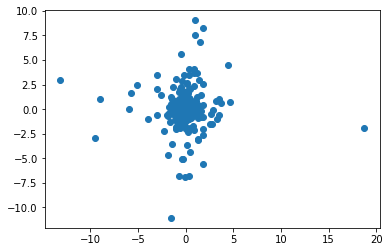

In [ ]:
#plot da recuperação dos sinais

Y1 = y1[0,:].reshape(-1).tolist()
Y2 = y1[1,:].reshape(-1).tolist()


plt.scatter(Y1, Y2)
plt.show()


In [ ]:
# ver se o problema é a parte linear: deixar os pesos 1 - potencia 1 e o restante tudo zerado (como se não tivesse nenhuma potencia)

In [ ]:
y2 = mistura_nao_linear(z2, gx2, b)

  0%|          | 0/53996 [00:00<?, ?it/s]


loss_ICA = 4.074238192539484 

loss_ICA_sobi =  20.99999999999931 

loss_Ry =  29.336854020633655 

loss_sobi =  32.965761411372974 



  0%|          | 1/53996 [00:00<12:36:43,  1.19it/s]


loss_ICA = 4.123395925110721 

loss_ICA_sobi =  20.999999999998707 

loss_Ry =  30.33579803612609 

loss_sobi =  32.93572581159765 



  0%|          | 2/53996 [00:01<13:40:20,  1.10it/s]


loss_ICA = 4.1358178944819795 

loss_ICA_sobi =  20.99999999999848 

loss_Ry =  29.553139562242894 

loss_sobi =  32.95542824936338 



  0%|          | 3/53996 [00:02<14:23:13,  1.04it/s]


loss_ICA = 4.404389151485981 

loss_ICA_sobi =  20.99999999999818 

loss_Ry =  29.996806972087484 

loss_sobi =  33.130385475512085 



  0%|          | 4/53996 [00:03<14:40:41,  1.02it/s]


loss_ICA = 4.137871845802051 

loss_ICA_sobi =  20.999999999997886 

loss_Ry =  29.68725589371076 

loss_sobi =  32.96998165873132 



  0%|          | 5/53996 [00:04<14:12:47,  1.06it/s]


loss_ICA = 4.274399086121026 

loss_ICA_sobi =  20.999999999999375 

loss_Ry =  30.58112930405698 

loss_sobi =  33.114415700713366 



  0%|          | 6/53996 [00:05<13:39:12,  1.10it/s]


loss_ICA = 4.274374236419643 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  30.472335381154082 

loss_sobi =  33.11322272232595 



  0%|          | 7/53996 [00:06<13:37:08,  1.10it/s]


loss_ICA = 4.320316422844602 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  30.850618833130394 

loss_sobi =  33.10922655622986 



  0%|          | 8/53996 [00:07<13:29:25,  1.11it/s]


loss_ICA = 4.2704336510395375 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  31.015919606581136 

loss_sobi =  33.11830911570386 



  0%|          | 9/53996 [00:08<14:30:38,  1.03it/s]


loss_ICA = 4.336270751152423 

loss_ICA_sobi =  20.999999999999467 

loss_Ry =  30.614101426982337 

loss_sobi =  33.15938008440633 



  0%|          | 10/53996 [00:09<16:41:52,  1.11s/it]


loss_ICA = 4.502583023739604 

loss_ICA_sobi =  20.999999999999417 

loss_Ry =  30.196603194553383 

loss_sobi =  33.0520442152292 



  0%|          | 11/53996 [00:11<17:47:58,  1.19s/it]


loss_ICA = 4.557236665686116 

loss_ICA_sobi =  20.9999999999987 

loss_Ry =  29.48096801589323 

loss_sobi =  32.92957273299911 



  0%|          | 12/53996 [00:12<17:44:47,  1.18s/it]


loss_ICA = 4.587641851429137 

loss_ICA_sobi =  20.99999999999914 

loss_Ry =  30.400247361958012 

loss_sobi =  32.928857740168205 



  0%|          | 13/53996 [00:13<16:19:11,  1.09s/it]


loss_ICA = 5.133992704526911 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  30.126245707248266 

loss_sobi =  32.97464468741103 



  0%|          | 14/53996 [00:14<16:18:07,  1.09s/it]


loss_ICA = 5.103893667997953 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  30.196863229572934 

loss_sobi =  33.02349953181059 



  0%|          | 15/53996 [00:15<15:18:28,  1.02s/it]


loss_ICA = 4.840657915849592 

loss_ICA_sobi =  20.99999999999891 

loss_Ry =  28.748261113630782 

loss_sobi =  33.053050054718454 



  0%|          | 16/53996 [00:16<14:33:28,  1.03it/s]


loss_ICA = 4.832132008319881 

loss_ICA_sobi =  20.999999999998984 

loss_Ry =  29.526984317798377 

loss_sobi =  33.032848022002966 



  0%|          | 17/53996 [00:17<14:15:53,  1.05it/s]


loss_ICA = 4.46800595357616 

loss_ICA_sobi =  20.99999999999929 

loss_Ry =  28.97012647583982 

loss_sobi =  32.96307077337039 



  0%|          | 18/53996 [00:17<13:48:16,  1.09it/s]


loss_ICA = 4.51028131165163 

loss_ICA_sobi =  20.999999999998824 

loss_Ry =  29.412316725475605 

loss_sobi =  32.87952957792149 



  0%|          | 19/53996 [00:18<13:47:28,  1.09it/s]


loss_ICA = 4.484472446924217 

loss_ICA_sobi =  20.999999999999066 

loss_Ry =  28.6989731458034 

loss_sobi =  32.92077437231209 



  0%|          | 20/53996 [00:19<14:29:33,  1.03it/s]


loss_ICA = 4.475327889001559 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  28.67430905144247 

loss_sobi =  32.92746688413514 



  0%|          | 21/53996 [00:20<14:44:15,  1.02it/s]


loss_ICA = 4.443978644936713 

loss_ICA_sobi =  20.999999999998213 

loss_Ry =  28.7293938921013 

loss_sobi =  32.92336745732946 



  0%|          | 22/53996 [00:21<14:39:26,  1.02it/s]


loss_ICA = 4.398695281213762 

loss_ICA_sobi =  20.999999999998685 

loss_Ry =  28.891991446230193 

loss_sobi =  32.951626310148335 



  0%|          | 23/53996 [00:23<16:53:04,  1.13s/it]


loss_ICA = 4.394999297701986 

loss_ICA_sobi =  20.999999999999282 

loss_Ry =  28.977459204859912 

loss_sobi =  32.928509480417716 



  0%|          | 24/53996 [00:24<18:29:59,  1.23s/it]


loss_ICA = 4.410803208207165 

loss_ICA_sobi =  20.99999999999901 

loss_Ry =  28.93584145560298 

loss_sobi =  32.94594595577438 



  0%|          | 25/53996 [00:26<18:59:04,  1.27s/it]


loss_ICA = 4.403200494660428 

loss_ICA_sobi =  20.999999999998966 

loss_Ry =  28.978973236404215 

loss_sobi =  32.94307142706164 



  0%|          | 26/53996 [00:27<17:11:30,  1.15s/it]


loss_ICA = 4.54339143649881 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  29.833199911475305 

loss_sobi =  33.080061347330115 



  0%|          | 27/53996 [00:28<16:32:13,  1.10s/it]


loss_ICA = 4.308165106997517 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  29.667075280870158 

loss_sobi =  33.00227614125467 



  0%|          | 28/53996 [00:28<15:55:30,  1.06s/it]


loss_ICA = 4.242299530057565 

loss_ICA_sobi =  20.999999999998956 

loss_Ry =  30.648967947039758 

loss_sobi =  33.040173139260396 



  0%|          | 29/53996 [00:29<15:24:51,  1.03s/it]


loss_ICA = 4.144350340163683 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  28.819777124870633 

loss_sobi =  32.90628317061241 



  0%|          | 30/53996 [00:30<14:51:13,  1.01it/s]


loss_ICA = 4.604187099294011 

loss_ICA_sobi =  20.999999999996884 

loss_Ry =  29.668864056838903 

loss_sobi =  32.90046547504577 



  0%|          | 31/53996 [00:31<14:23:26,  1.04it/s]


loss_ICA = 4.6541013729722245 

loss_ICA_sobi =  20.99999999999873 

loss_Ry =  29.80202844407933 

loss_sobi =  32.952213160923726 



  0%|          | 32/53996 [00:32<14:35:17,  1.03it/s]


loss_ICA = 4.6496957466167945 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  29.758871109175956 

loss_sobi =  33.005096585562534 



  0%|          | 33/53996 [00:33<15:01:14,  1.00s/it]


loss_ICA = 5.103921346402295 

loss_ICA_sobi =  20.999999999999492 

loss_Ry =  28.363895126275843 

loss_sobi =  33.07634645175903 



  0%|          | 34/53996 [00:34<15:22:52,  1.03s/it]


loss_ICA = 4.667345775014306 

loss_ICA_sobi =  20.999999999999183 

loss_Ry =  28.910350650699492 

loss_sobi =  33.02989909933805 



  0%|          | 35/53996 [00:35<14:55:57,  1.00it/s]


loss_ICA = 4.659039632619599 

loss_ICA_sobi =  20.999999999999453 

loss_Ry =  29.275752553738844 

loss_sobi =  33.029904991178356 



  0%|          | 36/53996 [00:36<15:36:00,  1.04s/it]


loss_ICA = 4.607052432992932 

loss_ICA_sobi =  20.999999999999464 

loss_Ry =  29.269459886348933 

loss_sobi =  33.037016108220946 



  0%|          | 37/53996 [00:38<17:14:57,  1.15s/it]


loss_ICA = 4.671834858843255 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  29.46554373465818 

loss_sobi =  32.94086127695681 



  0%|          | 38/53996 [00:39<18:05:45,  1.21s/it]


loss_ICA = 4.681689477842223 

loss_ICA_sobi =  20.999999999999247 

loss_Ry =  29.568934631982312 

loss_sobi =  32.90543721974405 



  0%|          | 39/53996 [00:40<17:31:16,  1.17s/it]


loss_ICA = 4.684675478863371 

loss_ICA_sobi =  20.999999999999478 

loss_Ry =  29.330826355944865 

loss_sobi =  32.95074550869839 



  0%|          | 40/53996 [00:41<16:47:35,  1.12s/it]


loss_ICA = 4.700427518767654 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  29.130371933373127 

loss_sobi =  32.95806897669641 



  0%|          | 41/53996 [00:42<16:04:15,  1.07s/it]


loss_ICA = 4.994767471873143 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  29.898356608881684 

loss_sobi =  32.87580598601747 



  0%|          | 42/53996 [00:43<15:26:49,  1.03s/it]


loss_ICA = 4.919854956729942 

loss_ICA_sobi =  20.99999999999905 

loss_Ry =  29.90304291463008 

loss_sobi =  32.89051243989099 



  0%|          | 43/53996 [00:44<15:02:17,  1.00s/it]


loss_ICA = 4.201076951302316 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  30.657767253013986 

loss_sobi =  32.782907233251095 



  0%|          | 44/53996 [00:45<15:59:06,  1.07s/it]


loss_ICA = 4.2097919833129716 

loss_ICA_sobi =  20.999999999998828 

loss_Ry =  30.663887895324944 

loss_sobi =  32.78247512111524 



  0%|          | 45/53996 [00:46<15:14:40,  1.02s/it]


loss_ICA = 4.235087991092726 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  30.59095308614942 

loss_sobi =  32.77972602959949 



  0%|          | 46/53996 [00:47<15:05:30,  1.01s/it]


loss_ICA = 4.33887872079254 

loss_ICA_sobi =  20.99999999999848 

loss_Ry =  30.108181820778544 

loss_sobi =  32.79137282687248 



  0%|          | 47/53996 [00:48<14:06:45,  1.06it/s]


loss_ICA = 4.379894117262099 

loss_ICA_sobi =  20.99999999999915 

loss_Ry =  30.036180674191655 

loss_sobi =  32.79708862390617 



  0%|          | 48/53996 [00:49<14:25:45,  1.04it/s]


loss_ICA = 4.384388509051034 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  30.015861857451984 

loss_sobi =  32.797604173114536 



  0%|          | 49/53996 [00:50<14:09:54,  1.06it/s]


loss_ICA = 4.378531296057206 

loss_ICA_sobi =  20.999999999999392 

loss_Ry =  30.034314684219957 

loss_sobi =  32.796265085191926 



  0%|          | 50/53996 [00:51<16:33:34,  1.11s/it]


loss_ICA = 4.377201369236964 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  30.04426667970881 

loss_sobi =  32.795383198431345 



  0%|          | 51/53996 [00:53<18:03:12,  1.20s/it]


loss_ICA = 4.440638007006989 

loss_ICA_sobi =  20.999999999999236 

loss_Ry =  29.869470893445595 

loss_sobi =  32.80577828175454 



  0%|          | 52/53996 [00:54<18:22:21,  1.23s/it]


loss_ICA = 4.959930367635444 

loss_ICA_sobi =  20.99999999999925 

loss_Ry =  30.14209611423041 

loss_sobi =  32.583928949971586 



  0%|          | 53/53996 [00:55<17:45:39,  1.19s/it]


loss_ICA = 4.355363010353459 

loss_ICA_sobi =  20.999999999998888 

loss_Ry =  30.751932339412313 

loss_sobi =  32.79126008123881 



  0%|          | 54/53996 [00:56<16:46:57,  1.12s/it]


loss_ICA = 4.7969073658212125 

loss_ICA_sobi =  20.99999999999884 

loss_Ry =  29.824420767985433 

loss_sobi =  32.89538104061931 



  0%|          | 55/53996 [00:57<15:44:08,  1.05s/it]


loss_ICA = 5.0095126860603685 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  29.959049606527547 

loss_sobi =  32.3243723996692 



  0%|          | 56/53996 [00:58<15:35:32,  1.04s/it]


loss_ICA = 5.129928449802762 

loss_ICA_sobi =  20.99999999999957 

loss_Ry =  30.17165472138784 

loss_sobi =  32.444697209554754 



  0%|          | 57/53996 [00:59<15:23:27,  1.03s/it]


loss_ICA = 5.0941811088116395 

loss_ICA_sobi =  20.999999999999062 

loss_Ry =  29.297810008534125 

loss_sobi =  33.05148305752808 



  0%|          | 58/53996 [01:00<14:51:14,  1.01it/s]


loss_ICA = 4.347256918442483 

loss_ICA_sobi =  20.999999999998835 

loss_Ry =  29.309794987063935 

loss_sobi =  33.023829327258476 



  0%|          | 59/53996 [01:01<14:13:44,  1.05it/s]


loss_ICA = 4.822532990582253 

loss_ICA_sobi =  20.99999999999643 

loss_Ry =  29.424099889501207 

loss_sobi =  33.01358645521963 



  0%|          | 60/53996 [01:02<13:58:33,  1.07it/s]


loss_ICA = 4.2438579017705145 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  30.034148202083884 

loss_sobi =  32.82768721392652 



  0%|          | 61/53996 [01:03<13:32:31,  1.11it/s]


loss_ICA = 4.094453890029543 

loss_ICA_sobi =  20.999999999999346 

loss_Ry =  29.0788222315145 

loss_sobi =  32.83389240934994 



  0%|          | 62/53996 [01:04<13:58:28,  1.07it/s]


loss_ICA = 4.1417259084450695 

loss_ICA_sobi =  20.99999999999939 

loss_Ry =  29.470389174641795 

loss_sobi =  32.82289516583609 



  0%|          | 63/53996 [01:05<14:47:42,  1.01it/s]


loss_ICA = 4.124513863300008 

loss_ICA_sobi =  20.99999999999787 

loss_Ry =  29.439332816353247 

loss_sobi =  32.8781882115068 



  0%|          | 64/53996 [01:06<16:48:25,  1.12s/it]


loss_ICA = 4.097401223268781 

loss_ICA_sobi =  20.999999999998742 

loss_Ry =  29.22448575186803 

loss_sobi =  32.87067506128338 



  0%|          | 65/53996 [01:07<17:37:21,  1.18s/it]


loss_ICA = 4.100495415227247 

loss_ICA_sobi =  20.999999999999343 

loss_Ry =  29.47209306350144 

loss_sobi =  32.85676233193915 



  0%|          | 66/53996 [01:09<17:35:30,  1.17s/it]


loss_ICA = 4.10110639683449 

loss_ICA_sobi =  20.9999999999989 

loss_Ry =  29.46082763924349 

loss_sobi =  32.85618970960338 



  0%|          | 67/53996 [01:10<16:35:21,  1.11s/it]


loss_ICA = 4.101071406261934 

loss_ICA_sobi =  20.999999999999435 

loss_Ry =  29.454064822780154 

loss_sobi =  32.85627062005537 



  0%|          | 68/53996 [01:10<15:48:50,  1.06s/it]


loss_ICA = 4.10097723240092 

loss_ICA_sobi =  20.999999999999293 

loss_Ry =  29.45180982748919 

loss_sobi =  32.856339426709184 



  0%|          | 69/53996 [01:12<15:48:41,  1.06s/it]


loss_ICA = 4.100930748932759 

loss_ICA_sobi =  20.99999999999881 

loss_Ry =  29.450819599782818 

loss_sobi =  32.856397967549356 



  0%|          | 70/53996 [01:12<15:27:04,  1.03s/it]


loss_ICA = 4.10116933635714 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  29.452864233793314 

loss_sobi =  32.856401269110464 



  0%|          | 71/53996 [01:13<14:49:12,  1.01it/s]


loss_ICA = 4.102386729161811 

loss_ICA_sobi =  20.999999999999197 

loss_Ry =  29.46349673623385 

loss_sobi =  32.855947851976524 



  0%|          | 72/53996 [01:14<14:51:28,  1.01it/s]


loss_ICA = 4.1025029419673675 

loss_ICA_sobi =  20.99999999999923 

loss_Ry =  29.427847737226905 

loss_sobi =  32.85882652163521 



  0%|          | 73/53996 [01:15<15:20:32,  1.02s/it]


loss_ICA = 4.1026279296289605 

loss_ICA_sobi =  20.999999999999105 

loss_Ry =  29.467123712813553 

loss_sobi =  32.85411408401955 



  0%|          | 74/53996 [01:17<15:54:28,  1.06s/it]


loss_ICA = 4.101762681584207 

loss_ICA_sobi =  20.99999999999926 

loss_Ry =  29.45417520834244 

loss_sobi =  32.85374813538464 



  0%|          | 75/53996 [01:18<15:16:12,  1.02s/it]


loss_ICA = 4.101398391116385 

loss_ICA_sobi =  20.99999999999912 

loss_Ry =  29.44530708357602 

loss_sobi =  32.85348305759965 



  0%|          | 76/53996 [01:19<14:59:26,  1.00s/it]


loss_ICA = 4.101129844499704 

loss_ICA_sobi =  20.9999999999988 

loss_Ry =  29.43916461090113 

loss_sobi =  32.852900673249074 



  0%|          | 77/53996 [01:20<17:02:08,  1.14s/it]


loss_ICA = 4.099060101114302 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  29.396203041556696 

loss_sobi =  32.8496890949947 



  0%|          | 78/53996 [01:21<18:11:53,  1.22s/it]


loss_ICA = 4.123189714758716 

loss_ICA_sobi =  20.99999999999864 

loss_Ry =  30.26217030918784 

loss_sobi =  32.84499222662741 



  0%|          | 79/53996 [01:23<17:57:05,  1.20s/it]


loss_ICA = 4.240920521110365 

loss_ICA_sobi =  20.999999999999414 

loss_Ry =  28.099329561241756 

loss_sobi =  32.69416950156663 



  0%|          | 80/53996 [01:23<16:28:50,  1.10s/it]


loss_ICA = 4.167846326203954 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  28.72033600916507 

loss_sobi =  32.65983753004598 



  0%|          | 81/53996 [01:24<15:45:33,  1.05s/it]


loss_ICA = 4.155508124935688 

loss_ICA_sobi =  20.999999999999662 

loss_Ry =  28.85860447758401 

loss_sobi =  32.66055117713127 



  0%|          | 82/53996 [01:25<14:57:44,  1.00it/s]


loss_ICA = 4.1588016656674345 

loss_ICA_sobi =  20.999999999999073 

loss_Ry =  28.696204618714596 

loss_sobi =  32.665319580398155 



  0%|          | 83/53996 [01:26<14:37:24,  1.02it/s]


loss_ICA = 4.159972007484205 

loss_ICA_sobi =  20.99999999999897 

loss_Ry =  28.681222387470953 

loss_sobi =  32.665902519743796 



  0%|          | 84/53996 [01:27<14:51:16,  1.01it/s]


loss_ICA = 4.162219840603656 

loss_ICA_sobi =  20.99999999999811 

loss_Ry =  28.682930029965902 

loss_sobi =  32.6664959774277 



  0%|          | 85/53996 [01:28<14:22:01,  1.04it/s]


loss_ICA = 4.192636284932297 

loss_ICA_sobi =  20.999999999998657 

loss_Ry =  28.748428841423816 

loss_sobi =  32.685262407938026 



  0%|          | 86/53996 [01:29<14:11:24,  1.06it/s]


loss_ICA = 4.190297424208367 

loss_ICA_sobi =  20.9999999999992 

loss_Ry =  28.733205678095675 

loss_sobi =  32.68391333411668 



  0%|          | 87/53996 [01:30<13:52:40,  1.08it/s]


loss_ICA = 4.190525767701422 

loss_ICA_sobi =  20.999999999998725 

loss_Ry =  28.737575024549773 

loss_sobi =  32.68412452479326 



  0%|          | 88/53996 [01:31<14:05:23,  1.06it/s]


loss_ICA = 4.190144670775403 

loss_ICA_sobi =  20.999999999999442 

loss_Ry =  28.740811872919704 

loss_sobi =  32.683951102142416 



  0%|          | 89/53996 [01:32<14:21:43,  1.04it/s]


loss_ICA = 4.190171678267008 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  28.741498069138625 

loss_sobi =  32.683970967377185 



  0%|          | 90/53996 [01:33<15:06:22,  1.01s/it]


loss_ICA = 4.190161082295733 

loss_ICA_sobi =  20.99999999999798 

loss_Ry =  28.74020490545081 

loss_sobi =  32.683916544702036 



  0%|          | 91/53996 [01:34<16:43:58,  1.12s/it]


loss_ICA = 4.190166460718579 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  28.740290838857554 

loss_sobi =  32.683926869319826 



  0%|          | 92/53996 [01:36<17:56:38,  1.20s/it]


loss_ICA = 4.190180352861809 

loss_ICA_sobi =  20.999999999999403 

loss_Ry =  28.741542609609006 

loss_sobi =  32.68397429933305 



  0%|          | 93/53996 [01:37<18:25:59,  1.23s/it]


loss_ICA = 4.189776157995677 

loss_ICA_sobi =  20.99999999999935 

loss_Ry =  28.742557641389904 

loss_sobi =  32.68362089128553 



  0%|          | 94/53996 [01:38<17:55:24,  1.20s/it]


loss_ICA = 4.126388435181516 

loss_ICA_sobi =  20.999999999998032 

loss_Ry =  28.4793460151378 

loss_sobi =  32.74318398536858 



  0%|          | 95/53996 [01:39<16:27:05,  1.10s/it]


loss_ICA = 4.126619481358109 

loss_ICA_sobi =  20.999999999999496 

loss_Ry =  29.011280285868953 

loss_sobi =  32.74420779769651 



  0%|          | 96/53996 [01:40<16:04:08,  1.07s/it]


loss_ICA = 4.146613999344005 

loss_ICA_sobi =  20.999999999998217 

loss_Ry =  28.364847606293644 

loss_sobi =  32.70767925796503 



  0%|          | 97/53996 [01:41<15:31:40,  1.04s/it]


loss_ICA = 4.140051412445077 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  28.45547380737814 

loss_sobi =  32.70703187589216 



  0%|          | 98/53996 [01:42<15:17:51,  1.02s/it]


loss_ICA = 4.156831631494589 

loss_ICA_sobi =  20.999999999998092 

loss_Ry =  28.319517627916284 

loss_sobi =  32.70509936945413 



  0%|          | 99/53996 [01:43<15:07:28,  1.01s/it]


loss_ICA = 4.151325132728198 

loss_ICA_sobi =  20.999999999998728 

loss_Ry =  28.339095952241514 

loss_sobi =  32.70521172875055 



  0%|          | 100/53996 [01:44<14:17:34,  1.05it/s]


loss_ICA = 4.14618013283852 

loss_ICA_sobi =  20.999999999999204 

loss_Ry =  28.163853301924448 

loss_sobi =  32.71016313184375 



  0%|          | 101/53996 [01:45<14:02:43,  1.07it/s]


loss_ICA = 4.118331286999716 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  28.511500337437546 

loss_sobi =  32.729759668529184 



  0%|          | 102/53996 [01:46<13:54:45,  1.08it/s]


loss_ICA = 4.032418022754973 

loss_ICA_sobi =  20.999999999999 

loss_Ry =  29.02040513498556 

loss_sobi =  32.72856668545602 



  0%|          | 103/53996 [01:47<14:08:19,  1.06it/s]


loss_ICA = 4.1276922720076605 

loss_ICA_sobi =  20.999999999999297 

loss_Ry =  29.08640343348027 

loss_sobi =  32.673986149047 



  0%|          | 104/53996 [01:48<16:14:03,  1.08s/it]


loss_ICA = 4.1177142283902874 

loss_ICA_sobi =  20.99999999999882 

loss_Ry =  28.98503815895814 

loss_sobi =  32.73785463732561 



  0%|          | 105/53996 [01:49<17:31:35,  1.17s/it]


loss_ICA = 4.1141559830861 

loss_ICA_sobi =  20.999999999997748 

loss_Ry =  29.0407501832804 

loss_sobi =  32.74355517213996 



  0%|          | 106/53996 [01:51<17:52:46,  1.19s/it]


loss_ICA = 4.1137310118340995 

loss_ICA_sobi =  20.99999999999837 

loss_Ry =  29.046780005016682 

loss_sobi =  32.74180646937928 



  0%|          | 107/53996 [01:52<16:48:10,  1.12s/it]


loss_ICA = 4.113693915669094 

loss_ICA_sobi =  20.99999999999843 

loss_Ry =  29.04796292417336 

loss_sobi =  32.741228803919334 



  0%|          | 108/53996 [01:52<15:49:29,  1.06s/it]


loss_ICA = 4.113621141661028 

loss_ICA_sobi =  20.99999999999893 

loss_Ry =  29.05078483303672 

loss_sobi =  32.74060951214406 



  0%|          | 109/53996 [01:53<14:49:49,  1.01it/s]


loss_ICA = 4.113492927571343 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  29.05431549532885 

loss_sobi =  32.73920921271498 



  0%|          | 110/53996 [01:54<14:17:06,  1.05it/s]


loss_ICA = 4.113418429427616 

loss_ICA_sobi =  20.999999999998675 

loss_Ry =  29.053891878417332 

loss_sobi =  32.73935534718701 



  0%|          | 111/53996 [01:55<14:04:44,  1.06it/s]


loss_ICA = 4.113419061252467 

loss_ICA_sobi =  20.999999999999336 

loss_Ry =  29.053186610454784 

loss_sobi =  32.73944593839945 



  0%|          | 112/53996 [01:56<14:17:50,  1.05it/s]


loss_ICA = 4.113683429362656 

loss_ICA_sobi =  20.999999999999318 

loss_Ry =  29.052419741873358 

loss_sobi =  32.73926594241459 



  0%|          | 113/53996 [01:57<13:41:07,  1.09it/s]


loss_ICA = 4.1139068499486005 

loss_ICA_sobi =  20.999999999998582 

loss_Ry =  29.05402037534182 

loss_sobi =  32.739111227845896 



  0%|          | 114/53996 [01:58<14:25:46,  1.04it/s]


loss_ICA = 4.1138031236451 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  29.056641070496116 

loss_sobi =  32.73850305586966 



  0%|          | 115/53996 [01:59<14:04:45,  1.06it/s]


loss_ICA = 4.109122285320508 

loss_ICA_sobi =  20.999999999999222 

loss_Ry =  29.0356917909933 

loss_sobi =  32.73653169992152 



  0%|          | 116/53996 [02:00<13:58:12,  1.07it/s]


loss_ICA = 4.115821172645676 

loss_ICA_sobi =  20.99999999999813 

loss_Ry =  29.04870192172873 

loss_sobi =  32.74182944924927 



  0%|          | 117/53996 [02:01<14:03:02,  1.07it/s]


loss_ICA = 4.1295341616771655 

loss_ICA_sobi =  20.99999999999845 

loss_Ry =  28.978136095985935 

loss_sobi =  32.75049032944875 



  0%|          | 118/53996 [02:02<16:19:40,  1.09s/it]


loss_ICA = 4.177943068386012 

loss_ICA_sobi =  20.999999999998344 

loss_Ry =  28.733918153785822 

loss_sobi =  32.793070570347155 



  0%|          | 119/53996 [02:04<17:52:17,  1.19s/it]


loss_ICA = 4.212948803246965 

loss_ICA_sobi =  20.999999999998632 

loss_Ry =  28.64548484125413 

loss_sobi =  32.81007259871043 



  0%|          | 120/53996 [02:05<18:15:00,  1.22s/it]


loss_ICA = 4.229913922969615 

loss_ICA_sobi =  20.999999999998025 

loss_Ry =  28.83981621712784 

loss_sobi =  32.800810278800405 



  0%|          | 121/53996 [02:06<16:35:20,  1.11s/it]


loss_ICA = 4.240068114279147 

loss_ICA_sobi =  20.99999999999924 

loss_Ry =  28.17631832982743 

loss_sobi =  32.78317675146906 



  0%|          | 122/53996 [02:07<15:26:08,  1.03s/it]


loss_ICA = 4.298260128923145 

loss_ICA_sobi =  20.999999999999076 

loss_Ry =  28.258179908349444 

loss_sobi =  32.76795322700102 



  0%|          | 123/53996 [02:07<14:57:14,  1.00it/s]


loss_ICA = 4.100720192452744 

loss_ICA_sobi =  20.99999999999696 

loss_Ry =  29.949407521410606 

loss_sobi =  32.86352505991556 



  0%|          | 124/53996 [02:08<14:20:45,  1.04it/s]


loss_ICA = 4.098046512587514 

loss_ICA_sobi =  20.99999999999911 

loss_Ry =  29.96434096742196 

loss_sobi =  32.864762563972306 



  0%|          | 125/53996 [02:09<14:02:34,  1.07it/s]


loss_ICA = 4.107515944861447 

loss_ICA_sobi =  20.999999999994458 

loss_Ry =  29.903617117709327 

loss_sobi =  32.857758041850396 



  0%|          | 126/53996 [02:10<14:39:54,  1.02it/s]


loss_ICA = 4.137075003536509 

loss_ICA_sobi =  20.999999999999584 

loss_Ry =  30.444840923403405 

loss_sobi =  32.63870526844798 



  0%|          | 127/53996 [02:11<14:12:45,  1.05it/s]


loss_ICA = 4.263289392506746 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  30.817495880473246 

loss_sobi =  32.799358837685325 



  0%|          | 128/53996 [02:12<14:16:56,  1.05it/s]


loss_ICA = 4.2406103996600635 

loss_ICA_sobi =  20.999999999998977 

loss_Ry =  29.78694125525314 

loss_sobi =  32.83828326995206 



  0%|          | 129/53996 [02:13<15:06:28,  1.01s/it]


loss_ICA = 4.233210368246052 

loss_ICA_sobi =  20.999999999999424 

loss_Ry =  30.60290532248098 

loss_sobi =  32.82337739512333 



  0%|          | 130/53996 [02:14<15:26:09,  1.03s/it]


loss_ICA = 4.234277674804494 

loss_ICA_sobi =  20.999999999999215 

loss_Ry =  30.671248125778032 

loss_sobi =  32.81980291877116 



  0%|          | 131/53996 [02:16<16:32:57,  1.11s/it]


loss_ICA = 4.234345858113382 

loss_ICA_sobi =  20.999999999997733 

loss_Ry =  30.671400048168778 

loss_sobi =  32.8194948838631 



  0%|          | 132/53996 [02:17<17:55:11,  1.20s/it]


loss_ICA = 4.234437916469577 

loss_ICA_sobi =  20.99999999999774 

loss_Ry =  30.671663762972976 

loss_sobi =  32.81949891013838 



  0%|          | 133/53996 [02:18<18:49:11,  1.26s/it]


loss_ICA = 4.234342599969688 

loss_ICA_sobi =  20.999999999999208 

loss_Ry =  30.67096357442137 

loss_sobi =  32.81949229490317 



  0%|          | 134/53996 [02:19<17:22:34,  1.16s/it]


loss_ICA = 4.2338479109985645 

loss_ICA_sobi =  20.999999999998625 

loss_Ry =  30.668158728204673 

loss_sobi =  32.819368238089346 



  0%|          | 135/53996 [02:20<17:01:18,  1.14s/it]


loss_ICA = 4.233811330717414 

loss_ICA_sobi =  20.99999999999916 

loss_Ry =  30.66838341224159 

loss_sobi =  32.81936321250478 



  0%|          | 136/53996 [02:21<15:56:34,  1.07s/it]


loss_ICA = 4.233900519188143 

loss_ICA_sobi =  20.99999999999863 

loss_Ry =  30.66888898827034 

loss_sobi =  32.81936278529717 



  0%|          | 137/53996 [02:22<15:35:28,  1.04s/it]


loss_ICA = 4.2338893190280515 

loss_ICA_sobi =  20.999999999999385 

loss_Ry =  30.667828862547953 

loss_sobi =  32.81931256412339 



  0%|          | 138/53996 [02:23<15:35:01,  1.04s/it]


loss_ICA = 4.233481535219369 

loss_ICA_sobi =  20.99999999999882 

loss_Ry =  30.660004642769774 

loss_sobi =  32.819064293899395 



  0%|          | 139/53996 [02:24<14:49:13,  1.01it/s]


loss_ICA = 4.231936666849636 

loss_ICA_sobi =  20.999999999998362 

loss_Ry =  30.657480122346524 

loss_sobi =  32.8197602649617 



  0%|          | 140/53996 [02:25<14:27:37,  1.03it/s]


loss_ICA = 4.228263306375588 

loss_ICA_sobi =  20.999999999999314 

loss_Ry =  30.64872628884673 

loss_sobi =  32.82209891962637 



  0%|          | 141/53996 [02:26<14:50:22,  1.01it/s]


loss_ICA = 4.22800381700749 

loss_ICA_sobi =  20.999999999998423 

loss_Ry =  30.6496539971836 

loss_sobi =  32.82252435020574 



  0%|          | 142/53996 [02:27<15:29:32,  1.04s/it]


loss_ICA = 4.226935949287844 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  30.639563904250437 

loss_sobi =  32.823144957411714 



  0%|          | 143/53996 [02:28<15:03:48,  1.01s/it]


loss_ICA = 4.225177086936567 

loss_ICA_sobi =  20.999999999998643 

loss_Ry =  30.62829166779391 

loss_sobi =  32.82408969816187 



  0%|          | 144/53996 [02:29<15:19:10,  1.02s/it]


loss_ICA = 4.225204962213176 

loss_ICA_sobi =  20.99999999999889 

loss_Ry =  30.628195734112126 

loss_sobi =  32.82415839750788 



  0%|          | 145/53996 [02:31<17:29:03,  1.17s/it]


loss_ICA = 4.225833027545109 

loss_ICA_sobi =  20.999999999998103 

loss_Ry =  30.632461428837903 

loss_sobi =  32.82387534449286 



  0%|          | 146/53996 [02:32<18:11:41,  1.22s/it]


loss_ICA = 4.226350858771525 

loss_ICA_sobi =  20.99999999999899 

loss_Ry =  30.63618108061098 

loss_sobi =  32.823617491348784 



  0%|          | 147/53996 [02:33<17:36:24,  1.18s/it]


loss_ICA = 4.226963786002319 

loss_ICA_sobi =  20.999999999998614 

loss_Ry =  30.63926011455871 

loss_sobi =  32.82331311381815 



  0%|          | 148/53996 [02:34<16:35:59,  1.11s/it]


loss_ICA = 4.228030952689608 

loss_ICA_sobi =  20.99999999999922 

loss_Ry =  30.64921355681799 

loss_sobi =  32.822778540287345 



  0%|          | 149/53996 [02:35<15:34:10,  1.04s/it]


loss_ICA = 4.227383902254141 

loss_ICA_sobi =  20.99999999999781 

loss_Ry =  30.64231664262395 

loss_sobi =  32.8230484549676 



  0%|          | 150/53996 [02:36<15:21:04,  1.03s/it]


loss_ICA = 4.225080940688397 

loss_ICA_sobi =  20.999999999999382 

loss_Ry =  30.62842752616018 

loss_sobi =  32.824194720895726 



  0%|          | 151/53996 [02:37<14:31:03,  1.03it/s]


loss_ICA = 4.226248190378559 

loss_ICA_sobi =  20.999999999998714 

loss_Ry =  30.638399518716803 

loss_sobi =  32.82359856606987 



  0%|          | 152/53996 [02:38<14:28:49,  1.03it/s]


loss_ICA = 4.215626302395892 

loss_ICA_sobi =  20.999999999999137 

loss_Ry =  30.65752576131785 

loss_sobi =  32.85307524579597 



  0%|          | 153/53996 [02:39<14:26:49,  1.04it/s]


loss_ICA = 4.229089373324557 

loss_ICA_sobi =  20.99999999999908 

loss_Ry =  30.992237362644104 

loss_sobi =  32.78561573275644 



  0%|          | 154/53996 [02:40<15:15:39,  1.02s/it]


loss_ICA = 4.185741155788524 

loss_ICA_sobi =  20.999999999999055 

loss_Ry =  30.108440407016012 

loss_sobi =  32.79837802886859 



  0%|          | 155/53996 [02:42<17:21:39,  1.16s/it]


loss_ICA = 4.233993515128388 

loss_ICA_sobi =  20.999999999998614 

loss_Ry =  29.779555400510674 

loss_sobi =  32.84574309032916 



  0%|          | 156/53996 [02:43<18:15:48,  1.22s/it]


loss_ICA = 4.224832377345125 

loss_ICA_sobi =  20.999999999999396 

loss_Ry =  30.059006755388193 

loss_sobi =  32.8497237249555 



  0%|          | 157/53996 [02:44<19:41:07,  1.32s/it]


loss_ICA = 4.224964769919017 

loss_ICA_sobi =  20.999999999998554 

loss_Ry =  29.984687801043215 

loss_sobi =  32.84762113534836 



  0%|          | 158/53996 [02:46<19:55:18,  1.33s/it]


loss_ICA = 4.225380773510853 

loss_ICA_sobi =  20.99999999999887 

loss_Ry =  29.91724092871356 

loss_sobi =  32.84723146375614 



  0%|          | 159/53996 [02:47<19:48:44,  1.32s/it]


loss_ICA = 4.225600133558846 

loss_ICA_sobi =  20.999999999998145 

loss_Ry =  29.977361720676893 

loss_sobi =  32.84710002617834 



  0%|          | 160/53996 [02:48<18:23:26,  1.23s/it]


loss_ICA = 4.225656199546128 

loss_ICA_sobi =  20.999999999998742 

loss_Ry =  30.010896171083786 

loss_sobi =  32.84707380035208 



  0%|          | 161/53996 [02:49<17:44:44,  1.19s/it]


loss_ICA = 4.22566985863422 

loss_ICA_sobi =  20.999999999999368 

loss_Ry =  30.018968792911366 

loss_sobi =  32.84706684203946 



  0%|          | 162/53996 [02:50<17:09:25,  1.15s/it]


loss_ICA = 4.225672114020805 

loss_ICA_sobi =  20.999999999997353 

loss_Ry =  30.01958348695618 

loss_sobi =  32.84706742318589 



  0%|          | 163/53996 [02:51<16:02:45,  1.07s/it]


loss_ICA = 4.225621420255829 

loss_ICA_sobi =  20.99999999999909 

loss_Ry =  29.982917733265268 

loss_sobi =  32.84711840268834 



  0%|          | 164/53996 [02:52<15:22:35,  1.03s/it]


loss_ICA = 4.225127818020503 

loss_ICA_sobi =  20.99999999999863 

loss_Ry =  29.943612647739727 

loss_sobi =  32.84734985230793 



  0%|          | 165/53996 [02:53<14:40:14,  1.02it/s]


loss_ICA = 4.222309760356529 

loss_ICA_sobi =  20.99999999999855 

loss_Ry =  29.973723219342155 

loss_sobi =  32.84731079322782 



  0%|          | 166/53996 [02:54<14:40:27,  1.02it/s]


loss_ICA = 4.2225175485969455 

loss_ICA_sobi =  20.999999999999226 

loss_Ry =  29.933617012795878 

loss_sobi =  32.85111299758769 



  0%|          | 167/53996 [02:55<14:37:53,  1.02it/s]


loss_ICA = 4.278519868110024 

loss_ICA_sobi =  20.999999999999126 

loss_Ry =  29.675019620831595 

loss_sobi =  32.88163201561892 



  0%|          | 168/53996 [02:56<14:03:36,  1.06it/s]


loss_ICA = 4.402442792396283 

loss_ICA_sobi =  20.999999999998575 

loss_Ry =  29.72369378587809 

loss_sobi =  32.89866682928591 



  0%|          | 169/53996 [02:57<14:10:42,  1.05it/s]


loss_ICA = 4.410329346892905 

loss_ICA_sobi =  20.999999999999325 

loss_Ry =  29.708161699824142 

loss_sobi =  32.900448362493556 



  0%|          | 170/53996 [02:58<15:13:54,  1.02s/it]


loss_ICA = 4.407317843057196 

loss_ICA_sobi =  20.999999999998884 

loss_Ry =  29.720653656836525 

loss_sobi =  32.899640425492606 



  0%|          | 171/53996 [02:59<17:06:18,  1.14s/it]


loss_ICA = 4.407219992902629 

loss_ICA_sobi =  20.9999999999994 

loss_Ry =  29.729577502092297 

loss_sobi =  32.899509631005316 



  0%|          | 172/53996 [03:01<18:02:10,  1.21s/it]


loss_ICA = 4.407246412882801 

loss_ICA_sobi =  20.999999999999112 

loss_Ry =  29.737959361026917 

loss_sobi =  32.899591245795605 



  0%|          | 173/53996 [03:02<18:31:11,  1.24s/it]


loss_ICA = 4.407383061689675 

loss_ICA_sobi =  20.99999999999917 

loss_Ry =  29.761045340819454 

loss_sobi =  32.89990425569055 



  0%|          | 174/53996 [03:03<17:57:39,  1.20s/it]


loss_ICA = 4.406938311425408 

loss_ICA_sobi =  20.999999999999144 

loss_Ry =  29.796116621001833 

loss_sobi =  32.90027738429468 



  0%|          | 175/53996 [03:04<16:30:47,  1.10s/it]


loss_ICA = 4.40656111687591 

loss_ICA_sobi =  20.999999999998987 

loss_Ry =  29.79932504028548 

loss_sobi =  32.90036089305939 



  0%|          | 176/53996 [03:05<16:15:29,  1.09s/it]


loss_ICA = 4.4064752121049775 

loss_ICA_sobi =  20.999999999999186 

loss_Ry =  29.78763122738944 

loss_sobi =  32.90027790646578 



  0%|          | 177/53996 [03:06<15:11:58,  1.02s/it]


loss_ICA = 4.406533410090848 

loss_ICA_sobi =  20.999999999998725 

loss_Ry =  29.829858450008835 

loss_sobi =  32.90056463430554 



  0%|          | 178/53996 [03:07<16:00:31,  1.07s/it]


loss_ICA = 4.384766078928301 

loss_ICA_sobi =  20.999999999998284 

loss_Ry =  30.264598873078107 

loss_sobi =  32.90885098966144 



  0%|          | 179/53996 [03:08<15:10:00,  1.01s/it]


loss_ICA = 4.1716910900439 

loss_ICA_sobi =  20.999999999998227 

loss_Ry =  29.626778099120468 

loss_sobi =  32.807094490765415 



  0%|          | 180/53996 [03:09<14:15:15,  1.05it/s]


loss_ICA = 4.185982830863534 

loss_ICA_sobi =  20.999999999999012 

loss_Ry =  29.905888568899044 

loss_sobi =  32.79853979955573 



  0%|          | 181/53996 [03:10<13:32:45,  1.10it/s]


loss_ICA = 4.358615120793386 

loss_ICA_sobi =  20.999999999999407 

loss_Ry =  29.978350958134463 

loss_sobi =  32.89719781141904 



  0%|          | 182/53996 [03:10<13:17:14,  1.13it/s]


loss_ICA = 4.166271328604903 

loss_ICA_sobi =  20.999999999999513 

loss_Ry =  29.698592744969506 

loss_sobi =  32.76712569099272 



  0%|          | 183/53996 [03:11<13:13:03,  1.13it/s]


loss_ICA = 4.206220561955483 

loss_ICA_sobi =  20.999999999998906 

loss_Ry =  30.075695854128746 

loss_sobi =  32.78880151184683 



  0%|          | 184/53996 [03:13<15:14:09,  1.02s/it]


loss_ICA = 4.323343388056777 

loss_ICA_sobi =  20.999999999998668 

loss_Ry =  29.833225339197632 

loss_sobi =  32.81725236948804 



  0%|          | 185/53996 [03:14<17:09:26,  1.15s/it]


loss_ICA = 4.3098726486451095 

loss_ICA_sobi =  20.999999999998614 

loss_Ry =  29.784822951112663 

loss_sobi =  32.81493115926597 



  0%|          | 186/53996 [03:15<17:54:07,  1.20s/it]


loss_ICA = 4.309552352488337 

loss_ICA_sobi =  20.999999999998405 

loss_Ry =  29.784315575478708 

loss_sobi =  32.81487731191318 



  0%|          | 187/53996 [03:16<16:57:03,  1.13s/it]


loss_ICA = 4.309548267499007 

loss_ICA_sobi =  20.99999999999791 

loss_Ry =  29.784989753222128 

loss_sobi =  32.81488121857071 



  0%|          | 188/53996 [03:17<15:50:55,  1.06s/it]


loss_ICA = 4.309544909494328 

loss_ICA_sobi =  20.999999999998842 

loss_Ry =  29.785184983891412 

loss_sobi =  32.81488061561591 



  0%|          | 189/53996 [03:18<15:34:47,  1.04s/it]


loss_ICA = 4.309555663334823 

loss_ICA_sobi =  20.999999999997655 

loss_Ry =  29.78519882807102 

loss_sobi =  32.814887651207655 



  0%|          | 190/53996 [03:19<15:09:07,  1.01s/it]


loss_ICA = 4.309727528964666 

loss_ICA_sobi =  20.99999999999869 

loss_Ry =  29.78204452760977 

loss_sobi =  32.81496790113518 



  0%|          | 190/53996 [03:20<15:44:07,  1.05s/it]


KeyboardInterrupt: ignored

#Testando a função com as classes separadas por cada janela

In [ ]:
b = 4
aux = left_hand
#aux = retira_valores(dataset_list_normalized)

#x1 = dataset_list_normalized[0].T
x1 = aux[0]
#print(x1.shape)
#print(type(x1))

c1 = constantes_iniciais(x1,b,1)
# COMO A PRINCIPIO AS CONSTANTES SAO IGUAIS A 1, GX = CSI NESSE MOMENTO
gx1 = potencias(x1,b)
gx1_2 = normaliza_StandardScaler(gx1)
#print(type(gx1_2))
z1 = soma_potencias(gx1_2,c1)
print(gx1_2.shape)
#print(z1)
print(z1.shape)
#print(type(z1))

#dados de 1 usuario de 1 base de dados de treino de eeg
c2 = constantes_iniciais(normalized[0],b,1)
gx2 = potencias(normalized[0],b)
z2 = soma_potencias(gx2,c2)
print(gx2.shape)
print(z2.shape)
